## Package and Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive' ,  force_remount=True)


Mounted at /content/gdrive


In [ ]:
# @title imports
!pip show folium
!pip install --upgrade folium
!pip install cartopy
# Import necessary libraries
import folium  # Used for creating interactive maps
import ast     # Provides facilities to process trees of the Python abstract syntax grammar
import traceback  # Used for printing or retrieving a stack trace of an exception
from math import radians, cos, sqrt, sin, atan2
from geopy.distance import geodesic
import colorsys
####new

import colorsys
import folium
import pandas as pd
import matplotlib.pyplot as plt
import ast
import folium

import ast
import folium
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import pandas as pd
import scipy.signal
import scipy.stats
import re
import xarray as xr
import os
import pickle
# import dill  # Optional, if you're using dill instead of pickle


Name: folium
Version: 0.19.5
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: branca, jinja2, numpy, requests, xyzservices
Required-by: datascience, geemap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 109.2 MB/s eta 0:00:00


In [ ]:
# @title save/load
def save_data_to_path(data, file_name, file_type='.json', save_path='default_path', create_folder=None, skip_existing_files=False):
    """
    Saves data to a file based on the provided file type, path, and name, with an option to skip if file exists.

    Parameters:
    - data: Data to be saved (DataFrame, dictionary, or string).
    - file_name (str): The name of the file (excluding extension).
    - file_type (str): The type of the file to be saved ('.csv', '.json', '.txt'). Default is '.json'.
    - save_path (str): The directory path where the file will be saved. Default is 'default_path'.
    - create_folder (str): Optional folder name to create in the save path for storing the file.
    - skip_existing_files (bool): If True, skips saving the file if it already exists. Default is False.

    Returns:
    - bool: True if the data was successfully saved, False otherwise.
    """

    # Append current date to the file name
    current_date = datetime.datetime.now().strftime("%d_%m_%Y")

    # Create folder in save_path if requested
    if create_folder is not None:
        if create_folder == 'date':
            folder_name = current_date
        else:
            folder_name = create_folder
        # Creating the new save path within the specified folder
        save_path = os.path.join(save_path, folder_name)
        if not os.path.exists(save_path):
            os.makedirs(save_path)

    file_full_name = f"{file_name}_{current_date}{file_type}"
    file_full_path = os.path.join(save_path, file_full_name)

    # Check if file exists and handle according to skip_existing_files flag
    if os.path.exists(file_full_path):
        if skip_existing_files:
            print(f"Skipping existing file: {file_full_name}")
            return False
        else:
            # Add zeros to the file name until a unique name is found
            count = 1
            while os.path.exists(file_full_path):
                file_full_name = f"{file_name}_{current_date}_{'0' * count}{file_type}"
                file_full_path = os.path.join(save_path, file_full_name)
                count += 1
            print(f"File already exists, saving with a new name: {file_full_name}")

    # Handling different file types
    try:
        if file_type == '.csv':
            data.to_csv(file_full_path, index=False)
            print(f"CSV file saved at: {file_full_path}")

        elif file_type == '.json':
            if isinstance(data, dict):
                with open(file_full_path, 'w') as json_file:
                    json.dump(data, json_file)
                print(f"JSON file saved at: {file_full_path}")
            else:
                print("Data is not a dictionary. JSON file not saved.")
                return False

        elif file_type == '.txt':
            if isinstance(data, str):
                with open(file_full_path, 'w') as txt_file:
                    txt_file.write(data)
                print(f"TXT file saved at: {file_full_path}")
            else:
                print("Data is not a string. TXT file not saved.")
                return False

        elif file_type == '.pkl':
            # Save any pickle-able object
            with open(file_full_path, 'wb') as pkl_file:
                pickle.dump(data, pkl_file)
            print(f"Pickle file saved at: {file_full_path}")

        else:
            print("Invalid file type specified. File not saved.")
            return False

        return True
    except Exception as e:
        print(f"An error occurred: {e}")
        return False

In [ ]:
# @title  general helper funcs

import datetime

def print_dict_structure(d, indent=0):
    """
    Recursively prints the structure of a nested dictionary.

    Parameters:
    - d (dict): The dictionary to inspect.
    - indent (int): Current indentation level (used internally for recursion).

    ```
    """
    if not isinstance(d, dict):
        print(" " * indent + str(type(d).__name__))
        return

    for key in d:
        print(" " * indent + str(key))
        if isinstance(d[key], dict):  # Recurse if value is a dict
            print_dict_structure(d[key], indent + 2)

def save_data_to_path(data, file_name, file_type='.json', save_path='default_path', create_folder=None, skip_existing_files=False):
    """
    Saves data to a file based on the provided file type, path, and name, with an option to skip if file exists.

    Parameters:
    - data: Data to be saved (DataFrame, dictionary, or string).
    - file_name (str): The name of the file (excluding extension).
    - file_type (str): The type of the file to be saved ('.csv', '.json', '.txt'). Default is '.json'.
    - save_path (str): The directory path where the file will be saved. Default is 'default_path'.
    - create_folder (str): Optional folder name to create in the save path for storing the file.
    - skip_existing_files (bool): If True, skips saving the file if it already exists. Default is False.

    Returns:
    - bool: True if the data was successfully saved, False otherwise.
    """

    # Append current date to the file name
    current_date = datetime.datetime.now().strftime("%d_%m_%Y")

    # Create folder in save_path if requested
    if create_folder is not None:
        if create_folder == 'date':
            folder_name = current_date
        else:
            folder_name = create_folder
        # Creating the new save path within the specified folder
        save_path = os.path.join(save_path, folder_name)
        if not os.path.exists(save_path):
            os.makedirs(save_path)

    file_full_name = f"{file_name}_{current_date}{file_type}"
    file_full_path = os.path.join(save_path, file_full_name)

    # Check if file exists and handle according to skip_existing_files flag
    if os.path.exists(file_full_path):
        if skip_existing_files:
            print(f"Skipping existing file: {file_full_name}")
            return False
        else:
            # Add zeros to the file name until a unique name is found
            count = 1
            while os.path.exists(file_full_path):
                file_full_name = f"{file_name}_{current_date}_{'0' * count}{file_type}"
                file_full_path = os.path.join(save_path, file_full_name)
                count += 1
            print(f"File already exists, saving with a new name: {file_full_name}")

    # Handling different file types
    try:
        if file_type == '.csv':
            data.to_csv(file_full_path, index=False)
            print(f"CSV file saved at: {file_full_path}")

        elif file_type == '.json':
            if isinstance(data, dict):
                with open(file_full_path, 'w') as json_file:
                    json.dump(data, json_file)
                print(f"JSON file saved at: {file_full_path}")
            else:
                print("Data is not a dictionary. JSON file not saved.")
                return False

        elif file_type == '.txt':
            if isinstance(data, str):
                with open(file_full_path, 'w') as txt_file:
                    txt_file.write(data)
                print(f"TXT file saved at: {file_full_path}")
            else:
                print("Data is not a string. TXT file not saved.")
                return False

        elif file_type == '.pkl':
            # Save any pickle-able object
            with open(file_full_path, 'wb') as pkl_file:
                pickle.dump(data, pkl_file)
            print(f"Pickle file saved at: {file_full_path}")

        else:
            print("Invalid file type specified. File not saved.")
            return False

        return True
    except Exception as e:
        print(f"An error occurred: {e}")
        return False


def create_subdict(keys, original_dict):
    # Initialize an empty dictionary for the subdictionary
    subdict = {}
    # Loop through each key in the specified list of keys
    for key in keys:
        # Check if the key exists in the original dictionary
        if key in original_dict:
            # If the key exists, add it to the subdictionary
            subdict[key] = original_dict[key]
    return subdict

def convert_unix_to_est(df):
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Step 1: Convert Unix timestamp index to datetime in UTC
    df_copy.index = pd.to_datetime(df_copy.index, unit='s').tz_localize('UTC')

    # Step 2: Convert to Eastern Time
    df_copy.index = df_copy.index.tz_convert('America/New_York')

    # Step 3: Remove the timezone information (make it naive)
    df_copy.index = df_copy.index.tz_localize(None)

    return df_copy


# Function to plot the specified statistic
def plt_stat(stat_df, stat='median'):
    """
    Plot the specified statistic for each column in the DataFrame.

    Parameters:
    - stat_df: DataFrame with statistics data (output of take_stat function).
    - stat: The statistic to plot ('mean', 'median', 'std', 'max', 'min', 'non_zero').

    Returns:
    - None
    """
    if stat not in stat_df.columns:
        raise ValueError(f"Invalid statistic '{stat}'. Choose from: {', '.join(stat_df.columns)}")

    stat_values = stat_df[stat]
    plt.figure(figsize=(10, 6))
    plt.scatter(stat_values.index, stat_values.values)
    plt.xlabel('Stations')
    plt.ylabel(f'{stat} Value')
    plt.title(f'Scatter Plot of {stat} for Each Station')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()




def apply_func_to_dict (input_dict, func, *args, **kwargs):
    """
    Apply a given function to each value in a dictionary while keeping the same keys.

    Parameters:
    - input_dict (dict): A dictionary where the keys remain unchanged.
    - func (callable): A function to apply to each value in the dictionary.
    - *args: Additional positional arguments to pass to the function.
    - **kwargs: Additional keyword arguments to pass to the function.

    Returns:
    - dict: A new dictionary with the same keys, and the function applied to each value.
    """
    output_dict = {}
    for key, value in input_dict.items():
        output_dict[key] = func(value, *args, **kwargs)
    return output_dict


# # @title cluster-regions
# import pandas as pd
# from pyproj import Transformer
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import numpy as np

# def cluster_stations_kmeans_latlon_display(
#     stations_df,
#     in_crs="EPSG:4326",  # typical lat/lon
#     out_crs="EPSG:2263", # projected system for NYC area
#     n_clusters=5
# ):
#     """
#     Clusters stations by their projected (x, y) coordinates,
#     but returns and plots cluster assignments in lat/lon space.

#     :param stations_df: DataFrame with columns ['Station ID', 'Latitude', 'Longitude']
#     :param in_crs:      The CRS of the input lat/lon (usually EPSG:4326).
#     :param out_crs:     The local projected CRS (e.g., EPSG:2263 for NYC).
#     :param n_clusters:  How many K-Means clusters to create.

#     :return: The stations_df with a 'cluster' column plus the lat/lon coords
#              of cluster centroids.
#     """

#     # 1) Forward transform: lat/lon -> x/y (for clustering)
#     forward_transformer = Transformer.from_crs(in_crs, out_crs, always_xy=True)

#     x_coords, y_coords = [], []
#     for _, row in stations_df.iterrows():
#         lat = float(row['Latitude'])
#         lon = float(row['Longitude'])
#         # With always_xy=True, pass (lon, lat)
#         x, y = forward_transformer.transform(lon, lat)
#         x_coords.append(x)
#         y_coords.append(y)

#     # Store projected coordinates in the DataFrame
#     stations_df['x_proj'] = x_coords
#     stations_df['y_proj'] = y_coords

#     # 2) K-Means in x–y space
#     coords = stations_df[['x_proj', 'y_proj']].values
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     stations_df['cluster'] = kmeans.fit_predict(coords)

#     # 3) Transform cluster centroids back to lat/lon
#     centers_xy = kmeans.cluster_centers_  # shape: (n_clusters, 2) -> (x, y)

#     # Inverse transform: x/y -> lon/lat
#     inverse_transformer = Transformer.from_crs(out_crs, in_crs, always_xy=True)
#     centroid_lons, centroid_lats = inverse_transformer.transform(
#         centers_xy[:, 0],  # x array
#         centers_xy[:, 1]   # y array
#     )

#     # Combine into a convenient DataFrame or array
#     cluster_centroids = pd.DataFrame({
#         'centroid_lon': centroid_lons,
#         'centroid_lat': centroid_lats
#     })

#     return stations_df, cluster_centroids


# def assign_sublinks_to_clusters(
#     sublinks_df,
#     kmeans_model,
#     in_crs="EPSG:4326",
#     out_crs="EPSG:2263",
#     n=100
# ):
#     """
#     Assign each sublink to the nearest K-Means cluster centroid based on the
#     sublink path (site_0 -> site_1). The cluster centers come from a fitted
#     KMeans model in the same projected x–y coordinates.

#     Parameters
#     ----------
#     sublinks_df : pd.DataFrame
#         A DataFrame with columns such as:
#          [
#            'cml_id',
#            'sublink_id',
#            'site_0_lat',
#            'site_0_lon',
#            'site_1_lat',
#            'site_1_lon',
#            ...
#          ]
#         Each row describes one sublink.

#     kmeans_model : KMeans
#         A scikit-learn KMeans model that was previously fitted
#         on x–y data (e.g., weather station coordinates projected to EPSG:2263).

#     in_crs : str
#         The CRS of the sublink lat/lon. Defaults to EPSG:4326 (WGS84 lat/lon).

#     out_crs : str
#         The projected CRS in which kmeans_model.cluster_centers_ are defined.
#         Defaults to EPSG:2263 for NYC region.

#     n : int
#         Number of equally spaced sample points along each sublink path.

#     Returns
#     -------
#     assigned_df : pd.DataFrame
#         Columns: [ 'cml_id', 'sublink_id', 'assigned_cluster' ].
#         The sublink is assigned to the cluster with the smallest average distance.
#     """
#     # Get the cluster centroids in the same x–y space
#     cluster_centers_xy = kmeans_model.cluster_centers_  # shape: (n_clusters, 2)

#     # Create a transformer to project lat/lon -> x/y
#     transformer = Transformer.from_crs(in_crs, out_crs, always_xy=True)

#     # We'll accumulate results in a list of dicts
#     assignments = []

#     for _, row in sublinks_df.iterrows():
#         cml_id = row['cml_id']
#         sublink_id = row['sublink_id']

#         # Extract the sublink start/end lat/lon
#         lat0 = float(row['site_0_lat'])
#         lon0 = float(row['site_0_lon'])
#         lat1 = float(row['site_1_lat'])
#         lon1 = float(row['site_1_lon'])

#         # Sample n intermediate points along the sublink
#         lat_points = np.linspace(lat0, lat1, n)
#         lon_points = np.linspace(lon0, lon1, n)

#         # Project these lat/lon points to x–y
#         x_list, y_list = [], []
#         for lat_val, lon_val in zip(lat_points, lon_points):
#             # transform expects (lon, lat) when always_xy=True
#             x_val, y_val = transformer.transform(lon_val, lat_val)
#             x_list.append(x_val)
#             y_list.append(y_val)

#         x_arr = np.array(x_list)
#         y_arr = np.array(y_list)

#         # Calculate average distance from this sublink path to each cluster center
#         avg_distances = []
#         for cx, cy in cluster_centers_xy:
#             dist_arr = np.sqrt((x_arr - cx)**2 + (y_arr - cy)**2)  # Euclidean
#             avg_distances.append(dist_arr.mean())

#         # Assign to the cluster with the smallest avg distance
#         closest_cluster = int(np.argmin(avg_distances))

#         assignments.append({
#             'cml_id': cml_id,
#             'sublink_id': sublink_id,
#             'assigned_cluster': closest_cluster
#         })

#     # Convert to DataFrame
#     assigned_df = pd.DataFrame(assignments)
#     return assigned_df


In [ ]:
# @title read_functions: meta analysis
import json
import pickle
# import pickle_dill

def get_rows(df, key, col_key=['fromDeviceName', 'toDeviceName'], par='all', return_type='pd'):
    """
    Get the parameters of sites according to the site name.
    Args:
        df (pd.DataFrame): A DataFrame containing all the devices associated with a site.
        key (str): The name to search for in the DataFrame.
        col_key (list, optional): The column names in the DataFrame where the key is located. Defaults to ['fromDeviceName', 'toDeviceName'].
        par (str, optional): The parameter to retrieve from the site's row. Use 'all' to return the entire row. Defaults to 'all'.
        return_type (str, optional): The type of the return value. Use 'lst' for a list and 'pd' for a DataFrame. Defaults to 'pd'.

    Returns:
        pd.DataFrame or list: Depending on return_type, either a DataFrame or list containing either entire rows or the specified parameter if found.
    """
    matching_indices = []

    for index, row in df.iterrows():
        for col in col_key:
            if str(key) == str(row[col]):
                matching_indices.append(index)
                break  # If a match is found, no need to check other columns

    # Use the indices to create a DataFrame of matching rows
    matching_df = df.loc[matching_indices]

    if par != 'all':
        matching_df = matching_df[[par]]

    # Return the result based on the specified return type
    if return_type == 'lst':
        return matching_df.to_dict('records') if par == 'all' else matching_df[par].tolist()
    elif return_type == 'pd':
        return matching_df
    else:
        raise ValueError("return_type must be 'lst' or 'pd'")




def filter_df_cols(df, filter_values, column_names=['toDeviceName', 'fromDeviceName'], str_key=0):
    """
    Filters the dataframe based on specific values in multiple given columns.

    Parameters:
    - df (pandas.DataFrame): The original dataframe to filter.
    - filter_values (list): A list of values to filter the dataframe by.
    - column_names (list, default=['toDeviceName', 'fromDeviceName']): The columns in the dataframe to filter by.
    - str_key (bool, default=0): If set to 1, it converts the column's values to string before filtering.

    Returns:
    - pandas.DataFrame: A filtered dataframe.
    """
    matching_rows = []  # List to hold rows that match the criteria

    for index, row in df.iterrows():
        for column_name in column_names:
            column_value = row[column_name]
            if str_key:
                column_value = str(column_value)
            if column_value in filter_values:
                matching_rows.append(row)
                break  # Stop checking other columns for this row since we already found a match

    # Create a DataFrame from the list of matching rows
    df_part = pd.DataFrame(matching_rows, columns=df.columns)
    return df_part

def reverse_dict(input_dict: dict) -> dict:
    """
    Reverses the key-value pairs in a dictionary.

    Parameters:
    - input_dict (dict): The dictionary to reverse.

    Returns:
    - dict: A new dictionary with values as keys and keys as values.
    """
    return {value: key for key, value in input_dict.items()}

def filter_dict(input_list: list, data_dict: dict, by: str = 'keys') -> dict:
    """
    Filters a dictionary based on either keys or values.

    Parameters:
    - input_list (list): List of keys or values to filter by.
    - data_dict (dict): The dictionary to filter.
    - by (str): Filter mode - either 'keys' or 'values'. Default is 'keys'.

    Returns:
    - filtered_dict (dict): A sub-dictionary filtered by the input_list based on the 'by' mode.
    """

    if by == 'keys':
        # Filter the dictionary by checking if the key is in the input_list
        filtered_dict = {key: value for key, value in data_dict.items() if key in input_list}

    elif by == 'values':
        # Filter the dictionary by checking if the value is in the input_list
        filtered_dict = {key: value for key, value in data_dict.items() if value in input_list}

    else:
        raise ValueError("The 'by' parameter must be either 'keys' or 'values'.")

    return filtered_dict



def filter_dict_by_columns(data_dict: dict, df_cols: list) -> dict:
    """
    Filters the values in the dictionary based on whether they exist in the provided DataFrame columns.

    Parameters:
    - data_dict (dict): Dictionary with 'pws' and 'links' keys containing lists of station and link IDs.
    - df_cols (list): List of column names from the DataFrame.

    Returns:
    - filtered_dict (dict): Dictionary with filtered 'pws' and 'links' lists based on existence in df_cols.
    """

    # Filter the 'pws' values that exist in df_cols
    filtered_pws = [pws for pws in data_dict['pws'] if pws in df_cols]

    # Filter the 'links' values that exist in df_cols
    filtered_links = [link for link in data_dict['links'] if link in df_cols]

    # Return the filtered dictionary
    return {'pws': filtered_pws, 'links': filtered_links}

# Function to replace column names
def rename_columns(df: pd.DataFrame, links_dict: dict, str_key = 'sublink_') -> pd.DataFrame:
    """
    Renames the columns of the DataFrame based on the provided dictionary.

    Parameters:
    - df (pd.DataFrame): The DataFrame with columns to rename.
    - links_dict (dict): A dictionary where the key is the sublink number (int) and the value is the new column name (str).

    Returns:
    - pd.DataFrame: The DataFrame with renamed columns.
    """

    # Create a mapping from the 'sublink' column names to their corresponding 'nycmesh' names
    col_rename_map = {f'{str_key}{key}': value for key, value in links_dict.items() if f'{str_key}{key}' in df.columns}

    # Rename the DataFrame columns using the mapping
    df_renamed = df.rename(columns=col_rename_map)

    return df_renamed

# @title create_df

def create_df(df, filter_values, column_names=['Sublink'], str_key=0, new_df=None, missing_values=0):
    """
    Filters the dataframe based on specific values in given columns.

    Parameters:
    - df (pandas.DataFrame): The original dataframe to filter.
    - filter_values (list): A list of values to filter the dataframe by.
    - column_names (list, default=['fromDeviceName', 'toDeviceName']): The columns in the dataframe to filter by.
    - str_key (bool, default=0): If set to 1, it converts the column's value to string before filtering.
    - new_df (bool, default=None): If set to None, starts with a new dataframe. If not None, appends to the given dataframe.
    - missing_values (int, default=0): If set to 1, prints the filter values that are not found in the dataframe.

    Returns:
    - pandas.DataFrame: A filtered dataframe.
    """
    if new_df is None:
        df_part = pd.DataFrame(columns=df.columns)
    else:
        df_part = new_df.copy()

    rows_to_add = []
    not_found_values = []  # Track filter values not found in the dataframe

    for filter_value in filter_values:
        found = False  # Flag to check if the filter value is found in any row
        for index, row in df.iterrows():
            for col in column_names:
                column_value = row[col]
                if str_key:
                    column_value = str(column_value)
                if column_value == filter_value:
                    rows_to_add.append(row)
                    found = True
                    break  # If one of the columns matches, no need to check the other columns
            if found:
                break  # Exit outer loop as well if the value is found

        if not found and missing_values == 1:
            not_found_values.append(filter_value)  # Add to list if not found

    if rows_to_add:
        df_part = pd.concat([df_part, pd.DataFrame(rows_to_add)], ignore_index=True)

    # If missing_values is set to 1, print the missing filter values
    if missing_values == 1 and not_found_values:
        print("The following filter values were not found in the dataframe:")
        print(not_found_values)

    return df_part


In [ ]:
# @title reading gdrive


def read_file(file_path):
    """
    Reads a file based on its extension.

    Args:
        file_path (str): The path to the file to be read.

    Returns:
        Depending on the file extension:
            - pd.DataFrame for .csv and .xlsx files
            - dict for .json files
            - str or list of str for .txt files
            - None if the file extension is unsupported or an error occurs
    """
    try:
        if file_path.endswith('.csv'):
            # Avoid extra 'Unnamed' column by setting index_col to 0 (if that's the issue)
            return pd.read_csv(file_path, index_col=0)  # Assuming the first column is the index

        elif file_path.endswith('.json'):
            with open(file_path, 'r') as file:
                return json.load(file)
        elif file_path.endswith('.txt'):
            with open(file_path, 'r') as file:
                return file.read()  # or file.readlines() if you want a list of lines
        elif file_path.endswith('.pkl'):
            with open(file_path, 'rb') as file:  # Note the 'rb' mode here
                return pickle.load(file)
        elif file_path.endswith('.xlsx') or file_path.endswith('.xls'):
            # Reading Excel files (both .xlsx and .xls formats)
            return pd.read_excel(file_path, engine='openpyxl')  # 'openpyxl' is the recommended engine for .xlsx
        else:
            return None  # or raise an exception for unsupported file types
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None
def find_string_elems(key, input_lst):
    """
    Check if the key exists in the list of strings.
    :param key: The string to search for.
    :param input_lst: A list of strings to search in.
    :return: A list of strings that match the key.
    """
    return [elem for elem in input_lst if key.lower() in elem.lower()]



def find_files_in_gdrive(keys, file_type, data_path, input_dict=None , input_lst = []):
    """
    Traverse all folders in Google Drive and find all files that match the given keys and file type.
    :param keys: A list of key names to search for in file names.
    :param file_type: The file extension to look for (e.g., '.json').
    :param data_path: The root directory to search.
    :param input_dict: (Optional) A dictionary that may already contain some keys and their associated files.
    :return: A dict with keys corresponding to the input list and values containing paths to matching files.
    """
    # Initialize results dictionary and extract keys from input_dict if provided
    results = {}
    devices = set()  # To store device keys if input_dict is provided

    if input_dict is not None:
        devices = input_dict.keys()

    # Traverse the directories and look for files matching the keys
    for key in keys:

        if key in devices:
            print(f"Skipping {key} as it already exists in input_dict.")
            results[key] = input_dict[key]
            continue
        if find_string_elems(key, input_lst ) != []:
            print(f"Skipping {key} as it already exists in input_lst.")
            continue

        else:
            print(f"Reading device: {key}...")
            results[key] = []

        # Search for files in the specified directory
        for root, dirs, files in os.walk(data_path):
            for file in files:
                # Build the search pattern with case insensitivity
                if re.search(f".*{key}.*{file_type}$", file, re.IGNORECASE):
                    full_path = os.path.join(root, file)
                    results[key].append(full_path)

    # Return the final results
    return results



import os
import json
import pandas as pd
import pickle

def read_files_folder(path, file_type='.json', print_non_matching=False, read_contents=False, return_type='dict', json_to_df=False):
    """
    Reads all files in a folder based on their extension and returns a dictionary or other type of result.

    Args:
        path (str): The path to the folder containing the files.
        file_type (str, default='.json'): The file extension to look for (e.g., '.json').
        print_non_matching (bool, default=False): Whether to print files that do not match the specified extension.
        read_contents (bool, default=False): If True, reads the content of each file.
        return_type (str, default='dict'): Determines the return type. Options are 'dict', 'list', etc.
        json_to_df (bool, default=False): If True, converts JSON data into a pandas DataFrame.

    Returns:
        Depending on the return_type:
            - dict: keys as file names (without extension) and values as file contents
            - list: list of file contents if return_type is 'list'
            - pd.DataFrame: DataFrame if json_to_df is True
    """
    results = {}

    # Traverse all files in the directory
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(file_type):
                base_name = os.path.splitext(file)[0]  # Remove extension for the key

                full_path = os.path.join(root, file)

                # Read the file content based on the file type
                try:
                    if file_type == '.json':
                        with open(full_path, 'r') as f:
                            data = json.load(f)
                    elif file_type == '.csv':
                        data = pd.read_csv(full_path)
                    elif file_type == '.xlsx' or file_type == '.xls':
                        data = pd.read_excel(full_path, engine='openpyxl')
                    elif file_type == '.pkl':
                        with open(full_path, 'rb') as f:
                            data = pickle.load(f)
                    else:
                        data = None  # Unsupported file type

                    if read_contents:
                        results[base_name] = data  # Store content as value, base_name as key

                except Exception as e:
                    print(f"Error reading {full_path}: {e}")
                    if print_non_matching:
                        print(f"Non-matching file skipped: {file}")
                    continue

    if return_type == 'dict':
        return results
    elif return_type == 'list':
        return list(results.values())  # Return a list of file contents
    elif json_to_df:
        # Convert JSON content to DataFrame if requested
        return pd.DataFrame(list(results.values()))  # Convert values to a DataFrame
    else:
        return results


In [ ]:
# @title read helpers.py : map functions
!pip show folium
!pip install --upgrade folium

# Import necessary libraries
import folium  # Used for creating interactive maps
import ast     # Provides facilities to process trees of the Python abstract syntax grammar
import traceback  # Used for printing or retrieving a stack trace of an exception
from math import radians, cos, sqrt, sin, atan2
from geopy.distance import geodesic
import colorsys
####new

import colorsys
import folium
import pandas as pd
import matplotlib.pyplot as plt
import ast
import folium

import ast
import folium
# MAP Parameters
clr_hsv = 0.6


# Define the geographical boundaries of the contiguous United States
us_range = {
    'lat': (24.5, 49),  # Latitude range
    'long': (-125, -66.9)  # Longitude range
}

p_nyc = (40.758896, -73.985130)

# @title Color Map
# Mapping of color names to corresponding HSV hue values
color_hue_map = {
    'red': 0.0,
    'green': 0.33,
    'blue': 0.66,  # Default color
    'purple': 0.75,
    'yellow': 0.17,
    'cyan': 0.5,
    'orange': 0.08,
    'pink': 0.9
}




p_nyc = (40.758896, -73.985130)

# @title Color Map
# Mapping of color names to corresponding HSV hue values
color_hue_map = {
    'red': 0.0,
    'green': 0.33,
    'blue': 0.66,  # Default color
    'purple': 0.75,
    'yellow': 0.17,
    'cyan': 0.5,
    'orange': 0.08,
    'pink': 0.9
}

# Helper function to create a color gradient based on frequency
def create_frequency_based_gradient(frequencies, num_colors):
    """
    Create a color gradient based on frequency values within a fixed range (10-100).

    Args:
        frequencies (list): A list of frequency values to base the gradient on.
        num_colors (int): The number of colors to generate in the gradient.

    Returns:
        list: A list of hex color values representing the gradient.
    """
    # Fixed frequency range
    min_freq = 10
    max_freq = 100

    colors = []
    for freq in frequencies:
        # Normalize frequency to [0, 1] within the fixed range of 10 to 100
        normalized_freq = (freq - min_freq) / (max_freq - min_freq)
        normalized_freq = max(0, min(1, normalized_freq))  # Clip value to be in [0, 1]

        # Map frequency to hue (higher frequencies -> warmer colors)
        hue = 0.66 * (1 - normalized_freq)  # 0.66 represents blue, higher values shift towards warmer colors

        # Create RGB color based on hue, with full saturation and value
        r, g, b = colorsys.hsv_to_rgb(hue, 1.0, 1.0)

        # Convert RGB values to hexadecimal format
        hex_color = f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}"
        colors.append(hex_color)

    return colors

# Function to create a map mesh visualization
def create_map_mesh(df_links, df_rgs=[], m_map=None, add_links=True, create_bar=True, clr_line='frq', base_clr='blue', add_rgs=0):
    """
    Create a map mesh visualization.

    Args:
        df_links (pd.DataFrame): Dataframe containing link data (lines) to be added to the map.
        df_rgs (pd.DataFrame, optional): Dataframe containing point data (e.g., rain gauges) to be added to the map.
        m_map (folium.Map, optional): Existing folium map object. If None, a new map centered at 'p_nyc' is created.
        add_links (bool, optional): Whether to add lines (links) to the map. Defaults to True.
        create_bar (bool, optional): Whether to create a color bar/gradient. Defaults to True.
        clr_line (str, optional): The coloring mode for lines. Defaults to 'frq'.
        base_clr (optional): The base color for the color gradient. Defaults to 'blue'.
        add_rgs (int, optional): If 1, add points (e.g., rain gauges) from df_rgs to the map. Defaults to 0.

    Returns:
        folium.Map: A map object with the mesh visualization.
    """

    # If no map object is provided, create a new map centered at a predefined point (e.g., New York City coordinates)
    if m_map is None:
        p_nyc = [40.7128, -74.0060]  # Coordinates for NYC
        m_map = folium.Map(location=p_nyc, zoom_start=12)

    # If add_links is True, iterate through the dataframe and add lines to the map
    if add_links and not df_links.empty:
        for index, row in df_links.iterrows():
            try:
                # Add a line to the map for each link
                print(row)
                add_line_to_map(m_map, row, link_index=index, clr_line=clr_line)
            except Exception as e:
                # Print an error message if adding a line fails
                print('Failed to add link at index:', index)
                print(f"Error: {e}")
                break

    # If add_rgs is set to 1, iterate through the rain gauges dataframe and add points to the map
    if add_rgs and not df_rgs.empty:
        for idx, gauge_row in df_rgs.iterrows():
            try:
                add_point_to_map(m_map, row_gauge=gauge_row)  # Add each gauge as a point to the map
            except Exception as e:
                print('Failed to add point at index:', idx)
                print(f"Error: {e}")
                break

    # Return the map object with added features
    return m_map

# Function to create and display map based on the configuration
def create_and_display_map(cfg):
    """
    Creates and optionally displays a map object with links and rain gauges (RGs), based on the provided configuration.

    Args:
        cfg (dict): Configuration dictionary with options for adding links, rain gauges, base colors, etc.

    Returns:
        folium.Map: The map object with the requested features.
    """

    # Extract the configuration parameters
    links_df = cfg['links_data']
    rgs_df = cfg['rg_data']
    add_links = cfg['add_links']
    add_rgs = cfg['add_rgs']
    base_clr = cfg.get('base_color', 'blue')  # Default to 'blue' if no base_clr provided
    clr_line = cfg.get('color_line', 'frq')  # Frequency-based coloring

    # Check if we should color based on frequency or a base color
    if clr_line == 'frq':
        # Color based on frequency values in the dataset (assuming 'linkFrequency' is a column in links_df)
        frequencies = links_df['linkFrequency'].values  # Assuming frequency is stored in this column
        gradient = create_frequency_based_gradient(frequencies, 10)  # Generate gradient based on fixed frequency values
    else:
        # Process the base_clr: It can be a color name or a numeric hue
        if isinstance(base_clr, str):
            # Use color name to generate gradient (default to blue)
            base_clr_hue = color_hue_map.get(base_clr.lower(), 0.66)  # Set base_clr to hue (blue if not found)
            gradient = create_color_gradient(base_clr_hue, 10)
        elif isinstance(base_clr, (int, float)):
            # If base_clr is numeric, use it directly as the hue
            gradient = create_color_gradient(base_clr, 10)
        else:
            raise ValueError(f"Invalid value for base_color: {base_clr}. Expected a color name or float between 0 and 1.")

    # Create the map object based on the configuration
    map_object = create_map_mesh(df_links=links_df if add_links else pd.DataFrame(),
                                 df_rgs=rgs_df if add_rgs else pd.DataFrame(),
                                 add_links=add_links, add_rgs=add_rgs,
                                 base_clr=gradient, clr_line=clr_line)

    # Display the map if configured to do so
    if cfg['display_map']:
        display(map_object)

    return map_object




#### prev
def create_map(p_center=p_nyc):
    """
    Creates a folium map centered at the given point or New York City by default.

    Parameters:
    - p_center (tuple): A tuple containing latitude and longitude of the center point. Default is NYC.

    Returns:
    - folium.Map: A folium map centered at the given location.
    """
    latitude, longitude = p_center
    return folium.Map(location=[latitude, longitude], zoom_start=12)



def is_in_us(lat, lon , in_range = us_range ):
    """Check if a given point is within the contiguous U.S."""
    # Contiguous U.S. boundaries
    lat_min, lat_max = in_range['lat']
    lon_min, lon_max = in_range['long']
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        return True
    return False

def check_point(point):
    """Check if a point is in the area., and if not, swap lat and lon and check again."""
    lat, lon = point
    if is_in_us(lat, lon):
        return (lat, lon)
    elif is_in_us(lon, lat):  # Swap lat and lon
        return (lon, lat)
    else:
        print('Point not in US')
        return False

# Global variable for blue hue in HSV

def create_map_mesh(df_links, df_rgs=None, m_map=None, add_links=True, create_bar=True, clr_line='frq', base_clr=clr_hsv):
    """
    Create a map mesh visualization.
    Returns:
    Map: A map object with the mesh visualization.
    """
    # If no map object is provided, create a new map centered at a predefined point (p_nyc)
    if m_map is None:
        m_map = create_map(p_center=p_nyc)

    # If a base color is provided, create a color gradient and add it to the map
    if base_clr != 0:
        gradient = create_color_gradient(base_clr, 10)  # Create a gradient of 10 steps from the base color
        add_colormap_to_map(m_map, gradient, color_mode = clr_line)  # Add this gradient as a colormap to the map

    # If add_links is True, iterate through the dataframe and add lines to the map
    if add_links:
        for index, row in df_links.iterrows():  # Loop through each row in the dataframe
            try:
                # Add a line to the map for each link, with color determined by the gradient
                add_line_to_map(m_map, row, link_index=index, clr_range=(base_clr, gradient), clr_line=clr_line)
            except Exception as e:
                # Print an error message if adding a line fails
                print('fail in index.......', index)
                print(f"An error occurred: {e}")
                break
    # Return the map object with added features
    return m_map

def add_colormap_to_map(m, gradient, num_steps=20, base_clr=clr_hsv, color_mode='frq'):
    """
    Add a colormap to a Folium map object, either as a gradient or as a binary colormap.

    Parameters:
        m (folium.Map): The Folium map object.
        gradient (list): List of colors for the gradient.
        num_steps (int): The number of intensity levels to generate in the colormap for gradient mode.
        base_clr (float): Base hue for the color gradient (0-1) for gradient mode.
        color_mode (str): Type of colormap - 'gradient' or 'binary'.
    """

    if color_mode == 'frq':
        # Create a LinearColormap with the specified colors and set the scale from 0 to 100
        colormap = folium.LinearColormap(colors=gradient, vmin=0, vmax=100)
        colormap.caption = 'Frequency (GHz)'

    elif color_mode == 'dbl':
        # Binary mode: Only two colors, representing 0 and 1
        colormap = folium.LinearColormap(colors = [gradient[0],gradient[-1]], vmin=0, vmax=1)
        colormap.caption = 'Link / Double Link'

    # Add the colormap to the Folium map object
    colormap.add_to(m)
# @title



def is_in_region(lat, lon, region):
# Function to check if a point is in the region

    lat_range, long_range = region['lat'], region['long']
    return lat_range[0] <= lat <= lat_range[1] and long_range[0] <= lon <= long_range[1]

def check_point(point, region=us_range):
    """
    Check if a point is within a given region. If not, try swapping latitude and longitude.

    Parameters:
    - point (tuple): The point to check, given as (latitude, longitude).
    - region (dict): A dictionary defining the latitude and longitude range of the region.

    Returns:
    tuple or False: The point if it's valid and within the region, or False otherwise.
    """
    # Check if the point is a valid tuple with two elements
    if point is None or len(point) != 2:
        return False

    lat, lon = point


    # Check if the point's latitude and longitude are within the region's range
    if is_in_region(lat, lon, region):
        return (lat, lon)
    elif is_in_region(lon, lat, region):  # Swap lat and lon and check again
        print("Note: Latitude and longitude were swapped to fit the region." , (lat, lon) ,'to ' , (lon, lat))
        return (lon, lat)
    else:
        return False



def create_color_gradient(hue, num_colors=10):
    """
    Create a gradient of colors from light to less dark for a given hue,
    with higher values being less dark.

    Parameters:
    hue (float): Hue of the base color (0-1).
    num_colors (int): Number of colors to generate in the gradient.

    Returns:
    list: List of RGB colors in hexadecimal format.
    """
    colors = []
    for i in range(num_colors):
        # Adjust saturation and value for the gradient
        saturation = 0.5 + (i / (num_colors - 1) / 2)  # Increase saturation gradually

        # Decrease value/brightness gradually but not too much
        value = 0.4 + 0.6 * (1 - (i / (num_colors - 1)))  # Less reduction in value for higher i

        # Convert HSV to RGB
        r, g, b = colorsys.hsv_to_rgb(hue, saturation, value)

        # Convert RGB to Hex
        hex_color = "#{:02x}{:02x}{:02x}".format(int(r * 255), int(g * 255), int(b * 255))
        colors.append(hex_color)

    return colors


def display_color_bar(colors):
    """
    Display a bar of colors.

    Parameters:
    colors (list): List of colors in hexadecimal format.
    """
    fig, ax = plt.subplots(figsize=(10, 2))

    # Create a rectangle for each color
    for i, color in enumerate(colors):
        rect = patches.Rectangle((i, 0), 1, 1, linewidth=0, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Set limits and turn off axes
    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.axis('off')

    plt.show()

def get_color_from_value(value, max_value, gradient):
    """
    Get a specific color from a gradient based on a value.
    Parameters:
        value (float): The value to map to a color.
        max_value (float): The maximum value in the range of values.
        gradient (list): The list of colors in the gradient.

    Returns:
        str: The hexadecimal color.
    """
    # Normalize the value to the range of the gradient
    normalized_value = min(max(value / max_value, 0), 1)

    # Get the index of the color in the gradient
    index = int(normalized_value * (len(gradient) - 1))

    # Return the corresponding color
    return gradient[index]


# @title

def add_colormap_to_map(m, gradient, num_steps=20, base_clr=clr_hsv, color_mode='dbl'):
    """
    Add a colormap to a Folium map object, either as a gradient or as a binary colormap.

    Parameters:
        m (folium.Map): The Folium map object.
        gradient (list): List of colors for the gradient.
        num_steps (int): The number of intensity levels to generate in the colormap for gradient mode.
        base_clr (float): Base hue for the color gradient (0-1) for gradient mode.
        color_mode (str): Type of colormap - 'gradient' or 'binary'.
    """

    if color_mode == 'frq':
        # Create a LinearColormap with the specified colors and set the scale from 0 to 100
        colormap = folium.LinearColormap(colors=gradient, vmin=0, vmax=100)
        colormap.caption = 'Frequency (GHz)'

    elif color_mode == 'dbl':
        # Binary mode: Only two colors, representing 0 and 1
        colormap = folium.LinearColormap(colors = [gradient[0],gradient[-1]], vmin=0, vmax=1)
        colormap.caption = 'Link / Double Link'

    # Add the colormap to the Folium map object
    colormap.add_to(m)




def add_colormap_to_map(m, gradient, num_steps=20, base_clr=clr_hsv, color_mode='frq'):
    """
    Add a colormap to a Folium map object, either as a gradient or as a binary colormap.

    Parameters:
        m (folium.Map): The Folium map object.
        gradient (list): List of colors for the gradient.
        num_steps (int): The number of intensity levels to generate in the colormap for gradient mode.
        base_clr (float): Base hue for the color gradient (0-1) for gradient mode.
        color_mode (str): Type of colormap - 'gradient' or 'binary'.
    """

    if color_mode == 'frq':
        # Create a LinearColormap with the specified colors and set the scale from 0 to 100
        colormap = folium.LinearColormap(colors=gradient, vmin=0, vmax=100)
        colormap.caption = 'Frequency (GHz)'


    # Add the colormap to the Folium map object
    colormap.add_to(m)







def is_in_us(lat, lon , in_range = us_range ):
    """Check if a given point is within the contiguous U.S."""
    # Contiguous U.S. boundaries
    lat_min, lat_max = in_range['lat']
    lon_min, lon_max = in_range['long']
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        return True
    return False

def check_point(point):
    """Check if a point is in the area., and if not, swap lat and lon and check again."""
    lat, lon = point
    if is_in_us(lat, lon):
        return (lat, lon)
    elif is_in_us(lon, lat):  # Swap lat and lon
        return (lon, lat)
    else:
        return False

# Global variable for blue hue in HSV

def parse_location(location_str):
    """Parse a string representation of a location into a tuple."""
    try:
        return ast.literal_eval(location_str)
    except ValueError:
        return None

def add_marker(map_obj, location, popup_text, circle=False):
    """Add a marker to the map."""
    if circle:
        folium.CircleMarker(location, radius=4, color='black', popup=folium.Popup(popup_text, parse_html=True)).add_to(map_obj)
    else:
        folium.Marker(location, popup=folium.Popup(popup_text, parse_html=True)).add_to(map_obj)



def is_in_region(lat, lon, region):
# Function to check if a point is in the region

    lat_range, long_range = region['lat'], region['long']
    return lat_range[0] <= lat <= lat_range[1] and long_range[0] <= lon <= long_range[1]

def check_point(point, region=us_range):
    """
    Check if a point is within a given region. If not, try swapping latitude and longitude.

    Parameters:
    - point (tuple): The point to check, given as (latitude, longitude).
    - region (dict): A dictionary defining the latitude and longitude range of the region.

    Returns:
    tuple or False: The point if it's valid and within the region, or False otherwise.
    """
    # Check if the point is a valid tuple with two elements
    if point is None or len(point) != 2:
        return False

    lat, lon = point


    # Check if the point's latitude and longitude are within the region's range
    if is_in_region(lat, lon, region):
        return (lat, lon)
    elif is_in_region(lon, lat, region):  # Swap lat and lon and check again
        print("Note: Latitude and longitude were swapped to fit the region." , (lat, lon) ,'to ' , (lon, lat))
        return (lon, lat)
    else:
        return False



def add_point_to_map(m, row_gauge, use_icon=True, icon_type='cloud', shape_type=None, clr='red', marker_size=12):
    """
    Add a weather station to a folium map with either Font Awesome icons or adjustable shape markers (triangle, square, circle).

    Args:
        m (folium.Map): The existing map to which the point will be added.
        row_gauge (dict): A dictionary containing 'Latitude', 'Longitude', and 'Station Id' for the station.
        use_icon (bool, optional): Whether to use an icon (True) or a shape (False). Defaults to True (use icon).
        icon_type (str, optional): The type of icon to use ('cloud', 'info'). Defaults to 'cloud'.
        shape_type (str, optional): The type of shape to use ('triangle', 'square', 'circle'). Defaults to None.
        clr (str, optional): The color of the marker or shape. Defaults to 'red'.
        marker_size (int, optional): The size of the marker or shape. Defaults to 10.

    Returns:
        None: The function modifies the existing map in place.
    """

    lat_gauge, long_gauge = row_gauge['Latitude'], row_gauge['Longitude']
    station_id = row_gauge['Station Id']

    # Tooltip for the station name
    tooltip = folium.Tooltip(f'<span style="font-size: 14px;">{station_id}</span>')

    # Predefined Font Awesome icons
    icons = {
        'cloud': 'cloud',          # Cloud icon
        'info': 'info-sign',       # Information icon
    }

    # Option 1: If use_icon is True, use the Font Awesome icons
    if use_icon:
        folium.Marker(
            [lat_gauge, long_gauge],
            tooltip=tooltip,
            icon=folium.Icon(color=clr, icon=icons.get(icon_type, 'info-sign'), prefix='fa')  # Font Awesome
        ).add_to(m)

    # Option 2: If use_icon is False, use adjustable shapes (triangle, square, circle)
    elif shape_type in ['triangle', 'square', 'circle']:
        if shape_type == 'circle':
            # Add a filled circle
            folium.CircleMarker(
                location=[lat_gauge, long_gauge],
                radius=marker_size,        # Adjust the size of the circle
                color=clr,
                fill=True,
                fill_color=clr,
                fill_opacity=0.7,
                tooltip=tooltip
            ).add_to(m)
        else:
            # For triangle or square, we use RegularPolygonMarker
            folium.RegularPolygonMarker(
                location=[lat_gauge, long_gauge],
                number_of_sides=3 if shape_type == 'triangle' else 4,  # Triangle = 3 sides, Square = 4 sides
                radius=marker_size,  # Control the size of the shape
                color=clr,
                fill=True,
                fill_color=clr,
                fill_opacity=0.7,
                rotation=0,  # Make sure the triangle is vertically oriented
                tooltip=tooltip
            ).add_to(m)

# @title
import pandas as pd

def filter_by_coordinates(df, lat_range=(40.60, 40.75), lon_range=(-74.12, -73.94)):
    """
    Filters rows in a DataFrame based on latitude and longitude range.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing 'Latitude' and 'Longitude' columns.
    - lat_range (tuple): Tuple (min_lat, max_lat) to filter latitude. Default: Lower Manhattan & Brooklyn.
    - lon_range (tuple): Tuple (min_lon, max_lon) to filter longitude. Default: Lower Manhattan & Brooklyn.

    Returns:
    - pd.DataFrame: Filtered DataFrame within the specified coordinates.
    """
    df = df.copy()

    # Ensure numeric types for latitude & longitude
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

    # Apply filtering
    filtered_df = df[
        (df['Latitude'].between(lat_range[0], lat_range[1])) &
        (df['Longitude'].between(lon_range[0], lon_range[1]))
    ]

    return filtered_df


# @title read helpers.py : map functions


def is_in_us(lat, lon , in_range = us_range ):
    """Check if a given point is within the contiguous U.S."""
    # Contiguous U.S. boundaries
    lat_min, lat_max = in_range['lat']
    lon_min, lon_max = in_range['long']
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        return True
    return False
# Helper function to create a color gradient based on frequency
def create_frequency_based_gradient(frequencies, num_colors):
    """
    Create a color gradient based on frequency values within a fixed range (10-100).

    Args:
        frequencies (list): A list of frequency values to base the gradient on.
        num_colors (int): The number of colors to generate in the gradient.

    Returns:
        list: A list of hex color values representing the gradient.
    """
    # Fixed frequency range
    min_freq = 10
    max_freq = 100

    colors = []
    for freq in frequencies:
        # Normalize frequency to [0, 1] within the fixed range of 10 to 100
        normalized_freq = (freq - min_freq) / (max_freq - min_freq)
        normalized_freq = max(0, min(1, normalized_freq))  # Clip value to be in [0, 1]

        # Map frequency to hue (higher frequencies -> warmer colors)
        hue = 0.66 * (1 - normalized_freq)  # 0.66 represents blue, higher values shift towards warmer colors

        # Create RGB color based on hue, with full saturation and value
        r, g, b = colorsys.hsv_to_rgb(hue, 1.0, 1.0)

        # Convert RGB values to hexadecimal format
        hex_color = f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}"
        colors.append(hex_color)

    return colors

# Function to create a map mesh visualization
def create_map_mesh(df_links, df_rgs=[], m_map=None, add_links=True, create_bar=True, clr_line='frq', base_clr='blue', add_rgs=0):
    """
    Create a map mesh visualization.

    Args:
        df_links (pd.DataFrame): Dataframe containing link data (lines) to be added to the map.
        df_rgs (pd.DataFrame, optional): Dataframe containing point data (e.g., rain gauges) to be added to the map.
        m_map (folium.Map, optional): Existing folium map object. If None, a new map centered at 'p_nyc' is created.
        add_links (bool, optional): Whether to add lines (links) to the map. Defaults to True.
        create_bar (bool, optional): Whether to create a color bar/gradient. Defaults to True.
        clr_line (str, optional): The coloring mode for lines. Defaults to 'frq'.
        base_clr (optional): The base color for the color gradient. Defaults to 'blue'.
        add_rgs (int, optional): If 1, add points (e.g., rain gauges) from df_rgs to the map. Defaults to 0.

    Returns:
        folium.Map: A map object with the mesh visualization.
    """

    # If no map object is provided, create a new map centered at a predefined point (e.g., New York City coordinates)
    if m_map is None:
        p_nyc = [40.7128, -74.0060]  # Coordinates for NYC
        m_map = folium.Map(location=p_nyc, zoom_start=12)

    # If add_links is True, iterate through the dataframe and add lines to the map
    if add_links and not df_links.empty:
        for index, row in df_links.iterrows():
            try:
                # Add a line to the map for each link
                print(row)
                add_line_to_map(m_map, row, link_index=index, clr_line=clr_line)
            except Exception as e:
                # Print an error message if adding a line fails
                print('Failed to add link at index:', index)
                print(f"Error: {e}")
                break

    # If add_rgs is set to 1, iterate through the rain gauges dataframe and add points to the map
    if add_rgs and not df_rgs.empty:
        for idx, gauge_row in df_rgs.iterrows():
            try:
                add_point_to_map(m_map, row_gauge=gauge_row)  # Add each gauge as a point to the map
            except Exception as e:
                print('Failed to add point at index:', idx)
                print(f"Error: {e}")
                break

    # Return the map object with added features
    return m_map

# Function to create and display map based on the configuration
def create_and_display_map(cfg):
    """
    Creates and optionally displays a map object with links and rain gauges (RGs), based on the provided configuration.

    Args:
        cfg (dict): Configuration dictionary with options for adding links, rain gauges, base colors, etc.

    Returns:
        folium.Map: The map object with the requested features.
    """

    # Extract the configuration parameters
    links_df = cfg['links_data']
    rgs_df = cfg['rg_data']
    add_links = cfg['add_links']
    add_rgs = cfg['add_rgs']
    base_clr = cfg.get('base_color', 'blue')  # Default to 'blue' if no base_clr provided
    clr_line = cfg.get('color_line', 'frq')  # Frequency-based coloring

    # Check if we should color based on frequency or a base color
    if clr_line == 'frq':
        # Color based on frequency values in the dataset (assuming 'linkFrequency' is a column in links_df)
        frequencies = links_df['frequency'].values  # Assuming frequency is stored in this column
        gradient = create_frequency_based_gradient(frequencies, 10)  # Generate gradient based on fixed frequency values
    else:
        # Process the base_clr: It can be a color name or a numeric hue
        if isinstance(base_clr, str):
            # Use color name to generate gradient (default to blue)
            base_clr_hue = color_hue_map.get(base_clr.lower(), 0.66)  # Set base_clr to hue (blue if not found)
            gradient = create_color_gradient(base_clr_hue, 10)
        elif isinstance(base_clr, (int, float)):
            # If base_clr is numeric, use it directly as the hue
            gradient = create_color_gradient(base_clr, 10)
        else:
            raise ValueError(f"Invalid value for base_color: {base_clr}. Expected a color name or float between 0 and 1.")

    # Create the map object based on the configuration
    map_object = create_map_mesh(df_links=links_df if add_links else pd.DataFrame(),
                                 df_rgs=rgs_df if add_rgs else pd.DataFrame(),
                                 add_links=add_links, add_rgs=add_rgs,
                                 base_clr=gradient, clr_line=clr_line)

    # Display the map if configured to do so
    if cfg['display_map']:
        display(map_object)

    return map_object





#### prev
def create_map(p_center=p_nyc):
    """
    Creates a folium map centered at the given point or New York City by default.

    Parameters:
    - p_center (tuple): A tuple containing latitude and longitude of the center point. Default is NYC.

    Returns:
    - folium.Map: A folium map centered at the given location.
    """
    latitude, longitude = p_center
    return folium.Map(location=[latitude, longitude], zoom_start=12)





def check_point(point):
    """Check if a point is in the area., and if not, swap lat and lon and check again."""
    lat, lon = point
    if is_in_us(lat, lon):
        return (lat, lon)
    elif is_in_us(lon, lat):  # Swap lat and lon
        return (lon, lat)
    else:
        print('Point not in US')
        return False

# Global variable for blue hue in HSV

def create_map_mesh(df_links, df_rgs=None, m_map=None, add_links=True, create_bar=True, clr_line='frq', base_clr=clr_hsv):
    """
    Create a map mesh visualization.
    Returns:
    Map: A map object with the mesh visualization.
    """
    # If no map object is provided, create a new map centered at a predefined point (p_nyc)
    if m_map is None:
        m_map = create_map(p_center=p_nyc)

    # If a base color is provided, create a color gradient and add it to the map
    if base_clr != 0:
        gradient = create_color_gradient(base_clr, 10)  # Create a gradient of 10 steps from the base color
        add_colormap_to_map(m_map, gradient, color_mode = clr_line)  # Add this gradient as a colormap to the map

    # If add_links is True, iterate through the dataframe and add lines to the map
    if add_links:
        for index, row in df_links.iterrows():  # Loop through each row in the dataframe
            try:
                # Add a line to the map for each link, with color determined by the gradient
                add_line_to_map(m_map, row, link_index=index, clr_range=(base_clr, gradient), clr_line=clr_line)
            except Exception as e:
                # Print an error message if adding a line fails
                print('fail in index.......', index)
                print(f"An error occurred: {e}")
                break
    # Return the map object with added features
    return m_map

def add_colormap_to_map(m, gradient, num_steps=20, base_clr=clr_hsv, color_mode='frq'):
    """
    Add a colormap to a Folium map object, either as a gradient or as a binary colormap.

    Parameters:
        m (folium.Map): The Folium map object.
        gradient (list): List of colors for the gradient.
        num_steps (int): The number of intensity levels to generate in the colormap for gradient mode.
        base_clr (float): Base hue for the color gradient (0-1) for gradient mode.
        color_mode (str): Type of colormap - 'gradient' or 'binary'.
    """

    if color_mode == 'frq':
        # Create a LinearColormap with the specified colors and set the scale from 0 to 100
        colormap = folium.LinearColormap(colors=gradient, vmin=0, vmax=100)
        colormap.caption = 'Frequency (GHz)'

    elif color_mode == 'dbl':
        # Binary mode: Only two colors, representing 0 and 1
        colormap = folium.LinearColormap(colors = [gradient[0],gradient[-1]], vmin=0, vmax=1)
        colormap.caption = 'Link / Double Link'

    # Add the colormap to the Folium map object
    colormap.add_to(m)
# @title



def is_in_region(lat, lon, region):
# Function to check if a point is in the region

    lat_range, long_range = region['lat'], region['long']
    return lat_range[0] <= lat <= lat_range[1] and long_range[0] <= lon <= long_range[1]

def check_point(point, region=us_range):
    """
    Check if a point is within a given region. If not, try swapping latitude and longitude.

    Parameters:
    - point (tuple): The point to check, given as (latitude, longitude).
    - region (dict): A dictionary defining the latitude and longitude range of the region.

    Returns:
    tuple or False: The point if it's valid and within the region, or False otherwise.
    """
    # Check if the point is a valid tuple with two elements
    if point is None or len(point) != 2:
        return False

    lat, lon = point


    # Check if the point's latitude and longitude are within the region's range
    if is_in_region(lat, lon, region):
        return (lat, lon)
    elif is_in_region(lon, lat, region):  # Swap lat and lon and check again
        print("Note: Latitude and longitude were swapped to fit the region." , (lat, lon) ,'to ' , (lon, lat))
        return (lon, lat)
    else:
        return False



def create_color_gradient(hue, num_colors=10):
    """
    Create a gradient of colors from light to less dark for a given hue,
    with higher values being less dark.

    Parameters:
    hue (float): Hue of the base color (0-1).
    num_colors (int): Number of colors to generate in the gradient.

    Returns:
    list: List of RGB colors in hexadecimal format.
    """
    colors = []
    for i in range(num_colors):
        # Adjust saturation and value for the gradient
        saturation = 0.5 + (i / (num_colors - 1) / 2)  # Increase saturation gradually

        # Decrease value/brightness gradually but not too much
        value = 0.4 + 0.6 * (1 - (i / (num_colors - 1)))  # Less reduction in value for higher i

        # Convert HSV to RGB
        r, g, b = colorsys.hsv_to_rgb(hue, saturation, value)

        # Convert RGB to Hex
        hex_color = "#{:02x}{:02x}{:02x}".format(int(r * 255), int(g * 255), int(b * 255))
        colors.append(hex_color)

    return colors


def display_color_bar(colors):
    """
    Display a bar of colors.

    Parameters:
    colors (list): List of colors in hexadecimal format.
    """
    fig, ax = plt.subplots(figsize=(10, 2))

    # Create a rectangle for each color
    for i, color in enumerate(colors):
        rect = patches.Rectangle((i, 0), 1, 1, linewidth=0, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Set limits and turn off axes
    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.axis('off')

    plt.show()

def get_color_from_value(value, max_value, gradient):
    """
    Get a specific color from a gradient based on a value.
    Parameters:
        value (float): The value to map to a color.
        max_value (float): The maximum value in the range of values.
        gradient (list): The list of colors in the gradient.

    Returns:
        str: The hexadecimal color.
    """
    # Normalize the value to the range of the gradient
    normalized_value = min(max(value / max_value, 0), 1)

    # Get the index of the color in the gradient
    index = int(normalized_value * (len(gradient) - 1))

    # Return the corresponding color
    return gradient[index]


# @title

def add_colormap_to_map(m, gradient, num_steps=20, base_clr=clr_hsv, color_mode='dbl'):
    """
    Add a colormap to a Folium map object, either as a gradient or as a binary colormap.

    Parameters:
        m (folium.Map): The Folium map object.
        gradient (list): List of colors for the gradient.
        num_steps (int): The number of intensity levels to generate in the colormap for gradient mode.
        base_clr (float): Base hue for the color gradient (0-1) for gradient mode.
        color_mode (str): Type of colormap - 'gradient' or 'binary'.
    """

    if color_mode == 'frq':
        # Create a LinearColormap with the specified colors and set the scale from 0 to 100
        colormap = folium.LinearColormap(colors=gradient, vmin=0, vmax=100)
        colormap.caption = 'Frequency (GHz)'

    elif color_mode == 'dbl':
        # Binary mode: Only two colors, representing 0 and 1
        colormap = folium.LinearColormap(colors = [gradient[0],gradient[-1]], vmin=0, vmax=1)
        colormap.caption = 'Link / Double Link'

    # Add the colormap to the Folium map object
    colormap.add_to(m)




def add_colormap_to_map(m, gradient, num_steps=20, base_clr=clr_hsv, color_mode='dbl'):
    """
    Add a colormap to a Folium map object, either as a gradient or as a binary colormap.

    Parameters:
        m (folium.Map): The Folium map object.
        gradient (list): List of colors for the gradient.
        num_steps (int): The number of intensity levels to generate in the colormap for gradient mode.
        base_clr (float): Base hue for the color gradient (0-1) for gradient mode.
        color_mode (str): Type of colormap - 'gradient' or 'binary'.
    """

    if color_mode == 'frq':
        # Create a LinearColormap with the specified colors and set the scale from 0 to 100
        colormap = folium.LinearColormap(colors=gradient, vmin=0, vmax=100)
        colormap.caption = 'Frequency (GHz)'

    elif color_mode == 'dbl':
        # Binary mode: Only two colors, representing 0 and 1
        colormap = folium.LinearColormap(colors = [gradient[0],gradient[-1]], vmin=0, vmax=1)
        colormap.caption = 'Link / Double Link'

    # Add the colormap to the Folium map object
    colormap.add_to(m)






def is_in_us(lat, lon , in_range = us_range ):
    """Check if a given point is within the contiguous U.S."""
    # Contiguous U.S. boundaries
    lat_min, lat_max = in_range['lat']
    lon_min, lon_max = in_range['long']
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        return True
    return False

def check_point(point):
    """Check if a point is in the area., and if not, swap lat and lon and check again."""
    lat, lon = point
    if is_in_us(lat, lon):
        return (lat, lon)
    elif is_in_us(lon, lat):  # Swap lat and lon
        return (lon, lat)
    else:
        return False

# Global variable for blue hue in HSV

def parse_location(location_str):
    """Parse a string representation of a location into a tuple."""
    try:
        return ast.literal_eval(location_str)
    except ValueError:
        return None

def add_marker(map_obj, location, popup_text, circle=False):
    """Add a marker to the map."""
    if circle:
        folium.CircleMarker(location, radius=4, color='black', popup=folium.Popup(popup_text, parse_html=True)).add_to(map_obj)
    else:
        folium.Marker(location, popup=folium.Popup(popup_text, parse_html=True)).add_to(map_obj)



def is_in_region(lat, lon, region):
# Function to check if a point is in the region

    lat_range, long_range = region['lat'], region['long']
    return lat_range[0] <= lat <= lat_range[1] and long_range[0] <= lon <= long_range[1]

def check_point(point, region=us_range):
    """
    Check if a point is within a given region. If not, try swapping latitude and longitude.

    Parameters:
    - point (tuple): The point to check, given as (latitude, longitude).
    - region (dict): A dictionary defining the latitude and longitude range of the region.

    Returns:
    tuple or False: The point if it's valid and within the region, or False otherwise.
    """
    # Check if the point is a valid tuple with two elements
    if point is None or len(point) != 2:
        return False

    lat, lon = point


    # Check if the point's latitude and longitude are within the region's range
    if is_in_region(lat, lon, region):
        return (lat, lon)
    elif is_in_region(lon, lat, region):  # Swap lat and lon and check again
        print("Note: Latitude and longitude were swapped to fit the region." , (lat, lon) ,'to ' , (lon, lat))
        return (lon, lat)
    else:
        return False




def get_color_from_value(value, max_value, gradient):
    """
    Get a specific color from a gradient based on a value.
    Parameters:
        value (float): The value to map to a color.
        max_value (float): The maximum value in the range of values.
        gradient (list): The list of colors in the gradient.

    Returns:
        str: The hexadecimal color.
    """
    # Normalize the value to the range of the gradient
    normalized_value = min(max(value / max_value, 0), 1)

    # Get the index of the color in the gradient
    index = int(normalized_value * (len(gradient) - 1))

    # Return the corresponding color
    return gradient[index]




def add_line_to_map(m,
                    row,
                    site_0_lat='site_0_lat',
                    site_0_lon='site_0_lon',
                    site_1_lat='site_1_lat',
                    site_1_lon='site_1_lon',
                    frequency_col='frequency',
                    tooltip_text='',
                    clr_line='frq',
                    circle_point  = 1,
                    link_index    = 0,
                    clr_range             = (0.6, None),
                    linewidth             = 4,
                    set_clrs              = None,
                    clr_index             = 0,
                  colors =['lightgreen', 'blue']  ):
    """
    Adds a line to a folium map using specific row data.

    Parameters:
    - m (folium.Map): The map object to which elements will be added.
    - row (pandas.Series): A row from a DataFrame containing required data.
    - site_0_lat, site_0_lon, site_1_lat, site_1_lon (str): Columns for site coordinates.
    - frequency_col (str): Column containing frequency data.
    - tooltip_text (str): Custom tooltip text.
    - clr_line (str): Determines color mapping ('frq' for frequency, 'dbl' for another value).
    - circle_point (bool): If True, adds circles at the endpoints.
    - link_index (int): Index of the link (used in tooltip).
    - clr_range (tuple): Color range settings.

    No return value; this function modifies the map object in place.
    """

    # Ensure m is a valid folium.Map object
    if not isinstance(m, folium.Map):
        raise ValueError("Invalid map object. Ensure 'm' is a valid folium.Map instance.")

    # Extract coordinates
    lat1, lon1 = row[site_0_lat], row[site_0_lon]
    lat2, lon2 = row[site_1_lat], row[site_1_lon]

    # Check for missing values
    if pd.isna(lat1) or pd.isna(lon1) or pd.isna(lat2) or pd.isna(lon2):
        print(f"Skipping line due to NaN values in row {link_index}")
        return

    # Define color values
    clr, gradient = clr_range
    frq = row[frequency_col]
    frq_G = frq // 10e2  # Convert frequency to GHz

    # Determine the color based on chosen metric
    if clr_line == 'frq':
        value = frq_G
    elif clr_line == 'dbl':
        value = row.get('double', 0) * 100  # Default to 0 if 'double' column is missing
    else:
        value = 50  # Default value if no match

    # Get color for value (Ensure 'get_color_from_value' is properly defined)
    if set_clrs is None:
        color = get_color_from_value(value, 100, gradient)
    else:
        color = set_clrs[i]

    # Tooltip text
    tooltip_text = f'Index: {link_index}, Frequency: {frq} GHz'
    tooltip = folium.Tooltip(f'<span style="font-size: 14px;">{tooltip_text}</span>')

    # Create the polyline with the tooltip
    line = folium.PolyLine(
        [(lat1, lon1), (lat2, lon2)],
        color=colors,
        # tooltip=tooltip,
        weight= linewidth  # Adjust line thickness if needed
    )

    # Add the line to the map
    line.add_to(m)

    # Alternative to circles: Square markers
    if circle_point:
      folium.RegularPolygonMarker(
          location=[lat1, lon1],
          number_of_sides=3,  # Triangle
          radius=14,
          color="darkgreen",
          fill=True,
          fill_color="darkgreen",
          fill_opacity=0.8
      ).add_to(m)

      folium.RegularPolygonMarker(
          location=[lat2, lon2],
          number_of_sides=4,  # Square
          radius=14,
          color="black",
          fill=True,
          fill_color="brown",
          fill_opacity=0.8
      ).add_to(m)
      circle_station = False
      if circle_station:
        folium.CircleMarker(
            location=[lat1, lon1],  # lat, lon
            radius=10,                    # radius in pixels
            color='black',
            fill=True,
            # fill_color='red',
            fill_opacity=0.1
        ).add_to(m)

        folium.CircleMarker(
            location=[lat2, lon2],  # lat, lon
            radius=10,                    # radius in pixels
            color='black',
            fill=True,
            # fill_color='red',
            fill_opacity=0.1
        ).add_to(m)

    return m  # Return the updated map



def add_point_to_map(m, row, use_icon=1, icon_type='cloud', shape_type='circle', clr='blue', marker_size=8):
    """
    Add a weather station to a folium map with either Font Awesome icons or adjustable shape markers.

    Parameters:
    - m (folium.Map): The folium map object.
    - row (pd.Series): A row from a DataFrame containing station details.
    - use_icon (bool): Whether to use an icon (True) or a shape (False).
    - icon_type (str): Type of icon ('cloud', 'info', etc.).
    - shape_type (str): Type of shape ('triangle', 'square', 'circle').
    - clr (str): Color of the marker.
    - marker_size (int): Size of the marker or shape.

    Returns:
    - None (modifies the map in place).
    """

    # Extract values safely
    try:
        lat, lon = float(row['Latitude']), float(row['Longitude'])
        station_id = str(row['Station ID'])
    except (KeyError, ValueError, TypeError):
        return  # Skip this row if there's an issue

    # Tooltip for the station name
    tooltip = folium.Tooltip(f'<span style="font-size: 14px;">{station_id}</span>')

    # Predefined Font Awesome icons
    icons = {
        'cloud': 'cloud',
        'info': 'info-sign',
    }

    # Option 1: Use Font Awesome icon markers
    if use_icon:
        folium.Marker(
            [lat, lon],
            tooltip=tooltip,
            icon=folium.Icon(color=clr, icon=icons.get(icon_type, 'info-sign'), prefix='fa')
        ).add_to(m)

    # Option 2: Use geometric shape markers
    elif shape_type in ['triangle', 'square', 'circle']:
        if shape_type == 'circle':
            folium.CircleMarker(
                location=[lat, lon],
                radius=marker_size,
                color=clr,
                fill=True,
                fill_color=clr,
                fill_opacity=0.7,
                tooltip=tooltip
            ).add_to(m)
        else:
            folium.RegularPolygonMarker(
                location=[lat, lon],
                number_of_sides=3 if shape_type == 'triangle' else 4,
                radius=marker_size,
                color=clr,
                fill=True,
                fill_color=clr,
                fill_opacity=0.7,
                rotation=0,
                tooltip=tooltip
            ).add_to(m)




def create_map_mesh(df_links, df_rgs=None, add_rgs = 1 , m_map=None, add_links=True, create_bar=True, clr_line='frq', base_clr=clr_hsv):
    """
    Create a map mesh visualization.
    Returns:
    Map: A map object with the mesh visualization.
    """
    # If no map object is provided, create a new map centered at a predefined point (p_nyc)
    if m_map is None:
        m_map = create_map(p_center=p_nyc)

    # If a base color is provided, create a color gradient and add it to the map
    if base_clr != 0:
        gradient = create_color_gradient(base_clr, 10)  # Create a gradient of 10 steps from the base color
        add_colormap_to_map(m_map, gradient, color_mode = clr_line)  # Add this gradient as a colormap to the map

    # If add_links is True, iterate through the dataframe and add lines to the map
    if add_links:
        for index, row in df_links.iterrows():  # Loop through each row in the dataframe
            try:
                # Add a line to the map for each link, with color determined by the gradient
                sublink_id = row['sublink_id']
                add_line_to_map(m_map, row, link_index=sublink_id, clr_range = ( base_clr, gradient ), clr_line = clr_line  )
            except Exception as e:
                # Print an error message if adding a line fails
                print('fail in index.......', sublink_id)
                print(f"An error occurred: {e}")
                break
        # If add_rgs is set to 1, iterate through the rain gauges dataframe and add points to the map
    if add_rgs and df_rgs is not None:
        for idx, gauge_row in df_rgs.iterrows():
            try:
                add_point_to_map(m_map, gauge_row)  # Corrected function call
            except Exception as e:
                print(f"Failed to add point at index {idx}: {e}")
                print(f"Row data:\n{gauge_row}")  # Print row to debug issues


    # Return the map object with added features
    return m_map



Name: folium
Version: 0.19.5
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: branca, jinja2, numpy, requests, xyzservices
Required-by: datascience, geemap


In [ ]:
# @title helpers: filter data


def detect_anomalies_df(df,
                                   missing_rate_thresh=0.5,
                                   std_thresh=0.1,
                                   outlier_method='none',
                                   zscore_thresh=4.0,
                                   max_outliers_allowed=50):
    """
    Detect anomalies in a wide DataFrame and decide which columns to drop,
    returning the results in a single dictionary with two keys:
      - "cols_to_drop": list of columns flagged
      - "summary": dict of anomaly metrics per column

    Anomalies checked by default:
      1) High missing rate (> missing_rate_thresh fraction of NaNs)
      2) Near-constant signal (std < std_thresh)

    If outlier_method != 'none', we also:
      3) Count outliers in each column (either 'zscore' or 'iqr'), ignoring NaNs

    Columns are considered for dropping if:
      - high_missing == True, or
      - near_constant == True, or
      - (if outlier detection is enabled) outliers_count > max_outliers_allowed

    Parameters
    ----------
    df : pd.DataFrame
        Wide data with numeric columns (each column is a sensor or link).
        If it has a 'Datetime' column, that will be used as the index.
    missing_rate_thresh : float
        Fraction of NaNs above which a column is flagged as high missing (default 0.5).
    std_thresh : float
        If the column's std < this, flag it as near-constant (default 0.1).
    outlier_method : str
        'none' (default) => skip outlier detection,
        'zscore'        => use Z-score,
        'iqr'           => use the IQR-based rule [Q1-1.5*IQR, Q3+1.5*IQR].
    zscore_thresh : float
        Z-score threshold if outlier_method='zscore' (default 4.0).
    max_outliers_allowed : int
        If outliers_count > this, column is flagged for dropping (only if outlier_method!='none').

    Returns
    -------
    dict : {
        "cols_to_drop": list,
        "summary": dict
    }
      - "cols_to_drop": which columns we consider anomalous enough to remove
      - "summary": per-column anomaly metrics in a nested dictionary,
                  akin to df_anomalies but in {col: {...metrics...}} format.

    Example
    -------
    result_dict = detect_and_drop_anomalies_dict(
        df,
        missing_rate_thresh=0.5,
        std_thresh=0.1,
        outlier_method='none'   # no outlier detection by default
    )
    print(result_dict["cols_to_drop"])
    print(result_dict["summary"])
    """

    # ------------------ Ensure Datetime Index if 'Datetime' column present ------------------
    df = df.copy()
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)
    else:
        df.index = pd.to_datetime(df.index, errors='coerce')

    # ------------------ Detect Anomalies ------------------
    anomalies_dict = {}

    # Precompute means/stdev only if outlier_method='zscore'
    if outlier_method == 'zscore':
        col_means = df.mean(skipna=True)
        col_stds  = df.std(skipna=True)

    for col in df.columns:
        col_series = df[col]

        # 1) Missing Rate
        missing_fraction = col_series.isna().mean()
        high_missing = (missing_fraction > missing_rate_thresh)

        # 2) Near-Constant
        valid_data = col_series.dropna()
        col_std = valid_data.std() if not valid_data.empty else np.nan
        near_constant = (col_std < std_thresh) if not np.isnan(col_std) else False

        # 3) Outlier Detection (only if outlier_method != 'none')
        outliers_count = 0
        if outlier_method == 'zscore' and not valid_data.empty:
            mean_val = col_means[col]
            std_val = col_stds[col]
            if std_val > 0:
                z_scores = (valid_data - mean_val) / std_val
                outliers_count = (z_scores.abs() > zscore_thresh).sum()

        elif outlier_method == 'iqr' and not valid_data.empty:
            Q1 = valid_data.quantile(0.25)
            Q3 = valid_data.quantile(0.75)
            IQR = Q3 - Q1
            low_bound  = Q1 - 1.5 * IQR
            high_bound = Q3 + 1.5 * IQR
            outliers_count = ((valid_data < low_bound) | (valid_data > high_bound)).sum()

        anomalies_dict[col] = {
            "missing_rate": float(missing_fraction),
            "high_missing": bool(high_missing),
            "std_value": float(col_std) if not np.isnan(col_std) else np.nan,
            "near_constant": bool(near_constant),
            "outliers_count": int(outliers_count),
        }

    # ------------------ Decide Which Columns to Drop ------------------
    cols_to_drop = []
    for col, metrics in anomalies_dict.items():
        if metrics["high_missing"]:
            cols_to_drop.append(col)
        elif metrics["near_constant"]:
            cols_to_drop.append(col)
        else:
            # If we are doing outlier detection, also check outliers_count
            if outlier_method != 'none':
                if metrics["outliers_count"] > max_outliers_allowed:
                    cols_to_drop.append(col)

    # Make sure the list is unique
    cols_to_drop = list(set(cols_to_drop))

    # ------------------ Return a single dictionary as requested ------------------
    # We convert anomalies_dict to the final structure the user wants.
    result = {
        "cols_to_drop": cols_to_drop,
        "summary": anomalies_dict
    }
    return result


def drop_sublinks_meta(meta_df, key_col='sublink_id', sublinks_to_drop=None):
    """
    Drop rows from the meta DataFrame whose `key_col` is in `sublinks_to_drop`.

    Parameters
    ----------
    meta_df : pd.DataFrame
        Your metadata table (e.g., columns = [cml_id, sublink_id, frequency, ...]).
    key_col : str
        The column that identifies each sublink (default 'sublink_id').
    sublinks_to_drop : list or set
        The list of IDs in `key_col` to remove from `meta_df`.

    Returns
    -------
    pd.DataFrame
        A new DataFrame without the sublinks you specified.
    """
    if sublinks_to_drop is None:
        # No sublinks to drop => return the original
        return meta_df.copy()

    # Use .isin(...) to identify rows to exclude, then invert with ~
    df_filtered = meta_df[~meta_df[key_col].isin(sublinks_to_drop)].copy()

    return df_filtered





def filter_dates(df, start_dt=None, end_dt=None, time_col='Datetime'):
    """
    Filters a DataFrame based on a datetime range, supporting both index-based
    and column-based filtering.
    """
    if start_dt is not None:
        start_dt = pd.to_datetime(start_dt)
    if end_dt is not None:
        end_dt = pd.to_datetime(end_dt)

    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col])
        df = df.set_index(time_col)
    elif not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("No valid datetime column found. The index is not a DatetimeIndex.")

    mask = (df.index >= start_dt) if start_dt is not None else pd.Series(True, index=df.index)
    mask &= (df.index <= end_dt) if end_dt is not None else True

    return df.loc[mask]



def filter_columns(df, stat=None, value=None, num_cols=None):
    """
    Filter columns of a DataFrame based on the provided statistical measure, value, or number of columns.

    Parameters:
    - df: The DataFrame to filter.
    - stat: Statistical measure to filter by ('max', 'median', 'min', 'mean').
    - value: Specific value to filter columns.
    - num_cols: Number of columns to filter (sorted by the specified stat).

    Returns:
    - Filtered DataFrame with columns meeting the condition.
    """
    if value is not None:
        # Filter columns based on whether their maximum value is greater than or equal to the specified value
        filtered_cols = df.columns[df.max() >= value]
    else:
        if stat:
            # Calculate the specified statistic for each column
            stat_values = df.agg(stat)
        else:
            # Default to median if no stat is provided
            stat_values = df.median()

        # If num_cols is specified, sort and select the top num_cols columns
        if num_cols:
            sorted_cols = stat_values.sort_values(ascending=False).index[:num_cols]
        else:
            # If num_cols is not specified, select columns greater than or equal to the median value of the statistic
            median_value = stat_values.median()
            sorted_cols = stat_values[stat_values >= median_value].index

        filtered_cols = sorted_cols

    return df[filtered_cols]

def filter_nan_cols(df, df_nans, th=10, return_type = 'cols'):
    """
    Filters the dataframe based on columns with less than a given threshold of NaN percentage.

    Parameters:
    df (pd.DataFrame): The original dataframe.
    df_nans (pd.DataFrame): DataFrame containing NaN percentage per column.
    th (float): Threshold percentage for allowed NaN values (columns with more than 'th' percent NaNs are removed).

    Returns:
    pd.DataFrame: Filtered dataframe with only columns having less than 'th' percent NaNs.
    """
    # Extract the NaN percentages from the dictionary
    nan_percentages = list(df_nans.to_dict().values())[0]

    # Select columns where the percentage of NaNs is below the threshold and exist in df
    selected_cols = [col for col, perc in nan_percentages.items() if perc < th and col in df.columns]
    if return_type == 'df':
      # Create a new DataFrame with only the selected columns
      return df[selected_cols]
    # Return the filtered dataframe
    else:
      return selected_cols
    # return

def filter_meta(df_meta, ids_to_filter, col_filter='sublink_id',int_id = 0):
    """
    Filters the DataFrame based on a list of sublink IDs.

    Parameters:
    df_meta (pd.DataFrame): DataFrame containing metadata.
    ids_to_filter (list): List of sublink IDs to filter (converted to integers).
    col_filter (str): Column name to filter on (default is 'sublink_id').

    Returns:
    pd.DataFrame: Filtered DataFrame with matching IDs.
    """
    # Convert all IDs in the input list to integers
    try:
      ids_to_filter = [int(sid) for sid in ids_to_filter]
    except:
      pass
    # Ensure the column exists before filtering
    if col_filter in df_meta.columns:
        if int_id:
            return df_meta[df_meta[col_filter].astype(int).isin(ids_to_filter)]
        else:
            return df_meta[df_meta[col_filter].isin(ids_to_filter)]
    else:
        raise KeyError(f"Column '{col_filter}' not found in DataFrame.")

# @title split_frq

# @title
def add_freq_range(meta_dict):
    """
    Adds frequency range as an integer tuple to each metadata entry and creates a GHz label.

    Parameters:
    - meta_dict (dict): Dictionary where each key corresponds to a metadata DataFrame.
                        The DataFrame must have a 'frequency' column.

    Returns:
    - freq_range_dict (dict): Dictionary mapping keys to frequency range tuples (GHz).
    - freq_labels (dict): Dictionary mapping keys to frequency range labels as strings.
    """
    freq_range_dict = {}
    freq_labels = {}

    for key, df in meta_dict.items():
        if 'frequency' not in df.columns:
            print(f"Skipping '{key}': No 'frequency' column found.")
            continue

        # Compute min and max frequency in GHz (rounded)
        min_freq = np.floor(df['frequency'].min() / 1000 * 2) / 2  # Round down to nearest 0.5 GHz
        max_freq = np.ceil(df['frequency'].max() / 1000 * 2) / 2   # Round up to nearest 0.5 GHz

        # Ensure range validity: If equal, add 0.5 GHz to max_freq
        if min_freq == max_freq:
            max_freq += 0.5

        # Store the frequency range as a tuple
        freq_range = (min_freq, max_freq)

        # Create formatted GHz label
        freq_label = f"{min_freq:.1f}-{max_freq:.1f} GHz"

        # Store results
        freq_range_dict[key] = freq_range
        freq_labels[key] = freq_label

    return freq_range_dict, freq_labels


def split_by_freq(links_att_dict, links_metadata, freq_ranges, min_length = 1, keys=['att', 'att_norm']):
    """
    Processes attenuation data for different frequency ranges, applying filtering based on frequency and link length.

    Parameters:
    - links_att_dict (dict): Dictionary containing attenuation data with keys like 'att' and 'att_norm'.
    - links_metadata (pd.DataFrame): Metadata containing link properties including frequency and length.
    - freq_ranges (dict): Dictionary defining frequency ranges with keys as category names and values as (min_freq, max_freq).
    - min_length_dict (dict, optional): Dictionary defining min length per category. Defaults to 0.5m for baseline types.
    - keys (list): List of dictionary keys ('att', 'att_norm') to process.

    Returns:
    - df_links_att_dict (dict): Processed attenuation data with structured keys:
        {
            'raw': {key: {stat: {frq: DataFrame}}},
            'meta': {frq: DataFrame}
        }
    - legend_labels (dict): Dictionary mapping frequency bands to human-readable labels.
    """
    df_links_att_dict = {'raw': {}, 'meta': {}}  # Maintain the input structure
    legend_labels = {}

    # Default min length settings if not provided
    # if min_length_dict is None:
        # min_length_dict = {'baseline': 0.5, 'norm_baseline': 0.5}  # Defaults
    # min_length = 1.0  # Fallback default

    for name, freq_range in freq_ranges.items():
        for key in keys:  # Process only specified keys like 'att' and 'att_norm'
            if key not in links_att_dict:
                continue  # Skip if key is missing

            links_dict = links_att_dict[key]  # Get the specific dict (e.g., 'att' or 'att_norm')

            for stat in ['median', 'max']:  # Process both statistics
                if stat not in links_dict:
                    continue  # Skip if 'median' or 'max' data is missing

                links_data = links_dict[stat]  # Now safely access the data

                # Convert frequency range to GHz for legend labels
                freq_label = f"{freq_range[0] / 1e3}-{freq_range[1] / 1e3} GHz"
                legend_labels[f"{name}"] = freq_label

                # Apply filtering and processing
                raw, meta = filter_raw_meta(links_data, links_metadata, length_range=(min_length, None), freq_range=freq_range)

                # Store the raw data with the same structure: ['raw'][key][stat][freq]
                df_links_att_dict['raw'].setdefault(key, {}).setdefault(stat, {})[name] = raw

                # Store the meta data separately, only by frequency ['meta'][freq]
                df_links_att_dict['meta'][name] = meta  # Meta does not depend on key or stat

    return df_links_att_dict, legend_labels


import numpy as np
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on Earth (in kilometers).
    """
    R = 6371.0  # Approx. Earth radius in km
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = (np.sin(dlat / 2)**2 +
         np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2)
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

def get_stations_dicts(
    links_metadata,
    chosen_stations,
    factor='closest',
    k=5,
    d=1.0,
    n=100
):
    """
    For each link in links_metadata, compute the average distance to each station.

    Returns:
      stations_dict   -> { cml_id: [station_id1, station_id2, ...], ... }
      distances_dict  -> { cml_id: [dist_km1, dist_km2, ...], ... }

    :param links_metadata: DataFrame with columns such as
        [ 'cml_id', 'site_0_lat', 'site_0_lon', 'site_1_lat', 'site_1_lon', ... ]
    :param chosen_stations: DataFrame with station info, e.g.
        [ 'Station ID', 'Latitude', 'Longitude', ... ]
    :param factor: 'closest' -> Keep top k stations. 'distance' -> Keep stations within d km.
    :param k: Number of stations if factor='closest'.
    :param d: Distance threshold in km if factor='distance'.
    :param n: Number of equally spaced points to sample along each link path.
    """
    stations_dict = {}
    distances_dict = {}

    for _, link_row in links_metadata.iterrows():
        link_id = link_row['sublink_id']

        # Extract link start/end coords
        from_lat = link_row['site_0_lat']
        from_lon = link_row['site_0_lon']
        to_lat   = link_row['site_1_lat']
        to_lon   = link_row['site_1_lon']

        # Sample n equally spaced points along the link
        lat_points = np.linspace(from_lat, to_lat, n)
        lon_points = np.linspace(from_lon, to_lon, n)

        # Collect (station_id, avg_dist_km) for each station
        station_distances = []
        for _, station in chosen_stations.iterrows():
            station_id  = station['Station ID']
            station_lat = float(station['Latitude'])
            station_lon = float(station['Longitude'])

            # Compute distances from each sampled point to this station
            distances_km = [
                haversine_distance(lp_lat, lp_lon, station_lat, station_lon)
                for lp_lat, lp_lon in zip(lat_points, lon_points)
            ]
            avg_distance_km = np.mean(distances_km)
            station_distances.append((station_id, avg_distance_km))

        # Sort stations by distance ascending
        station_distances.sort(key=lambda x: x[1])

        # Filter based on 'factor' selection
        if factor == 'closest':
            # Take top k
            station_distances = station_distances[:k]
        elif factor == 'distance':
            # Keep stations within d km
            station_distances = [
                (sid, dist_km) for (sid, dist_km) in station_distances if dist_km <= d
            ]
        else:
            raise ValueError("Invalid 'factor'. Use either 'closest' or 'distance'.")

        # Separate the station IDs and distances into parallel lists
        link_station_ids = [sd[0] for sd in station_distances]
        link_distances   = [sd[1] for sd in station_distances]

        # Store in the final dictionaries
        stations_dict[link_id] = link_station_ids
        distances_dict[link_id] = link_distances

    return stations_dict, distances_dict


# EXAMPLE USAGE:
# ------------------------------------------------

#
# print(stations_dict['nycmesh-1084-gbep-115'])       # e.g., list of station IDs
# print(distances_dict['nycmesh-1084-gbep-115'])      # e.g., corresponding distances


In [ ]:
# @title helpers: histograms
def plot_start_end_histogram(df, n_samples=3, plot_config=None, ax=None):
    """
    Processes a DataFrame of time series data for multiple links and plots overlapping
    histograms of the start and end dates (first and last non-NaN timestamps) for each link,
    merged into 3-day intervals to reduce overlap.

    If the DataFrame does not have a DatetimeIndex, it converts the 'Datetime' column.

    Parameters:
        df (pd.DataFrame): DataFrame containing time series data with a DatetimeIndex or a 'Datetime' column.
        n_samples (int): Number of initial valid samples per column (not used in plotting).
        plot_config (dict): Configuration dictionary for plot styling. Expected keys:
            - 'figsize': tuple, e.g., (10, 6)
            - 'colors': list, e.g., ['#5B9BD5', '#A6A6A6'] for start and end dates respectively.
            - 'x_label': str, e.g., 'Date'
            - 'y_label': str, e.g., 'Count'
            - 'label_size': int, e.g., 14
            - 'tick_size': int, e.g., 12
            - 'bar_width': int or float, e.g., 8
        ax (matplotlib.axes.Axes): Optional Axes object to plot on.

    Returns:
        None. (Displays a histogram plot with dates on the x-axis and count on the y-axis.)
    """
    # Default configuration if none is provided
    if plot_config is None:
        plot_config = {
            'figsize': (10, 6),
            'colors': ['#5B9BD5', '#A6A6A6'],  # muted blue for start, gray for end
            'x_label': 'Date',
            'y_label': 'Count',
            'label_size': 14,
            'tick_size': 12,
            'bar_width': 8
        }

    # Ensure the DataFrame has a DatetimeIndex.
    if not isinstance(df.index, pd.DatetimeIndex):
        if 'Datetime' in df.columns:
            df['Datetime'] = pd.to_datetime(df['Datetime'])
            df.set_index('Datetime', inplace=True)
        else:
            raise ValueError("The DataFrame must have a DatetimeIndex or a 'Datetime' column.")

    summary = []
    for col in df.columns:
        non_nan = df[col].dropna()
        if not non_nan.empty:
            start_date = non_nan.index[0]
            end_date = non_nan.index[-1]
        else:
            start_date = None
            end_date = None
        summary.append({
            "column": col,
            "start_date": start_date,
            "end_date": end_date
        })
    summary_df = pd.DataFrame(summary)

    # Get counts per day
    start_counts = summary_df['start_date'].value_counts().sort_index()
    end_counts = summary_df['end_date'].value_counts().sort_index()

    # Group counts into 3-day intervals to merge overlapping days
    binned_start = start_counts.groupby(pd.Grouper(freq='3D')).sum()
    binned_end = end_counts.groupby(pd.Grouper(freq='3D')).sum()

    if ax is None:
        fig, ax = plt.subplots(figsize=plot_config.get('figsize', (10, 6)))

    bar_width = plot_config.get('bar_width', 8)
    colors = plot_config.get('colors', ['#5B9BD5', '#A6A6A6'])

    ax.bar(binned_start.index, binned_start.values, width=bar_width, alpha=0.7,
           color=colors[0], label='Start Dates', edgecolor='black')
    ax.bar(binned_end.index, binned_end.values, width=bar_width, alpha=0.7,
           color=colors[1], label='End Dates', edgecolor='black')

    ax.set_xlabel(plot_config.get('x_label', 'Date'), fontsize=plot_config.get('label_size', 14))
    ax.set_ylabel(plot_config.get('y_label', 'Count'), fontsize=plot_config.get('label_size', 14))
    ax.legend(fontsize=plot_config.get('tick_size', 12))
    ax.tick_params(axis='both', labelsize=plot_config.get('tick_size', 12))
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.gcf().autofmt_xdate()  # Rotate x-axis date labels for readability

# =============================================================================
# Adjusted function: Plot Signal Statistics Histogram (New Version)
# =============================================================================
def plot_signal_statistics_new(df_signals, df_links, plot_config, stats=['median'], merged=True, ax=None):
    """
    Plots histograms for selected signal strength statistics (Mean RSL, Median RSL, Path-Norm. RSL).

    Parameters:
        df_signals (pd.DataFrame): DataFrame containing signal strength values.
        df_links (pd.DataFrame): DataFrame containing link metadata (sublink_id and length).
        plot_config (dict): Configuration dictionary for plot styling.
        stats (list): List of statistics to plot. Options: ['mean', 'median', 'mean norm'].
        merged (bool): If True, combines all histograms into one plot.
        ax (matplotlib.axes.Axes): Optional Axes object to plot on.

    Returns:
        None. (Displays the histogram using Matplotlib.)
    """
    numeric_df = df_signals.select_dtypes(include=[np.number])

    # Compute selected statistics
    computed_stats = {}
    if 'mean' in stats:
        computed_stats['Mean RSL'] = numeric_df.mean()
    if 'median' in stats:
        computed_stats['Median RSL'] = numeric_df.median()

    # Normalize mean values using link lengths
    if 'mean norm' in stats:
        df_links['sublink_id'] = df_links['sublink_id'].astype(str)
        df_signals.columns = df_signals.columns.astype(str)
        link_lengths = df_links.set_index('sublink_id')['length']
        link_lengths = link_lengths.reindex(numeric_df.columns).fillna(1)
        mean_values = numeric_df.mean()
        computed_stats['Path-Norm. RSL'] = mean_values / link_lengths

    bins = plot_config.get('bins', 30)

    if merged:
        if ax is None:
            fig, ax = plt.subplots(figsize=plot_config.get('figsize', (10, 6)))
        # Use a subdued color palette: here we use just one color for RSL.
        colors = plot_config.get('colors', ['#7D3C98'])
        if len(computed_stats) > len(colors):
            colors = colors * (len(computed_stats) // len(colors) + 1)
        for (stat, values), color in zip(computed_stats.items(), colors[:len(computed_stats)]):
            ax.hist(values.dropna(), bins=bins, alpha=0.7, color=color, label=stat, edgecolor='black')
        ax.set_xlabel(plot_config.get('x_label', 'Received Signal Level (dBm)'), fontsize=plot_config.get('label_size', 14))
        ax.set_ylabel(plot_config.get('y_label', 'Count'), fontsize=plot_config.get('label_size', 14))
        ax.legend(fontsize=plot_config.get('tick_size', 12))
        ax.tick_params(axis='both', labelsize=plot_config.get('tick_size', 12))
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    else:
        # Separate plots for each statistic (not implemented in this version)
        pass

# Assuming df_signals, links_metadata, and df_start_end contain your data.



In [ ]:


def classify_wet_window_per_link(
    links_ref,
    time_split='1H',
    threshold_mean=0.1,
    threshold_median=0.1,
    threshold_max=0.5,
    datetime_col='Datetime'
):
    """
    Classify wet/dry windows for each link (i.e., each column) independently.

    If threshold_mean, threshold_median, or threshold_max is None, skip checking that aggregator.

    Parameters
    ----------
    links_ref : pd.DataFrame
        A DataFrame where each numeric column is one link's precipitation data.
        If `datetime_col` is provided, it must be in links_ref's columns.
    time_split : str, default '1H'
        Resampling frequency (e.g. '1H' = hourly).
    threshold_mean : float or None, default 0.1
        Threshold for the link's mean. If None, we don't check the mean aggregator.
    threshold_median : float or None, default 0.1
        Threshold for the link's median. If None, skip median aggregator.
    threshold_max : float or None, default 0.5
        Threshold for the link's max. If None, skip max aggregator.
    datetime_col : str or None, default 'Datetime'
        Name of the column containing datetime info. If None, assume the index is already datetime.

    Returns
    -------
    wetdry_df : pd.DataFrame
        Indexed by the resampled timestamps, with columns for each link.
        Each cell = 1 (wet) or 0 (dry).
    """

    df = links_ref.copy()

    # 1) Ensure we have a datetime index
    if datetime_col and datetime_col in df.columns:
        df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
        df.set_index(datetime_col, inplace=True)
    else:
        # If datetime_col is None or not in columns, try converting the existing index
        df.index = pd.to_datetime(df.index, errors='coerce')

    df.sort_index(inplace=True)

    # 2) Identify numeric link columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if not numeric_cols:
        raise ValueError("No numeric link columns found in the DataFrame.")

    # We'll build a new DataFrame that stores wet/dry flags for each link
    wetdry_df = pd.DataFrame()

    for col in numeric_cols:
        series_link = df[col].dropna()
        if series_link.empty:
            continue  # no data for this link

        # 3) Resample aggregator
        link_mean   = series_link.resample(time_split).mean()   # might or might not be used
        link_median = series_link.resample(time_split).median()
        link_max    = series_link.resample(time_split).max()

        # Initialize a boolean Series that starts as all False
        wet_series = pd.Series(False, index=link_mean.index)

        # 4) If threshold is provided, check aggregator
        if threshold_mean is not None:
            wet_series |= (link_mean > threshold_mean)

        if threshold_median is not None:
            wet_series |= (link_median > threshold_median)

        if threshold_max is not None:
            wet_series |= (link_max > threshold_max)

        # Convert boolean to 0/1
        wetdry_df[col] = wet_series.astype(int)

    return wetdry_df



def create_link_ref(mapping_dict, weather_rawdata):
    """
    Build a dictionary (link_ref) mapping each numeric key in `mapping_dict`
    to a DataFrame with row-wise stats (min, max, median, mean) across
    the specified columns from `weather_rawdata`.

    Each output DataFrame retains the 'Datetime' column.

    Parameters
    ----------
    mapping_dict : dict
        A dictionary mapping an integer key to a list of column names
        (e.g. {97: ['col1','col2'], ...})
    weather_rawdata : pd.DataFrame
        The main DataFrame containing at least these columns:
        - 'Datetime': the timestamp column
        - Other numeric columns listed in mapping_dict values

    Returns
    -------
    dict
        A dictionary where each key is the same as in mapping_dict, and the value
        is a DataFrame with columns:
          ['Datetime', 'min', 'max', 'median', 'mean']
        for each row (timestamp/index) in weather_rawdata.
    """
    link_ref = {}

    for num, cols in mapping_dict.items():
        # Filter out columns that might not be in weather_rawdata
        valid_cols = [col for col in cols if col in weather_rawdata.columns]

        # Subset the DataFrame to just the relevant columns
        subset_df = weather_rawdata[valid_cols]

        # Create a new DataFrame to hold the stats plus the 'Datetime' column
        stats_df = pd.DataFrame(index=subset_df.index)
        stats_df['Datetime'] = weather_rawdata['Datetime']

        # Calculate row-wise statistics across valid_cols
        stats_df['min'] = subset_df.min(axis=1)
        stats_df['max'] = subset_df.max(axis=1)
        stats_df['median'] = subset_df.median(axis=1)
        stats_df['mean'] = subset_df.mean(axis=1)

        # Save into link_ref
        link_ref[num] = stats_df

    return link_ref
# @title helper: set wet windows
from mpl_toolkits.mplot3d import Axes3D
# @title wet_dry
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# @title time_classificaton

def classify_wet_window_per_link(
    links_ref,
    time_split='1H',
    threshold_mean=0.1,
    threshold_median=0.1,
    threshold_max=0.5,
    datetime_col='Datetime'
):
    """
    Classify wet/dry windows for each link (i.e., each column) independently.

    If threshold_mean, threshold_median, or threshold_max is None, skip checking that aggregator.

    Parameters
    ----------
    links_ref : pd.DataFrame
        A DataFrame where each numeric column is one link's precipitation data.
        If `datetime_col` is provided, it must be in links_ref's columns.
    time_split : str, default '1H'
        Resampling frequency (e.g. '1H' = hourly).
    threshold_mean : float or None, default 0.1
        Threshold for the link's mean. If None, we don't check the mean aggregator.
    threshold_median : float or None, default 0.1
        Threshold for the link's median. If None, skip median aggregator.
    threshold_max : float or None, default 0.5
        Threshold for the link's max. If None, skip max aggregator.
    datetime_col : str or None, default 'Datetime'
        Name of the column containing datetime info. If None, assume the index is already datetime.

    Returns
    -------
    wetdry_df : pd.DataFrame
        Indexed by the resampled timestamps, with columns for each link.
        Each cell = 1 (wet) or 0 (dry).
    """

    df = links_ref.copy()

    # 1) Ensure we have a datetime index
    if datetime_col and datetime_col in df.columns:
        df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
        df.set_index(datetime_col, inplace=True)
    else:
        # If datetime_col is None or not in columns, try converting the existing index
        df.index = pd.to_datetime(df.index, errors='coerce')

    df.sort_index(inplace=True)

    # 2) Identify numeric link columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if not numeric_cols:
        raise ValueError("No numeric link columns found in the DataFrame.")

    # We'll build a new DataFrame that stores wet/dry flags for each link
    wetdry_df = pd.DataFrame()

    for col in numeric_cols:
        series_link = df[col].dropna()
        if series_link.empty:
            continue  # no data for this link

        # 3) Resample aggregator
        link_mean   = series_link.resample(time_split).mean()   # might or might not be used
        link_median = series_link.resample(time_split).median()
        link_max    = series_link.resample(time_split).max()

        # Initialize a boolean Series that starts as all False
        wet_series = pd.Series(False, index=link_mean.index)

        # 4) If threshold is provided, check aggregator
        if threshold_mean is not None:
            wet_series |= (link_mean > threshold_mean)

        if threshold_median is not None:
            wet_series |= (link_median > threshold_median)

        if threshold_max is not None:
            wet_series |= (link_max > threshold_max)

        # Convert boolean to 0/1
        wetdry_df[col] = wet_series.astype(int)

    return wetdry_df

def classify_wet_window(df, time_split='1h',
                           threshold_mean=0.1,
                           threshold_median=0.1,
                           threshold_max=0.5):
    """
    Resample the DataFrame by the specified time interval (default '1H') and compute three aggregated
    rain values using the mean, median, and max of sensor readings (across ~40 columns).

    An hour is classified as wet if any one of these aggregated values exceeds its respective threshold.

    Parameters:
        df (pd.DataFrame): Input DataFrame with a 'Datetime' column and sensor columns.
        time_split (str): Resampling frequency (default '1H' for one hour).
        threshold_mean (float): Threshold for the hourly mean (e.g., 0.1 mm/h).
        threshold_median (float): Threshold for the hourly median (e.g., 0.1 mm/h).
        threshold_max (float): Threshold for the hourly max (e.g., 1.0 mm/h).

    Returns:
        pd.DataFrame: A DataFrame indexed by hourly timestamps with:
            - rain_value_mean: Hourly aggregated mean across sensors.
            - rain_value_median: Hourly aggregated median across sensors.
            - rain_value_max: Hourly aggregated max across sensors.
            - overall_wet_flag: 1 if any of the aggregated values exceed its threshold, else 0.
    """
    # Ensure 'Datetime' is in datetime format and set as the index.
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df = df.set_index('Datetime')

    # --- Compute hourly aggregations for each sensor ---
    # 1. Compute the hourly mean for each sensor and then average across sensors.
    hourly_mean_df = df.resample(time_split).mean()
    rain_value_mean = hourly_mean_df.mean(axis=1, skipna=True)

    # 2. Compute the hourly median for each sensor and then median across sensors.
    hourly_median_df = df.resample(time_split).mean()
    rain_value_median = hourly_median_df.median(axis=1, skipna=True)

    # 3. Compute the hourly maximum for each sensor and then take the maximum across sensors.
    hourly_max_df = df.resample(time_split).mean()
    rain_value_max = hourly_max_df.max(axis=1, skipna=True)

    # --- Determine if each aggregator qualifies as wet ---
    flag_mean = (rain_value_mean > threshold_mean)
    flag_median = (rain_value_median > threshold_median)
    flag_max = (rain_value_max > threshold_max)

    # --- Combine conditions: if any condition is true, mark the hour as wet ---
    overall_wet_flag = (flag_mean | flag_median | flag_max).astype(int)

    # --- Build the resulting DataFrame ---
    result = pd.DataFrame({
        'rain_value_mean': rain_value_mean,
        'rain_value_median': rain_value_median,
        'rain_value_max': rain_value_max,
        'wet_flag': overall_wet_flag
    })

    return result

import pandas as pd

def classify_wet_windows_dict(links_ref,
                              time_split='1h',
                              threshold_mean=0.1,
                              threshold_median=0.1,
                              threshold_max=0.5):
    """
    Classify wet/dry periods for each sublink separately, given a dictionary of sublink DataFrames.

    Parameters:
        links_ref (dict): Dictionary with sublink IDs as keys and DataFrames as values.
                          Each DataFrame should have a 'Datetime' column and a single column with rain data.
        time_split (str): Resampling frequency (default '1H' for one hour).
        threshold_mean (float or None): Threshold for the hourly mean.
        threshold_median (float or None): Threshold for the hourly median.
        threshold_max (float or None): Threshold for the hourly max.

    Returns:
        dict: Dictionary of DataFrames indexed by hourly timestamps with:
            - rain_value_mean
            - rain_value_median
            - rain_value_max
            - wet_flag
    """
    results_dict = {}

    for sublink_id, df in links_ref.items():
        # Ensure 'Datetime' is datetime and set as index
        df = df.copy()
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)

        # Resample data
        resampled_df = df.resample(time_split).mean()

        # Aggregations
        rain_value_mean = resampled_df.mean(axis=1, skipna=True)
        rain_value_median = resampled_df.median(axis=1, skipna=True)
        rain_value_max = resampled_df.max(axis=1, skipna=True)

        # Conditions based on thresholds (handling None)
        flags = []

        if threshold_mean is not None:
            flags.append(rain_value_mean > threshold_mean)

        if threshold_median is not None:
            flags.append(rain_value_median > threshold_median)

        if threshold_max is not None:
            flags.append(rain_value_max > threshold_max)

        if flags:
            overall_wet_flag = pd.concat(flags, axis=1).any(axis=1).astype(int)
        else:
            overall_wet_flag = pd.Series(0, index=resampled_df.index)

        # Create results DataFrame
        result_df = pd.DataFrame({
            'rain_value_mean': rain_value_mean,
            'rain_value_median': rain_value_median,
            'rain_value_max': rain_value_max,
            'wet_flag': overall_wet_flag
        })

        # Store the result
        results_dict[sublink_id] = result_df

    return results_dict


import pandas as pd

def classify_wet_windows_dict(links_ref, time_split='1h',
                              threshold_mean=0.1,
                              threshold_median=0.05,
                              threshold_max=0.5):
    """
    Classify wet/dry periods per link and summarize statistics across all links.

    Parameters:
        links_ref (dict): Dictionary of DataFrames (each with 'Datetime' and rain data per link).
        time_split (str): Resampling frequency (default '1H').
        threshold_mean (float): Threshold for hourly mean.
        threshold_median (float): Threshold for hourly median.
        threshold_max (float): Threshold for hourly max.

    Returns:
        dict: Contains
            - 'per_link': Dict of classification DataFrames per link.
            - 'summary': DataFrame summarizing hourly mean, median, max, and wet flag across all links.
    """
    link_results = {}
    combined_means = []
    combined_medians = []
    combined_maxes = []

    for link_id, df in links_ref.items():
        df = df.copy()
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)

        hourly_mean = df.resample(time_split).mean().mean(axis=1, skipna=True)
        hourly_median = df.resample(time_split).median().median(axis=1, skipna=True)
        hourly_max = df.resample(time_split).max().max(axis=1, skipna=True)

        wet_flag = ((hourly_mean > threshold_mean) |
                    (hourly_median > threshold_median) |
                    (hourly_max > threshold_max)).astype(int)

        link_results[link_id] = pd.DataFrame({
            'rain_value_mean': hourly_mean,
            'rain_value_median': hourly_median,
            'rain_value_max': hourly_max,
            'wet_flag': wet_flag
        })

        combined_means.append(hourly_mean)
        combined_medians.append(hourly_median)
        combined_maxes.append(hourly_max)

    # Combined summary across all links
    summary_df = pd.DataFrame({
        'mean_across_links': pd.concat(combined_means, axis=1).mean(axis=1),
        'median_across_links': pd.concat(combined_medians, axis=1).median(axis=1),
        'max_across_links': pd.concat(combined_maxes, axis=1).max(axis=1)
    })

    summary_df['wet_flag'] = ((summary_df['mean_across_links'] > threshold_mean) |
                              (summary_df['median_across_links'] > threshold_median) |
                              (summary_df['max_across_links'] > threshold_max)).astype(int)

    return {
        'per_link': link_results,
        'summary': summary_df
    }


import pandas as pd

def classify_wet_windows_dict(links_ref, time_split='1h',
                              threshold_mean=0.1,
                              threshold_median=0.05,
                              threshold_max=0.5):
    """
    Classify wet/dry periods per link and summarize statistics across all links.

    Parameters:
        links_ref (dict): Dictionary of DataFrames (each with 'Datetime' and rain data per link).
        time_split (str): Resampling frequency (default '1H').
        threshold_mean (float): Threshold for hourly mean.
        threshold_median (float): Threshold for hourly median.
        threshold_max (float): Threshold for hourly max.

    Returns:
        dict: Contains
            - 'per_link': Dict of classification DataFrames per link.
            - 'summary': DataFrame summarizing hourly mean, median, max, and wet flag across all links.
    """
    link_results = {}
    combined_means = []
    combined_medians = []
    combined_maxes = []

    for link_id, df in links_ref.items():
        df = df.copy()
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)

        hourly_mean = df.resample(time_split).mean().mean(axis=1, skipna=True)
        hourly_median = df.resample(time_split).median().median(axis=1, skipna=True)
        hourly_max = df.resample(time_split).max().max(axis=1, skipna=True)

        wet_flag = ((hourly_mean > threshold_mean) |
                    (hourly_median > threshold_median) |
                    (hourly_max > threshold_max)).astype(int)

        link_results[link_id] = pd.DataFrame({
            'rain_value_mean': hourly_mean,
            'rain_value_median': hourly_median,
            'rain_value_max': hourly_max,
            'wet_flag': wet_flag
        })

        combined_means.append(hourly_mean)
        combined_medians.append(hourly_median)
        combined_maxes.append(hourly_max)

    # Combined summary across all links
    summary_df = pd.DataFrame({
        'mean_across_links': pd.concat(combined_means, axis=1).mean(axis=1),
        'median_across_links': pd.concat(combined_medians, axis=1).median(axis=1),
        'max_across_links': pd.concat(combined_maxes, axis=1).max(axis=1)
    })

    summary_df['wet_flag'] = ((summary_df['mean_across_links'] > threshold_mean) |
                              (summary_df['median_across_links'] > threshold_median) |
                              (summary_df['max_across_links'] > threshold_max)).astype(int)

    return {
        'per_link': link_results,
        'summary': summary_df
    }

def plot_wet_dry_flags(df_flags, method='heatmap', figsize=(18,8), cmap='Blues'):
    """
    Plots wet/dry flags DataFrame with clean datetime labels for readability.

    Parameters:
        df_flags (pd.DataFrame): Binary flags DataFrame (1=wet, 0=dry)
                                 Index: Datetime, Columns: Link IDs.
        method (str): Visualization method ('heatmap', 'proportion', '3d').
        figsize (tuple): Figure dimensions.
        cmap (str): Colormap for plotting.
    """
    if method not in ['heatmap', 'proportion', '3d']:
        raise ValueError("Method must be 'heatmap', 'proportion', or '3d'.")

    if method == 'heatmap':
        plt.figure(figsize=figsize)

        sns.heatmap(df_flags.T, cmap=cmap, cbar=True)

        # Set y-axis (Link IDs) clearly
        plt.ylabel('Link ID', fontsize=14)

        # Set x-axis labels clearly and sparsely
        plt.xlabel('Datetime', fontsize=14)

        # Determine evenly spaced datetime ticks
        num_ticks = min(10, len(df_flags.index))
        tick_positions = np.linspace(0, len(df_flags.index) - 1, num_ticks, dtype=int)
        tick_labels = [df_flags.index[i].strftime('%Y-%m-%d') for i in tick_positions]

        plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=30, ha='right', fontsize=12)
        plt.yticks(rotation=0, fontsize=12)

        plt.title('Wet/Dry Periods Heatmap (1=Wet, 0=Dry)', fontsize=16)
        plt.tight_layout()
        plt.show()

    elif method == 'proportion':
        plt.figure(figsize=figsize)
        wet_proportion = df_flags.mean(axis=1)
        wet_proportion.plot(linewidth=2, color='navy')
        plt.xlabel('Datetime', fontsize=14)
        plt.ylabel('Proportion of Wet Links', fontsize=14)
        plt.title('Proportion of Wet Links Over Time', fontsize=16)
        plt.grid(alpha=0.4)
        plt.tight_layout()
        plt.show()

    elif method == '3d':
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')
        X, Y = np.meshgrid(range(df_flags.shape[0]), range(df_flags.shape[1]))
        Z = df_flags.values.T

        ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='none')
        ax.set_xlabel('Time Index', fontsize=12)
        ax.set_ylabel('Link Index', fontsize=12)
        ax.set_zlabel('Wet (1) / Dry (0)', fontsize=12)
        ax.set_title('3D Surface of Wet/Dry Flags', fontsize=16)
        plt.tight_layout()
        plt.show()




def align_datetimes(data, wet_dry):
    # Ensure 'Datetime' is index for both
    if 'Datetime' in data.columns:
        data = data.set_index(pd.to_datetime(data['Datetime'])).drop(columns='Datetime')
    else:
        data.index = pd.to_datetime(data.index)

    if 'Datetime' in wet_dry.columns:
        wet_dry = wet_dry.set_index(pd.to_datetime(wet_dry['Datetime'])).drop(columns='Datetime')
    else:
        wet_dry.index = pd.to_datetime(wet_dry.index)

    # Intersect datetime indexes
    common_idx = data.index.intersection(wet_dry.index)
    data = data.loc[common_idx].sort_index()
    wet_dry = wet_dry.loc[common_idx].sort_index()

    return data, wet_dry

# Method to classify wet/dry periods per link
def classify_wet_windows_link(links_ref, time_split='1h',
                              threshold_mean=0.1,
                              threshold_median=0.02,
                              threshold_max=None):
    link_results = {}
    wet_flag_matrix = []

    for link_id, df in links_ref.items():
        df = df.copy()
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)

        hourly_mean = df.resample(time_split).mean().mean(axis=1, skipna=True)
        hourly_median = df.resample(time_split).median().median(axis=1, skipna=True)
        hourly_max = df.resample(time_split).max().max(axis=1, skipna=True)

        wet_flag = ((hourly_mean > threshold_mean) |
                    (hourly_median > threshold_median) |
                    (hourly_max > threshold_max)).astype(int)

        link_results[str(link_id)] = pd.DataFrame({
            'rain_mean': hourly_mean,
            'rain_median': hourly_median,
            'rain_max': hourly_max,
            'wet_flag': wet_flag
        })

        wet_flag_matrix.append(wet_flag.rename(link_id))

    df_wet_flags = pd.concat(wet_flag_matrix, axis=1)

    return {
        'per_link': link_results,
        'df_wet_flags': df_wet_flags
    }
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# ---- Example usage ----

# Assuming links_ref is your input dictionary of DataFrames
# links_ref = {1: df1, 2: df2, ...}

# Classify wet/dry periods
# results = classify_wet_windows_link(links_ref)
# df_wet_flags = results['df_wet_flags']

# Plot results
# plot_wet_dry_flags(df_wet_flags)


def classify_wet_windows_links(
    links_ref, time_split='1h',
    threshold_mean=0.1,
    threshold_median=0.05,
    threshold_max=0.5
):
    """
    Classify wet/dry periods per link.

    Parameters:
        links_ref (dict): Dict of DataFrames per link, each with 'Datetime' and rain data.
        time_split (str): Resampling frequency (default '1H').
        threshold_mean (float): Threshold for hourly mean.
        threshold_median (float): Threshold for hourly median.
        threshold_max (float): Threshold for hourly max.

    Returns:
        pd.DataFrame: Binary DataFrame indicating wet(1)/dry(0) per link.
    """
    wet_dry_flags_list = []

    for link_id, df in links_ref.items():
        df = df.copy()
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)

        hourly_mean = df.resample(time_split).mean().mean(axis=1, skipna=True)
        hourly_median = df.resample(time_split).median().median(axis=1, skipna=True)
        hourly_max = df.resample(time_split).max().max(axis=1, skipna=True)

        wet_flag = ((hourly_mean > threshold_mean) |
                    (hourly_median > threshold_median) |
                    (hourly_max > threshold_max)).astype(int)

        wet_dry_flags_list.append(wet_flag.rename(str(link_id)))

    wet_dry_flags_df = pd.concat(wet_dry_flags_list, axis=1)

    return wet_dry_flags_df





In [ ]:
# @title weather_process
import pandas as pd

def clean_station_data(df, us_range=us_range):
    """
    Cleans station metadata without filtering any rows.

    - Ensures numeric latitude, longitude, and elevation.
    - Fixes swapped coordinates if needed.
    - Prints warnings for invalid values but keeps all data.

    Parameters:
    - df (pd.DataFrame): Weather metadata DataFrame.

    Returns:
    - pd.DataFrame: Cleaned DataFrame.
    """
    df = df.copy()

    # Remove 'Unnamed: 0' column if it exists
    df = df.loc[:, ~df.columns.str.contains('Unnamed', case=False)]

    # Convert to numeric values
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
    df['Elevation'] = pd.to_numeric(df['Elevation'], errors='coerce').round(2)

    # Swap incorrect lat/lon
    def validate_coords(row):
        lat, lon = row['Latitude'], row['Longitude']
        if not is_in_us(lat, lon):
            # Try swapping lat/lon
            if is_in_us(lon, lat):
                print(f"Swapped coordinates for {row['Station ID']} - Originally: Lat={lat}, Lon={lon}")
                return pd.Series([lon, lat])
            else:
                print(f"Invalid coordinates for {row['Station ID']} - Lat={lat}, Lon={lon}")
                return pd.Series([lat, lon])  # Keep original
        return pd.Series([lat, lon])

    df[['Latitude', 'Longitude']] = df.apply(validate_coords, axis=1)

    return df

def clean_manual(df):
    """
    Manually corrects longitude errors and rounds elevation.

    - Flips incorrect positive longitude values.
    - Rounds elevation to 2 decimal places.
    - Keeps all rows.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: Cleaned DataFrame.
    """
    df = df.copy()

    # Identify incorrect longitudes (should be negative)
    incorrect_longitudes = df['Longitude'] > 0
    df.loc[incorrect_longitudes, 'Longitude'] *= -1  # Fix longitudes
    df.loc[incorrect_longitudes, 'fix_coords'] = True  # Track changes

    return df

def update_noaa_stations(df):
    """
    Updates NOAA station names and converts elevation to meters.

    - Renames specific NOAA stations.
    - Converts their elevation from ft to meters.
    - Keeps all other rows unchanged.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: Updated DataFrame.
    """
    df = df.copy()

    # Define station renaming
    noaa_rename = {
        'KLGA': 'LaGuardia Airport (KLGA)',
        'KJFK': 'John F. Kennedy International Airport (KJFK)',
        'KNYC': 'Central Park (KNYC)'
    }

    # Mask for NOAA rows
    noaa_mask = df['Station ID'].isin(noaa_rename.keys())

    # Rename NOAA stations
    df.loc[noaa_mask, 'Station ID'] = df.loc[noaa_mask, 'Station ID'].map(noaa_rename)

    # Convert elevation (only for NOAA stations)
    df.loc[noaa_mask, 'Elevation'] = (df.loc[noaa_mask, 'Elevation'] * 0.3048).round(2)

    return df



## P1. Define Files Path & Read Files

#### 1. Reading Weather and Signal Data
- **Data files *to* read**:
  - 2 raw data files: 1 Weather : csv, 1 Signals : pkl / netCDF
  - 2 metadata files: Weather, Signal : csv
  - choosing/filter data according to features
#### 2. Display Map According to Meta
- Display the locations of weather stations and communication links on a map.

In [ ]:
# @title preprocess rawdata

# @title set nyc time
import pytz


def convert_nyc_to_utc(df, time_col="Datetime"):
    """
    Converts a given DataFrame's timestamp column from New York City (Eastern Time)
    to UTC, while properly handling daylight saving time (DST) issues.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with a timestamp column.
    - time_col (str): Name of the timestamp column. Default is "Datetime".

    Returns:
    - pd.DataFrame: A new DataFrame with the timestamp converted to UTC as a standard pandas datetime.
    """
    df_copy = df.copy()  # Create a copy to avoid modifying the original DataFrame

    # Ensure the column is in datetime format
    df_copy[time_col] = pd.to_datetime(df_copy[time_col], errors='coerce')

    # Convert to NYC Time (Eastern Time)
    nyc_tz = pytz.timezone("America/New_York")
    df_copy[time_col] = df_copy[time_col].dt.tz_localize(nyc_tz, ambiguous='NaT', nonexistent='shift_forward')

    # Convert to UTC
    df_copy[time_col] = df_copy[time_col].dt.tz_convert(pytz.utc)

    # Remove timezone info for a regular pandas datetime format
    df_copy[time_col] = df_copy[time_col].dt.tz_localize(None)

    return df_copy  # Return the modified copy

# Example Usage:




def convert_to_nyc_time(df, time_col="Datetime"):
    """
    Converts a given DataFrame's timestamp column to New York City (Eastern Time)
    and removes the timezone offset for common time axis formatting.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with a timestamp column.
    - time_col (str): Name of the timestamp column. Default is "Datetime".

    Returns:
    - pd.DataFrame: DataFrame with the converted timestamp column.
    """
    # Ensure the column is in datetime format and assume it was in UTC
    df[time_col] = pd.to_datetime(df[time_col], utc=True)

    # Convert to New York Time (Eastern Time)
    nyc_tz = pytz.timezone("America/New_York")
    df[time_col] = df[time_col].dt.tz_convert(nyc_tz)

    # Remove timezone info to make it common for plotting
    df[time_col] = df[time_col].dt.tz_localize(None)

    return df


def fill_missing_edges(df, start_dt, end_dt, fill_input='zeros'):
    """
    Fill missing edges of a DataFrame's date range with zeros or NaNs,
    including intermediate samples based on the median sampling interval.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with a DatetimeIndex.
    - start_dt (datetime-like or str): Start datetime of the desired range.
    - end_dt (datetime-like or str): End datetime of the desired range.
    - fill_input (str): How to fill missing samples ('zeros' or 'nans').

    Returns:
    - pd.DataFrame: The DataFrame with filled edges and intermediate samples.
    """
    if start_dt is not None:
        start_dt = pd.to_datetime(start_dt)
    if end_dt is not None:
        end_dt = pd.to_datetime(end_dt)

    # Determine the sampling interval using the median difference in the index
    if len(df.index) > 1:
        sampling_interval = df.index.to_series().diff().median()
    else:
        sampling_interval = pd.Timedelta('1D')  # Default to 1 day if not enough data

    # Create a complete index for the range with the detected sampling interval
    full_index = pd.date_range(start=start_dt, end=end_dt, freq=sampling_interval)

    # Reindex the DataFrame to the full range
    if fill_input == 'zeros':
        filled_df = df.reindex(full_index, fill_value=0)
    elif fill_input == 'nans':
        filled_df = df.reindex(full_index)
    else:
        raise ValueError("fill_input must be 'zeros' or 'nans'.")

    return filled_df

def create_df_stats( df ):
    """
    Create a DataFrame with statistics calculated row-wise.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: A DataFrame with statistics as columns.
    """
    numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
    return pd.DataFrame(
        {
        'mean': numeric_df.mean(axis=1),
        'median': numeric_df.median(axis=1),
        'std': numeric_df.std(axis=1),
        'max': numeric_df.max(axis=1),
        'min': numeric_df.min(axis=1),
        # 'range': numeric_df.max(axis=1) - numeric_df.min(axis=1)

        })

# ==========================
# 🟠 Function to Resample Conditions 🟠
# ==========================
def resample_df(df_conditions, freq="5T", time_col="Datetime"):
    """
    Ensures a continuous time axis by resampling and forward-filling missing values.

    Parameters:
    - df_conditions (pd.DataFrame): DataFrame containing weather conditions and colors.
    - freq (str, optional): Resampling frequency (e.g., "5T" for 5 minutes).
    - time_col (str, optional): Column name to use as a time index if not already set.

    Returns:
    - pd.DataFrame: Resampled DataFrame with forward-filled colors.
    """
    df_conditions = df_conditions.copy()

    # If 'time_col' is in the DataFrame, ensure it's set as index
    if time_col in df_conditions.columns:
        df_conditions[time_col] = pd.to_datetime(df_conditions[time_col])
        df_conditions.set_index(time_col, inplace=True)

    # Ensure the index is a DatetimeIndex
    if not isinstance(df_conditions.index, pd.DatetimeIndex):
        raise ValueError("The DataFrame must have a DatetimeIndex or a valid time_col.")

    # Resample to match expected time steps and forward-fill missing values
    df_conditions = df_conditions.resample(freq).ffill()

    return df_conditions


# df_conditions_day

def process_and_get_stats(dfs_dict, start_dt=None, end_dt=None, time_col='Datetime', fill_input='zeros'):
    """
    Process a dictionary of DataFrames to filter by date range, fill missing edges, and calculate row-wise statistics.

    Parameters:
    - dfs_dict (dict): Dictionary of DataFrames to process.
    - start_dt (datetime-like or str, optional): Start date for filtering.
    - end_dt (datetime-like or str, optional): End date for filtering.
    - time_col (str): Column name for datetime; uses the index if None.
    - fill_input (str): How to fill missing edges ('zeros' or 'nans').

    Returns:
    - tuple: A tuple containing:
        - filtered_dfs (dict): A dictionary of filtered and filled DataFrames.
        - stats_dfs (dict): A dictionary of DataFrames with calculated statistics.
    """
    filtered_dfs = {}
    stats_dfs = {}

    for label, df in dfs_dict.items():
        # Ensure datetime is properly parsed and set as the index
        if time_col in df.columns:
            df[time_col] = pd.to_datetime(df[time_col])
            df = df.set_index(time_col)

        # Filter the DataFrame by dates
        filtered_df = filter_dates(df, start_dt=start_dt, end_dt=end_dt, time_col=None)

        # Fill missing edges based on the median sampling interval
        filtered_df = fill_missing_edges(filtered_df, start_dt, end_dt, fill_input)

        # Store the filtered DataFrame
        filtered_dfs[label] = filtered_df

        # Calculate row-wise statistics
        stats_df = create_df_stats(filtered_df)
        stats_dfs[label] = stats_df

    return filtered_dfs, stats_dfs

def filter_raw_meta(df_raw, df_meta, length_range=(None, None), freq_range=(None, None)):
    """
    Filters sublinks based on length and frequency without modifying the original datasets.
    Handles cases where 'Datetime' might be in the index.

    Parameters:
    - df_raw (pd.DataFrame): DataFrame containing raw signal strength values.
    - df_meta (pd.DataFrame): Metadata DataFrame containing sublink_id, frequency, and length.
    - length_range (tuple): Min and max length values (default: keep lengths >= 0.2 km).
    - freq_range (tuple): Min and max frequency values (default: no filtering).

    Returns:
    - df_raw_filtered (pd.DataFrame): Filtered raw signal dataset.
    - df_meta_filtered (pd.DataFrame): Filtered metadata dataset.
    """
    df_meta = df_meta.copy()  # Avoid modifying original
    df_raw = df_raw.copy()    # Avoid modifying original

    # **Extract filtering bounds**
    min_length, max_length = length_range
    min_freq, max_freq = freq_range

    # **Filter by Length**
    if min_length is not None:
        df_meta = df_meta[df_meta['length'] >= min_length]
    if max_length is not None:
        df_meta = df_meta[df_meta['length'] <= max_length]

    # **Filter by Frequency**
    if min_freq is not None:
        df_meta = df_meta[df_meta['frequency'] >= min_freq]
    if max_freq is not None:
        df_meta = df_meta[df_meta['frequency'] <= max_freq]

    # **Keep only sublinks that exist in df_raw**
    common_sublinks = df_meta['sublink_id'].astype(str)
    if 'Datetime' in df_raw.columns:
        df_raw_filtered = df_raw.loc[:, ['Datetime'] + df_raw.columns[df_raw.columns.isin(common_sublinks)].tolist()]
    else:
        df_raw_filtered = df_raw.loc[:, df_raw.columns[df_raw.columns.isin(common_sublinks)].tolist()]
        df_raw_filtered.index.name = 'Datetime'  # Ensure Datetime is preserved in index

    return df_raw_filtered, df_meta

def filter_raw_meta(df_raw_or_dict, df_meta=None, length_range=(None, None), freq_range=(None, None)):
    """
    Filters sublinks based on length and frequency without modifying the original data.

    Works in two modes:

    1) If `df_raw_or_dict` and `df_meta` are both pandas.DataFrame:
       => Filter a single pair of DataFrames (df_raw, df_meta).
         Returns (df_raw_filtered, df_meta_filtered).

    2) If `df_raw_or_dict` is a dict with {"raw": ..., "meta": ...} structure:
       => Filter a dictionary containing sub-dictionaries of DataFrames.
         Returns a new dict with the same structure,
         i.e. {"raw": { ... }, "meta": { ... }} after filtering.

    Parameters
    ----------
    df_raw_or_dict : pd.DataFrame or dict
        Either:
          * A single DataFrame (the raw dataset), OR
          * A dictionary with the structure {"raw": {...}, "meta": {...}}.
    df_meta : pd.DataFrame or None
        If in single DataFrame mode, provide the meta DataFrame here.
        If in dictionary mode, omit this parameter (it will remain None).
    length_range : tuple
        (min_length, max_length). e.g., (0.2, None) keeps lengths >= 0.2 km.
    freq_range : tuple
        (min_freq, max_freq). e.g., (None, 70.0) keeps frequency <= 70.

    Returns
    -------
    If you pass (DataFrame, DataFrame):
        (df_raw_filtered, df_meta_filtered).
    If you pass a dict:
        filtered_dict with {"raw": {...}, "meta": {...}}.
    """
    # Unpack the filter ranges
    min_length, max_length = length_range
    min_freq,   max_freq   = freq_range

    # ===================================================================
    # CASE 1: Single DataFrame usage => (df_raw, df_meta)
    # ===================================================================
    if isinstance(df_raw_or_dict, pd.DataFrame) and isinstance(df_meta, pd.DataFrame):
        df_raw = df_raw_or_dict.copy()
        df_meta = df_meta.copy()

        # -- Filter by length --
        if min_length is not None:
            df_meta = df_meta[df_meta["length"] >= min_length]
        if max_length is not None:
            df_meta = df_meta[df_meta["length"] <= max_length]

        # -- Filter by frequency --
        if min_freq is not None:
            df_meta = df_meta[df_meta["frequency"] >= min_freq]
        if max_freq is not None:
            df_meta = df_meta[df_meta["frequency"] <= max_freq]

        # Keep only sublinks that exist in df_raw
        valid_sublinks = df_meta["sublink_id"].astype(str)
        if "Datetime" in df_raw.columns:
            keep_cols = ["Datetime"] + [c for c in df_raw.columns if c in valid_sublinks.values]
            df_raw_filtered = df_raw[keep_cols]
        else:
            keep_cols = [c for c in df_raw.columns if c in valid_sublinks.values]
            df_raw_filtered = df_raw[keep_cols]
            df_raw_filtered.index.name = "Datetime"

        return df_raw_filtered, df_meta

    # ===================================================================
    # CASE 2: Dictionary usage => df_raw_or_dict is a dict with keys = {"raw", "meta"}
    # ===================================================================
    elif isinstance(df_raw_or_dict, dict) and df_meta is None:
        data_dict = df_raw_or_dict
        if "raw" not in data_dict or "meta" not in data_dict:
            raise ValueError("Dictionary mode requires keys 'raw' and 'meta'.")

        raw_dict  = data_dict["raw"]
        meta_dict = data_dict["meta"]

        filtered_dict = {"raw": {}, "meta": {}}

        # Iterate over meta sub-DataFrames
        for fkey, df_m in meta_dict.items():
            # If there's no matching raw for this frequency key, skip
            if fkey not in raw_dict:
                continue

            df_meta_filtered = df_m.copy()
            df_raw_sub       = raw_dict[fkey].copy()

            # -- Filter by length --
            if min_length is not None:
                df_meta_filtered = df_meta_filtered[df_meta_filtered["length"] >= min_length]
            if max_length is not None:
                df_meta_filtered = df_meta_filtered[df_meta_filtered["length"] <= max_length]

            # -- Filter by frequency --
            if min_freq is not None:
                df_meta_filtered = df_meta_filtered[df_meta_filtered["frequency"] >= min_freq]
            if max_freq is not None:
                df_meta_filtered = df_meta_filtered[df_meta_filtered["frequency"] <= max_freq]

            # Keep only sublinks that exist in df_raw_sub
            valid_sublinks = df_meta_filtered["sublink_id"].astype(str)
            if "Datetime" in df_raw_sub.columns:
                keep_cols = ["Datetime"] + [c for c in df_raw_sub.columns if c in valid_sublinks.values]
                df_raw_filtered = df_raw_sub[keep_cols]
            else:
                keep_cols = [c for c in df_raw_sub.columns if c in valid_sublinks.values]
                df_raw_filtered = df_raw_sub[keep_cols]

            filtered_dict["meta"][fkey] = df_meta_filtered
            filtered_dict["raw"][fkey]  = df_raw_filtered

        return filtered_dict

    # ===================================================================
    # ERROR: Mismatched inputs
    # ===================================================================
    else:
        raise ValueError(
            "filter_raw_meta expects either:\n"
            "  (DataFrame, DataFrame)   OR\n"
            "  (dict, None) with keys {'raw','meta'}.\n"
            "Check your inputs."
        )
def filter_raw_meta(df_raw_or_dict, df_meta, length_range=(None, None), freq_range=(None, None)):
    """
    Filters sublinks based on length and frequency without modifying the original data,
    in two scenarios:

    1) If df_raw_or_dict is a single DataFrame (df_raw),
       filter df_raw using the filtered sublinks from df_meta.
       Returns (df_raw_filtered, df_meta_filtered).

    2) If df_raw_or_dict is a dictionary of DataFrames keyed by frequency band
       (e.g., {"5g_frq": df_raw_5g}), filter each sub-DataFrame using the same df_meta.
       Returns (filtered_dict, df_meta_filtered).

    Parameters
    ----------
    df_raw_or_dict : pd.DataFrame or dict
        Either:
         - A DataFrame of raw signal data (time series)
           with sublink_id columns (possibly plus 'Datetime' column).
         - A dictionary with raw DataFrames for each frequency key:
             {
                "5g_frq": df_raw_5g,
                "70g_frq": df_raw_70g,
                ...
             }
    df_meta : pd.DataFrame
        A single metadata DataFrame with columns like ['sublink_id','frequency','length']
        for all sublinks in the system (including multiple frequency bands).
    length_range : tuple (min_length, max_length)
        If min_length is not None, keep length >= min_length.
        If max_length is not None, keep length <= max_length.
    freq_range : tuple (min_freq, max_freq)
        If min_freq is not None, keep frequency >= min_freq.
        If max_freq is not None, keep frequency <= max_freq.

    Returns
    -------
    (df_raw_filtered, df_meta_filtered)
      if df_raw_or_dict was a single DataFrame.
    (filtered_dict, df_meta_filtered)
      if df_raw_or_dict was a dict of raw DataFrames.

    Example
    -------
    # Single DF usage:
    df_raw_filt, df_meta_filt = filter_raw_meta(df_raw, df_meta,
                                                length_range=(0.2,None),
                                                freq_range=(None,70.0))

    # Dictionary usage:
    splitted_data = {
       "5g_frq":  df_raw_5g,
       "70g_frq": df_raw_70g,
       ...
    }
    dict_filt, df_meta_filt = filter_raw_meta(splitted_data, df_meta,
                                              length_range=(0.2,None),
                                              freq_range=(None,70.0))
    """
    # Copy df_meta so we don't modify the original
    df_meta_filtered = df_meta.copy()

    # Unpack the filtering bounds
    min_length, max_length = length_range
    min_freq,   max_freq   = freq_range

    # --------------------- Filter the meta DataFrame ----------------------
    # Filter by length
    if min_length is not None:
        df_meta_filtered = df_meta_filtered[df_meta_filtered["length"] >= min_length]
    if max_length is not None:
        df_meta_filtered = df_meta_filtered[df_meta_filtered["length"] <= max_length]

    # Filter by frequency
    if min_freq is not None:
        df_meta_filtered = df_meta_filtered[df_meta_filtered["frequency"] >= min_freq]
    if max_freq is not None:
        df_meta_filtered = df_meta_filtered[df_meta_filtered["frequency"] <= max_freq]

    # The sublinks that remain after filtering
    valid_sublinks = df_meta_filtered["sublink_id"].astype(str).unique()

    # --------------------- CASE 1: Single DataFrame (df_raw) ----------------------
    if isinstance(df_raw_or_dict, pd.DataFrame):
        df_raw_filtered = df_raw_or_dict.copy()
        # Keep columns that match valid sublinks
        if "Datetime" in df_raw_filtered.columns:
            keep_cols = ["Datetime"] + [c for c in df_raw_filtered.columns if c in valid_sublinks]
            df_raw_filtered = df_raw_filtered[keep_cols]
        else:
            keep_cols = [c for c in df_raw_filtered.columns if c in valid_sublinks]
            df_raw_filtered = df_raw_filtered[keep_cols]
            df_raw_filtered.index.name = "Datetime"

        return df_raw_filtered, df_meta_filtered

    # --------------------- CASE 2: Dictionary of DataFrames ----------------------
    elif isinstance(df_raw_or_dict, dict):
        # Expect something like {"5g_frq": df_raw_5g, "70g_frq": df_raw_70g, ...}
        filtered_dict = {}
        for fkey, df_raw_sub in df_raw_or_dict.items():
            df_sub_filt = df_raw_sub.copy()
            if "Datetime" in df_sub_filt.columns:
                keep_cols = ["Datetime"] + [c for c in df_sub_filt.columns if c in valid_sublinks]
                df_sub_filt = df_sub_filt[keep_cols]
            else:
                keep_cols = [c for c in df_sub_filt.columns if c in valid_sublinks]
                df_sub_filt = df_sub_filt[keep_cols]

            filtered_dict[fkey] = df_sub_filt

        return filtered_dict, df_meta_filtered

    # --------------------- ERROR: Not DataFrame or dict ----------------------
    else:
        raise ValueError(
            "df_raw_or_dict must be either a single DataFrame or a dictionary of DataFrames."
        )


def plot_signal_statistics(df_signals, df_links, plot_config, stats=['mean'], merged=True):
    """
    Plots histograms for selected signal strength statistics (Mean RSL, Median RSL, Path-Norm. RSL).

    Parameters:
    - df_signals (pd.DataFrame): DataFrame containing signal strength values.
    - df_links (pd.DataFrame): DataFrame containing link metadata (sublink_id and length for normalization).
    - plot_config (dict): Configuration dictionary for plot styling.
    - stats (list): List of statistics to plot. Options: ['mean', 'median', 'mean norm']. Default is ['mean'].
    - merged (bool): If True, combines all histograms into one plot; otherwise, plots separately.

    Returns:
    - None (Displays the histogram using Matplotlib).
    """
    numeric_df = df_signals.select_dtypes(include=[np.number])

    # Compute selected statistics
    computed_stats = {}
    if 'mean' in stats:
        computed_stats['Mean RSL'] = numeric_df.mean()  # Rename label here
    if 'median' in stats:
        computed_stats['Median RSL'] = numeric_df.median()

    # Normalize mean values using link lengths
    if 'mean norm' in stats:
        df_links['sublink_id'] = df_links['sublink_id'].astype(str)
        df_signals.columns = df_signals.columns.astype(str)

        link_lengths = df_links.set_index('sublink_id')['length']
        link_lengths = link_lengths.reindex(numeric_df.columns).fillna(1)

        mean_values = numeric_df.mean()
        computed_stats['Path-Norm. RSL'] = mean_values / link_lengths

    # Define histogram bins
    bins = plot_config.get('bins', 30)

    if merged:
        # Single plot for all statistics
        fig, ax = plt.subplots(figsize=plot_config['figsize'])
        for stat, color in zip(computed_stats.keys(), plot_config['colors'][:len(computed_stats)]):
            ax.hist(computed_stats[stat].dropna(), bins=bins, alpha=0.7, color=color, label=stat, edgecolor='black')

        # Apply labels and styles
        ax.set_xlabel(plot_config.get('x_label', 'Recieved Signal Level (dBm)'), fontsize=plot_config['label_size'])
        ax.set_ylabel(plot_config.get(['y_label'], fontsize=plot_config['label_size']))
        ax.legend(fontsize=plot_config['tick_size'])
        ax.tick_params(axis='both', labelsize=plot_config['tick_size'])
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    else:
        # Separate plots for each statistic
        num_stats = len(computed_stats)
        fig, axes = plt.subplots(num_stats, 1, figsize=(plot_config['figsize'][0], plot_config['figsize'][1] * num_stats))

        if num_stats == 1:
            axes = [axes]  # Make axes iterable if there's only one plot

        for ax, (stat, color) in zip(axes, computed_stats.items()):
            ax.hist(computed_stats[stat].dropna(), bins=bins, alpha=0.7, color=plot_config['colors'][0], label=stat, edgecolor='black')
            ax.set_ylabel(plot_config['y_label'], fontsize=plot_config['label_size'])
            ax.tick_params(axis='both', labelsize=plot_config['tick_size'])
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            ax.legend(fontsize=plot_config['tick_size'])

        axes[-1].set_xlabel(plot_config['x_label'], fontsize=plot_config['label_size'])
        plt.tight_layout()
        plt.show()



def filter_raw_data(df_links, selected_links, time_col="Datetime"):
    """
    Filters df_links to retain only the selected links that exist in its columns,
    while also ensuring the time column is retained if present.

    Parameters:
    - df_links (pd.DataFrame): DataFrame containing link signal data.
    - selected_links (list): List of desired link column names.
    - time_col (str, optional): The name of the time column. Default is 'Datetime'.

    Returns:
    - pd.DataFrame: Filtered DataFrame with only valid selected links and the time column (if present).
    """

    # Ensure selected links exist in df_links columns
    valid_links = [link for link in selected_links if link in df_links.columns]

    # Include the time column if it exists
    if time_col in df_links.columns:
        valid_links.insert(0, time_col)

    # Return filtered DataFrame
    return df_links[valid_links]

def filter_and_mean(df_prec,cols):
    """
    Filters the given columns from the DataFrame and computes the mean for numeric columns while keeping the Datetime column.

    Parameters:
    - df_prec (pd.DataFrame): DataFrame containing precipitation data.
    - stats (list): List of column names to keep, including 'Datetime'.

    Returns:
    - pd.DataFrame: A DataFrame containing the Datetime column and computed mean values.
    """
    df_filtered = df_prec[cols].copy()
    df_filtered['Mean'] = df_filtered.drop(columns=['Datetime'], errors='ignore').mean(axis=1)
    return df_filtered[['Datetime', 'Mean']]

def filter_and_mean(df_prec, cols=None):
    """
    Filters the given columns from the DataFrame and computes the mean for numeric columns
    while handling 'Datetime' whether it's a column or an index.

    Parameters:
    - df_prec (pd.DataFrame): DataFrame containing precipitation data.
    - cols (list or None): List of column names to keep, including 'Datetime' if present.
                           If None, all columns are used.

    Returns:
    - pd.DataFrame: A DataFrame containing the Datetime column (if present) and computed mean values.
    """
    # Ensure 'Datetime' is properly handled whether it's in columns or the index
    if 'Datetime' in df_prec.columns:
        datetime_col = df_prec[['Datetime']].copy()
        df_filtered = df_prec.copy() if cols is None else df_prec[cols].copy()
    else:
        datetime_col = df_prec.index.to_frame(name='Datetime')
        df_filtered = df_prec.copy() if cols is None else df_prec[cols].copy()

    # Compute the mean for numeric columns
    df_filtered['mean'] = df_filtered.select_dtypes(include=['number']).mean(axis=1)

    # Return DataFrame with Datetime column if applicable
    return pd.concat([datetime_col, df_filtered[['mean']]], axis=1)

# This function now supports:
# - Handling 'Datetime' as either a column or index
# - Taking all columns if `cols=None`
# - Computing the mean for only numeric columns 🚀


In [ ]:
# @title time_operations
import pandas as pd
import pytz

# def apply_time_operations(
#     data,
#     time_col="Datetime",
#     convert_nyc=True,
#     start_dt=None,
#     end_dt=None
# ):
#     """
#     Recursively applies time-related operations to all DataFrames found in a
#     (potentially) nested dictionary structure. The operations include:
#       1) Converting timestamps to NYC time (if convert_nyc=True).
#       2) Filtering rows by date range (if start_dt or end_dt is provided).

#     Parameters
#     ----------
#     data : dict, pd.DataFrame, or any other object
#         - If dict, its values are traversed recursively.
#         - If DataFrame, time operations are applied if 'time_col' exists or the index is a DatetimeIndex.
#         - Otherwise, the object is returned unchanged.
#     time_col : str, default "Datetime"
#         The name of the column containing timestamp data in each DataFrame.
#     convert_nyc : bool, default True
#         Whether to convert timestamps from UTC to NYC local time.
#     start_dt : str or datetime-like, optional
#         The start date/time for filtering (inclusive). If None, no lower bound is applied.
#     end_dt : str or datetime-like, optional
#         The end date/time for filtering (inclusive). If None, no upper bound is applied.

#     Returns
#     -------
#     data : same type as input
#         - If dict, a dictionary with updated DataFrames.
#         - If DataFrame, the DataFrame with applied time operations.
#         - If any other type, the object is returned unchanged.
#     """
#     # If 'data' is a dictionary, traverse its items recursively
#     if isinstance(data, dict):
#         for key, value in data.items():
#             data[key] = apply_time_operations(
#                 value,
#                 time_col=time_col,
#                 convert_nyc=convert_nyc,
#                 start_dt=start_dt,
#                 end_dt=end_dt
#             )
#         return data

#     # If 'data' is a DataFrame, apply the time operations if possible
#     elif isinstance(data, pd.DataFrame):
#         df = data.copy()

#         # 1. Convert to NYC time if requested and the DataFrame has the time_col
#         if convert_nyc and time_col in df.columns:
#             df = convert_to_nyc_time(df, time_col)

#         # 2. Filter by date range (either in the index or via time_col)
#         df = filter_dates(df, start_dt=start_dt, end_dt=end_dt, time_col=time_col)

#         return df

#     # If it's neither a dict nor DataFrame, return it unchanged
#     else:
#         return data


# def convert_to_nyc_time(df, time_col="Datetime"):
#     """
#     Converts a given DataFrame's timestamp column (assumed UTC)
#     to New York City local time, removing timezone info afterward.
#     """
#     df[time_col] = pd.to_datetime(df[time_col], utc=True)
#     nyc_tz = pytz.timezone("America/New_York")
#     df[time_col] = df[time_col].dt.tz_convert(nyc_tz)
#     df[time_col] = df[time_col].dt.tz_localize(None)
#     return df


# def filter_dates(df, start_dt=None, end_dt=None, time_col='Datetime'):
#     """
#     Filters a DataFrame by date range. If 'time_col' exists,
#     it is converted to datetime and used as the index for filtering.
#     Otherwise, df.index is expected to be a DatetimeIndex.

#     Parameters
#     ----------
#     df : pd.DataFrame
#     start_dt : str or datetime-like, optional
#         Inclusive start date/time. If None, no lower bound is applied.
#     end_dt : str or datetime-like, optional
#         Inclusive end date/time. If None, no upper bound is applied.
#     time_col : str, default 'Datetime'
#         The name of the datetime column to set as index if present.

#     Returns
#     -------
#     pd.DataFrame
#         Filtered DataFrame between [start_dt, end_dt].
#     """
#     if start_dt is not None:
#         start_dt = pd.to_datetime(start_dt)
#     if end_dt is not None:
#         end_dt = pd.to_datetime(end_dt)

#     # If the specified time_col is in columns, set it as the index
#     if time_col in df.columns:
#         df[time_col] = pd.to_datetime(df[time_col])
#         df = df.set_index(time_col)
#     elif not isinstance(df.index, pd.DatetimeIndex):
#         raise ValueError("No valid datetime column found. The index is not a DatetimeIndex.")

#     # Construct a mask based on start/end dates
#     mask = pd.Series(True, index=df.index)
#     if start_dt is not None:
#         mask &= (df.index >= start_dt)
#     if end_dt is not None:
#         mask &= (df.index <= end_dt)

#     return df.loc[mask]

import pandas as pd
import pytz

# @title
import pandas as pd

def fix_time_column(data, time_col='date', new_time_col='Datetime', index=0):
    """
    Ensures a DataFrame or each DataFrame in a dict has a datetime column/index.

    Parameters
    ----------
    data : pd.DataFrame or dict of pd.DataFrame
        The input DataFrame or a dictionary of DataFrames.
    time_col : str, optional
        The existing column name that holds datetime-like data (default 'date').
    new_time_col : str, optional
        The new column name to rename it to (default 'Datetime').
    index : int, optional
        If 1 (or True), sets the (renamed) datetime column as the index.
        If 0 (or False), leaves it as a column. Defaults to 0 (False).

    Returns
    -------
    pd.DataFrame or dict of pd.DataFrame
        The modified DataFrame or dictionary of DataFrames.
    """

    def _process_df(df: pd.DataFrame) -> pd.DataFrame:
        # Only rename if the time_col actually exists
        if time_col in df.columns:
            df = df.rename(columns={time_col: new_time_col})
        else:
            # If not found, do nothing or raise a warning
            # print(f"Warning: Column '{time_col}' not found in DataFrame.")
            return df  # no changes

        # Convert to datetime
        df[new_time_col] = pd.to_datetime(df[new_time_col], errors='coerce')

        # If index=1, set as index and drop that column
        if index == 1:
            df = df.set_index(new_time_col)

        return df

    # If 'data' is a single DataFrame
    if isinstance(data, pd.DataFrame):
        return _process_df(data)

    # If 'data' is a dict of DataFrames
    elif isinstance(data, dict):
        for k, v in data.items():
            if isinstance(v, pd.DataFrame):
                data[k] = _process_df(v)
            # else: ignore non-DataFrame items or raise an error if you prefer
        return data

    else:
        raise TypeError("Input must be a pandas DataFrame or a dict of DataFrames.")

def apply_time_operations(
    data,
    time_col="Datetime",
    convert_nyc=True,
    start_dt=None,
    end_dt=None
):
    """
    Recursively applies time-related operations to all DataFrames found in a
    (potentially) nested dictionary structure. The operations include:
      1) Converting timestamps to NYC time (if convert_nyc=True).
      2) Filtering rows by date range (if start_dt or end_dt is provided).

    Parameters
    ----------
    data : dict, pd.DataFrame, or any other object
        - If dict, its values are traversed recursively.
        - If DataFrame, time operations are applied if 'time_col' exists or the index is a DatetimeIndex.
        - Otherwise, the object is returned unchanged.
    time_col : str, default "Datetime"
        The name of the column containing timestamp data (if not in the index).
    convert_nyc : bool, default True
        Whether to convert timestamps from UTC to NYC local time.
    start_dt : str or datetime-like, optional
        The start date/time for filtering (inclusive). If None, no lower bound is applied.
    end_dt : str or datetime-like, optional
        The end date/time for filtering (inclusive). If None, no upper bound is applied.

    Returns
    -------
    data : same type as input
        - If dict, a dictionary with updated DataFrames.
        - If DataFrame, the DataFrame with applied time operations.
        - Otherwise, the object is returned unchanged.
    """
    # 1) If 'data' is a dictionary, traverse its items recursively
    if isinstance(data, dict):
        for key, value in data.items():
            data[key] = apply_time_operations(
                value,
                time_col=time_col,
                convert_nyc=convert_nyc,
                start_dt=start_dt,
                end_dt=end_dt
            )
        return data

    # 2) If 'data' is a DataFrame, apply the time operations
    elif isinstance(data, pd.DataFrame):
        df = data.copy()

        # Handle time conversion (NYC) and date-range filtering
        # We'll check both the column and the index
        if convert_nyc:
            df = convert_to_nyc_time_if_needed(df, time_col)

        df = filter_dates(df, start_dt, end_dt, time_col=time_col)

        return df

    # 3) Otherwise, return the object unchanged
    else:
        return data

def convert_to_nyc_time_if_needed(df, time_col="Datetime"):
    """
    Converts DataFrame's timestamp (assumed UTC) to NYC local time.
    - If time_col is in columns, uses that column.
    - Else, if the index is a DatetimeIndex, uses the index.
    - Otherwise, leaves df unchanged.
    """
    df = df.copy()
    nyc_tz = pytz.timezone("America/New_York")

    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col], utc=True)
        df[time_col] = df[time_col].dt.tz_convert(nyc_tz)
        df[time_col] = df[time_col].dt.tz_localize(None)
    elif isinstance(df.index, pd.DatetimeIndex):
        # Convert index
        df.index = pd.to_datetime(df.index, utc=True)
        df.index = df.index.tz_convert(nyc_tz)
        df.index = df.index.tz_localize(None)

    return df

def filter_dates(df, start_dt=None, end_dt=None, time_col="Datetime"):
    """
    Filters the DataFrame rows to the [start_dt, end_dt] range (inclusive).
    - If time_col is in columns, uses it for filtering.
    - Else, if the index is a DatetimeIndex, uses the index.
    """
    df = df.copy()

    if start_dt is None and end_dt is None:
        return df  # No filtering needed

    # Convert to datetime
    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col])
        mask = pd.Series(True, index=df.index)  # Start with all True
        if start_dt is not None:
            mask &= df[time_col] >= pd.to_datetime(start_dt)
        if end_dt is not None:
            mask &= df[time_col] <= pd.to_datetime(end_dt)
        df = df[mask]
    elif isinstance(df.index, pd.DatetimeIndex):
        # Filter by index
        if start_dt is not None:
            df = df.loc[df.index >= pd.to_datetime(start_dt)]
        if end_dt is not None:
            df = df.loc[df.index <= pd.to_datetime(end_dt)]

    return df

# Example usage:
# -----------------
# links_att_data = {
#     'data': links_att_dict,
#     'baselines': baselines_dict,
#     'norm': baselines_dict
# }
#
# # Then apply the converter to the entire dictionary:
# links_rawdata_est = convert_timestamps_to_nyc_all(links_att_data)
#
# # Now all DataFrames that had a 'Datetime' column are in NYC local time (tz removed).


In [ ]:
# @title main path.
# Set the default path to Google Drive,
default_path = '/content/gdrive/MyDrive/'

# Define the current user.
#  "Ben"  :   #  You can change this value if needed for another user.
user = 'Dror'

# Define the paths for smart sensing data for different users.
smart_sensing_paths = {
    "Ben": "/content/gdrive/MyDrive/correlation_analysis/Smart_City/NYCMesh_Project/nyc_mesh/smart_sensing",
    'Dror': '/content/gdrive/My Drive/Research/WiMNet/CU_TAU/Smart_City/NYCMesh_Project/nyc_mesh/smart_sensing'
}

# Retrieve the appropriate smart sensing path based on the current user.
smart_sensing_path  = smart_sensing_paths[user]
publish_data        = os.path.join(smart_sensing_path, 'publish')



In [ ]:
# @title read all dataset

# Below is a single block of code with embedded explanations. Each section shows how data is
# read from different directories and organized into Python dictionaries for further analysis.

# -----------------------------------------------------------------------------
# read_weather_flag controls whether we read the weather data
# -----------------------------------------------------------------------------
read_weather_flag = 1

if read_weather_flag:
    # Construct the path to the weather data directory
    weather_raw_path = os.path.join(smart_sensing_path, 'publish', 'weather')

    # Read all CSV files from the weather directory into a dictionary
    weather_raw_dict = read_files_folder(weather_raw_path, '.csv', read_contents=True)

    # Extract relevant weather DataFrames from the dictionary
    weather_metadata = weather_raw_dict['weather_metadata']  # e.g. station locations or sensor details
    prec_data = weather_raw_dict['precip_wu']                 # e.g. precipitation data from Weather Underground

# -----------------------------------------------------------------------------
# read_links_flag controls whether we read the wireless link data
# -----------------------------------------------------------------------------
read_links_flag   = 1
if read_links_flag:
    # Construct the path to the links data directory
    links_raw_path = os.path.join(smart_sensing_path, 'publish', 'links')

    # Read all CSV files from the links directory into a dictionary
    links_raw_dict = read_files_folder(links_raw_path, '.csv', read_contents=True)

    # Extract the metadata DataFrame for links and the raw time-series data
    links_metadata    = links_raw_dict['links_metadata']
    links_rawdata_utc = links_raw_dict['links_rawdata']

    # Convert timestamps to NYC local time
    links_rawdata     = convert_to_nyc_time(links_rawdata_utc.copy())

    # Create a dictionary (meta_dict) that maps each sublink_id to its associated metadata
    meta_dict = {
        row["sublink_id"]: {col: row[col] for col in links_metadata.columns if col != "sublink_id"}
        for _, row in links_metadata.iterrows()
    }

# -----------------------------------------------------------------------------
# read_files_flag controls whether we read auxiliary or "helper" files
# -----------------------------------------------------------------------------
read_files_flag = 1

if read_files_flag:
    # Construct the path to the helpers directory
    extra_files_path = os.path.join(smart_sensing_path, 'publish', 'helpers')

    # Read pickled files from the helpers directory
    files_dict = read_files_folder(extra_files_path, '.pkl', read_contents=True)

    # # Extract a specific pickle file (e.g., sampling statistics) from the dictionary
    # samples_dict = files_dict['sampling_stats_28_01_2025_0']

# -----------------------------------------------------------------------------
# Print statements to confirm which files were loaded
# -----------------------------------------------------------------------------
print('### weather_files: \n', weather_raw_dict.keys())
print('### links_files: \n', links_raw_dict.keys())
print('### extra_files: \n', files_dict.keys())


<ipython-input-7-c2a318d2a5ef>:134: DtypeWarning: Columns (30,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(full_path)


### weather_files: 
 dict_keys(['weather_metadata', 'wind_direction_wu', 'temperature_wu', 'dew_point_wu', 'humidity_wu', 'wind_speed_wu', 'wind_gust_wu', 'pressure_wu', 'uv_wu', 'solar_wu', 'precip_accum_wu', 'precip_wu', 'wind_gust_airports', 'pressure_airports', 'dew_point_airports', 'temperature_airports', 'precip_airports', 'condition_airports', 'wind_direction_airports', 'humidity_airports', 'wind_speed_airports', 'pcpn_noaa', 'snow_noaa', 'snwd_noaa'])
### links_files: 
 dict_keys(['links_rawdata', 'links_metadata'])
### extra_files: 
 dict_keys(['sublinks_dict_28_01_2025', 'sampling_stats_28_01_2025_0', 'sampling_stats_29_01_2025', 'links_att_data_08_02_2025', 'df_confusion_matrices_single_all_long', 'df_confusion_matrices_voting_high_long', 'df_wet_voting_high_long', 'df_confusion_matrices_voting_low_long', 'df_wet_voting_low_long', 'links_att_data_03_03_2025'])


In [ ]:
# @title filter links

drop_sublinks_data = 1

if drop_sublinks_data:
  # Example usage, skipping outlier detection altogether:
  df_anomalies = detect_anomalies_df(
      links_rawdata,
      missing_rate_thresh=0.5,
      std_thresh=0.5,
      outlier_method='none'  # default
  )

  # Inspect anomalies (optional)
  print("Columns to drop:", df_anomalies["cols_to_drop"])

  # Print summary info for each column
  print("Summaries for dropped columns:")
  for col in df_anomalies["cols_to_drop"]:
      print(col, "=>", df_anomalies["summary"][col])

  # Create a new cleaned DataFrame
  links_rawdata_set = links_rawdata.drop(columns=df_anomalies["cols_to_drop"])

  # Create new cleaned metadata DataFrame
  links_metadata_set = drop_sublinks_meta(
      links_metadata,
      key_col='sublink_id',
      sublinks_to_drop=df_anomalies["cols_to_drop"]
  )


Columns to drop: ['82', '13']
Summaries for dropped columns:
82 => {'missing_rate': 0.5704280419262593, 'high_missing': True, 'std_value': 6.7925976803396315, 'near_constant': False, 'outliers_count': 0}
13 => {'missing_rate': 0.1504992363955612, 'high_missing': False, 'std_value': 0.0081523367515134, 'near_constant': True, 'outliers_count': 0}


In [ ]:
links_metadata_set

cml_id  sublink_id  frequency    length  site_0_lat  \
0     nycmesh-1084-gbep-115           1      62640  0.623038   40.729552   
1    nycmesh-1084-gbep-1167           2      60480  0.222134   40.727553   
2     nycmesh-115-gbep-1084           3      62640  0.623038   40.729552   
3     nycmesh-115-gbep-5712           4      58320  0.451761   40.736760   
4    nycmesh-1167-gbep-1084           5      60480  0.222134   40.729552   
..                      ...         ...        ...       ...         ...   
100        nycmesh-nbe-5420         101       5490  0.571504   40.657900   
101        nycmesh-nsl-2274         102       5740  0.275455   40.724676   
102        nycmesh-nsl-3721         103       5700  0.122430   40.725618   
103         nycmesh-pbe-527         104       5760  4.505575   40.647781   
104         nycmesh-pbe-898         105       5710  1.834755   40.815434   

     site_0_lon  site_1_lat  site_1_lon   rsl polarization  
0    -73.945949   40.733910  -73.950594 -60.0     Vertical  
1    -73.946045   40.729552  -73.945949 -62.0     Vertical  
2    -73.945949   40.733910  -73.950594 -60.0     Vertical  
3    -73.954410   40.733902  -73.950604 -57.0     Vertical  
4    -73.945949   40.727553  -73.946045 -57.0     Vertical  
..          ...         ...         ...   ...          ...  
100  -74.004900   40.659640  -73.998540 -60.0     Vertical  
101  -73.980730   40.725734  -73.983679 -67.0     Vertical  
102  -73.954074   40.726617  -73.954687 -53.0     Vertical  
103  -74.000767   40.635004  -73.950213 -65.0     Vertical  
104  -73.950275   40.830386  -73.941022 -69.0     Vertical  

[105 rows x 10 columns]

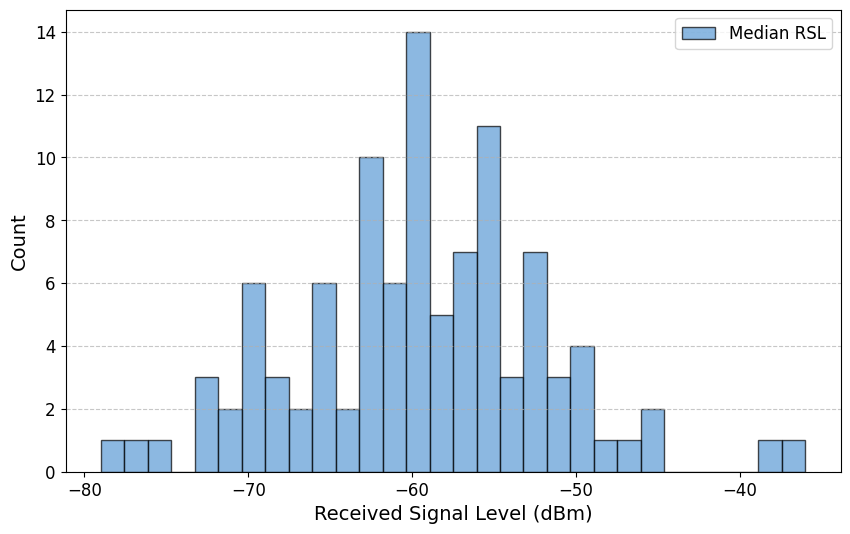

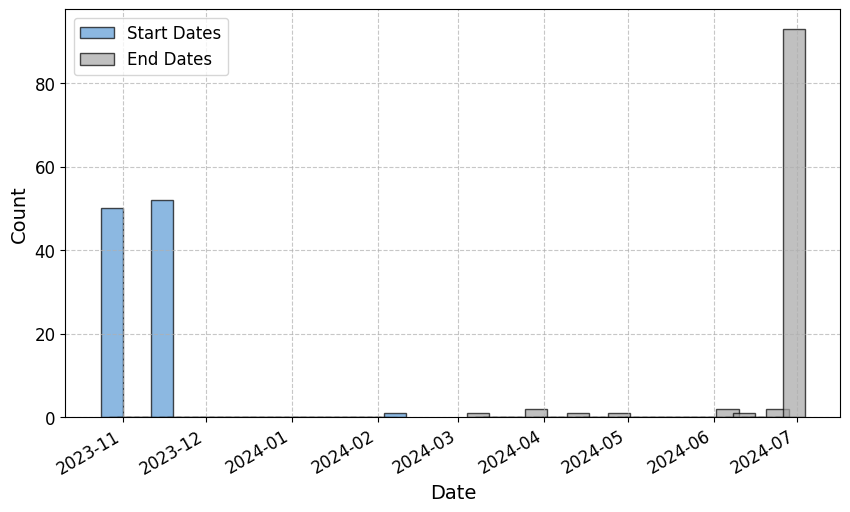

In [ ]:
# @title df-signals
df_signals = links_rawdata_set
# =============================================================================
# Example usage:
# =============================================================================
# For signal statistics (RSL), using a muted blue style.
plot_config_signals = {
    'figsize': (10, 6),
    'bins': 30,
    'colors': ['#5B9BD5'],  # Use a single muted blue color
    'x_label': 'Received Signal Level (dBm)',
    'y_label': 'Count',
    'label_size': 14,
    'tick_size': 12
}
# Example call:
plot_signal_statistics_new(df_signals, links_metadata, plot_config_signals, stats=['median'], merged=True)

# For start and end dates, use a consistent blue/gray style with no bar edges.
plot_config_dates = {
    'figsize': (10, 6),
    'colors': ['#5B9BD5', '#A6A6A6'],  # muted blue for start, gray for end
    'x_label': 'Date',
    'y_label': 'Count',
    'label_size': 14,
    'tick_size': 12,
    'bar_width': 8
}
# Example call:
plot_start_end_histogram(df_signals, n_samples=3, plot_config=plot_config_dates)


## **C**. Displaying Map

In [ ]:
# @title
def add_line_to_map(m,
                    row,
                    site_0_lat='site_0_lat',
                    site_0_lon='site_0_lon',
                    site_1_lat='site_1_lat',
                    site_1_lon='site_1_lon',
                    frequency_col='frequency',
                    tooltip_text='',
                    clr_line='frq',
                    circle_point=1,
                    link_index=0,
                    clr_range=(0.6, None),
                    linewidth=4,
                    set_clrs=None,
                    clr_index=0,
                    colors=['lightgreen', 'blue']):
    """
    Adds a line to a folium map using specific row data.

    Parameters:
    - m (folium.Map): The map object to which elements will be added.
    - row (pandas.Series): A row from a DataFrame containing required data.
    - site_0_lat, site_0_lon, site_1_lat, site_1_lon (str): Columns for site coordinates.
    - frequency_col (str): Column containing frequency data.
    - tooltip_text (str): Custom tooltip text.
    - clr_line (str): Determines color mapping ('frq' for frequency, 'dbl' for another value).
    - circle_point (bool): If True, adds polygons at the endpoints.
    - link_index (int): Index of the link (used in tooltip).
    - clr_range (tuple): (base_hue_or_val, gradient_list).
    - linewidth (int): Width of the drawn line.
    - set_clrs (list): Optional predefined colors for lines.
    - clr_index (int): Which color index to use if set_clrs is provided.
    - colors (list): A default color list, but we won't actually use it in 'color=' for PolyLine anymore.

    No return value; this function modifies the map object in place.
    """

    # Ensure m is a valid folium.Map object
    if not isinstance(m, folium.Map):
        raise ValueError("Invalid map object. Ensure 'm' is a valid folium.Map instance.")

    # Extract coordinates
    lat1, lon1 = row[site_0_lat], row[site_0_lon]
    lat2, lon2 = row[site_1_lat], row[site_1_lon]

    # Check for missing values
    if pd.isna(lat1) or pd.isna(lon1) or pd.isna(lat2) or pd.isna(lon2):
        print(f"Skipping line due to NaN values in row {link_index}")
        return

    # Define color values from clr_range
    base_val, gradient = clr_range  # Typically base_val is a float/hue, gradient is a list of hex colors
    frq = row[frequency_col]
    frq_G = frq / 1000.0  # Example: convert kHz to GHz if needed; adjust as appropriate

    # Determine the numeric value for color mapping
    if clr_line == 'frq':
        value = frq_G
    elif clr_line == 'dbl':
        value = row.get('double', 0) * 100  # Default 0 if 'double' not present
    else:
        value = 50  # Default if no recognized metric

    # Compute final color
    if set_clrs is None:
        color = get_color_from_value(value, 100, gradient)  # must be a single hex string
    else:
        # If set_clrs is provided, pick from it using clr_index or some logic
        color = set_clrs[clr_index % len(set_clrs)]

    # Build tooltip text
    tooltip_text = f'Index: {link_index}, Frequency: {frq} kHz'  # or 'GHz', as appropriate
    tooltip = folium.Tooltip(f'<span style="font-size: 14px;">{tooltip_text}</span>')

    # Create the polyline with the single computed color
    line = folium.PolyLine(
        locations=[(lat1, lon1), (lat2, lon2)],
        color=color,
        weight=linewidth,
        tooltip=tooltip
    )
    line.add_to(m)

    # Optionally add polygon markers at endpoints
    if circle_point:
        folium.RegularPolygonMarker(
            location=[lat1, lon1],
            number_of_sides=3,  # Triangle
            radius=14,
            color="darkgreen",
            fill=True,
            fill_color="darkgreen",
            fill_opacity=0.8
        ).add_to(m)

        folium.RegularPolygonMarker(
            location=[lat2, lon2],
            number_of_sides=4,  # Square
            radius=14,
            color="black",
            fill=True,
            fill_color="brown",
            fill_opacity=0.8
        ).add_to(m)

    return m


In [ ]:
# @title helpers: create_map functions
import folium
import pandas as pd
import colorsys
from folium import FeatureGroup
from folium.plugins import MousePosition
from folium.features import DivIcon
from branca.colormap import LinearColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Default center: Times Square, NYC
DEFAULT_MAP_CENTER = (40.758896, -73.985130)

def create_awesome_map(
    links_df=None,
    pws_df=None,
    map_center=DEFAULT_MAP_CENTER,
    zoom_start=12,
    link_color_mode='frequency',
    link_freq_range=(1, 100),  # min & max freq (GHz), for color normalization
    base_color='blue',          # fallback color if not using frequency
    link_popup_cols=None,       # list of columns to show in link popup
    pws_popup_cols=None,        # list of columns to show in PWS popup
    show_layer_control=True
):
    """
    Creates an interactive Folium map with separate layers for:
      1) Wireless Links (lines between sites)
      2) Personal Weather Stations (PWS) or any station data (markers)

    :param links_df: (pd.DataFrame) with columns for site_0_lat, site_0_lon, site_1_lat, site_1_lon, frequency, etc.
    :param pws_df: (pd.DataFrame) with columns for Latitude, Longitude, etc.
    :param map_center: (tuple) (lat, lon) for map center
    :param zoom_start: (int) initial zoom
    :param link_color_mode: (str) if 'frequency', color links by frequency using a colormap
    :param link_freq_range: (tuple) (min_freq, max_freq) used if coloring by frequency
    :param base_color: (str) fallback color or single color name (e.g. 'red', 'green') if not coloring by frequency
    :param link_popup_cols: (list) columns from links_df to display in the popup
    :param pws_popup_cols: (list) columns from pws_df to display in the popup
    :param show_layer_control: (bool) whether to add a LayerControl to toggle layers on/off
    :return: (folium.Map) the constructed map
    """
    # ----------------------------
    # 1) Initialize the Map
    # ----------------------------
    m = folium.Map(location=map_center, zoom_start=zoom_start)

    # Optional: Add a mouse-position plugin to see lat/lon in real time.
    MousePosition().add_to(m)

    # ----------------------------
    # 2) Prepare FeatureGroups
    # ----------------------------
    links_layer = FeatureGroup(name="Links", show=True)
    pws_layer   = FeatureGroup(name="PWS Stations", show=True)

    # ----------------------------
    # 3) Handle Link Coloring
    # ----------------------------
    colormap = None

    if links_df is not None and not links_df.empty:
        if link_color_mode == 'frequency':
            # Create a colormap from min_freq to max_freq
            min_freq, max_freq = link_freq_range
            colormap = LinearColormap(
                colors=['blue', 'green', 'yellow', 'red'],  # change to desired gradient
                vmin=min_freq,
                vmax=max_freq,
                caption='Frequency (MHz)'
            )

    # ----------------------------
    # 4) Plot Wireless Links
    # ----------------------------
    if links_df is not None and not links_df.empty:
        # Ensure needed columns exist or adapt names
        lat_cols = ['site_0_lat', 'site_1_lat']
        lon_cols = ['site_0_lon', 'site_1_lon']

        for idx, row in links_df.iterrows():
            idx_sublink = row['sublink_id']
            # Basic checks for coordinates
            try:
                lat1, lon1 = float(row[lat_cols[0]]), float(row[lon_cols[0]])
                lat2, lon2 = float(row[lat_cols[1]]), float(row[lon_cols[1]])
            except (ValueError, TypeError, KeyError):
                continue  # skip invalid rows

            # Determine link color
            if link_color_mode == 'frequency' and colormap is not None:
                freq_val = row.get('frequency', 0)
                freq_val = float(freq_val) if freq_val else 0
                if freq_val < link_freq_range[0]:
                    freq_val = link_freq_range[0]
                if freq_val > link_freq_range[1]:
                    freq_val = link_freq_range[1]
                line_color = colormap(freq_val)
            else:
                # fallback single color
                line_color = base_color

            # Build popup text (optional)
            popup_info = ""
            if link_popup_cols:
                for col in link_popup_cols:
                    val = row.get(col, "N/A")
                    popup_info += f"<b>{col}:</b> {val}<br>"
            else:
                # default if no columns provided
                popup_info = f"Link ID: {idx_sublink}"

            # Add line to the links layer
            # Add line to the links layer
# Add small shape for site_0 (Start point) - Blue
# Add line to the links layer
            folium.PolyLine(
                locations=[(lat1, lon1), (lat2, lon2)],
                color=line_color,
                weight=4, linewidth=1.5,
                idx_sublink = row['sublink_id'],
                tooltip=f"Link {idx_sublink}",
                popup=folium.Popup(html=popup_info, max_width=300)
            ).add_to(links_layer)

            # Add small shape for site_0 (Start point) - Blue
            # Add the link line
            folium.PolyLine(
                locations=[(lat1, lon1), (lat2, lon2)],
                color=line_color,
                weight=4,
                tooltip=f"Link {idx_sublink}",
                popup=folium.Popup(html=popup_info, max_width=300)
            ).add_to(links_layer)

            # Marker for site_0: triangle (dark green)
            folium.RegularPolygonMarker(
                location=(lat1, lon1),
                number_of_sides=3,
                radius=6,
                color='darkgreen',
                fill=True,
                fill_color='darkgreen',
                fill_opacity=1
            ).add_to(links_layer)

            # Marker for site_1: square (brown)
            folium.RegularPolygonMarker(
                location=(lat2, lon2),
                number_of_sides=4,
                radius=6,
                color='brown',
                fill=True,
                fill_color='brown',
                fill_opacity=1
            ).add_to(links_layer)

            # folium.PolyLine(
            #     locations=[(lat1, lon1), (lat2, lon2)],
            #     color=line_color,
            #     weight=4, linewidth = 1.5,
            #     tooltip=f"Link {idx}",
            #     popup=folium.Popup(html=popup_info, max_width=300)
            # ).add_to(links_layer)

        # If we used a colormap, add it to the map
        if colormap:
            colormap.add_to(m)

        # Finally, add the links layer to the map
        links_layer.add_to(m)

    # ----------------------------
    # 5) Plot PWS Stations
    # ----------------------------
    if pws_df is not None and not pws_df.empty:
        for idx, row in pws_df.iterrows():
            station_idx = row['Station ID']
            if idx in [8,7]:
              continue
            # Basic checks for coordinates
            try:
                lat = float(row['Latitude'])
                lon = float(row['Longitude'])
            except (ValueError, TypeError, KeyError):
                continue

            # Build popup text
            popup_info = ""
            if pws_popup_cols:
                for col in pws_popup_cols:
                    val = row.get(col, "N/A")
                    popup_info += f"<b>{col}:</b> {val}<br>"
            else:
                popup_info = f"Station {station_idx}"

            folium.Marker(
                location=(lat, lon),
                tooltip=f"PWS {station_idx}",
                popup=folium.Popup(html=popup_info, max_width=5),
                icon=folium.Icon(color='blue', icon='cloud')
            ).add_to(pws_layer)

        # Add PWS layer
        pws_layer.add_to(m)

    # ----------------------------
    # 6) (Optional) Add Layer Control
    # ----------------------------
    if show_layer_control:
        folium.LayerControl().add_to(m)

    return m

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def create_horizontal_legend_box(cloud_icon_path=None):
    """
    Creates a 6x2 figure with a consistent, horizontal layout:

      [    (green triangle)        (brown square)        Cloud Icon  ]
             Transmitter            Receiver                  PWS
                   (Site_0)           (Site_1)

    With a gray line labeled “Wireless Sublink” in the center.

    Perfect for copying into a larger figure or paper.
    """
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.set_facecolor("white")
    ax.axis("off")

    # Basic scale for text and symbol
    text_size = 12
    symbol_size = 0.04

    # Positions for the sublink
    x_left, x_right = 0.25, 0.45
    link_y = 0.5

    # 1) Gray line (Wireless Sublink)
    ax.plot([x_left, x_right], [link_y, link_y],
            color='gray', linewidth=3)

    # Sublink label (above line)
    ax.text((x_left + x_right) / 2, link_y + 0.08,
            "Wireless Sublink",
            ha='center', va='bottom',
            fontsize=text_size, fontweight='semibold')

    # 2) Transmitter (Site_0) - green triangle at x_left
    tri = RegularPolygon(
        (x_left, link_y),
        numVertices=3,
        radius=symbol_size,
        facecolor='darkgreen', edgecolor='darkgreen'
    )
    ax.add_patch(tri)

    # Label beneath
    ax.text(x_left, link_y - 0.09,
            "Transmitter\n(Site_0)",
            ha='center', va='top',
            fontsize=text_size - 1)

    # 3) Receiver (Site_1) - brown square at x_right
    sq = RegularPolygon(
        (x_right, link_y),
        numVertices=4,
        radius=symbol_size,
        facecolor='brown', edgecolor='brown'
    )
    ax.add_patch(sq)

    # Label beneath
    ax.text(x_right, link_y - 0.09,
            "Receiver\n(Site_1)",
            ha='center', va='top',
            fontsize=text_size - 1)

    # 4) PWS icon on the far right
    x_pws = 0.75
    y_pws = link_y

    # PWS label to the right
    ax.text(x_pws + 0.1, y_pws,
            "PWS",
            ha='left', va='center',
            fontsize=text_size, fontweight='semibold')

    # Cloud icon or fallback
    if cloud_icon_path:
        try:
            cloud_img = mpimg.imread(cloud_icon_path)
            offset_img = OffsetImage(cloud_img, zoom=0.06)
            ab = AnnotationBbox(offset_img, (x_pws, y_pws),
                                frameon=False)
            ax.add_artist(ab)
        except FileNotFoundError:
            ax.text(x_pws, y_pws, "☁",
                    fontsize=text_size * 1.6, ha='center', va='center', color='blue')
    else:
        ax.text(x_pws, y_pws, "☁",
                fontsize=text_size * 1.6, ha='center', va='center', color='blue')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    plt.tight_layout()
    return fig, ax

def plot_frequency_colorbar_mhz(
    min_mhz=0,
    max_mhz=100000,
    label_fontsize=12,
    tick_fontsize=10,
    fig_width=1.2,
    fig_height=4.0,
    cmap_name='jet'
):
    """
    Plots a standalone vertical color bar for frequency [min_mhz..max_mhz], in MHz.

    Parameters
    ----------
    min_mhz : float
        Minimum frequency (MHz).
    max_mhz : float
        Maximum frequency (MHz).
    label_fontsize : int
        Font size for the color bar's label.
    tick_fontsize : int
        Font size for the color bar's tick labels.
    fig_width : float
        Width of the figure (in inches).
    fig_height : float
        Height of the figure (in inches).
    cmap_name : str
        Name of the Matplotlib colormap to use (e.g. 'jet', 'viridis').

    Returns
    -------
    fig, ax : matplotlib Figure and Axes
    """

    # Create a narrow figure for the vertical color bar
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Normalization for the frequency range
    norm = mcolors.Normalize(vmin=min_mhz, vmax=max_mhz)

    # Grab the colormap
    cmap = cm.get_cmap(cmap_name)

    # Create a ScalarMappable for the color bar
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])  # No data needed, just sets up color scale

    # Create the color bar
    cb = plt.colorbar(sm, cax=ax, orientation='vertical', aspect = 16)
    # cb =  plt.colorbar(sm, ax=ax, orientation='vertical',
    #                     fraction=0.05, pad=0.02, aspect=16 )

    cb.set_label("Frequency (GHz)", fontsize=label_fontsize)
    cb.ax.tick_params(labelsize=tick_fontsize)

    # Example: If you want evenly spaced ticks, you can set them manually:
    # n_ticks = 6
    # tick_values = np.linspace(min_mhz, max_mhz, n_ticks)
    # cb.set_ticks(tick_values)
    # cb.set_ticklabels([f"{int(tv):,}" for tv in tick_values])

    plt.tight_layout()
    plt.show()
    return fig, ax


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MaxNLocator
from math import radians, cos, sin, asin, sqrt

def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = (sin(dlat/2)**2
         + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2)
    c = 2 * asin(min(1, sqrt(a)))
    return R * c

def sample_line_points(lat1, lon1, lat2, lon2, spacing_km=0.05):
    dist_km = haversine_km(lat1, lon1, lat2, lon2)
    if dist_km == 0:
        return [(lat1, lon1)]
    n = max(1, int(dist_km // spacing_km))
    lat_points = np.linspace(lat1, lat2, n+1)
    lon_points = np.linspace(lon1, lon2, n+1)
    return list(zip(lat_points, lon_points))

def create_unique_sublink_density_map(
    links_df,
    sublink_id_col='sublink_id',
    lat0_col='site_0_lat',
    lon0_col='site_0_lon',
    lat1_col='site_1_lat',
    lon1_col='site_1_lon',
    spacing_km=0.05,
    lat_min=40.6, lat_max=40.75,
    lon_min=-74.12, lon_max=-73.80,
    cell_size_deg=0.005,
    cmap='jet',
    cbar_label='Unique Sublinks / km²',
    title='NYCmesh Sublink Density (Unique Count per Cell)'
):
    # A) Build bin edges
    lat_bins = np.arange(lat_min, lat_max + cell_size_deg, cell_size_deg)
    lon_bins = np.arange(lon_min, lon_max + cell_size_deg, cell_size_deg)
    n_lat_bins = len(lat_bins) - 1
    n_lon_bins = len(lon_bins) - 1

    # For storing sets of sublink_ids
    link_sets = [[set() for _ in range(n_lon_bins)] for _ in range(n_lat_bins)]

    # B) Resample lines & assign link IDs
    for _, row in links_df.iterrows():
        link_id = row[sublink_id_col]
        latA, lonA = row[lat0_col], row[lon0_col]
        latB, lonB = row[lat1_col], row[lon1_col]
        sampled_pts = sample_line_points(latA, lonA, latB, lonB, spacing_km=spacing_km)

        for (slat, slon) in sampled_pts:
            if not (lat_min <= slat <= lat_max and lon_min <= slon <= lon_max):
                continue
            i_lat = np.digitize(slat, lat_bins) - 1
            i_lon = np.digitize(slon, lon_bins) - 1
            if 0 <= i_lat < n_lat_bins and 0 <= i_lon < n_lon_bins:
                link_sets[i_lat][i_lon].add(link_id)

    # C) Unique link counts
    counts_unique = np.zeros((n_lat_bins, n_lon_bins), dtype=int)
    for i in range(n_lat_bins):
        for j in range(n_lon_bins):
            counts_unique[i, j] = len(link_sets[i][j])

    # Convert to sublinks per km^2
    mid_lat = 0.5 * (lat_min + lat_max)
    km_per_deg_lat = 111.0
    km_per_deg_lon = 111.0 * np.cos(np.radians(mid_lat))
    cell_area_km2 = (cell_size_deg * km_per_deg_lat) * (cell_size_deg * km_per_deg_lon)
    density = counts_unique / cell_area_km2

    # D) Plot with Cartopy
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Background
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)

    Lon, Lat = np.meshgrid(lon_bins, lat_bins)
    density_masked = np.ma.masked_equal(density, 0)

    pcm = ax.pcolormesh(Lon, Lat, density_masked, cmap=cmap, shading='auto')

    cbar = plt.colorbar(pcm, ax=ax, orientation='vertical',
                        fraction=0.05, pad=0.02, aspect=16 )
    cbar.set_label(cbar_label, fontsize=13)
    cbar.ax.tick_params(labelsize=12)

    # Optional text: cell dimension
    cell_km_lat = cell_size_deg * km_per_deg_lat
    cell_km_lon = cell_size_deg * km_per_deg_lon
    annotation_text = f"Each grid cell ~ {cell_km_lat:.1f} × {cell_km_lon:.1f} km"
    ax.text(0.03, 0.03, annotation_text, transform=ax.transAxes,
            fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    # E) Add lat/lon ticks on edges (no separate "Latitude"/"Longitude" axis labels)
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.3)
    gl.right_labels = False
    gl.top_labels   = False
    gl.xlocator = MaxNLocator(5)  # fewer ticks horizontally
    gl.ylocator = MaxNLocator(5)  # fewer ticks vertically
    gl.xlabel_style = {'size': 11, 'rotation': 30}
    gl.ylabel_style = {'size': 11}

    # F) Plot the link lines themselves in black or gray
    for _, row in links_df.iterrows():
        latA, lonA = row[lat0_col], row[lon0_col]
        latB, lonB = row[lat1_col], row[lon1_col]
        # Draw line in gray
        ax.plot([lonA, lonB], [latA, latB],
                transform=ccrs.PlateCarree(), color='black', linewidth=1)

    # If you want a title
    # ax.set_title(title, fontsize=14)

    return fig, ax


import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def create_horizontal_legend_box(cloud_icon_path=None):
    """
    Creates a 6x2 figure with a consistent, horizontal layout:

      [    (green triangle)        (brown square)        Cloud Icon  ]
             Transmitter            Receiver                  PWS
                   (Site_0)           (Site_1)

    With a gray line labeled “Wireless Sublink” in the center.

    Perfect for copying into a larger figure or paper.
    """
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.set_facecolor("white")
    ax.axis("off")

    # Basic scale for text and symbol
    text_size = 16
    symbol_size = 0.065

    # Positions for the sublink
    x_left, x_right = 0.25, 0.7
    link_y = 0.52

    # 1) Gray line (Wireless Sublink)
    ax.plot([x_left, x_right], [link_y, link_y],
            color='gray', linewidth=3)

    # Sublink label (above line)
    ax.text((x_left + x_right) / 2, link_y + 0.08,
            "NYCMesh Sublink",
            ha='center', va='bottom',
            fontsize=text_size, fontweight='semibold')

    # 2) Transmitter (Site_0) - green triangle at x_left
    tri = RegularPolygon(
        (x_left, link_y),
        numVertices=3,
        radius=symbol_size,
        facecolor='darkgreen', edgecolor='darkgreen'
    )
    ax.add_patch(tri)

    # Label beneath
    ax.text(x_left, link_y - 0.09,
            "Transmitter",
            ha='center', va='top',
            fontsize=text_size - 3)

    # 3) Receiver (Site_1) - brown square at x_right
    sq = RegularPolygon(
        (x_right, link_y),
        numVertices=4,
        radius=symbol_size,
        facecolor='brown', edgecolor='brown'
    )
    ax.add_patch(sq)

    # Label beneath
    ax.text(x_right, link_y - 0.09,
            "Receiver",
            ha='center', va='top',
            fontsize=text_size - 2)

    # 4) PWS icon on the far right
    x_pws = 0.99
    y_pws = link_y

    # PWS label to the right
    ax.text(x_pws , y_pws + 0.1,
            "WUnderground\n        PWS",
            ha='left', va='center',
            fontsize=text_size, fontweight='semibold')

    # Cloud icon or fallback
    if cloud_icon_path:
        try:
            cloud_img = mpimg.imread(cloud_icon_path)
            offset_img = OffsetImage(cloud_img, zoom=0.06)
            ab = AnnotationBbox(offset_img, (x_pws, y_pws),
                                frameon=False)
            ax.add_artist(ab)
        except FileNotFoundError:
            ax.text(x_pws, y_pws, "☁",
                    fontsize=text_size * 1.6, ha='center', va='center', color='blue')
    else:
        ax.text(x_pws, y_pws, "☁",
                fontsize=text_size * 1.6, ha='center', va='center', color='blue')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    plt.tight_layout()
    return fig, ax


# Example usage
# if clr_bar:
#     fig, ax = plot_frequency_colorbar_mhz(
#         min_mhz=1,
#         max_mhz=100,
#         label_fontsize=14,
#         tick_fontsize=13,
#         fig_width=1.2,
#         fig_height=5.0,
#         cmap_name='jet'
#     )


In [ ]:
# @title
import matplotlib.pyplot as plt

def plot_length_freq_scatter(
    df_main,
    df_sub=None,
    freq_col='frequency',
    length_col='length',
    freq_unit='GHz',
    length_unit='km',

    # Updated default colors, marker sizes, and labels
    main_color='blue',
    sub_color='red',
    main_marker='o',
    sub_marker='o',
    main_marker_size=80,
    sub_marker_size=40,

    main_label='All Links',
    sub_label='Evaluation Subset',  # Updated label
    alpha_main=1,
    alpha_sub=1,
    fig_size=(8, 6),
    dpi=120
):
    """
    Plots a scatter of length vs. frequency for two DataFrames:
    - A main DataFrame (df_main)
    - An optional sub-DataFrame (df_sub)
    """

    # Make copies to avoid modifying the original data
    df_m = df_main.copy()
    df_s = df_sub.copy() if df_sub is not None else None

    # Convert frequency if freq_unit='GHz' => df is in MHz
    if freq_unit.lower() == 'ghz':
        freq_main = df_m[freq_col] / 1000.0
        freq_sub  = df_s[freq_col] / 1000.0 if df_s is not None else None
        x_label   = 'Frequency (GHz)'
    else:
        freq_main = df_m[freq_col]
        freq_sub  = df_s[freq_col] if df_s is not None else None
        x_label   = f'Frequency ({freq_unit})'  # parentheses

    # Convert length if needed
    if length_unit.lower() == 'm':
        len_main = df_m[length_col] * 1000.0
        len_sub  = df_s[length_col] * 1000.0 if df_s is not None else None
        y_label  = 'Length (m)'
    else:
        # assume km or any other unit
        len_main = df_m[length_col]
        len_sub  = df_s[length_col] if df_s is not None else None
        y_label  = f'Length ({length_unit})'  # parentheses

    # Create figure & scatter plot
    plt.figure(figsize=fig_size, dpi=dpi)
    plt.rcParams.update({'font.size': 14})

    # Plot main dataset
    plt.scatter(
        freq_main,
        len_main,
        color=main_color,
        marker=main_marker,
        s=main_marker_size,
        alpha=alpha_main,
        label=main_label
    )

    # Plot sub-dataset if provided
    if df_s is not None and not df_s.empty:
        plt.scatter(
            freq_sub,
            len_sub,
            color=sub_color,
            marker=sub_marker,
            s=sub_marker_size,
            alpha=alpha_sub,
            label=sub_label
        )

    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.grid(True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


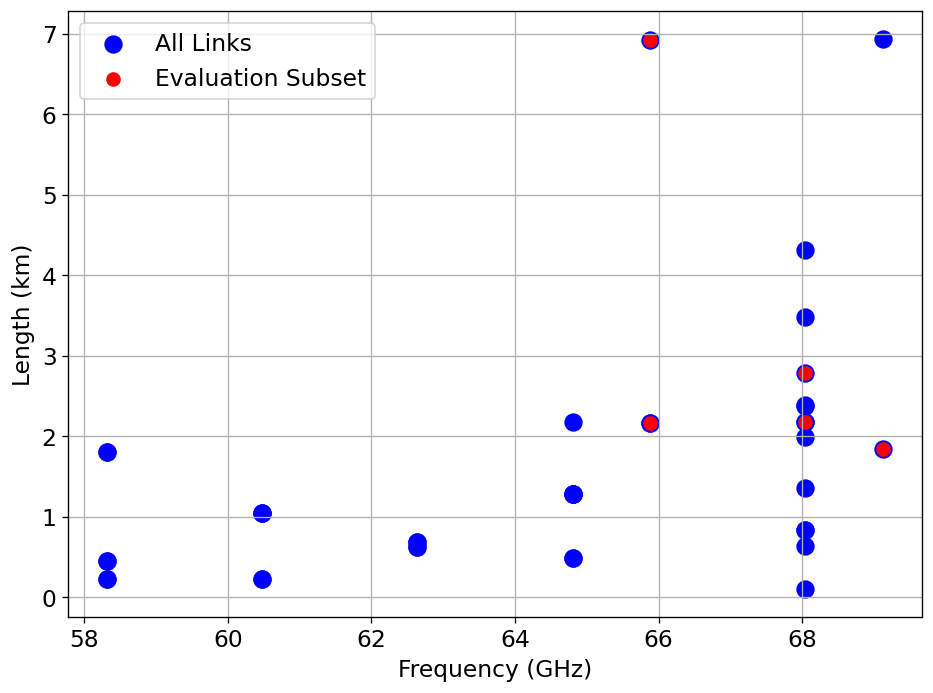

In [ ]:
df_raw_temp , df_meta_high  = filter_raw_meta(
    links_rawdata,
    links_metadata,
    # length_range=r["len"],
    freq_range= ( 50e3,None)
)

df_network = filter_meta(df_meta_high, ids_to_filter= ['nycmesh-1167-wavelr',
 'nycmesh-2090-wavelr',
 'nycmesh-4507-af60lr',
 'nycmesh-5916-af60lr-1340',
 'nycmesh-713-af60lr-1635',
 'nycmesh-713-af60xr-5916',
 'nycmesh-898-af60lr-7800'] , col_filter='cml_id',int_id = 0)

plot_length_freq_scatter( df_meta_high, df_network ,
                         main_marker_size=100,
                          sub_marker_size=60,)

In [ ]:
# @title run: style 1 : diaplay map
from google.colab import files

# Default: Lower Manhattan & Brooklyn
# Example usage.
df_rg_map      = filter_by_coordinates( weather_metadata, lat_range=(40.6, 40.75), lon_range=(-74.12, -73.80) )
rgs_map_meta   = df_rg_map
links_map_meta = links_metadata


# Configuration section to control map settings
config = {
    'add_links': True,  # Set to True to add links (lines) to the map
    'add_rgs': True,    # Set to True to add rain gauges (points) to the map
    'display_map': True, # Set to True to display the map
    'links_data': links_map_meta.copy(),  # Links meta data (alldata)
    'rgs_data'  : rgs_map_meta.copy(),    # Rain gauge data (PWS Meta)
    'base_color': 'hsv',  # 'hsv' string for default gradient or float hue between 0 and 1
    'color_line': 'frq'   # Color mode for lines (based on frequency or other metrics)
}



# Call the function using the configuration :
create_map_flag   =   1
display_map       =   1
save_map          =   0


if create_map_flag:
  mesh_map        = create_map_mesh( config['links_data'] ,  config['rgs_data'])
  # mesh_map        = create_map_mesh( config['links_data'] )


if display_map:
  display ( mesh_map )

from google.colab import files
if save_map:
  # Save it
  mesh_map.save("nyc_map.html")
  # Download the file
  #  files.download("nyc_map.html")

# 2. Preprocsess Reading data.

In [ ]:
# @title helpers: snow-related

def process_conditions(df_conditions, time_col='Datetime',
                           condition_colors = {
        "dry": None,  # No shading for dry
        "rain": "tab:blue",
        "mix": "tab:gray",
        "snow": "deepskyblue"
    }
):
    """
    Processes the weather condition DataFrame, mapping each time interval to a shading color.

    Parameters:
    - df_conditions (pd.DataFrame): DataFrame containing condition labels.
    - time_col (str): Column containing datetime information.

    Returns:
    - pd.DataFrame: Processed DataFrame with a "color" column mapped to conditions.
    """


    # Ensure datetime is correctly set
    if time_col in df_conditions.columns:
        df_conditions = df_conditions.set_index(time_col)
    df_conditions.index = pd.to_datetime(df_conditions.index)  # Ensure index is datetime

    # Map colors based on condition
    df_conditions["color"] = df_conditions["condition_category"].map(condition_colors)

    return df_conditions[["color"]]  # Return only relevant columns


def get_day_stat(df, day):
    """
    Retrieves the row corresponding to the given day and computes the mean value
    across the measurement stations (KLGA, KJFK, KNYC).

    Parameters:
    - df (pd.DataFrame): DataFrame containing date, KLGA, KJFK, and KNYC columns.
    - day (str or datetime-like): Date to retrieve in "YYYY-MM-DD" format.

    Returns:
    - float or None: Mean value of KLGA, KJFK, and KNYC for the given day, or None if the day is not found.
    """

    # Ensure date column is in datetime format
    df["date"] = pd.to_datetime(df["date"])

    # Filter for the given day
    day = pd.to_datetime(day)
    row = df[df["date"] == day]

    if row.empty:
        print(f"⚠️ Date {day.strftime('%Y-%m-%d')} not found in the dataset.")
        return None

    # Compute mean across KLGA, KJFK, and KNYC
    mean_value = row.iloc[:, 1:].mean(axis=1).values[0]

    return round(mean_value,2)

def compute_mean_per_date(df_snowy, df_precipy):
    """
    Computes the mean values per date from two dataframes (snow and precipitation)
    and merges them into a single DataFrame.

    Parameters:
    - df_snow (pd.DataFrame): DataFrame containing snow measurements per date.
    - df_precip (pd.DataFrame): DataFrame containing precipitation measurements per date.

    Returns:
    - pd.DataFrame: Merged DataFrame with date, mean_snow, and mean_precip columns.
    """
    df_snow = df_snowy.copy()
    df_precip = df_precipy.copy()
    # Convert 'date' column to datetime format
    df_snow["date"] = pd.to_datetime(df_snow["date"])
    df_precip["date"] = pd.to_datetime(df_precip["date"])

    # Compute mean per date
    df_snow["mean_snow"] = df_snow.iloc[:, 1:].mean(axis=1)
    df_precip["mean_precip"] = df_precip.iloc[:, 1:].mean(axis=1)

    # Merge on 'date'
    df_merged = pd.merge(df_snow[["date", "mean_snow"]], df_precip[["date", "mean_precip"]], on="date", how="outer")

    return df_merged

# print(df_result)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
# @title plot dbl fig
def standardize_datetime(dfs, time_col="Datetime", set_as_index=True):
    """
    Standardizes the Datetime column in a list of DataFrames, ensuring it is
    consistently set as either an index or a column.

    Parameters:
    - dfs (list of pd.DataFrame): List of DataFrames to process.
    - time_col (str, optional): The name of the time column to standardize. Default is 'Datetime'.
    - set_as_index (bool, optional): If True, sets the Datetime as index;
                                      if False, ensures it remains as a column.

    Returns:
    - list of pd.DataFrame: Processed DataFrames with a consistent time format.
    """

    processed_dfs = []

    for df in dfs:
        df = df.copy()  # Avoid modifying the original DataFrame

        # If 'Datetime' is in columns, ensure it's in datetime format
        if time_col in df.columns:
            df[time_col] = pd.to_datetime(df[time_col])
        elif isinstance(df.index, pd.DatetimeIndex):
            # Convert index to column if necessary
            df[time_col] = df.index
        else:
            raise ValueError(f"DataFrame lacks a valid Datetime index or '{time_col}' column.")

        # Set Datetime as index if required
        if set_as_index:
            df.set_index(time_col, inplace=True)
        else:
            df.reset_index(inplace=True)

        processed_dfs.append(df)

    return processed_dfs


def preprocess_conditions(df_conditions):
    """
    Categorizes each time interval into one of four classes: Dry, Rain, Mix, Snow.

    Parameters:
    - df_conditions (pd.DataFrame): DataFrame containing weather conditions at different locations.

    Returns:
    - df_conditions (pd.DataFrame): Updated DataFrame with a new 'condition_category' column.
    """

    def classify_condition(row):
        klga = row["KLGA"].lower() if isinstance(row["KLGA"], str) else ""
        kjfk = row["KJFK"].lower() if isinstance(row["KJFK"], str) else ""

        # 1. Mark as "snow" only if **both** locations contain "snow"
        if "snow" in klga and "snow" in kjfk:
            return "snow"

        # 2. Mark as "mix" if **either** location contains "wintry mix"
        if "wintry mix" in klga or "wintry mix" in kjfk:
            return "mix"

        # 3. Mark as "rain" if **either** location contains "rain"
        if "rain" in klga or "rain" in kjfk:
            return "rain"

        # 4. Default to "dry"
        return "dry"

    # Apply classification to each row
    df_conditions["condition_category"] = df_conditions.apply(classify_condition, axis=1)

    return df_conditions



def plot_with_std_shading(df_mean, df_std, ax, color, linestyle='-', alpha=0.2, label=None, a=1):
    """
    Plots a line with shaded ± a * std region around it.

    Parameters:
    - df_mean (pd.Series): Mean values over time.
    - df_std (pd.Series): Standard deviation values over time.
    - ax (matplotlib.axes._subplots.AxesSubplot): Axis to plot on.
    - color (str): Line color.
    - linestyle (str): Line style for the mean line.
    - alpha (float): Transparency for the shaded region.
    - label (str): Label for the line.
    - a (int, optional): Multiplicative factor for the standard deviation.

    Returns:
    - None
    """
    ax.plot(df_mean.index, df_mean, color=color, linestyle=linestyle, label=label)
    ax.fill_between(
        df_mean.index,
        df_mean - a * df_std,
        df_mean + a * df_std,
        color=color,
        alpha=alpha
    )

def process_conditions(df_conditions, time_col='Datetime' ,
    condition_colors = {
        "dry": None,  # No shading for dry
        "rain": "blue",
        "mix": "tab:gray",
        "snow": "deepskyblue"
    }):
    """
    Processes the weather condition DataFrame, mapping each time interval to a shading color.

    Parameters:
    - df_conditions (pd.DataFrame): DataFrame containing condition labels.
    - time_col (str): Column containing datetime information.

    Returns:
    - pd.DataFrame: Processed DataFrame with a "color" column mapped to conditions.
    """


    # Ensure datetime is correctly set
    if time_col in df_conditions.columns:
        df_conditions = df_conditions.set_index(time_col)
    df_conditions.index = pd.to_datetime(df_conditions.index)  # Ensure index is datetime

    # Map colors based on condition
    df_conditions["color"] = df_conditions["condition_category"].map(condition_colors)

    return df_conditions[["color"]]  # Return only relevant columns



def set_dates(  day     ,   delta='D'):
    """
    Computes the start and end timestamps for a given day and delta period.

    Parameters:
    - day (str or datetime-like): The reference day.
    - delta (str): The time period (e.g., 'D' for a day, '6H' for six hours, '2D' for two days).

    Returns:
    - tuple: (start timestamp, end timestamp)

    """

    # Convert the day string to a datetime object
    day_dt = pd.to_datetime(day)

    # Extract the numeric part and time unit
    delta_value = int(''.join(filter(str.isdigit, delta))) if any(char.isdigit() for char in delta) else 1
    delta_unit = ''.join(filter(str.isalpha, delta)).upper()  # Extract letters only

    # Define the end time based on the delta unit
    if delta_unit == 'D':  # Days
        st = day_dt.replace(hour=0, minute=0, second=0, microsecond=0)
        end = st + pd.Timedelta(days=delta_value) - pd.Timedelta(microseconds=1)
    elif delta_unit == 'H':  # Hours
        st = day_dt
        end = st + pd.Timedelta(hours=delta_value) - pd.Timedelta(microseconds=1)
    elif delta_unit == 'M':  # Minutes
        st = day_dt
        end = st + pd.Timedelta(minutes=delta_value) - pd.Timedelta(microseconds=1)
    elif delta_unit == 'W':  # Weeks
        st = day_dt.replace(hour=0, minute=0, second=0, microsecond=0)
        end = st + pd.Timedelta(weeks=delta_value) - pd.Timedelta(microseconds=1)
    else:
        raise ValueError("Unsupported delta unit. Use 'D' (days), 'H' (hours), 'M' (minutes), or 'W' (weeks).")

    return st, end


def filter_dict_by_days(df_dict, date_array, time_col='Datetime'):
    """
    Filters each DataFrame in df_dict for full days specified in date_array
    and stores the results in a nested dictionary.

    Parameters:
    - df_dict (dict): Dictionary of DataFrames to filter.
    - date_array (array-like): List or array of specific dates to keep.
    - time_col (str): Name of the date column in each DataFrame. Uses index if None.

    Returns:
    - dict: Nested dictionary {date: {df_key: filtered_df, ...}, ...}
    """
    # Convert date array to pandas datetime format
    date_array = pd.to_datetime(date_array)

    # Initialize the nested dictionary
    filtered_dict = {}

    # Iterate over each date
    for date in date_array:
        start_dt = pd.to_datetime(date)
        end_dt = start_dt + pd.Timedelta(days=1)  # Full day range
        if isinstance(df_dict , dict):
          # Create a sub-dictionary for this date
          filtered_dict[str(date.date())] = {
              key: filter_dates(df, start_dt, end_dt, time_col if time_col in df.columns else None)
              for key, df in df_dict.items()
            }
        else:
          filtered_dict[str(date.date())] = filter_dates(df_dict, start_dt, end_dt, time_col if time_col in df_dict.columns else None)
    return filtered_dict



def get_unique_values(df, time_col='Datetime'):
    """
    Returns a dictionary with unique values for each column in the DataFrame,
    excluding the specified time column.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    time_col (str, optional): The name of the time column to exclude. Default is 'Datetime'.

    Returns:
    dict: A dictionary where keys are column names and values are sets of unique values.
    """
    # Exclude the time column
    cols_to_check = df.columns.difference([time_col])

    # Get unique values as a set for each column
    unique_values = {col: set(df[col].unique()) for col in cols_to_check}

    return unique_values

# Example usage:
# unique_values_dict = get_unique_values(df)

def snow_stats(df, mode='any'):
    """
    Adds columns for detecting rain, snow, and mixed conditions based on weather observations.

    Parameters:
    - df (pd.DataFrame): DataFrame containing weather conditions for multiple stations.
    - mode (str): 'both' (both stations must indicate) or 'any' (at least one station indicates).

    Returns:
    - pd.DataFrame: A new DataFrame with added columns ['rain', 'snow', 'mix'].
    """
    # Define conditions for rain and snow based on observation values
    rain_conditions = {'Rain', 'Drizzle', 'Heavy Rain', 'Light Rain', 'Rain / Windy',
                       'Light Drizzle', 'Light Drizzle / Windy', 'Light Rain / Fog',
                       'Heavy Rain / Windy', 'Light Rain with Thunder', 'Wintry Mix'}

    snow_conditions = {'Snow', 'Light Snow', 'Light Snow / Windy', 'Light Snow and Sleet',
                       'Snow / Fog', 'Wintry Mix', 'Light Freezing Rain', 'Light Freezing Drizzle',
                       'Light Freezing Rain / Windy'}

    # Create a copy to avoid modifying the original DataFrame
    df_copy = df.copy()

    # Convert all values to lowercase for easy matching
    df_lower = df_copy.iloc[:, 1:].map(lambda x: str(x).lower() if pd.notna(x) else "")

    # Boolean masks for rain and snow
    rain_mask = df_lower.map(lambda x: any(cond.lower() in x for cond in rain_conditions))
    snow_mask = df_lower.map(lambda x: any(cond.lower() in x for cond in snow_conditions))

    # Create new columns without modifying the input DataFrame
    if mode == 'both':
        df_copy['rain'] = rain_mask.all(axis=1).astype(bool)  # True if both stations indicate rain
        df_copy['snow'] = snow_mask.all(axis=1).astype(bool)  # True if both stations indicate snow
    else:  # mode == 'any'
        df_copy['rain'] = rain_mask.any(axis=1).astype(bool)  # True if at least one station indicates rain
        df_copy['snow'] = snow_mask.any(axis=1).astype(bool)  # True if at least one station indicates snow

    # Mix condition: when both rain and snow occur together
    df_copy['mix'] = (df_copy['rain'] & df_copy['snow']).astype(bool)

    return df_copy  # Return the new DataFrame without modifying the original



In [ ]:
# @title helpers:  Daily Plots

def plot_weather_signal_frq(
    df_display_rain,
    df_display_temp,
    df_conditions_processed=None,
    df_links=None,
    ws_col=None,
    agg_func=None,
    time_format='day',
    start_dt=None,
    end_dt=None,
    time_col='Datetime',
    plot_config=None,
    day_row=None,
    meta_dict=None
):
    """
    Plots weather data (rain, temperature) plus signal strength, split by frequency range.
    The weather subplot is larger; each frequency group appears below it in smaller subplots.
    """

    # ====== 1) Default Plot Config ======
    default_plot_config = {
        "temperature": {"plt_range": None, "color": "tab:orange", "hline": None},
        "precip":      {"plt_range": None, "color": "tab:blue",   "hline": None},
        "signal":      {"plt_range": None, "color": "tab:red",    "linestyle": "-"},
        "label_map":   {"mean": "Mean", "median": "Median", "std": "Std Dev"},
        "legend_position": "best",
        "fontsize": 12,
        "ticksize": 14,
        "ylabelsize": 14,
        "rolling_window": 3,
        'rain_window' :5
    }

    if plot_config is None:
        plot_config = default_plot_config
    else:
        for key, default_values in default_plot_config.items():
            if key not in plot_config:
                plot_config[key] = default_values
            else:
                for sub_key, default_value in default_values.items():
                    plot_config[key].setdefault(sub_key, default_value)

    fontsize = plot_config["fontsize"]
    ticksize = plot_config["ticksize"]
    ylabelsize = plot_config["ylabelsize"]

    # ====== 2) Data Preprocessing ======
    def preprocess_df(df, interpolate=False):
        if df is not None:
            df = filter_dates(df, start_dt, end_dt, time_col)  # <--- your filter_dates function
            if time_col in df.columns:
                df = df.set_index(time_col)
            if df.index.name != time_col:
                df.index.name = time_col
            df = df.loc[:, df.columns != time_col]
            if interpolate:
                df = df.interpolate(method='linear')
        return df

    df_display_rain = preprocess_df(df_display_rain)
    df_display_temp = preprocess_df(df_display_temp)
    df_links = preprocess_df(df_links)

    # ====== 3) Group Sublinks by Frequency Range ======
    if df_links is not None:
        high_freq_sublinks = []
        mid_freq_sublinks  = []
        low_freq_sublinks  = []

        for col in df_links.columns:
            col_int = int(col)
            frq_khz = meta_dict.get(col_int, {}).get('frequency', None)
            if frq_khz is None:
                continue
            freq_ghz = frq_khz / 1e3

            if freq_ghz > 50:
                high_freq_sublinks.append(col)
            elif 10 < freq_ghz <= 50:
                mid_freq_sublinks.append(col)
            else:
                low_freq_sublinks.append(col)

        freq_groups = []
        if high_freq_sublinks:
            freq_groups.append(('High Freq (>50 GHz)', high_freq_sublinks, plt.cm.PuBu))
        if mid_freq_sublinks:
            freq_groups.append(('Mid Freq (10-50 GHz)', mid_freq_sublinks, plt.cm.Greens))
        if low_freq_sublinks:
            freq_groups.append(('Low Freq (<=10 GHz)', low_freq_sublinks, plt.cm.Oranges))
    else:
        freq_groups = []

    # ====== 4) Figure Setup ======
    # We'll have 1 subplot for weather + len(freq_groups) subplots for frequency bands.
    num_subplots = 1 + len(freq_groups) if df_links is not None else 1

    # Make the top subplot (weather) bigger, subsequent subplots smaller
    # e.g. top subplot has "height" of 2, each freq subplot has "height" of 1
    if num_subplots == 1:
        height_ratios = [1]  # Only weather if no freq groups
    else:
        height_ratios = [2] + [1]*(num_subplots-1)

    fig, ax_arr = plt.subplots(
        num_subplots, 1,
        figsize=(14, 3 + 2*num_subplots),  # tweak as desired
        sharex=True,
        gridspec_kw={'height_ratios': height_ratios, 'hspace': 0.08}
    )

    # If there's only one subplot, ax_arr is just an Axes, else it's an array of Axes
    if num_subplots == 1:
        ax_weather = ax_arr
        subplots_list = []
    else:
        ax_weather = ax_arr[0]
        subplots_list = ax_arr[1:]

    # ====== 5) Plot Weather: precipitation + temperature
    ax_rain = ax_weather
    ax_temp = ax_weather.twinx()

    if df_display_rain is not None:
        rain_colors = plt.cm.Blues(np.linspace(0.9, 1.9, len(df_display_rain.columns)))
    else:
        rain_colors = []

    if df_display_temp is not None:
        temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(df_display_temp.columns)))
    else:
        temp_colors = []

    line_styles = {"Mean": "-", "Median": "--"}

    # rain_colors = plt.cm.Blues(np.linspace(0.6, 0.9, len(df_display_rain.columns)))
    # Plot Rain
    if df_display_rain is not None:
        for idx, col in enumerate(df_display_rain.columns):
            label = plot_config["label_map"].get(col, col)
            linestyle = line_styles.get(label, "-")
            # Apply rolling to this column
            rolling_rain = df_display_rain[col].rolling(
                window=plot_config["rain_window"], min_periods=1
            ).mean()
            ax_rain.plot(
                df_display_rain.index,
                rolling_rain ,
                color=rain_colors[idx],
                linestyle=linestyle,
                label=label
            )

    # Plot Temp
    if df_display_temp is not None:
        for idx, col in enumerate(df_display_temp.columns):
            label = plot_config["label_map"].get(col, col)
            linestyle = line_styles.get(label, "-")
            ax_temp.plot(
                df_display_temp.index,
                df_display_temp[col],
                color=temp_colors[idx],
                linestyle=linestyle,
                label=label
            )

    ax_rain.set_ylabel("Precipitation Rate (mm/h)", fontsize=ylabelsize)
    ax_temp.set_ylabel("Temperature (°C)", fontsize=ylabelsize)
    ax_rain.grid(True, linestyle="--", alpha=0.6)

    # Optional y-limits & lines
    if plot_config["precip"]["plt_range"] is not None:
        ax_rain.set_ylim(plot_config["precip"]["plt_range"])
    if plot_config["temperature"]["plt_range"] is not None:
        ax_temp.set_ylim(plot_config["temperature"]["plt_range"])
    if plot_config["temperature"]["hline"] is not None:
        ax_temp.axhline(y=plot_config["temperature"]["hline"],
                        color=plot_config["temperature"]["color"], linestyle="--", alpha=0.8)
    if plot_config["precip"]["hline"] is not None:
        ax_rain.axhline(y=plot_config["precip"]["hline"],
                        color=plot_config["precip"]["color"], linestyle="--", alpha=0.3)

    # Legends
    ax_rain.legend(loc='upper left', fontsize=fontsize, title="PWS Precip.")
    ax_temp.legend(loc="upper right", fontsize=fontsize, title="PWS Temp.")

    # ====== 6) Plot Each Frequency Group in Its Own Subplot ======
    if freq_groups:
        for subplot_idx, (band_name, sublink_cols, cmap) in enumerate(freq_groups):
            ax_signal = subplots_list[subplot_idx]

            # Use a color gradient
            color_array = cmap(np.linspace(0.3, 0.8, len(sublink_cols)))

            for i, col in enumerate(sublink_cols):
                col_int = int(col)
                freq_khz = meta_dict[col_int]['frequency']
                freq_ghz = freq_khz / 1e3
                len_km = meta_dict[col_int]['length']
                label_str = f"Sublink {col_int} ({freq_ghz:.1f} GHz, {len_km:.1f} km)"

                rolling_mean = df_links[col].rolling(
                    window=plot_config["rolling_window"],
                    min_periods=1
                ).mean()

                ax_signal.plot(
                    df_links.index,
                    rolling_mean,
                    color=color_array[i],
                    linestyle=plot_config["signal"]["linestyle"],
                    label=label_str
                )

            ax_signal.set_ylabel("RSL (dBm)", fontsize=ylabelsize)
            ax_signal.legend(loc=plot_config['legend_position'], fontsize=fontsize)
            ax_signal.grid(True, linestyle="--", alpha=0.6)
            ax_signal.tick_params(axis='y', labelsize=ticksize)

    # ====== 7) Condition Shading (if any) ======
    if df_conditions_processed is not None:
        df_conditions_processed = df_conditions_processed.sort_index()
        df_conditions_processed["group"] = df_conditions_processed["color"].ne(
            df_conditions_processed["color"].shift()
        ).cumsum()

        all_axes_to_shade = [ax_weather] + list(subplots_list)
        for _, group in df_conditions_processed.groupby("group"):
            shade_color = group["color"].iloc[0]
            if shade_color:
                for ax_ in all_axes_to_shade:
                    ax_.axvspan(group.index[0], group.index[-1], color=shade_color, alpha=0.1)

    # ====== 8) X-Axis Formatting ======
# ====== 8) X-Axis Formatting ======
    # Instead of `if subplots_list:`
    if len(subplots_list) > 0:
        ax_final = subplots_list[-1]
    else:
        ax_final = ax_weather


    locator = mdates.AutoDateLocator()
    if time_format == 'day':
        formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
    else:
        formatter = mdates.DateFormatter('%H:%M')

    ax_final.xaxis.set_major_locator(locator)
    ax_final.xaxis.set_major_formatter(formatter)
    plt.setp(ax_final.xaxis.get_majorticklabels(), rotation=45)

    ax_weather.tick_params(axis='x', labelsize=ticksize)
    ax_weather.tick_params(axis='y', labelsize=ticksize)
    ax_temp.tick_params(axis='y', labelsize=ticksize)
    for ax_ in subplots_list:
        ax_.tick_params(axis='x', labelsize=ticksize)

    plt.tight_layout()
    plt.show()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_weather_signal_frq_inverted(
    df_display_rain,
    df_display_temp,
    df_conditions_processed=None,
    df_links=None,
    freq_bands=None,  # A list of (min_freq, max_freq, colormap)
    time_format='day',
    start_dt=None,
    end_dt=None,
    time_col='Datetime',
    plot_config=None,
    meta_dict=None
):
    """
    Plots multiple frequency bands (up to 4 or so) at the TOP, and weather (rain + temperature) at the BOTTOM.
    The user specifies freq_bands as a list of tuples: (min_freq, max_freq, colormap).
      - min_freq, max_freq in GHz (use None for open-ended).
      - colormap is the plt.cm.* object to color links in that band.

    Example freq_bands:
        [
            (0, 10, plt.cm.Oranges),   # 0 - 10 GHz
            (20, 40, plt.cm.Reds),     # 20 - 40 GHz
            (50, 66, plt.cm.GnBu),     # 50 - 66 GHz
            (66, None, plt.cm.PuBu)    # above 66 GHz
        ]

    The weather subplot is larger, while each frequency group subplot is smaller.

    Added optional 0 °C line: set plot_config["temperature"]["zero_line"] = True
    """

    # ====== 1) Default Plot Config ======
    default_plot_config = {
        "temperature": {
            "plt_range": None,
            "color": "tab:orange",
            "hline": None,
            "ylabel": "Temperature (°C)",
            "zero_line": 1  # If True, draw dashed line at 0 °C
        },
        "precip": {
            "plt_range": None,
            "color": "tab:blue",
            "hline": None,
            "ylabel": "Precipitation Rate (mm/h)"
        },
        "signal": {
            "plt_range": None,
            "color": "tab:red",
            "linestyle": "-"
        },
        "label_map": {"mean": "Mean", "median": "Median", "std": "Std Dev"},
        "legend_position": "lower right",
        "fontsize": 12,
        "ticksize": 14,
        "ylabelsize": 14,
        "rolling_window": 3,
        "rain_window": 5
    }

    if plot_config is None:
        plot_config = default_plot_config
    else:
        for key, default_values in default_plot_config.items():
            if key not in plot_config:
                plot_config[key] = default_values
            else:
                for sub_key, default_value in default_values.items():
                    plot_config[key].setdefault(sub_key, default_value)

    fontsize = plot_config["fontsize"]
    ticksize = plot_config["ticksize"]
    ylabelsize = plot_config["ylabelsize"]
    rolling_window_signal = plot_config["rolling_window"]
    rolling_window_rain   = plot_config["rain_window"]

    precip_ylabel = plot_config["precip"].get("ylabel", "Precipitation (mm/h)")
    temp_ylabel   = plot_config["temperature"].get("ylabel", "Temperature (°C)")

    # ====== 2) Data Preprocessing ======
    def preprocess_df(df, interpolate=False):
        if df is not None:
            df = filter_dates(df, start_dt, end_dt, time_col)  # user-provided function
            if time_col in df.columns:
                df = df.set_index(time_col)
            if df.index.name != time_col:
                df.index.name = time_col
            df = df.loc[:, df.columns != time_col]
            if interpolate:
                df = df.interpolate(method='linear')
        return df

    df_display_rain = preprocess_df(df_display_rain)
    df_display_temp = preprocess_df(df_display_temp)
    df_links        = preprocess_df(df_links)

    # ====== 3) freq_bands Default
    if freq_bands is None:
        freq_bands = [
            (0, 10, plt.cm.Oranges),
            (10, 50, plt.cm.Greens),
            (50, 66, plt.cm.GnBu),
            (66, None, plt.cm.PuBu)
        ]

    # Gather sublinks by band
    freq_groups = []
    if df_links is not None and meta_dict is not None:
        band_sublinks = [[] for _ in freq_bands]

        for col in df_links.columns:
            col_int = int(col)
            freq_khz = meta_dict.get(col_int, {}).get('frequency')
            if freq_khz is None:
                continue
            freq_ghz = freq_khz / 1e3

            assigned = False
            for idx_band, (min_f, max_f, cmap) in enumerate(freq_bands):
                if min_f is None:
                    # freq <= max_f
                    if freq_ghz <= max_f:
                        band_sublinks[idx_band].append(col)
                        assigned = True
                        break
                elif max_f is None:
                    # freq >= min_f
                    if freq_ghz >= min_f:
                        band_sublinks[idx_band].append(col)
                        assigned = True
                        break
                else:
                    # normal range
                    if (freq_ghz >= min_f) and (freq_ghz <= max_f):
                        band_sublinks[idx_band].append(col)
                        assigned = True
                        break

        for idx_band, (min_f, max_f, cmap) in enumerate(freq_bands):
            sublinks_in_band = band_sublinks[idx_band]
            if len(sublinks_in_band) == 0:
                continue
            if min_f is None:
                label = f"( <= {max_f:.0f} GHz )"
            elif max_f is None:
                label = f"( > {min_f:.0f} GHz )"
            else:
                label = f"({min_f:.0f}-{max_f:.0f} GHz)"
            freq_groups.append((label, sublinks_in_band, cmap))

    # ====== 4) Figure Setup
    num_subplots = 1 + len(freq_groups) if df_links is not None else 1
    if num_subplots == 1:
        height_ratios = [2]
    else:
        height_ratios = [1]*len(freq_groups) + [2]

    fig, ax_arr = plt.subplots(
        num_subplots, 1,
        figsize=(14, 3 + 2*num_subplots),
        sharex=True,
        gridspec_kw={'height_ratios': height_ratios, 'hspace': 0.08}
    )

    if num_subplots == 1:
        subplots_list = []
        ax_weather = ax_arr
    else:
        subplots_list = ax_arr[:len(freq_groups)]
        ax_weather   = ax_arr[-1]

    # ====== 5) Frequency Subplots
    for subplot_idx, (band_label, sublink_cols, cmap) in enumerate(freq_groups[::-1]):
        ax_signal = subplots_list[subplot_idx]
        color_array = cmap(np.linspace(0.3, 0.8, len(sublink_cols)))

        for i, col in enumerate(sublink_cols):
            col_int = int(col)
            freq_khz = meta_dict[col_int]['frequency']
            freq_ghz = freq_khz / 1e3
            length_km = meta_dict[col_int].get('length', 1.0)
            label_str = f"Sublink {col_int} ({freq_ghz:.1f} GHz, {length_km:.1f} km)"

            raw_signal = df_links[col]
            rolling_signal = raw_signal.rolling(
                window=rolling_window_signal, min_periods=1
            ).mean()

            # Segment-based approach for dashed lines on NaNs
            xvals = rolling_signal.index.values
            yvals = rolling_signal.values
            valid_mask = ~np.isnan(yvals)

            segments = []
            start_idx = None
            for idx_data in range(len(yvals)):
                if valid_mask[idx_data]:
                    if start_idx is None:
                        start_idx = idx_data
                else:
                    if start_idx is not None:
                        segments.append((start_idx, idx_data - 1))
                        start_idx = None
            if start_idx is not None:
                segments.append((start_idx, len(yvals) - 1))

            # 1) Plot each valid segment (solid)
            first_segment = True
            for (seg_start, seg_end) in segments:
                ax_signal.plot(
                    xvals[seg_start:seg_end + 1],
                    yvals[seg_start:seg_end + 1],
                    color=color_array[i],
                    linestyle='-',
                    label=label_str if first_segment else None
                )
                first_segment = False

            # 2) Connect consecutive segments with a dashed line
            for seg_idx in range(len(segments) - 1):
                end_cur = segments[seg_idx][1]
                start_next = segments[seg_idx + 1][0]
                ax_signal.plot(
                    [xvals[end_cur], xvals[start_next]],
                    [yvals[end_cur], yvals[start_next]],
                    color=color_array[i],
                    linestyle='--',
                    label=None
                )

        ax_signal.set_ylabel("RSL (dBm)", fontsize=ylabelsize)
        ax_signal.legend(loc=plot_config['legend_position'], fontsize=fontsize)
        ax_signal.grid(True, linestyle="--", alpha=0.6)
        ax_signal.tick_params(axis='y', labelsize=ticksize)

    # ====== 6) Weather Subplot
    ax_rain = ax_weather
    ax_temp = ax_weather.twinx()

    if df_display_rain is not None:
        rain_colors = plt.cm.Blues(np.linspace(0.6, 0.9, len(df_display_rain.columns)))
    else:
        rain_colors = []

    if df_display_temp is not None:
        temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(df_display_temp.columns)))
    else:
        temp_colors = []

    line_styles = {"Mean": "-", "Median": "--"}

    # Rain
    if df_display_rain is not None:
        for idx, col in enumerate(df_display_rain.columns):
            label = plot_config["label_map"].get(col, col)
            rolling_rain = df_display_rain[col].rolling(window=rolling_window_rain, min_periods=1).mean()
            linestyle = line_styles.get(label, "-")
            if plot_config["precip"]["plt_range"] is not None:
                 ax_rain.set_ylim(plot_config["precip"]["plt_range"])

            ax_rain.plot(
                df_display_rain.index,
                rolling_rain,
                color=rain_colors[idx],
                linestyle=linestyle,
                label=label
            )

    # Temperature
    if df_display_temp is not None:
        for idx, col in enumerate(df_display_temp.columns):
            label = plot_config["label_map"].get(col, col)
            ax_temp.plot(
                df_display_temp.index,
                df_display_temp[col],
                color=temp_colors[idx],
                linestyle="-",
                label=label
            )

    # Optional 0 °C line
    if plot_config["temperature"].get("zero_line", False):
        # dashed line at temperature = 0
        ax_temp.axhline(
            y=0,
            color="black",
            linestyle="--",
            linewidth=1.,
            label="0 °C"
        )

    ax_rain.set_ylabel(precip_ylabel, fontsize=ylabelsize)
    ax_temp.set_ylabel(temp_ylabel,   fontsize=ylabelsize)
    ax_rain.grid(True, linestyle="--", alpha=0.6)

    ax_rain.legend(loc='upper left',  fontsize=fontsize, title="PWS Precip.")
    ax_temp.legend(loc="upper right", fontsize=fontsize, title="PWS Temp.")

    # ====== 7) Condition Shading
    if df_conditions_processed is not None:
        df_conditions_processed = df_conditions_processed.sort_index()
        df_conditions_processed["group"] = df_conditions_processed["color"].ne(
            df_conditions_processed["color"].shift()
        ).cumsum()

        all_axes = list(subplots_list) + [ax_weather]
        for _, group in df_conditions_processed.groupby("group"):
            shade_color = group["color"].iloc[0]
            if shade_color:
                for ax_ in all_axes:
                    ax_.axvspan(group.index[0], group.index[-1], color=shade_color, alpha=0.1)

    # ====== 8) X-Axis (Date) Formatting
    ax_final = ax_weather  # bottom subplot

    locator = mdates.AutoDateLocator()
    if time_format == 'day':
        formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
    else:
        formatter = mdates.DateFormatter('%H:%M')

    ax_final.xaxis.set_major_locator(locator)
    ax_final.xaxis.set_major_formatter(formatter)
    plt.setp(ax_final.xaxis.get_majorticklabels(), rotation=45)

    for ax_signal in subplots_list:
        ax_signal.tick_params(axis='x', labelsize=ticksize)
        ax_signal.tick_params(axis='y', labelsize=ticksize)

    ax_weather.tick_params(axis='x', labelsize=ticksize)
    ax_weather.tick_params(axis='y', labelsize=ticksize)
    ax_temp.tick_params(axis='y', labelsize=ticksize)

    plt.tight_layout()
    plt.show()


def plot_weather_params(df_weather, plot_config, params=['Temperature (Celsius)', 'Rainfall Rates (mm/h)'],
                        merged=True, start_dt=None, end_dt=None, time_col='Datetime'):
    """
    Plots selected weather parameters (Temperature, Rainfall Rate) from a DataFrame.

    Parameters:
    - df_weather (pd.DataFrame): Weather data containing time series of parameters.
    - plot_config (dict): Dictionary containing plot styling settings.
    - params (list): List of parameters to plot. Default is ['Temperature (Celsius)', 'Rainfall Rates (mm/h)'].
    - merged (bool): If True, plots all parameters in one figure; otherwise, separate subplots.
    - start_dt (str or datetime, optional): Start datetime for filtering data.
    - end_dt (str or datetime, optional): End datetime for filtering data.
    - time_col (str): The column representing the time axis. Default is 'Datetime'.

    Returns:
    - None (Displays the plot using Matplotlib).
    """
    # Filter data by time range
    df_filtered = filter_dates(df_weather, start_dt=start_dt, end_dt=end_dt, time_col=time_col)

    # Ensure the datetime column is used as index for plotting
    df_filtered[time_col] = pd.to_datetime(df_filtered[time_col])
    df_filtered.set_index(time_col, inplace=True)

    # Select only requested parameters
    df_selected = df_filtered[params].dropna()

    # Define plot settings
    colors = plot_config.get('colors', ('blue', 'red'))  # Default color palette
    bins = plot_config.get('bins', 30)

    if merged:
        # Merged: Single figure with multiple y-axes
        fig, ax1 = plt.subplots(figsize=plot_config['figsize'])

        ax1.set_xlabel('Time', fontsize=plot_config['label_size'])
        ax1.set_ylabel(params[0], color=colors[0], fontsize=plot_config['label_size'])
        ax1.plot(df_selected.index, df_selected[params[0]], color=colors[0], label=params[0])
        ax1.tick_params(axis='y', labelcolor=colors[0])

        # Second y-axis for second parameter
        ax2 = ax1.twinx()
        ax2.set_ylabel(params[1], color=colors[1], fontsize=plot_config['label_size'])
        ax2.plot(df_selected.index, df_selected[params[1]], color=colors[1], linestyle='dashed', label=params[1])
        ax2.tick_params(axis='y', labelcolor=colors[1])

        plt.title("Weather Parameters Over Time", fontsize=plot_config['title_size'])
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    else:
        # Separate: Create individual subplots for each parameter
        fig, axes = plt.subplots(len(params), 1, figsize=(plot_config['figsize'][0], plot_config['figsize'][1] * len(params)), sharex=True)

        if len(params) == 1:
            axes = [axes]  # Ensure axes is always iterable

        for ax, param, color in zip(axes, params, colors):
            ax.plot(df_selected.index, df_selected[param], color=color, label=param)
            ax.set_ylabel(param, fontsize=plot_config['label_size'])
            ax.tick_params(axis='both', labelsize=plot_config['tick_size'])
            ax.grid(axis='x', linestyle='--', alpha=0.7)
            ax.legend(fontsize=plot_config['tick_size'])

        axes[-1].set_xlabel('Time', fontsize=plot_config['label_size'])  # X-axis label only on last plot
        plt.tight_layout()
        plt.show()


# @title helper: plot_weather


def plot_weather_signal(
    df_display_rain, df_display_temp, df_conditions_processed=None, df_links=None,
    ws_col=None, agg_func=None, time_format='day', start_dt=None, end_dt=None,
    time_col='Datetime', plot_config=None , day_row = None ,  meta_dict = None
):
    """
    Plots signal strength (if df_links is provided) along with weather parameters,
    ensuring a shared time axis and condition-based shading.
    """

    # **Default Plot Configuration**
    default_plot_config = {
        "temperature": {"plt_range": None, "color": "tab:orange", "hline": None},
        "precip": {"plt_range": None, "color": "tab:blue", "hline": None},
        "signal": {"plt_range": None, "color": "tab:red", "linestyle": "-"},
        "label_map": {"mean": "Mean", "median": "Median", "std": "Std Dev"},
        'legend_position' : 'center left',
        "fontsize": 12,
        "ticksize": 14,
        "ylabelsize": 14,
'rolling_window' : 3  }

    # **Merge User-Defined plot_config Without Overwriting Defaults**
    if plot_config is None:
        plot_config = default_plot_config
    else:
        for key, default_values in default_plot_config.items():
            if key not in plot_config:
                plot_config[key] = default_values
            else:
                for sub_key, default_value in default_values.items():
                    plot_config[key].setdefault(sub_key, default_value)

    fontsize = plot_config["fontsize"]
    ticksize = plot_config["ticksize"]
    ylabelsize = plot_config["ylabelsize"]

    # **Filter & Standardize Data Based on Date Range**
    def preprocess_df(df, interpolate=False):
        if df is not None:
            df = filter_dates(df, start_dt, end_dt, time_col)
            # Set as index if not already
            if time_col in df.columns:
                df = df.set_index(time_col)

             # Ensure index name consistency.
            if df.index.name != time_col:
                df.index.name = time_col

            df = df.loc[:, df.columns != time_col]  # Remove 'Datetime' if mistakenly present

            if interpolate:
                df = df.interpolate(method='linear')  # Interpolate missing values linearly
        return df


    df_display_rain = preprocess_df(df_display_rain)
    df_display_temp = preprocess_df(df_display_temp)
    df_links = preprocess_df(df_links)

    # **Figure Setup: 2 Subplots (Weather & Signal)**
    if df_links is not None:
        fig, (ax_signal, ax_weather) = plt.subplots(
            2, 1, figsize=(14, 12), sharex=True,
            gridspec_kw={'height_ratios': [2, 2], 'hspace': 0.05}  # Reduce hspace
        )
    else:
        fig, ax_weather = plt.subplots(figsize=(14, 7))
        ax_signal = None

    ax_rain = ax_weather
    ax_temp = ax_weather.twinx()
    # group_colors = {

        # **Plot Signal Strength (if provided)**
    if df_links is not None:
          # **Group Colors Based on Frequency**
          high_freq_color = plt.cm.Blues(np.linspace(0.8, 2, sum(meta_dict[int(col)]['frequency'] / 1e3 > 50 for col in df_links.columns)))[::-1]
          mid_freq_color = plt.cm.Greens(np.linspace(0.6, 0.8, sum(10 < meta_dict[int(col)]['frequency'] / 1e3 <= 50 for col in df_links.columns)))
          low_freq_color = plt.cm.Oranges(np.linspace(0.3, 0.7, sum(meta_dict[int(col)]['frequency'] / 1e3 <= 10 for col in df_links.columns)))

          high_idx, mid_idx, low_idx = 0, 0, 0

          for idx, col in enumerate(df_links.columns):
            col_int = int(col)
            frq = meta_dict.get(col_int, {}).get('frequency', None)
            label = f"{frq/1e3:.1f} GHz Sublink" if frq else col

            # Assign colors to groups based on frequency
            if frq / 1e3 > 50:
                color = high_freq_color[high_idx % len(high_freq_color)]
                high_idx += 1
            elif 10 < frq / 1e3 <= 50:
                color = mid_freq_color[mid_idx % len(mid_freq_color)]
                mid_idx += 1
            else:
                color = low_freq_color[low_idx % len(low_freq_color)]
                low_idx += 1
            label = f"{frq/1e3:.1f} GHz" if meta_dict and int(col) in meta_dict else col
            rolling_mean =   df_links[col].rolling(window=plot_config["rolling_window"], min_periods=1).mean()
        # rolling_rain = df_display_rain[col].rolling(window=plot_config["rolling_window"], min_periods=1).mean()

            ax_signal.plot(df_links.index,rolling_mean, color= color,
                          linestyle=plot_config["signal"]["linestyle"], label = label)

          ax_signal.set_ylabel("Recieved Signal Level (dBm)", fontsize=ylabelsize)
          ax_signal.tick_params(axis='both', labelsize=ticksize)
          ax_signal.grid(True, linestyle="--", alpha=0.6)

    # **Plot Rainfall & Temperature**
    rain_colors = plt.cm.Blues(np.linspace(0.5, 0.8, len(df_display_rain.columns)))
    temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(df_display_temp.columns)))
    # Define line styles for specific statistics
    line_styles = {"Mean": "-", "Median": "--"}

    for idx, col in enumerate(df_display_rain.columns):
        label = plot_config["label_map"].get(col, col)
        linestyle = line_styles.get(label, "-")  # Default to solid if not mean/median
        ax_rain.plot(df_display_rain.index, df_display_rain[col], color=rain_colors[idx],
                    linestyle=linestyle, label=label )

    for idx, col in enumerate(df_display_temp.columns):
        label = plot_config["label_map"].get(col, col)
        linestyle = line_styles.get(label, "-")  # Default to solid if not mean/median
        ax_temp.plot(df_display_temp.index, df_display_temp[col], color=temp_colors[idx],
                    linestyle=linestyle, label=label)

    # **Apply User-Defined Y-Limits**
    if plot_config["precip"]["plt_range"] is not None:
        ax_rain.set_ylim(plot_config["precip"]["plt_range"])
    if plot_config["temperature"]["plt_range"] is not None:
        ax_temp.set_ylim(plot_config["temperature"]["plt_range"])
    if df_links is not None and plot_config["signal"]["plt_range"] is not None:
        ax_signal.set_ylim(plot_config["signal"]["plt_range"])

    # **Horizontal Lines (if defined)**
    if plot_config["temperature"]["hline"] is not None:
        ax_temp.axhline(y=plot_config["temperature"]["hline"], color=plot_config["temperature"]["color"], linestyle="--", alpha=0.8)
    if plot_config["precip"]["hline"] is not None:
        ax_rain.axhline(y=plot_config["precip"]["hline"], color=plot_config["precip"]["color"], linestyle="--", alpha=0.3)

    # **Format X-Axis**
    locator = mdates.AutoDateLocator()
    formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M') if time_format == 'day' else mdates.DateFormatter('%H:%M')
    ax_rain.xaxis.set_major_locator(locator)
    ax_rain.xaxis.set_major_formatter(formatter)
    fig.autofmt_xdate(rotation=45)

    # **Apply Tick Sizes Uniformly**
    ax_rain.tick_params(axis='x', labelsize=ticksize)
    ax_rain.tick_params(axis='y', labelsize=ticksize)
    ax_temp.tick_params(axis='y', labelsize=ticksize)
    if df_links is not None:
        ax_signal.tick_params(axis='y', labelsize=ticksize)

    # **Set Labels**
    ax_rain.set_ylabel("Precipitation Rate (mm/h)", fontsize=ylabelsize)
    ax_temp.set_ylabel("Temperature (°C)", fontsize=ylabelsize)
    # ax_rain.set_xlabel("Datetime", fontsize=ylabelsize)  # Set X-axis label

    # **Grid & Condition Shading (APPLIES TO BOTH PLOTS)**
    ax_rain.grid(True, linestyle="--", alpha=0.6)
    if df_conditions_processed is not None:
        df_conditions_processed = df_conditions_processed.sort_index()  # Ensure order
        df_conditions_processed["group"] = df_conditions_processed["color"].ne(df_conditions_processed["color"].shift()).cumsum()

        # **Shade full periods where the condition is the same**
        for _, group in df_conditions_processed.groupby("group"):
            color = group["color"].iloc[0]
            if color:
                ax_rain.axvspan(group.index[0], group.index[-1], color=color, alpha=0.1)
                if df_links is not None:
                    ax_signal.axvspan(group.index[0], group.index[-1], color=color, alpha=0.1)

    # **Legends**
    ax_rain.legend(loc= plot_config['legend_position'], fontsize=fontsize, title="PWS Precip.")
    ax_temp.legend(loc="upper right", fontsize=fontsize, title="PWS Temp.")

    if df_links is not None:
        ax_signal.legend(loc=plot_config['legend_position'], fontsize=fontsize, title="Sublinks RSL")
    # import matplotlib.patches as mpatches

    # Example alpha value for transparency
    import matplotlib.patches as mpatches

    # Example alpha value for transparency
    label_alpha = 0.3  # Adjust between 0 (fully transparent) and 1 (fully opaque)
    if day_stats:
      snow_day = day_stats['snow']
      prec_day = day_stats['precip']
      # Create legend patches with transparency
      legend_patches = [
          mpatches.Patch(color="deepskyblue", alpha=label_alpha, label="Snow"),
                        mpatches.Patch(color="tab:gray", alpha=label_alpha, label="Wintry Mix"),
          mpatches.Patch(color="blue", alpha=label_alpha, label="Wet"),

      ]
      legend_snow_precip = [
      mpatches.Patch(color="tab:blue", alpha=0.3, label=f"Precip.: {prec_day:.1f} mm"),
      mpatches.Patch(color="deepskyblue", alpha=0.3, label=f"Snow: {snow_day:.1f} mm"),
      ]
      fig.legend(
      handles=legend_snow_precip,
      bbox_to_anchor=(0.9, 0.4
                      ),  # Slightly lower position for snow/precip
      title    = "Daily Accumulated" ,
      fontsize = fontsize,
      frameon  = True,
  )

      # **Use fig.legend() to avoid overriding axis legends**
      fig.legend(
          handles=legend_patches,
          # loc="upper center",   # Automatically adjusts the best location
          bbox_to_anchor  =   (  0.9, 0.88 ) ,
          title="Condition Report",
          fontsize=fontsize,
          frameon=True,  # Adds a box around the legend
      )


      plt.show()
# @title
def plot_rsl_precipitation(
    df_display_rain, df_links, start_dt=None, end_dt=None,
    time_col='Datetime', plot_config=None, meta_dict=None, roll=5
):
    default_plot_config = {
        "figsize": (12, 10),
        "ylabelsize": 14,
        "xlabelsize": 14,
        "legendsize": 12,
        "titlesize": 16,
        "linewidth": 2,
        "alpha": 0.3,
        "rolling_window": roll,
        "ticksize": 14
    }

    if plot_config is None:
        plot_config = default_plot_config
    else:
        plot_config = {**default_plot_config, **plot_config}

    # Convert datetime column to index if necessary
    if time_col in df_display_rain.columns:
        df_display_rain[time_col] = pd.to_datetime(df_display_rain[time_col])
        df_display_rain.set_index(time_col, inplace=True)
    if time_col in df_links.columns:
        df_links[time_col] = pd.to_datetime(df_links[time_col])
        df_links.set_index(time_col, inplace=True)

    # Filter by date
    df_display_rain = filter_dates(df_display_rain, start_dt, end_dt)
    df_links = filter_dates(df_links, start_dt, end_dt)

    # Align common indices
    common_index = df_display_rain.index.intersection(df_links.index)
    df_display_rain = df_display_rain.loc[common_index]
    df_links = df_links.loc[common_index]

    # Check if any dataframe is empty
    if df_display_rain.empty or df_links.empty:
        raise ValueError("DataFrames became empty after aligning indexes. Check date range inputs.")

    fig, axes = plt.subplots(2, 1, figsize=plot_config["figsize"], sharex=True)
    ax_signal, ax_rain = axes

    # Plot Signals
    signal_colors = plt.cm.viridis(np.linspace(0.3, 0.6, len(df_links.columns)))
    for idx, col in enumerate(df_links.columns):
        rolling_mean = df_links[col].rolling(window=plot_config["rolling_window"], min_periods=1).mean()
        rolling_std = df_links[col].rolling(window=plot_config["rolling_window"], min_periods=1).std()
        median_value = df_links[col].median()

        col_int = int(col)
        frq = meta_dict.get(col_int, {}).get('frequency', None)
        label = f"{col}, {frq/1e3:.1f} GHz Sublink" if frq else str(col)

        ax_signal.plot(df_links.index, rolling_mean, color=signal_colors[idx],
                       linestyle="-", label=label, linewidth=plot_config["linewidth"])
        ax_signal.fill_between(df_links.index,
                               rolling_mean - rolling_std,
                               rolling_mean + rolling_std,
                               color=signal_colors[idx],
                               alpha=plot_config["alpha"])

        ax_signal.axhline(median_value, color=signal_colors[idx], linestyle="--",
                          linewidth=plot_config["linewidth"] * 0.8, alpha=0.8)

    ax_signal.set_ylabel("Received Signal Level (dBm)", fontsize=plot_config["ylabelsize"])
    ax_signal.legend(fontsize=plot_config["legendsize"])
    ax_signal.grid(True, linestyle="--", alpha=0.6)
    ax_signal.tick_params(axis='both', labelsize=plot_config["ticksize"])

    # Plot Rain
    rain_colors = plt.cm.Blues(np.linspace(0.5, 0.8, len(df_display_rain.columns)))
    for idx, col in enumerate(df_display_rain.columns):
        rolling_rain = df_display_rain[col].rolling(window=plot_config["rolling_window"], min_periods=1).mean()
        ax_rain.plot(df_display_rain.index, rolling_rain, color=rain_colors[idx],
                     label=col, linewidth=plot_config["linewidth"])

    ax_rain.set_ylabel("Precipitation Rate (mm/h)", fontsize=plot_config["ylabelsize"])
    ax_rain.legend(fontsize=plot_config["legendsize"])
    ax_rain.grid(True, linestyle="--", alpha=0.6)
    ax_rain.tick_params(axis='both', labelsize=plot_config["ticksize"])

    ax_rain.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax_rain.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d \n %H:%M'))
    fig.autofmt_xdate(rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
# @title helpers raw


def compute_window_stats(input_data, time_split='1h'):
    """
    Compute statistics (mean, std) for each column in `input_data`,
    grouping the data into time windows (default '1H').

    If `input_data` is a DataFrame, returns a single DataFrame.
    If `input_data` is a dict of DataFrames, returns a dict of DataFrames.
    Columns in the result have a MultiIndex: (column_name, [mean, std]).

    Parameters
    ----------
    input_data : pd.DataFrame or dict of pd.DataFrame
        Must have a datetime index OR a 'Datetime' column.
    time_split : str
        Resampling frequency, e.g. '1H', '30T', etc.

    Returns
    -------
    pd.DataFrame or dict
        Stats DataFrame(s) indexed by the window start times.
    """
    def _compute_stats_for_df(df, freq):
        if 'Datetime' in df.columns:
            df = df.copy()
            df['Datetime'] = pd.to_datetime(df['Datetime'])
            df.set_index('Datetime', inplace=True)
        else:
            df.index = pd.to_datetime(df.index, errors='coerce')

        # Create a 'window' column to floor timestamps
        df['window'] = df.index.floor(freq)

        # Group by this window and compute [mean, std] for other columns
        stats = df.groupby('window').agg(['mean','std'])
        return stats

    if isinstance(input_data, pd.DataFrame):
        return _compute_stats_for_df(input_data, time_split)
    elif isinstance(input_data, dict):
        out = {}
        for k, df in input_data.items():
            out[k] = _compute_stats_for_df(df, time_split)
        return out
    else:
        raise ValueError("input_data must be a DataFrame or dict of DataFrames")

def classify_wet_window_per_link(df, time_split='1h',
                                 threshold_mean=0.1,
                                 threshold_median=0.1,
                                 threshold_max=0.5):
    """
    Given a single link DataFrame, classify each time window (resampled by `time_split`)
    as Wet or Dry, based on the link’s own columns ['mean','median','max'].

    Handles whether 'Datetime' is in the index or in a 'Datetime' column.

    Returns a DataFrame indexed by window start times, with columns:
      ['rain_value_mean','rain_value_median','rain_value_max','wet_flag'].

    Parameters
    ----------
    df : pd.DataFrame
        Must have 'mean','median','max' columns. May have 'Datetime' as a column or in the index.
    time_split : str
        Resampling window (e.g. '30T','1H').
    threshold_mean : float
    threshold_median : float
    threshold_max : float
        If any aggregator passes its threshold, the window is classified as wet (wet_flag=1).

    Returns
    -------
    pd.DataFrame
        With columns:
          - 'rain_value_mean'
          - 'rain_value_median'
          - 'rain_value_max'
          - 'wet_flag' (0 or 1)
    """
    if df.empty:
        return pd.DataFrame()

    # Ensure a datetime index
    df = df.copy()
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)
    else:
        df.index = pd.to_datetime(df.index, errors='coerce')

    # If necessary columns do not exist, return empty
    for col in ['mean', 'median', 'max']:
        if col not in df.columns:
            return pd.DataFrame()

    # Resample each aggregator
    mean_vals   = df['mean'].resample(time_split).mean()
    median_vals = df['median'].resample(time_split).median()
    max_vals    = df['max'].resample(time_split).max()

    # Build classification DataFrame
    class_df = pd.DataFrame(index=mean_vals.index)
    class_df['rain_value_mean']   = mean_vals
    class_df['rain_value_median'] = median_vals
    class_df['rain_value_max']    = max_vals

    # Flag if any aggregator is above threshold
    flag_mean   = class_df['rain_value_mean']   > threshold_mean
    flag_median = class_df['rain_value_median'] > threshold_median
    flag_max    = class_df['rain_value_max']    > threshold_max

    class_df['wet_flag'] = (flag_mean | flag_median | flag_max).astype(int)

    return class_df

def split_df_by_windows(new_df, classified_windows,
                        time_split='1h', flag_column='wet_flag'):
    """
    Split `new_df` into 'wet' and 'dry' subsets, based on a classification DataFrame
    (e.g., from `classify_wet_window_per_link`).

    `classified_windows` has an index of time windows (floored to `time_split`) and
    a column `flag_column` indicating 1=wet, 0=dry.

    Returns a dict: {'wet': pd.DataFrame, 'dry': pd.DataFrame}.
    """
    if new_df.empty or classified_windows.empty:
        return {'wet': pd.DataFrame(), 'dry': pd.DataFrame()}

    # Ensure new_df has a datetime index
    new_df = new_df.copy()
    if 'Datetime' in new_df.columns:
        new_df['Datetime'] = pd.to_datetime(new_df['Datetime'])
        new_df.set_index('Datetime', inplace=True)
    else:
        new_df.index = pd.to_datetime(new_df.index, errors='coerce')

    # Floor timestamps in new_df
    new_df['window'] = new_df.index.floor(time_split)

    # Join classification on 'window'
    merged = new_df.join(classified_windows[[flag_column]], on='window', how='left')
    merged.dropna(subset=[flag_column], inplace=True)

    wet_df = merged[merged[flag_column] == 1].drop(columns=['window'])
    dry_df = merged[merged[flag_column] == 0].drop(columns=['window'])

    return {'wet': wet_df, 'dry': dry_df}

def init_wet_dry_dict_per_link(links_att_data,
                               data_types=('frq', 'att'),
                               time_split='0.5h',
                               threshold_mean=0.2,
                               threshold_median=0.05,
                               threshold_max=2.0):
    """
    Build a wet_dry_dict with the SAME nested structure as links_att_data,
    but classify/split each DataFrame PER LINK individually based on the link's
    own 'mean','median','max' columns.

    For each leaf DataFrame in links_att_data[data_type]['raw'][param][stat][grp]:
      1) Classify windows -> produce wet_flag
      2) Split into wet/dry
      3) Compute stats for each subset
      4) Store in wet_dry_dict with same nested keys

    The final structure at each leaf is:
      wet_dry_dict[data_type]['raw'][param][st][grp] = {
         'wet': <DataFrame_of_stats>,
         'dry': <DataFrame_of_stats>
      }

    Parameters
    ----------
    links_att_data : dict
        A nested dictionary with the form:
            links_att_data[data_type]['raw'][param][stat][group] = DataFrame
        Each DataFrame has 'Datetime', 'mean','median','max', etc.
    data_types : tuple
        Which top-level data types to handle, e.g. ('frq','att').
    time_split : str
        Resampling window size.
    threshold_mean : float
    threshold_median : float
    threshold_max : float
        Thresholds for deciding if a window is wet for that link.

    Returns
    -------
    wet_dry_dict : dict
        Nested structure matching links_att_data, with wet/dry stats at the leaves.
    """
    wet_dry_dict = {}

    for data_type in data_types:
        if data_type not in links_att_data:
            continue

        wet_dry_dict[data_type] = {}

        # e.g. check if 'raw' is in there
        if 'raw' not in links_att_data[data_type]:
            continue

        wet_dry_dict[data_type]['raw'] = {}

        # Now loop over param
        for param in links_att_data[data_type]['raw']:
            wet_dry_dict[data_type]['raw'][param] = {}

            # Loop over stat
            for st in links_att_data[data_type]['raw'][param]:
                wet_dry_dict[data_type]['raw'][param][st] = {}

                # Loop over group
                for grp in links_att_data[data_type]['raw'][param][st]:
                    analyze_data = links_att_data[data_type]['raw'][param][st][grp]
                    if analyze_data.empty:
                        # If no data, store empty
                        wet_dry_dict[data_type]['raw'][param][st][grp] = {}
                        continue

                    # 1) Classify windows for this link/DF
                    classification_df = classify_wet_window_per_link(
                        analyze_data,
                        time_split=time_split,
                        threshold_mean=threshold_mean,
                        threshold_median=threshold_median,
                        threshold_max=threshold_max
                    )
                    if classification_df.empty:
                        # If classification can't be done, store empty
                        wet_dry_dict[data_type]['raw'][param][st][grp] = {}
                        continue

                    # 2) Split into wet/dry
                    df_split = split_df_by_windows(
                        analyze_data,
                        classified_windows=classification_df,
                        time_split=time_split,
                        flag_column='wet_flag'
                    )

                    # 3) Compute stats for each subset
                    hourly_stats = {
                        'wet': compute_window_stats(df_split['wet'], time_split=time_split),
                        'dry': compute_window_stats(df_split['dry'], time_split=time_split)
                    }

                    # 4) Store in wet_dry_dict
                    wet_dry_dict[data_type]['raw'][param][st][grp] = hourly_stats

    return wet_dry_dict


def add_rolling_std_col(
    df_input,
    col='pred_rsl',
    window='15T',
    new_col=None,
    datetime_col='Datetime',
    quantile_threshold=0.99,  # 99.9% quantile
    combine_or_with_pred_detection=1,
    combined_col_name='pred_detection_combined',
    **rolling_kwargs
):
    """
    Adds a rolling standard deviation column (time-based) for 'col' in df_input,
    then adds a binary detection column 'pred_std_detection' indicating
    whether each row's rolling std > the specified quantile threshold.

    Optionally, if `combine_or_with_pred_detection=True`,
    we also create 'pred_detection_combined' as the OR
    of the existing 'pred_detection' column and 'pred_std_detection'.

    Steps:
      1) If df already has a DatetimeIndex, use that; else if df has 'datetime_col',
         set it as the index, convert to datetime, sort by it.
      2) Compute rolling std => stored in new_col (or col+'_std').
      3) Let 'pred_std_detection' = 1 if rolling std > quantile_threshold, else 0.
      4) If combine_or_with_pred_detection=True,
         create 'pred_detection_combined' = OR of 'pred_detection' and 'pred_std_detection'.

    Parameters
    ----------
    df_input : pd.DataFrame
        Input data. Must have a DatetimeIndex or a 'datetime_col' column for time-based rolling.
    col : str, default 'pred_rsl'
        The column on which we compute rolling std.
    window : str, default '15T'
        A time offset for rolling (e.g. '15T' => 15 minutes).
    new_col : str or None
        If None, defaults to f"{col}_std". This new column holds the rolling std.
    datetime_col : str, default 'Datetime'
        If df doesn’t have a DatetimeIndex but has this column, we set it as the index.
    quantile_threshold : float, default 0.999
        The quantile (0-1 range) used as the threshold for 'pred_std_detection'.
    combine_or_with_pred_detection : bool, default False
        If True, we create a combined detection column using OR between
        'pred_detection' and 'pred_std_detection'.
        If 'pred_detection' doesn't exist, we skip this step with a warning.
    combined_col_name : str, default 'pred_detection_combined'
        The output column name for the combined detection.

    **rolling_kwargs :
        Additional arguments to pass to .rolling(window=..., **kwargs)
        e.g. min_periods=1, center=True, closed='right', etc.

    Returns
    -------
    df : pd.DataFrame
        A copy of df_input with:
          1) Rolling std column (new_col),
          2) 'pred_std_detection' column (binary detection),
          3) If combine_or_with_pred_detection=True, a column 'pred_detection_combined'.

    Raises
    ------
    ValueError
        If no time-based index can be set or 'col' is not in df.

    Example
    -------
    df_event = add_rolling_std(
        df_event,
        col='pred_rsl',
        window='20T',
        new_col='pred_rsl_std',
        quantile_threshold=0.999,
        combine_or_with_pred_detection=True
    )
    # df_event now has 'pred_rsl_std', 'pred_std_detection', and optionally 'pred_detection_combined'.
    """

    df = df_input.copy()
    if new_col is None:
        new_col = f"{col}_std"

    # 1) Check 'col'
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame.")

    # 2) If we already have a DatetimeIndex, just confirm it’s sorted
    if isinstance(df.index, pd.DatetimeIndex):
        df.sort_index(inplace=True)
        # Rolling std
        df[new_col] = df[col].rolling(window=window, **rolling_kwargs).std()

    # 3) Else if we have datetime_col in columns, set it as index
    elif datetime_col in df.columns:
        df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
        df.set_index(datetime_col, inplace=True)
        df.sort_index(inplace=True)
        df[new_col] = df[col].rolling(window=window, **rolling_kwargs).std()

    else:
        raise ValueError(
            f"DataFrame must have a DatetimeIndex or a '{datetime_col}' column "
            f"to use time-based rolling windows like '{window}'"
        )

    # 4) Compute threshold => create 'pred_std_detection'
    threshold = df[new_col].quantile(quantile_threshold)
    df['pred_std_detection'] = (df[new_col] > threshold).astype(int)

    # 5) If combine_or_with_pred_detection => OR with 'pred_detection'
    if combine_or_with_pred_detection:
        if 'pred_detection' not in df.columns:
            print("Warning: 'pred_detection' not found in the DataFrame. Skipping OR combination.")
        else:
            df[combined_col_name] = (
                (df['pred_detection'] == 1) | (df['pred_std_detection'] == 1)
            ).astype(int)

    return df

def add_rolling_std(
    df_input,
    col='pred_rsl',
    window='15T',
    new_col=None,
    datetime_col='Datetime',
    **rolling_kwargs
):
    """
    Adds a rolling standard deviation column (time-based) for 'col' in the DataFrame.
    The function will automatically:
      1) Check if df already has a DatetimeIndex; if so, use that for rolling,
      2) Else if df has a column named datetime_col, we set that as the index,
         convert to datetime, and sort by it,
      3) Else raise an error (we can't do a time-based window).

    Parameters
    ----------
    df : pd.DataFrame
        Input data. Must either have:
          - a DatetimeIndex, or
          - a column named 'datetime_col' to set as the index.
    col : str, default 'pred_rsl'
        The column for which we compute the rolling std.
    window : str, default '15T'
        Time offset for rolling, e.g. '15T' => 15 minutes, '1H' => 1 hour, etc.
    new_col : str or None
        If None, defaults to f"{col}_std".
    datetime_col : str, default 'Datetime'
        Column name to use if the DataFrame doesn’t have a DatetimeIndex.
        We’ll set it as the index if it exists.
    **rolling_kwargs :
        Additional arguments to pass to df[col].rolling(window=..., **kwargs)
        e.g. min_periods=1, center=True, closed='right', etc.

    Returns
    -------
    df : pd.DataFrame
        The same DataFrame (copied) with an added column containing the rolling std,
        e.g. col+'_std' if new_col not specified.

    Raises
    ------
    ValueError
        If neither a DatetimeIndex nor a 'datetime_col' column is found,
        or if 'col' is not in df.

    Example
    -------
    # If df already has DatetimeIndex:
    df = add_rolling_std_flex(df, col='pred_rsl', window='20T')

    # If df has a 'Datetime' column (but the index is something else):
    df = add_rolling_std_flex(df, col='pred_rsl', window='20T', datetime_col='Datetime')
    """
    df = df_input.copy()  # so we don't mutate the original
    if new_col is None:
        new_col = f"{col}_std"

    # Check that col exists
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame.")

    # 1) If we already have a DatetimeIndex, just confirm it’s sorted
    if isinstance(df.index, pd.DatetimeIndex):
        # Sort by index to ensure ascending time
        df.sort_index(inplace=True)
        # Compute rolling std
        df[new_col] = df[col].rolling(window=window, **rolling_kwargs).std()

    # 2) Else if we have a column named datetime_col, convert+set index
    elif datetime_col in df.columns:
        # Convert to datetime
        df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
        df.set_index(datetime_col, inplace=True)
        # Sort by that new index
        df.sort_index(inplace=True)
        # Now do time-based rolling
        df[new_col] = df[col].rolling(window=window, **rolling_kwargs).std()

    # 3) Otherwise, we can’t do a time-based window
    else:
        raise ValueError(
            f"DataFrame must have a DatetimeIndex or a '{datetime_col}' column "
            f"to use time-based rolling windows like '{window}'"
        )

    return df

def classify_with_numeric_intervals(
    df,
    col,
    numeric_intervals,
    new_col=None,
    out_of_range='nan'
):
    """
    Classify df[col] into integer IDs based on numeric_intervals
    built by build_numeric_class_map or by user.

    numeric_intervals should look like:
      {0: (0, 0.05), 1: (0.05, 0.1), 2: (0.1,2), ...}

    The function will store the integer class in new_col.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the numeric column to classify.
    col : str
        The column name for numeric data (e.g. rainfall).
    numeric_intervals : dict
        Example:
          {
            0: (0, 0.05),
            1: (0.05, 0.1),
            2: (0.1,2),
            ...
          }
        Sorted by ascending (min_val). The dict keys are the class IDs (0,1,2,3,...).
    new_col : str or None
        The output column name. If None, uses f"{col}_classid".
    out_of_range : str, default 'nan'
        - 'nan': unrecognized values => NaN
        - 'lowest_class': below the first => class 0, above the last => last class
        - 'highest_class': below the first => class 0, everything else => last class

    Returns
    -------
    df : pd.DataFrame
        Copy of the DataFrame with a new integer class column appended.
    """
    df = df.copy()
    if new_col is None:
        new_col = f"{col}_classid"

    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame.")

    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # We'll create a sorted list from numeric_intervals
    # e.g. [ (0,(0,0.05)), (1,(0.05,0.1)), (2,(0.1,2)), ... ]
    sorted_intervals = sorted(numeric_intervals.items(), key=lambda x: x[0])
    # which yields [ (class_id, (min_val, max_val)), ...]

    df[new_col] = np.nan

    def classify_val(x):
        if pd.isna(x):
            return np.nan
        for class_id, (rng_min, rng_max) in sorted_intervals:
            # define [rng_min, rng_max)
            if rng_min <= x < rng_max:
                return class_id

        # if no interval matched
        if out_of_range == 'lowest_class':
            # compare x with the first and last intervals
            first_id, (first_min, first_max) = sorted_intervals[0]
            last_id, (last_min, last_max) = sorted_intervals[-1]
            if x < first_min:
                return first_id
            elif x >= last_max:
                return last_id
            else:
                return np.nan

        elif out_of_range == 'highest_class':
            first_id, (first_min, first_max) = sorted_intervals[0]
            last_id, (last_min, last_max) = sorted_intervals[-1]
            if x < first_min:
                return first_id
            else:
                return last_id
        else:
            # default => 'nan'
            return np.nan

    df[new_col] = df[col].apply(classify_val)
    return df


# numeric_intervals => {0: (0,0.05), 1: (0.05,0.1), 2: (0.1,2), ...}
# numeric_labels   => {0: "No Rain", 1: "Drizzle", 2: "Light Rain", ...}

def build_numeric_class_map(class_dict):
    """
    Takes a dictionary mapping string labels to numeric (min, max) tuples
    and returns two dicts:
      1) numeric_intervals: {0: (min_val, max_val), 1: (...), ...}
      2) numeric_labels:    {0: "No Rain", 1: "Drizzle", 2: "Light Rain", ...}

    The intervals are sorted by their min_val ascending,
    and assigned integer IDs in that order (0,1,2,...).

    Example class_dict:
      {
        "No Rain": (0, 0.05),
        "Drizzle": (0.05, 0.1),
        "Light Rain": (0.1, 2),
        ...
      }
    """
    # Gather intervals from class_dict
    intervals = []
    for label, (rng_min, rng_max) in class_dict.items():
        intervals.append((rng_min, rng_max, label))

    # Sort by rng_min ascending
    intervals.sort(key=lambda x: x[0])

    numeric_intervals = {}
    numeric_labels = {}

    # Assign 0,1,2,... in sorted order
    for i, (rng_min, rng_max, label) in enumerate(intervals):
        numeric_intervals[i] = (rng_min, rng_max)
        numeric_labels[i] = label

    return numeric_intervals, numeric_labels



def plot_rsl_links_by_category(
    df_links,
    meta_dict,
    start_dt=None,
    end_dt=None,
    time_col='Datetime',
    category_groups=None,
    plot_config=None,
    roll=5
):
    """
    Plots RSL signal levels for links split into three frequency categories,
    each in its own vertically stacked subplot with a shared time axis.

    Parameters
    ----------
    df_links : pd.DataFrame
        DataFrame containing RSL measurements with a datetime index (or a column specified by time_col).
        Each column (except time_col) corresponds to a link.
    meta_dict : dict
        Dictionary mapping link identifiers (e.g. integers corresponding to column names)
        to metadata. For each link, meta_dict should return a dict containing a key 'frequency_category'
        whose value is one of the frequency keys (e.g. "70g_frq", "60g_frq", "23g_frq", or "5g_frq").
    start_dt, end_dt : datetime-like, optional
        Start and end dates to filter df_links. If provided, only rows in this range are used.
    time_col : str, optional
        Name of the datetime column if df_links does not have a datetime index. Default is 'Datetime'.
    category_groups : dict, optional
        Dictionary defining the frequency category groups. Default grouping is:
            {
                "High Frequency": ["70g_frq", "60g_frq"],
                "Medium Frequency": ["23g_frq"],
                "Low Frequency": ["5g_frq"]
            }
    plot_config : dict, optional
        Dictionary of plotting parameters. Recognized keys:
          - "figsize": overall figure size (default (12, 10))
          - "ylabelsize": y-axis label font size (default 14)
          - "legendsize": legend font size (default 12)
          - "titlesize": title font size (default 16)
          - "linewidth": line width (default 2)
          - "alpha": alpha for fill (default 0.3)
          - "rolling_window": rolling window length (default roll, e.g. 5)
          - "ticksize": tick label size (default 14)
    roll : int, optional
        Rolling window length. Default is 5.

    Returns
    -------
    None
        The function creates a plot.
    """
    # ------------------ Default Configuration ------------------
    default_plot_config = {
        "figsize": (12, 10),
        "ylabelsize": 14,
        "legendsize": 12,
        "titlesize": 16,
        "linewidth": 2,
        "alpha": 0.3,
        "rolling_window": roll,
        "ticksize": 14
    }
    if plot_config is None:
        plot_config = default_plot_config
    else:
        for key, value in default_plot_config.items():
            plot_config.setdefault(key, value)

    # Default grouping if not provided:
    if category_groups is None:
        category_groups = {
            "High Frequency": ["70g_frq", "60g_frq"],
            "Medium Frequency": ["23g_frq"],
            "Low Frequency": ["5g_frq"]
        }

    # ------------------ Filter and Align Time ------------------
    # If df_links has a time column instead of an index, convert it.
    if time_col in df_links.columns:
        df_links[time_col] = pd.to_datetime(df_links[time_col])
        df_links = df_links.set_index(time_col)
    if start_dt is not None or end_dt is not None:
        df_links = df_links.loc[start_dt:end_dt]

    # ------------------ Update rcParams ------------------
    plt.rcParams.update({
        "font.size": 12,
        "axes.labelsize": 14,
        "xtick.labelsize": plot_config["ticksize"],
        "ytick.labelsize": plot_config["ticksize"],
        "font.family": "sans-serif"
    })
    sns.set_context("paper", font_scale=1)

    # ------------------ Prepare the Figure ------------------
    n_categories = len(category_groups)
    fig, axes = plt.subplots(n_categories, 1, figsize=plot_config["figsize"], sharex=True)

    # In case of a single category, make axes a list
    if n_categories == 1:
        axes = [axes]

    # ------------------ Helper: Extract and Plot Link Data ------------------
    # For each link (column), we use meta_dict to determine its frequency category.
    # We then plot it in the corresponding subplot if its category is in that group.
    # We use a rolling average and rolling std for visualization.
    all_cols = [col for col in df_links.columns if col != time_col]

    # We build a dictionary mapping category names to lists of (col, data) pairs.
    category_data = {cat: [] for cat in category_groups}

    for col in all_cols:
        try:
            # If column names are strings representing integers, convert them.
            link_id = int(col)
        except ValueError:
            link_id = col
        # meta_dict should return a dict with key 'frequency_category'
        meta = meta_dict.get(link_id, {})
        frq_cat = meta.get('frequency_category', None)
        if frq_cat is None:
            continue  # Skip if no frequency info

        # Find which group this frequency key belongs to:
        for group_name, keys in category_groups.items():
            if frq_cat in keys:
                category_data[group_name].append(col)
                break

    # ------------------ Plot Each Category ------------------
    for ax, (group_name, cols) in zip(axes, category_data.items()):
        if not cols:
            ax.set_title(f"{group_name} (No Data)")
            continue
        # Define colors for this group
        colors = plt.cm.viridis(np.linspace(0.3, 0.6, len(cols)))
        for idx, col in enumerate(cols):
            # Compute rolling mean and std for the link signal
            rolling_mean = df_links[col].rolling(window=plot_config["rolling_window"], min_periods=1).mean()
            rolling_std = df_links[col].rolling(window=plot_config["rolling_window"], min_periods=1).std()
            median_val = df_links[col].median()

            ax.plot(df_links.index, rolling_mean, color=colors[idx],
                    label=f"{col} ({meta_dict.get(int(col), {}).get('frequency', 'N/A')})",
                    linewidth=plot_config["linewidth"])
            ax.fill_between(df_links.index, rolling_mean - rolling_std, rolling_mean + rolling_std,
                            color=colors[idx], alpha=plot_config["alpha"])
            ax.axhline(median_val, color=colors[idx], linestyle="--",
                       linewidth=plot_config["linewidth"] * 0.8, alpha=0.8)
        ax.set_ylabel("RSL (dBm)", fontsize=plot_config["ylabelsize"])
        ax.set_title(group_name, fontsize=plot_config["titlesize"])
        ax.legend(fontsize=plot_config["legendsize"])
        ax.grid(True, linestyle="--", alpha=0.6)
        ax.tick_params(axis='both', labelsize=plot_config["ticksize"])

    # ------------------ Format X-Axis ------------------
    axes[-1].xaxis.set_major_locator(mdates.AutoDateLocator())
    axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
    fig.autofmt_xdate(rotation=45)

    plt.tight_layout()
    plt.show()
# @title update dict
def update_dict(original_dict, add_value=None, drop_keys=None, where = 'after'):
    """
    Creates a new dictionary from `original_dict` by appending `add_value`
    to each value and optionally dropping specified keys.

    Parameters
    ----------
    original_dict : dict
        The source dictionary (e.g., {'70g_frq': '68.0-69.5', ...}).
    add_value : str or None
        A string to append to each dict value (e.g., ' GHz').
        If None or an empty string, values remain unchanged.
    drop_keys : list or None
        Keys to exclude from the new dictionary. If None, no keys are dropped.

    Returns
    -------
    dict
        A new dictionary with updated values and possibly dropped keys.
    """
    if drop_keys is None:
        drop_keys = []

    new_dict = {}
    for key, val in original_dict.items():
        if key not in drop_keys:
            # Append only if add_value is a non-empty string
            if add_value:
                new_val = f"{val} {add_value}".strip()
            else:
                new_val = val
            new_dict[key] = new_val

    return new_dict



# # ========== Usage Example ==========

# # Build wet_dry_dict with half-hour windows, thresholds
# wet_dry_dict = init_wet_dry_dict_per_link(
#     links_att_data,
#     data_types=('frq',),          # only 'frq' for example
#     time_split='30T',             # half-hour
#     threshold_mean=0.1,
#     threshold_median=0.05,
#     threshold_max=0.3
# )

# print("Resulting wet/dry dictionary:")
# print(wet_dry_dict)


In [ ]:
# @title helpers: baseline reduction, split
# @title rename
def rename_datecol(dfs_dict, parse_as_datetime=True, rename_date = "Unnamed: 0"):
    """
    For each DataFrame in dfs_dict, if a column named 'Unnamed: 0' exists,
    rename it to 'Datetime'. Optionally parse it as actual datetime.

    Parameters
    ----------
    dfs_dict : dict
        Dictionary of DataFrames, e.g. dfs_dict["df_wet_classification"] = some_df
    parse_as_datetime : bool, optional (default=True)
        If True, attempts to parse 'Datetime' column as pandas datetime.

    Returns
    -------
    new_dict : dict
        A new dictionary with updated DataFrames.
    """
    new_dict = {}
    for label, df in dfs_dict.items():
        df_copy = df.copy()
        if rename_date in df_copy.columns:
            df_copy.rename(columns={rename_date: "Datetime"}, inplace=True)
            if parse_as_datetime:
                df_copy["Datetime"] = pd.to_datetime(df_copy["Datetime"], errors="coerce")
        new_dict[label] = df_copy
    return new_dict



def split_by_freq_df(links_att_dict, links_metadata, freq_ranges, min_length=1.0, keys=None):
    """
    Processes attenuation data for different frequency ranges, applying filtering
    based on frequency and link length.

    Parameters
    ----------
    links_att_dict : dict
        Dictionary containing attenuation data with keys like 'att' or 'att_norm'.
        Each of these may itself be a dict of statistics (e.g. {'median': df, 'max': df}),
        or directly a DataFrame (though typically it's nested by stat).
    links_metadata : pd.DataFrame
        DataFrame containing link properties (frequency, length, etc.).
    freq_ranges : dict
        Dictionary defining frequency ranges with keys as category names
        and values as (min_freq, max_freq) in MHz (e.g., (1000, 2000)).
    min_length : float, optional
        Minimum link length to include. Defaults to 1.0 (km, m, etc. as your data defines).
    keys : list of str, optional
        Which keys in `links_att_dict` to process (e.g. ['att','att_norm']).
        If None, no filtering on keys is done or you define a default.

    Returns
    -------
    df_links_att_dict : dict.
        Processed attenuation data with the structure:
    legend_labels     : dict.
        Maps each freq_band_name to a human-readable label, e.g. "1.0-2.0 GHz"
    """

    if keys is None:
        # Fallback if no specific keys are given
        # (Adjust according to your actual usage)
        keys = list(links_att_dict.keys())

    df_links_att_dict = {'raw': {}, 'meta': {}}
    legend_labels = {}

    for band_name, freq_range_tuple in freq_ranges.items():
        # Convert frequency range (in MHz) to GHz for the legend label
        min_ghz = freq_range_tuple[0] / 1e3
        max_ghz = freq_range_tuple[1] / 1e3
        freq_label = f"{min_ghz}-{max_ghz} GHz"
        legend_labels[band_name] = freq_label

        for key in keys:
            # Skip if this key doesn't exist
            if key not in links_att_dict:
                continue

            links_dict_or_df = links_att_dict[key]

            # Case 1: links_dict_or_df is already a single DataFrame
            if isinstance(links_dict_or_df, pd.DataFrame):
                # Filter this DataFrame once, store under stat='all' or something similar
                raw_data, meta_data = filter_raw_meta(
                    links_dict_or_df,
                    links_metadata,
                    length_range=(min_length, None),
                    freq_range=freq_range_tuple
                )
                # Save in the structure
                df_links_att_dict['raw'].setdefault(key, {}).setdefault('all', {})[band_name] = raw_data

                # Store meta data (only once per band_name)
                if band_name not in df_links_att_dict['meta']:
                    df_links_att_dict['meta'][band_name] = meta_data

            # Case 2: links_dict_or_df is a dict of {stat: DataFrame}
            elif isinstance(links_dict_or_df, dict):
                for stat, df_stat in links_dict_or_df.items():
                    # We only process certain stats (if needed).
                    # If you only want 'median' and 'max', enforce that here:
                    # if stat not in ['median', 'min']:
                    #     continue

                    if not isinstance(df_stat, pd.DataFrame):
                        # If it's not a DataFrame, skip or handle as needed
                        continue

                    # Filter and store
                    raw_data, meta_data = filter_raw_meta(
                        df_stat,
                        links_metadata,
                        length_range=(min_length, None),
                        freq_range=freq_range_tuple
                    )
                    df_links_att_dict['raw'].setdefault(key, {}).setdefault(stat, {})[band_name] = raw_data

                    # meta does not depend on 'key' or 'stat'
                    if band_name not in df_links_att_dict['meta']:
                        df_links_att_dict['meta'][band_name] = meta_data

            else:
                # If it's neither a dict nor a DataFrame,
                # decide how to handle or raise an error
                print(f"Skipping '{key}' because it is neither a dict nor a DataFrame.")
                continue

    return df_links_att_dict, legend_labels


def plot_baseline(df, columns=None, title="Baseline Plot"):
    """
    Plots one or more columns from a given DataFrame (e.g., weekly_median or weekly_max).

    Parameters
    ----------
    df : pd.DataFrame
        The baseline DataFrame, such as weekly_median or weekly_max.
    columns : list of str, optional
        The specific columns to plot. If None, all columns are plotted.
    title : str, optional
        The title of the plot.
    """
    # If no columns are specified, plot all columns
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns

    plt.figure(figsize=(10, 5))

    for col in columns:
        if col in df.columns:
            plt.plot(df.index, df[col], label=col)
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame.")

    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Baseline Value")
    plt.legend()
    plt.tight_layout()
    plt.show()

def normalize_attenuation(meta_dict, attenuation_dict):
    """
    Normalizes attenuation values by the corresponding link length.

    Parameters:
    - meta_dict (dict): Dictionary containing metadata for each link, where keys are link IDs.
    - attenuation_dict (dict): Dictionary of pandas DataFrames where columns represent link IDs.

    Returns:
    - dict: Dictionary of DataFrames with attenuation values normalized by link length.
    """
    normalized_dict = {}

    for key, df in attenuation_dict.items():
        normalized_df = df.copy()
        for col in df.columns:
            link_meta = meta_dict.get(int(col))  # Get metadata entry (None if missing)
            if link_meta is None:
                print(f"⚠️ Missing metadata for link '{col}' (not normalized).")
                continue

            link_length = link_meta.get('length', 0)  # Get length, default to 0
            if link_length <= 0:
                print(f"⚠️ Invalid or missing length for link '{col}' (length={link_length}). Skipping normalization.")
                continue

            # Normalize attenuation by link length
            normalized_df[col] = df[col] / link_length

        normalized_dict[key] = normalized_df

    return normalized_dict
# @title cluster_states
from sklearn.cluster import KMeans

def cluster_baseline_pipeline(
    df,
    window='1h',
    mean_threshold=5,
    std_ratio_limit=2.0,
    level_name="level2",
    drop_duplicates=True
):
    """
    Full clustering and baseline subtraction pipeline:

    1. Runs rolling statistics clustering on the data.
    2. Classifies state transitions using defined thresholds.
    3. Subtracts the closest cluster mean baseline for 'level2' state transitions.
    4. Returns and stores results.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset with signal values.
    window : str or int, default '1h'
        Rolling window size for computing statistics.
    mean_threshold : float, default 5
        Minimum absolute difference in cluster means for classification.
    std_ratio_limit : float, default 2.0
        Maximum std ratio for state transition classification.
    level_name : str, default "level2"
        The classification level to apply baseline subtraction.
    drop_duplicates : bool, default True
        If True, remove duplicate index labels before subtraction.

    Returns
    -------
    dict
        {
            "results": results,  # Clustering results
            "classification": classification,  # Cluster state classification
            "cluster_baselines": df_subtracted  # Baseline-subtracted data
        }
    """
    # 1. Run rolling clustering
    print("Running cluster rolling statistics...")
    results = cluster_rolling_stats(df, window=window)

    # 2. Classify state transitions
    print("Classifying cluster state transitions...")
    classification = classify_cluster_states(results, mean_threshold=mean_threshold, std_ratio_limit=std_ratio_limit)

    # 3. Apply baseline subtraction
    print("Subtracting closest cluster baselines...")
    df_subtracted = subtract_baseline_clusters(
        df, results, classification, level_name=level_name, drop_duplicates=drop_duplicates
    )

    # 4. Store results
    return {
        "results": results,
        "classification": classification,
        "df": df_subtracted
    }


def classify_cluster_states(
    results,
    mean_threshold=5.0,
    std_ratio_limit=1.0
):
    """
    Classifies each column into two levels of potential "state transition":

    - Level 1: Absolute difference in cluster means > mean_threshold.
    - Level 2: Same as Level 1, AND the ratio of the cluster stds is < std_ratio_limit.

    Parameters
    ----------
    results : dict
        E.g. {col: {"centers": np.array([[mean0, std0], [mean1, std1]])}, ...}
    mean_threshold : float
        Min difference in cluster means for Level 1.
    std_ratio_limit : float
        Max ratio of cluster stds for Level 2.

    Returns
    -------
    dict
        {
          "level1": [...list of columns...],
          "level2": [...]
        }
    """
    level1_cols = []
    level2_cols = []

    for col, info in results.items():
        centers = info.get('centers')
        if centers is None or centers.shape != (2, 2):
            continue

        mean0, std0 = centers[0]
        mean1, std1 = centers[1]

        mean_diff = abs(mean0 - mean1)
        # Avoid zero-division
        if min(std0, std1) == 0:
            std_ratio = float('inf')
        else:
            std_ratio = max(std0, std1) / min(std0, std1)

        # Level 1 check
        if mean_diff > mean_threshold:
            level1_cols.append(col)
            # Level 2 check
            if std_ratio < std_ratio_limit:
                level2_cols.append(col)

    return {
        "level1": level1_cols,
        "level2": level2_cols
    }



def subtract_baseline_clusters(
    df,
    results,
    classification,
    level_name="level2",
    baseline_type="median",  # Default to median; can also be "mean"
    drop_duplicates=True
):
    """
    Subtracts each row's closest cluster baseline (median or mean) from df[col]
    for columns in classification[level_name].

    Parameters
    ----------
    df : pd.DataFrame
        Original DataFrame with columns to adjust.
    results : dict
        Output from rolling-stats clustering, e.g.:
          results[col] = {
            'centers': np.array([[mean0, std0], [mean1, std1]]),  # shape (2,2)
            'medians': np.array([median_0, median_1]),  # Medians per cluster
            'labels':  pd.Series of cluster labels (0 or 1),  # Cluster labels per timestamp
          }
    classification : dict
        { "level1": [...], "level2": [...], ... } indicating which columns fall under each level.
    level_name : str, default "level2"
        Which classification level’s columns to adjust (subtract baseline).
    baseline_type : str, default "median"
        Choose whether to subtract "median" or "mean" as the baseline.
    drop_duplicates : bool, default True
        If True, drop duplicate index labels in both df and baseline Series.

    Returns
    -------
    df_sub : pd.DataFrame
        A copy of df where each row's closest cluster median or mean has been subtracted.
    """
    if baseline_type not in ["median", "mean"]:
        raise ValueError("baseline_type must be 'median' or 'mean'")

    df_sub = df.copy()

    # 1. Identify columns to process (only level2 by default)
    columns_to_sub = classification.get(level_name, [])
    if not columns_to_sub:
        print(f"No columns found in classification level '{level_name}'.")
        return df_sub

    # 2. If dropping duplicates, remove duplicate index labels in df_sub
    if drop_duplicates:
        df_sub = df_sub.loc[~df_sub.index.duplicated(keep='first')].copy()

    # 3. Process each level2 column
    for col in columns_to_sub:
        col_info = results.get(col, {})
        if col_info is None:
            print(f"Skipping column '{col}' - missing clustering results.")
            continue

        # Select either medians or means
        if baseline_type == "median":
            cluster_values = col_info.get("medians")
        else:  # Use means from cluster centers
            centers = col_info.get("centers")
            cluster_values = centers[:, 0] if centers is not None else None

        # Validate retrieved cluster values
        if cluster_values is None or len(cluster_values) != 2:
            print(f"Skipping column '{col}' - invalid or missing cluster {baseline_type}s.")
            continue

        # Ensure integer-based subtraction
        cluster_values = np.array([int(cluster_values[0]), int(cluster_values[1])])

        # Print for debugging
        print(f"Subtracting {baseline_type} for column '{col}': {cluster_values.tolist()}")

        # **Vectorized Computation of Closest Cluster**
        values = df_sub[col].values  # Convert column to NumPy array

        # Compute absolute differences to both cluster baselines
        diff_to_cluster_0 = np.abs(values - cluster_values[0])
        diff_to_cluster_1 = np.abs(values - cluster_values[1])

        # Assign the closest cluster
        closest_clusters = np.where(diff_to_cluster_0 < diff_to_cluster_1, 0, 1)

        # **Subtract the closest cluster baseline**, preserving NaNs
        baseline_array = cluster_values[closest_clusters]
        mask = np.isnan(values)
        corrected_values = values - baseline_array
        corrected_values[mask] = np.nan  # Restore NaNs

        # Store back in DataFrame
        df_sub[col] = corrected_values

    return df_sub


def cluster_rolling_stats(
    df,
    columns=None,
    time_col='Datetime',
    window='1H'
):
    """
    Computes rolling mean & std for each numeric column, applies K=2 KMeans clustering,
    and calculates per-cluster medians **using rolling mean values**.

    Returns
    -------
    results : dict
        {
          col: {
            'centers':  np.array([[mean0, std0], [mean1, std1]]),  # shape (2,2)
            'medians':  np.array([median_0, median_1]),  # cluster-wise medians of rolling mean
            'labels':   pd.Series of cluster labels (0 or 1),  # aligned with rolling mean
          },
          ...
        }
    """
    df_local = df.copy()

    # -- 1. Ensure we have a DatetimeIndex if using a time-based window --
    if isinstance(window, str):
        if not isinstance(df_local.index, pd.DatetimeIndex):
            if time_col in df_local.columns:
                df_local[time_col] = pd.to_datetime(df_local[time_col], errors='coerce')
                df_local = df_local.set_index(time_col)
            else:
                try:
                    df_local.index = pd.to_datetime(df_local.index, errors='coerce')
                except Exception:
                    raise ValueError(f"Cannot perform time-based rolling ('{window}') due to missing DatetimeIndex.")
        df_local = df_local.sort_index()

    # -- 2. Identify numeric columns --
    if columns is None:
        numeric_cols = df_local.select_dtypes(include=[np.number]).columns.tolist()
    else:
        numeric_cols = columns

    results = {}

    # -- 3. Rolling mean/std and clustering --
    for col in numeric_cols:
        if col not in df_local.columns:
            continue

        series = df_local[col].dropna()
        if len(series) < 2:
            continue  # Not enough data to compute rolling stats

        # Compute rolling mean/std
        rolling_mean = series.rolling(window).mean()
        rolling_std = series.rolling(window).std()

        mean_std_df = pd.DataFrame({'mean': rolling_mean, 'std': rolling_std}).dropna()
        if mean_std_df.empty:
            continue  # Skip if no valid data

        X = mean_std_df.values  # shape: (N, 2)

        # K=2 clustering
        kmeans = KMeans(n_clusters=2, random_state=42)
        labels = kmeans.fit_predict(X)
        centers = kmeans.cluster_centers_  # shape (2, 2)

        # Convert labels into a Series and ensure alignment
        labels_s = pd.Series(labels, index=mean_std_df.index)

        # **Compute per-cluster medians of rolling mean**
        median_0 = rolling_mean.loc[labels_s[labels_s == 0].index].median(skipna=True)
        median_1 = rolling_mean.loc[labels_s[labels_s == 1].index].median(skipna=True)

        results[col] = {
            'centers': centers,
            'medians': np.array([median_0, median_1]),  # Store computed medians
            # 'labels': labels_s
        }

    return results



def baseline_rawdata(df, time_col='Datetime', time_window='3D'):
    """
    Computes the median and max baselines over a specified resampling period
    (daily, weekly, hourly, etc.), then returns both the baseline DataFrames
    and adjusted DataFrames.

    The function is particularly useful for signals that are typically negative
    (e.g., -80 dBm). By computing (baseline - value) and clipping at 0, you get
    a positive quantity when the original value is "better" (less negative) than
    the baseline.

    Parameters
    ----------
    df : pd.DataFrame
        The raw data containing numeric columns (e.g., signal values).
    time_col : str, default 'Datetime'
        The name of the datetime column in df.
    time_window : str, default '1D'
        A valid pandas offset alias defining the resample frequency.
        Examples:
            - '1D'  -> daily
            - 'W'   -> weekly
            - '6H'  -> every 6 hours
            - '2W'  -> every 2 weeks
            - '1M'  -> monthly (month-end)
        See pandas documentation for more options.

    Returns
    -------
    dict
        A dictionary with the following keys:
            'baseline_median': DataFrame of the resampled median values, forward-filled
            'baseline_max':    DataFrame of the resampled max values, forward-filled
            'median':          (baseline_median - original) clipped at 0
            'max':             (baseline_max    - original) clipped at 0
    """

    # 1. Ensure the datetime column is recognized as a DateTime and set as index
    if time_col not in df.columns:
      pass
    else:
      df[time_col] = pd.to_datetime(df[time_col])
      df = df.set_index(time_col)

    # 2. Select only numeric columns for baseline calculations
    numeric_df = df.select_dtypes(include=['number'])
    if numeric_df.empty:
        raise ValueError("No numeric columns found in the DataFrame to process.")

    # 3. Compute median and max for the specified time window
    baseline_median = numeric_df.resample(time_window).median()
    baseline_max = numeric_df.resample(time_window).max()

    # 4. Forward-fill so each timestamp within the time window uses the last known baseline
    baseline_median = baseline_median.reindex(numeric_df.index, method='ffill').round()
    baseline_max = baseline_max.reindex(numeric_df.index, method='ffill').round()

    # 5. Calculate adjusted values = (baseline - original), clipped at 0
    adjusted_median = (baseline_median - numeric_df).clip(lower=0).round()
    adjusted_max = (baseline_max - numeric_df).clip(lower=0).round()


    # 6. Return all four DataFrames
    baselines = {'median': baseline_median,
        'min': baseline_max }

    adjusted = {'median': adjusted_median,
        'min': adjusted_max }

    return adjusted , baselines


# @title
import pandas as pd

def baseline_subtraction(
    data,
    wet_dry_flags,
    dry_period='1h',
    methods=['median', 'min'],
    baseline_period='dry'
):
    """
    Performs baseline subtraction with clearly defined methods ('median', 'min')
    using either all periods or only dry periods.

    Parameters
    ----------
    data : pd.DataFrame
        Data with numeric columns representing signal values.
    wet_dry_flags : pd.DataFrame
        Binary flags DataFrame with same shape/index as data.
        0 = dry period, 1 = wet period.
    dry_period : str, default '1h'
        Resampling frequency for baseline calculation.
    methods : list, default ['median', 'min']
        Methods for baseline calculation.
    baseline_period : str, default 'dry'
        Either 'dry' (baseline based on dry periods only) or
        'all' (baseline based on all data regardless of wet/dry).

    Returns
    -------
    dict
        Contains 'baselines' and 'deviations' for each method.
    """
    # Ensure absolute values for intuitive interpretation
    data_abs = data.abs()

    baselines = {}
    deviations = {}

    for method in methods:
        baseline_df = pd.DataFrame(index=data.index, columns=data.columns)

        for col in data.columns:
            # Decide on data to use for baseline
            if baseline_period == 'dry':
                baseline_data = data_abs[col].where(wet_dry_flags[col] == 0)
            elif baseline_period == 'all':
                baseline_data = data_abs[col]
            else:
                raise ValueError("baseline_period must be 'dry' or 'all'")

            # Resample according to the chosen method
            if method == 'median':
                baseline_resampled = baseline_data.resample(dry_period).median()
            elif method == 'min':
                baseline_resampled = baseline_data.resample(dry_period).min()
            else:
                raise ValueError("methods must be 'median' or 'min'")

            # Forward-fill baseline
            baseline_filled = baseline_resampled.reindex(data.index, method='ffill')

            # Save computed baseline
            baseline_df[col] = baseline_filled

        # Store baseline
        baselines[method] = baseline_df

        # Compute deviations (Data - Baseline)
        deviations[method] = data_abs - baseline_df

    return {
        'baselines': baselines,
        'att': deviations
    }



def baseline_subtraction(
    data,
    wet_dry_flags,
    dry_period='6h',
    methods=['median', 'min'],
    baseline_period='dry'
):
    """
    Performs baseline subtraction using either all periods or only dry periods,
    with robust NaN handling for the computed baselines.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame with numeric columns representing signal values.
    wet_dry_flags : pd.DataFrame
        Binary DataFrame indicating dry (0) or wet (1) periods, matching the shape/index of data.
    dry_period : str, default '1h'
        Resampling frequency for baseline calculation.
    methods : list, default ['median', 'min']
        Methods used for baseline calculation.
    baseline_period : str, default 'dry'
        Defines periods for baseline calculation: 'dry' (dry periods only) or 'all' (all data).

    Returns
    -------
    dict
        Dictionary containing:
          - 'baselines': Baseline values for each method.
          - 'att': Baseline-subtracted deviations for each method.
    """
    data_abs = data.abs()

    baselines = {}
    deviations = {}

    for method in methods:
        baseline_df = pd.DataFrame(index=data.index, columns=data.columns)

        for col in data.columns:
            # Select periods for baseline calculation
            if baseline_period == 'dry':
                baseline_data = data_abs[col].where(wet_dry_flags[col] == 0)
            elif baseline_period == 'all':
                baseline_data = data_abs[col]
            else:
                raise ValueError("baseline_period must be 'dry' or 'all'.")

            # Calculate baseline statistic
            if method == 'median':
                baseline_resampled = baseline_data.resample(dry_period).median()
            elif method == 'min':
                baseline_resampled = baseline_data.resample(dry_period).min()
            else:
                raise ValueError("methods must be 'median' or 'min'.")

            # Forward-fill, then backward-fill to handle NaNs in baselines
            baseline_filled = baseline_resampled.reindex(data.index, method='ffill').fillna(method='bfill')

            # Store computed baseline
            baseline_df[col] = baseline_filled

        # Store baseline and deviations
        baselines[method] = baseline_df
        deviations[method] = data_abs - baseline_df

    return {
        'baselines': baselines,
        'att': deviations
    }


### 2B. process weather raw data.

In [ ]:
# @title Organize weather raw data.
# raw_weather_files = list(weather_raw_dict.keys()
noaa_keys = [key for key , noaa_data in weather_raw_dict.items() if 'noaa' in key]
df_noaa_dict = create_subdict( noaa_keys  , weather_raw_dict  )

# Define the common parameters for date range and filling strategy.
start_date = '2023-10-29'
end_date   = '2024-07-01'
fill_strategy = 'zeros'

# Print all keys in the raw weather data dictionary for reference.
print(weather_raw_dict.keys())

# Create sub-dictionaries for precipitation and temperature data.
# get prec. data:
df_prec_dict = create_subdict(['precip_wu', 'precip_airports'], weather_raw_dict)

# get prec. data:
df_prec_acc_dict = create_subdict([ 'precip_accum_wu' ,'precip_airports' ], weather_raw_dict)
# df_prec_acc_dict = create_subdict([ 'precip_accum_wu' ], weather_raw_dict)

# get temp. data:
df_temp_dict = create_subdict(['temperature_airports', 'temperature_wu'], weather_raw_dict)


# Process and calculate statistics for all sub-dictionaries
prec_dict, df_prec_dict = process_and_get_stats(
    dfs_dict=df_prec_dict,
    start_dt=start_date,
    end_dt=end_date,
    time_col='Datetime',
    fill_input=fill_strategy
)

temp_dict, df_temp_dict = process_and_get_stats(
    dfs_dict=df_temp_dict,
    start_dt=start_date,
    end_dt=end_date,
    time_col='Datetime',
    fill_input=fill_strategy
)

prec_acc_dict , df_prec_acc_dict = process_and_get_stats(
    dfs_dict=df_prec_acc_dict,
    start_dt=start_date,
    end_dt=end_date,
    time_col='Datetime',
    fill_input=fill_strategy
)



df_noaa_acc , df_noaa_acc_stats = process_and_get_stats(
    dfs_dict=df_noaa_dict,
    start_dt=start_date,
    end_dt=end_date,
    time_col='date',
    fill_input=fill_strategy
)



dict_keys(['weather_metadata', 'wind_direction_wu', 'temperature_wu', 'dew_point_wu', 'humidity_wu', 'wind_speed_wu', 'wind_gust_wu', 'pressure_wu', 'uv_wu', 'solar_wu', 'precip_accum_wu', 'precip_wu', 'wind_gust_airports', 'pressure_airports', 'dew_point_airports', 'temperature_airports', 'precip_airports', 'condition_airports', 'wind_direction_airports', 'humidity_airports', 'wind_speed_airports', 'pcpn_noaa', 'snow_noaa', 'snwd_noaa'])


ValueError: Invalid frequency: 1.0

In [ ]:
# @title - Extract rainy/snow days data
df_snow = weather_raw_dict['snow_noaa']
df_prec_noaa = weather_raw_dict['pcpn_noaa']

# Extract airport weather conditions
df_conditions   = weather_raw_dict['condition_airports']
df_temperature  = weather_raw_dict['temperature_wu']
df_prec         = weather_raw_dict['precip_wu']


# Identify days with snowfall at any of the three locations (KLGA, KJFK, KNYC)
df_snow_days = df_snow[(df_snow[['KLGA', 'KJFK', 'KNYC']] > 0).any(axis=1)]
df_prec_days = df_prec_noaa[(df_prec_noaa[['KLGA', 'KJFK', 'KNYC']] > 1).any(axis=1)]

# Compute merged DataFrame
df_noaa = compute_mean_per_date(df_snow_days , df_prec_days)

# Get list of snowy days
snow_days = df_snow_days['date'].values
rainy_days = df_prec_days['date'].values

# Create a subset of weather-related data from the raw dataset
df_weather_analysis = create_subdict(['precip_wu', 'precip_airports'], weather_raw_dict)

# Extract unique weather condition values for analysis.
conditions_dict = get_unique_values(df_conditions)

# Add columns indicating rain, snow, and mix conditions.
df_conditions = snow_stats(df_conditions, mode='any')  # or mode='both'

# Filter weather-related data for snowy days.
df_days_dict                = filter_dict_by_days(df_weather_analysis, snow_days)

# Filter wireless signal data for snowy days.
df_days_dict['signal']      = filter_dict_by_days(links_rawdata, snow_days)

# Filter weather conditions for snowy days.
df_days_dict['conditions']  = filter_dict_by_days(df_conditions  , snow_days)

# Filter weather conditions for snowy days.
df_days_dict['temp']                 = filter_dict_by_days      (  df_temp_dict['temperature_wu']          , snow_days)
df_days_dict['rain']                 = filter_dict_by_days      (   df_prec_dict['precip_wu']        , snow_days)
df_days_dict['rain_airports']        = filter_dict_by_days      (   df_prec_dict[ 'precip_airports' ]        , snow_days)


### 2A. Links - Rawdata Preprocess

In [ ]:
# @title   links_ref
station_dict = {}
station_dict['pws'], station_dict['distance'] = get_stations_dicts(
    links_metadata = links_metadata_set,
    chosen_stations = weather_metadata[:40],
    factor = 'closest',
    k = 10,
    d = 1.0,
    n = 7
)

links_ref = create_link_ref ( station_dict['pws']   , df_prec)

# 1) Create a dictionary of DataFrames, each representing a different type of link-based data.
links_wet_dry = classify_wet_windows_links (
    links_ref,
    time_split='0.5h',
    threshold_mean=0.1,
    threshold_median=0.05,
    threshold_max=None)


df_flags = links_wet_dry


# Example usage :
plot_wet_dry_flags(df_flags, method='heatmap')


In [ ]:
save_data = 0

if save_data:
    data_to_save =  links_ref
    # if save_csv:
    save_data_to_path(
        data_to_save,  # ✅ Direct reference, no redundant copies
        file_name='links_ref',
        file_type='.pkl',
        save_path=publish_data
    )

In [ ]:
# @title baselines stops
from typing import Tuple, Optional

##################################################
# Helper Functions
##################################################
# @title
    # reduce_baseline(
    # df_rawdata,
    # df_flags,
    # dry_period=window,
    # methods=['median', 'min'],
    # baseline_period='dry'
    # )

    # links_data_dry = compute_baseline(
    # df_rawdata ,
    # df_flags,
    # window = '6h',
    # dryness_threshold = 0.75,
    # method  = 'median',
    # baseline_period = 'dry')

    # links_data_all = compute_baseline(
    # df_rawdata ,
    # df_flags,
    # window = '24h',
    # dryness_threshold = 0.75,
    # method  = 'median',
    # baseline_period = 'all')
def reduce_baseline(
    data: pd.DataFrame,
    flags: pd.DataFrame,
    window: str = '6h',
    dryness_threshold: float = 0.8,
    method: str = 'median'
      ):
    """
    Compute a baseline for each resampled time window, ignoring bins that are too wet.

    Parameters
    ----------
    data : pd.DataFrame
        High-resolution signal data (e.g., 1-min).
        Index must be DateTime, columns = link IDs (or similar).
    flags : pd.DataFrame
        Wet/dry flags at lower resolution (e.g., 30-min).
        0 = dry, 1 = wet. Must have a DateTime index.
    window : str, optional
        Binning frequency for baseline (default '6h').
    dryness_threshold : float, optional
        Minimum fraction of dry flags required to classify the bin as dry (default 0.5).
    method : str, optional
        Baseline statistic to compute: 'median' or 'min' (default 'median').

    Returns
    -------
    baseline_df : pd.DataFrame
        Single baseline value per time bin, forward-filled to each timestamp.
    data_corrected : pd.DataFrame
        Baseline-subtracted data, same shape as the input 'data'.
    """
    import numpy as np

    # 1. Compute dryness fraction in each bin.
    dryness = 1 - flags  # dryness = 1-wet
    dryness_fraction = dryness.resample(window).mean()

    # Identify bins as "dry enough" if dryness >= dryness_threshold.
    dry_enough = (dryness_fraction >= dryness_threshold)

    # 2. For each bin, compute the chosen baseline (median or min) only if the bin is dry enough.
    def baseline_stat(group, col):
        bin_start = group.name  # The left boundary of this time bin
        # dryness info for that bin
        if dry_enough.loc[bin_start, col]:
            if method == 'median':
                return group[col].median()
            elif method == 'min':
                return group[col].min()
            else:
                raise ValueError("method must be 'median' or 'min'")
        else:
            return np.nan

    grouped = data.resample(window)

    baseline_list = []
    for col in data.columns:
        series_baseline = grouped.apply(lambda g: baseline_stat(g, col))[col]
        baseline_list.append(series_baseline.rename(col))

    baseline_resampled = pd.concat(baseline_list, axis=1)

    # 3. Forward-fill each bin's baseline so every timestamp in that bin gets the same value.
    baseline_df = baseline_resampled.reindex(data.index, method='ffill')

    # 4. Subtract the baseline from the original data.
    data_corrected = data - baseline_df

    return baseline_df, data_corrected



def compute_baseline(
    data: pd.DataFrame,
    flags: pd.DataFrame,
    window: str = '6h',
    dryness_threshold: float = 0.5,
    method: str = 'median'
    ):
    """
    Compute a baseline for each resampled time window, ignoring bins that are too wet.

    Parameters
    ----------
    data : pd.DataFrame
        High-resolution signal data (e.g., 1-min).
        Index must be DateTime, columns = link IDs (or similar).
    flags : pd.DataFrame
        Wet/dry flags at lower resolution (e.g., 30-min).
        0 = dry, 1 = wet. Must have a DateTime index.
    window : str, optional
        Binning frequency for baseline (default '6h').
    dryness_threshold : float, optional
        Minimum fraction of dry flags required to classify the bin as dry (default 0.5).
    method : str, optional
        Baseline statistic to compute: 'median' or 'min' (default 'median').

    Returns:
    ----------------------------
    baseline_df : pd.DataFrame.
        Single baseline value per time bin, forward-filled to each timestamp.
    data_corrected : pd.DataFrame.
        Baseline-subtracted data, same shape as the input 'data'.
    """

    # 1. Compute dryness fraction in each bin.
    dryness = 1 - flags  # dryness = 1-wet
    dryness_fraction = dryness.resample(window).mean()

    # 1.5 Identify bins as "dry enough" if dryness >= dryness_threshold.
    dry_enough = (dryness_fraction >= dryness_threshold)

    # 2. For each bin, compute the chosen baseline (median or min) only if the bin is dry enough.
    def baseline_stat(group, col):
        bin_start = group.name  # The left boundary of this time bin
        # dryness info for that bin
        if dry_enough.loc[bin_start, col]:
            if method == 'median':
                return group[col].median()
            elif method == 'min':
                return group[col].min()
            else:
                raise ValueError("method must be 'median' or 'min'")
        else:
            return np.nan

    grouped = data.resample(window)

    baseline_list = []
    for col in data.columns:
        series_baseline = grouped.apply(lambda g: baseline_stat(g, col))[col]
        baseline_list.append(series_baseline.rename(col))

    # 2. Subtract the baseline from the original data.
    baseline_resampled = pd.concat(baseline_list, axis=1)

    # 3. Forward-fill each bin's baseline so every timestamp in that bin gets the same value.
    baseline_df = baseline_resampled.reindex(data.index, method='ffill')

    # 4. Subtract the baseline from the original data.
    data_corrected = data - baseline_df

    return baseline_df, data_corrected




def compute_baseline(
    data: pd.DataFrame,
    flags: pd.DataFrame = None,
    window: str = '6h',
    dryness_threshold: float = 0.5,
    method: str = 'median',
    baseline_period: str = 'dry',
    start_dt: Optional[str] = None,
    end_dt: Optional[str] = None,
    time_col: str = "Datetime"
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Compute a baseline over resampled time bins, with optional dryness-based filtering.
    Also optionally filters the input DataFrame(s) by date range.

    In this context, a "bin" is the group of data points that fall within the same time interval
    as defined by the 'window' parameter (e.g., a 6-hour block).

    Parameters
    ----------
    data : pd.DataFrame
        High-resolution signal data (e.g., 1-min).
        - Either index is a DateTimeIndex, or a column named 'time_col' is present.
        - Columns: link IDs or similar
    flags : pd.DataFrame, optional
        Wet/dry flags at lower resolution (e.g., 30-min). 0 = dry, 1 = wet.
        - Same time indexing approach as 'data'
        - Columns: same as in 'data'
        If 'baseline_period' is 'dry', this is required.
    window : str, default '6h'
        Pandas offset alias defining each bin's time span (e.g., '1h', '6h', 'D').
    dryness_threshold : float, default 0.5
        Minimum fraction of dry flags required to classify a bin as dry.
        Used only if 'baseline_period' = 'dry'.
    method : {'median', 'min'}, default 'median'
        Statistic for baseline calculation. Use 'median' or 'min' to define each bin's baseline.
    baseline_period : {'dry', 'all'}, default 'dry'
        - 'dry': use dryness threshold to compute baseline only for bins that meet dryness_threshold.
        - 'all': ignore wet/dry flags entirely and compute baseline over all data points in each bin.
    start_dt : str, optional
        Earliest date to keep (e.g., '2023-10-29'). If None, no lower limit is enforced.
    end_dt : str, optional
        Latest date to keep (e.g., '2024-07-01'). If None, no upper limit is enforced.
    time_col : str, default 'Datetime'
        Column name containing DateTime information if the DataFrame index is not already a DateTimeIndex.
        If this column exists, we use it to filter. Otherwise we assume the index is a DateTimeIndex.

    Returns
    -------
    baseline_df : pd.DataFrame
        A forward-filled DataFrame of baseline values for each bin, indexed by the final subset's timestamps.
    data_corrected : pd.DataFrame
        The baseline-subtracted data, same shape as 'data', where the baseline for each bin is removed.
    """

    # Helper function to filter by date range
    def filter_dates(df: pd.DataFrame) -> pd.DataFrame:
        """Internal function to filter rows to the [start_dt, end_dt] range."""
        df_filtered = df.copy()
        if start_dt is None and end_dt is None:
            return df_filtered  # No filtering needed

        if time_col in df_filtered.columns:
            # Filter by explicit time column
            df_filtered[time_col] = pd.to_datetime(df_filtered[time_col])
            mask = pd.Series(True, index=df_filtered.index)
            if start_dt is not None:
                mask &= df_filtered[time_col] >= pd.to_datetime(start_dt)
            if end_dt is not None:
                mask &= df_filtered[time_col] <= pd.to_datetime(end_dt)
            df_filtered = df_filtered[mask]
        elif isinstance(df_filtered.index, pd.DatetimeIndex):
            # Filter by index range
            if start_dt is not None:
                df_filtered = df_filtered.loc[df_filtered.index >= pd.to_datetime(start_dt)]
            if end_dt is not None:
                df_filtered = df_filtered.loc[df_filtered.index <= pd.to_datetime(end_dt)]
        return df_filtered

    # 1. Filter data by date range
    data = filter_dates(data)
    if flags is not None:
        flags = filter_dates(flags)

    # Ensure data/flags have a proper DateTime index if time_col was used
    if time_col in data.columns:
        data.set_index(time_col, inplace=True)
    if flags is not None and time_col in flags.columns:
        flags.set_index(time_col, inplace=True)

    # 2. Resample data by the specified time window
    grouped = data.resample(window)

    if baseline_period == 'dry':
        if flags is None:
            raise ValueError("flags DataFrame is required when baseline_period='dry'.")
        # dryness = 1 - wet
        dryness = 1 - flags
        # dryness_fraction: average dryness in each bin
        dryness_fraction = dryness.resample(window).mean()
        # Mark bins as "dry enough"
        dry_enough = (dryness_fraction >= dryness_threshold)

        def baseline_stat(group: pd.DataFrame, col: str) -> float:
            bin_start = group.name
            # If this bin is dry enough for that column
            if dry_enough.loc[bin_start, col]:
                if method == 'median':
                    return group[col].median()
                elif method == 'min':
                    return group[col].min()
                else:
                    raise ValueError("method must be 'median' or 'min'")
            else:
                return np.nan

        baseline_list = []
        for col in data.columns:
            # For each bin, compute baseline via baseline_stat
            series_baseline = grouped.apply(lambda g: baseline_stat(g, col))[col]
            baseline_list.append(series_baseline.rename(col))

        baseline_resampled = pd.concat(baseline_list, axis=1)

    elif baseline_period == 'all':
        if method == 'median':
            baseline_resampled = grouped.median()
        elif method == 'min':
            baseline_resampled = grouped.min()
        else:
            raise ValueError("method must be 'median' or 'min'")
    else:
        raise ValueError("baseline_period must be 'dry' or 'all'.")

    # 3. Forward-fill each bin's baseline across all timestamps
    baseline_df = baseline_resampled.reindex(data.index, method='ffill')
    data_corrected = data - baseline_df

    return baseline_df, data_corrected

def baseline_subtraction(
    data,
    wet_dry_flags,
    dry_period='1h',
    methods=['median', 'min'],
    baseline_period='dry'
):
    """
    Performs baseline subtraction using either all periods or only dry periods,
    with robust NaN handling for the computed baselines.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame with numeric columns representing signal values.
    wet_dry_flags : pd.DataFrame
        Binary DataFrame indicating dry (0) or wet (1) periods, matching the shape/index of data.
    dry_period : str, default '1h'
        Resampling frequency for baseline calculation.
    methods : list, default ['median', 'min']
        Methods used for baseline calculation.
    baseline_period : str, default 'dry'
        Defines periods for baseline calculation: 'dry' (dry periods only) or 'all' (all data).

    Returns
    -------
    dict
        Dictionary containing:
          - 'baselines': Baseline values for each method.
          - 'att': Baseline-subtracted deviations for each method.
    """
    data_abs = data.abs()

    baselines = {}
    deviations = {}

    for method in methods:
        baseline_df = pd.DataFrame(index=data.index, columns=data.columns)

        for col in data.columns:
            # Select periods for baseline calculation
            if baseline_period == 'dry':
                baseline_data = data_abs[col].where(wet_dry_flags[col] == 0)
            elif baseline_period == 'all':
                baseline_data = data_abs[col]
            else:
                raise ValueError("baseline_period must be 'dry' or 'all'.")

            # Calculate baseline statistic
            if method == 'median':
                baseline_resampled = baseline_data.resample(dry_period).median()
            elif method == 'min':
                baseline_resampled = baseline_data.resample(dry_period).min()
            else:
                raise ValueError("methods must be 'median' or 'min'.")

            # Forward-fill, then backward-fill to handle NaNs in baselines
            baseline_filled = baseline_resampled.reindex(data.index, method='ffill')

            # Store computed baseline
            baseline_df[col] = baseline_filled

        # Store baseline and deviations
        baselines[method] = baseline_df
        deviations[method] = data_abs - baseline_df

    return {
        'baselines': baselines,
        'att': deviations
    }

def baseline_subtraction(
    data: pd.DataFrame,
    wet_dry_flags: pd.DataFrame,
    dry_period: str = '1h',
    methods=['median', 'min'],
    dryness_threshold: float = 0.8
):
    """
    Performs baseline subtraction using a dryness-fraction approach.
    If dryness fraction in a bin >= dryness_threshold, that bin is considered dry;
    otherwise it is wet, and we reuse the previous bin's baseline.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame with numeric columns representing signal values, indexed by time.
    wet_dry_flags : pd.DataFrame
        Binary DataFrame (0=dry, 1=wet), matching shape/index of data.
        We compute dryness fraction = 1 - mean(wet_dry_flags) in each bin.
    dry_period : str, default '1h'
        Resampling frequency for baseline calculation (e.g., 1h, 6h).
    methods : list of str, default ['median', 'min']
        Methods used for baseline calculation. Options: 'median', 'min'.
    dryness_threshold : float, default 0.8
        Minimum dryness fraction for a bin to be considered dry.

    Returns
    -------
    dict
        A dictionary containing:
         - 'baselines': {method: DataFrame of baseline values (forward-filled)}
         - 'att': {method: DataFrame of baseline-subtracted deviations}
    """

    # 1. Convert data to absolute values
    data_abs = data.abs()

    # 2. Prepare output dictionaries
    baselines_dict = {}
    deviations_dict = {}

    # 3. Compute dryness fraction in each bin => dryness_fraction[col, bin]
    #    dryness = 1 - wet
    dryness = 1 - wet_dry_flags
    dryness_fraction = dryness.resample(dry_period).mean()  # 1 row per bin
    # dryness_fraction will have the same columns as data, assuming they match

    for method in methods:
        # We'll build a baseline DataFrame with the same shape as data
        baseline_df = pd.DataFrame(index=data.index, columns=data.columns, dtype=float)

        for col in data.columns:
            # 3a. Resample data_abs for this single column, to get bin-based groups
            col_series = data_abs[col]
            grouped = col_series.resample(dry_period)

            # dryness fraction for that col
            dry_fraction_series = dryness_fraction[col]  # one dryness fraction per bin

            # We'll build a Series of baseline values, one per bin
            bin_baseline = pd.Series(index=dry_fraction_series.index, dtype=float)

            # For each bin, check dryness fraction => if >= threshold, compute baseline
            for bin_label, bin_data in grouped:
                frac = dry_fraction_series.loc[bin_label]

                if frac >= dryness_threshold:
                    if method == 'median':
                        bin_baseline.loc[bin_label] = bin_data.median()
                    elif method == 'min':
                        bin_baseline.loc[bin_label] = bin_data.min()
                    else:
                        raise ValueError("methods must be 'median' or 'min'.")
                else:
                    # mark as NaN => we will forward-fill
                    bin_baseline.loc[bin_label] = float('nan')

            # 3b. Forward-fill to propagate the last dry baseline
            bin_baseline_ff = bin_baseline.ffill()

            # 3c. Reindex back to original 1-min resolution (or whatever) => forward fill
            #     So each timestamp in data.index gets the baseline for its bin
            col_baseline_ff = bin_baseline_ff.reindex(data.index, method='ffill')

            baseline_df[col] = col_baseline_ff

        # 4. Save this method's baseline
        baselines_dict[method] = baseline_df

        # 5. Compute deviations = data_abs - baseline
        deviations_dict[method] = data_abs - baseline_df

    # 6. Return the final results
    return {
        'baselines': baselines_dict,
        'att': deviations_dict
    }


def filter_dates(df, start_dt=None, end_dt=None, time_col="Datetime"):
    """
    Filters the DataFrame rows to the [start_dt, end_dt] range (inclusive).
    - If time_col is in columns, uses it for filtering.
    - Else, if the index is a DatetimeIndex, uses the index.
    """
    df = df.copy()

    if start_dt is None and end_dt is None:
        return df  # No filtering needed

    # Convert to datetime
    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col])
        mask = pd.Series(True, index=df.index)
        if start_dt is not None:
            mask &= df[time_col] >= pd.to_datetime(start_dt)
        if end_dt is not None:
            mask &= df[time_col] <= pd.to_datetime(end_dt)
        df = df[mask]
    elif isinstance(df.index, pd.DatetimeIndex):
        # Filter by index
        if start_dt is not None:
            df = df.loc[df.index >= pd.to_datetime(start_dt)]
        if end_dt is not None:
            df = df.loc[df.index <= pd.to_datetime(end_dt)]

    return df

##################################################
# Main Function
##################################################

def baseline_subtraction(
    data: pd.DataFrame,
    wet_dry_flags: pd.DataFrame,
    start_dt=None,
    end_dt=None,
    time_col: str = "Datetime",
    dry_period: str = '1h',
    dryness_threshold: float = 0.8,
    methods=['median', 'min'],
    baseline_period='dry'
):
    """
    Performs baseline subtraction using either all periods or dryness fraction approach.

    1) Optionally filter both 'data' and 'wet_dry_flags' to the [start_dt, end_dt] range.
    2) If baseline_period='dry', compute dryness fraction in each bin and treat a bin as dry
       if dryness fraction >= dryness_threshold. Otherwise, if baseline_period='all', always
       compute baseline from all data in the bin.
    3) Forward-fill NaN baselines from wet bins to hold the previous dry baseline.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame with numeric columns representing signal values, indexed by time.
    wet_dry_flags : pd.DataFrame
        Binary DataFrame indicating dry (0) or wet (1) periods, matching shape/index of data.
    start_dt, end_dt : optional
        Filter boundaries for the DataFrame if needed.
    time_col : str, default 'Datetime'
        Column to treat as time if not already a DatetimeIndex.
    dry_period : str, default '1h'
        Resampling frequency for baseline calculation.
    dryness_threshold : float, default 0.8
        If baseline_period='dry', bins with dryness fraction >= dryness_threshold are considered dry.
    methods : list, default ['median', 'min']
        Methods used for baseline calculation.
    baseline_period : str, default 'dry'
        'dry': dryness fraction approach
        'all': ignore dryness, use entire bin

    Returns
    -------
    dict
        Dictionary containing:
          - 'baselines': {method: DataFrame of baseline (forward-filled)}
          - 'att': {method: DataFrame of baseline-subtracted deviations}
    """

    # 1. Filter data & flags to [start_dt, end_dt]
    data_f = filter_dates(data, start_dt, end_dt, time_col=time_col)
    flags_f = filter_dates(wet_dry_flags, start_dt, end_dt, time_col=time_col)

    # If time_col is present, set it as the index
    if time_col in data_f.columns:
        data_f[time_col] = pd.to_datetime(data_f[time_col])
        data_f.set_index(time_col, inplace=True)
    if time_col in flags_f.columns:
        flags_f[time_col] = pd.to_datetime(flags_f[time_col])
        flags_f.set_index(time_col, inplace=True)

    # Convert data to absolute values
    data_abs = data_f.abs()

    baselines = {}
    deviations = {}

    if baseline_period == 'all':
        # Always compute baseline from the entire bin
        for method in methods:
            baseline_df = pd.DataFrame(index=data_abs.index, columns=data_abs.columns, dtype=float)

            for col in data_abs.columns:
                col_series = data_abs[col]
                if method == 'median':
                    baseline_resampled = col_series.resample(dry_period).median()
                elif method == 'min':
                    baseline_resampled = col_series.resample(dry_period).min()
                else:
                    raise ValueError("methods must be 'median' or 'min'.")

                # Forward-fill baseline
                col_baseline = baseline_resampled.reindex(data_abs.index, method='ffill')
                baseline_df[col] = col_baseline

            baselines[method] = baseline_df
            deviations[method] = data_abs - baseline_df

    elif baseline_period == 'dry':
        # dryness fraction approach
        dryness = 1 - flags_f
        dryness_fraction = dryness.resample(dry_period).mean()
        # Make sure dryness_fraction columns match data
        dryness_fraction = dryness_fraction.reindex(columns=data_abs.columns, fill_value=np.nan)

        for method in methods:
            baseline_df = pd.DataFrame(index=data_abs.index, columns=data_abs.columns, dtype=float)

            for col in data_abs.columns:
                col_series = data_abs[col]
                grouped = col_series.resample(dry_period)  # bins

                dryness_col = dryness_fraction[col]
                bin_baseline = pd.Series(index=dryness_col.index, dtype=float)

                for bin_label, bin_data in grouped:
                    frac = dryness_col.loc[bin_label]

                    if frac >= dryness_threshold:
                        if method == 'median':
                            bin_baseline.loc[bin_label] = bin_data.median()
                        elif method == 'min':
                            bin_baseline.loc[bin_label] = bin_data.min()
                        else:
                            raise ValueError("methods must be 'median' or 'min'.")
                    else:
                        bin_baseline.loc[bin_label] = np.nan

                # forward-fill from the last dry baseline
                bin_baseline_ff = bin_baseline.ffill()
                # reindex to original freq
                col_baseline = bin_baseline_ff.reindex(data_abs.index, method='ffill')
                baseline_df[col] = col_baseline

            baselines[method] = baseline_df
            deviations[method] = data_abs - baseline_df

    else:
        raise ValueError("baseline_period must be 'dry' or 'all'.")

    return {
        'baselines': baselines,
        'att': deviations
    }


def baseline_subtraction(
    data: pd.DataFrame,
    wet_dry_flags: pd.DataFrame,
    dry_period: str = '1h',
    methods=['median', 'min'],
    dryness_threshold: float = 0.8,
    baseline_period='dry'
):
    """
    Compute baselines and subtract from data, deciding dry/wet bins by dryness fraction.

    Parameters
    ----------
    data : pd.DataFrame
        Numeric data indexed by datetime, columns as sublinks.
    wet_dry_flags : pd.DataFrame
        Binary wet/dry flags (0=dry, 1=wet), matching index/columns of data.
    dry_period : str, default '1h'
        Resampling frequency for baseline calculation.
    methods : list, default ['median', 'min']
        Methods for baseline calculation ('median' and/or 'min').
    dryness_threshold : float, default 0.8
        Fraction of dryness required to consider a window as dry.
    baseline_period : str, default 'dry'
        'dry' = use only windows that meet dryness_threshold.
        'all' = ignore dryness, compute from all data points.

    Returns
    -------
    dict
        Contains:
            'baselines': Baseline DataFrames for each method.
            'att': Baseline-subtracted deviations DataFrames.
    """
    data_abs = data.abs()

    baselines = {}
    deviations = {}

    # Precompute dryness fraction (vectorized, no loops)
    dryness_fraction = (1 - wet_dry_flags).resample(dry_period).mean()

    for method in methods:
        # Vectorized baseline calculation
        if baseline_period == 'dry':
            # Mask data_abs with dryness_fraction >= threshold
            dry_windows = dryness_fraction >= dryness_threshold
            baseline_data = data_abs.resample(dry_period)

            if method == 'median':
                baseline_resampled = baseline_data.median()
            elif method == 'min':
                baseline_resampled = baseline_data.min()
            else:
                raise ValueError("Method must be 'median' or 'min'.")

            # Set wet windows to NaN explicitly
            baseline_resampled = baseline_resampled.where(dry_windows)

        elif baseline_period == 'all':
            if method == 'median':
                baseline_resampled = data_abs.resample(dry_period).median()
            elif method == 'min':
                baseline_resampled = data_abs.resample(dry_period).min()
            else:
                raise ValueError("Method must be 'median' or 'min'.")
        else:
            raise ValueError("baseline_period must be 'dry' or 'all'.")

        # Forward-fill only; no backward fill to maintain physical realism
        baseline_filled = baseline_resampled.reindex(data_abs.index, method='ffill')

        # Store computed baseline
        baselines[method] = baseline_filled

        # Subtract baseline
        deviations[method] = data_abs - baseline_filled

    return {
        'baselines': baselines,
        'att': deviations
    }
# @title
import pandas as pd
import numpy as np

def baseline_subtraction(
    data: pd.DataFrame,
    wet_dry_flags: pd.DataFrame,
    dry_period: str = '1h',
    methods=['median', 'min'],
    dryness_threshold: float = 0.8,
    baseline_period='dry'
):
    """
    Compute baselines and subtract from data, deciding dry/wet bins by dryness fraction.

    Parameters
    ----------
    data : pd.DataFrame
        Numeric data indexed by datetime, columns as sublinks.
    wet_dry_flags : pd.DataFrame
        Binary wet/dry flags (0=dry, 1=wet), matching index/columns of data.
    dry_period : str, default '1h'
        Resampling frequency for baseline calculation.
    methods : list, default ['median', 'min']
        Methods for baseline calculation ('median' and/or 'min').
    dryness_threshold : float, default 0.8
        Fraction of dryness required to consider a window as dry.
    baseline_period : str, default 'dry'
        'dry' = use only windows that meet dryness_threshold.
        'all' = ignore dryness, compute from all data points.

    Returns
    -------
    dict
        Contains:
            'baselines': Baseline DataFrames for each method.
            'att': Baseline-subtracted deviations DataFrames.
    """
    data_abs = data.abs()

    baselines = {}
    deviations = {}

    # Precompute dryness fraction (vectorized, no loops)
    dryness_fraction = (1 - wet_dry_flags).resample(dry_period).mean()

    for method in methods:
        # Vectorized baseline calculation
        if baseline_period == 'dry':
            # Mask data_abs with dryness_fraction >= threshold
            dry_windows = dryness_fraction >= dryness_threshold
            baseline_data = data_abs.resample(dry_period)

            if method == 'median':
                baseline_resampled = baseline_data.median()
            elif method == 'min':
                baseline_resampled = baseline_data.min()
            else:
                raise ValueError("Method must be 'median' or 'min'.")

            # Set wet windows to NaN explicitly
            baseline_resampled = baseline_resampled.where(dry_windows)

        elif baseline_period == 'all':
            if method == 'median':
                baseline_resampled = data_abs.resample(dry_period).median()
            elif method == 'min':
                baseline_resampled = data_abs.resample(dry_period).min()
            else:
                raise ValueError("Method must be 'median' or 'min'.")
        else:
            raise ValueError("baseline_period must be 'dry' or 'all'.")

        # Forward-fill only; no backward fill to maintain physical realism
        baseline_filled = baseline_resampled.reindex(data_abs.index, method='ffill')

        # Store computed baseline
        baselines[method] = baseline_filled

        # Subtract baseline
        deviations[method] = data_abs - baseline_filled

    return {
        'baselines': baselines,
        'att': deviations
    }


import pandas as pd
import numpy as np

def baseline_subtraction(
    data: pd.DataFrame,
    wet_dry_flags: pd.DataFrame,
    dry_period: str = '1h',
    methods=['median', 'min'],
    dryness_threshold: float = 0.8,
    baseline_period='dry'
):
    data_abs = data.abs()

    baselines = {}
    deviations = {}

    # Compute dryness fraction per window
    dryness_fraction = (1 - wet_dry_flags).resample(dry_period).mean()

    for method in methods:
        # Compute baseline
        if baseline_period == 'dry':
            dry_windows = dryness_fraction >= dryness_threshold
            resampled_data = data_abs.resample(dry_period)

            if method == 'median':
                baseline_resampled = resampled_data.median()
            elif method == 'min':
                baseline_resampled = resampled_data.min()
            else:
                raise ValueError("Method must be 'median' or 'min'.")

            baseline_resampled = baseline_resampled.where(dry_windows)

        elif baseline_period == 'all':
            if method == 'median':
                baseline_resampled = data_abs.resample(dry_period).median()
            elif method == 'min':
                baseline_resampled = data_abs.resample(dry_period).min()
            else:
                raise ValueError("Method must be 'median' or 'min'.")
        else:
            raise ValueError("baseline_period must be 'dry' or 'all'.")

        # Forward-fill baselines
        baseline_filled = baseline_resampled.reindex(data_abs.index, method='ffill')

        # For remaining NaNs (start of data), fill with global median/min of each sublink
        global_baseline = data_abs.median() if method == 'median' else data_abs.min()
        baseline_filled = baseline_filled.fillna(global_baseline)

        # Store baseline and deviations
        baselines[method] = baseline_filled
        deviations[method] = data_abs - baseline_filled

    return {
        'baselines': baselines,
        'att': deviations
    }


In [ ]:
# @title Process links rawdata - baseline and time adjust
# -----------------------------------------------------------------------------
init_data, run_clustering = 0 , 0
baseline_rawdata_flag = 0
adjust_time = 0
save_data = 0

if init_data:
    links_data = {'data': links_rawdata_set ,
                  'att' : {} ,
                  'att_dry' : {},
                  'baseline' : {},
                  'baseline_dry':{}}  # ✅ Avoid `.copy()`

## ALL: UTC
# -----------------------------------------------------------------------------
window = '1h'

if run_clustering:
    # Run full clustering and baseline correction:
    baseline_clusters_df = cluster_baseline_pipeline(
        links_data['data'], window= window
    )

#     baselines_results = wet_baseline_subtraction(
#     data= baseline_clusters_df['df'],
#     wet_dry = df_flags,
#     dry_period='1h',
#     methods=['median', 'max']
# )


    # ✅ Free memory after clustering
    # del links_data['data']

# -----------------------------------------------------------------------------
# 1B. Compute baseline (two dictionaries returned: baseline_dict, links_att_dict)

st_dt  = '2023-10-29'
end_dt = '2024-07-01'


if baseline_rawdata_flag:
    df_rawdata = baseline_clusters_df['df']



    links_data_dry = baseline_subtraction(
    df_rawdata,
    df_flags,
    dry_period=window,
    methods=['median', 'min'],
    dryness_threshold=0.6,

    # start_dt = '2023-10-29',
    # end_dt   = '2024-07-01'
    # baseline_period='dry'
)
    links_data_all  = baseline_subtraction(
    df_rawdata,
    df_flags,
    dry_period= '6h',
    methods=['median', 'min'],
    dryness_threshold =  0.01,
        # start_dt = '2023-10-29',
    # end_dt   = '2024-07-01'

    # baseline_period='all'
    )


    # ✅ Convert to `float32` to save memory
    for key in ['median', 'min']:
        links_data['att'][key]         = links_data_all['att'][key].astype('float32')
        links_data['att_dry'][key]     = links_data_dry['att'][key].astype('float32')

        links_data['baseline'][key]     = links_data_all['baselines'][key].astype('float32')
        links_data['baseline_dry'][key]     = links_data_dry['baselines'][key].astype('float32')

    # ✅ Free memory after processing
    # del links_data['baseline_cluster']['df']

    # -----------------------------------------------------------------------------
    # 2. Normalize the attenuation
    links_data['att_norm_dry'] = normalize_attenuation(meta_dict, links_data['att_dry'])
    links_data['att_norm']     = normalize_attenuation(meta_dict, links_data['att'])

# -----------------------------------------------------------------------------
# 4. Convert timestamps to NYC local time for all DataFrames within links_att_data.
## ALL: EST
# Define the common parameters for date range and filling strategy.
start_date = '2023-10-29'
end_date   = '2024-07-01'

if adjust_time:
    # ✅ Avoid full dictionary copy
    # links_att_data = apply_time_operations(links_data, start_dt=start_date, end_dt=end_date)
    links_att_data = apply_time_operations(links_data, start_dt=start_date, end_dt=end_date ,
                                    convert_nyc = 0     )

# -----------------------------------------------------------------------------
# Save only if needed
save_csv , save_pickle = 1, 1

if save_data:
    data_to_save = {'att_csv': links_att_data['att']['median'], 'link_att_data': links_att_data}
    if save_csv:
        save_data_to_path(
            data_to_save['att_csv'],  # ✅ Direct reference, no redundant copies
            file_name='links_att_baseline',
            file_type='.csv',
            save_path=publish_data
        )

    if save_pickle:
        save_data_to_path(
            data_to_save['link_att_data'],  # ✅ Save full dictionary
            file_name='links_att_data',
            file_type='.pkl',
            save_path=publish_data
        )

load_data = 1
if load_data:
  # links_att_data = files_dict['links_att_data_08_02_2025']
  links_att_data = files_dict['links_att_data_03_03_2025']

# if pickle.load

In [ ]:
files_dict.keys()

In [ ]:
# @title example: check baselines

# 1. Define the links to visualize
selected_links = ['1', '20']
# selected_links = ['1', '64']

# 2. Plot the raw data

st_index, end_index = 0, 50000
plot_data = 1
if plot_data:
    # print("\n=== Baseline Setup: Raw Data #1 ===\n")
    # plot_baseline(links_rawdata_set[st_index: end_index], columns=selected_links, title="Raw Data")

    print("\n---  Baseline Setup: Raw Data ---\n")
    plot_baseline(links_att_data['data'][st_index: end_index], columns=selected_links, title="Raw Data")

    print("\n--- Median Baseline Variation ---\n")
    plot_baseline(links_att_data['att']['median'][st_index: end_index], columns=selected_links, title="Raw Data")

    print("\n--- Min Baseline Variation ---\n")
    plot_baseline(links_att_data['att']['min'][st_index: end_index], columns=selected_links, title="Raw Data")

    print("\n--- Median Dry Baseline Variation ---\n")
    plot_baseline(links_att_data['att_dry']['median'][st_index: end_index], columns=selected_links, title="Raw Data")

    print("\n--- Min Dry Baseline Variation ---\n")
    plot_baseline(links_att_data['att_dry']['min'][st_index: end_index], columns=selected_links, title="Raw Data")

plot_baselines = 0
if plot_baselines:
    print("\n=== Baseline Setup: Additional Baselines ===\n")
    # plot_baseline(links_rawdata[st_index: end_index], columns=selected_links, title="Raw Data")

    print("\n--- Another Variation ---\n")
    plot_baseline(
        links_att_data['baseline']['min'][st_index: end_index], columns=selected_links, title="Raw Data"
        )

    print("\n--- Another Variation ---\n")
    plot_baseline(
        links_att_data['baseline']['min'][st_index: end_index], columns=selected_links, title="Raw Data"
        )


In [ ]:
# @title run: add frq split
import math
# Define frequency ranges for different categories (in kHz for consistency)
freq_ranges = {
    '70g_frq': (65e3, 72e3),
    '60g_frq': (50e3, 65e3),
    '23g_frq': (20e3, 30e3),
     '5g_frq':  (3e3, 10e3),

}
add_split = 1

if add_split:
  # Create legend labels based on frequency range in GHz
  splitted_data , labels_frq = split_by_freq_df(links_att_data, links_metadata, freq_ranges ,min_length = 0.05 )
  links_att_data['frq'] = splitted_data
  # Example usage:
  frq_ranges , frq_labels = add_freq_range (splitted_data['meta'])
  # print_dict_structure(links_att_data)


# frq_labels = {
#     '70g_frq': '66.5-69.5',
#     '60g_frq': '58.0-63.0',
#     '23g_frq': '24.0-24.5',
#     '5g_frq' : '5.0-6.0'
# }

sum_rows = 0

for key, df in splitted_data['meta'].items():
    count = len(df)
    sum_rows += count

    # Minimum and maximum frequency in MHz
    freq_min_mhz = df['frequency'].min()
    freq_max_mhz = df['frequency'].max()

    # Convert MHz to GHz
    freq_min_ghz = freq_min_mhz / 1000.0
    freq_max_ghz = freq_max_mhz / 1000.0
    print(freq_min_ghz , freq_max_ghz)
    # Floor the min freq to nearest 0.5 GHz
    freq_min_floor = math.floor(freq_min_ghz * 2) / 2
    # Ceil the max freq to nearest 0.5 GHz
    freq_max_ceil  = math.ceil(freq_max_ghz * 2) / 2

    # Update the dictionary with the new inclusive range
    frq_labels[key] = f"{freq_min_floor:.1f}-{freq_max_ceil:.1f}"
    print(key , '#sensors: ' , count)
print("\nUpdated frequency ranges (in GHz, floored min & ceiled max):")
for band, frange in frq_labels.items():
    print(f"{band}: {frange}")

print(f"\nTotal rows across all DataFrames: {sum_rows}")


65.88 69.12
70g_frq #sensors:  18
58.32 64.8
60g_frq #sensors:  22
24.1 24.2
23g_frq #sensors:  8
5.27 5.825
5g_frq #sensors:  55

Updated frequency ranges (in GHz, floored min & ceiled max):
70g_frq: 65.5-69.5
60g_frq: 58.0-65.0
23g_frq: 24.0-24.5
5g_frq: 5.0-6.0

Total rows across all DataFrames: 103


## 3. Rawdata Analysis


In [ ]:
# @title helper: plt dist.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# @title helper: box_frq

def plot_box_all_frequencies(data_dict,
                             freq_keys=None,
                             feature='mean',
                             show_grid=True,
                             clip_percentiles=None,
                             frq_labels=None,
                             plot_params=None):
    """
    Plot boxplots of a given feature (e.g. 'mean' or 'std') for each frequency key,
    split by Wet vs. Dry on the same figure. Optionally clip outliers by quantile,
    and rename x-axis labels using a frequency-label mapping. This version also
    preserves the order of freq_keys on the x-axis.

    Parameters
    ----------
    data_dict : dict
        Dictionary of the form:
          {
            "5g_frq":  {"wet": df_wet5, "dry": df_dry5},
            "23g_frq": {"wet": df_wet23, "dry": df_dry23},
            ...
          }
        Each DataFrame has MultiIndex columns (level 0 = sensor, level 1 = feature).
    freq_keys : list of str, optional
        Which frequency keys to include on the x-axis, e.g. ["5g_frq","23g_frq","60g_frq","70g_frq"].
        If None, all keys in data_dict will be used. Default is None.
    feature : str, optional
        The feature/column to box-plot, usually "mean" or "std". Default: "mean".
    show_grid : bool, optional
        Whether to show a dashed grid. Default: True.
    clip_percentiles : tuple of float, optional
        (lower_quantile, upper_quantile) in [0,1]. If not None, data is clipped
        at these quantiles to remove extreme outliers (e.g. (0.001, 0.999)).
        Default is None (no clipping).
    frq_labels : dict, optional
        A mapping from freq key -> label for plotting, e.g.:
            {
              '70g_frq': '64.5-69.5 GHz',
              '60g_frq': '58.0-63.0 GHz',
              '23g_frq': '24.0-24.5 GHz',
              '5g_frq': '5.0-6.0 GHz'
            }
        If provided, the x-axis will show these labels instead of the raw keys.
    plot_params : dict, optional
        Additional plotting parameters. Recognized keys:
          - "font_size": overall font size (default 12)
          - "label_size": axis label font size (default 14)
          - "ticks_size": tick label font size (default 12)
          - "figsize": tuple (width, height) in inches, default (10, 6)
          - "palette": list of colors for Wet/Dry, default ["dodgerblue","darkorange"]
          - "ylabel": custom label for y-axis (default: "Hourly Variation in dB Attenuation")

    Example:
    --------
    plot_params = {
        "figsize": (10, 6),
        "palette": ["dodgerblue", "darkorange"],
        "ylabel": r"$\Delta\,\mathrm{std}_{60}/L\,(dB/km)$",
        "font_size": 14,
        "label_size": 16,
        "ticks_size": 14
    }
    """
    # ------------------ Default Styling Parameters ------------------
    default_font_size  = 14
    default_label_size = 14
    default_ticks_size = 14
    default_figsize    = (10, 6)
    default_palette    = ["dodgerblue", "darkorange"]
    default_ylabel     = "Hourly Variation in dB Attenuation"

    if plot_params is None:
        plot_params = {}

    font_size  = plot_params.get("font_size", default_font_size)
    label_size = plot_params.get("label_size", default_label_size)
    ticks_size = plot_params.get("ticks_size", default_ticks_size)
    figsize    = plot_params.get("figsize", default_figsize)
    palette    = plot_params.get("palette", default_palette)
    ylabel     = plot_params.get("ylabel", default_ylabel)

    if freq_keys is None:
        freq_keys = list(data_dict.keys())

    # ------------------ Update rcParams ------------------
    plt.rcParams.update({
        "font.size": font_size,
        "axes.labelsize": label_size,
        "xtick.labelsize": ticks_size,
        "ytick.labelsize": ticks_size,
        "font.family": "sans-serif"
    })
    # Disable LaTeX rendering if you don't have a LaTeX installation:
    plt.rcParams["text.usetex"] = False

    # plt.rcParams["text.usetex"] = True
    # sns.set_context("paper", font_scale=1)

    # ------------------ Helper function: gather feature data ------------------
    def gather_feature_data(df, feat):
        """
        From a single (wet/dry) DataFrame with MultiIndex columns,
        extract 'feat' (e.g. 'mean' or 'std') across all sensors -> flattened array.
        """
        if df is None or df.empty:
            return np.array([])
        sensor_names = df.columns.get_level_values(0).unique()
        vals_list = []
        for sensor in sensor_names:
            if (sensor, feat) in df.columns:
                col_vals = df[(sensor, feat)].dropna().values
                if len(col_vals) > 0:
                    vals_list.append(col_vals)
        if vals_list:
            return np.concatenate(vals_list)
        return np.array([])

    # ------------------ Build a DataFrame for plotting ------------------
    # Final columns: ["frequency", "condition", "feature_value"]
    big_list = []
    valid_keys = []  # track which freq_keys actually have data

    for fkey in freq_keys:
        if fkey not in data_dict:
            continue
        freq_item = data_dict[fkey]  # e.g. {"wet": df_wet5, "dry": df_dry5}
        wet_vals = gather_feature_data(freq_item.get("wet"), feature)
        dry_vals = gather_feature_data(freq_item.get("dry"), feature)
        # If no data for both wet & dry, skip this freq
        if len(wet_vals) == 0 and len(dry_vals) == 0:
            continue
        valid_keys.append(fkey)
        if len(wet_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(wet_vals),
                "condition": ["Wet"]*len(wet_vals),
                "feature_value": wet_vals
            }))
        if len(dry_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(dry_vals),
                "condition": ["Dry"]*len(dry_vals),
                "feature_value": dry_vals
            }))

    if not big_list:
        print("No valid data found for any of the requested frequency keys.")
        return

    df_plot = pd.concat(big_list, ignore_index=True)

    # ------------------ Optional: Clip outliers ------------------
    if clip_percentiles is not None and len(df_plot) > 0:
        lower_q, upper_q = clip_percentiles
        low_val  = df_plot["feature_value"].quantile(lower_q)
        high_val = df_plot["feature_value"].quantile(upper_q)
        df_plot["feature_value"] = df_plot["feature_value"].clip(lower=low_val, upper=high_val)

    # ------------------ Replace freq key with label if provided ------------------
    if frq_labels is not None:
        x_labels_ordered = [frq_labels.get(k, k) for k in valid_keys]
        df_plot["frequency"] = df_plot["frequency"].map(lambda k: frq_labels.get(k, k))
    else:
        x_labels_ordered = valid_keys
    df_plot["frequency"] = pd.Categorical(df_plot["frequency"], categories=x_labels_ordered, ordered=True)

    # ------------------ Create the boxplot ------------------
    plt.figure(figsize=figsize)
    ax = sns.boxplot(
        data=df_plot,
        x="frequency",
        y="feature_value",
        hue="condition",
        palette=palette,
        order=x_labels_ordered
    )

    plt.xlabel("Sublink Frequency (GHz)")
    plt.ylabel(ylabel)
    # Then, in your function, when calling legend:
    legend_size = plot_params.get("legend_size", 14)
    plt.legend(fontsize=legend_size, title='Condition' , loc = 'upper right')
    # plt.legend(title="Condition", loc="best" , font)

    if show_grid:
        plt.grid(True, linestyle="--", alpha=0.5, axis='y')

    plt.tight_layout()
    plt.show()

def plot_box_all_frequencies(data_dict,
                             freq_keys=None,
                             feature='mean',
                             show_grid=True,
                             clip_percentiles=None,
                             frq_labels=None,
                             plot_params=None):
    """
    Plot boxplots of a given feature for each frequency key, split by Wet vs. Dry.
    Optionally remove only lower outliers by setting clip_percentiles=(x, 1.0).
    """

    # ------------------ Default Styling Parameters ------------------
    default_font_size  = 14
    default_label_size = 14
    default_ticks_size = 14
    default_figsize    = (10, 6)
    default_palette    = ["dodgerblue", "darkorange"]
    default_ylabel     = "Hourly Variation in dB Attenuation"

    if plot_params is None:
        plot_params = {}

    font_size  = plot_params.get("font_size", default_font_size)
    label_size = plot_params.get("label_size", default_label_size)
    ticks_size = plot_params.get("ticks_size", default_ticks_size)
    figsize    = plot_params.get("figsize", default_figsize)
    palette    = plot_params.get("palette", default_palette)
    ylabel     = plot_params.get("ylabel", default_ylabel)

    if freq_keys is None:
        freq_keys = list(data_dict.keys())

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np

    plt.rcParams.update({
        "font.size": font_size,
        "axes.labelsize": label_size,
        "xtick.labelsize": ticks_size,
        "ytick.labelsize": ticks_size,
        "font.family": "sans-serif",
        "text.usetex": False  # or True if you have a LaTeX setup
    })

    def gather_feature_data(df, feat):
        """From a single wet/dry DataFrame with MultiIndex columns, extract 'feat' across all sensors."""
        if df is None or df.empty:
            return np.array([])
        sensor_names = df.columns.get_level_values(0).unique()
        vals_list = []
        for sensor in sensor_names:
            if (sensor, feat) in df.columns:
                col_vals = df[(sensor, feat)].dropna().values
                if len(col_vals) > 0:
                    vals_list.append(col_vals)
        if vals_list:
            return np.concatenate(vals_list)
        return np.array([])

    # ------------------ Build a DataFrame for plotting ------------------
    big_list = []
    valid_keys = []

    for fkey in freq_keys:
        if fkey not in data_dict:
            continue
        freq_item = data_dict[fkey]  # e.g. {"wet": df_wet, "dry": df_dry}
        wet_vals = gather_feature_data(freq_item.get("wet"), feature)
        dry_vals = gather_feature_data(freq_item.get("dry"), feature)

        # Skip if no data
        if len(wet_vals) == 0 and len(dry_vals) == 0:
            continue
        valid_keys.append(fkey)

        if len(wet_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(wet_vals),
                "condition": ["Wet"]*len(wet_vals),
                "feature_value": wet_vals
            }))
        if len(dry_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(dry_vals),
                "condition": ["Dry"]*len(dry_vals),
                "feature_value": dry_vals
            }))

    if not big_list:
        print("No valid data found for any of the requested frequency keys.")
        return

    df_plot = pd.concat(big_list, ignore_index=True)

    # ------------------ Remove only the LOWER outliers ------------------
    # For instance, clip anything below the 5th percentile, but keep the top intact:
    if clip_percentiles is not None and len(df_plot) > 0:
        lower_q, upper_q = clip_percentiles
        # If you only want to trim lower outliers:
        # set upper_q=1.0 to avoid clipping the top side
        low_val  = df_plot["feature_value"].quantile(lower_q)
        high_val = df_plot["feature_value"].quantile(upper_q)
        df_plot["feature_value"] = df_plot["feature_value"].clip(lower=low_val, upper=high_val)

    # ------------------ Replace freq key with label if provided ------------------
    if frq_labels is not None:
        x_labels_ordered = [frq_labels.get(k, k) for k in valid_keys]
        df_plot["frequency"] = df_plot["frequency"].map(lambda k: frq_labels.get(k, k))
    else:
        x_labels_ordered = valid_keys

    df_plot["frequency"] = pd.Categorical(df_plot["frequency"], categories=x_labels_ordered, ordered=True)

    # ------------------ Create the boxplot ------------------
    plt.figure(figsize=figsize)
    ax = sns.boxplot(
        data=df_plot,
        x="frequency",
        y="feature_value",
        hue="condition",
        palette=palette,
        order=x_labels_ordered,
        # You can also pass any boxplot parameters here if desired, e.g. whis, showfliers, etc.
    )

    plt.xlabel("Sublink Frequency (GHz)")
    plt.ylabel(ylabel)

    legend_size = plot_params.get("legend_size", 14)
    plt.legend(fontsize=legend_size, title='Condition', loc='upper right')

    if show_grid:
        plt.grid(True, linestyle="--", alpha=0.5, axis='y')

    plt.tight_layout()
    plt.show()

def plot_box_all_frequencies_new(data_dict,
                             freq_keys=None,
                             feature='mean',
                             show_grid=True,
                             clip_percentiles=None,
                             frq_labels=None,
                             plot_params=None):
    """
    Plot boxplots of a given feature (e.g. 'mean' or 'std') for each frequency key,
    split by Wet vs. Dry on the same figure. Optionally clip outliers by quantile,
    and rename x-axis labels using a frequency-label mapping. This version also
    preserves the order of freq_keys on the x-axis.

    ... (docstring omitted for brevity)
    """

    # ------------------ Default Styling Parameters ------------------
    default_font_size  = 14
    default_label_size = 14
    default_ticks_size = 13
    default_figsize    = (10, 6)
    default_palette    = ["dodgerblue", "darkorange"]
    default_ylabel     = "Hourly Variation in dB Attenuation"

    if plot_params is None:
        plot_params = {}

    font_size  = plot_params.get("font_size", default_font_size)
    label_size = plot_params.get("label_size", default_label_size)
    ticks_size = plot_params.get("ticks_size", default_ticks_size)
    figsize    = plot_params.get("figsize", default_figsize)
    palette    = plot_params.get("palette", default_palette)
    ylabel     = plot_params.get("ylabel", default_ylabel)

    legend_size = plot_params.get("legend_size", 14)

    if freq_keys is None:
        freq_keys = list(data_dict.keys())

    # ------------------ Update rcParams ------------------
    plt.rcParams.update({
        "font.size": font_size,
        "axes.labelsize": label_size,
        "xtick.labelsize": ticks_size,
        "ytick.labelsize": ticks_size,
        "font.family": "sans-serif"
    })
    plt.rcParams["text.usetex"] = False

    # ------------------ Helper function: gather feature data ------------------
    def gather_feature_data(df, feat):
        """Extract 'feat' data from a multi-indexed DataFrame."""
        if df is None or df.empty:
            return np.array([])
        sensor_names = df.columns.get_level_values(0).unique()
        vals_list = []
        for sensor in sensor_names:
            if (sensor, feat) in df.columns:
                col_vals = df[(sensor, feat)].dropna().values
                if len(col_vals) > 0:
                    vals_list.append(col_vals)
        return np.concatenate(vals_list) if vals_list else np.array([])

    # ------------------ Build a DataFrame for plotting ------------------
    big_list = []
    valid_keys = []

    for fkey in freq_keys:
        if fkey not in data_dict:
            continue
        freq_item = data_dict[fkey]
        wet_vals = gather_feature_data(freq_item.get("wet"), feature)
        dry_vals = gather_feature_data(freq_item.get("dry"), feature)

        if len(wet_vals) == 0 and len(dry_vals) == 0:
            continue

        valid_keys.append(fkey)

        if len(wet_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(wet_vals),
                "condition": ["Wet"]*len(wet_vals),
                "feature_value": wet_vals
            }))

        if len(dry_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(dry_vals),
                "condition": ["Dry"]*len(dry_vals),
                "feature_value": dry_vals
            }))

    if not big_list:
        print("No valid data found for any of the requested frequency keys.")
        return

    df_plot = pd.concat(big_list, ignore_index=True)

    # ------------------ Optional: Clip outliers ------------------
    if clip_percentiles is not None and len(df_plot) > 0:
        lower_q, upper_q = clip_percentiles
        low_val  = df_plot["feature_value"].quantile(lower_q)
        high_val = df_plot["feature_value"].quantile(upper_q)
        df_plot["feature_value"] = df_plot["feature_value"].clip(lower=low_val, upper=high_val)

    # ------------------ Replace freq key with label if provided ------------------
    if frq_labels is not None:
        x_labels_ordered = [frq_labels.get(k, k) for k in valid_keys]
        df_plot["frequency"] = df_plot["frequency"].map(lambda k: frq_labels.get(k, k))
    else:
        x_labels_ordered = valid_keys

    df_plot["frequency"] = pd.Categorical(df_plot["frequency"],
                                          categories=x_labels_ordered,
                                          ordered=True)

    # ------------------ Create the boxplot ------------------
    plt.figure(figsize=figsize)
    ax = sns.boxplot(
        data=df_plot,
        x="frequency",
        y="feature_value",
        hue="condition",
        palette=palette,
        order=x_labels_ordered,
        showfliers=False   # <--- Removes outlier points
    )

    # Adjust x-label with minimal labelpad
    ax.set_xlabel("Sublink Frequency", labelpad=2)

    # Optionally tighten x-axis margins to reduce space at plot edges
    plt.margins(x=0.01)

    # Y-axis label
    ax.set_ylabel(ylabel)

    # Adjust legend
    plt.legend(fontsize=legend_size, title="Condition", loc='upper right')

    if show_grid:
        plt.grid(True, linestyle="--", alpha=0.5, axis='y')

    plt.tight_layout()
    plt.show()


def plot_box_all_frequencies(data_dict,
                             freq_keys=None,
                             feature='mean',
                             show_grid=True,
                             clip_percentiles=None,
                             frq_labels=None,
                             plot_params=None):
    """
    Plot boxplots of a given feature for each frequency key, split by Wet vs. Dry.
    Optionally remove only lower outliers by setting clip_percentiles=(x, 1.0).
    """

    # ------------------ Default Styling Parameters ------------------
    default_font_size  = 14
    default_label_size = 14
    default_ticks_size = 14
    default_figsize    = (10, 6)
    default_palette    = ["dodgerblue", "darkorange"]
    default_ylabel     = "Hourly Variation in dB Attenuation"

    if plot_params is None:
        plot_params = {}

    font_size  = plot_params.get("font_size", default_font_size)
    label_size = plot_params.get("label_size", default_label_size)
    ticks_size = plot_params.get("ticks_size", default_ticks_size)
    figsize    = plot_params.get("figsize", default_figsize)
    palette    = plot_params.get("palette", default_palette)
    ylabel     = plot_params.get("ylabel", default_ylabel)

    if freq_keys is None:
        freq_keys = list(data_dict.keys())

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np

    plt.rcParams.update({
        "font.size": font_size,
        "axes.labelsize": label_size,
        "xtick.labelsize": ticks_size,
        "ytick.labelsize": ticks_size,
        "font.family": "sans-serif",
        "text.usetex": False  # or True if you have a LaTeX setup
    })

    def gather_feature_data(df, feat):
        """From a single wet/dry DataFrame with MultiIndex columns, extract 'feat' across all sensors."""
        if df is None or df.empty:
            return np.array([])
        sensor_names = df.columns.get_level_values(0).unique()
        vals_list = []
        for sensor in sensor_names:
            if (sensor, feat) in df.columns:
                col_vals = df[(sensor, feat)].dropna().values
                if len(col_vals) > 0:
                    vals_list.append(col_vals)
        if vals_list:
            return np.concatenate(vals_list)
        return np.array([])

    # ------------------ Build a DataFrame for plotting ------------------
    big_list = []
    valid_keys = []

    for fkey in freq_keys:
        if fkey not in data_dict:
            continue
        freq_item = data_dict[fkey]  # e.g. {"wet": df_wet, "dry": df_dry}
        wet_vals = gather_feature_data(freq_item.get("wet"), feature)
        dry_vals = gather_feature_data(freq_item.get("dry"), feature)

        # Skip if no data
        if len(wet_vals) == 0 and len(dry_vals) == 0:
            continue
        valid_keys.append(fkey)

        if len(wet_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(wet_vals),
                "condition": ["Wet"]*len(wet_vals),
                "feature_value": wet_vals
            }))
        if len(dry_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(dry_vals),
                "condition": ["Dry"]*len(dry_vals),
                "feature_value": dry_vals
            }))

    if not big_list:
        print("No valid data found for any of the requested frequency keys.")
        return

    df_plot = pd.concat(big_list, ignore_index=True)

    # ------------------ Remove only the LOWER outliers ------------------
    # For instance, clip anything below the 5th percentile, but keep the top intact:
    if clip_percentiles is not None and len(df_plot) > 0:
        lower_q, upper_q = clip_percentiles
        # If you only want to trim lower outliers:
        # set upper_q=1.0 to avoid clipping the top side
        low_val  = df_plot["feature_value"].quantile(lower_q)
        high_val = df_plot["feature_value"].quantile(upper_q)
        df_plot["feature_value"] = df_plot["feature_value"].clip(lower=low_val, upper=high_val)

    # ------------------ Replace freq key with label if provided ------------------
    if frq_labels is not None:
        x_labels_ordered = [frq_labels.get(k, k) for k in valid_keys]
        df_plot["frequency"] = df_plot["frequency"].map(lambda k: frq_labels.get(k, k))
    else:
        x_labels_ordered = valid_keys

    df_plot["frequency"] = pd.Categorical(df_plot["frequency"], categories=x_labels_ordered, ordered=True)

    # ------------------ Create the boxplot ------------------
    plt.figure(figsize=figsize)
    ax = sns.boxplot(
        data=df_plot,
        x="frequency",
        y="feature_value",
        hue="condition",
        palette=palette,
        order=x_labels_ordered,
        # You can also pass any boxplot parameters here if desired, e.g. whis, showfliers, etc.
    )

    plt.xlabel("Sublink Frequency (GHz)")
    plt.ylabel(ylabel)

    legend_size = plot_params.get("legend_size", 14)
    plt.legend(fontsize=legend_size, title='Condition', loc='upper right')

    if show_grid:
        plt.grid(True, linestyle="--", alpha=0.5, axis='y')

    plt.tight_layout()
    plt.show()
# @title
def plot_box_all_frequencies(data_dict,
                             freq_keys=None,
                             feature='mean',
                             show_grid=True,
                             clip_percentiles=None,
                             frq_labels=None,
                             plot_params=None,
                             show_outliers=False):
    """
    Plot boxplots of a given feature for each frequency key, split by Wet vs. Dry.
    Optionally remove only lower outliers by setting clip_percentiles=(x, 1.0).

    By default, this version hides individual outlier points (show_outliers=False),
    so only the box (Q1 to Q3) and whiskers (1.5 × IQR) are displayed.

    Parameters
    ----------
    data_dict : dict
        Dictionary of the form:
          {
            "5g_frq":  {"wet": df_wet5, "dry": df_dry5},
            "23g_frq": {"wet": df_wet23, "dry": df_dry23},
            ...
          }
        Each DataFrame has MultiIndex columns of the form (sensor, feature).

    freq_keys : list of str, optional
        Which frequency keys to include on the x-axis. If None, all keys in data_dict are used.
    feature : str, optional
        Which feature to plot (e.g. "mean" or "std"). Default is "mean".
    show_grid : bool, optional
        Whether to show a dashed grid. Default is True.
    clip_percentiles : tuple (float, float), optional
        (lower_quantile, upper_quantile). Data is clipped at these quantiles to remove outliers.
        For example, (0.05, 1.0) would remove data below the 5th percentile but keep the top intact.
        Default is None (no clipping).
    frq_labels : dict, optional
        A mapping from freq key -> label, e.g. {"5g_frq": "5 GHz", "23g_frq": "23 GHz"}.
    plot_params : dict, optional
        - "font_size": overall font size (default 14)
        - "label_size": axis label font size (default 14)
        - "ticks_size": tick label font size (default 14)
        - "figsize": tuple (width, height) in inches, default (10, 6)
        - "palette": list of colors for Wet vs. Dry (default ["dodgerblue","darkorange"])
        - "ylabel": custom label for the y-axis (default "Hourly Variation in dB Attenuation")
        - "legend_size": legend font size (default 14)
    show_outliers : bool, optional
        Whether to plot individual outlier points. If False, only the box/whiskers are shown.
        Default is False.

    Returns
    -------
    None
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np

    # ------------------ Default Styling Parameters ------------------
    default_font_size  = 14
    default_label_size = 14
    default_ticks_size = 14
    default_figsize    = (10, 6)
    default_palette    = ["dodgerblue", "darkorange"]
    default_ylabel     = "Hourly Variation in dB Attenuation"

    if plot_params is None:
        plot_params = {}

    font_size  = plot_params.get("font_size", default_font_size)
    label_size = plot_params.get("label_size", default_label_size)
    ticks_size = plot_params.get("ticks_size", default_ticks_size)
    figsize    = plot_params.get("figsize", default_figsize)
    palette    = plot_params.get("palette", default_palette)
    ylabel     = plot_params.get("ylabel", default_ylabel)

    # Update seaborn/matplotlib settings
    plt.rcParams.update({
        "font.size": font_size,
        "axes.labelsize": label_size,
        "xtick.labelsize": ticks_size,
        "ytick.labelsize": ticks_size,
        "font.family": "sans-serif",
        "text.usetex": False
    })

    def gather_feature_data(df, feat):
        """From a single wet/dry DataFrame with MultiIndex columns, extract 'feat' across all sensors."""
        if df is None or df.empty:
            return np.array([])
        sensor_names = df.columns.get_level_values(0).unique()
        vals_list = []
        for sensor in sensor_names:
            if (sensor, feat) in df.columns:
                col_vals = df[(sensor, feat)].dropna().values
                if len(col_vals) > 0:
                    vals_list.append(col_vals)
        if vals_list:
            return np.concatenate(vals_list)
        return np.array([])

    if freq_keys is None:
        freq_keys = list(data_dict.keys())

    # ------------------ Build a DataFrame for plotting ------------------
    big_list = []
    valid_keys = []

    for fkey in freq_keys:
        if fkey not in data_dict:
            continue
        freq_item = data_dict[fkey]  # e.g. {"wet": df_wet, "dry": df_dry}
        wet_vals = gather_feature_data(freq_item.get("wet"), feature)
        dry_vals = gather_feature_data(freq_item.get("dry"), feature)

        # Skip if no data
        if len(wet_vals) == 0 and len(dry_vals) == 0:
            continue
        valid_keys.append(fkey)

        if len(wet_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(wet_vals),
                "condition": ["Wet"]*len(wet_vals),
                "feature_value": wet_vals
            }))
        if len(dry_vals) > 0:
            big_list.append(pd.DataFrame({
                "frequency": [fkey]*len(dry_vals),
                "condition": ["Dry"]*len(dry_vals),
                "feature_value": dry_vals
            }))

    if not big_list:
        print("No valid data found for any of the requested frequency keys.")
        return

    df_plot = pd.concat(big_list, ignore_index=True)

    # ------------------ Clip outliers if requested ------------------
    if clip_percentiles is not None and len(df_plot) > 0:
        lower_q, upper_q = clip_percentiles
        low_val  = df_plot["feature_value"].quantile(lower_q)
        high_val = df_plot["feature_value"].quantile(upper_q)
        df_plot["feature_value"] = df_plot["feature_value"].clip(lower=low_val, upper=high_val)

    # ------------------ Relabel frequencies if requested ------------------
    if frq_labels is not None:
        x_labels_ordered = [frq_labels.get(k, k) for k in valid_keys]
        df_plot["frequency"] = df_plot["frequency"].map(lambda k: frq_labels.get(k, k))
    else:
        x_labels_ordered = valid_keys

    df_plot["frequency"] = pd.Categorical(df_plot["frequency"],
                                          categories=x_labels_ordered,
                                          ordered=True)

    # ------------------ Create the boxplot ------------------
    plt.figure(figsize=figsize)
    ax = sns.boxplot(
        data=df_plot,
        x="frequency",
        y="feature_value",
        hue="condition",
        palette=palette,
        order=x_labels_ordered,
        showfliers=show_outliers,   # <---- Hide outlier markers by default
        whis=1.5                    # <---- Default whisker extension is 1.5×IQR
    )

    plt.xlabel("Sublink Frequency (GHz)")
    plt.ylabel(ylabel)

    legend_size = plot_params.get("legend_size", 14)
    plt.legend(fontsize=legend_size, title='Condition', loc='upper right')

    if show_grid:
        plt.grid(True, linestyle="--", alpha=0.5, axis='y')

    plt.tight_layout()
    plt.show()

def plot_distribution_per_frequency(data_dict,
                                    freq_keys=None,
                                    feature='mean',
                                    frq_labels=None,
                                    plot_params=None,
                                    clip_percentiles=None):
    """
    Plot distribution (KDE) of a given feature for each frequency key,
    with Wet vs. Dry overlaid. Each frequency key is placed in its own figure.
    Optionally clip outliers based on quantiles.

    Parameters
    ----------
    data_dict : dict
        Dictionary of the form:
          {
            "5g_frq":  {"wet": df_wet_5,  "dry": df_dry_5},
            "23g_frq": {"wet": df_wet_23, "dry": df_dry_23},
            ...
          }
        Each DataFrame has MultiIndex columns (sensor, feature).
    freq_keys : list of str, optional
        Which frequency keys to plot. If None, all keys in data_dict are used.
    feature : str, optional
        Which feature to plot (e.g. "mean" or "std"). Default is "mean".
    frq_labels : dict, optional
        Mapping for nicer frequency labels, e.g. {"5g_frq": "5 GHz", ...}.
    plot_params : dict, optional
        - "figsize":  (width, height), default (6, 4)
        - "palette":  list of colors for Wet vs. Dry, default ["dodgerblue","darkorange"]
        - "alpha":    fill transparency for KDE (default 0.3)
        - "title_fs": font size for figure title (default 14)
        - "legend_fs": legend font size (default 12)
        - "show_grid": whether to show a grid (default True)
    clip_percentiles : tuple (float, float), optional
        (lower_q, upper_q) in [0,1], e.g. (0.05, 0.95).
        Clip data below the lower_q percentile and above the upper_q percentile.
        Default is None (no clipping).

    Returns
    -------
    None
    """

    if plot_params is None:
        plot_params = {}

    figsize   = plot_params.get("figsize", (6, 4))
    palette   = plot_params.get("palette", ["dodgerblue", "darkorange"])
    alpha     = plot_params.get("alpha", 0.3)
    title_fs  = plot_params.get("title_fs", 14)
    legend_fs = plot_params.get("legend_fs", 12)
    show_grid = plot_params.get("show_grid", True)

    def gather_feature_data(df, feat):
        """Extract `feat` values from a single wet/dry DataFrame with MultiIndex columns."""
        if df is None or df.empty:
            return np.array([])
        sensor_names = df.columns.get_level_values(0).unique()
        vals_list = []
        for sensor in sensor_names:
            if (sensor, feat) in df.columns:
                col_vals = df[(sensor, feat)].dropna().values
                if len(col_vals) > 0:
                    vals_list.append(col_vals)
        return np.concatenate(vals_list) if vals_list else np.array([])

    # If no freq_keys provided, use everything in data_dict
    if freq_keys is None:
        freq_keys = list(data_dict.keys())

    valid_keys = [k for k in freq_keys if k in data_dict]
    if not valid_keys:
        print("No valid frequency keys found in data_dict.")
        return

    for fkey in valid_keys:
        freq_item = data_dict[fkey]

        # Gather data for "Wet" and "Dry"
        wet_vals = gather_feature_data(freq_item.get("wet"), feature)
        dry_vals = gather_feature_data(freq_item.get("dry"), feature)

        # If there's no data for both wet and dry, skip
        if len(wet_vals) == 0 and len(dry_vals) == 0:
            print(f"No data found for {fkey}. Skipping.")
            continue

        # -------------------- Outlier Clipping by Quantiles --------------------
        # If clip_percentiles is not None, apply clipping to each distribution.
        if clip_percentiles is not None:
            lower_q, upper_q = clip_percentiles

            # Combine data so we can compute the cutoffs on the union, or do them separately:
            #   Option A: Compute joint cutoffs, so both wet/dry get the same bounding range
            all_data = np.concatenate([wet_vals, dry_vals])
            low_val  = np.quantile(all_data, lower_q)
            high_val = np.quantile(all_data, upper_q)

            # Clip each distribution
            wet_vals = np.clip(wet_vals, low_val, high_val)
            dry_vals = np.clip(dry_vals, low_val, high_val)

        # Create a separate figure for this frequency
        fig, ax = plt.subplots(figsize=figsize)

        # Plot Wet distribution if available
        if len(wet_vals) > 0:
            sns.kdeplot(wet_vals, ax=ax, fill=True,
                        color=palette[0], alpha=alpha, label="Wet")

        # Plot Dry distribution if available
        if len(dry_vals) > 0:
            sns.kdeplot(dry_vals, ax=ax, fill=True,
                        color=palette[1], alpha=alpha, label="Dry")

        # Figure title: use custom freq label if provided
        freq_label = frq_labels.get(fkey, fkey) if frq_labels else fkey
        ax.set_title(freq_label, fontsize=title_fs)

        # Set axis labels
        ax.set_xlabel(f"{feature} values")
        ax.set_ylabel("Density")

        if show_grid:
            ax.grid(True, linestyle="--", alpha=0.5)

        if len(wet_vals) > 0 or len(dry_vals) > 0:
            ax.legend(fontsize=legend_fs)

        plt.tight_layout()
        plt.show()


In [ ]:
# @title helpers: resamples
import numpy as np
import pandas as pd



def thresholded_mean(series, frac_required=0.5):
    """
    Returns the mean of `series` if at least `frac_required` fraction
    of the values are non-NaN; otherwise returns NaN.

    Parameters
    ----------
    series : pd.Series
        Data for one bin (resample group).
    frac_required : float
        Minimum fraction of non-NaN values required to compute mean.

    Returns
    -------
    float
        The mean (if enough data) or NaN (if too many missing).
    """
    valid = series.dropna()
    total_count = len(series)
    valid_count = len(valid)
    if total_count == 0:
        return np.nan

    # Check fraction of non-missing data
    if valid_count / total_count >= frac_required:
        return valid.mean()
    else:
        return np.nan

def resample_with_threshold(
    df,
    freq='30T',
    time_col='Datetime',
    frac_required=0.5
):
    """
    Resamples the DataFrame at the given frequency, using a "thresholded mean"
    to handle NaNs. Each column is processed independently.

    - If at least 'frac_required' fraction of the data in a bin are non-NaN,
      return the mean of those values.
    - Otherwise, return NaN for that bin.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be resampled.
    freq : str, default '1H'
        Resample frequency (e.g. '1H', '15T', 'D', etc.).
    time_col : str, default 'Datetime'
        Column in df to use for the DateTime index if not already set.
    frac_required : float, default 0.5
        Fraction of non-NaN values required in each bin to compute mean.
        If not met, bin becomes NaN.

    Returns
    -------
    pd.DataFrame
        Resampled DataFrame with thresholded means.
    """

    # Copy to avoid altering original data
    df = df.copy()

    # Ensure we have a DatetimeIndex
    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col])
        df.set_index(time_col, inplace=True)

    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame must have a DatetimeIndex or a valid time_col.")

    # Apply custom aggregator to each column
    # .agg() calls the lambda for each column
    return df.resample(freq).agg(lambda col: thresholded_mean(col, frac_required=frac_required))


2024-03-22
Start: 2024-03-22 00:00:00
End: 2024-03-28 23:59:59.999999


<ipython-input-24-4020207c3950>:934: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_links[time_col] = pd.to_datetime(df_links[time_col])


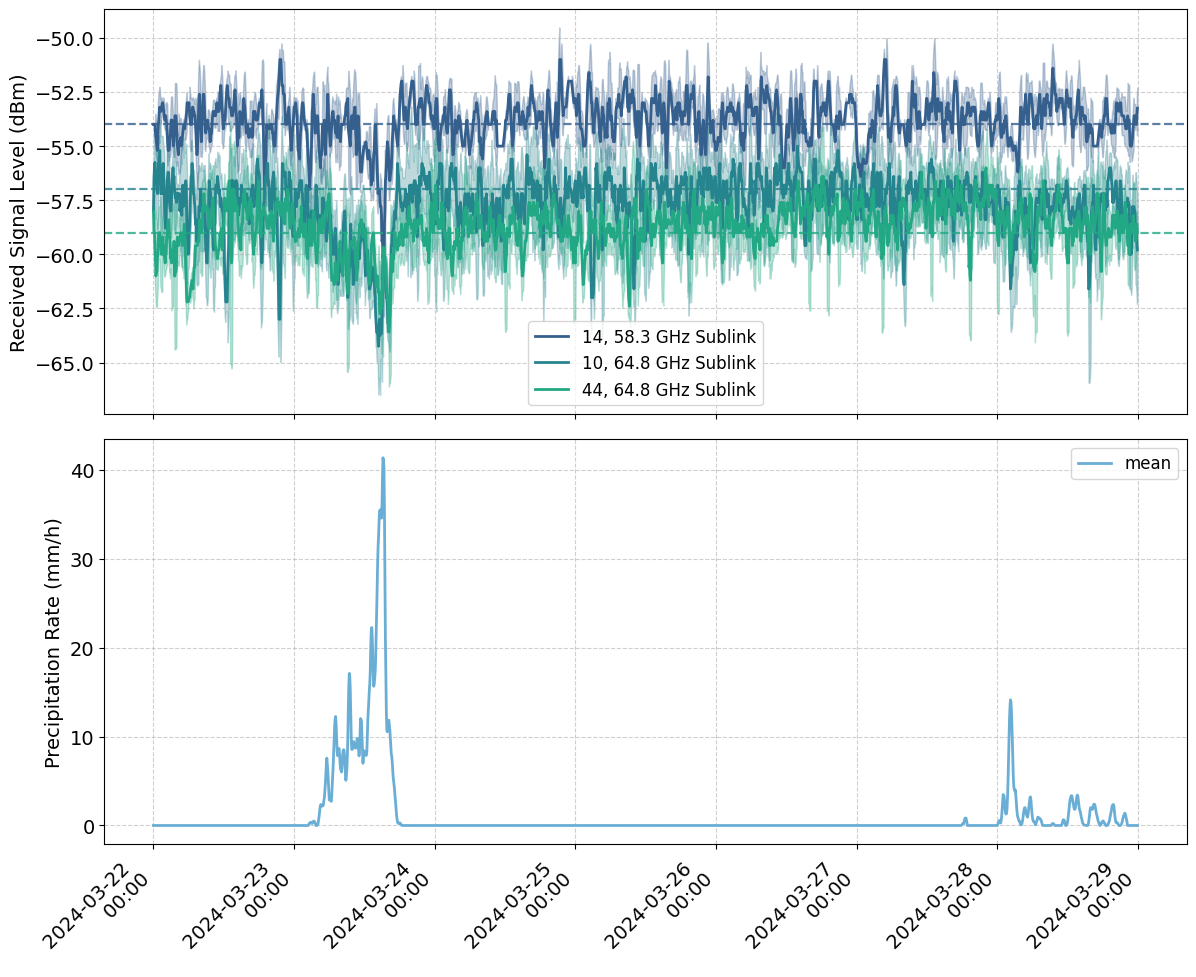

############## attenuation dry ############## 
#### baseline dry


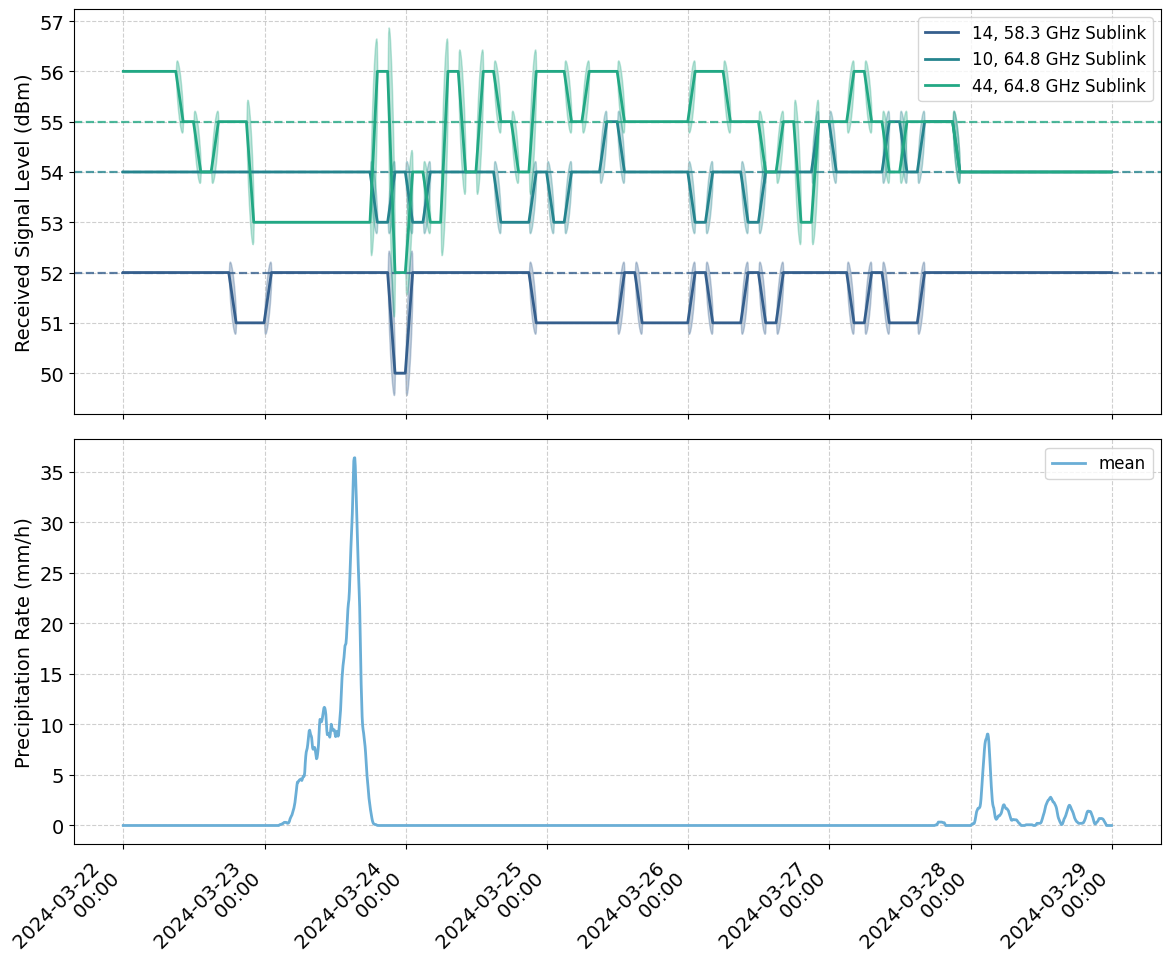

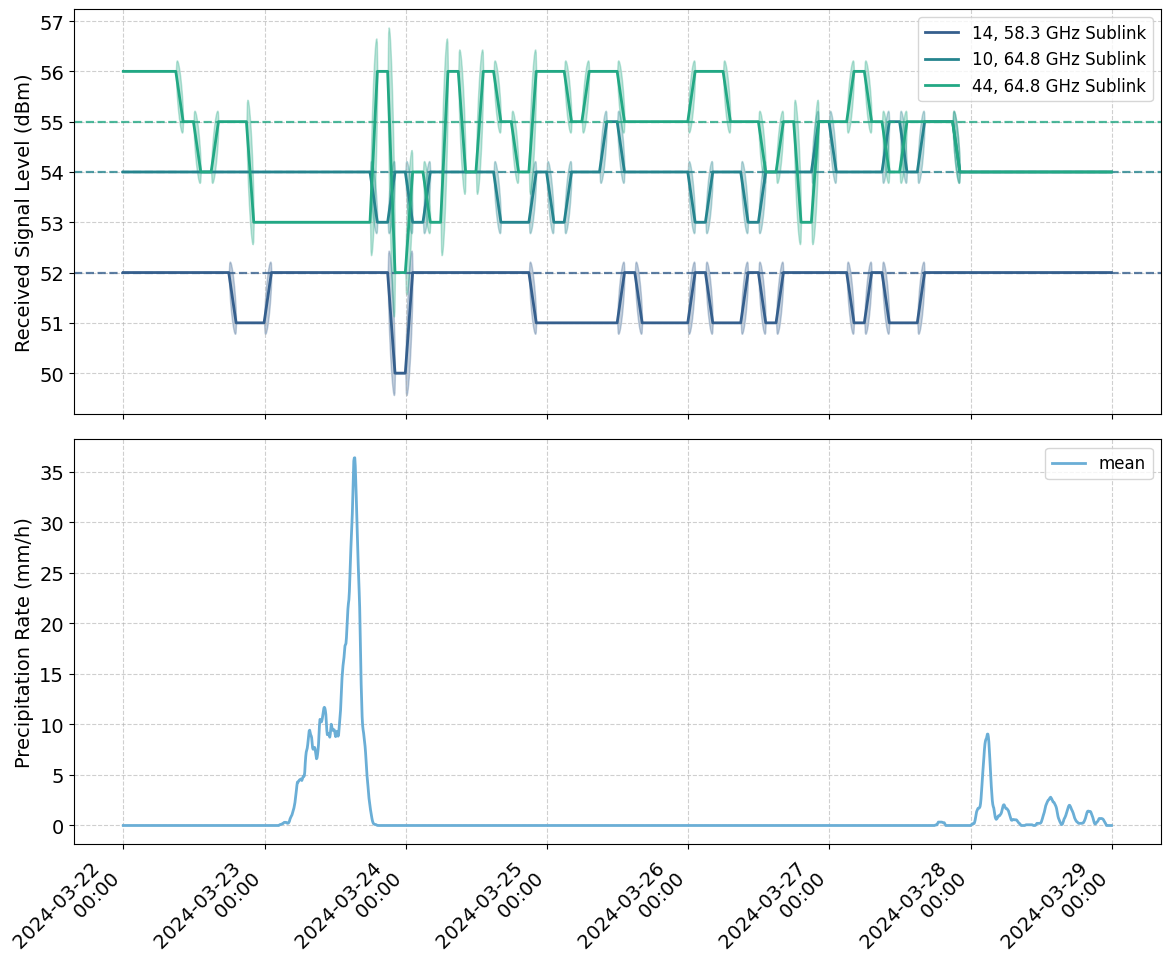

#### att dry


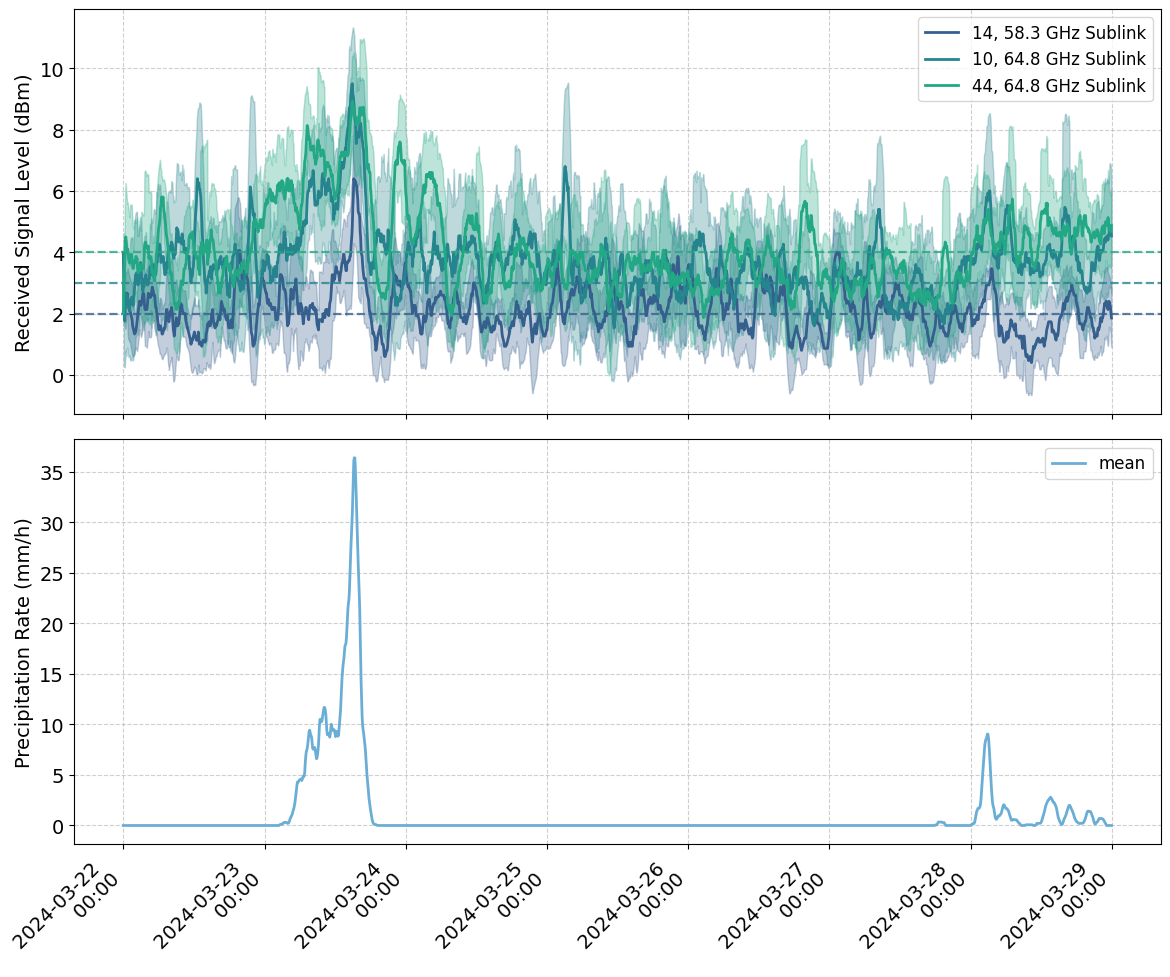

############## attenuation ############## 
#### baseline


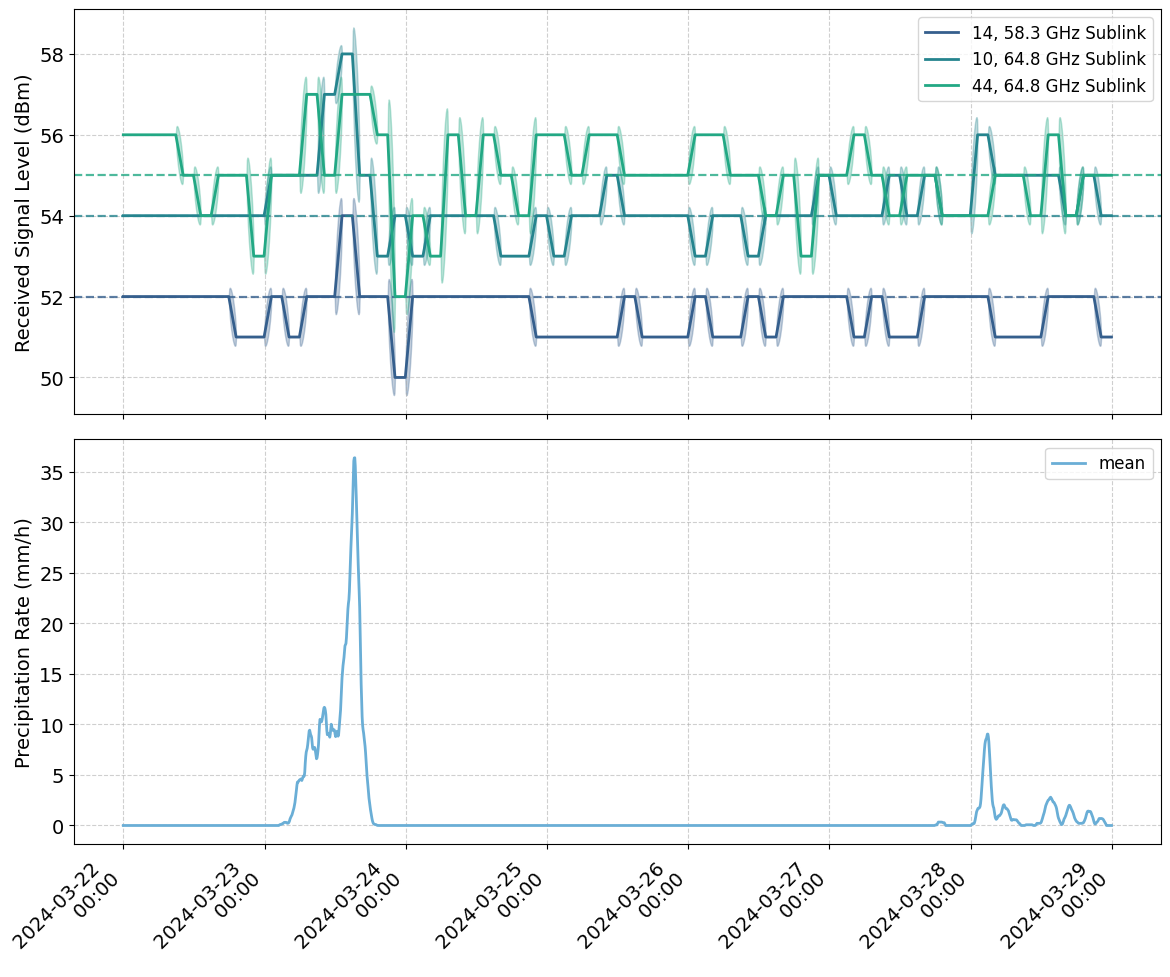

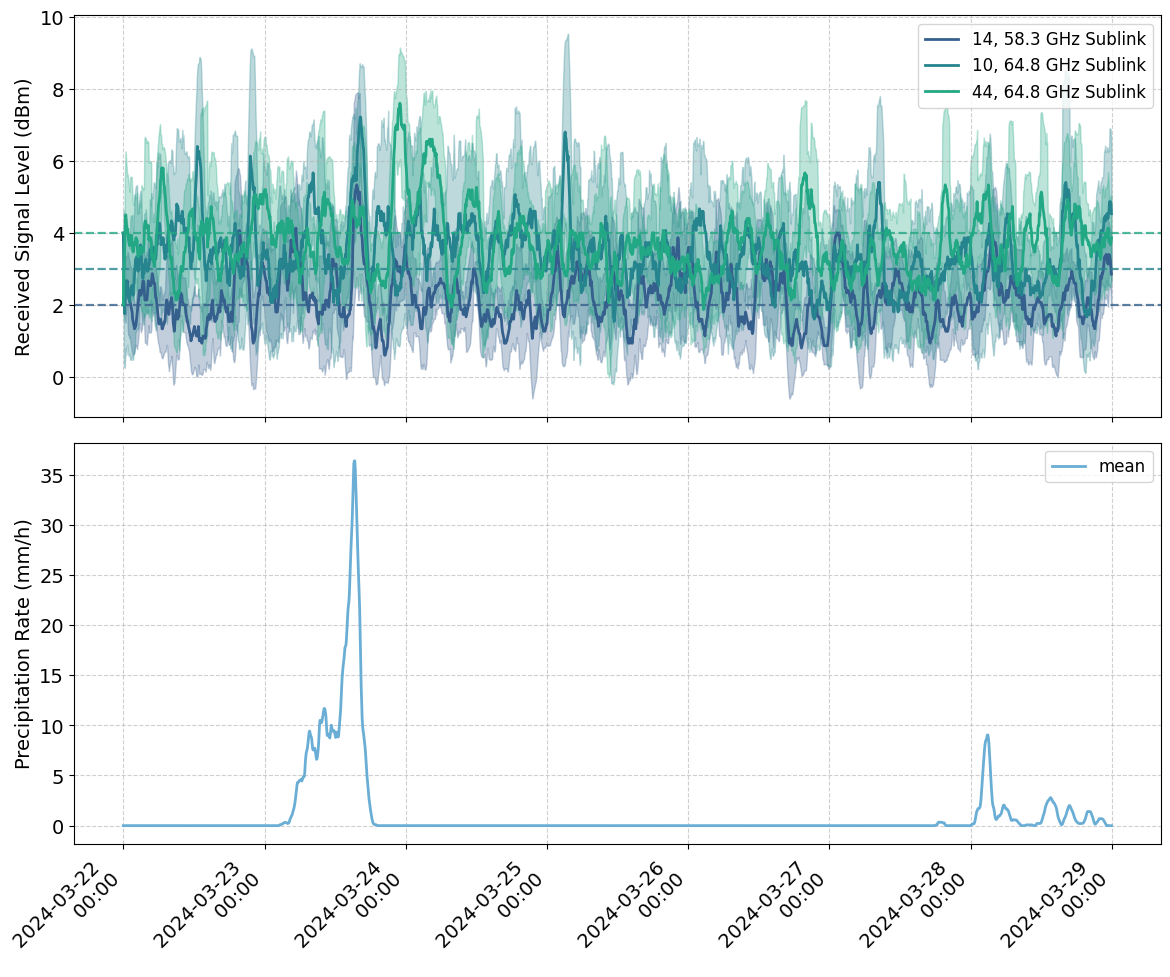

In [ ]:
# @title daily plots

length_min , length_max = 0, None
frq_min , frq_max       = 0 , None
df_signal_plot , df_meta_plot = filter_raw_meta(links_rawdata_set, links_metadata_set, length_range = (2 ,None) , freq_range= ( 0 , 20e3) )

# Now all DataFrames have Datetime as the index and are properly formatted.
day_date = '2024-03-22' #snow_days[2]
print(day_date)


# Example usage:
day = '2024-02-13' #'2024-01-16' #'2023-10-29' #'2023-11-26'
delta   = '7D'  # Defines the period (can be expanded for different time deltas)
st, end = set_dates(day_date, delta)
print("Start:", st)
print("End:", end)

###########
# noa:
day_stats = {}
df_signal_day =  links_rawdata #df_days_dict['signal'][day_date]
# Extract daily DataFrames

stats = ['Datetime'] + ['KNYNEWYO1942' ,'KNYNEWYO1942', 'KNYNEWYO1622' ,'KNYNEWYO1931' , 'KNYNEWYO1288'  ]

# df_rainy_day      = df_prec [ stats ]   # df_days_dict['rain'][day_date][stats]
df_rainy_day      = df_prec

# Call the plot function
plot_config = {    "temperature": {"plt_range": (-7, 3), "color": "tab:orange", "hline": 0},
                   "precip": {"plt_range": (-0.1, 2), "color": "tab:blue"},
                   "signal": {"plt_range": (-79, -30), "color": "black"}
}

plot_config = {
    "right_ticks_inside": False,  # Moves temperature axis ticks inside the figure
        "temperature": {"hline": 0},
           "figsize": (1, 10),
    # "temperature": {"plt_range": (-6, 1), "color": "tab:orange", "hline": 0},
    # "precip": {"plt_range": (-0.5, 2), "color": "tab:blue"},
    # "signal": {"plt_range": (-89, -20), "color": "tab:red"}

}

day = '2023-12-29' #'2024-02-13' #'2024-01-16' #'2023-10-29' #'2023-11-26'
delta   = '7D'  # Defines the period (can be expanded for different time deltas)
st, end = set_dates(day_date, delta)

##############:
selected_links = [  '14','64' ,  '105' , '65' ]
df_rainy_day      = filter_and_mean(df_prec, cols = stats)
# df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range= (1.2 ,2) , freq_range= ( 57e3 , 65e3) )
df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range= (1.2 ,2) , freq_range= ( 68e3 , 70e3) )

# df_signal_plot = filter_raw_data( df_signal_plot , selected_links)

# df_signal_plot = filter_raw_data( links_rawdata , selected_links)



selected_links = [  '14',  '10' ,  '44' , '28']
selected_links = [  '14',  '10' ,  '44' , ]
df_signal_plot = filter_raw_data( links_rawdata , selected_links)
plot_rsl_precipitation( df_rainy_day, df_signal_plot , start_dt = st , end_dt =  end
                       , meta_dict = meta_dict
                        , roll = 5
                        )


stat = 'min'
print('############## attenuation dry ############## ')
print('#### baseline dry')
data = links_att_data['baseline_dry'][stat]
df_signal_plot = filter_raw_data( data , selected_links)
plot_rsl_precipitation( df_rainy_day, df_signal_plot , start_dt = st , end_dt =  end , meta_dict = meta_dict
                        , roll = 15)
# ############
df_signal_plot = filter_raw_data( data , selected_links)
plot_rsl_precipitation( df_rainy_day, df_signal_plot , start_dt = st , end_dt =  end , meta_dict = meta_dict
                        , roll = 15)
# ###########
print('#### att dry')
data = links_att_data['att_dry'][stat]
df_signal_plot = filter_raw_data( data , selected_links)
plot_rsl_precipitation( df_rainy_day, df_signal_plot , start_dt = st , end_dt =  end , meta_dict = meta_dict
                        , roll = 15)

# #############

print('############## attenuation ############## ')
print('#### baseline')
data = links_att_data['baseline'][stat]
df_signal_plot = filter_raw_data( data , selected_links)
plot_rsl_precipitation( df_rainy_day, df_signal_plot , start_dt = st , end_dt =  end , meta_dict = meta_dict
                        , roll = 15)

# ##############
data = links_att_data['att'][stat]
df_signal_plot = filter_raw_data( data , selected_links)
plot_rsl_precipitation( df_rainy_day, df_signal_plot , start_dt = st , end_dt =  end , meta_dict = meta_dict
                        , roll = 15)




In [ ]:
# @title helper: split wet_dry

def split_wet_dry_periods(data, df_flags, time_col='Datetime', window='0.5h'):
    """
    Splits the input data DataFrame into two separate DataFrames for wet and dry periods,
    based on per-link wet/dry flags.

    Parameters:
    -----------
    data : pd.DataFrame
        Original data with datetime as index or column and numeric columns (links).
    df_flags : pd.DataFrame
        Binary wet/dry flags DataFrame with same shape as data (1=wet, 0=dry).
    time_col : str
        Name of the datetime column in data, if not index.
    window : str
        Resample window (e.g., '0.5h').

    Returns:
    --------
    tuple of pd.DataFrame
        - wet_df: DataFrame (time x links), NaNs during dry periods
        - dry_df: DataFrame (time x links), NaNs during wet periods
    """

    # Step 1: Ensure datetime alignment
    if time_col in data.columns:
        data[time_col] = pd.to_datetime(data[time_col])
        data.set_index(time_col, inplace=True)
    else:
        data.index = pd.to_datetime(data.index)

    # Step 2: Resample data to align with flags frequency clearly
    data_resampled = data.resample(window).mean()

    # Align indices clearly
    common_index = data_resampled.index.intersection(df_flags.index)
    data_resampled = data_resampled.loc[common_index]
    df_flags = df_flags.loc[common_index]

    # Step 3: Separate clearly into wet and dry DataFrames using vectorization

    wet_df = data_resampled.where(df_flags == 1)
    dry_df = data_resampled.where(df_flags == 0)

    return {'wet': wet_df, 'dry' : dry_df }


In [ ]:
# @title run: previous split signal wet/dry

# --- Your existing parameters/settings ---
data_split        =  0
init_wet_dry_dict =  1
# ---------------------------------------------------------------------
# 2) Initialize and fill a dictionary with wet/dry results
# ---------------------------------------------------------------------
 # Assume you want to create the new dictionary


window     = '0.5h'
# stat       = 'max'
# group      = '60g_frq'

# We'll look at 'frq' and 'att' keys as in your example:
dry_wet_window = {'frq', 'att' , 'att_dry' }
# ---------------------------------------------------------------------
# 1) Classify wet/dry windows if data_split is activated
# ---------------------------------------------------------------------


# 1) Create a dictionary of DataFrames, each representing a different type of link-based data

if data_split:
    wet_hours = classify_wet_window(df_weather_analysis['precip_airports'] ,
                           time_split= window,
                           threshold_mean=0.2,
                           threshold_median=0.05,
                          #  threshold_max=2
                                    )

else:
    # If not splitting, you could define wet_hours as empty or skip altogether
    links_wet_dry_window = classify_wet_windows_dict(
    links_ref,
    time_split= window,
    threshold_mean=0.05,
    threshold_median=0.02,
    threshold_max=0.7)




if init_wet_dry_dict:
    # This will hold your final split stats, mirroring the structure
    wet_dry_dict = {}

    # Loop over whichever top-level categories you want (e.g. 'frq' or 'att')
    for data_type in dry_wet_window:
        # Safety check in case 'data_type' is missing in links_att_data
        if data_type not in links_att_data:
            continue

        # We'll store results in wet_dry_dict under the same key
        wet_dry_dict[data_type] = {}

        # Explore the substructure: e.g. links_att_data['frq']['raw'][param][stat][group]
        if 'raw' not in links_att_data[data_type]:
            continue

        wet_dry_dict[data_type]['raw'] = {}

        # Now loop over all 'param' keys
        for param in links_att_data[data_type]['raw']:
            wet_dry_dict[data_type]['raw'][param] = {}

            # Loop over all 'stat' keys under each param
            for st in links_att_data[data_type]['raw'][param]:
                wet_dry_dict[data_type]['raw'][param][st] = {}

                # Loop over all 'group' keys under each stat
                for grp in links_att_data[data_type]['raw'][param][st]:
                    # This is the actual DataFrame/Series we want to split
                    analyze_data = links_att_data[data_type]['raw'][param][st][grp]

                    # -----------------------------------------------------------------
                    # 3) Split the data into wet/dry windows & compute stats
                    # -----------------------------------------------------------------
                    # df_split_g          = split_df_by_windows(analyze_data, wet_hours, time_split=window)
                    df_split            = split_wet_dry_periods(analyze_data, df_flags)
                    window_stats_dict   = compute_window_stats(df_split, time_split=window)

                    # Store the results in our wet_dry_dict with the same structure
                    wet_dry_dict[data_type]['raw'][param][st][grp] = window_stats_dict

    # At this point, wet_dry_dict has the same hierarchical keys as links_att_data
    # but contains the aggregated stats for wet/dry windows.
    # You can now use or inspect wet_dry_dict as needed.
    print("Wet/Dry dictionary structure initialized and populated:")
    # print_dict_structure(wet_dry_dict)

else:
    print("Wet/dry dictionary initialization was skipped.")


Wet/Dry dictionary structure initialized and populated:


In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_wet_dry_distribution(
    df_data, df_flags, sublinks=None,
    plot_params=None
):
    """
    Plot combined KDE distributions of Wet vs Dry periods across all sublinks.

    Parameters:
    ----------
    df_data : pd.DataFrame
        Numeric data with datetime index and sublink columns.
    df_flags : pd.DataFrame
        Binary wet/dry flags (same shape as df_data).
    sublinks : list or None
        Columns/sublinks to include. If None, includes all.
    plot_params : dict or None
        Optional plotting parameters:
        - figsize: tuple (width, height), default (10, 6)
        - palette: list of colors, default ["dodgerblue", "darkorange"]
        - alpha: float transparency (default 0.3)
        - quantiles: tuple (low, high), e.g. (0.01, 0.99), default None
        - title_size: fontsize for title (default 16)
        - label_size: fontsize for axis labels (default 14)
        - tick_size: fontsize for axis ticks (default 12)
        - grid: bool (default True)
    """
    # Default plot params
    params = {
        "figsize": (10, 6),
        "palette": ["dodgerblue", "darkorange"],
        "alpha": 0.3,
        "quantiles": None,
        "title_size": 16,
        "label_size": 14,
        "tick_size": 12,
        "grid": True
    }
    if plot_params:
        params.update(plot_params)

    if sublinks is None:
        sublinks = df_data.columns

    wet_values, dry_values = [], []

    for link in sublinks:
        if link not in df_data.columns or link not in df_flags.columns:
            continue
        data = df_data[link].dropna()
        flags = df_flags[link].reindex(data.index)

        wet_values.extend(data[flags == 1].values)
        dry_values.extend(data[flags == 0].values)

    # Apply quantile clipping if set
    if params['quantiles']:
        low, high = params['quantiles']
        combined_values = np.concatenate([wet_values, dry_values])
        low_bound, high_bound = np.quantile(combined_values, [low, high])
        wet_values = np.clip(wet_values, low_bound, high_bound)
        dry_values = np.clip(dry_values, low_bound, high_bound)

    plt.figure(figsize=params['figsize'])

    sns.kdeplot(wet_values, fill=True, color=params['palette'][0],
                alpha=params['alpha'], label='Wet')
    sns.kdeplot(dry_values, fill=True, color=params['palette'][1],
                alpha=params['alpha'], label='Dry')

    plt.title('Combined Wet vs Dry Distribution (All Sublinks)',
              fontsize=params['title_size'])
    plt.xlabel('Value', fontsize=params['label_size'])
    plt.ylabel('Density', fontsize=params['label_size'])
    plt.legend(fontsize=params['label_size'])

    plt.xticks(fontsize=params['tick_size'])
    plt.yticks(fontsize=params['tick_size'])

    if params['grid']:
        plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_resampled_distribution(
    df_data, df_flags, window='30min', stat='mean', sublinks=None,
    plot_params=None, quantiles=(0.01, 0.99), clip_zero=True
):
    """
    Plot distribution of resampled statistics (mean/median) for wet vs. dry periods.

    Parameters:
    ----------
    df_data : pd.DataFrame
        DataFrame with datetime index and numeric columns (sublinks).

    df_flags : pd.DataFrame
        Wet/dry flags DataFrame (same shape and frequency as df_data).

    window : str
        Resampling window (default '30min').

    stat : str
        Statistic to compute per window ('mean' or 'median').

    sublinks : list, optional
        List of columns/sublinks to include. Default (None) is all.

    plot_params : dict, optional
        Dictionary of plotting parameters:
            - figsize: tuple, default (10, 6)
            - palette: list, default ["dodgerblue", "darkorange"]
            - alpha: float, default 0.4
            - title: str, default None
            - labelsize: int, default 14
            - ticksize: int, default 12
            - legend_fs: int, default 12

    quantiles : tuple
        Lower and upper quantile for clipping outliers (default (0.05, 0.95)).

    clip_zero : bool
        If True, clip values below zero.
    """

    # Default plotting parameters
    plot_defaults = {
        "figsize": (10, 6),
        "palette": ["dodgerblue", "darkorange"],
        "alpha": 0.4,
        "title": None,
        "labelsize": 14,
        "ticksize": 12,
        "legend_fs": 12
    }
    if plot_params:
        plot_defaults.update(plot_params)

    # Handle sublinks gracefully
    available_sublinks = df_data.columns.intersection(df_flags.columns)
    if sublinks is not None:
        valid_sublinks = [col for col in sublinks if col in available_sublinks]
        if not valid_sublinks:
            print("No valid sublinks found; skipping plot.")
            return
    else:
        valid_sublinks = available_sublinks.tolist()

    df_data = df_data[valid_sublinks]
    df_flags = df_flags[valid_sublinks]

    # Step 1: Resample the data and flags
    if stat == 'mean':
        df_stat = df_data.resample(window).mean()
    elif stat == 'median':
        df_stat = df_data.resample(window).median()
    else:
        raise ValueError("stat must be 'mean' or 'median'")

    # Wet if any timestep within window is wet
    df_flags_window = df_flags.resample(window).max()

    # Step 2: Separate wet and dry
    wet_data = df_stat.where(df_flags_window == 1).stack().dropna()
    dry_data = df_stat.where(df_flags_window == 0).stack().dropna()

    # Skip if no data available
    if wet_data.empty and dry_data.empty:
        print("No data available for the selected sublinks after filtering; skipping plot.")
        return

    # Step 3: Clipping based on quantiles
    combined_data = pd.concat([wet_data, dry_data])
    lower_clip, upper_clip = combined_data.quantile(quantiles)

    wet_data = wet_data.clip(lower=lower_clip, upper=upper_clip)
    dry_data = dry_data.clip(lower=lower_clip, upper=upper_clip)

    if clip_zero:
        wet_data = wet_data.clip(lower=0)
        dry_data = dry_data.clip(lower=0)

    # Step 4: Plot distributions
    plt.figure(figsize=plot_defaults["figsize"])
    if not wet_data.empty:
        sns.kdeplot(wet_data, fill=True, color=plot_defaults["palette"][0],
                    alpha=plot_defaults["alpha"], label='Wet Periods')
    if not dry_data.empty:
        sns.kdeplot(dry_data, fill=True, color=plot_defaults["palette"][1],
                    alpha=plot_defaults["alpha"], label='Dry Periods')

    plt.xlabel(f'{stat.capitalize()} Value per {window} Window', fontsize=plot_defaults["labelsize"])
    plt.ylabel('Density', fontsize=plot_defaults["labelsize"])

    title = plot_defaults["title"] or f'Distribution of {stat.capitalize()} Values ({window} windows)'
    plt.title(title, fontsize=plot_defaults["labelsize"] + 2)

    plt.legend(fontsize=plot_defaults["legend_fs"])
    plt.xticks(fontsize=plot_defaults["ticksize"])
    plt.yticks(fontsize=plot_defaults["ticksize"])
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


In [ ]:
# @title helpers : data plots

def filter_raw_meta_nested(df_nested_dict, df_meta, length_range=(None, None), freq_range=(None, None)):
    """
    Filters each DataFrame in a nested dictionary based on length and frequency,
    using a shared metadata DataFrame.

    Parameters
    ----------
    df_nested_dict : dict
        Dictionary with DataFrames as values, e.g.,
        {
            'att': df_att,
            'att_dry': df_att_dry,
            'baseline': df_baseline,
            ...
        }
    df_meta : pd.DataFrame
        Metadata DataFrame with columns ['sublink_id', 'frequency', 'length'].

    length_range : tuple (min_length, max_length), optional
        Length range filter.

    freq_range : tuple (min_freq, max_freq), optional
        Frequency range filter.

    Returns
    -------
    filtered_dict : dict
        Dictionary with filtered DataFrames.
    df_meta_filtered : pd.DataFrame
        Filtered metadata DataFrame.

    Example
    -------
    filtered_data, filtered_meta = filter_raw_meta_nested(
        df_nested_dict,
        df_meta,
        length_range=(0.5, None),
        freq_range=(1e3, 10e3)
    )
    """
    # First filter the metadata once
    min_length, max_length = length_range
    min_freq, max_freq = freq_range

    df_meta_filtered = df_meta.copy()

    if min_length is not None:
        df_meta_filtered = df_meta_filtered[df_meta_filtered["length"] >= min_length]
    if max_length is not None:
        df_meta_filtered = df_meta_filtered[df_meta_filtered["length"] <= max_length]

    if min_freq is not None:
        df_meta_filtered = df_meta_filtered[df_meta_filtered["frequency"] >= min_freq]
    if max_freq is not None:
        df_meta_filtered = df_meta_filtered[df_meta_filtered["frequency"] <= max_freq]

    valid_sublinks = df_meta_filtered["sublink_id"].astype(str).unique()

    filtered_dict = {}
    for key, df in df_nested_dict.items():
        df_filtered = df.copy()

        if "Datetime" in df_filtered.columns:
            keep_cols = ["Datetime"] + [c for c in df_filtered.columns if c in valid_sublinks]
            df_filtered = df_filtered[keep_cols]
        else:
            keep_cols = [c for c in df_filtered.columns if c in valid_sublinks]
            df_filtered = df_filtered[keep_cols]

        filtered_dict[key] = df_filtered

    return filtered_dict, df_meta_filtered

def plot_resampled_distribution(
    df_data, df_flags, window='30min', stat='mean', sublinks=None,
    plot_params=None, quantiles=(0.01, 0.99), clip_zero=True,
    xlim=None
):
    """
    Plot distribution of resampled statistics (mean/median) for wet vs. dry periods.

    Parameters:
    ----------
    df_data : pd.DataFrame
        DataFrame with datetime index and numeric columns (sublinks).

    df_flags : pd.DataFrame
        Wet/dry flags DataFrame (same shape and frequency as df_data).

    window : str
        Resampling window (default '30min').

    stat : str
        Statistic to compute per window ('mean' or 'median').

    sublinks : list, optional
        List of columns/sublinks to include. Default (None) is all.

    plot_params : dict, optional
        Dictionary of plotting parameters:
            - figsize: tuple, default (10, 6)
            - palette: list, default ["dodgerblue", "darkorange"]
            - alpha: float, default 0.4
            - title: str, default None
            - labelsize: int, default 14
            - ticksize: int, default 12
            - legend_fs: int, default 12

    quantiles : tuple
        Lower and upper quantile for clipping outliers (default (0.05, 0.95)).

    clip_zero : bool
        If True, clip values below zero.

    xlim : tuple, optional
        Range for x-axis (xmin, xmax). Default is None (auto).
    """

    plot_defaults = {
        "figsize": (10, 6),
        "palette": ["dodgerblue", "darkorange"],
        "alpha": 0.4,
        "title": None,
        "labelsize": 14,
        "ticksize": 12,
        "legend_fs": 12
    }

    if plot_params:
        plot_defaults.update(plot_params)

    available_sublinks = df_data.columns.intersection(df_flags.columns)
    if sublinks is not None:
        valid_sublinks = [col for col in sublinks if col in available_sublinks]
        if not valid_sublinks:
            print("No valid sublinks found; skipping plot.")
            return
    else:
        valid_sublinks = available_sublinks.tolist()

    df_data = df_data[valid_sublinks]
    df_flags = df_flags[valid_sublinks]

    if stat == 'mean':
        df_stat = df_data.resample(window).mean()
    elif stat == 'median':
        df_stat = df_data.resample(window).median()
    else:
        raise ValueError("stat must be 'mean' or 'median'")

    df_flags_window = df_flags.resample(window).max()

    wet_data = df_stat.where(df_flags_window == 1).stack().dropna()
    dry_data = df_stat.where(df_flags_window == 0).stack().dropna()

    if wet_data.empty and dry_data.empty:
        print("No data available for the selected sublinks after filtering; skipping plot.")
        return

    combined_data = pd.concat([wet_data, dry_data])
    lower_clip, upper_clip = combined_data.quantile(quantiles)

    wet_data = wet_data.clip(lower=lower_clip, upper=upper_clip)
    dry_data = dry_data.clip(lower=lower_clip, upper=upper_clip)

    if clip_zero:
        wet_data = wet_data[wet_data >= 0]
        dry_data = dry_data[dry_data >= 0]

    plt.figure(figsize=plot_defaults["figsize"])

    if not wet_data.empty:
        sns.kdeplot(wet_data, fill=True, color=plot_defaults["palette"][0],
                    alpha=plot_defaults["alpha"], label='Wet Periods')
    if not dry_data.empty:
        sns.kdeplot(dry_data, fill=True, color=plot_defaults["palette"][1],
                    alpha=plot_defaults["alpha"], label='Dry Periods')

    plt.xlabel(f'{stat.capitalize()} Value per {window} Window', fontsize=plot_defaults["labelsize"])
    plt.ylabel('Density', fontsize=plot_defaults["labelsize"])

    title = plot_defaults["title"] or f'Distribution of {stat.capitalize()} Values ({window} windows)'
    plt.title(title, fontsize=plot_defaults["labelsize"] + 2)

    plt.legend(fontsize=plot_defaults["legend_fs"])
    plt.xticks(fontsize=plot_defaults["ticksize"])
    plt.yticks(fontsize=plot_defaults["ticksize"])
    plt.grid(True, linestyle='--', alpha=0.6)

    if xlim:
        plt.xlim(xlim)

    plt.tight_layout()
    plt.show()
def update_dict(original_dict, add_value=None, drop_keys=None, where='after'):
    """
    Creates a new dictionary from `original_dict` by appending or prepending `add_value`
    to each value and optionally dropping specified keys.

    Parameters
    ----------
    original_dict : dict
        The source dictionary (e.g., {'70g_frq': '68.0-69.5', ...}).
    add_value : str or None
        A string to add to each dict value (e.g., ' GHz').
        If None or an empty string, values remain unchanged.
    drop_keys : list or None
        Keys to exclude from the new dictionary. If None, no keys are dropped.
    where : {'after','before'}, default 'after'
        Controls whether to add `add_value` before or after each original value.
        - 'after': "<value> <add_value>"
        - 'before': "<add_value> <value>"

    Returns
    -------
    dict
        A new dictionary with updated values and possibly dropped keys.
    """
    if drop_keys is None:
        drop_keys = []

    new_dict = {}
    for key, val in original_dict.items():
        if key in drop_keys:
            continue

        if add_value:
            if where == 'before':
                new_val = f"{add_value}{val}"
            else:  # default 'after'
                new_val = f"{val}{add_value}"
        else:
            # If add_value is None or empty string, just leave val as is
            new_val = val

        new_dict[key] = new_val

    return new_dict


In [ ]:


def plot_resampled_distribution_dict(
    data_dict,
    df_flags,
    window='10min',
    stat='mean',  # can be 'mean','median','std'
    sublinks=None,
    plot_params=None,
    quantiles=(0.01, 0.99),
    clip_zero=True,
    xlim=None,
    legend_statistics=None,
    skip_keys=None,
    horizontal_multiplot=False,
    x_vals=None,
    legend_loc_distribution='upper left',
    legend_loc_stats='upper right'
):
    """
    Plot resampled distributions for each frequency key in data_dict, distinguishing wet vs. dry.

    This version supports:
      1) skip_keys: list of keys to skip entirely.
      2) horizontal_multiplot: if True, all frequency keys are plotted side-by-side in one figure.
      3) No automatic title unless plot_params['title'] is given.
      4) x_vals for custom x-axis ticks:
         - if x_vals is a list, we use those as positions (labels=positions too)
         - if x_vals is a dict, we use keys as positions and values as labels.
      5) legend_loc_distribution, legend_loc_stats: custom legend positions.
      6) If user does not provide a y_label, we default to "Density".

    Two separate legend boxes per subplot:
      - One for Distributions ("Wet Periods", "Dry Periods").
      - (Optional) Another for Statistics ("Wet mean=...", "Dry mean=...", etc.).

    Parameters
    ----------
    data_dict : dict
        Dictionary with freq keys, each containing a DataFrame.
        e.g.: {'freq_5g': df_5g, 'freq_70g': df_70g}.

    df_flags : pd.DataFrame
        0=dry, 1=wet, same shape as the data frames.

    window : str, default '10min'
        Resampling window.

    stat : {'mean','median','std'}, default 'mean'
        Aggregation statistic for each window.

    sublinks : list, optional
        Columns to include. If None, uses intersection.

    plot_params : dict, optional
        - figsize: (W,H)
        - palette: [wet_color, dry_color] or vice versa.
        - alpha: float
        - labelsize: int
        - ticksize: int
        - legend_fs: int
        - x_label, y_label, title (if None, y_label defaults to "Density" and no title)

    quantiles : tuple, default (0.01, 0.99)
        For clipping outliers.

    clip_zero : bool, default True
        If True, negative values are clipped to 0.

    xlim : tuple, optional
        (xmin, xmax)

    legend_statistics : list of str, default None
        e.g.: ['mean','median','std'].

    skip_keys : list of str, optional
        If provided, these keys in data_dict will be skipped.

    horizontal_multiplot : bool, default False
        If True, plot all keys horizontally on subplots in one figure.
        If False, each key is plotted in its own figure.

    x_vals : list or dict, optional
        If a list, we use these as the x-tick positions/labels.
        If a dict, we use keys as positions, values as labels.

    legend_loc_distribution : str, default 'upper left'
        Matplotlib legend location for the distributions.

    legend_loc_stats : str, default 'upper right'
        Matplotlib legend location for the statistics.

    Returns
    -------
    None
        Displays a plot (or multiple) for each freq key.
    """

    # Default plot parameters
    plot_defaults = {
        "figsize": (10, 6),
        "palette": ["dodgerblue", "darkorange"],
        "alpha": 0.4,
        "labelsize": 14,
        "ticksize": 12,
        "legend_fs": 12,
        "x_label": None,
        "y_label": None,
        "title": None
    }
    if plot_params:
        plot_defaults.update(plot_params)

    def create_dummy_handle(color, linestyle='-', linewidth=2):
        # Used for the stats legend only
        h, = plt.plot([], [], color=color, linestyle=linestyle, linewidth=linewidth)
        return h

    # Build a list of (freq_key, df_data) to plot (skipping keys if requested)
    keys_to_plot = []
    for k, df_d in data_dict.items():
        if skip_keys and (k in skip_keys):
            print(f"Skipping key '{k}' by user request.")
            continue
        keys_to_plot.append((k, df_d))

    if not keys_to_plot:
        print("No keys to plot after skipping.")
        return

    def plot_single(ax, freq_key, df_data):
        # sublinks intersection
        available_sublinks = df_data.columns.intersection(df_flags.columns)
        if sublinks is not None:
            valid_sublinks = [col for col in sublinks if col in available_sublinks]
            if len(valid_sublinks) == 0:
                print(f"No valid sublinks for '{freq_key}'. Skipping.")
                return
        else:
            valid_sublinks = available_sublinks.tolist()

        df_data2 = df_data[valid_sublinks]
        df_flags2 = df_flags[valid_sublinks]

        if df_data2.empty:
            print(f"'{freq_key}' has empty data after sublink filtering. Skipping.")
            return

        # Resample & compute statistic
        df_stat = df_data2.resample(window).agg(stat)
        df_flags_window = df_flags2.resample(window).max()

        # Separate wet vs dry
        wet_data = df_stat.where(df_flags_window == 1).stack().dropna()
        dry_data = df_stat.where(df_flags_window == 0).stack().dropna()

        if wet_data.empty and dry_data.empty:
            print(f"'{freq_key}' has no data after wet/dry separation. Skipping.")
            return

        # Clip outliers
        combined_data = pd.concat([wet_data, dry_data])
        lower_clip, upper_clip = combined_data.quantile(quantiles)
        wet_data = wet_data.clip(lower=lower_clip, upper=upper_clip)
        dry_data = dry_data.clip(lower=lower_clip, upper=upper_clip)

        if clip_zero:
            wet_data = wet_data.clip(lower=0)
            dry_data = dry_data.clip(lower=0)

        wet_color = plot_defaults["palette"][0]
        dry_color = plot_defaults["palette"][1]

        # We'll sharpen the kde by reducing bandwidth (bw_adjust=0.5) and reduce domain expansion (cut=1)
        if not wet_data.empty:
            sns.kdeplot(
                wet_data,
                fill=True,
                color=wet_color,
                alpha=plot_defaults["alpha"],
                label="Wet Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )
        if not dry_data.empty:
            sns.kdeplot(
                dry_data,
                fill=True,
                color=dry_color,
                alpha=plot_defaults["alpha"],
                label="Dry Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )

        # Legend for distributions
        dist_handles, dist_labels = ax.get_legend_handles_labels()
        dist_legend = ax.legend(
            dist_handles,
            dist_labels,
            loc=legend_loc_distribution,
            fontsize=plot_defaults["legend_fs"],
            # title="Distributions"
        )
        ax.add_artist(dist_legend)

        # Legend for stats (if needed)
        stats_handles = []
        stats_labels = []

        if legend_statistics:
            # compute stats
            wet_stats_map = {}
            if not wet_data.empty:
                for s in legend_statistics:
                    s_lower = s.lower()
                    val = None
                    if s_lower == 'mean':
                        val = wet_data.mean()
                    elif s_lower == 'median':
                        val = wet_data.median()
                    elif s_lower == 'std':
                        val = wet_data.std()
                    if val is not None:
                        wet_stats_map[s_lower] = f'{val:.2f}'

            dry_stats_map = {}
            if not dry_data.empty:
                for s in legend_statistics:
                    s_lower = s.lower()
                    val = None
                    if s_lower == 'mean':
                        val = dry_data.mean()
                    elif s_lower == 'median':
                        val = dry_data.median()
                    elif s_lower == 'std':
                        val = dry_data.std()
                    if val is not None:
                        dry_stats_map[s_lower] = f'{val:.2f}'

            # build the stats legend rows
            for s in legend_statistics:
                s_lower = s.lower()
                wet_label = None
                dry_label = None

                if s_lower in wet_stats_map:
                    wet_label = f"Wet {s_lower}={wet_stats_map[s_lower]}"
                if s_lower in dry_stats_map:
                    dry_label = f"Dry {s_lower}={dry_stats_map[s_lower]}"

                if wet_label:
                    stats_handles.append(create_dummy_handle(wet_color))
                    stats_labels.append(wet_label)
                if dry_label:
                    stats_handles.append(create_dummy_handle(dry_color))
                    stats_labels.append(dry_label)

            if stats_handles:
                stats_legend = ax.legend(
                    stats_handles,
                    stats_labels,
                    loc=legend_loc_stats,
                    fontsize=plot_defaults["legend_fs"],
                    # title="Statistics",
                    ncol=2
                )

        # If data is strictly >=0, set xlim left=0
        combined_min = min(wet_data.min(), dry_data.min())
        if combined_min >= 0:
            ax.set_xlim(left=0)

        # Axis labeling
        x_label = plot_defaults["x_label"]
        # If user didn't provide y_label, default to 'Density'
        y_label = plot_defaults["y_label"] if plot_defaults["y_label"] else "Density"
        title_text = plot_defaults["title"]  # Default None => no title

        # X label
        if x_label:
            ax.set_xlabel(x_label, fontsize=plot_defaults["labelsize"])
        else:
            ax.set_xlabel("", fontsize=plot_defaults["labelsize"])

        # Y label (defaults to 'Density' if user not provided)
        ax.set_ylabel(y_label, fontsize=plot_defaults["labelsize"])

        # Only set title if user specified
        if title_text:
            ax.set_title(title_text, fontsize=plot_defaults["labelsize"] + 2)

        # user xlim overrides
        if xlim:
            ax.set_xlim(xlim)

        # user xlim overrides
        if xlim:
            ax.set_xlim(xlim)

        # If x_vals is a dict, we interpret that as {freq_key -> custom x-label}
        if isinstance(x_vals, dict):
            if freq_key in x_vals:
                ax.set_xlabel(x_vals[freq_key], fontsize=plot_defaults["labelsize"])
        else:
            # Just default to tick params on x
            ax.tick_params(axis='x', labelsize=plot_defaults["ticksize"])

        ax.tick_params(axis='y', labelsize=plot_defaults["ticksize"])
        ax.grid(True, linestyle='--', alpha=0.6)

    # If horizontal_multiplot, one figure with subplots
    if horizontal_multiplot:
        fig, axes = plt.subplots(1, len(keys_to_plot), figsize=plot_defaults["figsize"], squeeze=False)
        axes = axes.flatten()
        for i, (freq_key, df_data) in enumerate(keys_to_plot):
            plot_single(axes[i], freq_key, df_data)
        plt.tight_layout()
        plt.show()
    else:
        # Single figure per freq_key
        for freq_key, df_data in keys_to_plot:
            fig, ax = plt.subplots(figsize=plot_defaults["figsize"])
            plot_single(ax, freq_key, df_data)
            plt.tight_layout()
            plt.show()


def plot_resampled_distribution_dict(
    data_dict,
    df_flags,
    window='10min',
    stat='mean',  # can be 'mean','median','std'
    sublinks=None,
    plot_params=None,
    quantiles=(0.01, 0.99),
    clip_zero=True,
    xlim=None,
    legend_statistics=None,
    skip_keys=None,
    horizontal_multiplot=False,
    x_vals=None,
    legend_loc_distribution='upper left',
    legend_loc_stats='upper right'
):
    """
    Plot resampled distributions for each frequency key in data_dict, distinguishing wet vs. dry.

    - skip_keys: לדלג על מפתחות (freq_key) לא רצויים.
    - horizontal_multiplot: לצייר ב־subplot-ים רוחביים.
    - x_vals:
        * אם הוא list, משתמשים בו כעמדות וכתוויות מספריות של ציר ה־x.
        * אם הוא dict, ו־freq_key מופיע, משתמשים בערך בתור כותרת ציר ה־x (xlabel).
    - No title by default; אם plot_params["title"] קיים – נשתמש בו.
    - y_label ברירת מחדל: “Density” אם לא צוין אחרת.
    """

    # Default plot parameters
    plot_defaults = {
        "figsize": (10, 6),
        "palette": ["dodgerblue", "darkorange"],
        "alpha": 0.4,
        "labelsize": 14,
        "ticksize": 15,
        "legend_fs": 14,
        "x_label": None,  # global default X label (None => no label)
        "y_label": None,  # if None => "Density"
        "title": None     # if None => no title
    }
    if plot_params:
        plot_defaults.update(plot_params)

    def create_dummy_handle(color, linestyle='-', linewidth=2):
        # Used for the stats legend only
        h, = plt.plot([], [], color=color, linestyle=linestyle, linewidth=linewidth)
        return h

    # Build a list of (freq_key, df_data) to plot (skipping keys if requested)
    keys_to_plot = []
    for k, df_d in data_dict.items():
        if skip_keys and (k in skip_keys):
            print(f"Skipping key '{k}' by user request.")
            continue
        keys_to_plot.append((k, df_d))

    if not keys_to_plot:
        print("No keys to plot after skipping.")
        return

    def plot_single(ax, freq_key, df_data):
        # sublinks intersection
        available_sublinks = df_data.columns.intersection(df_flags.columns)
        if sublinks is not None:
            valid_sublinks = [col for col in sublinks if col in available_sublinks]
            if len(valid_sublinks) == 0:
                print(f"No valid sublinks for '{freq_key}'. Skipping.")
                return
        else:
            valid_sublinks = available_sublinks.tolist()

        df_data2 = df_data[valid_sublinks]
        df_flags2 = df_flags[valid_sublinks]

        if df_data2.empty:
            print(f"'{freq_key}' has empty data after sublink filtering. Skipping.")
            return

        # Resample & compute statistic
        df_stat = df_data2.resample(window).agg(stat)
        df_flags_window = df_flags2.resample(window).max()

        # Separate wet vs dry
        wet_data = df_stat.where(df_flags_window == 1).stack().dropna()
        dry_data = df_stat.where(df_flags_window == 0).stack().dropna()

        if wet_data.empty and dry_data.empty:
            print(f"'{freq_key}' has no data after wet/dry separation. Skipping.")
            return

        # Clip outliers
        combined_data = pd.concat([wet_data, dry_data])
        lower_clip, upper_clip = combined_data.quantile(quantiles)
        wet_data = wet_data.clip(lower=lower_clip, upper=upper_clip)
        dry_data = dry_data.clip(lower=lower_clip, upper=upper_clip)

        if clip_zero:
            wet_data = wet_data.clip(lower=0)
            dry_data = dry_data.clip(lower=0)

        wet_color = plot_defaults["palette"][0]
        dry_color = plot_defaults["palette"][1]

        # We'll sharpen the kde by reducing bandwidth (bw_adjust=0.5) & domain expansion (cut=1)
        if not wet_data.empty:
            sns.kdeplot(
                wet_data,
                fill=True,
                color=wet_color,
                alpha=plot_defaults["alpha"],
                label="Wet Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )
        if not dry_data.empty:
            sns.kdeplot(
                dry_data,
                fill=True,
                color=dry_color,
                alpha=plot_defaults["alpha"],
                label="Dry Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )

        # Legend for distributions
        dist_handles, dist_labels = ax.get_legend_handles_labels()
        dist_legend = ax.legend(
            dist_handles,
            dist_labels,
            loc=legend_loc_distribution,
            fontsize=plot_defaults["legend_fs"],
            # title="Distributions"
        )
        ax.add_artist(dist_legend)

        # Legend for stats (if needed)
        stats_handles = []
        stats_labels = []

        if legend_statistics:
            # compute stats
            wet_stats_map = {}
            if not wet_data.empty:
                for s in legend_statistics:
                    s_lower = s.lower()
                    val = None
                    if s_lower == 'mean':
                        val = wet_data.mean()
                    elif s_lower == 'median':
                        val = wet_data.median()
                    elif s_lower == 'std':
                        val = wet_data.std()
                    if val is not None:
                        wet_stats_map[s_lower] = f'{val:.2f}'

            dry_stats_map = {}
            if not dry_data.empty:
                for s in legend_statistics:
                    s_lower = s.lower()
                    val = None
                    if s_lower == 'mean':
                        val = dry_data.mean()
                    elif s_lower == 'median':
                        val = dry_data.median()
                    elif s_lower == 'std':
                        val = dry_data.std()
                    if val is not None:
                        dry_stats_map[s_lower] = f'{val:.2f}'

            # build the stats legend rows
            for s in legend_statistics:
                s_lower = s.lower()
                wet_label = None
                dry_label = None

                if s_lower in wet_stats_map:
                    wet_label = f"Wet {s_lower}={wet_stats_map[s_lower]}"
                if s_lower in dry_stats_map:
                    dry_label = f"Dry {s_lower}={dry_stats_map[s_lower]}"

                if wet_label:
                    stats_handles.append(create_dummy_handle(wet_color))
                    stats_labels.append(wet_label)
                if dry_label:
                    stats_handles.append(create_dummy_handle(dry_color))
                    stats_labels.append(dry_label)

            if stats_handles:
                stats_legend = ax.legend(
                    stats_handles,
                    stats_labels,
                    loc=legend_loc_stats,
                    fontsize=plot_defaults["legend_fs"],
                    # title="Statistics",
                    ncol=2
                )

        # If data is strictly >=0, set xlim left=0
        combined_min = min(wet_data.min(), dry_data.min())
        if combined_min >= 0:
            ax.set_xlim(left=0)

        # user xlim overrides
        if xlim:
            ax.set_xlim(xlim)

        # Axis labeling
        # 1) y_label: default 'Density' if not specified
        default_y_label = "Density"
        y_label = plot_defaults["y_label"] if plot_defaults["y_label"] else default_y_label
        ax.set_ylabel(y_label, fontsize=plot_defaults["labelsize"])

        # 2) x_label is from plot_params, but if None => check if x_vals is dict => override from x_vals
        global_x_label = plot_defaults["x_label"]  # user might have passed something
        custom_x_label = None

        if isinstance(x_vals, dict) and freq_key in x_vals:
            # user specified an override for this freq_key
            custom_x_label = x_vals[freq_key]

        if global_x_label:
            # prefer the global x_label if given
            ax.set_xlabel(global_x_label, fontsize=plot_defaults["labelsize"])
        elif custom_x_label:
            # else if there's a per-freq_key label
            ax.set_xlabel(custom_x_label, fontsize=plot_defaults["labelsize"])
        else:
            # else leave it blank
            ax.set_xlabel("", fontsize=plot_defaults["labelsize"])

        # 3) Title
        # Only set title if user specified
        if plot_defaults["title"]:
            ax.set_title(plot_defaults["title"], fontsize=plot_defaults["labelsize"] + 2)

        # 4) Ticks font size
        ax.tick_params(axis='x', labelsize=plot_defaults["ticksize"])
        ax.tick_params(axis='y', labelsize=plot_defaults["ticksize"])
        ax.grid(True, linestyle='--', alpha=0.6)

        # 5) if x_vals is a list => explicit numeric tick positions
        if isinstance(x_vals, list):
            ax.set_xticks(x_vals)
            ax.set_xticklabels(x_vals, fontsize=plot_defaults["ticksize"])

    # Main logic: either horizontal_multiplot or separate figures
    if horizontal_multiplot:
        fig, axes = plt.subplots(1, len(keys_to_plot), figsize=plot_defaults["figsize"], squeeze=False)
        axes = axes.flatten()
        for i, (freq_key, df_data) in enumerate(keys_to_plot):
            plot_single(axes[i], freq_key, df_data)
        plt.tight_layout()
        plt.show()
    else:
        # Single figure per freq_key
        for freq_key, df_data in keys_to_plot:
            fig, ax = plt.subplots(figsize=plot_defaults["figsize"])
            plot_single(ax, freq_key, df_data)
            plt.tight_layout()
            plt.show()


# @title
def split_wet_dry_periods(data, df_flags, time_col='Datetime', window='0.5h'):
    if time_col in data.columns:
        data[time_col] = pd.to_datetime(data[time_col])
        data.set_index(time_col, inplace=True)
    else:
        data.index = pd.to_datetime(data.index)

    # Resample and minimally fill NaNs
    data_resampled = data.resample(window).mean().ffill(limit=1)

    # Ensure indices match precisely
    common_index = data_resampled.index.intersection(df_flags.index)
    data_resampled = data_resampled.loc[common_index]
    df_flags = df_flags.loc[common_index]

    wet_df = data_resampled.where(df_flags == 1)
    dry_df = data_resampled.where(df_flags == 0)

    return {'wet': wet_df, 'dry': dry_df}

def compute_window_stats(input_data, time_split='1h'):
    def _compute_stats_for_df(df, freq):
        if 'Datetime' in df.columns:
            df = df.copy()
            df['Datetime'] = pd.to_datetime(df['Datetime'])
            df.set_index('Datetime', inplace=True)
        else:
            df.index = pd.to_datetime(df.index, errors='coerce')

        df['window'] = df.index.floor(freq)
        stats = df.groupby('window').agg(['mean', 'std'])
        df.drop('window', axis=1, inplace=True)  # Cleanup optional but tidy
        return stats

    if isinstance(input_data, pd.DataFrame):
        return _compute_stats_for_df(input_data, time_split)
    elif isinstance(input_data, dict):
        out = {}
        for k, df in input_data.items():
            out[k] = _compute_stats_for_df(df, time_split)
        return out
    else:
        raise ValueError("input_data must be a DataFrame or dict of DataFrames")





In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_resampled_distribution_dict(
    data_dict,
    df_flags,
    window='10min',
    stat='mean',  # can be 'mean','median','std'
    sublinks=None,
    plot_params=None,
    quantiles=(0.01, 0.99),
    clip_zero=True,
    xlim=None,
    legend_statistics=None,
    skip_keys=None,
    horizontal_multiplot=False,
    x_vals=None,
    legend_loc_distribution='upper left',
    legend_loc_stats='upper right',
    print_table=False
):
    """
    Plot resampled distributions for each frequency key in data_dict, distinguishing wet vs. dry.

    Additional Features:
    --------------------
    - skip_keys : list of freq_key to skip plotting.
    - horizontal_multiplot : bool, if True, plot all freq_key subplots horizontally in one figure.
    - x_vals :
        * If list, uses them as x tick positions/labels.
        * If dict, and freq_key is in it, use that as x-label for the subplot.
    - legend_loc_distribution : str, location for the main distributions legend.
    - legend_loc_stats : str, location for the statistics legend.
    - print_table : bool, if True prints a small summary table of [mean, median, std] for wet/dry data.

    Returns
    -------
    None
    """

    # --- Default plot parameters
    plot_defaults = {
        "figsize": (10, 6),
        "palette": ["dodgerblue", "darkorange"],
        "alpha": 0.4,
        "labelsize": 14,
        "ticksize": 15,
        "legend_fs": 14,
        "x_label": None,  # global default X label
        "y_label": None,  # if None => 'Density'
        "title": None     # if None => no title
    }
    if plot_params:
        plot_defaults.update(plot_params)

    # Helper to create a dummy handle for stats legend
    def create_dummy_handle(color, linestyle='-', linewidth=2):
        line, = plt.plot([], [], color=color, linestyle=linestyle, linewidth=linewidth)
        return line

    # Gather freq_keys to plot
    keys_to_plot = []
    for k, df_d in data_dict.items():
        if skip_keys and (k in skip_keys):
            print(f"Skipping key '{k}' by user request.")
            continue
        keys_to_plot.append((k, df_d))

    if not keys_to_plot:
        print("No keys to plot after skipping.")
        return

    def plot_single(ax, freq_key, df_data):
        # sublinks intersection
        available_sublinks = df_data.columns.intersection(df_flags.columns)
        if sublinks is not None:
            valid_sublinks = [col for col in sublinks if col in available_sublinks]
            if not valid_sublinks:
                print(f"No valid sublinks for '{freq_key}'. Skipping.")
                return
        else:
            valid_sublinks = available_sublinks.tolist()

        df_data2 = df_data[valid_sublinks]
        df_flags2 = df_flags[valid_sublinks]

        if df_data2.empty:
            print(f"'{freq_key}' has empty data after sublink filtering. Skipping.")
            return

        # Resample & compute aggregator
        df_stat = df_data2.resample(window).agg(stat)
        df_flags_window = df_flags2.resample(window).max()

        # Separate wet vs dry
        wet_data = df_stat.where(df_flags_window == 1).stack().dropna()
        dry_data = df_stat.where(df_flags_window == 0).stack().dropna()

        if wet_data.empty and dry_data.empty:
            print(f"'{freq_key}' has no data after wet/dry separation. Skipping.")
            return

        # Clip outliers
        combined_data = pd.concat([wet_data, dry_data])
        lower_clip, upper_clip = combined_data.quantile(quantiles)
        wet_data = wet_data.clip(lower=lower_clip, upper=upper_clip)
        dry_data = dry_data.clip(lower=lower_clip, upper=upper_clip)

        if clip_zero:
            wet_data = wet_data.clip(lower=0)
            dry_data = dry_data.clip(lower=0)

        wet_color = plot_defaults["palette"][0]
        dry_color = plot_defaults["palette"][1]

        # KDE plots
        if not wet_data.empty:
            sns.kdeplot(
                wet_data,
                fill=True,
                color=wet_color,
                alpha=plot_defaults["alpha"],
                label="Wet Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )
        if not dry_data.empty:
            sns.kdeplot(
                dry_data,
                fill=True,
                color=dry_color,
                alpha=plot_defaults["alpha"],
                label="Dry Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )

        # Legend for distributions
        dist_handles, dist_labels = ax.get_legend_handles_labels()
        dist_legend = ax.legend(
            dist_handles,
            dist_labels,
            loc=legend_loc_distribution,
            fontsize=plot_defaults["legend_fs"],
        )
        ax.add_artist(dist_legend)

        # Stats legend if needed
        stats_handles = []
        stats_labels = []

        if legend_statistics:
            # We'll compute stats for wet/dry if they exist
            wet_stats_map = {}
            if not wet_data.empty:
                wet_stats_map['mean']   = f'{wet_data.mean():.2f}'
                wet_stats_map['median'] = f'{wet_data.median():.2f}'
                wet_stats_map['std']    = f'{wet_data.std():.2f}'

            dry_stats_map = {}
            if not dry_data.empty:
                dry_stats_map['mean']   = f'{dry_data.mean():.2f}'
                dry_stats_map['median'] = f'{dry_data.median():.2f}'
                dry_stats_map['std']    = f'{dry_data.std():.2f}'

            # We'll only generate lines for the user-specified stats
            for s in legend_statistics:
                s_lower = s.lower()
                # WET
                if (s_lower in wet_stats_map) and (not wet_data.empty):
                    label_wet = f"Wet {s_lower}={wet_stats_map[s_lower]}"
                    stats_handles.append(create_dummy_handle(wet_color))
                    stats_labels.append(label_wet)
                # DRY
                if (s_lower in dry_stats_map) and (not dry_data.empty):
                    label_dry = f"Dry {s_lower}={dry_stats_map[s_lower]}"
                    stats_handles.append(create_dummy_handle(dry_color))
                    stats_labels.append(label_dry)

            if stats_handles:
                stats_legend = ax.legend(
                    stats_handles,
                    stats_labels,
                    loc=legend_loc_stats,
                    fontsize=plot_defaults["legend_fs"],
                    ncol=2
                )

        # If requested, print a stats table for (mean, median, std)
        if print_table:
            # We gather them in a small table if data is not empty
            rows = []
            if not wet_data.empty:
                rows.append({
                    'Distribution': 'Wet',
                    'Mean': f'{wet_data.mean():.2f}',
                    'Median': f'{wet_data.median():.2f}',
                    'Std': f'{wet_data.std():.2f}'
                })
            if not dry_data.empty:
                rows.append({
                    'Distribution': 'Dry',
                    'Mean': f'{dry_data.mean():.2f}',
                    'Median': f'{dry_data.median():.2f}',
                    'Std': f'{dry_data.std():.2f}'
                })
            if rows:
                stats_df = pd.DataFrame(rows)
                # print(f\"\\nStats for '{freq_key}' (window='{window}', aggregator='{stat}'):\")
                print(stats_df.to_string(index=False))

        # Adjust x-lims
        combined_min = min([wet_data.min(), dry_data.min()]) if (not wet_data.empty and not dry_data.empty) \
            else (wet_data.min() if not wet_data.empty else dry_data.min())
        if combined_min >= 0:
            ax.set_xlim(left=0)
        if xlim:
            ax.set_xlim(xlim)

        # Y-axis label
        y_label = plot_defaults["y_label"] if plot_defaults["y_label"] else "Density"
        ax.set_ylabel(y_label, fontsize=plot_defaults["labelsize"])

        # X-axis label logic
        # - if x_vals is dict & freq_key in x_vals => that is x-label
        # - else if plot_defaults['x_label'] => use that
        # - else no label
        if isinstance(x_vals, dict) and (freq_key in x_vals):
            ax.set_xlabel(x_vals[freq_key], fontsize=plot_defaults["labelsize"])
        elif isinstance(plot_defaults["x_label"], str):
            ax.set_xlabel(plot_defaults["x_label"], fontsize=plot_defaults["labelsize"])
        else:
            ax.set_xlabel("", fontsize=plot_defaults["labelsize"])  # no label

        # Title if user specified
        if plot_defaults["title"]:
            ax.set_title(plot_defaults["title"], fontsize=plot_defaults["labelsize"] + 2)

        ax.tick_params(axis='x', labelsize=plot_defaults["ticksize"])
        ax.tick_params(axis='y', labelsize=plot_defaults["ticksize"])
        ax.grid(True, linestyle='--', alpha=0.6)

        # If x_vals is a list => explicit numeric tick positions
        if isinstance(x_vals, list):
            ax.set_xticks(x_vals)
            ax.set_xticklabels(x_vals, fontsize=plot_defaults["ticksize"])


    # Main logic for horizontal_multiplot
    keys_to_plot = [(k,d) for (k,d) in keys_to_plot]  # we already have them

    if horizontal_multiplot:
        fig, axes = plt.subplots(1, len(keys_to_plot), figsize=plot_defaults["figsize"], squeeze=False)
        axes = axes.flatten()
        for i, (freq_key, df_data) in enumerate(keys_to_plot):
            plot_single(axes[i], freq_key, df_data)
        plt.tight_layout()
        plt.show()
    else:
        # separate figure per freq_key
        for freq_key, df_data in keys_to_plot:
            fig, ax = plt.subplots(figsize=plot_defaults["figsize"])
            plot_single(ax, freq_key, df_data)
            plt.tight_layout()
            plt.show()




In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_resampled_distribution_dict(
    data_dict,
    df_flags,
    window='10min',
    stat='mean',  # aggregator for the distributions
    sublinks=None,
    plot_params=None,
    quantiles=(0.01, 0.99),
    clip_zero=True,
    xlim=None,
    legend_statistics=None,
    skip_keys=None,
    horizontal_multiplot=False,
    x_vals=None,
    legend_loc_distribution='upper left',
    legend_loc_stats='upper right',
    print_table=False,
    add_mean_line=False
):
    """
    Plot resampled (wet vs. dry) distributions for each frequency key in data_dict.

    Additional Features:
    --------------------
    - Accumulates a single table of mean/median/std (Wet & Dry) across ALL freq_keys, printed
      at the end if print_table=True.
    - Option add_mean_line: if True, draws dashed vertical lines at the Wet/Dry means and
      includes them in the stats legend.

    The final table (if print_table=True) has columns:
       freq_key, aggregator, Wet_Mean, Wet_Median, Wet_Std, Dry_Mean, Dry_Median, Dry_Std

    Parameters
    ----------
    data_dict : dict
        { freq_key: DataFrame } with numeric columns (sublinks).
    df_flags : pd.DataFrame
        0=dry, 1=wet. Same shape/freq as each DataFrame in data_dict.
    window : str, default '10min'
        Resampling window for aggregator.
    stat : str, default 'mean'
        Aggregator for distribution: 'mean','median','std', etc.
    sublinks : list of str, optional
        Columns to include. If None, uses intersection of data & flags columns.
    plot_params : dict, optional
        - figsize, palette, alpha, labelsize, ticksize, legend_fs, x_label, y_label, title
    quantiles : tuple, default (0.01,0.99)
        Outlier clipping.
    clip_zero : bool, default True
        If True, clip negative to 0.
    xlim : tuple, optional
        (xmin, xmax).
    legend_statistics : list of str or None
        e.g. ['mean','std']. Creates second legend with these stats.
    skip_keys : list of freq_keys to skip from plotting.
    horizontal_multiplot : bool
        If True, subplots horizontally in one figure.
    x_vals : list or dict, optional
        If list => explicit numeric tick positions.
        If dict & freq_key in x_vals => override x-label for that subplot.
    legend_loc_distribution : str, default 'upper left'
        Where the distributions legend is placed.
    legend_loc_stats : str, default 'upper right'
        Where the stats legend is placed.
    print_table : bool, default False
        If True, prints a single combined table of wet/dry stats after all plotting.
    add_mean_line : bool, default False
        If True, draws vertical dashed lines at wet/dry means and adds them to the stats legend.

    Returns
    -------
    None
    """

    # Default plot parameters
    plot_defaults = {
        "figsize": (10, 6),
        "palette": ["dodgerblue", "darkorange"],
        "alpha": 0.4,
        "labelsize": 14,
        "ticksize": 15,
        "legend_fs": 14,
        "x_label": None,
        "y_label": None,
        "title": None
    }
    if plot_params:
        plot_defaults.update(plot_params)

    # Helper to create dummy handles for the stats legend
    def create_dummy_handle(color, linestyle='-', linewidth=2):
        line, = plt.plot([], [], color=color, linestyle=linestyle, linewidth=linewidth)
        return line

    # Gather freq_keys after skipping
    keys_to_plot = []
    for k, df_d in data_dict.items():
        if skip_keys and (k in skip_keys):
            print(f"Skipping key '{k}' by user request.")
            continue
        keys_to_plot.append((k, df_d))

    if not keys_to_plot:
        print("No keys to plot after skipping.")
        return

    # We'll store table rows and print them at the end
    results_table_rows = []

    def plot_single(ax, freq_key, df_data):
        # sublinks intersection
        available_sublinks = df_data.columns.intersection(df_flags.columns)
        if sublinks is not None:
            valid_sublinks = [col for col in sublinks if col in available_sublinks]
            if not valid_sublinks:
                print(f"No valid sublinks for '{freq_key}'. Skipping.")
                return False
        else:
            valid_sublinks = available_sublinks.tolist()

        df_data2 = df_data[valid_sublinks]
        df_flags2 = df_flags[valid_sublinks]
        if df_data2.empty:
            print(f"'{freq_key}' is empty after sublink filtering. Skipping.")
            return False

        # Resample & aggregator
        df_stat = df_data2.resample(window).agg(stat)
        df_flags_window = df_flags2.resample(window).max()  # if any row is wet => bin=wet

        # Separate wet vs. dry
        wet_data = df_stat.where(df_flags_window == 1).stack().dropna()
        dry_data = df_stat.where(df_flags_window == 0).stack().dropna()

        if wet_data.empty and dry_data.empty:
            print(f"'{freq_key}' has no data after wet/dry separation. Skipping.")
            return False

        # Outlier clipping
        combined_data = pd.concat([wet_data, dry_data])
        lower_clip, upper_clip = combined_data.quantile(quantiles)
        wet_data = wet_data.clip(lower=lower_clip, upper=upper_clip)
        dry_data = dry_data.clip(lower=lower_clip, upper=upper_clip)

        if clip_zero:
            wet_data = wet_data.clip(lower=0)
            dry_data = dry_data.clip(lower=0)

        wet_color, dry_color = plot_defaults["palette"]

        # Plot distributions
        if not wet_data.empty:
            sns.kdeplot(
                wet_data,
                fill=True,
                color=wet_color,
                alpha=plot_defaults["alpha"],
                label="Wet Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )
        if not dry_data.empty:
            sns.kdeplot(
                dry_data,
                fill=True,
                color=dry_color,
                alpha=plot_defaults["alpha"],
                label="Dry Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )

        # Dist legend
        dist_handles, dist_labels = ax.get_legend_handles_labels()
        dist_legend = ax.legend(
            dist_handles,
            dist_labels,
            loc=legend_loc_distribution,
            fontsize=plot_defaults["legend_fs"],
        )
        ax.add_artist(dist_legend)

        # Stats legend
        stats_handles, stats_labels = [], []

        # We'll gather the final stats for the combined table as well
        wet_mean, wet_median, wet_std = (np.nan,)*3
        dry_mean, dry_median, dry_std = (np.nan,)*3

        if not wet_data.empty:
            wet_mean   = wet_data.mean()
            wet_median = wet_data.median()
            wet_std    = wet_data.std()
        if not dry_data.empty:
            dry_mean   = dry_data.mean()
            dry_median = dry_data.median()
            dry_std    = dry_data.std()

        # If user wants extra stats in second legend
        if legend_statistics:
            if not wet_data.empty:
                # create a dictionary
                wet_stats_map = {
                    'mean':   f"{wet_mean:.2f}",
                    'median': f"{wet_median:.2f}",
                    'std':    f"{wet_std:.2f}"
                }
                for s in legend_statistics:
                    s_low = s.lower()
                    if s_low in wet_stats_map:
                        label_wet = f"Wet {s_low}={wet_stats_map[s_low]}"
                        stats_handles.append(create_dummy_handle(wet_color))
                        stats_labels.append(label_wet)

            if not dry_data.empty:
                dry_stats_map = {
                    'mean':   f"{dry_mean:.2f}",
                    'median': f"{dry_median:.2f}",
                    'std':    f"{dry_std:.2f}"
                }
                for s in legend_statistics:
                    s_low = s.lower()
                    if s_low in dry_stats_map:
                        label_dry = f"Dry {s_low}={dry_stats_map[s_low]}"
                        stats_handles.append(create_dummy_handle(dry_color))
                        stats_labels.append(label_dry)

        # Also, if add_mean_line, draw vertical dashed lines
        if add_mean_line:
            # Wet line
            if not wet_data.empty:
                ax.axvline(wet_mean, color=wet_color, linestyle='--' ,linewidth = 1.8)
                # We'll add a dummy handle for the stats legend
                stats_handles.append(create_dummy_handle(wet_color, linestyle='--'))
                stats_labels.append(f"Wet mean")

            # Dry line
            if not dry_data.empty:
                ax.axvline(dry_mean, color=dry_color, linestyle='--' , linewidth = 1.8)
                stats_handles.append(create_dummy_handle(dry_color, linestyle='--'))
                stats_labels.append(f"Dry mean")

        # If we have any stats handles, create the second legend
        if stats_handles:
            stats_legend = ax.legend(
                stats_handles,
                stats_labels,
                loc=legend_loc_stats,
                fontsize=plot_defaults["legend_fs"],
                ncol=2
            )

        # Accumulate a row for the final table
        row_info = {
            'freq_key':   freq_key,
            'aggregator': stat,
            'Wet_Mean':   f"{wet_mean:.2f}"   if not np.isnan(wet_mean)   else "",
            'Wet_Median': f"{wet_median:.2f}" if not np.isnan(wet_median) else "",
            'Wet_Std':    f"{wet_std:.2f}"    if not np.isnan(wet_std)    else "",
            'Dry_Mean':   f"{dry_mean:.2f}"   if not np.isnan(dry_mean)   else "",
            'Dry_Median': f"{dry_median:.2f}" if not np.isnan(dry_median) else "",
            'Dry_Std':    f"{dry_std:.2f}"    if not np.isnan(dry_std)    else ""
        }
        results_table_rows.append(row_info)

        # X-limits
        all_data_min = []
        if not wet_data.empty:
            all_data_min.append(wet_data.min())
        if not dry_data.empty:
            all_data_min.append(dry_data.min())
        if all_data_min and min(all_data_min) >= 0:
            ax.set_xlim(left=0)
        if xlim:
            ax.set_xlim(xlim)

        # Y label
        y_label = plot_defaults["y_label"] if plot_defaults["y_label"] else "Density"
        ax.set_ylabel(y_label, fontsize=plot_defaults["labelsize"])

        # X label logic
        if isinstance(x_vals, dict) and (freq_key in x_vals):
            ax.set_xlabel(x_vals[freq_key], fontsize=plot_defaults["labelsize"])
        elif isinstance(plot_defaults["x_label"], str):
            ax.set_xlabel(plot_defaults["x_label"], fontsize=plot_defaults["labelsize"])
        else:
            ax.set_xlabel("", fontsize=plot_defaults["labelsize"])

        # Title if user-specified
        if plot_defaults["title"]:
            ax.set_title(plot_defaults["title"], fontsize=plot_defaults["labelsize"] + 2)

        ax.tick_params(axis='x', labelsize=plot_defaults["ticksize"])
        ax.tick_params(axis='y', labelsize=plot_defaults["ticksize"])
        ax.grid(True, linestyle='--', alpha=0.6)

        # If x_vals is a list => explicit numeric tick positions
        if isinstance(x_vals, list):
            ax.set_xticks(x_vals)
            ax.set_xticklabels(x_vals, fontsize=plot_defaults["ticksize"])

        return True  # success

    # Main logic: horizontal subplots or separate figs
    if horizontal_multiplot:
        fig, axes = plt.subplots(1, len(keys_to_plot), figsize=plot_defaults["figsize"], squeeze=False)
        axes = axes.flatten()
        for i, (freq_key, df_data) in enumerate(keys_to_plot):
            plot_single(axes[i], freq_key, df_data)
        plt.tight_layout()
        plt.show()
    else:
        for freq_key, df_data in keys_to_plot:
            fig, ax = plt.subplots(figsize=plot_defaults["figsize"])
            ok = plot_single(ax, freq_key, df_data)
            plt.tight_layout()
            plt.show()

    # Print the combined table if requested
    if print_table and len(results_table_rows) > 0:
        combined_df = pd.DataFrame(results_table_rows)
        # Reorder columns
        combined_df = combined_df[
            ['freq_key','aggregator','Wet_Mean','Wet_Median','Wet_Std','Dry_Mean','Dry_Median','Dry_Std']
        ]
        print("\n=== Combined Stats Table (All freq_keys) ===")
        print(combined_df.to_string(index=False))


In [ ]:
# @title one
stat_window ='30min'
df_wet_flags = classify_wet_windows_links (
    links_ref,
    time_split=stat_window,
    threshold_mean    = 0.25   ,
    threshold_median  = 0.1  ,
    threshold_max=None)


frq_x = update_dict(frq_labels, add_value=" GHz",)
param_mean = r"$\Delta \overline{A}_{60} \,(dB/km)$"
param_sigma = r"$\overline{\sigma}_{60} \,(dB/km)$"

frq_x = {
    '70g_frq': '65.5-69.5',
    '60g_frq': '58.0-65.0',
    '23g_frq': '24.0-24.5',
    '5g_frq' : '5.0-6.0'
}

# If add_value is not None, we append it
frq_xlabels = update_dict(frq_x, add_value=" GHz",  where= 'after')

frq_x_mean = update_dict(frq_xlabels ,add_value=param_mean + ', ', where = 'before')
frq_x_sigma = update_dict(frq_xlabels ,add_value=param_sigma + ', ' , where = 'before')


In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_resampled_distribution_dict(
    data_dict,
    df_flags,
    window='10min',
    stat='mean',  # aggregator for the distributions
    sublinks=None,
    plot_params=None,
    quantiles=(0.01, 0.99),
    clip_zero=True,
    xlim=None,
    legend_statistics=None,
    skip_keys=None,
    horizontal_multiplot=False,
    x_vals=None,
    legend_loc_distribution='upper left',
    legend_loc_stats='upper right',
    print_table=False,
    add_mean_line=False,
    frq_x=None  # <-- dictionary mapping freq_key -> label, e.g. {'70g_frq':'70 GHz',...}
):
    """
    Plot resampled (wet vs. dry) distributions for each frequency key in data_dict.

    Updated:
    --------
    - Legend title uses the friendly label from `frq_x` if provided; otherwise uses freq_key.

    Parameters
    ----------
    data_dict : dict
        { freq_key: DataFrame } with numeric columns (sublinks).
    df_flags : pd.DataFrame
        0=dry, 1=wet. Same shape/freq as each DataFrame in data_dict.
    window : str, default '10min'
        Resampling window for aggregator.
    stat : str, default 'mean'
        Aggregator for distribution: 'mean','median','std', etc.
    sublinks : list of str, optional
        Columns to include. If None, uses intersection of data & flags columns.
    plot_params : dict, optional
        - figsize, palette, alpha, labelsize, ticksize, legend_fs, x_label, y_label, title
    quantiles : tuple, default (0.01,0.99)
        Outlier clipping.
    clip_zero : bool, default True
        If True, clip negative to 0.
    xlim : tuple, optional
        (xmin, xmax).
    legend_statistics : list of str or None
        e.g. ['mean','std']. Creates second legend with these stats.
    skip_keys : list of freq_keys to skip from plotting.
    horizontal_multiplot : bool
        If True, subplots horizontally in one figure.
    x_vals : list or dict, optional
        If list => explicit numeric tick positions.
        If dict & freq_key in x_vals => override x-label for that subplot.
    legend_loc_distribution : str, default 'upper left'
        Where the distributions legend is placed.
    legend_loc_stats : str, default 'upper right'
        Where the stats legend is placed.
    print_table : bool, default False
        If True, prints a single combined table of wet/dry stats after all plotting.
    add_mean_line : bool, default False
        If True, draws vertical dashed lines at wet/dry means and adds them to the stats legend.
    frq_x : dict, optional
        A mapping from freq_key to a "friendly" label string (e.g. '70g_frq' -> '70 GHz').

    Returns
    -------
    None
    """

    # Default plot parameters
    plot_defaults = {
        "figsize": (10, 6),
        "palette": ["dodgerblue", "darkorange"],
        "alpha": 0.4,
        "labelsize": 20,
        "ticksize": 20,
        "legend_fs": 18,
        "x_label": 18,
        "y_label": 'Density',
        "title": None
    }
    if plot_params:
        plot_defaults.update(plot_params)

    def create_dummy_handle(color, linestyle='-', linewidth=2):
        """Helper to create an invisible line handle for legend entries."""
        line, = plt.plot([], [], color=color, linestyle=linestyle, linewidth=linewidth)
        return line

    # Gather freq_keys (skip any requested)
    keys_to_plot = []
    for k, df_d in data_dict.items():
        if skip_keys and (k in skip_keys):
            print(f"Skipping key '{k}' by user request.")
            continue
        keys_to_plot.append((k, df_d))

    if not keys_to_plot:
        print("No keys to plot after skipping.")
        return

    results_table_rows = []

    def plot_single(ax, freq_key, df_data):
        # sublinks intersection
        available_sublinks = df_data.columns.intersection(df_flags.columns)
        if sublinks is not None:
            valid_sublinks = [col for col in sublinks if col in available_sublinks]
            if not valid_sublinks:
                print(f"No valid sublinks for '{freq_key}'. Skipping.")
                return False
        else:
            valid_sublinks = available_sublinks.tolist()

        df_data2 = df_data[valid_sublinks]
        df_flags2 = df_flags[valid_sublinks]
        if df_data2.empty:
            print(f"'{freq_key}' is empty after sublink filtering. Skipping.")
            return False

        # Resample & aggregator
        df_stat = df_data2.resample(window).agg(stat)
        df_flags_window = df_flags2.resample(window).max()  # any "wet" in window => bin=wet

        # Separate wet vs. dry
        wet_data = df_stat.where(df_flags_window == 1).stack().dropna()
        dry_data = df_stat.where(df_flags_window == 0).stack().dropna()

        if wet_data.empty and dry_data.empty:
            print(f"'{freq_key}' has no data after wet/dry separation. Skipping.")
            return False

        # Outlier clipping
        combined_data = pd.concat([wet_data, dry_data])
        lower_clip, upper_clip = combined_data.quantile(quantiles)
        wet_data = wet_data.clip(lower=lower_clip, upper=upper_clip)
        dry_data = dry_data.clip(lower=lower_clip, upper=upper_clip)

        # Optionally clip negatives to 0
        if clip_zero:
            wet_data = wet_data.clip(lower=0)
            dry_data = dry_data.clip(lower=0)

        wet_color, dry_color = plot_defaults["palette"]

        # Plot distributions
        if not wet_data.empty:
            sns.kdeplot(
                wet_data,
                fill=True,
                color=wet_color,
                alpha=plot_defaults["alpha"],
                label="Wet Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )
        if not dry_data.empty:
            sns.kdeplot(
                dry_data,
                fill=True,
                color=dry_color,
                alpha=plot_defaults["alpha"],
                label="Dry Periods",
                bw_adjust=0.5,
                cut=1,
                ax=ax
            )

        # Pick legend title from frq_x if available, else freq_key
        legend_title = frq_x.get(freq_key, freq_key) if frq_x else freq_key

        dist_handles, dist_labels = ax.get_legend_handles_labels()
        dist_legend = ax.legend(
            dist_handles,
            dist_labels,
            loc=legend_loc_distribution,
            fontsize=plot_defaults["legend_fs"],
            title=legend_title,
            title_fontsize=18  # or any desired size

        )

        ax.add_artist(dist_legend)

        # Stats legend
        stats_handles, stats_labels = [], []

        # Collect stats for final table
        wet_mean, wet_median, wet_std = (np.nan,)*3
        dry_mean, dry_median, dry_std = (np.nan,)*3

        if not wet_data.empty:
            wet_mean   = wet_data.mean()
            wet_median = wet_data.median()
            wet_std    = wet_data.std()
        if not dry_data.empty:
            dry_mean   = dry_data.mean()
            dry_median = dry_data.median()
            dry_std    = dry_data.std()

        # Additional stats in second legend
        if legend_statistics:
            if not wet_data.empty:
                wet_stats_map = {
                    'mean':   f"{wet_mean:.2f}",
                    'median': f"{wet_median:.2f}",
                    'std':    f"{wet_std:.2f}"
                }
                for s in legend_statistics:
                    s_low = s.lower()
                    if s_low in wet_stats_map:
                        label_wet = f"Wet {s_low}={wet_stats_map[s_low]}"
                        stats_handles.append(create_dummy_handle(wet_color))
                        stats_labels.append(label_wet)

            if not dry_data.empty:
                dry_stats_map = {
                    'mean':   f"{dry_mean:.2f}",
                    'median': f"{dry_median:.2f}",
                    'std':    f"{dry_std:.2f}"
                }
                for s in legend_statistics:
                    s_low = s.lower()
                    if s_low in dry_stats_map:
                        label_dry = f"Dry {s_low}={dry_stats_map[s_low]}"
                        stats_handles.append(create_dummy_handle(dry_color))
                        stats_labels.append(label_dry)

        # If add_mean_line => vertical dash plus numeric value in legend
        if add_mean_line:
            # Wet line
            if not wet_data.empty:
                ax.axvline(wet_mean, color=wet_color, linestyle='--', linewidth=1.8)
                stats_handles.append(create_dummy_handle(wet_color, linestyle='--'))
                stats_labels.append(f"Wet mean={wet_mean:.2f}")

            # Dry line
            if not dry_data.empty:
                ax.axvline(dry_mean, color=dry_color, linestyle='--', linewidth=1.8)
                stats_handles.append(create_dummy_handle(dry_color, linestyle='--'))
                stats_labels.append(f"Dry mean={dry_mean:.2f}")

        # Create the stats legend if there are items
        if stats_handles:
            stats_legend = ax.legend(
                stats_handles,
                stats_labels,
                loc=legend_loc_stats,
                fontsize=plot_defaults["legend_fs"],
                ncol=2
            )

        # Accumulate row for final table
        row_info = {
            'freq_key':   freq_key,
            'aggregator': stat,
            'Wet_Mean':   f"{wet_mean:.2f}"   if not np.isnan(wet_mean)   else "",
            'Wet_Median': f"{wet_median:.2f}" if not np.isnan(wet_median) else "",
            'Wet_Std':    f"{wet_std:.2f}"    if not np.isnan(wet_std)    else "",
            'Dry_Mean':   f"{dry_mean:.2f}"   if not np.isnan(dry_mean)   else "",
            'Dry_Median': f"{dry_median:.2f}" if not np.isnan(dry_median) else "",
            'Dry_Std':    f"{dry_std:.2f}"    if not np.isnan(dry_std)    else ""
        }
        results_table_rows.append(row_info)

        # Adjust X-limits
        all_data_min = []
        if not wet_data.empty:
            all_data_min.append(wet_data.min())
        if not dry_data.empty:
            all_data_min.append(dry_data.min())
        if all_data_min and min(all_data_min) >= 0:
            ax.set_xlim(left=0)
        if xlim:
            ax.set_xlim(xlim)

        # Y label
        y_label = plot_defaults["y_label"] if plot_defaults["y_label"] else "Density"
        ax.set_ylabel(y_label, fontsize=plot_defaults["labelsize"])

        # If user passed x_label, use it. Otherwise, blank
        if isinstance(plot_defaults["x_label"], str):
            ax.set_xlabel(plot_defaults["x_label"], fontsize=plot_defaults["labelsize"])
        else:
            ax.set_xlabel("", fontsize=plot_defaults["labelsize"])

        if plot_defaults["title"]:
            ax.set_title(plot_defaults["title"], fontsize=plot_defaults["labelsize"] + 2)

        ax.tick_params(axis='x', labelsize=plot_defaults["ticksize"])
        ax.tick_params(axis='y', labelsize=plot_defaults["ticksize"])
        ax.grid(True, linestyle='--', alpha=0.6)

        # If x_vals is a list => explicit tick positions
        if isinstance(x_vals, list):
            ax.set_xticks(x_vals)
            ax.set_xticklabels(x_vals, fontsize=plot_defaults["ticksize"])

        return True

    # Main loop: either 1 figure with horizontal subplots, or separate figures
    if horizontal_multiplot:
        fig, axes = plt.subplots(1, len(keys_to_plot),
                                 figsize=plot_defaults["figsize"],
                                 squeeze=False)
        axes = axes.flatten()
        for i, (freq_key, df_data) in enumerate(keys_to_plot):
            plot_single(axes[i], freq_key, df_data)
        plt.tight_layout()
        plt.show()
    else:
        for freq_key, df_data in keys_to_plot:
            fig, ax = plt.subplots(figsize=plot_defaults["figsize"])
            plot_single(ax, freq_key, df_data)
            plt.tight_layout()
            plt.show()

    # Print a combined table if requested
    if print_table and results_table_rows:
        combined_df = pd.DataFrame(results_table_rows)
        combined_df = combined_df[
            ['freq_key','aggregator','Wet_Mean','Wet_Median','Wet_Std','Dry_Mean','Dry_Median','Dry_Std']
        ]
        print("\n=== Combined Stats Table (All freq_keys) ===")
        print(combined_df.to_string(index=False))


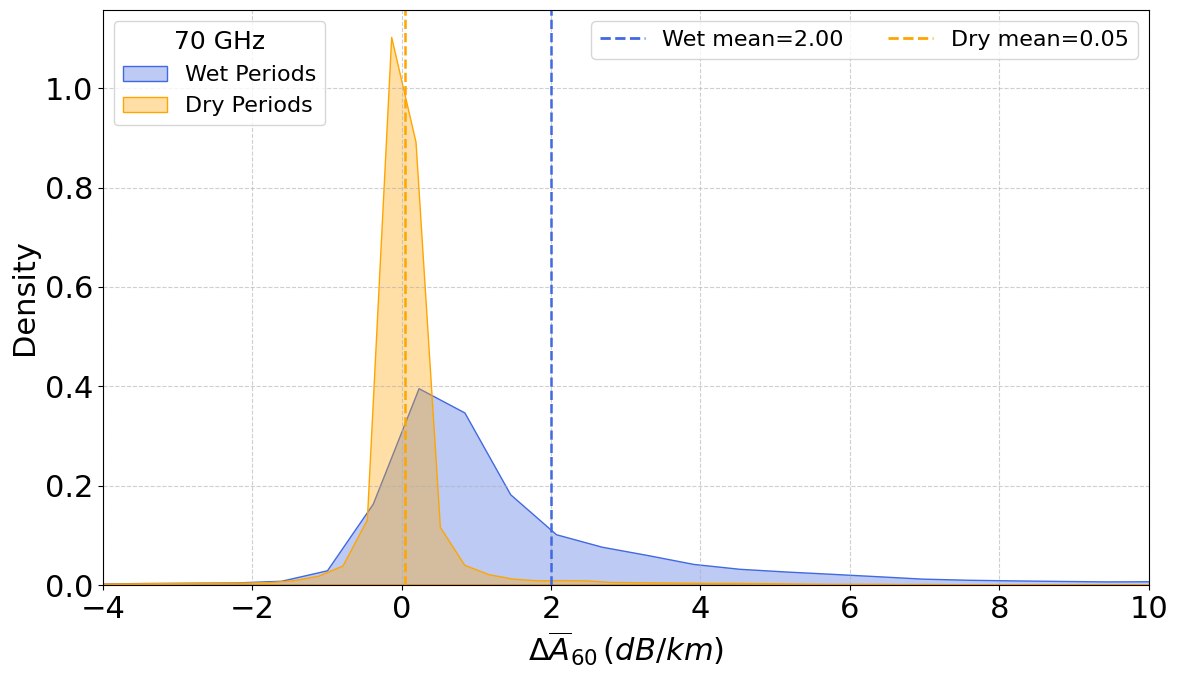

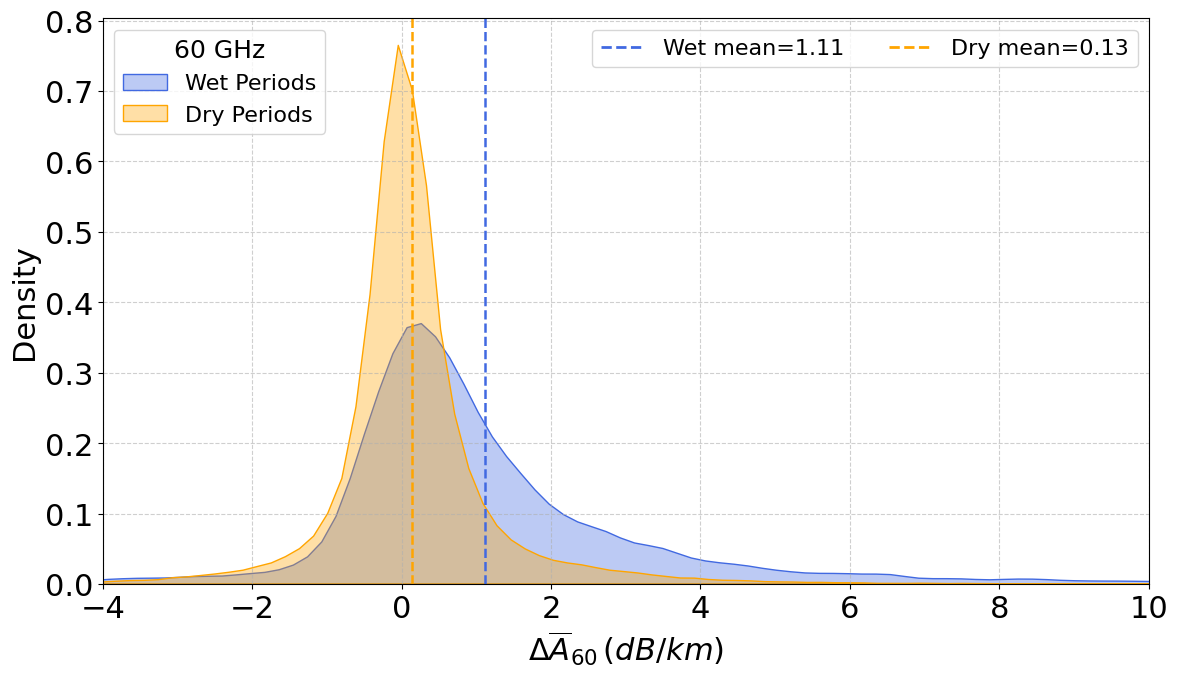

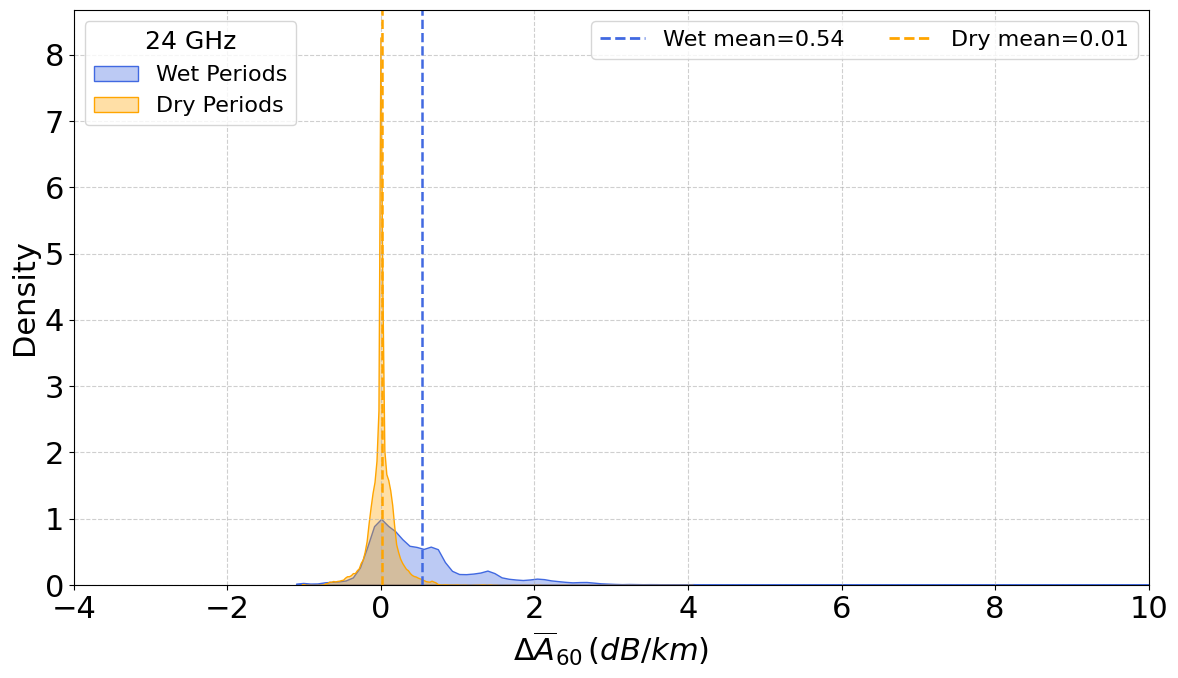

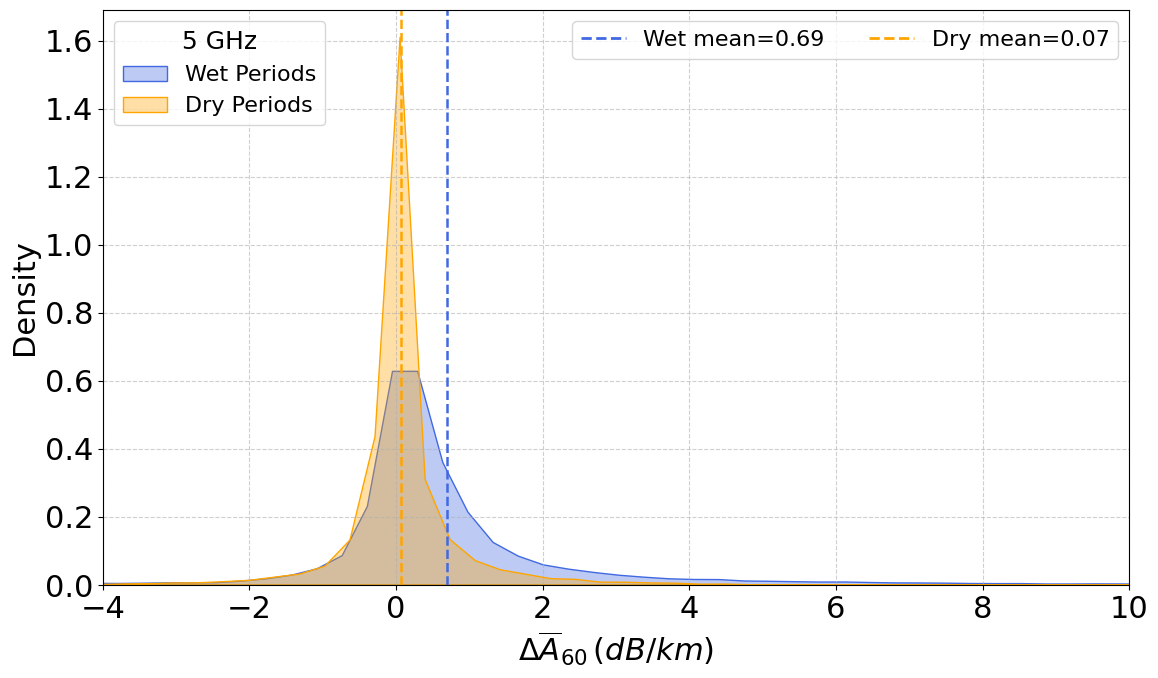


=== Combined Stats Table (All freq_keys) ===
freq_key aggregator Wet_Mean Wet_Median Wet_Std Dry_Mean Dry_Median Dry_Std
 70g_frq       mean     2.00       0.79    4.86     0.05       0.00    1.09
 60g_frq       mean     1.11       0.62    2.67     0.13       0.05    1.19
 23g_frq       mean     0.54       0.33    0.86     0.01       0.00    0.20
  5g_frq       mean     0.69       0.27    2.62     0.07       0.02    0.84


In [ ]:
# @title plot-str
min_length  = 0.1
max_length  = None
baseline = 'median'
att_method = 'att_norm_dry'
df_plot_dict              = links_att_data['frq']['raw'][att_method][baseline]
df_raw_dict, df_meta_dict = filter_raw_meta_nested(df_plot_dict, links_metadata, length_range=( min_length,max_length) )

frq_x = {
    '70g_frq': '70 GHz',
    '60g_frq': '60 GHz',
    '23g_frq': '24 GHz',
    '5g_frq' : '5 GHz'
}
# df_signal_plot , df_meta_plot = filter_raw_meta(df_plot, links_metadata, length_range= (min_length ,None) )

stat_window = '60min'
param_mean = r"$\Delta \overline{A}_{60} \,(dB/km)$"
# Plot mean distributions per 1-hour window for specific sublinks, clipping extreme outliers:
plot_resampled_distribution_dict(
    df_raw_dict,
    df_wet_flags,
    window= stat_window,
    stat='mean',
    # sublinks=['5', '6', '7'],  # or None for all sublinks
    plot_params={
        'figsize': (12, 7),
        'palette': ['royalblue', 'orange'],
        'alpha': 0.35
        ,'x_label' :param_mean ,
        # 'title': 'Signal Distributions - Wet vs. Dry',
        'labelsize': 22,
        'ticksize': 22,
        'legend_fs': 16
    },
    quantiles=(0.001, 0.99999),
    xlim = ( -4 , 10 ),
    clip_zero = 0   ,
    x_vals = frq_x_mean,
    print_table=True,
    add_mean_line=True,
    # add_stats=1
    frq_x= frq_x
)




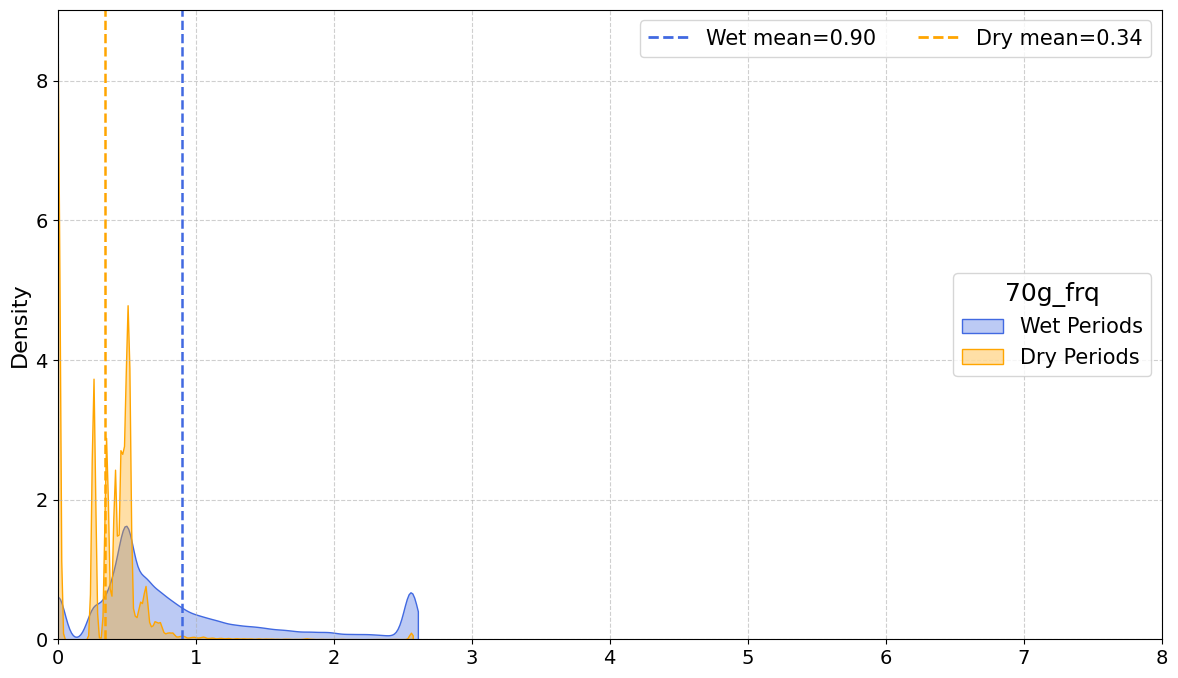

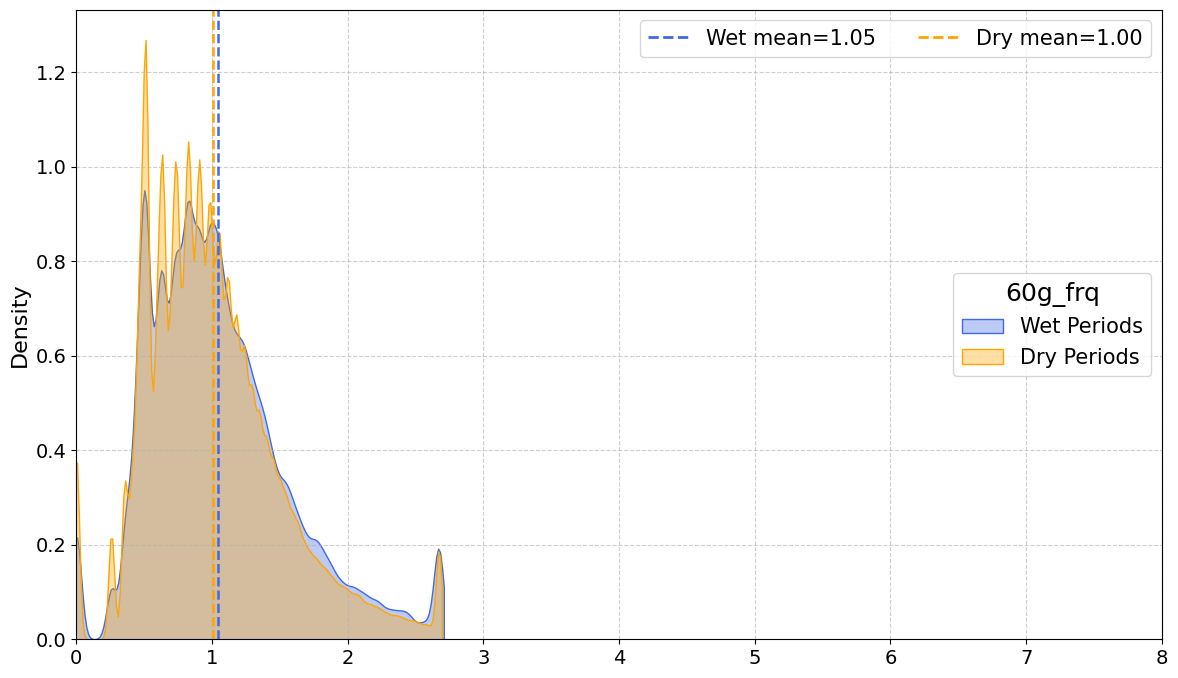

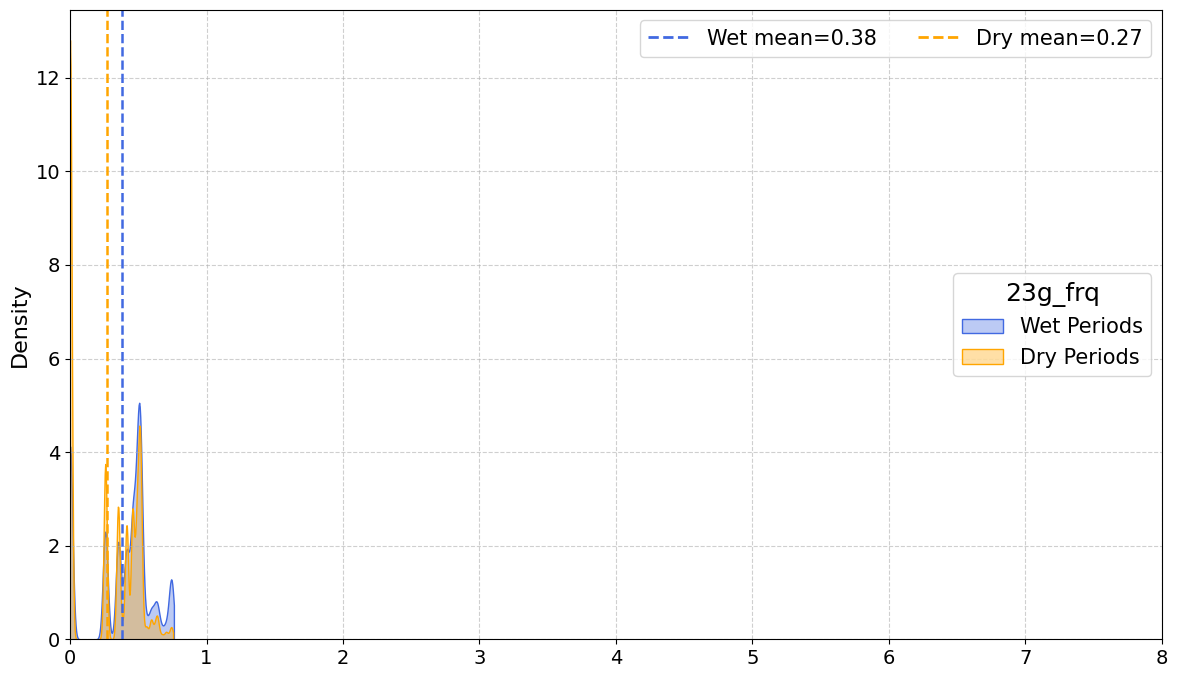

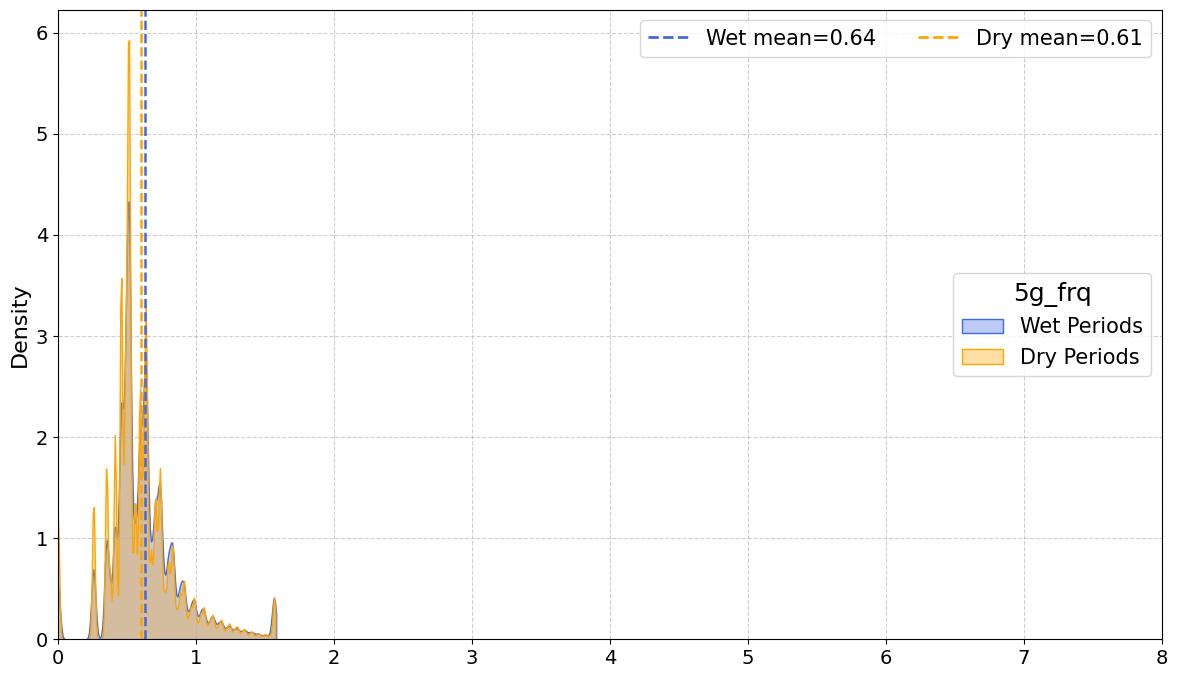


=== Combined Stats Table (All freq_keys) ===
freq_key aggregator Wet_Mean Wet_Median Wet_Std Dry_Mean Dry_Median Dry_Std
 70g_frq        std     0.90       0.64    0.71     0.34       0.38    0.29
 60g_frq        std     1.05       0.98    0.53     1.00       0.92    0.50
 23g_frq        std     0.38       0.46    0.22     0.27       0.35    0.23
  5g_frq        std     0.64       0.59    0.26     0.61       0.56    0.26


In [ ]:
# @title plot-str

min_length  = 0.1
max_length  = None
baseline = 'median'
att_method = 'att_dry'
df_plot_dict              = links_att_data['frq']['raw'][att_method][baseline]
df_raw_dict, df_meta_dict = filter_raw_meta_nested(df_plot_dict, links_metadata, length_range=( min_length,max_length) )
# df_signal_plot , df_meta_plot = filter_raw_meta(df_plot, links_metadata, length_range= (min_length ,None) )


# Plot mean distributions per 1-hour window for specific sublinks, clipping extreme outliers:
plot_resampled_distribution_dict(
    df_raw_dict,
    df_wet_flags,
    window= stat_window,
    stat='std',
    # sublinks=['5', '6', '7'],  # or None for all sublinks
    plot_params={
        'figsize': (12, 7),
        'palette': ['royalblue', 'orange'],
        'alpha': 0.35,
        # 'title': 'Signal Distributions - Wet vs. Dry',
        'labelsize': 16,

        'ticksize': 14,
        'legend_fs': 15
    },
    # quantiles=(0.001, 0.999),
            legend_loc_distribution = 'right',

    xlim = (0, 8 ),
    clip_zero=0,
    # legend_statistics=['mean' ,  'std'],
 x_vals = frq_x_sigma,
        print_table=True,
    add_mean_line=True,
    # add_stats=1
)




In [ ]:
# @title
# === Combined Stats Table (All freq_keys) ===
# freq_key aggregator Wet_Mean Wet_Median Wet_Std Dry_Mean Dry_Median Dry_Std
#  70g_frq       mean     1.94       0.79    4.73     0.05       0.00    1.13
#  60g_frq       mean     1.07       0.62    2.90     0.13       0.05    1.20
#  23g_frq       mean     0.53       0.33    0.79     0.01       0.00    0.20
#   5g_frq       mean     0.65       0.27    2.54     0.07       0.02    0.85

#   freq_key aggregator Wet_Mean Wet_Median Wet_Std Dry_Mean Dry_Median Dry_Std
#  70g_frq        std     1.22       0.50    2.66     0.45       0.20    1.06
#  60g_frq        std     2.33       1.65    2.12     2.19       1.57    1.99
#  23g_frq        std     0.26       0.20    0.20     0.16       0.15    0.11
#   5g_frq        std     0.99       0.49    1.21     0.94       0.45    1.16

In [ ]:
# @title
# # @title run: frq_density box

# frq_labels = { '70g_frq': '64.5-69.5',
#  '60g_frq': '58.0-63.0',
#  '23g_frq': '24.0-24.5',
#  '5g_frq': '5.0-6.0'
#  }


# # Suppose hourly_stats is your dictionary with 'wet' and 'dry' DataFrames
# # Each DataFrame has MultiIndex columns (sensor, statistic)

# # Plot the distribution of the 'std' feature
# data_type=  'att_norm'
# stat_type = 'min' #if 'data' = all
# # data = wet_dry_dict["frq"]["raw"][data_type][stat_type][frq_type]
# data_dict = wet_dry_dict["frq"]["raw"][data_type][stat_type]



# plot_params['ylabel'] = r"$\Delta A_{60} / L\,(dB/km)$"

# plot_box_all_frequencies(
#     data_dict,
#     freq_keys=freq_keys,
#     frq_labels = frq_labels,
#     clip_percentiles=(1e-10, 0.998),
#     feature="mean",    # or "std"
#     plot_params= plot_params
# )

# data_type=  'data'
# stat_type = 'all' #if 'data' = all
# data_dict_std = wet_dry_dict["frq"]["raw"][data_type][stat_type]
# # plot_params['ylabel'] no = r"$\Delta A_{60}/L\,(dB/km)$"
# plot_params['ylabel'] = r"$ \sigma_{60} / L \, (dB/km)$"


# plot_box_all_frequencies(
#     data_dict_std,
#     freq_keys=freq_keys,
#     frq_labels  =frq_labels,
#     clip_percentiles=(1e-10, 0.998),
#     feature="std",    # or "std"
#     plot_params=plot_params
# )



### Analysis: wet/dry periods

In [ ]:
# @title helpers: detect rainy_periods

def compute_window_stats(input_data, time_split='1h'):
    """
    Compute hourly statistics (mean and standard deviation) for each column,
    grouping the data into windows based on a time interval (default '1H').

    Parameters:
        input_data: A pandas DataFrame or a dictionary of DataFrames.
            Each DataFrame must either have a datetime index or a 'Datetime' column.
        time_split (str): The resampling frequency (e.g. '1H' for hourly).
                          Each row is assigned to a window by flooring its timestamp.

    Returns:
        If input_data is a DataFrame:
            A DataFrame indexed by the window start times, with columns having a MultiIndex
            (original column name, statistic ['mean', 'std']).
        If input_data is a dict of DataFrames:
            A dict with the same keys where each value is the computed statistics DataFrame.
    """

    def compute_stats_for_df(df, time_split):
        # If a 'Datetime' column exists, convert it to datetime and set as index.
        if 'Datetime' in df.columns:
            df['Datetime'] = pd.to_datetime(df['Datetime'])
            df = df.set_index('Datetime')
        else:
            # Ensure the index is in datetime format.
            df.index = pd.to_datetime(df.index)

        # Create a new column that indicates the window start (e.g. the hour)
        # for each row.
        df = df.copy()  # avoid modifying original DataFrame
        df['window'] = df.index.floor(time_split)

        # Group by the window column and compute mean and standard deviation
        # for every other column.
        # (The 'window' column will be dropped from the aggregation.)
        stats = df.groupby('window').agg(['mean', 'std'])
        return stats

    # If input_data is a dictionary, compute the stats for each DataFrame.
    if isinstance(input_data, dict):
        stats_dict = {}
        for key, df in input_data.items():
            stats_dict[key] = compute_stats_for_df(df, time_split)
        return stats_dict
    # If it is a single DataFrame:
    elif isinstance(input_data, pd.DataFrame):
        return compute_stats_for_df(input_data, time_split)
    else:
        raise ValueError("Input must be a pandas DataFrame or a dictionary of DataFrames.")

def classify_wet_window(df, time_split='1h',
                           threshold_mean=0.1,
                           threshold_median=0.1,
                           threshold_max=0.5):
    """
    Resample the DataFrame by the specified time interval (default '1H') and compute three aggregated
    rain values using the mean, median, and max of sensor readings (across ~40 columns).

    An hour is classified as wet if any one of these aggregated values exceeds its respective threshold.

    Parameters:
        df (pd.DataFrame): Input DataFrame with a 'Datetime' column and sensor columns.
        time_split (str): Resampling frequency (default '1H' for one hour).
        threshold_mean (float): Threshold for the hourly mean (e.g., 0.1 mm/h).
        threshold_median (float): Threshold for the hourly median (e.g., 0.1 mm/h).
        threshold_max (float): Threshold for the hourly max (e.g., 1.0 mm/h).

    Returns:
        pd.DataFrame: A DataFrame indexed by hourly timestamps with:
            - rain_value_mean: Hourly aggregated mean across sensors.
            - rain_value_median: Hourly aggregated median across sensors.
            - rain_value_max: Hourly aggregated max across sensors.
            - overall_wet_flag: 1 if any of the aggregated values exceed its threshold, else 0.
    """
    # Ensure 'Datetime' is in datetime format and set as the index.
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df = df.set_index('Datetime')

    # --- Compute hourly aggregations for each sensor ---
    # 1. Compute the hourly mean for each sensor and then average across sensors.
    hourly_mean_df = df.resample(time_split).mean()
    rain_value_mean = hourly_mean_df.mean(axis=1, skipna=True)

    # 2. Compute the hourly median for each sensor and then median across sensors.
    hourly_median_df = df.resample(time_split).mean()
    rain_value_median = hourly_median_df.median(axis=1, skipna=True)

    # 3. Compute the hourly maximum for each sensor and then take the maximum across sensors.
    hourly_max_df = df.resample(time_split).mean()
    rain_value_max = hourly_max_df.max(axis=1, skipna=True)

    # --- Determine if each aggregator qualifies as wet ---
    flag_mean = (rain_value_mean > threshold_mean)
    flag_median = (rain_value_median > threshold_median)
    flag_max = (rain_value_max > threshold_max)

    # --- Combine conditions: if any condition is true, mark the hour as wet ---
    overall_wet_flag = (flag_mean | flag_median | flag_max).astype(int)

    # --- Build the resulting DataFrame ---
    result = pd.DataFrame({
        'rain_value_mean': rain_value_mean,
        'rain_value_median': rain_value_median,
        'rain_value_max': rain_value_max,
        'wet_flag': overall_wet_flag
    })

    return result

def split_df_by_windows(new_df, classified_windows,
                                         time_split='1h', flag_column='wet_flag'):
    """
    Split a new DataFrame into segments (windows) based on the wet/dry classification
    from a separate classification DataFrame.

    Parameters:
        new_df (pd.DataFrame): New DataFrame with a datetime column (or index) that you wish
                               to split according to the classified windows.
        classified_windows (pd.DataFrame): A DataFrame with a datetime index corresponding
                                           to the start of each window and a flag column
                                           (e.g., 'wet_flag') indicating wet (1) or dry (0).
        time_split (str): The window (resampling) frequency used in the classification
                          (e.g., '1H', '30T', etc.). Default is '1H'.
        flag_column (str): The name of the column in classified_windows containing the
                           wet/dry flag (default 'wet_flag').

    Returns:
        dict: A dictionary with two keys:
            - 'wet': DataFrame containing rows from new_df that fall in a window marked as wet.
            - 'dry': DataFrame containing rows from new_df that fall in a window marked as dry.
    """

    # Ensure new_df has a datetime index. If it has a 'Datetime' column, convert and set it.
    if 'Datetime' in new_df.columns:
        new_df['Datetime'] = pd.to_datetime(new_df['Datetime'])
        new_df = new_df.set_index('Datetime')
    else:
        # Assume the index is already datetime-like; if not, try to convert.
        new_df.index = pd.to_datetime(new_df.index)

    # Create a new column 'window' that represents the window start time
    # for each row in new_df (e.g., the hour in which the row falls)
    new_df = new_df.copy()  # avoid modifying the original DataFrame
    new_df['window'] = new_df.index.floor(time_split)

    # Now, join the new_df with the classified_windows on the 'window' value.
    # classified_windows is assumed to have its index as the window start timestamps.
    merged = new_df.join(classified_windows[[flag_column]], on='window', how='left')

    # Some rows in new_df might fall outside the range of the classified_windows.
    # You can decide how to handle these. For now, we will drop rows where the flag is missing.
    merged = merged.dropna(subset=[flag_column])

    # Now split into wet and dry subsets.
    wet_new_df = merged[merged[flag_column] == 1].copy()
    dry_new_df = merged[merged[flag_column] == 0].copy()

    # Optionally, you can drop the helper 'window' column if not needed.
    wet_new_df = wet_new_df.drop(columns=['window'])
    dry_new_df = dry_new_df.drop(columns=['window'])

    return {'wet': wet_new_df, 'dry': dry_new_df}
# ---------------------------------------------------------------
# Example U
# # ---------------------------------------------------------------
# # Suppose 'hourly_df' is a DataFrame resulting from your hourly aggregation
# links_att_data['']
import matplotlib.pyplot as plt

def plot_std_histograms(hourly_stats, sensor=None, bins=30):
    """
    Plot histograms of the standard deviation values for wet and dry windows.

    Parameters:
        hourly_stats (dict): Dictionary with keys 'wet' and 'dry', each a DataFrame
                             whose columns are a MultiIndex (sensor, statistic).
        sensor (str, optional): If provided, plot the histogram for that sensor only.
                                Otherwise, plot a subplot for each sensor.
        bins (int): Number of bins in the histogram.
    """
    if sensor:
        # Extract the std series for the specified sensor in wet and dry windows.
        wet_std = hourly_stats['wet'][sensor]['std'].dropna()
        dry_std = hourly_stats['dry'][sensor]['std'].dropna()

        plt.figure(figsize=(10, 6))
        plt.hist(wet_std, bins=bins, alpha=0.7, label='Wet', color='blue', edgecolor='black')
        plt.hist(dry_std, bins=bins, alpha=0.7, label='Dry', color='orange', edgecolor='black')
        plt.xlabel("Standard Deviation")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of Standard Deviation for Sensor '{sensor}'")
        plt.legend()
        plt.show()

    else:
        # Get a list of sensor names from the MultiIndex.
        # We assume that the multi-index level 0 contains sensor names.
        sensors = list(hourly_stats['wet'].columns.levels[0])

        # Create subplots for each sensor.
        n_sensors = len(sensors)
        ncols = 3
        nrows = (n_sensors + ncols - 1) // ncols

        fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
        axes = axes.flatten()

        for i, sensor in enumerate(sensors):
            dry_std = hourly_stats['dry'][sensor]['std'].dropna()
            wet_std = hourly_stats['wet'][sensor]['std'].dropna()

            axes[i].hist(wet_std, bins=bins, alpha=0.7, label='Wet', color='blue', edgecolor='black')
            axes[i].hist(dry_std, bins=bins, alpha=0.7, label='Dry', color='orange', edgecolor='black')
            axes[i].set_title(f"Sensor: {sensor}")
            axes[i].set_xlabel("Standard Deviation")
            axes[i].set_ylabel("Frequency")
            axes[i].legend()

        # Remove any unused subplots.
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])

        fig.tight_layout()
        plt.show()

# ----------------------------------------------------------------
# Example Usage:
# ----------------------------------------------------------------
# Suppose you already computed your hourly statistics and split them into 'wet' and 'dry':
# For example, hourly_stats is a dictionary with:
#    hourly_stats['wet'] -> DataFrame with MultiIndex columns (sensor, statistic)
#    hourly_stats['dry'] -> DataFrame with MultiIndex columns (sensor, statistic)




In [ ]:
# @title helpers: plt_features_wet_dry
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def plot_feature_distribution(hourly_stats, feature="both", plot_type="box",
                              show_grid=True, plot_params=None):
    """
    Plot the distribution of 'mean', 'std', or both features in separate
    subplots for wet vs. dry conditions. Data is aggregated (merged) across
    all sensors.

    Parameters:
    -----------
    hourly_stats : dict
        Dictionary with keys 'wet' and 'dry'.
        Each value is a DataFrame with MultiIndex columns
        (level 0: sensor name, level 1: statistic such as 'mean' or 'std').
    feature : str, optional
        Which feature(s) to plot. Possible values:
          - "mean": only the mean feature
          - "std": only the standard deviation feature
          - "both": two subplots, one for mean and one for std
        Default: "both"
    plot_type : str, optional
        Type of distribution plot:
          - "box" : boxplot (default)
          - "violin" : violin plot
    show_grid : bool, optional
        If True, show a dashed grid in the background. Default: True.
    plot_params : dict, optional
        Dictionary of styling parameters. Recognized keys:
          - "font_size": overall font size (default 12)
          - "label_size": axis label font size (default 14)
          - "ticks_size": tick label font size (default 12)
          - "label": a dict for custom text:
                {
                  "ylabel_mean": "Hourly Norm Mean (dB/km)",
                  "ylabel_std": "Hourly Norm Std"
                }
            If you only plot one feature, then "ylabel" applies to that feature.
          - "figsize": tuple (width, height) in inches (default (8, 6))
          - "palette": color palette for wet/dry (default ["dodgerblue","darkorange"])

    Example Usage:
    -------------
    plot_feature_distribution(
        hourly_stats,
        feature="std",
        plot_type="violin",
        plot_params={
            "font_size": 14,
            "label_size": 16,
            "ticks_size": 14,
            "label": {
                "ylabel_std": "Std of Rainfall (mm/h)"
            }
        }
    )
    """
    # ------------------ Default Styling Parameters ------------------
    default_font_size  = 12
    default_label_size = 14
    default_ticks_size = 12
    default_figsize    = (8, 6)
    default_palette    = ["dodgerblue", "darkorange"]

    if plot_params is None:
        plot_params = {}

    font_size  = plot_params.get("font_size", default_font_size)
    label_size = plot_params.get("label_size", default_label_size)
    ticks_size = plot_params.get("ticks_size", default_ticks_size)
    figsize    = plot_params.get("figsize", default_figsize)
    palette    = plot_params.get("palette", default_palette)

    label_dict = plot_params.get("label", {})
    # Default labels if the user didn't provide them
    # for the single-feature scenario
    default_ylabel_mean = "Hourly Norm Mean (dB/km)"
    default_ylabel_std  = "Hourly Norm Std"

    # Update rcParams for a consistent style
    plt.rcParams.update({
        'font.size': font_size,
        'axes.labelsize': label_size,
        'xtick.labelsize': ticks_size,
        'ytick.labelsize': ticks_size,
        'font.family': 'sans-serif'
    })
    sns.set_context("paper", font_scale=1)

    # ------------------ Helper: Merge All Sensors for a Given Feature ------------------
    def gather_feature_data(df, feature_name):
        """
        From a single DataFrame for wet or dry (with MultiIndex columns),
        extract the chosen feature_name (e.g. 'mean' or 'std') across all sensors.
        Return a 1D numpy array of valid feature values.
        """
        sensor_names = df.columns.get_level_values(0).unique()
        values_list = []
        for s in sensor_names:
            if (s, feature_name) in df.columns:
                col_values = df[(s, feature_name)].dropna().values
                if len(col_values) > 0:
                    values_list.append(col_values)
        if values_list:
            return np.concatenate(values_list)
        else:
            return np.array([])

    # ------------------ Create a Single DataFrame for Plotting ------------------
    # We'll define a small routine that returns a DataFrame with columns ["feature_value", "condition"].
    # The "condition" column will be "Wet" or "Dry."
    def build_condition_df(hourly_stats, feature_name):
        wet_values = gather_feature_data(hourly_stats['wet'], feature_name)
        dry_values = gather_feature_data(hourly_stats['dry'], feature_name)

        df_list = []
        if wet_values.size > 0:
            df_list.append(pd.DataFrame({
                'feature_value': wet_values,
                'condition': ['Wet'] * len(wet_values)
            }))
        if dry_values.size > 0:
            df_list.append(pd.DataFrame({
                'feature_value': dry_values,
                'condition': ['Dry'] * len(dry_values)
            }))

        if not df_list:
            return pd.DataFrame(columns=['feature_value', 'condition'])
        return pd.concat(df_list, ignore_index=True)

    # Decide how many subplots we need
    if feature == "both":
        # One subplot for 'mean' and one subplot for 'std'
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(figsize[0]*2, figsize[1]), sharey=False)
        ax_mean, ax_std = axes

        # Build data frames for each feature
        df_mean = build_condition_df(hourly_stats, 'mean')
        df_std  = build_condition_df(hourly_stats, 'std')

        # Left subplot: MEAN
        if len(df_mean) > 0:
            if plot_type == "violin":
                sns.violinplot(
                    x='condition', y='feature_value',
                    data=df_mean, palette=palette, ax=ax_mean
                )
            else:  # box is default
                sns.boxplot(
                    x='condition', y='feature_value',
                    data=df_mean, palette=palette, ax=ax_mean
                )
            ax_mean.set_ylabel(label_dict.get("ylabel_mean", default_ylabel_mean))
            ax_mean.set_xlabel("")  # no need for an x-label "condition"
            ax_mean.set_title("Mean")
            if show_grid:
                ax_mean.grid(True, linestyle="--", alpha=0.6, axis='y')
        else:
            ax_mean.set_title("No Mean Data Available")

        # Right subplot: STD
        if len(df_std) > 0:
            if plot_type == "violin":
                sns.violinplot(
                    x='condition', y='feature_value',
                    data=df_std, palette=palette, ax=ax_std
                )
            else:  # box
                sns.boxplot(
                    x='condition', y='feature_value',
                    data=df_std, palette=palette, ax=ax_std
                )
            ax_std.set_ylabel(label_dict.get("ylabel_std", default_ylabel_std))
            ax_std.set_xlabel("")  # no need for an x-label "condition"
            ax_std.set_title("Std")
            if show_grid:
                ax_std.grid(True, linestyle="--", alpha=0.6, axis='y')
        else:
            ax_std.set_title("No Std Data Available")

        plt.tight_layout()
        plt.show()

    else:
        # We are plotting only one feature: "mean" or "std"
        df_feat = build_condition_df(hourly_stats, feature)

        if df_feat.empty:
            print(f"No valid data found for feature='{feature}'. Nothing to plot.")
            return

        fig, ax = plt.subplots(figsize=figsize)
        if plot_type == "violin":
            sns.violinplot(
                x='condition', y='feature_value',
                data=df_feat, palette=palette, ax=ax
            )
        else:  # default box
            sns.boxplot(
                x='condition', y='feature_value',
                data=df_feat, palette=palette, ax=ax
            )

        # Which label do we apply?
        if feature == "mean":
            ax.set_ylabel(label_dict.get("ylabel_mean", default_ylabel_mean))
        else:  # "std"
            ax.set_ylabel(label_dict.get("ylabel_std", default_ylabel_std))
        ax.set_xlabel("")  # no need for "condition" label
        ax.set_title(feature.capitalize())
        if show_grid:
            ax.grid(True, linestyle="--", alpha=0.6, axis='y')

        plt.tight_layout()
        plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_density(hourly_stats, feature="mean", show_grid=True, relative=False, plot_params=None):
    """
    Plot overlaid kernel density estimate (KDE) for Wet vs. Dry across all sensors
    for a chosen feature ('mean' or 'std').

    By default (relative=False), the densities are normalized together, reflecting
    differences in sample sizes. If relative=True, each subset is normalized
    separately so each curve integrates to 1 (i.e., shows relative density).

    Parameters:
    -----------
    hourly_stats : dict
        Dictionary with keys 'wet' and 'dry', each containing a DataFrame with
        MultiIndex columns (level 0 = sensor name, level 1 = 'mean' or 'std').
    feature : str, optional
        The feature to plot, "mean" or "std". Default "mean".
    show_grid : bool, optional
        If True, display a dashed grid in the background. Default is True.
    relative : bool, optional
        If True, use separate normalization for Wet vs. Dry (common_norm=False).
        Each curve integrates to 1, making it a relative density plot.
        Default is False.
    plot_params : dict, optional
        Dictionary of styling parameters. Recognized keys:
            - "palette": [color_wet, color_dry], default ["dodgerblue","darkorange"]
            - "figsize": (width, height) in inches, default (8, 5)
            - "xlabel": custom string for x-axis label
            - "ylabel": custom string for y-axis label
        Example:
            plot_params = {
                "palette": ["blue", "red"],
                "figsize": (6, 4),
                "xlabel": "Hourly Mean (dB/km)",
                "ylabel": "Density"
            }
    """
    # Default styling (no forced font changes)
    default_palette = ["dodgerblue", "darkorange"]
    default_figsize = (8, 5)

    if plot_params is None:
        plot_params = {}
    palette = plot_params.get("palette", default_palette)
    figsize = plot_params.get("figsize", default_figsize)
    xlabel  = plot_params.get("xlabel", f"Hourly {feature.capitalize()}")
    ylabel  = plot_params.get("ylabel", "Density")

    # Helper to gather data for the chosen feature from a MultiIndex DataFrame
    def gather_feature_data(df, feat):
        if df is None or df.empty:
            return np.array([])
        sensors = df.columns.get_level_values(0).unique()
        vals = []
        for s in sensors:
            if (s, feat) in df.columns:
                col_data = df[(s, feat)].dropna().values
                if len(col_data) > 0:
                    vals.append(col_data)
        if vals:
            return np.concatenate(vals)
        return np.array([])

    # Collect wet vs. dry data
    wet_vals = gather_feature_data(hourly_stats.get("wet"), feature)
    dry_vals = gather_feature_data(hourly_stats.get("dry"), feature)

    # Build a tidy DataFrame for Seaborn
    data_list = []
    if wet_vals.size > 0:
        data_list.append(pd.DataFrame({"value": wet_vals, "condition": "Wet"}))
    if dry_vals.size > 0:
        data_list.append(pd.DataFrame({"value": dry_vals, "condition": "Dry"}))

    if not data_list:
        print(f"No valid '{feature}' data found in either wet or dry.")
        return

    df_plot = pd.concat(data_list, ignore_index=True)

    # Create the plot
    plt.figure(figsize=figsize)

    # Overlaid KDE
    sns.kdeplot(
        data=df_plot,
        x="value",
        hue="condition",
        fill=True,
        alpha=0.3,
        palette=palette,
        common_norm=not relative  # If relative=True => separate normalization for each
    )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if show_grid:
        plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()



def plot_scatter_stats(hourly_stats, sensor="merged", show_grid=True, jitter=True, jitter_amount=0.1):
    """
    Create a scatter plot of window-aggregated mean versus standard deviation for dB attenuation.

    Each point corresponds to one window (e.g., an hour) for a given sensor.
    Points are colored by condition: blue for wet windows and orange for dry windows.

    Parameters:
        hourly_stats (dict): Dictionary with keys 'wet' and 'dry'.
            Each value is a DataFrame with MultiIndex columns
            (level 0: sensor name, level 1: statistic such as 'mean' or 'std').
        sensor (str): Either a specific sensor name or "merged"/"all" to combine data from all sensors.
                      Default is "merged".
        show_grid (bool): If True, display a dashed grid.
        jitter (bool): If True, add a small random jitter to the coordinates to reduce overplotting.
        jitter_amount (float): The standard deviation of the Gaussian noise added as jitter.
    """

    # Helper function: extract paired (mean, std) data for a given sensor from one condition.
    def extract_sensor_data(df, sensor_name):
        if sensor_name not in df.columns.get_level_values(0):
            return pd.DataFrame(columns=['mean', 'std'])
        sensor_df = df[sensor_name][['mean', 'std']].dropna()
        return sensor_df

    # Helper function: apply jitter if needed.
    def apply_jitter(series, amount):
        if jitter:
            return series + np.random.normal(0, amount, size=len(series))
        else:
            return series

    # ------------------ Plot for a Specific Sensor ------------------
    if sensor.lower() not in ["merged", "all"]:
        wet_data = extract_sensor_data(hourly_stats['wet'], sensor)
        dry_data = extract_sensor_data(hourly_stats['dry'], sensor)

        plt.figure(figsize=(8, 6))

        if not wet_data.empty:
            x_wet = apply_jitter(wet_data['mean'], jitter_amount)
            y_wet = apply_jitter(wet_data['std'], jitter_amount)
            plt.scatter(x_wet, y_wet, color='dodgerblue', alpha=0.7, s=25,
                        label='Wet', edgecolors='none')
        if not dry_data.empty:
            x_dry = apply_jitter(dry_data['mean'], jitter_amount)
            y_dry = apply_jitter(dry_data['std'], jitter_amount)
            plt.scatter(x_dry, y_dry, color='darkorange', alpha=0.7, s=25,
                        label='Dry', edgecolors='none')

        plt.xlabel("Mean dB Attenuation (dB)")
        plt.ylabel("Standard Deviation of dB Attenuation (dB)")
        if show_grid:
            plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend(frameon=False)
        plt.show()

    # ------------------ Merged (All Sensors) Plot ------------------
    else:
        # Get all unique sensor names from both conditions.
        sensors_wet = set(hourly_stats['wet'].columns.get_level_values(0))
        sensors_dry = set(hourly_stats['dry'].columns.get_level_values(0))
        all_sensors = sorted(list(sensors_wet.union(sensors_dry)))

        wet_means, wet_stds = [], []
        dry_means, dry_stds = [], []

        for s in all_sensors:
            sensor_wet = extract_sensor_data(hourly_stats['wet'], s)
            if not sensor_wet.empty:
                wet_means.append(sensor_wet['mean'].values)
                wet_stds.append(sensor_wet['std'].values)
            sensor_dry = extract_sensor_data(hourly_stats['dry'], s)
            if not sensor_dry.empty:
                dry_means.append(sensor_dry['mean'].values)
                dry_stds.append(sensor_dry['std'].values)

        if wet_means:
            wet_means = np.concatenate(wet_means)
            wet_stds  = np.concatenate(wet_stds)
        else:
            wet_means, wet_stds = np.array([]), np.array([])

        if dry_means:
            dry_means = np.concatenate(dry_means)
            dry_stds  = np.concatenate(dry_stds)
        else:
            dry_means, dry_stds = np.array([]), np.array([])

        if jitter and wet_means.size:
            wet_means = wet_means + np.random.normal(0, jitter_amount, size=wet_means.shape)
            wet_stds  = wet_stds  + np.random.normal(0, jitter_amount, size=wet_stds.shape)
        if jitter and dry_means.size:
            dry_means = dry_means + np.random.normal(0, jitter_amount, size=dry_means.shape)
            dry_stds  = dry_stds  + np.random.normal(0, jitter_amount, size=dry_stds.shape)

        plt.figure(figsize=(8, 6))
        if wet_means.size:
            plt.scatter(wet_means, wet_stds, color='dodgerblue', alpha=0.7, s=25,
                        label='Wet', edgecolors='none')
        if dry_means.size:
            plt.scatter(dry_means, dry_stds, color='darkorange', alpha=0.7, s=25,
                        label='Dry', edgecolors='none')

        plt.xlabel("Mean dB Attenuation (dB)")
        plt.ylabel("Standard Deviation of dB Attenuation (dB)")
        if show_grid:
            plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend(frameon=False)
        plt.show()



In [ ]:
# @title helpers: accumalte
# Call the function
# @title plot accumalated.

def convert_precip_units(
    dfs_dict,
    time_col='Datetime',
    direction='to_mm'
):
    """
    Converts precipitation data between mm/h and mm per row interval
    based on consecutive timestamp differences.

    Parameters:
    -----------
    dfs_dict : dict
        Dictionary whose keys are labels (str) and values are DataFrames
        containing precipitation data. Each DataFrame must have a proper
        datetime index or a column named `time_col`.

    time_col : str
        Name of the datetime column if it's not the DataFrame's index.
        Defaults to 'Datetime'.

    direction : str
        'to_mm' for converting from rate (mm/h) to total mm over each interval,
        'to_rate' for converting from total mm over each interval to mm/h.

    Returns:
    --------
    dict
        A new dictionary with the same keys. In each DataFrame, numeric columns
        have been converted as specified by `direction`.
    """
    new_dfs = {}

    for label, df in dfs_dict.items():
        # 1) Copy the DataFrame to avoid mutating original data
        df_copy = df.copy()

        # 2) Ensure a DateTimeIndex
        if time_col in df_copy.columns:
            df_copy[time_col] = pd.to_datetime(df_copy[time_col])
            df_copy.set_index(time_col, inplace=True)
        elif not isinstance(df_copy.index, pd.DatetimeIndex):
            raise ValueError(
                f"DataFrame '{label}' must have a DatetimeIndex or a '{time_col}' column."
            )

        df_copy.sort_index(inplace=True)

        if len(df_copy.index) <= 1:
            # If there's only one row or none, nothing to convert
            new_dfs[label] = df_copy
            continue

        # 3) Calculate time deltas between consecutive rows in seconds
        deltas = df_copy.index.to_series().diff().dt.total_seconds().fillna(0)

        # Identify numeric columns
        numeric_cols = df_copy.select_dtypes(include=[np.number]).columns

        for col in numeric_cols:
            if direction == 'to_mm':
                # Convert from mm/h to mm for each row interval
                # mm/h * (delta_seconds/3600) => total mm in that interval
                df_copy[col] = df_copy[col] * (deltas / 3600)
            elif direction == 'to_rate':
                # Convert from mm (accumulated in each row) to mm/h
                # mm / (delta_seconds/3600) => mm/h
                # Avoid dividing by zero for the first row or any zero deltas
                # We'll handle by replacing zero with np.nan or something
                zero_mask = (deltas == 0)
                safe_deltas = deltas.copy()
                safe_deltas[zero_mask] = np.nan

                df_copy[col] = df_copy[col] / (safe_deltas / 3600)
            else:
                raise ValueError("direction must be either 'to_mm' or 'to_rate'")

        new_dfs[label] = df_copy

    return new_dfs

def plot_cumulative_rainfall(dfs_dict, time_col='Datetime', stats=['mean', 'median'], unit='[mm]', resample_interval=None, data_type='rate'):
    """
    Plot cumulative rainfall from multiple dataframes, based on specified statistics.

    Parameters:
    - dfs_dict (dict): Dictionary of dataframes with their labels as keys.
    - time_col (str): Column name for datetime. If not in the columns, assumes datetime is the index.
    - stats (list): List of statistics to calculate ('mean', 'median', 'min', 'max'). Defaults to ['mean', 'median'].
    - unit (str): Unit for rainfall, default is '[mm]'.
    - resample_interval (str): Pandas resample interval (e.g., 'D' for daily, 'H' for hourly). Default is None (no resampling).
    - data_type (str): Type of input data. Options are 'acc' (daily accumulated) or 'rate' (mm/h). Default is 'rate'.
    """
    plt.figure(figsize=(10, 6))

    for label, df in dfs_dict.items():
        # Check if time_col exists; otherwise assume it's already in the index
        if time_col in df.columns:
            df[time_col] = pd.to_datetime(df[time_col])
            df = df.set_index(time_col)
        elif not isinstance(df.index, pd.DatetimeIndex):
            raise ValueError(f"'{time_col}' is neither in the columns nor is the index a DatetimeIndex in dataframe '{label}'.")

        if data_type == 'rate':
            # Convert mm/h to total mm for the original intervals (before resampling)
            if len(df.index) > 1:  # Ensure there are at least two rows to calculate interval
                original_interval_seconds = (df.index[1] - df.index[0]).total_seconds()
                df = df * (original_interval_seconds / 3600)  # Convert to total mm for original intervals

        elif data_type == 'acc' and resample_interval:
            # Resample and sum for accumulated data
            df = df.resample(resample_interval).sum()

        # Resample rate data if specified
        if resample_interval and data_type == 'rate':
            df = df.resample(resample_interval).sum()

        # Calculate statistics and cumulative rainfall
        for stat in stats:
            if stat not in ['mean', 'median', 'min', 'max']:
                raise ValueError(f"Invalid statistic '{stat}'. Choose from ['mean', 'median', 'min', 'max'].")

            # Calculate the specified statistic across columns
            stat_series = getattr(df, stat)(axis=1)
            cumulative_rainfall = stat_series.cumsum()

            # Plot cumulative rainfall
            plt.plot(
                cumulative_rainfall.index,
                cumulative_rainfall,
                label=f"{label} ({stat.capitalize()} across stations)"
            )

    # Add plot details
    plt.title("Cumulative Rainfall Over Study Period")
    plt.xlabel("Time")
    plt.ylabel(f"Cumulative Rainfall {unit}")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# df_prec_acc_dict.
# plot_cumulative_rainfall_all(daily_acc , stats=['mean'], unit='[mm]' , resample_interval= '1D' , data_type = 'acc')



In [ ]:
# @title plot cumualative.
import pandas as pd
import matplotlib.pyplot as plt

# Some Matplotlib defaults for a clean, publication-ready look
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'font.size': 12,
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelsize': 13,
    'axes.grid': True,
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
    'legend.fontsize': 11,
    'lines.linewidth': 2
})

def plot_cumulative_rainfall_all(
    dfs_dict,
    time_col='Datetime',
    columns=None,
    stats=None,
    unit='[mm]',
    resample_interval=None,
    data_type='rate'
):
    """
    Plots cumulative rainfall/snowfall data for one or more DataFrames.

    Parameters:
    -----------
    dfs_dict : dict
        Keys: dataset labels (str). Values: DataFrames with precipitation data.
    time_col : str
        Name of the datetime column if it's not the DataFrame index. Defaults to 'Datetime'.
    columns : list of str or None
        Which columns to consider. If None, uses numeric columns automatically.
        If a column is specified but doesn't exist in a given DataFrame, it is skipped (with a warning).
    stats : list of str or None
        List of stats to compute (e.g., ['mean', 'median']). If None, each column individually.
    unit : str
        Label for the y-axis (e.g. '[mm]'). Defaults to '[mm]'.
    resample_interval : str or None
        Pandas frequency (e.g. 'D', 'H') to sum data over each interval.
    data_type : str
        'rate' => data in mm/h (converted to total mm). 'acc' => data already in mm.
        Defaults to 'rate'.
    """

    fig, ax = plt.subplots()

    for label, df in dfs_dict.items():
        # Ensure there's a DatetimeIndex
        if time_col in df.columns:
            df[time_col] = pd.to_datetime(df[time_col])
            df = df.set_index(time_col)
        elif not isinstance(df.index, pd.DatetimeIndex):
            raise ValueError(
                f"DataFrame '{label}' must have a DatetimeIndex or a '{time_col}' column."
            )

        df = df.sort_index()

        # Determine which columns to plot
        if columns is not None:
            # Only use columns that actually exist in the DataFrame
            valid_cols = []
            for col in columns:
                if col in df.columns:
                    # Also check that it's numeric
                    if pd.api.types.is_numeric_dtype(df[col]):
                        valid_cols.append(col)
                    else:
                        print(f"Warning: Column '{col}' in '{label}' is not numeric. Skipping.")
                else:
                    print(f"Warning: Column '{col}' not found in '{label}'. Skipping.")
        else:
            # If columns is None, pick all numeric columns
            valid_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]

        if not valid_cols:
            print(f"Warning: No valid numeric columns found for '{label}'. Skipping.")
            continue

        # Convert from mm/h to mm if data_type='rate'
        if data_type == 'rate' and len(df.index) > 1:
            time_deltas = df.index.to_series().diff().dt.total_seconds().fillna(0)
            for col in valid_cols:
                df[col] = df[col] * (time_deltas / 3600)

        # Resample if requested
        if resample_interval:
            df = df[valid_cols].resample(resample_interval).sum()
        else:
            df = df[valid_cols]

        # Compute and plot cumulative sums
        if stats:
            valid_stats = ['mean', 'median', 'min', 'max']
            for stat in stats:
                if stat not in valid_stats:
                    raise ValueError(
                        f"Invalid statistic '{stat}'. Must be one of {valid_stats}."
                    )
                stat_series = getattr(df, stat)(axis=1)
                cumsum_series = stat_series.cumsum()
                ax.plot(
                    cumsum_series.index,
                    cumsum_series.values,
                    label=f"{label} {stat.capitalize()}"
                )
        else:
            for col in valid_cols:
                cumsum_series = df[col].cumsum()
                ax.plot(
                    cumsum_series.index,
                    cumsum_series.values,
                    label=f"{label} - {col}"
                )

    # No main title for a clean, publication-style figure
    ax.set_xlabel("Time")
    ax.set_ylabel(f"Cumulative {unit}")

    # Remove top/right spines for a minimalist look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# @title plot accumalated values
raw , meta = filter_raw_meta(df , links_metadata, length_range= (None , None) , freq_range= ( 10e3 , 32e3) )
plot_acc = 0
if plot_acc:
  df_resampled = resample_with_threshold(
      raw,
      freq='1H',
      time_col='Datetime',
      frac_required=0.1
  )

  plot_cumulative_rainfall_all({'Signal' : df_resampled}, stats=None, unit='[mm]' , resample_interval= '1D',  data_type = 'rate')



  # df_noaa['Datetime'] =  df_noaa['date']
  daily_acc = {'NOAA' :df_noaa_acc_stats['pcpn_noaa'] , 'WUnderground PWS'  : prec_acc_dict['precip_accum_wu'] ,
              'WUnderground Airports' :prec_acc_dict['precip_airports'] }

  # daily_acc = {'NOAA' : df_noaa , 'WUnderground PWS'  : prec_dict['precip_wu'] ,
  #              'WUnderground Airports' :prec_dict['precip_airports'] }


  plot_cumulative_rainfall_all(daily_acc , stats=['mean'   ], unit='[mm]' , resample_interval= '1H',  data_type = 'acc')
  # plot_cumulative_rainfall_all(prec_dict , stats=['mean'   ], unit='[mm]' , resample_interval= '1H',  data_type = 'rate')
  # plot_cumulative_rainfall_all(df_estimations_dict, stats=None, unit='[mm]' , resample_interval= '1H',  data_type = 'rate')
  plot_cumulative_rainfall_all({'Signal' : df_resampled}, stats=None, unit='[mm]' , resample_interval= '1D',  data_type = 'rate')


In [ ]:
station_dict = {}
station_dict['pws'], station_dict['distance'] = get_stations_dicts(
    links_metadata = links_metadata,
    chosen_stations = weather_metadata[:40],
    factor = 'closest',
    k = 10,
    d = 2.0,
    n = 5
)

# links_ref

In [ ]:
# @title classify wet
# Suppose links_ref is your dictionary of {link_id: DataFrame}.
# Each DataFrame has columns [Datetime, min, max, median, mean].

def classify_and_split_per_link(
    links_dict,
    time_split='1H',
    threshold_mean=0.1,
    threshold_median=0.1,
    threshold_max=0.5
):
    """
    For each link's DataFrame in links_dict, do:
      1) Classify each time window as Wet or Dry based on link-specific data.
      2) Split the full DataFrame into 'wet' and 'dry' subsets.

    Parameters
    ----------
    links_dict : dict
        A dict of { link_id: DataFrame }. Each DataFrame should have:
           - "Datetime" column (will be set as index)
           - Possibly "min", "max", "median", "mean" columns (or at least "mean" etc.).
    time_split : str
        The window size for resampling (default '1H' = 1 hour).
    threshold_mean : float
        Threshold for the per-window mean aggregator.
    threshold_median : float
        Threshold for the per-window median aggregator.
    threshold_max : float
        Threshold for the per-window max aggregator.

    Returns
    -------
    results : dict
        A dict of { link_id: {"wet": wet_df, "dry": dry_df} }.
        - 'wet_df' and 'dry_df' are the subsets of the original link data falling in wet/dry windows.
    """

    # --- Internal helper: classify wet/dry for a single link ---
    def classify_link_windows(df_link):
        # Ensure the DataFrame has a datetime index
        df_link['Datetime'] = pd.to_datetime(df_link['Datetime'])
        df_link = df_link.set_index('Datetime')

        # Compute aggregator by resampling
        # (If you only have single columns, adjust accordingly)
        mean_vals   = df_link['mean'].resample(time_split).mean()
        median_vals = df_link['median'].resample(time_split).median()
        max_vals    = df_link['max'].resample(time_split).max()

        # Create a classification DataFrame
        # (similar to the original classify_wet_window logic)
        df_class = pd.DataFrame(index=mean_vals.index)
        df_class['rain_value_mean']   = mean_vals
        df_class['rain_value_median'] = median_vals
        df_class['rain_value_max']    = max_vals

        # Flag if any aggregator is above threshold
        flag_mean   = df_class['rain_value_mean']   > threshold_mean
        flag_median = df_class['rain_value_median'] > threshold_median
        flag_max    = df_class['rain_value_max']    > threshold_max
        df_class['wet_flag'] = (flag_mean | flag_median | flag_max).astype(int)

        return df_class

    # --- Internal helper: split the original link DataFrame into wet/dry subsets ---
    def split_link_by_windows(original_df, classified_windows, flag_column='wet_flag'):
        # Reindex original
        original_df = original_df.copy()
        original_df['Datetime'] = pd.to_datetime(original_df['Datetime'])
        original_df = original_df.set_index('Datetime')

        # Create a "window" column matching how we floored in classify_link_windows
        original_df['window'] = original_df.index.floor(time_split)

        # Join on the classification's index (the window start times)
        # which we rename to "window" to merge on:
        merged = original_df.join(classified_windows[[flag_column]], on='window', how='left')

        # Drop rows that have no classification (e.g., if outside the time range)
        merged.dropna(subset=[flag_column], inplace=True)

        # Separate wet vs. dry
        wet_df = merged[merged[flag_column] == 1].copy()
        dry_df = merged[merged[flag_column] == 0].copy()

        # Drop the helper column
        wet_df.drop(columns=['window'], inplace=True)
        dry_df.drop(columns=['window'], inplace=True)

        return {'wet': wet_df, 'dry': dry_df}

    # ----------------- MAIN LOGIC -----------------
    results = {}
    for link_id, link_df in links_dict.items():
        if link_df.empty:
            # No data => skip or store empty
            results[link_id] = {'wet': pd.DataFrame(), 'dry': pd.DataFrame()}
            continue

        # 1) Classify link's windows
        classified_df = classify_link_windows(link_df)

        # 2) Split this link's DataFrame into wet/dry
        splitted = split_link_by_windows(link_df, classified_df, flag_column='wet_flag')

        # Store final
        results[link_id] = splitted

    return results



wet_dry_links = classify_and_split_per_link(
    links_dict=links_ref,
    time_split='0.5h',  # half-hour windows, for example
    threshold_mean=0.1,
    threshold_median=0.05,
    # threshold_max=2.0
)

# Now wet_dry_links[link_id]['wet'] or ['dry'] has the subset of data for that link
# classified as wet or dry, *based on that link's own precipitation stats*.


In [ ]:
# @title cdf time plots



def plot_exceedance_probability(
    data,
    stats=['mean'],           # Exactly one of ['mean','median','max','all']
    freq_str_list=None,       # e.g. ('10T','30T','60T') or None => no resampling
    freq_labels=None,         # e.g. ("10 min","30 min","60 min")
    x_label='Percentage of Time the Ordinate Is Exceeded (%)',
    y_label='Precipitation Rate [mm/h]',  # or "Attenuation [dB]" etc.
    title=None,
    figsize=(8, 6),
    legend_title='Resampling Time',  # Or "Integration Time"
    grid=True,
    x_lim=None,               # e.g. (1e-4, 1e-1)
    y_lim=None,               # new! e.g. (-5, 10)
    min_val=None,            # min outlier filter
    max_val=None,            # max outlier filter
    zero_negative=1          # if 1 => negative values -> 0; if 0 => keep negatives
):
    """
    Plots an exceedance probability curve (complementary CDF) for exactly ONE chosen statistic
    across multiple (optional) resampling intervals. All lines are black by default.

    If freq_str_list is None (default), no resampling is applied (raw data).
    Otherwise, we resample to each freq in freq_str_list, and freq_labels should be
    descriptive strings like ("10 min","30 min","1 hour").

    Param Descriptions:
    -------------------
    - stats: Must be a one-element list, one of ['mean','median','max','all'].
      'all' => flatten columns => includes negatives (unless zeroed).
    - freq_str_list: e.g. ('10T','30T','60T') for 10-min, 30-min, 60-min intervals,
      OR None => no resampling.
    - freq_labels: e.g. ("10 min","30 min","60 min") to appear in the legend.
      If None, defaults to freq_str_list or ["Raw Data"] when freq_str_list is None.
    - x_label, y_label: axis labels. You might rename y_label to "Attenuation [dB]" if needed,
      or "Rainfall Intensity [mm/h]" etc.
    - legend_title: displayed above the legend, e.g. "Integration Time" or "Resampling Time".
    - zero_negative: if 1, negative values become 0. If 0, negatives remain as is.
    """

    if len(stats) != 1:
        raise ValueError("Please pass exactly ONE statistic, e.g. stats=['mean'].")
    stat = stats[0]
    if stat not in ['mean','median','max','all']:
        raise ValueError("Statistic must be one of ['mean','median','max','all'].")

    # Frequency handling
    if freq_str_list is None:
        freq_str_list = [None]
        if freq_labels is None:
            freq_labels = ["Raw Data"]
        else:
            if len(freq_labels) != 1:
                raise ValueError("freq_labels must have length 1 if freq_str_list=None.")
    else:
        if freq_labels is None:
            freq_labels = freq_str_list
        if len(freq_labels) != len(freq_str_list):
            raise ValueError("freq_labels and freq_str_list must match in length.")

    if isinstance(data, pd.DataFrame):
        data = {'': data}

    plt.figure(figsize=figsize)
    linestyle_cycle = ['-', '--', ':', '-.']

    def compute_exceedance(values):
        values = values[~np.isnan(values)]
        if len(values) == 0:
            return None, None
        sorted_vals = np.sort(values)
        n = len(sorted_vals)
        exceed_prob = 1.0 - (np.arange(1, n+1)/n)
        exceed_pct = exceed_prob * 100.0
        return sorted_vals, exceed_pct

    def apply_stat(df, aggregator):
        if aggregator == 'mean':
            return df.mean(axis=1).values
        elif aggregator == 'median':
            return df.median(axis=1).values
        elif aggregator == 'max':
            return df.max(axis=1).values
        elif aggregator == 'all':
            return df.values.flatten()
        else:
            raise ValueError(f"Unsupported stat: {aggregator}")

    for dataset_name, df_obj in data.items():
        for i, (freq_str, freq_label) in enumerate(zip(freq_str_list, freq_labels)):
            if freq_str is not None:
                df_resampled = df_obj.resample(freq_str).mean()
            else:
                df_resampled = df_obj

            vals = apply_stat(df_resampled, stat)
            if zero_negative == 1:
                vals[vals < 0] = 0

            if min_val is not None:
                vals = vals[vals >= min_val]
            if max_val is not None:
                vals = vals[vals <= max_val]

            sorted_vals, exceed_pct = compute_exceedance(vals)
            if sorted_vals is None:
                continue

            label_pieces = []
            if dataset_name:
                label_pieces.append(dataset_name)
            # label_pieces.append(stat.capitalize())
            label_pieces.append(freq_label)
            final_label = freq_label

            linestyle = linestyle_cycle[i % len(linestyle_cycle)]
            plt.plot(
                exceed_pct,

                sorted_vals,
                label=final_label,
                color='black',
                linestyle=linestyle
            )

    plt.xscale('log')
    if x_lim is not None:
        plt.xlim(x_lim)
    if y_lim is not None:
        plt.ylim(y_lim)

    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if title:
        plt.title(title, fontsize=14)

    plt.legend(title=legend_title, fontsize=14, title_fontsize=14)
    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# @title
def plot_exceedance_probability_v2(
    data,
    stats=['mean', 'median'],  # List or dict {'Dataset': ['mean', 'median']} or {'Dataset': None} for raw columns
    agg_freq=None,   # Single aggregation interval (e.g., '10T')
    dataset_styles=None,  # Dict specifying colors and labels {'Dataset': {'color': 'blue', 'label': 'Custom Label'}}
    x_label='Percentage of measurements exceeded (%)',
    y_label='Precipitation Rate (mm/h)',
    title=None,
    figsize=(8, 6),
    legend_title='Dataset',
    grid=True,
    x_lim=None,
    y_lim=None,
    min_val=None,
    max_val=None,
    zero_negative=True
):
    plt.figure(figsize=figsize)
    linestyle_cycle = ['-', '--', ':', '-.']
    default_colors = plt.cm.tab10.colors

    def compute_exceedance(values):
        values = values[~np.isnan(values)]
        sorted_vals = np.sort(values)
        exceed_pct = (1.0 - np.arange(1, len(sorted_vals)+1)/len(sorted_vals)) * 100.0
        return sorted_vals, exceed_pct

    def apply_stat(df, aggregator):
        if aggregator == 'mean':
            return df.mean(axis=1).values
        elif aggregator == 'median':
            return df.median(axis=1).values
        elif aggregator == 'max':
            return df.max(axis=1).values
        elif aggregator == 'all':
            return df.values.flatten()
        else:
            raise ValueError(f"Unsupported stat: {aggregator}")

    plt.figure(figsize=figsize)
    linestyle_cycle = ['-', '--', ':', '-.']

    for color_idx, (dataset_name, df_obj) in enumerate(data.items()):
        df_resampled = df_obj.resample(agg_freq).mean() if agg_freq else df_obj
        dataset_style = dataset_styles.get(dataset_name, {}) if dataset_styles else {}
        dataset_color = dataset_style.get('color', default_colors[color_idx % len(default_colors)])
        dataset_label = dataset_style.get('label', dataset_name)

        current_stats = stats.get(dataset_name, stats) if isinstance(stats, dict) else stats

        if current_stats is None:
            for col in df_resampled.columns:
                vals = df_resampled[col].values
                if zero_negative:
                    vals[vals < 0] = 0
                sorted_vals, exceed_pct = compute_exceedance(vals)
                plt.plot(
                    exceed_pct,
                    sorted_vals,
                    label=f"{dataset_label} {col}",
                    color=dataset_color,
                    linestyle='-',
                    linewidth=2
                )
        else:
            for linestyle_idx, stat in enumerate(current_stats):
                vals = apply_stat(df_resampled, stat)
                if zero_negative:
                    vals[vals < 0] = 0
                if min_val is not None:
                    vals = vals[vals >= min_val]
                if max_val is not None:
                    vals = vals[vals <= max_val]

                sorted_vals, exceed_pct = compute_exceedance(vals)

                plt.plot(
                    exceed_pct,
                    sorted_vals,
                    label=f"{dataset_label} {stat.capitalize()}",
                    color=dataset_color,
                    linestyle=linestyle_cycle[linestyle_idx % len(linestyle_cycle)],
                    linewidth=2
                )

    plt.xscale('log')
    if x_lim:
        plt.xlim(x_lim)
    if y_lim:
        plt.ylim(y_lim)

    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if title:
        plt.title(title, fontsize=16)

    plt.legend(title=legend_title, fontsize=12, title_fontsize=12)

    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



def plot_exceedance_probability_v2(
    data,
    stats=['mean', 'median'],  # List of stats ['mean','median','max','all'] or dict {'Dataset': ['mean', 'median']}
    agg_freq=None,   # Single aggregation interval (e.g., '10T')
    dataset_styles=None,  # Dict specifying colors and labels {'Dataset': {'color': 'blue', 'label': 'Custom Label'}}
    dataset_order=None,   # List specifying plotting and legend order
    x_label='Percentage of measurements exceeded (%)',
    y_label='Precipitation Rate (mm/h)',
    title=None,
    figsize=(8, 6),
    legend_title='Dataset',
    grid=True,
    x_lim=None,
    y_lim=None,
    min_val=None,
    max_val=None,
    zero_negative=True
):
    plt.figure(figsize=figsize)
    linestyle_cycle = ['-', '--', ':', '-.']
    default_colors = plt.cm.tab10.colors

    def compute_exceedance(values):
        values = values[~np.isnan(values)]
        sorted_vals = np.sort(values)
        exceed_pct = (1.0 - np.arange(1, len(sorted_vals)+1)/len(sorted_vals)) * 100.0
        return sorted_vals, exceed_pct

    def apply_stat(df, aggregator):
        if aggregator == 'mean':
            return df.mean(axis=1).values
        elif aggregator == 'median':
            return df.median(axis=1).values
        elif aggregator == 'max':
            return df.max(axis=1).values
        elif aggregator == 'all':
            return df.values.flatten()
        else:
            raise ValueError(f"Unsupported stat: {aggregator}")

    if dataset_order is None:
        dataset_order = list(data.keys())

    for color_idx, dataset_name in enumerate(dataset_order):
        df_obj = data[dataset_name]
        df_resampled = df_obj.resample(agg_freq).mean() if agg_freq else df_obj
        dataset_style = dataset_styles.get(dataset_name, {}) if dataset_styles else {}
        dataset_color = dataset_style.get('color', default_colors[color_idx % len(default_colors)])
        dataset_label = dataset_style.get('label', dataset_name)

        current_stats = stats.get(dataset_name, stats) if isinstance(stats, dict) else stats

        for linestyle_idx, stat in enumerate(current_stats):
            vals = apply_stat(df_resampled, stat)
            if zero_negative:
                vals[vals < 0] = 0
            if min_val is not None:
                vals = vals[vals >= min_val]
            if max_val is not None:
                vals = vals[vals <= max_val]

            sorted_vals, exceed_pct = compute_exceedance(vals)
            if stat == 'all':
              label = f"{dataset_label}"
            else:
              label=f"{dataset_label} ({stat.capitalize()})"

            plt.plot(
                exceed_pct,
                sorted_vals,
                label = label,

                color=dataset_color,
                linestyle=linestyle_cycle[linestyle_idx % len(linestyle_cycle)],
                linewidth=2
            )

    plt.xscale('log')
    if x_lim:
        plt.xlim(x_lim)
    if y_lim:
        plt.ylim(y_lim)

    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if title:
        plt.title(title, fontsize=16)

    ncol = len(dataset_order) if dataset_order else len(data)
    plt.legend(title=legend_title, fontsize=12, title_fontsize=12, ncol=ncol//2)

    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_exceedance_probability_vv(
    data,
    stats=['mean'],            # Exactly one from ['mean','median','max','all']
    freq_str=None,             # Optional single resampling interval, e.g. '10T'
    x_label='Percentage of Measurements Exceeded (%)',
    y_label='Precipitation Rate (mm/h)',
    title=None,
    figsize=(8, 6),
    legend_title='Rainfall Categories',
    grid=True,
    x_lim=None,
    y_lim=None,
    thresholds=None,
    show_intensity_thresholds=True,
    threshold_label_mode='legend',
    # step can be False, True, or "both"
    step=False,
    step_where='post',
    # ALPHA PARAMETERS
    step_alpha=1.0,            # alpha for CCDF or step line
    threshold_alpha=1.0,
    # Additional style for the step lines
    step_line='-',
):
    """
    Plots an exceedance probability view with optional single time-based resampling,
    and three possible modes for 'step':

      1) step=False  -> standard continuous CCDF (sorted data vs. exceedance).
      2) step=True   -> discrete "step" plot from user-provided thresholds only.
      3) step="both" -> continuous CCDF + threshold steps on the same axes.

    Additional alpha (transparency) parameters:
      - step_alpha: controls the main data line(s)
      - threshold_alpha: controls the threshold category lines

    Parameters
    ----------
    data : pd.DataFrame or dict of {str : pd.DataFrame}
        - Single DataFrame with numeric columns, or
        - Dictionary mapping labels -> DataFrames with numeric columns.
          If freq_str is given, each DataFrame must have a DateTimeIndex for resampling.
    stats : list of str
        Exactly one aggregator from ['mean','median','max','all'].
    freq_str : str or None
        Single resampling interval (e.g. '10T', '1H'). If None, no resampling.
    x_label, y_label : str
        Axis labels (commonly exceedance % on x, precipitation rate on y).
    title : str or None
        Optional figure title.
    figsize : tuple
        Figure size (width, height) in inches.
    legend_title : str
        Title for threshold legend if threshold_label_mode='legend'.
    grid : bool
        Whether to show grid lines.
    x_lim, y_lim : tuple or None
        Axis limits if provided.
    thresholds : list of (float, str)
        Each (threshold_value, threshold_label).
    show_intensity_thresholds : bool
        If True, draws horizontal lines at each threshold.
    threshold_label_mode : str
        - 'legend' => threshold lines in a separate legend
        - 'inline_right' => text near the right side
        - 'none' => lines only, no labeling
    step : bool or str
        - False => continuous CCDF only
        - True  => discrete steps only (threshold-based)
        - "both"=> continuous CCDF + discrete steps
    step_where : str
        For step plots, one of 'pre','post','mid'.
    step_alpha : float
        Transparency for the main CCDF or step lines (0.0 to 1.0).
    threshold_alpha : float
        Transparency for threshold lines (0.0 to 1.0).
    step_line : str
        Matplotlib linestyle for the step plot (e.g. '-', '--', etc.)

    Notes
    -----
    - Main data lines do not appear in any legend (they have no label).
    - If freq_str is provided, each DataFrame is .resample(freq_str).mean() then aggregated.
    - If 'step' is 'both', you see both the CCDF and the discrete threshold-based steps.
    """

    # Validate aggregator
    if len(stats) != 1:
        raise ValueError("Please provide exactly ONE aggregator in 'stats' (e.g. stats=['mean']).")
    aggregator = stats[0]
    if aggregator not in ['mean','median','max','all']:
        raise ValueError("Unsupported aggregator. Must be one of ['mean','median','max','all'].")

    # Validate step
    if step not in [False, True, "both"]:
        raise ValueError("Parameter 'step' must be either False, True, or 'both'.")

    # Convert single DataFrame to dict
    if isinstance(data, pd.DataFrame):
        data = {'': data}

    # Helper to apply aggregator
    def apply_stat(df_):
        if aggregator == 'mean':
            return df_.mean(axis=1).values
        elif aggregator == 'median':
            return df_.median(axis=1).values
        elif aggregator == 'max':
            return df_.max(axis=1).values
        elif aggregator == 'all':
            return df_.values.flatten()

    # Collect data into one array
    all_vals = []
    for df_ in data.values():
        # If freq_str is given, resample first
        if freq_str:
            df_ = df_.resample(freq_str).mean()
        vals = apply_stat(df_)
        all_vals.append(vals)
    all_vals = np.concatenate(all_vals)
    all_vals = all_vals[~np.isnan(all_vals)]
    if len(all_vals) == 0:
        print("No valid data after aggregator / resampling.")
        return

    # Create figure & axes
    plt.figure(figsize=figsize)
    ax = plt.gca()

    # Helper: continuous CCDF
    def compute_exceedance(arr):
        arr = arr[~np.isnan(arr)]
        if len(arr) == 0:
            return None, None
        sorted_vals = np.sort(arr)
        n = len(sorted_vals)
        exceed_prob = 1.0 - (np.arange(1, n + 1) / n)
        exceed_pct = exceed_prob * 100.0
        return sorted_vals, exceed_pct

    # ---------- Continuous CCDF (if step in [False, "both"]) ----------
    if step in [False, "both"]:
        sorted_vals, exceed_pct = compute_exceedance(all_vals)
        if sorted_vals is not None:
            ax.plot(
                exceed_pct,
                sorted_vals,
                color='black',
                alpha=step_alpha  # Use step_alpha here
            )

    # ---------- Discrete Steps (if step in [True, "both"]) ----------
    if step in [True, "both"]:
        if not thresholds:
            print("step=True or 'both' but no thresholds => can't do discrete steps.")
        else:
            # Sort thresholds by numeric value
            sorted_thresholds = sorted(thresholds, key=lambda x: x[0])
            n_total = len(all_vals)
            frac_data, thresh_data = [], []
            for (val, lbl) in sorted_thresholds:
                frac = np.sum(all_vals >= val) / n_total * 100.0
                frac_data.append(frac)
                thresh_data.append(val)
            # Overlaid step
            ax.step(
                frac_data,
                thresh_data,
                color='black',
                where=step_where,
                linestyle=step_line,
                alpha=step_alpha
            )

    # ---------- Threshold Lines (if show_intensity_thresholds) ----------
    threshold_handles = []
    threshold_labels_ = []
    threshold_colors = ["#08306b", "#08519c", "tab:blue", "darkblue", "grey"]
    threshold_styles = [':', '-.', '--', (0, (5,1)), (0, (1,1))]

    if show_intensity_thresholds and thresholds:
        # We'll draw horizontal lines for each threshold
        s_thresh = sorted(thresholds, key=lambda x: x[0])
        for i, (tval, tlbl) in enumerate(s_thresh):
            color = threshold_colors[i % len(threshold_colors)]
            style = threshold_styles[i % len(threshold_styles)]
            th_line = ax.axhline(
                y=tval,
                color=color,
                linestyle=style,
                linewidth=2,
                alpha=threshold_alpha
            )
            threshold_handles.append(th_line)
            threshold_labels_.append(f"{tlbl} ({tval} mm/h)")

    # ---------- Threshold Legend Handling ----------
    if threshold_label_mode == 'legend' and threshold_handles:
        th_legend = ax.legend(
            threshold_handles,
            threshold_labels_,
            title=legend_title,
            loc='upper right'
        )
        ax.add_artist(th_legend)
    elif threshold_label_mode == 'inline_right' and thresholds:
        s_thresh = sorted(thresholds, key=lambda x: x[0])
        for i, (tval, tlbl) in enumerate(s_thresh):
            color = threshold_colors[i % len(threshold_colors)]
            x_min, x_max = ax.get_xlim()
            x_text = x_min + 0.7*(x_max - x_min)
            ax.text(
                x_text, tval,
                f"{tlbl} ({tval} mm/h)",
                color=color,
                va='bottom',
                fontsize=11
            )

    # ---------- Final formatting ----------
    plt.xscale('log')  # Typically used for CCDF or exceedance
    if x_lim:
        plt.xlim(x_lim)
    if y_lim:
        plt.ylim(y_lim)

    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    if title:
        plt.title(title, fontsize=14)

    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

def add_custom_categories_legend(ax):
    """
    Adds a custom legend with these four lines (dummy entries):

    1) Drizzle/Light i < 2.5 mm h–1 Light
    2) 2.5 ≤ i < 10.0 mm h–1 Moderate
    3) 10.0 ≤ i < 50.0 mm h–1 Heavy
    4) ≥ 50.0 mm h–1 Violent3
    """
    legend_entries = [
        "Drizzle/Light i < 2.5 mm h–1 Light",
        "2.5 ≤ i < 10.0 mm h–1 Moderate",
        "10.0 ≤ i < 50.0 mm h–1 Heavy",
        "≥ 50.0 mm h–1 Violent3"
    ]

    dummy_handles = []
    for text in legend_entries:
        # Create invisible line so we only see the label in the legend
        line, = ax.plot([], [],
                        color='none',
                        marker='',
                        label=text)
        dummy_handles.append(line)

    ax.legend(
        handles=dummy_handles,
        labels=[h.get_label() for h in dummy_handles],
        title="Rainfall Categories",
        loc='lower left',   # choose the location as needed
        fontsize=10,
        title_fontsize=10
    )

# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_exceedance_probability_v1(
    data,
    stats=['mean'],            # Exactly one from ['mean','median','max','all']
    freq_str=None,             # Optional single resampling interval, e.g. '10T'
    x_label='Percentage of Measurements Exceeded (%)',
    y_label='Precipitation Rate (mm/h)',
    title=None,
    figsize=(8, 6),
    legend_title='Rainfall Categories',
    grid=True,
    x_lim=None,
    y_lim=None,
    thresholds=None,
    show_intensity_thresholds=True,
    threshold_label_mode='legend',
    # step can be False, True, or "both"
    step=False,
    step_where='post',
    # NEW ALPHA PARAMETERS
    step_alpha=1.0,            # alpha for CCDF or step line
    threshold_alpha=1.0  ,
    step_line = '-',# alpha for threshold lines
     threshold_colors = None
):
    """
    Plots an exceedance probability view with optional single time-based resampling,
    and three possible modes for 'step':

      1) step=False  -> standard continuous CCDF (sorted data vs. exceedance).
      2) step=True   -> discrete "step" plot from user-provided thresholds only.
      3) step="both" -> continuous CCDF + threshold steps on the same axes.

    Additional alpha (transparency) parameters:
      - step_alpha: controls the main data line(s)
      - threshold_alpha: controls the threshold category lines

    Parameters
    ----------
    data : pd.DataFrame or dict of {str : pd.DataFrame}
        - Single DataFrame with numeric columns, or
        - Dictionary mapping labels -> DataFrames with numeric columns.
          If freq_str is given, each DataFrame must have a DateTimeIndex for resampling.
    stats : list of str
        Exactly one aggregator from ['mean','median','max','all'].
    freq_str : str or None
        Single resampling interval (e.g. '10T', '1H'). If None, no resampling.
    x_label, y_label : str
        Axis labels (commonly exceedance % on x, precipitation rate on y).
    title : str or None
        Optional figure title.
    figsize : tuple
        Figure size (width, height) in inches.
    legend_title : str
        Title for threshold legend if threshold_label_mode='legend'.
    grid : bool
        Whether to show grid lines.
    x_lim, y_lim : tuple or None
        Axis limits if provided.
    thresholds : list of (float, str)
        Each (threshold_value, threshold_label).
    show_intensity_thresholds : bool
        If True, draws horizontal lines at each threshold.
    threshold_label_mode : str
        - 'legend' => threshold lines in a separate legend
        - 'inline_right' => text near the right side
        - 'none' => lines only, no labeling
    step : bool or str
        - False => continuous CCDF only
        - True  => discrete steps only (threshold-based)
        - "both"=> continuous CCDF + discrete steps
    step_where : str
        For step plots, one of 'pre','post','mid'.
    step_alpha : float
        Transparency for the main CCDF or step lines (0.0 to 1.0).
    threshold_alpha : float
        Transparency for threshold lines (0.0 to 1.0).

    Notes
    -----
    - Main data lines do not appear in any legend (they have no label).
    - If freq_str is provided, each DataFrame is .resample(freq_str).mean() then aggregated.
    """

    # Validate aggregator
    if len(stats) != 1:
        raise ValueError("Please provide exactly ONE aggregator in 'stats' (e.g. stats=['mean']).")
    aggregator = stats[0]
    if aggregator not in ['mean','median','max','all']:
        raise ValueError("Unsupported aggregator. Must be one of ['mean','median','max','all'].")

    # Validate step
    if step not in [False, True, "both"]:
        raise ValueError("Parameter 'step' must be either False, True, or 'both'.")

    # Convert single DataFrame to dict
    if isinstance(data, pd.DataFrame):
        data = {'': data}

    # Helper to apply aggregator
    def apply_stat(df_):
        if aggregator == 'mean':
            return df_.mean(axis=1).values
        elif aggregator == 'median':
            return df_.median(axis=1).values
        elif aggregator == 'max':
            return df_.max(axis=1).values
        elif aggregator == 'all':
            return df_.values.flatten()

    # Collect data into one array
    all_vals = []
    for df_ in data.values():
        # If freq_str is given, resample first
        if freq_str:
            df_ = df_.resample(freq_str).mean()
        vals = apply_stat(df_)
        all_vals.append(vals)
    all_vals = np.concatenate(all_vals)
    all_vals = all_vals[~np.isnan(all_vals)]
    if len(all_vals) == 0:
        print("No valid data after aggregator / resampling.")
        return

    # Create figure & axes
    plt.figure(figsize=figsize)
    ax = plt.gca()

    # Helper: continuous CCDF
    def compute_exceedance(arr):
        arr = arr[~np.isnan(arr)]
        if len(arr) == 0:
            return None, None
        sorted_vals = np.sort(arr)
        n = len(sorted_vals)
        exceed_prob = 1.0 - (np.arange(1, n+1) / n)
        exceed_pct = exceed_prob * 100.0
        return sorted_vals, exceed_pct

    # ---------- Continuous CCDF (if step in [False, "both"]) ----------
    if step in [False, "both"]:
        sorted_vals, exceed_pct = compute_exceedance(all_vals)
        if sorted_vals is not None:
            ax.plot(
                exceed_pct,
                sorted_vals,
                color='black',
                alpha=step_alpha  # Use step_alpha here
            )

    # ---------- Discrete Steps (if step in [True, "both"]) ----------
    if step in [True, "both"]:
        if not thresholds:
            print("step=True or 'both' but no thresholds => can't do discrete steps.")
        else:
            # Sort thresholds by numeric value
            sorted_thresholds = sorted(thresholds, key=lambda x: x[0])
            n_total = len(all_vals)
            frac_data, thresh_data = [], []
            for (val, lbl) in sorted_thresholds:
                frac = np.sum(all_vals >= val) / n_total * 100.0
                frac_data.append(frac)
                thresh_data.append(val)
            # Overlaid step
            ax.step(
                frac_data,
                thresh_data,
                color='black',
                where=step_where, linestyle =  step_line,
                alpha=step_alpha
            )

    # ---------- Threshold Lines (if show_intensity_thresholds) ----------
    threshold_handles = []
    threshold_labels_ = []
    if not threshold_colors:
      threshold_colors = ["#08306b", "#08306b",  "darkblue" , "tab:blue" ,"#08519c", "grey"]
    threshold_styles = ['-.', '-.', '--', (0, (5,1)), (0, (1,1))]

    if show_intensity_thresholds and thresholds:
        # We'll draw horizontal lines for each threshold
        s_thresh = sorted(thresholds, key=lambda x: x[0])
        for i, (tval, tlbl) in enumerate(s_thresh):
            color = threshold_colors[i % len(threshold_colors)]
            style = threshold_styles[i % len(threshold_styles)]
            th_line = ax.axhline(
                y=tval,
                color=color,
                linestyle=style,
                linewidth=2,
                alpha=threshold_alpha  # Use threshold_alpha here
            )
            threshold_handles.append(th_line)
            if 'Light' in tlbl:
              threshold_labels_.append(f"{tlbl} (< {tval} mm/h)")
            else:
              threshold_labels_.append(f"{tlbl} (> {tval} mm/h)")
    # ---------- Threshold Legend Handling ----------
    if threshold_label_mode == 'legend' and threshold_handles:
        th_legend = ax.legend(
            threshold_handles,
            threshold_labels_,
            title=legend_title,
            loc='upper right'
        )
        ax.add_artist(th_legend)
    elif threshold_label_mode == 'inline_right' and thresholds:
        s_thresh = sorted(thresholds, key=lambda x: x[0])
        for i, (tval, tlbl) in enumerate(s_thresh):
            color = threshold_colors[i % len(threshold_colors)]
            x_min, x_max = ax.get_xlim()
            x_text = x_min + 0.7*(x_max - x_min)
            ax.text(
                x_text, tval,
                f"{tlbl} ({tval} mm/h)",
                color=color,
                va='bottom',
                fontsize=11
            )

    # ---------- Final formatting ----------
    plt.xscale('log')  # Typically used for CCDF or exceedance
    if x_lim:
        plt.xlim(x_lim)
    if y_lim:
        plt.ylim(y_lim)

    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    if title:
        plt.title(title, fontsize=14)

    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


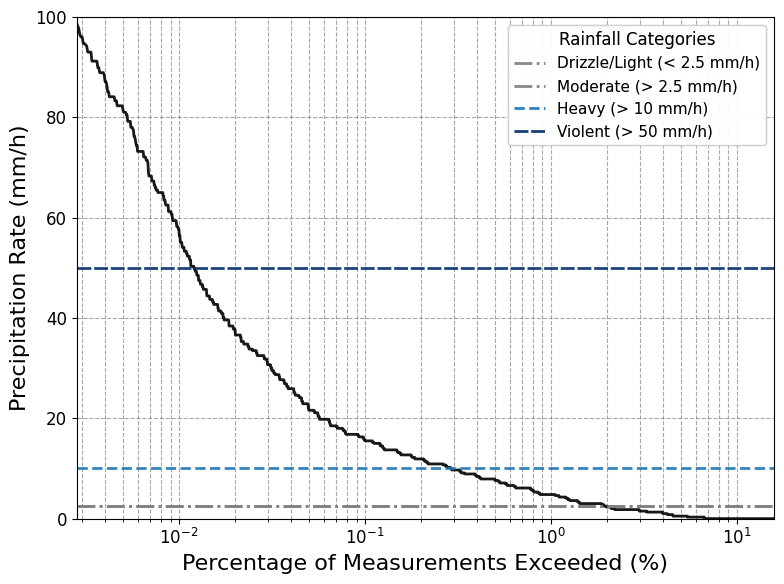

In [ ]:
# @title

thresholds = [
  # (0.1,  'Drizzle Light/Moderate boundary'),
  # (0.5,  'Drizzle'),
  (2.5,  'Drizzle/Light'),
  (2.5, 'Moderate'),
  (10, 'Heavy'),
  (50, 'Violent'),
]
data = prec_dict['precip_wu']



# 3) Now call plot_exceedance_probability
plot_exceedance_probability_v1(
    data=data,
    stats=['all'],
    # freq_str='15T',
      x_label='Percentage of Measurements Exceeded (%)',
    y_label='Precipitation Rate (mm/h)',
   threshold_colors = ["grey", "grey","tab:blue" , "#08306b",   "#08519c", "darkblue" ,  "grey"],

    # legend_title='Intensity Thresholds',
    x_lim=(10**(-2.55), 10**(1.2)),
      # y_lim=(-5,150),
    y_lim = (0,100),
    grid=True,
    show_intensity_thresholds = 1 ,
thresholds = thresholds ,
    # step = 'both',
    step_alpha=0.9,
    threshold_alpha=0.9,
    step_line = '-',
)


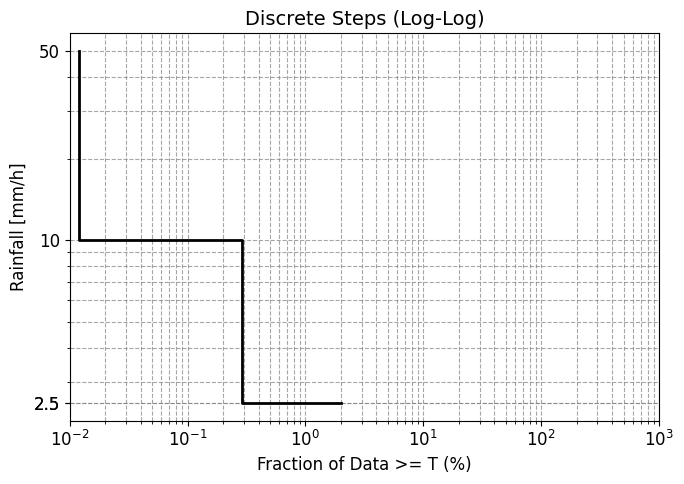

In [ ]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_discrete_steps_xy_log(
    data,
    thresholds,
    x_label="Percentage of Measurements Exceeding (%)",
    y_label="Rainfall [mm/h]",
    title=None,
    figsize=(7,5),
    grid=True,
    x_lim=None,
    y_lim=None,
    replace_nonpositive=True,
    tiny_positive=1e-4,
):
    """
    Plots a discrete 'step' CCDF on a double-log scale:

    1) Flatten 'data', removing NaNs, optionally replacing <= 0 with 'tiny_positive'.
    2) For each threshold T, compute fraction = (# data >= T / total) * 100.
    3) Step plot: fraction on X (log), threshold T on Y (log).
    4) Y-axis ticks come from 'thresholds' numeric values.
    5) We ensure zero fractions become 'tiny_positive', so they appear on log scale.

    If x_lim is not given, we pick an auto range that goes:
      - Lower bound ~ min fraction / 2 or 0.5 * minFrac
      - Upper bound ~ max(100, maxFrac) * 1.2
      This ensures you see the entire step from near 0 up to at least 100%.

    Example usage:
      data = np.random.gamma(2,2,size=1000)
      thresholds = [
         (2.5,  "Drizzle"),
         (10.0, "Moderate"),
         (50.0, "Heavy"),
         (200.0,"Violent3")
      ]
      plot_discrete_steps_xy_log(data, thresholds)
    """

    # ---------- 1) Flatten data ----------
    if isinstance(data, dict):
        arrays = []
        for df in data.values():
            arr = df.values.flatten()
            arrays.append(arr)
        all_vals = np.concatenate(arrays)
    elif isinstance(data, pd.DataFrame):
        all_vals = data.values.flatten()
    else:
        all_vals = np.array(data).flatten()

    # Remove NaNs
    all_vals = all_vals[~np.isnan(all_vals)]
    if len(all_vals) == 0:
        print("No valid data found.")
        return

    # Replace nonpositive data if using log scale on Y
    if replace_nonpositive:
        all_vals[all_vals <= 0] = tiny_positive

    # ---------- 2) For each threshold T, compute fraction (# data >= T) * 100 / n_total ----------
    n_total = len(all_vals)
    thresholds_sorted = sorted(thresholds, key=lambda x: x[0])  # ascending
    frac_data = []
    thresh_data = []
    for (val, _) in thresholds_sorted:
        y_val = max(val, tiny_positive) if replace_nonpositive else val
        fraction = (np.sum(all_vals >= val) / n_total) * 100.0
        frac_data.append(fraction)
        thresh_data.append(y_val)

    # ---------- 3) Step plot (log X and Y) ----------
    fig, ax = plt.subplots(figsize=figsize)

    # Step style => 'post': horizontal line extends to next fraction
    ax.step(
        frac_data,
        thresh_data,
        where='post',
        color='black',
        linewidth=2
    )

    ax.set_xscale('log')
    ax.set_yscale('log')

    # ---------- 4) Y-ticks from the threshold numeric values ----------
    y_vals = [max(t[0], tiny_positive) for t in thresholds_sorted]
    y_labels = [f"{val:g}" for val in y_vals]
    ax.set_yticks(y_vals)
    ax.set_yticklabels(y_labels)

    # ---------- 5) Handle zero fraction & auto x_lim if none provided ----------
    # Replace any fraction <= 0 with tiny_positive => show up on log scale
    frac_data = np.array(frac_data)
    frac_data[frac_data <= 0] = tiny_positive

    min_frac = frac_data.min()
    max_frac = frac_data.max()

    if x_lim is None:
        # force seeing entire range from ~zero to at least 100
        lower_bound = max(1e-4, min_frac / 2.0)
        # ensure upper covers at least 100% or the actual max fraction
        higher_end = max(100.0, max_frac) * 1.2
        x_lim = (lower_bound, higher_end)
    ax.set_xlim(x_lim)

    if y_lim:
        ax.set_ylim(y_lim)

    # ---------- 6) Plot cosmetics ----------
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    if title:
        ax.set_title(title, fontsize=14)

    if grid:
        ax.grid(True, which='both', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



plot_discrete_steps_xy_log(
   data=data,
   thresholds=thresholds,
   x_label="Fraction of Data >= T (%)",
   y_label="Rainfall [mm/h]",
   title="Discrete Steps (Log-Log)",
   x_lim=(1e-2, 10e2),   # e.g. from 0.01% to 100%
   grid=True
)

<ipython-input-58-143eae3e8f49>:303: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_obj.resample(agg_freq).mean() if agg_freq else df_obj
<ipython-input-58-143eae3e8f49>:303: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_obj.resample(agg_freq).mean() if agg_freq else df_obj


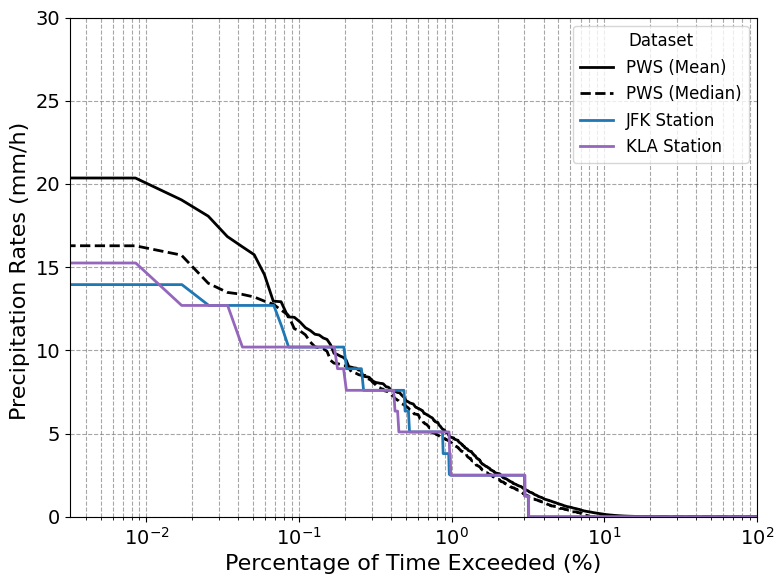

In [ ]:
data = {
    'PWS': prec_dict['precip_wu'],
    # Fix here: rename JKF -> JFK
    'JFK': pd.DataFrame(prec_dict['precip_airports']['KJFK']),
    'KLA': pd.DataFrame(prec_dict['precip_airports']['KLGA'])
}

dataset_styles = {
    'PWS': {'color': 'black'},
    # Make sure the label matches 'JFK'
    'JFK': {'color': 'tab:blue', 'label': 'JFK Station'},
    'KLA': {'color': 'tab:purple', 'label': 'KLA Station'}
}

param_mean = "Precipitation Rates (mm/h) "

plot_exceedance_probability_v2(
    data=data,
    agg_freq='30T',
    stats={'PWS': ['mean', 'median'], 'KLA': ['all'], 'JFK': ['all']},
    dataset_styles=dataset_styles,
    x_label='Percentage of Time Exceeded (%)',
    y_label=param_mean,
        y_lim=(0,30),
    legend_title='Dataset',
    x_lim=(10**(-2.5), 1e2),
)


In [ ]:
# @title plot excess
def plot_exceedance_probability(
    data,
    stats=['mean'],           # Exactly one of ['mean','median','max','all']
    freq_str_list=None,       # e.g. ('10T','30T','60T') or None => no resampling
    freq_labels=None,         # e.g. ("10 min","30 min","60 min")
    x_label='Percentage of Time the Ordinate Is Exceeded (%)',
    y_label='Precipitation Rate [mm/h]',  # or "Attenuation [dB]" etc.
    title=None,
    figsize=(8, 6),
    legend_title='Resampling Time',  # Or "Integration Time"
    grid=True,
    x_lim=None,               # e.g. (1e-4, 1e-1)
    y_lim=None,               # new! e.g. (-5, 10)
    min_val=None,            # min outlier filter
    max_val=None,            # max outlier filter
    zero_negative=1          # if 1 => negative values -> 0; if 0 => keep negatives
):
    """
    Plots an exceedance probability curve (complementary CDF) for exactly ONE chosen statistic
    across multiple (optional) resampling intervals. All lines are black by default.

    If freq_str_list is None (default), no resampling is applied (raw data).
    Otherwise, we resample to each freq in freq_str_list, and freq_labels should be
    descriptive strings like ("10 min","30 min","1 hour").

    Param Descriptions:
    -------------------
    - stats: Must be a one-element list, one of ['mean','median','max','all'].
      'all' => flatten columns => includes negatives (unless zeroed).
    - freq_str_list: e.g. ('10T','30T','60T') for 10-min, 30-min, 60-min intervals,
      OR None => no resampling.
    - freq_labels: e.g. ("10 min","30 min","60 min") to appear in the legend.
      If None, defaults to freq_str_list or ["Raw Data"] when freq_str_list is None.
    - x_label, y_label: axis labels. You might rename y_label to "Attenuation [dB]" if needed,
      or "Rainfall Intensity [mm/h]" etc.
    - legend_title: displayed above the legend, e.g. "Integration Time" or "Resampling Time".
    - zero_negative: if 1, negative values become 0. If 0, negatives remain as is.
    """

    if len(stats) != 1:
        raise ValueError("Please pass exactly ONE statistic, e.g. stats=['mean'].")
    stat = stats[0]
    if stat not in ['mean','median','max','all']:
        raise ValueError("Statistic must be one of ['mean','median','max','all'].")

    # Frequency handling
    if freq_str_list is None:
        freq_str_list = [None]
        if freq_labels is None:
            freq_labels = ["Raw Data"]
        else:
            if len(freq_labels) != 1:
                raise ValueError("freq_labels must have length 1 if freq_str_list=None.")
    else:
        if freq_labels is None:
            freq_labels = freq_str_list
        if len(freq_labels) != len(freq_str_list):
            raise ValueError("freq_labels and freq_str_list must match in length.")

    if isinstance(data, pd.DataFrame):
        data = {'': data}

    plt.figure(figsize=figsize)
    linestyle_cycle = ['-', '--', ':', '-.']

    def compute_exceedance(values):
        values = values[~np.isnan(values)]
        if len(values) == 0:
            return None, None
        sorted_vals = np.sort(values)
        n = len(sorted_vals)
        exceed_prob = 1.0 - (np.arange(1, n+1)/n)
        exceed_pct = exceed_prob * 100.0
        return sorted_vals, exceed_pct

    def apply_stat(df, aggregator):
        if aggregator == 'mean':
            return df.mean(axis=1).values
        elif aggregator == 'median':
            return df.median(axis=1).values
        elif aggregator == 'max':
            return df.max(axis=1).values
        elif aggregator == 'all':
            return df.values.flatten()
        else:
            raise ValueError(f"Unsupported stat: {aggregator}")

    for dataset_name, df_obj in data.items():
        for i, (freq_str, freq_label) in enumerate(zip(freq_str_list, freq_labels)):
            if freq_str is not None:
                df_resampled = df_obj.resample(freq_str).mean()
            else:
                df_resampled = df_obj

            vals = apply_stat(df_resampled, stat)
            if zero_negative == 1:
                vals[vals < 0] = 0

            if min_val is not None:
                vals = vals[vals >= min_val]
            if max_val is not None:
                vals = vals[vals <= max_val]

            sorted_vals, exceed_pct = compute_exceedance(vals)
            if sorted_vals is None:
                continue

            label_pieces = []
            if dataset_name:
                label_pieces.append(dataset_name)
            # label_pieces.append(stat.capitalize())
            label_pieces.append(freq_label)
            final_label = freq_label

            linestyle = linestyle_cycle[i % len(linestyle_cycle)]
            plt.plot(
                exceed_pct,

                sorted_vals,
                label=final_label,
                color='black',
                linestyle=linestyle
            )

    plt.xscale('log')
    if x_lim is not None:
        plt.xlim(x_lim)
    if y_lim is not None:
        plt.ylim(y_lim)

    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if title:
        plt.title(title, fontsize=14)

    plt.legend(title=legend_title, fontsize=14, title_fontsize=14)
    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_discrete_steps_only(
    data,
    thresholds,
    stats=['all'],  # Exactly one from ['mean','median','max','all']
    freq_str=None,
    x_label="Fraction of Data (%) >= threshold",
    y_label="Threshold",
    title=None,
    figsize=(8,6),
    grid=True,
    x_lim=None,
    y_lim=None,
    step_where='post',
    tiny_positive=1e-4
):
    """
    Plots a discrete step curve (fraction vs threshold) from user-provided thresholds.
    Does NOT round the fraction percentages in the bin-by-bin report.
    """

    def apply_stat(df, aggregator):
        if aggregator == 'mean':
            return df.mean(axis=1).values
        elif aggregator == 'median':
            return df.median(axis=1).values
        elif aggregator == 'max':
            return df.max(axis=1).values
        elif aggregator == 'all':
            return df.values.flatten()
        else:
            raise ValueError(f"Unsupported aggregator: {aggregator}")

    # Ensure stats has exactly one aggregator
    if len(stats) != 1:
        raise ValueError("stats must have exactly one aggregator, e.g. ['mean'].")
    aggregator = stats[0]

    # Convert single DataFrame => dict
    if isinstance(data, pd.DataFrame):
        data = {'': data}
    elif not isinstance(data, dict):
        # treat as array-like
        data = {'': pd.DataFrame(np.array(data))}

    # Combine everything into one array
    all_vals = []
    for df_ in data.values():
        if freq_str:
            df_ = df_.resample(freq_str).mean()
        arr = apply_stat(df_, aggregator)
        all_vals.append(arr)
    all_vals = np.concatenate(all_vals)
    # remove NaNs
    all_vals = all_vals[~np.isnan(all_vals)]
    if len(all_vals) == 0:
        print("No valid data after aggregator / resampling.")
        return

    n_total = len(all_vals)

    # Sort the thresholds in ascending order
    processed_thresh = []
    for t in thresholds:
        if isinstance(t, (list, tuple)):
            val = t[0]
        else:
            val = t
        processed_thresh.append(val)
    processed_thresh = np.sort(processed_thresh)

    # Compute fraction for each threshold
    frac_data = []
    thresh_data = []
    for val in processed_thresh:
        frac = (np.sum(all_vals >= val) / n_total) * 100.0
        # Bump up strictly 0% to tiny_positive if needed for log-scale
        if frac <= 0:
            frac = tiny_positive
        frac_data.append(frac)
        thresh_data.append(val)

    # Step-plot fraction vs threshold
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.step(
        frac_data,
        thresh_data,
        where=step_where,
        color='black',
        linewidth=2
    )

    if x_lim:
        plt.xlim(x_lim)
    if y_lim:
        plt.ylim(y_lim)

    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    if title:
        plt.title(title, fontsize=14)
    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.xscale("log")   # If you want a log scale on X
    # plt.yscale("log")  # If you also want a log scale on Y
    plt.show()

    # ---------------------------
    # Probability per bin, no rounding
    # ---------------------------
    cum_counts = [np.sum(all_vals >= t) for t in processed_thresh]

    bin_info = []
    for i in range(len(processed_thresh) - 1):
        lower = processed_thresh[i]
        upper = processed_thresh[i+1]
        count_in_bin = cum_counts[i] - cum_counts[i+1]
        frac_in_bin = (count_in_bin / n_total) * 100.0
        bin_info.append({
            "range": f"[{lower}, {upper})",
            "count": count_in_bin,
            "fraction_%": frac_in_bin
        })

    # Last bin: [T[n-1], ∞)
    last_lower = processed_thresh[-1]
    count_in_last_bin = cum_counts[-1]
    frac_in_last_bin  = (count_in_last_bin / n_total) * 100.0
    bin_info.append({
        "range": f"[{last_lower}, ∞)",
        "count": count_in_last_bin,
        "fraction_%": frac_in_last_bin
    })

    # Print with NO decimal rounding:
    print("\nBin-by-bin Probability Info (Unrounded fractions):\n")
    for b in bin_info:
        print(f"  Range {b['range']}: {b['count']} values ({b['fraction_%']}% of total)")

    return bin_info


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_discrete_steps_only(
    data,
    thresholds,
    stats=['all'],  # Exactly one from ['mean','median','max','all']
    freq_str=None,
    x_label="Fraction of Data (%) >= threshold",
    y_label="Threshold",
    title=None,
    figsize=(8,6),
    grid=True,
    x_lim=None,
    y_lim=None,
    step_where='post',
    tiny_positive=1e-4
):
    """
    Discrete step plot from user-provided thresholds, extended so the step starts ~100% and ends ~0%.
    We do this by automatically adding two extra thresholds:
      - One slightly below the dataset's min (=> fraction ~ 100%)
      - One slightly above the dataset's max (=> fraction ~ 0%)
    """

    def apply_stat(df, aggregator):
        if aggregator == 'mean':
            return df.mean(axis=1).values
        elif aggregator == 'median':
            return df.median(axis=1).values
        elif aggregator == 'max':
            return df.max(axis=1).values
        elif aggregator == 'all':
            return df.values.flatten()
        else:
            raise ValueError(f"Unsupported aggregator: {aggregator}")

    # Ensure stats has exactly one aggregator
    if len(stats) != 1:
        raise ValueError("stats must have exactly one aggregator, e.g. ['mean'].")
    aggregator = stats[0]

    # Convert single DataFrame => dict
    if isinstance(data, pd.DataFrame):
        data = {'': data}
    elif not isinstance(data, dict):
        # treat as array-like
        data = {'': pd.DataFrame(np.array(data))}

    # Combine everything into one array
    all_vals = []
    for df_ in data.values():
        if freq_str:
            df_ = df_.resample(freq_str).mean()
        arr = apply_stat(df_, aggregator)
        all_vals.append(arr)
    all_vals = np.concatenate(all_vals)

    # Remove NaNs
    all_vals = all_vals[~np.isnan(all_vals)]
    if len(all_vals) == 0:
        print("No valid data after aggregator / resampling.")
        return

    n_total = len(all_vals)

    # Determine min & max of the data
    data_min = all_vals.min()
    data_max = all_vals.max()

    # Force thresholds to be a sorted numeric list
    numeric_thresh = []
    for t in thresholds:
        if isinstance(t, (list, tuple)):
            val = t[0]
        else:
            val = t
        numeric_thresh.append(val)

    # -------------------------------------------------------------------------
    # ADD TWO EXTRA THRESHOLDS:
    #   1) One just below the data min => fraction ~100%
    #   2) One just above the data max => fraction ~0%
    # We pick a tiny offset (1e-9) or similar. You can adjust if your data is huge.
    # -------------------------------------------------------------------------
    below_min  = data_min - 1e-9
    above_max  = data_max + 1e-9

    # Combine user thresholds + these two extremes, then sort
    combined_thresh = [below_min] + numeric_thresh + [above_max]
    combined_thresh = np.sort(combined_thresh)

    # Compute fraction >= threshold for each
    frac_data = []
    thresh_data = []
    for val in combined_thresh:
        fraction_pct = (np.sum(all_vals >= val) / n_total) * 100.0
        if fraction_pct <= 0:
            fraction_pct = tiny_positive  # for log-scale
        frac_data.append(fraction_pct)
        thresh_data.append(val)

    # Step-plot fraction vs threshold
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.step(
        frac_data,
        thresh_data,
        where=step_where,
        color='black',
        linewidth=2
    )

    if x_lim:
        plt.xlim(x_lim)
    if y_lim:
        plt.ylim(y_lim)

    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    if title:
        plt.title(title, fontsize=14)
    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # If you want a log-scale X
    plt.xscale("log")
    # You could do y-scale log as well if desired
    # plt.yscale("log")

    plt.show()

    # ---------------------------
    # Probability per bin, no rounding
    # ---------------------------
    # Let's reflect the user thresholds only, ignoring our auto below_min/above_max
    # so your bins are consistent with your original threshold definitions:
    # (Because the auto ones are just for drawing an extended line.)

    # Recompute the user bin info:
    sorted_user_thresh = np.sort(numeric_thresh)
    cum_counts = [np.sum(all_vals >= t) for t in sorted_user_thresh]

    bin_info = []
    for i in range(len(sorted_user_thresh) - 1):
        lower = sorted_user_thresh[i]
        upper = sorted_user_thresh[i+1]
        count_in_bin = cum_counts[i] - cum_counts[i+1]
        frac_in_bin = (count_in_bin / n_total) * 100.0
        bin_info.append({
            "range": f"[{lower}, {upper})",
            "count": count_in_bin,
            "fraction_%": frac_in_bin
        })

    # Last bin: [T[n-1], ∞)
    last_lower = sorted_user_thresh[-1]
    count_in_last_bin = cum_counts[-1]
    frac_in_last_bin  = (count_in_last_bin / n_total) * 100.0
    bin_info.append({
        "range": f"[{last_lower}, ∞)",
        "count": count_in_last_bin,
        "fraction_%": frac_in_last_bin
    })

    print("\nBin-by-bin Probability Info (Unrounded fractions, user thresholds only):\n")
    for b in bin_info:
        print(f"  Range {b['range']}: {b['count']} values ({b['fraction_%']}% of total)")

    return bin_info

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_exceedance_probability_c(
    data,
    stats=['all'],            # Exactly one of ['mean','median','max','all']
    freq_str_list=None,        # e.g. ('10T','30T','60T') or None => no resampling
    freq_labels=None,          # e.g. ("10 min","30 min","60 min")
    x_label="Percentage of Measurements Exceeding (%)" ,
    y_label='Precipitation Rate [mm/h]',  # or "Attenuation [dB]" etc.
    title=None,
    figsize=(8, 6),
    legend_title='Resampling Time',  # Or "Integration Time"
    grid=True,
    x_lim=None,   # e.g. (1e-4, 1e-1)
    y_lim=None,   # e.g. (-5, 10)
    min_val=None, # min outlier filter
    max_val=None, # max outlier filter
    zero_negative=1,  # if 1 => negative values -> 0
    # ---------------- NEW OPTIONAL ARGS for the second axis ----------------
    steps_bin_info=None,     # e.g. a list of dicts: [{'range': '[0.0, 2.5)', 'count':..., 'fraction_%':...}, ...]
    steps_thresholds=None,   # e.g. [(0, 'Drizzle'), (2.5, 'Moderate'), (10, 'Heavy'), (50, 'Violent')]
    steps_right_ylabel="Rainfall Threshold (mm/h)",
    steps_color="tab:blue",
    steps_linewidth=2,
    steps_linestyle='-',     # style for the step plot
    steps_where='post'
):
    """
    Plots an exceedance probability curve (complementary CDF) for exactly ONE chosen statistic
    across multiple (optional) resampling intervals on the LEFT y-axis.

    Additionally, if steps_bin_info (and optionally steps_thresholds) are provided, we create
    a second y-axis on the RIGHT side that shows a discrete step plot (fraction vs. threshold),
    plus optional horizontal threshold lines.

    Original Param Descriptions:
    ----------------------------
    - data: DataFrame or dict of DataFrames
    - stats: Must be a one-element list, one of ['mean','median','max','all'].
      'all' => flatten columns => includes negatives (unless zeroed).
    - freq_str_list: e.g. ('10T','30T','60T') for 10-min, 30-min, 60-min intervals,
      OR None => no resampling.
    - freq_labels: e.g. ("10 min","30 min","60 min") to appear in the legend.
      If None, defaults to freq_str_list or ["Raw Data"] when freq_str_list is None.
    - x_label, y_label: axis labels.
    - legend_title: displayed above the legend.
    - zero_negative: if 1, negative values become 0. If 0, negatives remain as is.
    - min_val, max_val: optional outlier filters.
    - x_lim, y_lim: axis limits for the CCDF axis.
    - grid: whether to show grid lines.

    NEW Optional Args for the Second Axis (Right):
    ----------------------------------------------
    - steps_bin_info: If provided, we parse 'fraction_%' for x, and the bin "range" (lower) for y,
      then draw a step plot on the right axis.
    - steps_thresholds: List of (threshold_value, label) to also draw horizontal lines for each
      threshold on the right axis.
    - steps_right_ylabel: Label for the right y-axis.
    - steps_color: Color for the step plot and threshold lines (default "blue").
    - steps_linewidth, steps_linestyle, steps_where: style options for the discrete step plot.

    Usage Example:
    --------------
        plot_exceedance_probability(
            data=my_df,
            stats=['all'],
            freq_str_list=('10T','60T'),
            freq_labels=('10 min', '1 hour'),
            x_lim=(1e-3, 1e2),
            steps_bin_info=[
                {'range': '[0.0, 2.5)',  'count':..., 'fraction_%':...},
                {'range': '[2.5, 10.0)', 'count':..., 'fraction_%':...},
                ...
            ],
            steps_thresholds=[(0, 'Drizzle'), (2.5, 'Moderate'), ...],
            steps_right_ylabel="Threshold [mm/h]"
        )
    """

    # ========== Original CCDF Logic (Left Axis) ==========
    # Validate aggregator
    if len(stats) != 1:
        raise ValueError("Please pass exactly ONE statistic, e.g. stats=['mean'].")
    stat = stats[0]
    if stat not in ['mean','median','max','all']:
        raise ValueError("Statistic must be one of ['mean','median','max','all'].")

    # Frequency handling
    if freq_str_list is None:
        freq_str_list = [None]
        if freq_labels is None:
            freq_labels = ["Raw Data"]
        else:
            if len(freq_labels) != 1:
                raise ValueError("freq_labels must have length 1 if freq_str_list=None.")
    else:
        if freq_labels is None:
            freq_labels = freq_str_list
        if len(freq_labels) != len(freq_str_list):
            raise ValueError("freq_labels and freq_str_list must match in length.")

    # If single DataFrame, wrap in dict
    if isinstance(data, pd.DataFrame):
        data = {'': data}

    plt.figure(figsize=figsize)
    ax1 = plt.gca()

    linestyle_cycle = ['-', '--', ':', '-.']

    def compute_exceedance(values):
        values = values[~np.isnan(values)]
        if len(values) == 0:
            return None, None
        sorted_vals = np.sort(values)
        n = len(sorted_vals)
        exceed_prob = 1.0 - (np.arange(1, n+1)/n)
        exceed_pct = exceed_prob * 100.0
        return sorted_vals, exceed_pct

    def apply_stat(df, aggregator):
        if aggregator == 'mean':
            return df.mean(axis=1).values
        elif aggregator == 'median':
            return df.median(axis=1).values
        elif aggregator == 'max':
            return df.max(axis=1).values
        elif aggregator == 'all':
            return df.values.flatten()

    # Plot the CCDF lines on ax1
    for dataset_name, df_obj in data.items():
        for i, (freq_str, freq_label) in enumerate(zip(freq_str_list, freq_labels)):
            if freq_str is not None:
                df_resampled = df_obj.resample(freq_str).mean()
            else:
                df_resampled = df_obj

            vals = apply_stat(df_resampled, stat)
            if zero_negative == 1:
                vals[vals < 0] = 0

            if min_val is not None:
                vals = vals[vals >= min_val]
            if max_val is not None:
                vals = vals[vals <= max_val]

            sorted_vals, exceed_pct = compute_exceedance(vals)
            if sorted_vals is None or len(sorted_vals)==0:
                continue

            # Build label
            label_pieces = []
            if dataset_name:
                label_pieces.append(dataset_name)
            label_pieces.append(freq_label)
            final_label = " - ".join(label_pieces)

            linestyle = linestyle_cycle[i % len(linestyle_cycle)]
            ax1.plot(
                exceed_pct,
                sorted_vals,
                label=final_label,
                color='black',
                linestyle=linestyle
            )

    # Format ax1
    ax1.set_xscale('log')
    if x_lim is not None:
        ax1.set_xlim(x_lim)
    if y_lim is not None:
        ax1.set_ylim(y_lim)
    ax1.set_xlabel(x_label, fontsize=16)
    ax1.set_ylabel(y_label, fontsize=16)
    ax1.tick_params(axis='both', labelsize=14)
    if title:
        ax1.set_title(title, fontsize=14)

    # Add legend for CCDF lines
    ax1.legend(title=legend_title, fontsize=14, title_fontsize=14, loc='best')

    if grid:
        ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    # ========== Optional Second Axis for Steps (Right Axis) ==========
    if steps_bin_info is not None:
        ax2 = ax1.twinx()
        ax2.set_ylabel(steps_right_ylabel, fontsize=14, color=steps_color)
        ax2.tick_params(axis='y', labelcolor=steps_color)

        # Build step_x, step_y from bin_info: fraction_% is x, parse lower boundary for y
        step_x = []
        step_y = []
        for bin_dict in steps_bin_info:
            frac = bin_dict['fraction_%']
            # parse the lower boundary from bin_dict['range'], e.g. "[0.0, 2.5)"
            range_str = bin_dict['range']
            inner_str = range_str.strip("[]()")
            lower_str = inner_str.split(',')[0].strip()
            try:
                lower_val = float(lower_str)
            except:
                # If it can't parse, skip
                continue

            step_x.append(frac)
            step_y.append(lower_val)

        # Step-plot on ax2
        ax2.step(
            step_x,
            step_y,
            where=steps_where,
            color=steps_color,
            linewidth=steps_linewidth,
            linestyle=steps_linestyle,
            label="Discrete Threshold Bins"
        )

        # Optionally draw horizontal lines for each threshold
        if steps_thresholds is not None:
            for (th_val, th_label) in steps_thresholds:
                ax2.axhline(
                    y=th_val,
                    color=steps_color,
                    linestyle='--',
                    alpha=0.3
                )
                # If you want to label it directly on the plot:
                # put text near the left edge:
                x_min, x_max = ax1.get_xlim()
                text_x = x_min * 1.2  # a bit right from x_min in log scale
                ax2.text(
                    text_x, th_val,
                    f"{th_label} = {th_val} (mm/h)",
                    color=steps_color,
                    va='bottom',
                    fontsize=10
                )

        # Optionally set limits on ax2 if desired
        # ax2.set_ylim(0, 60)
        # Add a small legend
        ax2.legend(loc='best')

    plt.tight_layout()
    plt.show()



In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_exceedance_probability_c(
    data,
    stats=['all'],            # Exactly one from ['mean','median','max','all']
    freq_str=None,            # Optional single resampling interval, e.g. '10T'
    freq_label="Resampled",   # Legend label for the resampling
    x_label="Percentage of Measurements Exceeding (%)",
    y_label='Precipitation Rate (mm/h)',  # or "Attenuation [dB]" etc.
    title=None,
    figsize=(8, 6),
    legend_title='Dataset',
    grid=True,
    x_lim=None,   # e.g. (1e-4, 1e2)
    y_lim=None,   # e.g. (0, 60)
    min_val=None, # min outlier filter
    max_val=None, # max outlier filter
    zero_negative=1,  # if 1 => negative values -> 0
    # ---------------- NEW OPTIONAL ARGS for the second axis ----------------
    steps_bin_info=None,     # [{'range': '[0.0, 2.5)', 'count':..., 'fraction_%':...}, ...]
    steps_thresholds=None,   # [(0, 'Drizzle'), (2.5, 'Moderate'), (10, 'Heavy'), (50, 'Violent')]
    steps_right_ylabel="Rainfall Threshold (mm/h)",
    steps_color="tab:blue",
    steps_linewidth=2,
    steps_linestyle='-',     # style for the step plot
    steps_where='post'
):
    """
    Plots an exceedance probability curve (complementary CDF) for exactly ONE chosen statistic
    across an optional single resampling interval on the LEFT y-axis.

    Additionally, if steps_bin_info (and optionally steps_thresholds) are provided, we create
    a second y-axis on the RIGHT side that shows a discrete step plot (fraction vs. threshold),
    plus optional horizontal threshold lines.

    FIX: We sort steps_bin_info in descending fraction order. Then we append a final point
         (x=1e-4) to continue the last bin horizontally at the same y-level.
    """

    # Validate aggregator
    if len(stats) != 1:
        raise ValueError("Please pass exactly ONE statistic, e.g. stats=['mean'].")
    stat = stats[0]
    if stat not in ['mean','median','max','all']:
        raise ValueError("Statistic must be one of ['mean','median','max','all'].")

    # If single DataFrame, wrap in dict for uniform handling
    if isinstance(data, pd.DataFrame):
        data = {'': data}

    fig = plt.figure(figsize=figsize)
    ax1 = plt.gca()

    def compute_exceedance(values):
        values = values[~np.isnan(values)]
        if len(values) == 0:
            return None, None
        sorted_vals = np.sort(values)
        n = len(sorted_vals)
        exceed_prob = 1.0 - (np.arange(1, n + 1) / n)
        exceed_pct = exceed_prob * 100.0
        return sorted_vals, exceed_pct

    def apply_stat(df, aggregator):
        if aggregator == 'mean':
            return df.mean(axis=1).values
        elif aggregator == 'median':
            return df.median(axis=1).values
        elif aggregator == 'max':
            return df.max(axis=1).values
        elif aggregator == 'all':
            return df.values.flatten()

    # We'll store handles/labels for a single combined legend at the end
    all_handles = []
    all_labels  = []

    # Plot the CCDF lines on ax1 (for each dataset in data)
    for dataset_name, df_obj in data.items():
        if freq_str is not None:
            df_obj = df_obj.resample(freq_str).mean()

        vals = apply_stat(df_obj, stat)

        if zero_negative == 1:
            vals[vals < 0] = 0

        if min_val is not None:
            vals = vals[vals >= min_val]
        if max_val is not None:
            vals = vals[vals <= max_val]

        sorted_vals, exceed_pct = compute_exceedance(vals)
        if sorted_vals is None or len(sorted_vals) == 0:
            continue

        final_label = (f"{dataset_name} - {freq_label}"
                       if dataset_name.strip() else freq_label)

        ccdf_line, = ax1.plot(
            exceed_pct,
            sorted_vals,
            label=final_label,
            color='black'
        )
        all_handles.append(ccdf_line)
        all_labels.append('Sublinks')

    # Format ax1
    ax1.set_xscale('log')
    if x_lim is not None:
        ax1.set_xlim(x_lim)
    if y_lim is not None:
        ax1.set_ylim(y_lim)
    ax1.set_xlabel(x_label, fontsize=16)
    ax1.set_ylabel(y_label, fontsize=16)
    ax1.tick_params(axis='both', labelsize=14)
    if title:
        ax1.set_title(title, fontsize=14)
    if grid:
        ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    # ========== Optional Second Axis for Steps (Right Axis) ==========
    ax2 = None
    if steps_bin_info is not None:
        ax2 = ax1.twinx()
        ax2.set_ylabel(steps_right_ylabel, fontsize=14, color=steps_color)
        ax2.tick_params(axis='y', labelcolor=steps_color)

        # Sort bins by descending fraction_% so they plot from right (high fraction) to left (low fraction)
        sorted_bin_info = sorted(steps_bin_info, key=lambda d: -d['fraction_%'])

        step_x = []
        step_y = []

        for bin_dict in sorted_bin_info:
            frac = bin_dict['fraction_%']  # e.g. 98.011, 1.699, 0.277, 0.012
            range_str = bin_dict['range']  # e.g. "[0.0, 2.5)"
            inner_str = range_str.strip("[]()")
            lower_str = inner_str.split(',')[0].strip()
            try:
                lower_val = float(lower_str)  # 0.0, 2.5, 10.0, 50.0
            except ValueError:
                continue
            step_x.append(frac)
            step_y.append(lower_val)

        # Append a final horizontal segment from the last fraction to x=1e-4 at the same y
        if step_x and x_lim is not None:
            last_frac = step_x[-1]
            last_y = step_y[-1]
            # Add a point at x=1e-4 with the same y => a short line from (0.012 -> 1e-4) at y=50
            step_x.append(x_lim[0])  # e.g. 1e-4
            step_y.append(last_y)

        step_obj = ax2.step(
            step_x,
            step_y,
            where=steps_where,
            color=steps_color,
            linewidth=steps_linewidth,
            linestyle=steps_linestyle,
            label="Discrete Threshold Bins"
        )
        step_line = step_obj[0]
        all_handles.append(step_line)
        all_labels.append("PWS")

        # Optionally draw horizontal lines for each threshold
        if steps_thresholds is not None:
            x_min, x_max = ax1.get_xlim()
            for (th_val, th_label) in steps_thresholds:
                if 'Drizzle' in th_label:
                    th_txt = r"$Drizzle // Light \leq 2.5(mm/h)$"
                    offset = -0.25
                    text_x = 1e-1
                    clr = 'black'
                    txt_ha = 'center'
                else:
                    th_txt = f"{th_label} > {th_val}(mm/h)"
                    offset = 0.2
                    text_x = x_max
                    clr = steps_color
                    txt_ha = 'right'

                ax2.text(
                    text_x,
                    th_val + offset,
                    th_txt,
                    color=clr,
                    va='bottom',
                    ha=txt_ha,
                    fontsize=11
                )
                if 'Drizzle' in th_label:
                    continue
                ax2.axhline(
                    y=th_val,
                    color=steps_color,
                    linestyle='--',
                    alpha=0.9
                )

        ax2.set_ylim(-3, 60)

    # ========== Single Combined Legend ==========
    ax1.legend(
        all_handles,
        all_labels,
        title=legend_title,
        fontsize=14,
        title_fontsize=14,
        loc='center right'
    )

    plt.tight_layout()
    plt.show()


<ipython-input-62-9737a2bda4d3>:92: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_obj.resample(freq_str).mean()


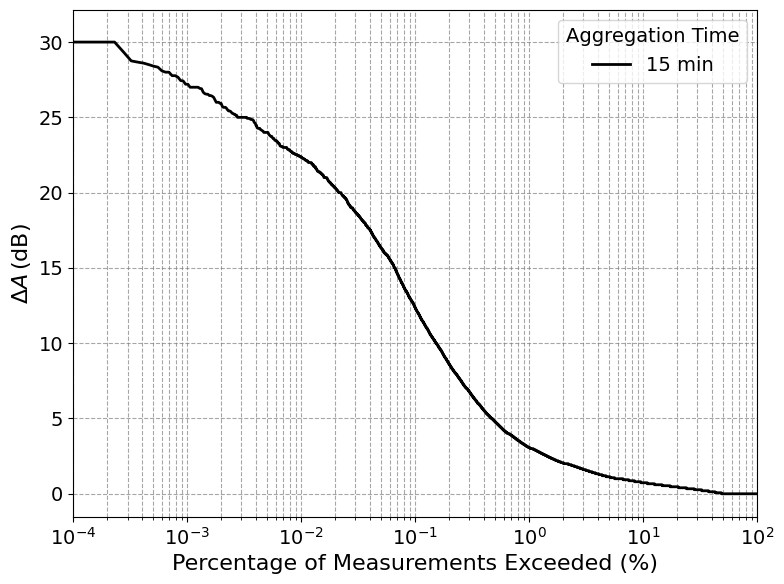

In [ ]:
# @title all links CCDF
att_data  =  links_att_data['att_dry']['median'] #links_att_data["frq"]["raw"]['att_norm_dry']['median']

# data , meta=  filter_raw_meta( links_att_data['att_dry']['median'] , links_metadata, length_range= (0., None) )
param_mean = r"$\Delta A \,(\mathrm{dB})$"
intervals_in_minutes = [  15]

# 2) Build freq_str_list and freq_labels from intervals_in_minutes.
#    Each item 'm' becomes, for example, '5T' and label "5 min".
freq_str_list = [f"{m}T" for m in intervals_in_minutes]
freq_labels   = [f"{m} min" for m in intervals_in_minutes]

plot_exceedance_probability(
    att_data,
    stats=['all'],     # Only one statistic allowed: ['mean'], ['median'], or ['max']
    freq_str_list=freq_str_list,
    freq_labels=freq_labels,
    # freq_labels = None,  # Labels for the legend, parallel to freq_str_list
      x_label='Percentage of Measurements Exceeded (%)',
    y_label     =  param_mean  ,
    title       =  None,
    figsize     = (8, 6),
legend_title='Aggregation Time',
    min_val = 0,
    x_lim=(10**(-4), 1e2),
    # y_lim=(-5,80),
    zero_negative=1,
    grid=True
)




<ipython-input-63-ae5f8dcc1e44>:84: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_obj = df_obj.resample(freq_str).mean()


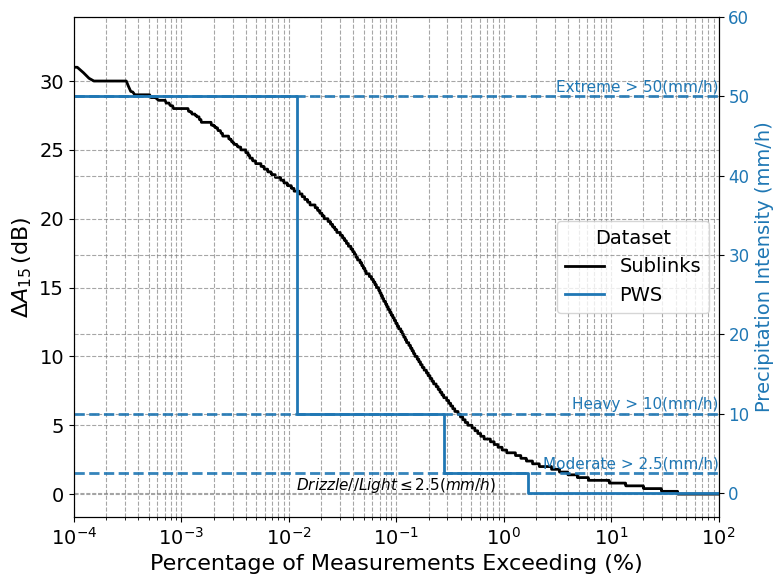

In [ ]:
bin_info = [
    {'range': '[0.0, 2.5)',  'count': 2280204, 'fraction_%': 98.01106910193786},
    {'range': '[2.5, 10.0)', 'count': 39537,   'fraction_%': 1.6994372604746406},
    {'range': '[10.0, 50.0)', 'count': 6455,   'fraction_%': 0.27745826735371437},
    {'range': '[50.0, ∞)',   'count': 280,     'fraction_%': 0.012035370233778469}
]

thresholds = [
  (0, 'Drizzle/Light'),
  (2.5, 'Moderate'),

  (10, 'Heavy'),
  (50, 'Extreme'),
    # (500000, 'Extreme'),
  # (70, 'check')
]

# data , meta=  filter_raw_meta( links_att_data['att_dry']['median'] , links_metadata, length_range= (0., None) )
param_mean = r"$\Delta A_{15} \,(\mathrm{dB})$"
# 3) Call the function
plot_exceedance_probability_c(
    data      = att_data     ,
    stats     = ['all'],
    freq_str  =   '5T',           # or None to skip resampling
    freq_label=   "5 min",
    x_label=      "Percentage of Measurements Exceeding (%)",
    y_label= param_mean,
    # title="My Single-Freq CCDF Plot",
    figsize=(8,6),
    # legend_title="Aggregation",
    min_val=0,
    x_lim=(1e-4, 1e2),

    grid=True,
    steps_bin_info=bin_info,
    steps_thresholds=thresholds,
    steps_right_ylabel="Precipitation Intensity (mm/h)",
)


In [ ]:
# plot_exceedance_probability_c(
#     data=att_data,
#     stats=['all'],
#     freq_str=('15T'),  # example
#     freq_labels=('15 min'),
#     x_label='Percentage of Measurements Exceeded (%)',
#     y_label=r"$\Delta A\,(\mathrm{dB})$",
#     title=None,
#     figsize=(8,6),
#     legend_title='Aggregation Time',
#     min_val=0,
#     x_lim=(1e-4, 1e2),
#     zero_negative=1,
#     grid=True,
#     # --------- new params for the second axis -----------
#     # steps_bin_info=pws_th,
#     steps_thresholds=thresholds,
#     steps_right_ylabel="Rainfall Threshold [mm/h]",
# )

In [ ]:
# 3) Call the function
plot_exceedance_probability_c(
    data=rain_data,
    stats=['all'],
    freq_str='15T',           # or None to skip resampling
    freq_label="15 min",
    x_label="Percentage of Measurements Exceeding (%)",
    y_label="Rain Intensity [mm/h]",
    title="My Single-Freq CCDF Plot",
    figsize=(8,6),
    legend_title="Aggregation",
    min_val=0,
    x_lim=(1e-4, 1e2),
    grid=True,
    steps_bin_info=pws_th,
    steps_thresholds=thresholds,
    steps_right_ylabel="Rain Threshold (mm/h)"
)

NameError: name 'rain_data' is not defined

<ipython-input-58-143eae3e8f49>:303: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_obj.resample(agg_freq).mean() if agg_freq else df_obj


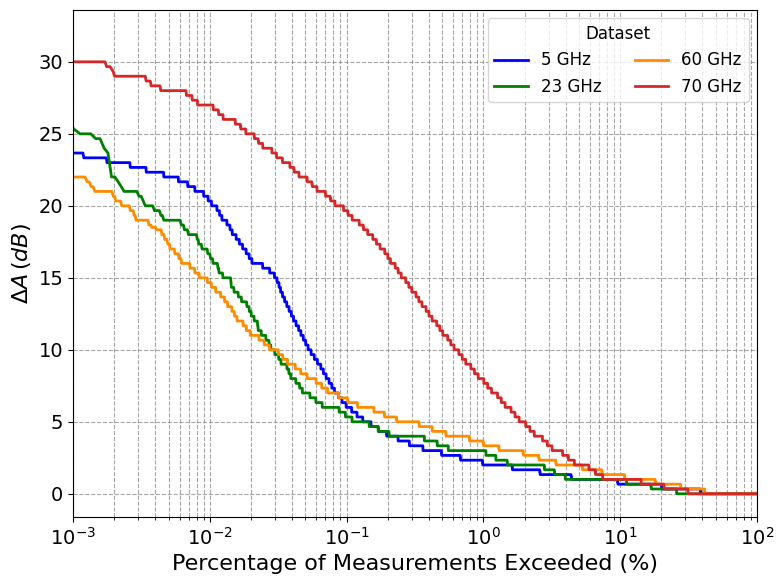

In [ ]:
# @title

raw_att_dict =  links_att_data["frq"]["raw"]['att_dry']['median'].copy() #links_att_data['att_dry']['median'] #links_att_data["frq"]["raw"]['att_norm_dry']['median']

#  links_att_data["frq"]["raw"]['att_norm_dry']['median'].copy()


raw_att_dict['5g_frq'] = filter_raw_meta(
    raw_att_dict['5g_frq'],
    links_metadata,
    # length_range=(0.1,None),
    # freq_range=r["frq"]
)[0]
raw_att_dict['23g_frq'] = filter_raw_meta(
    raw_att_dict['23g_frq'],
    links_metadata,
    # length_range=(0.1,None),
    # freq_range=r["frq"]
)[0]


raw_att_dict['60g_frq'] = filter_raw_meta(
    raw_att_dict['60g_frq'],
    links_metadata,
    # length_range=(0.1,None),
    # freq_range=r["frq"]
)[0]

raw_att_dict['70g_frq'] = filter_raw_meta(
    raw_att_dict['70g_frq'],
    links_metadata,
    # length_range=(0.1,None),
    # freq_range=r["frq"]
)[0]

# Example usage
dataset_styles = {
        '5g_frq':  {'label': '5 GHz',  'color': 'blue'},
            '23g_frq': {'label': '23 GHz', 'color': 'green'},
            '60g_frq': {'label': '60 GHz', 'color': 'darkorange'},
    '70g_frq': {'label': '70 GHz', 'color': 'tab:red'},

}

param_mean = r"$\Delta {A} \,(dB)$"

plot_exceedance_probability_v2(
    # data_frq_plot,
    raw_att_dict,
    # data_plot,
    stats=['all', ],     # Only one statistic allowed: ['mean'], ['median'], or ['max']
    agg_freq = '3T',
    dataset_styles  = dataset_styles ,
    dataset_order=['5g_frq',  '23g_frq', '60g_frq', '70g_frq'],
    # freq_labels=freq_labels,
    # freq_labels = None,  # Labels for the legend, parallel to freq_str_list
      x_label='Percentage of Measurements Exceeded (%)',
    y_label     = param_mean  ,
    title       = None,
    figsize     = (8, 6),
legend_title='Dataset',
    min_val = 0,
    x_lim=(10**(-3), 1e2),
    # y_lim=(-5,30),
    zero_negative=1,
    grid=True
)


In [ ]:
data  =  links_att_data["frq"]["raw"]['att_dry']['median'] #links_att_data['att_dry']['median'] #links_att_data["frq"]["raw"]['att_norm_dry']['median']


plot_exceedance_probability_v2(
    # data_frq_plot,
    data,
    # data_plot,
    stats=['all' ],     # Only one statistic allowed: ['mean'], ['median'], or ['max']
    agg_freq = '15T',
    dataset_styles  = dataset_styles ,
    dataset_order=['5g_frq',  '23g_frq','60g_frq', '70g_frq'],
    # freq_labels=freq_labels,
    # freq_labels = None,  # Labels for the legend, parallel to freq_str_list
    x_label     = 'Percentage of Time Exceeded (%)' ,
    y_label     = param_mean  ,
    title       = None,
    figsize     = (8, 6),
legend_title='Dataset',
    min_val = 0,
    x_lim=(10**(-3), 1e2),
    # y_lim=(-5,30),
    zero_negative=1,
    grid=True
)



In [ ]:
# @title

raw_att_dict = links_att_data["frq"]["raw"]['att_norm_dry']['median'].copy()
raw_att_dict['5g_frq'] = filter_raw_meta(
    raw_att_dict['5g_frq'],
    links_metadata,
    length_range=(0.2,None),
    # freq_range=r["frq"]
)[0]
raw_att_dict['60g_frq'] = filter_raw_meta(
    raw_att_dict['60g_frq'],
    links_metadata,
    length_range=(0.2,None),
    # freq_range=r["frq"]
)[0]

raw_att_dict['70g_frq'] = filter_raw_meta(
    raw_att_dict['70g_frq'],
    links_metadata,
    length_range=(0.2,None),
    # freq_range=r["frq"]
)[0]

# Example usage
dataset_styles = {
        '5g_frq':  {'label': '5 GHz',  'color': 'blue'},
            '23g_frq': {'label': '24 GHz', 'color': 'green'},
            '60g_frq': {'label': '60 GHz', 'color': 'darkorange'},
    '70g_frq': {'label': '70 GHz', 'color': 'tab:red'},

}

sample  = 15
param_mean = r"$\Delta \overline{A}_{15} \,(dB/km)$"

plot_exceedance_probability_v2(
    # data_frq_plot,
    raw_att_dict,
    # data_plot,
    stats=['mean' ,'median', ],     # Only one statistic allowed: ['mean'], ['median'], or ['max']
    agg_freq = f'{sample}T',
    dataset_styles  = dataset_styles ,
    dataset_order=['5g_frq',  '60g_frq','23g_frq', '70g_frq'],
    # freq_labels=freq_labels,
    # freq_labels = None,  # Labels for the legend, parallel to freq_str_list
    x_label     = 'Percentage of time exceeded (%)' ,
    y_label     = param_mean  ,
    title       = None,
    figsize     = (8, 6),
legend_title='Dataset',
    min_val = 0,
    x_lim=(10**(-2.5), 1e2),
    # y_lim=(-5,30),
    zero_negative=1,
    grid=True
)


In [ ]:
# @title

raw_att_dict = links_att_data["frq"]["raw"]['att_dry']['median'].copy()
raw_att_dict['5g_frq'] = filter_raw_meta(
    raw_att_dict['5g_frq'],
    links_metadata,
    length_range=(0.2,None),
    # freq_range=r["frq"]
)[0]
raw_att_dict['60g_frq'] = filter_raw_meta(
    raw_att_dict['60g_frq'],
    links_metadata,
    length_range=(0.2,None),
    # freq_range=r["frq"]
)[0]

raw_att_dict['70g_frq'] = filter_raw_meta(
    raw_att_dict['70g_frq'],
    links_metadata,
    length_range=(0.2,None),
    # freq_range=r["frq"]
)[0]



param_mean = r"$\Delta \overline{A}_{60} \,(dB/km)$"
plot_exceedance_probability_v2(
    # data_frq_plot,
    raw_att_dict,
    # data_plot,
    stats=['mean' ,'median'],     # Only one statistic allowed: ['mean'], ['median'], or ['max']
    agg_freq = '60T',
    dataset_styles  = dataset_styles ,
    dataset_order=['5g_frq', '23g_frq', '60g_frq', '70g_frq'],
    # freq_labels=freq_labels,
    # freq_labels = None,  # Labels for the legend, parallel to freq_str_list
    x_label     = 'Percentage of Time Exceeded (%)' ,
    y_label     = param_mean  ,
    title       = None,
    figsize     = (8, 6),
legend_title='Dataset',
    min_val = 0,
    x_lim=(10**(-2), 1e2),
    # y_lim=(-5,30),
    zero_negative=1,
    grid=True
)


In [ ]:
# @title
def filter_by_length_and_frequency(data_split, links_metadata, ranges):
    """
    Filters a dataset according to multiple (length, frequency) range specifications.

    Parameters:
    -----------
    data_split : dict or DataFrame
        The dataset to filter (e.g., attenuation data).
    links_metadata : dict or DataFrame
        The metadata that includes link length and frequency information.
    ranges : list of dict
        A list where each element is a dictionary with 'len' and 'frq' keys, for example:
        {
            'len': (0.0, 0.5),
            'frq': (0, 50e9)
        }

    Returns:
    --------
    dict
        A dictionary where each key is the string representation of the range dictionary,
        and each value is the filtered dataset for that range.
    """
    results = {}
    for r in ranges:
        key = str(r)
        results[key] = filter_raw_meta(
            data_split,
            links_metadata,
            length_range=r["len"],
            freq_range=r["frq"]
        )[0]
    return results



In [ ]:
# @title
dataset_styles = {
    'PWS': {'color': 'black', },
    'Airports WS': {'color': 'tab:blue',}
}
# Example usage
dataset_styles = {
        '5g_frq':  {'label': '5 GHz',  'color': 'blue'},
            '23g_frq': {'label': '24 GHz', 'color': 'green'},
            '60g_frq': {'label': '60 GHz', 'color': 'darkorange'},
    '70g_frq': {'label': '70 GHz', 'color': 'tab:red'},

}


# Define your ranges as dictionaries containing both length and frequency intervals
r1 = {"len": (0.0, 0.3), "frq": (0, 50e9)}
r2 = {"len": (0.3, None), "frq": (0, 50e9)}
# r3 = {"len": (1.0, None), "frq": (0, 50e9)}

# Use them in filter calls
data_frq_plot  =  links_att_data["frq"]["raw"]['att_dry']['median']
data_plot      =  links_att_data['att_norm_dry']['median']

data_split     =   data_plot #data_frq_plot['5g_frq'] #links_att_data['att_norm_dry']['median']  #links_att_data['att_norm_dry']['median']


# Example usage
if __name__ == "__main__":
    r1 = {"len": (0.1, 0.2), "frq": (0, 10e9)}
    r2 = {"len": (0.2, 1), "frq": (0, 10e9)}
    r3 = {"len": (1.0, None), "frq": (0, 10e9)}

    data_frq_plot = links_att_data["frq"]["raw"]['att_dry']['median']

    data_plot_norm = links_att_data['att_norm_dry']['median']
    data_plot = links_att_data['att_dry']['median']

    # data_split = data_plot  # choose whichever data you need

    # Put the dictionaries into a list
    range_list = [r1, r2 , r3]

    # Filter the data
    restults = {}
    results['norm'] = filter_by_length_and_frequency(data_plot_norm, links_metadata, range_list)
    results['att']  = filter_by_length_and_frequency(data_plot, links_metadata, range_list)

    # 'results' now contains a dictionary of filtered data keyed by each range


In [ ]:
# Use them in filter calls
data_plot      =  links_att_data["frq"]["raw"]['att_dry']['median']
data_plot      =  links_att_data['att_dry']['median']
data_plot_norm    =  links_att_data['att_norm_dry']['median']

raw_att_dict = {}
meta_att_dict = {}


r_short = (0.1 , 0.3)
r = {'len' : r_short, 'frq': (0,1e4)}


raw_att_dict['short_low'], meta_att_dict['short_low'] = filter_raw_meta(
    data_plot,
    links_metadata,
    length_range=r["len"],
    freq_range=r["frq"]
)


r = {'len' : r_short, 'frq': (0,1e4)}

raw_att_dict['short_low_norm'], meta_att_dict['short_low'] = filter_raw_meta(
    data_plot_norm,
    links_metadata,
    length_range=r["len"],
    freq_range=r["frq"]
)


r_short = (0.1 , 0.3)
r = {'len' : r_short, 'frq': (0,1e4)}


raw_att_dict['short_low'], meta_att_dict['short_low'] = filter_raw_meta(
    data_plot,
    links_metadata,
    length_range=r["len"],
    freq_range=r["frq"]
)


r = {'len' : r_short, 'frq': (0,1e4)}

raw_att_dict['short_low_norm'], meta_att_dict['short_low'] = filter_raw_meta(
    data_plot_norm,
    links_metadata,
    length_range=r["len"],
    freq_range=r["frq"]
)


In [ ]:
# @title


param_mean = r"$\Delta \overline{A}_{60} \,(dB/km)$"
plot_exceedance_probability_v2(
    # data_frq_plot,
    raw_att_dict,
    # data_plot,
    stats=['mean' ],     # Only one statistic allowed: ['mean'], ['median'], or ['max']
    agg_freq = '15T',
    dataset_styles  = dataset_styles ,
    # dataset_order=['5g_frq', '23g_frq', '60g_frq', '70g_frq'],
    # freq_labels=freq_labels,
    # freq_labels = None,  # Labels for the legend, parallel to freq_str_list
    x_label     = 'Percentage of Time Exceeded (%)' ,
    y_label     = param_mean  ,
    title       = None,
    figsize     = (8, 6),
legend_title='Dataset',
    min_val = 0,
    x_lim=(10**(-2), 1e2),
    y_lim=(-5,30),
    zero_negative=1,
    grid=True
)


In [ ]:
# @title
import math
import pandas as pd

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Returns the distance in meters between two latitude/longitude points using the Haversine formula.
    """
    R = 6371000.0  # Average radius of Earth in meters
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)

    a = (math.sin(dphi / 2)**2
         + math.cos(phi1) * math.cos(phi2) * math.sin(dlambda / 2)**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

def is_close_point(lat, lon, cluster_dict, max_distance):
    """
    Checks if the given (lat, lon) is within 'max_distance' meters of any reference point
    in cluster_dict. If yes, returns that reference; otherwise returns None.
    """
    for ref_coord in cluster_dict.keys():
        ref_lat, ref_lon = ref_coord
        dist = haversine_distance(lat, lon, ref_lat, ref_lon)
        if dist <= max_distance:
            return ref_coord
    return None

def endpoints_key(row, cluster_dict, max_distance):
    """
    Determines a stable 'key' for the endpoints of a link, treating A->B and B->A identically
    and allowing up to 'max_distance' meters difference to treat them as the same site.

    cluster_dict maps (lat, lon) -> (lat, lon) reference for clustering.
    """
    lat0, lon0 = row['site_0_lat'], row['site_0_lon']
    lat1, lon1 = row['site_1_lat'], row['site_1_lon']

    # Attempt to find an existing reference for site_0
    match0 = is_close_point(lat0, lon0, cluster_dict, max_distance)
    if match0 is None:
        cluster_dict[(lat0, lon0)] = (lat0, lon0)
        match0 = (lat0, lon0)

    # Attempt to find an existing reference for site_1
    match1 = is_close_point(lat1, lon1, cluster_dict, max_distance)
    if match1 is None:
        cluster_dict[(lat1, lon1)] = (lat1, lon1)
        match1 = (lat1, lon1)

    # Sort so that reversing the endpoints yields the same key
    sorted_endpoints = sorted([match0, match1])

    # Return a frozenset to allow grouping
    return frozenset(sorted_endpoints)

def find_link_pairs_with_freq_diff(df, max_distance=50.0, freq_diff=1000.0):
    """
    Identifies pairs (or groups) of rows in 'df' that represent the same physical link endpoints
    within 'max_distance' meters, AND have a frequency difference of at least 'freq_diff'.

    Returns a dictionary:
      - key:   frozenset((endpointA, endpointB)) reference coordinate
      - value: sub-DataFrame containing the rows that share these endpoints and meet the freq-diff condition.
    """
    # Copy to avoid modifying original DataFrame in place
    df_copy = df.copy()

    # Dictionary to keep track of cluster references
    cluster_dict = {}

    # Create a column for endpoint grouping
    df_copy['endpoints_key'] = df_copy.apply(
        endpoints_key, axis=1, args=(cluster_dict, max_distance)
    )

    # Group by the new endpoints_key
    grouped = df_copy.groupby('endpoints_key')

    results = {}
    for key, group_df in grouped:
        if len(group_df) > 1:
            # Check frequency difference
            freqs = group_df['frequency']
            if (freqs.max() - freqs.min()) >= freq_diff:
                results[key] = group_df.copy()

    return results


# --------------------- SAMPLE USAGE ---------------------
if __name__ == "__main__":
    # Create a sample DataFrame

    df = pd.DataFrame(links_metadata)


    # Look for link pairs in the DataFrame
    # with up to 50 m difference in endpoints and at least 1000 Hz difference in frequency
    pairs = find_link_pairs_with_freq_diff(df, max_distance=50.0, freq_diff=1000.0)

# le usage:
# Suppose 'df' is your DataFrame with columns:
# [cml_id, sublink_id, frequency, length, site_0_lat, site_0_lon, site_1_lat, site_1_lon, rsl, polarization]
# double_links_dict = find_double_links_df(links_metadata, max_distance=10.0)
# The result is a dictionary keyed by the canonical endpoint pairs, each value is a sub-DataFrame.
for key, sub_df in pairs.items():
    print(f"Key: {key}")
    display(sub_df)
    print("\n")

In [ ]:
data_frq_plot['5g_frq']

In [ ]:
data_plot  =  links_att_data["frq"]["raw"]['att_norm_dry']['median']

for data in data_plot :
  print(data, data_plot[data].shape)


In [ ]:
# @title helper: quantile_plots


def quantile_and_plot(data, stats=['mean', 'all'], resample_intervals=None, log_x=False, log_y=True,
                      swap_axes=False, plot_params=None, data_type="attenuation",
                      lower_q=None, upper_q=None, lowest_p=None, legend_labels=None):
    """
    Computes and plots the empirical exceedance probability (CDF) for multiple datasets on the same plot.

    Parameters:
    - data (pd.DataFrame or dict of DataFrames): Input DataFrame(s) containing multiple attenuation or rain rate measurements.
    - stats (list): Determines the approach for computing the CDF.
                    - ['mean']: Computes the exceedance for the mean over time.
                    - ['mean', 'all']: Computes both the mean exceedance and the full distribution quantiles.
    - resample_intervals (list or None): List of resampling intervals in minutes (e.g., [5, 15]).
                                          If None, no resampling is performed.
    - log_x (bool): Whether to use log scale for the X-axis.
    - log_y (bool): Whether to use log scale for the Y-axis (exceedance probability).
    - swap_axes (bool): Whether to swap the X and Y axes.
    - plot_params (dict): Dictionary containing plot format settings (e.g., font sizes, labels, figure size, legend labels).
    - data_type (str): "attenuation" for attenuation data (dB) or "rain" for rain rate (mm/h).
    - lower_q (float or None): Lower quantile threshold for filtering extreme values.
    - upper_q (float or None): Upper quantile threshold for filtering extreme values.
    - lowest_p (float or None): If set, limits the Y-axis to avoid excessive range.
    - legend_labels (dict or None): Custom legend labels for dictionary input.
                                    Should be in the form `{key: "Custom Label"}`.

    Returns:
    - dict: Dictionary containing exceedance probability data.
    """

    # Default plot parameters
    default_plot_params = {
        "figsize": (8, 6),
        "xlabel": "Δ Attenuation (dB)" if data_type == "attenuation" else "Rain Rate (mm/h)",
        "ylabel": "Probability Exceedance",
        "font_size": 12,
        "legend_font_size": 10,
        "grid": True,
        "colors": ['black', 'dimgray', 'gray', 'darkgray', 'silver', 'brown', 'purple', 'navy'],
        "linestyles": ['-', '--',  ':', '-.',],
    }

    # Merge user-defined plot parameters with defaults
    if plot_params:
        default_plot_params.update(plot_params)

    cdf_results = {}
    plt.figure(figsize=default_plot_params["figsize"])  # Create ONE figure for all datasets
    color_index = 0
    linestyle_index = 0
    ###
    # Get legend labels from plot_params (if available)
    legend_labels = plot_params.get("legend_labels", {}) if plot_params else {}

    # Handle dictionary input
    if isinstance(data, dict):
        for key, df in data.items():
            for stat in stats:
                for interval in resample_intervals or [None]:
                    df_resampled = df.resample(f'{interval}T').mean() if interval else df.copy()
                    result = compute_cdf(df_resampled, stat, lower_q, upper_q)
                    if result:
                        sorted_values, exceedance_prob = result

                        # Get correct label for this key from legend_labels (fallback to key name)
                        dataset_label = legend_labels.get(key, key)

                        plot_cdf(sorted_values, exceedance_prob, dataset_label, stat, interval,
                                 default_plot_params, color_index, linestyle_index)
                        cdf_results[(key, stat, interval)] = (sorted_values, exceedance_prob)
                        color_index += 1
                        linestyle_index += 1

        finalize_plot(default_plot_params, log_x, log_y, swap_axes, lowest_p)
        return cdf_results  # Return after plotting all datasets

    # If `data` is a single DataFrame
    # Get legend labels from plot_params
    legend_labels = plot_params.get("legend_labels", {}) if plot_params else {}

    # Handle single DataFrame input
    for stat in stats:
        for interval in resample_intervals or [None]:
            df_resampled = data.resample(f'{interval}T').mean() if interval else data.copy()
            result = compute_cdf(df_resampled, stat, lower_q, upper_q)
            if result:
                sorted_values, exceedance_prob = result

                # Get correct label for this stat from legend_labels or use default
                dataset_label = legend_labels.get(stat, f"{stat.capitalize()} (Single Data)")

                plot_cdf(sorted_values, exceedance_prob, dataset_label, stat, interval,
                         default_plot_params, color_index, linestyle_index)
                cdf_results[(stat, interval)] = (sorted_values, exceedance_prob)
                color_index += 1
                linestyle_index += 1

    finalize_plot(default_plot_params, log_x, log_y, swap_axes, lowest_p)
    return cdf_results


def compute_cdf(df_resampled, stat, lower_q, upper_q):
    """Computes the empirical CDF based on given statistics."""
    if stat == 'mean':
        df_resampled = df_resampled.mean(axis=1).to_frame(name='mean')

    valid_values = df_resampled.values.flatten()
    valid_values = valid_values[~np.isnan(valid_values)]  # Ignore NaNs

    if len(valid_values) == 0:
        return None  # Skip if no valid data

    if lower_q is not None and upper_q is not None:
        q_low, q_high = np.quantile(valid_values, [lower_q, upper_q])
        valid_values = valid_values[(valid_values >= q_low) & (valid_values <= q_high)]

    if len(valid_values) == 0:
        return None

    sorted_values = np.sort(valid_values)
    exceedance_prob = 1 - np.arange(1, len(sorted_values) + 1) / len(sorted_values)

    return sorted_values, exceedance_prob


def plot_cdf(sorted_values, exceedance_prob, dataset_label, stat, interval, plot_params, color_index, linestyle_index):
    """Plots the computed CDF for a dataset."""
    color = plot_params["colors"][color_index % len(plot_params["colors"])]
    linestyle = plot_params["linestyles"][linestyle_index % len(plot_params["linestyles"])]
    label = f'{dataset_label}' if interval else f'{dataset_label} - {stat} (All Data)'

    plt.plot(sorted_values, exceedance_prob, label=label, color=color, linestyle=linestyle)


def finalize_plot(plot_params, log_x, log_y, swap_axes, lowest_p):
    """Finalizes the plot with labels, log scales, and limits."""
    if swap_axes:
        plt.xlabel(plot_params["ylabel"], fontsize=plot_params["font_size"])
        plt.ylabel(plot_params["xlabel"], fontsize=plot_params["font_size"])
    else:
        plt.xlabel(plot_params["xlabel"], fontsize=plot_params["font_size"])
        plt.ylabel(plot_params["ylabel"], fontsize=plot_params["font_size"])

    # Set log scales if needed
    if log_x:
        plt.xscale('log')
    if log_y:
        plt.yscale('log')

    # Adjust Y-axis limits
    if log_y and lowest_p:
        plt.ylim([max(10**(-1 * lowest_p), np.min(plt.ylim()) * 0.9), 1])  # Trim lower values

    # Adjust tick size and grid
    plt.xticks(fontsize=plot_params["font_size"])
    plt.yticks(fontsize=plot_params["font_size"])
    plt.legend(fontsize=plot_params["legend_font_size"])
    if plot_params["grid"]:
        plt.grid(True, which="both", linestyle="--")

    plt.show()

# @title
def quantile_and_plot(data,
                      stats=['mean', 'all'],
                      resample_intervals=None,
                      log_x=False,
                      log_y=True,
                      swap_axes=False,
                      plot_params=None,
                      data_type="attenuation",
                      lower_q=None,
                      upper_q=None,
                      lowest_p=None,
                      legend_labels=None):
    """
    Computes and plots the empirical exceedance probability (CDF) for multiple datasets on the same plot.

    Parameters:
    - data (pd.DataFrame or dict of DataFrames): Input DataFrame(s) containing multiple attenuation or rain rate measurements.
    - stats (list): Determines the approach for computing the CDF.
                    - 'mean'   => Computes the exceedance for the mean over time.
                    - 'median' => Computes the exceedance for the median over time.
                    - 'min'    => Computes the exceedance for the min over time.
                    - 'max'    => Computes the exceedance for the max over time.
                    - 'all'    => Computes the full distribution (all data).
    - resample_intervals (list or None): List of resampling intervals in minutes (e.g., [5, 15]).
                                          If None, no resampling is performed.
    - log_x (bool): Whether to use log scale for the X-axis.
    - log_y (bool): Whether to use log scale for the Y-axis (exceedance probability).
    - swap_axes (bool): Whether to swap the X and Y axes.
    - plot_params (dict): Dictionary containing plot format settings (e.g., font sizes, labels, figure size, legend labels).
    - data_type (str): "attenuation" for attenuation data (dB) or "rain" for rain rate (mm/h).
    - lower_q (float or None): Lower quantile threshold for filtering extreme values.
    - upper_q (float or None): Upper quantile threshold for filtering extreme values.
    - lowest_p (float or None): If set, limits the Y-axis to avoid excessive range.
    - legend_labels (dict or None): Custom legend labels for dictionary input.
                                    Should be in the form `{key: "Custom Label"}`.

    Returns:
    - dict: Dictionary containing exceedance probability data.
    """
    # --------------------------------
    # Default plot parameters
    # --------------------------------
    default_plot_params = {
        "figsize": (8, 6),
        "xlabel": "Δ Attenuation (dB)" if data_type == "attenuation" else "Rain Rate (mm/h)",
        "ylabel": "Probability Exceedance",
        "font_size": 12,
        "legend_font_size": 10,
        "grid": True,
        "colors": ['black', 'dimgray', 'gray', 'darkgray', 'silver', 'brown', 'purple', 'navy'],
        "linestyles": ['-', '--', ':', '-.'],
    }

    if plot_params:
        default_plot_params.update(plot_params)

    cdf_results = {}
    plt.figure(figsize=default_plot_params["figsize"])  # Create ONE figure for all datasets

    color_index = 0
    linestyle_index = 0

    # -------------------------------
    # Get legend labels
    # -------------------------------
    legend_labels = plot_params.get("legend_labels", {}) if plot_params else {}

    # -------------------------------
    # Handle dictionary input
    # -------------------------------
    if isinstance(data, dict):
        for key, df in data.items():
            for stat in stats:
                for interval in resample_intervals or [None]:
                    df_resampled = df.resample(f'{interval}T').mean() if interval else df.copy()

                    result = compute_cdf(df_resampled, stat, lower_q, upper_q)
                    if result:
                        sorted_values, exceedance_prob = result
                        dataset_label = legend_labels.get(key, key)  # fallback label

                        plot_cdf(sorted_values,
                                 exceedance_prob,
                                 dataset_label,
                                 stat,
                                 interval,
                                 default_plot_params,
                                 color_index,
                                 linestyle_index)

                        cdf_results[(key, stat, interval)] = (sorted_values, exceedance_prob)
                        color_index += 1
                        linestyle_index += 1

        finalize_plot(default_plot_params, log_x, log_y, swap_axes, lowest_p)
        return cdf_results

    # -------------------------------
    # If data is a single DataFrame
    # -------------------------------
    for stat in stats:
        for interval in resample_intervals or [None]:
            df_resampled = data.resample(f'{interval}T').mean() if interval else data.copy()

            result = compute_cdf(df_resampled, stat, lower_q, upper_q)
            if result:
                sorted_values, exceedance_prob = result

                # label fallback
                dataset_label = legend_labels.get(stat, f"{stat.capitalize()} (Single Data)")

                plot_cdf(sorted_values,
                         exceedance_prob,
                         dataset_label,
                         stat,
                         interval,
                         default_plot_params,
                         color_index,
                         linestyle_index)
                cdf_results[(stat, interval)] = (sorted_values, exceedance_prob)

                color_index += 1
                linestyle_index += 1

    finalize_plot(default_plot_params, log_x, log_y, swap_axes, lowest_p)
    return cdf_results


def compute_cdf(df_resampled, stat, lower_q, upper_q):
    """
    Computes the empirical CDF based on the given stat:
    - 'mean'   => mean over columns
    - 'median' => median over columns
    - 'min'    => min over columns
    - 'max'    => max over columns
    - 'all'    => full distribution
    """
    # -----------------------
    # ONLY CHANGE STARTS HERE
    # -----------------------
    if stat == 'mean':
        df_resampled = df_resampled.mean(axis=1).to_frame(name='mean')
    elif stat == 'median':
        df_resampled = df_resampled.median(axis=1).to_frame(name='median')
    elif stat == 'min':
        df_resampled = df_resampled.min(axis=1).to_frame(name='min')
    elif stat == 'max':
        df_resampled = df_resampled.max(axis=1).to_frame(name='max')
    elif stat == 'all':
        # keep all columns as is
        pass
    else:
        # if the user passes an unsupported stat, just return None or handle differently
        print(f"Unsupported statistic: {stat}")
        return None
    # -----------------------
    # ONLY CHANGE ENDS HERE
    # -----------------------

    valid_values = df_resampled.values.flatten()
    valid_values = valid_values[~np.isnan(valid_values)]  # Ignore NaNs

    if len(valid_values) == 0:
        return None

    # Filter by quantiles if provided
    if lower_q is not None and upper_q is not None:
        q_low, q_high = np.quantile(valid_values, [lower_q, upper_q])
        valid_values = valid_values[(valid_values >= q_low) & (valid_values <= q_high)]

    if len(valid_values) == 0:
        return None

    # Sort values and compute exceedance
    sorted_values = np.sort(valid_values)
    exceedance_prob = 1 - np.arange(1, len(sorted_values) + 1) / len(sorted_values)

    return sorted_values, exceedance_prob


def plot_cdf(sorted_values,
             exceedance_prob,
             dataset_label,
             stat,
             interval,
             plot_params,
             color_index,
             linestyle_index):
    """
    Plots the computed CDF for a dataset.
    """
    color = plot_params["colors"][color_index % len(plot_params["colors"])]
    linestyle = plot_params["linestyles"][linestyle_index % len(plot_params["linestyles"])]
    label = f'{dataset_label}' if interval else f'{dataset_label} - {stat} (All Data)'

    plt.plot(sorted_values, exceedance_prob, label=label, color=color, linestyle=linestyle)


def finalize_plot(plot_params, log_x, log_y, swap_axes, lowest_p):
    """
    Finalizes the plot with labels, log scales, and limits.
    """
    if swap_axes:
        plt.xlabel(plot_params["ylabel"], fontsize=plot_params["font_size"])
        plt.ylabel(plot_params["xlabel"], fontsize=plot_params["font_size"])
    else:
        plt.xlabel(plot_params["xlabel"], fontsize=plot_params["font_size"])
        plt.ylabel(plot_params["ylabel"], fontsize=plot_params["font_size"])

    if log_x:
        plt.xscale('log')
    if log_y:
        plt.yscale('log')

    # Adjust Y-axis lower limit if needed
    if log_y and lowest_p:
        current_ymin, current_ymax = plt.ylim()
        new_ymin = max(10**(-1 * lowest_p), current_ymin)
        plt.ylim([new_ymin, current_ymax])

    plt.xticks(fontsize=plot_params["font_size"])
    plt.yticks(fontsize=plot_params["font_size"])
    plt.legend(fontsize=plot_params["legend_font_size"])

    if plot_params["grid"]:
        plt.grid(True, which="both", linestyle="--")

    plt.show()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
# @title
import numpy as np
import pandas as pd

def proportion_of_negative_values(data, th = 1e-5):
    """
    Returns the fraction of values below 0 in 'data'.
    'data' can be a single DataFrame or a dict of DataFrames.
    Ignores NaNs.
    """
    # 1. If data is a single DataFrame, wrap it in a dict
    if isinstance(data, pd.DataFrame):
        data = {'': data}

    # 2. Concatenate all values from all DataFrames
    all_values = []
    for df in data.values():
        # Flatten the DataFrame to 1D, ignoring NaNs
        vals = df.values.flatten()
        all_values.append(vals[~np.isnan(vals)])
    all_values = np.concatenate(all_values)

    # 3. Count how many are negative
    negative_count = np.count_nonzero(all_values < th)
    total_count = len(all_values)

    if total_count == 0:
        return 0.0  # No valid data

    proportion_negative = negative_count / total_count
    return proportion_negative

# Example usage:
# If you have a single DataFrame 'df':
# prop_neg = proportion_of_negative_values(df)
# print(f"Proportion of negative values: {prop_neg:.4f}")

# If you have multiple DataFrames in


In [ ]:
# @title split signal wet/dry


# --- Your existing parameters/settings ---
data_split        = 1
init_wet_dry_dict = 1
# ---------------------------------------------------------------------
# 2) Initialize and fill a dictionary with wet/dry results
# ---------------------------------------------------------------------
 # Assume you want to create the new dictionary


window     = '0.5h'
# stat       = 'max'
# group      = '60g_frq'

# We'll look at 'frq' and 'att' keys as in your example:
dry_wet_window = {'frq', 'att'}
# ---------------------------------------------------------------------
# 1) Classify wet/dry windows if data_split is activated
# ---------------------------------------------------------------------

# splitted_data , labels_frq = split_by_freq_df(links_att_data, links_metadata, freq_ranges ,min_length = 0.4 )
# links_att_data['frq'] = splitted_data


if data_split:
    wet_hours = classify_wet_window(df_weather_analysis['precip_airports'] ,
                           time_split= window,
                           threshold_mean=0.2,
                           threshold_median=0.05,
                          #  threshold_max=2
                                    )

else:
    # If not splitting, you could define wet_hours as empty or skip altogether
    wet_hours = []



if init_wet_dry_dict:
    # This will hold your final split stats, mirroring the structure
    wet_dry_dict = {}

    # Loop over whichever top-level categories you want (e.g. 'frq' or 'att')
    for data_type in dry_wet_window:
        # Safety check in case 'data_type' is missing in links_att_data
        if data_type not in links_att_data:
            continue

        # We'll store results in wet_dry_dict under the same key
        wet_dry_dict[data_type] = {}

        # Explore the substructure: e.g. links_att_data['frq']['raw'][param][stat][group]
        if 'raw' not in links_att_data[data_type]:
            continue

        wet_dry_dict[data_type]['raw'] = {}

        # Now loop over all 'param' keys
        for param in links_att_data[data_type]['raw']:
            wet_dry_dict[data_type]['raw'][param] = {}

            # Loop over all 'stat' keys under each param
            for st in links_att_data[data_type]['raw'][param]:
                wet_dry_dict[data_type]['raw'][param][st] = {}

                # Loop over all 'group' keys under each stat
                for grp in links_att_data[data_type]['raw'][param][st]:
                    # This is the actual DataFrame/Series we want to split
                    analyze_data = links_att_data[data_type]['raw'][param][st][grp]

                    # -----------------------------------------------------------------
                    # 3) Split the data into wet/dry windows & compute stats
                    # -----------------------------------------------------------------
                    df_split          = split_df_by_windows(analyze_data, wet_hours, time_split=window)
                    hourly_stats_dict = compute_window_stats(df_split, time_split=window)

                    # Store the results in our wet_dry_dict with the same structure
                    wet_dry_dict[data_type]['raw'][param][st][grp] = hourly_stats_dict

    # At this point, wet_dry_dict has the same hierarchical keys as links_att_data
    # but contains the aggregated stats for wet/dry windows.
    # You can now use or inspect wet_dry_dict as needed.
    print("Wet/Dry dictionary structure initialized and populated:")
    # print_dict_structure(wet_dry_dict)

else:
    print("Wet/dry dictionary initialization was skipped.")


In [ ]:
# @title


def compute_cdf(df_resampled, stat, lower_q, upper_q):
    """
    Computes the empirical CDF for a given statistic.
    """
    if stat == 'mean':
        df_resampled = df_resampled.mean(axis=1).to_frame(name='mean')
    elif stat == 'median':
        df_resampled = df_resampled.median(axis=1).to_frame(name='median')
    elif stat == 'min':
        df_resampled = df_resampled.min(axis=1).to_frame(name='min')
    elif stat == 'max':
        df_resampled = df_resampled.max(axis=1).to_frame(name='max')
    elif stat == 'all':
        pass  # keep all columns
    else:
        print(f"Unsupported statistic: {stat}")
        return None

    valid_values = df_resampled.values.flatten()
    valid_values = valid_values[~np.isnan(valid_values)]
    if len(valid_values) == 0:
        return None

    # Filter outliers by quantile if provided
    if lower_q is not None and upper_q is not None:
        q_low, q_high = np.quantile(valid_values, [lower_q, upper_q])
        valid_values = valid_values[(valid_values >= q_low) & (valid_values <= q_high)]
        if len(valid_values) == 0:
            return None

    # Sort and compute exceedance probability
    sorted_values = np.sort(valid_values)
    exceedance_prob = 1 - np.arange(1, len(sorted_values) + 1) / len(sorted_values)

    return sorted_values, exceedance_prob



def plot_cdf(sorted_values,
             exceedance_prob,
             dataset_label,
             plot_params,
             color_index,
             linestyle_index):
    """
    Plots the computed CDF for a dataset onto the existing figure.
    """
    color = plot_params["colors"][color_index % len(plot_params["colors"])]
    linestyle = plot_params["linestyles"][linestyle_index % len(plot_params["linestyles"])]
    label = dataset_label

    plt.plot(sorted_values, exceedance_prob, label=label, color=color, linestyle=linestyle)

def finalize_plot(plot_params, log_x, log_y, swap_axes, lowest_p, highest_p):
    """
    Finalizes the plot: axis labels, logs, axis limits, legend, and optional title/legend title.
    """
    # Axis labels
    if swap_axes:
        plt.xlabel(plot_params["ylabel"], fontsize=plot_params["font_size"])
        plt.ylabel(plot_params["xlabel"], fontsize=plot_params["font_size"])
    else:
        plt.xlabel(plot_params["xlabel"], fontsize=plot_params["font_size"])
        plt.ylabel(plot_params["ylabel"], fontsize=plot_params["font_size"])

    # Plot title if present
    if "title" in plot_params:
        plt.title(plot_params["title"], fontsize=plot_params["font_size"])

    # Apply log scales if requested
    if log_x:
        plt.xscale('log')
    if log_y:
        plt.yscale('log')

    # Adjust Y-limits (log scale) if needed
    if log_y:
        current_ymin, current_ymax = plt.ylim()

        if lowest_p is not None:
            # Force lower limit: 10^-lowest_p
            new_ymin = max(10**(-lowest_p), current_ymin)
            plt.ylim(bottom=new_ymin)

        if highest_p is not None:
            # Force upper limit: 10^highest_p
            new_ymax = max(10**(highest_p), current_ymax)
            plt.ylim(top=new_ymax)

    # Optional legend title
    legend_title = plot_params.get("legend_title", None)
    legend_font_size = plot_params.get("legend_font_size", 10)
    # New: separate title font size (default to same as legend_font_size if not set)
    legend_title_size = plot_params.get("legend_title_size", legend_font_size)

    if legend_title:
        plt.legend(
            fontsize=legend_font_size,
            title=legend_title,
            title_fontsize=legend_title_size
        )
    else:
        plt.legend(fontsize=legend_font_size)

    # Grid
    if plot_params["grid"]:
        plt.grid(True, which="both", linestyle="--")

    # Set font sizes for tick labels
    plt.xticks(fontsize=plot_params["font_size"])
    plt.yticks(fontsize=plot_params["font_size"])

    plt.show()
def quantile_and_plot(data,
                      stats=['mean', 'all'],
                      resample_intervals=None,
                      log_x=False,
                      log_y=True,
                      swap_axes=False,
                      plot_params=None,
                      data_type="attenuation",
                      lower_q=None,
                      upper_q=None,
                      lowest_p=None,
                      highest_p=None):
    """
    Computes and plots the empirical exceedance probability (CDF) for multiple datasets
    on the same plot. See docstring for details.
    """

    # ------------------ Default Plot Parameters ------------------
    default_plot_params = {
        "figsize": (8, 6),
        "xlabel": "Δ Attenuation (dB)" if data_type == "attenuation" else "Rain Rate (mm/h)",
        "ylabel": "Exceedance Probability",
        # optional: "title": "Figure Title"
        # optional: "legend_title": "Some Legend Title"
        "font_size": 12,
        "legend_font_size": 10,
        "grid": True,
        "colors": ['black', 'dimgray', 'gray', 'darkgray', 'silver', 'brown', 'purple', 'navy'],
        "linestyles": ['-', '--', ':', '-.'],
        # "legend_labels": {"key_name": "Custom Label"}
    }

    if plot_params:
        default_plot_params.update(plot_params)

    plt.figure(figsize=default_plot_params["figsize"])
    cdf_results = {}

    color_index = 0
    linestyle_index = 0

    # Legend labels dictionary
    legend_labels = default_plot_params.get("legend_labels", {})

    # ------------------ Distinguish single DataFrame vs. dict of DataFrames ------------------
    if isinstance(data, dict):
        # If data is a dictionary of DataFrames
        for key, df in data.items():
            for stat in stats:
                for interval in (resample_intervals or [None]):
                    if interval:
                        df_resampled = df.resample(f'{interval}T').mean()
                    else:
                        df_resampled = df.copy()

                    result = compute_cdf(df_resampled, stat, lower_q, upper_q)
                    if result:
                        sorted_values, exceedance_prob = result
                        # Use custom label if available
                        dataset_label = legend_labels.get(key, key)

                        plot_cdf(sorted_values,
                                 exceedance_prob,
                                 dataset_label,
                                 default_plot_params,
                                 color_index,
                                 linestyle_index)

                        cdf_results[(key, stat, interval)] = (sorted_values, exceedance_prob)
                        color_index += 1
                        linestyle_index += 1

        finalize_plot(default_plot_params, log_x, log_y, swap_axes, lowest_p, highest_p)
        return cdf_results

    else:
        # If data is a single DataFrame
        for stat in stats:
            for interval in (resample_intervals or [None]):
                if interval:
                    df_resampled = data.resample(f'{interval}T').mean()
                else:
                    df_resampled = data.copy()

                result = compute_cdf(df_resampled, stat, lower_q, upper_q)
                if result:
                    sorted_values, exceedance_prob = result
                    # fallback label
                    dataset_label = legend_labels.get(stat, f"{stat.capitalize()} Data")

                    plot_cdf(sorted_values,
                             exceedance_prob,
                             dataset_label,
                             default_plot_params,
                             color_index,
                             linestyle_index)

                    cdf_results[(stat, interval)] = (sorted_values, exceedance_prob)

                    color_index += 1
                    linestyle_index += 1

        finalize_plot(default_plot_params, log_x, log_y, swap_axes, lowest_p, highest_p)
        return cdf_results


In [ ]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_exceedance_probability_10min(
    data,
    stats=('all','mean','median','max'),
    freq_str='10T',  # 10-minute aggregation by default
    x_label='Percentage of Time the Ordinate Is Exceeded (%)',
    y_label='Rain Rate [mm/h]',
    title=None,
    figsize=(8,6),
    legend_title='Statistics',
    grid=True
):
    """
    Plots exceedance probability curves (log-scale x-axis) for a single
    10-minute aggregation of rainfall data using multiple statistics:
    'all', 'mean', 'median', 'max'.

    Parameters
    ----------
    data : pd.DataFrame or dict
        If a DataFrame, it should have a DateTimeIndex and columns with rainfall values.
        If a dict, it should map a label (str) -> DataFrame.
    stats : tuple
        Which statistics to plot. Possible values: 'all','mean','median','min','max'.
    freq_str : str
        Pandas offset alias for time-based resampling (default '10T' = 10 minutes).
    x_label : str
        Label for the x-axis (exceedance percentage).
    y_label : str
        Label for the y-axis (rain rate, attenuation, etc.).
    title : str or None
        If provided, used as the plot title.
    figsize : tuple
        Figure size in inches.
    legend_title : str
        Title shown in the legend box.
    grid : bool
        Whether to show grid lines on the plot.
    """

    # 1. Prep figure
    plt.figure(figsize=figsize)
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Helper function to compute exceedance data
    def compute_exceedance(values):
        """
        Given a 1D array of numeric values, sort ascending and compute
        percentage of time each value is exceeded.
        Returns sorted_values, exceedance_pct
        """
        values = values[~np.isnan(values)]
        if len(values) == 0:
            return None, None

        sorted_vals = np.sort(values)
        n = len(sorted_vals)
        exceed_prob = 1.0 - (np.arange(1, n+1)/n)
        exceed_pct = exceed_prob * 100.0
        return sorted_vals, exceed_pct

    # A small utility to collapse data based on the chosen statistic
    def apply_stat(df, stat):
        if stat == 'all':
            # Return every column's data; we'll flatten
            arr = df.values.flatten()
        elif stat == 'mean':
            arr = df.mean(axis=1).values
        elif stat == 'median':
            arr = df.median(axis=1).values
        elif stat == 'max':
            arr = df.max(axis=1).values
        elif stat == 'min':
            arr = df.min(axis=1).values
        else:
            raise ValueError(f"Unsupported stat: {stat}")
        return arr

    # If data is a single DataFrame, wrap it in a dict for a uniform approach
    if isinstance(data, pd.DataFrame):
        data = {'': data}  # empty key means "no extra label"

    # 2. Iterate over dictionary items
    color_idx = 0
    for name, df in data.items():
        # Resample to 10-minute mean
        df_10min = df.resample(freq_str).mean()

        # For each requested stat, compute exceedance
        for stat in stats:
            # Flatten or aggregate the data by 'stat'
            values = apply_stat(df_10min, stat)
            sorted_vals, exceed_pct = compute_exceedance(values)
            if sorted_vals is None:
                continue

            label = stat.capitalize()
            # If there's a dictionary label, prepend it, unless it's empty
            if name:
                label = f"{name} - {label}"

            # Plot
            color = color_cycle[color_idx % len(color_cycle)]
            plt.plot(exceed_pct, sorted_vals,
                     label=label, color=color)

            color_idx += 1

    # 3. Final formatting
    plt.xscale('log')  # log-scale for x-axis
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    if title:
        plt.title(title, fontsize=14)

    plt.legend(title=legend_title, fontsize=11, title_fontsize=11)
    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [ ]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_exceedance_probability(
    data,
    stats=['mean'],   # Must be exactly one value from ['mean','median','max','all']
    freq_str_list=('10T','30T','60T'),
    freq_labels=None,
    x_label='Percentage of Time the Ordinate Is Exceeded (%)',
    y_label='Rain Rate [mm/h]',
    title=None,
    figsize=(8, 6),
    legend_title='Statistics',
    grid=True,
    x_lim=None  # e.g. (1e-4, 1e-1)
):
    """
    Plots exceedance probability curves for exactly one chosen statistic
    across multiple resampling intervals, all in black lines.

    This function can accept either:
      - A single DataFrame (with DateTimeIndex) for 'data',
      - OR a dictionary of DataFrames (key=dataset name, value=DataFrame),
        which will all be plotted on the same figure.

    If 'data' is a dict of multiple DataFrames, each DataFrame is plotted in
    the same color (black) but with distinct line labels (one label per DataFrame
    plus the resampling interval). Each resampling interval also has a distinct
    line style.

    Parameters
    ----------
    data : pd.DataFrame or dict of {str : pd.DataFrame}
        If a single DataFrame, it must have a DateTimeIndex and numeric columns.
        If a dict, each key is a label -> a DataFrame with DateTimeIndex.
    stats : list of str
        Exactly one statistic from ['mean','median','max','all'].
        - 'all' flattens all columns after resampling.
        - 'mean', 'median', 'max' compute that aggregator row-wise.
    freq_str_list : tuple of str
        Pandas offset aliases for time-based resampling (e.g. ('10T','30T','60T')).
    freq_labels : tuple of str or None
        Labels corresponding to freq_str_list, e.g. ('10 min','30 min','60 min').
        If None, defaults to freq_str_list.
    x_label : str
        X-axis label (exceedance percentage, log scale).
    y_label : str
        Y-axis label (rain rate, attenuation, etc.).
    title : str or None
        Optional figure title.
    figsize : tuple
        Figure size in inches.
    legend_title : str
        Title displayed above the legend entries.
    grid : bool
        Whether to show grid lines.
    x_lim : tuple or None
        If provided, sets x-axis limits, e.g. (1e-4, 1e-1) for log scale.
    """

    # Ensure only one statistic is passed
    if len(stats) != 1:
        raise ValueError("Please provide exactly ONE statistic in the 'stats' list. E.g. stats=['mean'].")
    stat = stats[0]
    if stat not in ['mean','median','max','all']:
        raise ValueError("Unsupported statistic. Must be one of ['mean','median','max','all'].")

    # If freq_labels is None, default them to the freq_str_list
    if freq_labels is None:
        freq_labels = freq_str_list
    if len(freq_labels) != len(freq_str_list):
        raise ValueError("freq_labels and freq_str_list must have the same length.")

    # If data is a single DataFrame, wrap it in a dict
    if isinstance(data, pd.DataFrame):
        data = {'': data}

    # Prepare the figure
    plt.figure(figsize=figsize)
    # We'll fix the color to black and cycle only the line styles
    linestyle_cycle = ['-', '--', ':', '-.']

    # Helper function: compute exceedance
    def compute_exceedance(values):
        """Returns sorted_vals, exceed_pct"""
        values = values[~np.isnan(values)]
        if len(values) == 0:
            return None, None
        sorted_vals = np.sort(values)
        n = len(sorted_vals)
        exceed_prob = 1.0 - (np.arange(1, n+1)/n)
        exceed_pct = exceed_prob * 100.0
        return sorted_vals, exceed_pct

    # Helper function: choose aggregator
    def apply_stat(df, s):
        if s == 'mean':
            return df.mean(axis=1).values
        elif s == 'median':
            return df.median(axis=1).values
        elif s == 'max':
            return df.max(axis=1).values
        elif s == 'all':
            return df.values.flatten()
        else:
            raise ValueError(f"Unsupported stat: {s}")

    # Plot each dataset in the dict
    dataset_idx = 0
    for dataset_name, df in data.items():
        for i, (freq_str, flabel) in enumerate(zip(freq_str_list, freq_labels)):
            # Resample each DataFrame to freq_str
            df_resampled = df.resample(freq_str).mean()
            # Compute aggregator
            values = apply_stat(df_resampled, stat)
            sorted_vals, exceed_pct = compute_exceedance(values)
            if sorted_vals is None:
                continue

            # Build label: "Station A - Mean - 10 min"
            label_parts = []
            if dataset_name:
                label_parts.append(dataset_name)
            label_parts.append(stat.capitalize())
            label_parts.append(flabel)
            final_label = " - ".join(label_parts)

            # single color = 'black', style depends on 'i'
            linestyle = linestyle_cycle[i % len(linestyle_cycle)]

            plt.plot(
                exceed_pct,
                sorted_vals,
                label=final_label,
                color='black',
                linestyle=linestyle
            )
        dataset_idx += 1

    # Final formatting
    plt.xscale('log')  # log scale for x-axis
    if x_lim is not None:
        plt.xlim(x_lim)

    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    if title:
        plt.title(title, fontsize=14)

    plt.legend(title=legend_title, fontsize=11, title_fontsize=11)
    if grid:
        plt.grid(True, which='both', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [ ]:
# @title weather/rain cdf from the period.

# file:///Users/drorjac/Downloads/Percentile_indices_for_assessing_changes_in_heavy_.pdf
# https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8532248
# file:///Users/drorjac/Downloads/sustainability-14-11744-v2.pdf
# https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1504966
# https://ieeexplore.ieee.org/document/9028213

plot_params = {
   "figsize": (8, 6),
    "xlabel": "10-min. Rainfall Intensity (mm/h)",
    "ylabel": "Exceedance Probability",
    # "title": "Rainfall Exceedance CDF",
    "font_size": 14,
    "legend_font_size": 12,
    "grid": True,
     "colors": ['black'],
'legend_labels' : {
    'all':    "PWS (All Measurements)",
    'mean':   "PWS (Mean)",
    'median': "PWS (Median)",
    'max':    "PWS (Max)",
    'min':    "PWS (Min)"}
}
plot_params = {
    "figsize": (8, 6),
   'xlabel' :  r"$ \Delta R_{10} (mm/h)$", #"10-min Rainfall Intensity (mm/h)"
#  10-min Precipitation Rate (mm/h)',
#r"$ R_{10} (mm/h)$", #"10-min Rainfall Intensity (mm/h)",
    "ylabel": "Exceedance Probability",
    # "title": "Rainfall Exceedance for PWS",
    "legend_title": "PWS",  # <--- legend box title

    "font_size": 14,
    "legend_font_size": 12,
    "grid": True,
    "colors": ['black'],
    "legend_labels": {
        'all':    "All Measurements",
        'mean':   "Mean",
        'median': "Median",
        'max':    "Max",
        'min':    "Min"
    }
}

# "PWS Network (All Measurements)", "PWS Network (Mean)"
run_rain_cdf = 1

if run_rain_cdf:
  # rain_cdf( df_prec_dict, stats=['mean' ], resample_intervals=[ 5 , 15 ], plot_params = plot_params )
  # rain_cdf({'wu': df_prec_dict['precip_wu']} , stats=['mean'], resample_intervals=[ 5 ] ,split_by_season=0,  plot_params = plot_params)
  quantile_and_plot(prec_dict['precip_wu'], stats=['all', 'mean'  , 'median' , 'max' ], resample_intervals=[ 10  ] ,  plot_params = plot_params,
                    upper_q = 0.9999, lowest_p = 5.9
                    , highest_p=0
  )
  # rain_cdf( df_rain_dict , stats=['mean'], resample_intervals=[ 5  , 15 ], plot_params = plot_params )


In [ ]:
# Plot the distribution of the 'std' feature
data_type=  'att_norm'
stat_type = 'median' #if 'data' = all
# data = wet_dry_dict["frq"]["raw"][data_type][stat_type][frq_type]
data_dict = wet_dry_dict["frq"]["raw"][data_type][stat_type]

plot_distribution_per_frequency(
    data_dict,
    freq_keys=freq_keys,
    frq_labels = frq_labels,
    clip_percentiles=(1e-10, 0.999),
    feature="mean",    # or "std"
    plot_params= plot_params
)


In [ ]:
# @title run: frq_density box

frq_labels = { '70g_frq': '64.5-69.5',
 '60g_frq': '58.0-63.0',
 '23g_frq': '24.0-24.5',
 '5g_frq': '5.0-6.0'
 }


# Suppose hourly_stats is your dictionary with 'wet' and 'dry' DataFrames
# Each DataFrame has MultiIndex columns (sensor, statistic)

# Plot the distribution of the 'std' feature
data_type=  'att_norm'
stat_type = 'min' #if 'data' = all
# data = wet_dry_dict["frq"]["raw"][data_type][stat_type][frq_type]
data_dict = wet_dry_dict["frq"]["raw"][data_type][stat_type]


freq_keys = ["5g_frq","23g_frq", "60g_frq", "70g_frq"]
plot_params = {
    "font_size": 16,
    "label_size": 16,
    "ticks_size": 16,
    "figsize": (10, 6),
    "ylabel": "ΔA \ L (dB/km)",
    "label": {
        "ylabel_mean": "ΔA \ L (dB/km)"   ,
        "ylabel_std": "Hourly Std (mm/h)"
    },

    "palette": ["skyblue","lightcoral"]
}
plot_params['ylabel'] = r"$\Delta A_{60} / L\,(dB/km)$"

plot_box_all_frequencies(
    data_dict,
    freq_keys=freq_keys,
    frq_labels = frq_labels,
    clip_percentiles=(1e-10, 0.998),
    feature="mean",    # or "std"
    plot_params= plot_params
)

data_type=  'data'
stat_type = 'all' #if 'data' = all
data_dict_std = wet_dry_dict["frq"]["raw"][data_type][stat_type]
# plot_params['ylabel'] no = r"$\Delta A_{60}/L\,(dB/km)$"
plot_params['ylabel'] = r"$ \sigma_{60} / L \, (dB/km)$"


plot_box_all_frequencies(
    data_dict_std,
    freq_keys=freq_keys,
    frq_labels  =frq_labels,
    clip_percentiles=(1e-10, 0.998),
    feature="std",    # or "std"
    plot_params=plot_params
)



In [ ]:
# df_meta_plot
selected_links = ['64' , 65 , 105 ,'14',]
df_meta_index = filter_meta(links_metadata , selected_links)
df_meta_index

# df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range= (None , None) )

In [ ]:
# @title
plot_params = {
   "figsize": (8, 6),
    # "xlabel":  "Δ Attenuation (dB)"   ,
    'xlabel' :  r"$\Delta A_{10} (dB)$",
    "ylabel": "Exceedance Probability",
    "font_size": 14         ,
    "legend_font_size": 12  ,
    "grid": True,
    "legend_title": "Mesh Sublinks",  # <--- legend box title

    "colors": ['black', 'gray'],
       "legend_labels": {
        'all':    "All Measurements",
        'mean':   "Mean",
        'median': "Median",
        'max':    "Max",
        'min':    "Min"
    }
   }


stat = 'median'
low_limit = 5.9
stats = ['all', 'mean' , 'min' , 'median']
rawdata =  links_att_data['att']['median']

###
data , meta =      filter_raw_meta( links_att_data['att']['median'] , links_metadata, length_range= (0.2 , None) )
data_norm  , meta=  filter_raw_meta( links_att_data['att_norm']['median'] , links_metadata, length_range= (0.2, None) )

run_att_cdf = 1
if run_att_cdf:
  # quantile_and_plot({'data': data ,'norm': data_norm}, stats=['all', 'mean'],
  #                   resample_intervals=[ 5 ] ,
  #                   plot_params = plot_params  ,  upper_q = 0.9999 , lowest_p = None)
  #                   # legend_labels=custom_labels  )
  # quantile_and_plot(rawdata , stats=['all', 'mean'],
  #                 resample_intervals=[ 10 ] ,
  #                 plot_params = plot_params  ,  upper_q = 0.9999 , lowest_p =low_limit)

  quantile_and_plot(data     , stats = stats,
                  resample_intervals=[ 10 ] ,
                  plot_params = plot_params  ,  upper_q = 0.9999 , lowest_p = low_limit)

  plot_params['xlabel'] = r"$\Delta A_{10}  / L\,(dB/km)$"

  quantile_and_plot(data_norm , stats = stats,
                  resample_intervals=[ 10 ] ,
                  plot_params = plot_params  ,  upper_q = 0.9999 , lowest_p = low_limit)



In [ ]:
import pandas as pd

# Example usage
frq_labels = {
    '70g_frq': '68.0-69.5',
    '60g_frq': '58.0-66.0',
    '23g_frq': '24.0-24.5',
    '5g_frq': '5.0-6.0'
}
# If add_value is None or empty, dictionary values remain unchanged
dict_no_change = update_dict(frq_labels, add_value="", drop_keys=['23g_frq'])
# Output: {'70g_frq': '68.0-69.5', '60g_frq': '58.0-66.0', '5g_frq': '5.0-6.0'}

# If add_value is not None, we append it
dict_with_ghz = update_dict(frq_labels, add_value="GHz", drop_keys=['23g_frq'])
# Output: {'70g_frq': '68.0-69.5 GHz', '60g_frq': '58.0-66.0 GHz', '5g_frq': '5.0-6.0 GHz'}

# Example: if your table is in a CSV file named "cml_data.csv"
# df = pd.read_csv("cml_data.csv")
df = links_metadata
# Or if you already have your DataFrame as 'df', just do:
df_sorted = df.sort_values(by="length", ascending=True)

# Now df_sorted is sorted by the 'length' column in ascending order
display(df_sorted)



In [ ]:
# @title
new_frq_dict = update_dict(frq_labels, add_value='GHz', drop_keys=['23g_frq'])
new_frq_dict = update_dict( frq_labels , add_value='GHz',)
# print(new_frq_dict)
plot_params = {
    "figsize": (8, 6),
    "xlabel": "$\Delta A_{10} (dB)$",
    "ylabel": "Exceedance Probability",
    "font_size": 14,
    "legend_font_size": 12,
    "grid": True,
    "colors": ['black', 'gray', 'brown', 'tab:blue'],  # Ensuring a professional color scheme
    "legend_labels": new_frq_dict   # Using legend labels from input
}

baseline = 'median'
stat = 'median'

# Load data.
data = splitted_data['raw']['att'][baseline]
# data = update_dict(data , drop_keys=['23g_frq'])

data_norm = splitted_data['raw']['att_norm'][baseline]
# data_norm = update_dict(data_norm , drop_keys=['23g_frq'])

data , meta         =      filter_raw_meta ( data , links_metadata, length_range = (0.2 , None) )
data_norm  , meta   =      filter_raw_meta( data_norm, links_metadata, length_range= (0.2, None) )


# Plot.
run_att_cdf = 1

# Run CDF plots
if run_att_cdf:
    quantile_and_plot(
        data,
        stats=[stat],
        resample_intervals=[10],
        plot_params=plot_params,
        upper_q=0.99999,
        lowest_p=None
    )

    # Update xlabel for normalized data before next call

    plot_params['xlabel'] = r"$\Delta A_{10}  / L\,(dB/km)$"

    quantile_and_plot(
        data_norm,
        stats=[stat],
        resample_intervals=[10],
        plot_params=plot_params,
        upper_q=0.99999,
        lowest_p=None
    )


### Prediction Examples

In [ ]:
# @title helpers prepare pred-test.
# @title
import pandas as pd

def combine_pred_estimations(df_pred_test_dict):
    """
    Combines 'pred_estimation' columns from multiple sublink DataFrames into one
    wide DataFrame. Optimized using pd.concat instead of repeated merges.

    Each sublink DataFrame must have:
      - 'Datetime' column
      - 'pred_estimation' column

    Result:
      - Datetime becomes the index
      - Each sublink ID is a column with the corresponding 'pred_estimation' values
      - Outer join ensures we keep all unique datetimes
    """

    frames = []  # to hold sublink-specific DataFrames after renaming & setting index

    for sublink_id, df in df_pred_test_dict.items():
        # 1) Check columns
        if 'pred_estimation' not in df.columns:
            # print(f"Warning: 'pred_estimation' not found in sublink '{sublink_id}'. Skipping.")
            continue
        if 'Datetime' not in df.columns:
            print(f"Warning: 'Datetime' not found in sublink '{sublink_id}'. Skipping.")
            continue

        # 2) Subset and rename the 'pred_estimation' column
        df_temp = df[['Datetime', 'pred_estimation']].copy()
        df_temp.rename(columns={'pred_estimation': sublink_id}, inplace=True)

        # (Optional) Convert to datetime if needed
        # df_temp['Datetime'] = pd.to_datetime(df_temp['Datetime'], errors='coerce')

        # 3) Set 'Datetime' as the index
        df_temp.set_index('Datetime', inplace=True)

        frames.append(df_temp)

    if not frames:
        print("Warning: No valid data to combine.")
        return pd.DataFrame()

    # 4) Concatenate all DataFrames along columns (outer join on index)
    df_estimations_sublinks = pd.concat(frames, axis=1, join='outer')

    # 5) Optionally sort by index (Datetime) and reset index
    df_estimations_sublinks.sort_index(inplace=True)
    df_estimations_sublinks = df_estimations_sublinks.reset_index()

    # 6) Now 'Datetime' is a column again
    return df_estimations_sublinks

def prepare_pred_test(
    df_pred_dict,
    df_test_dict,
    start=None,
    end=None,
    freq=None,
    stats=None,
    rolling_window=None
):
    """
    Aligns & merges prediction DataFrames and test/reference DataFrames by link ID.
    Ensures link IDs are treated as strings, finds their intersection,
    and merges on shared Datetime values.

    Parameters
    ----------
    df_pred_dict : dict of { link_id (str/int) : pd.DataFrame }
        Each DataFrame must have a 'Datetime' column plus one or more
        prediction-related columns (e.g. 'detection', 'estimation', etc.).

    df_test_dict : dict of { link_id (str/int) : pd.DataFrame }
        Each DataFrame must have a 'Datetime' column plus one or more
        test/reference columns (e.g. 'min', 'max', 'mean', etc.).

    start, end : str or pd.Timestamp or None
        If provided, these define the overall time range for the merged data.
        If None, we'll compute the intersection of each link's actual data range.

    freq : str or None
        Frequency string for resampling (e.g. '5T' for 5-minute steps).
        If None, no resampling is performed (we simply merge on existing timestamps).

    stats : dict or None
        A dictionary specifying which columns to keep from each data source.
        e.g. {'pred': None, 'test': ['mean']}
         - 'pred': None -> keep all columns from df_pred except 'Datetime'.
         - 'test': ['mean'] -> keep only the 'mean' column from df_test.
        If None, defaults to keeping all columns from both.
        Valid keys are 'pred' and 'test'.

    rolling_window : str or None
        If you want to apply a rolling aggregator (e.g. '15T'), specify the window size.
        This is a demonstration parameter for a "moving average" or similar aggregator.
        If provided, we apply `.rolling(rolling_window).mean()` on each DataFrame.
        If None, no rolling is performed.

    Returns.
    -------
    out_dict : dict of { link_id (str) : pd.DataFrame }
        For each link_id present in both input dicts, returns a DataFrame
        with the aligned/resampled time index plus the selected columns.
        Columns from the prediction data are prefixed 'pred_',
        and columns from the test data are prefixed 'test_'
        to avoid collisions if they share column names.

    Notes.
    -----
    - The returned link IDs are converted to strings for consistency.
    - If freq is None, the timestamps must match exactly to merge (inner join).
    - If freq is provided, each dataset is resampled to that frequency (using mean),
      then merged.
    - If rolling_window is provided (e.g. '15T'), a rolling mean is applied to
      each DataFrame before merging.
    """

    if stats is None:
        stats = {'pred': None, 'test': None}

    # STEP 1: Convert all link IDs in both dicts to string
    #         We'll build new dicts with string keys
    df_pred_str_dict = {}
    for k, v in df_pred_dict.items():
        df_pred_str_dict[str(k)] = v
    df_test_str_dict = {}
    for k, v in df_test_dict.items():
        df_test_str_dict[str(k)] = v

    # STEP 2: Intersection of link IDs
    pred_ids = set(df_pred_str_dict.keys())
    test_ids = set(df_test_str_dict.keys())
    common_links = pred_ids.intersection(test_ids)

    out_dict = {}

    for link_id in sorted(common_links):
        df_pred = df_pred_str_dict[link_id].copy()
        df_test = df_test_str_dict[link_id].copy()

        # Make 'Datetime' a datetime type and set as index
        df_pred['Datetime'] = pd.to_datetime(df_pred['Datetime'])
        df_pred.set_index('Datetime', inplace=True)

        df_test['Datetime'] = pd.to_datetime(df_test['Datetime'])
        df_test.set_index('Datetime', inplace=True)

        # STEP 3: Determine final start/end if user didn't supply them
        if start is None:
            start_derived = max(df_pred.index.min(), df_test.index.min())
        else:
            start_derived = pd.to_datetime(start)

        if end is None:
            end_derived = min(df_pred.index.max(), df_test.index.max())
        else:
            end_derived = pd.to_datetime(end)

        # Clip both DataFrames to [start_derived, end_derived]
        df_pred = df_pred.loc[(df_pred.index >= start_derived) & (df_pred.index <= end_derived)]
        df_test = df_test.loc[(df_test.index >= start_derived) & (df_test.index <= end_derived)]

        # STEP 4: Optional resampling
        if freq:
            df_pred = df_pred.resample(freq).mean()
            df_test = df_test.resample(freq).mean()

        # STEP 5: Optional rolling aggregator (e.g. '15T' for a 15-minute rolling window)
        if rolling_window:
            df_pred = df_pred.rolling(rolling_window).mean()
            df_test = df_test.rolling(rolling_window).mean()

        # STEP 6: Select columns from each DataFrame
        # By default, keep all columns except 'Datetime'

        if stats.get('pred') is None:
            pred_cols = list(df_pred.columns)
        else:
            pred_cols = [c for c in df_pred.columns if c in stats['pred']]

        if stats.get('test') is None:
            test_cols = list(df_test.columns)
        else:
            test_cols = [c for c in df_test.columns if c in stats['test']]

        df_pred_filtered = df_pred[pred_cols].add_prefix('pred_')
        df_test_filtered = df_test[test_cols].add_prefix('test_')

        # STEP 7: Merge (inner join) on index to keep only the intersection of timestamps
        merged_df = pd.merge(
            df_pred_filtered,
            df_test_filtered,
            how='inner', left_index=True, right_index=True
        )

        # Restore 'Datetime' as a column
        merged_df.reset_index(inplace=True)

        out_dict[int(link_id)] = merged_df

    return out_dict
import pandas as pd

def prepare_predict(dict_pred, join_type='outer'):
    """
    Takes a dictionary of DataFrames keyed by labels (e.g. 'detection', 'estimation'),
    each DataFrame having:
        - A Datetime column *or* a Datetime index, plus
        - Zero or more link ID columns (like '100', '101', etc.)

    Returns a dictionary keyed by link ID (string),
    each value a DataFrame with columns [Datetime, <key1>, <key2>, ...].

    Parameters
    ----------
    dict_pred : dict
        Keys are prediction names (e.g., 'detection', 'estimation', etc.).
        Values are DataFrames that include either:
          (a) a 'Datetime' column, or
          (b) a Datetime index.
        Columns (besides 'Datetime') are link IDs (could be strings or ints).

    join_type : str, default 'outer'
        How to merge on Datetime. Options can be 'outer' (union of times),
        'inner' (intersection), etc.
        Passed to the 'how' argument of pd.merge().

    Returns
    -------
    df_predictions_dict : dict
        Dictionary keyed by link ID (as a string).
        Each value is a DataFrame with columns:
          [Datetime, <prediction_key_1>, <prediction_key_2>, ...]
        aligned/merged by time according to `join_type`.
        If a link is missing in one DataFrame, the merged column values are NaN.
    """

    # 1) Ensure that all DataFrames have a 'Datetime' column (if it's in the index, move it).
    dict_converted = {}
    for pred_key, df in dict_pred.items():
        df = df.copy()

        # If the 'Datetime' is in the index but not a column, move it to a column
        if 'Datetime' not in df.columns:
            if isinstance(df.index, pd.DatetimeIndex):
                df['Datetime'] = df.index
            else:
                raise ValueError(
                    f"DataFrame for key '{pred_key}' has no 'Datetime' column "
                    "and a non-Datetime index. Please provide a Datetime column or index."
                )

        # Ensure Datetime is datetime dtype
        df['Datetime'] = pd.to_datetime(df['Datetime'])

        dict_converted[pred_key] = df.reset_index(drop=True)

    # 2) Gather all link IDs from all DataFrames. They can be strings or ints, so unify to str.
    all_link_ids = set()
    for df in dict_converted.values():
        # Exclude 'Datetime' from link IDs
        cols = [str(c) for c in df.columns if c != 'Datetime']
        all_link_ids.update(cols)

    # Make a sorted list so output is consistent
    all_link_ids = sorted(all_link_ids)

    # 3) Build a dictionary: for each link_id, we will merge columns from each pred_key
    df_predictions_dict = {}

    for link_id in all_link_ids:
        # We'll build up a merged DataFrame (on 'Datetime') across all pred_keys
        merged_df = None

        for pred_key, df in dict_converted.items():
            # Check if link_id is in df's columns
            # Original columns might be int or str, but we converted them to str above
            col_names = [str(c) for c in df.columns]
            if link_id not in col_names:
                # This link doesn't exist in this particular DataFrame -> skip
                continue

            # We only want [Datetime, this link's column]
            sub_df = df[['Datetime', link_id]].copy()
            sub_df.rename(columns={link_id: pred_key}, inplace=True)

            # Merge into our growing merged_df
            if merged_df is None:
                # First DataFrame for this link
                merged_df = sub_df
            else:
                merged_df = pd.merge(
                    merged_df,
                    sub_df,
                    on='Datetime',
                    how=join_type  # 'outer' by default
                )

        # If merged_df is still None, it means the link_id had no real data anywhere
        if merged_df is None:
            continue

        # 4) Sort by Datetime so it's in ascending order
        merged_df.sort_values('Datetime', inplace=True)

        df_predictions_dict[link_id] = merged_df.reset_index(drop=True)

    return df_predictions_dict




# @title
import pandas as pd

def prepare_pred_test(df_pred_dict,
                      df_test_dict,
                      start=None,
                      end=None,
                      freq=None,
                      stats=None,
                      rolling_window=None,
                      debug=1):
    """
    Align & merge a predictions dict and a test/reference dict by link ID & Datetime.

    Dictionary keys might be int or str; we'll unify them to str so they match properly.

    Parameters
    ----------
    df_pred_dict : dict of {link_id : DataFrame}
        Each DataFrame has at least:
          - 'Datetime' column
          - Possibly more columns like 'detection', 'estimation', etc.

    df_test_dict : dict of {link_id : DataFrame}
        Each DataFrame has at least:
          - 'Datetime' column
          - Possibly more columns like 'min', 'max', 'mean', etc.

    start, end : str or pd.Timestamp or None
        If provided, we clip data to [start, end].
        If None, we auto-clip to the overlap of actual data range for each link.

    freq : str or None
        e.g. '5T' -> resample to 5-minute freq with .resample(freq).mean().
        If None, no resampling is done.

    stats : dict or None
        Example: {'pred': None, 'test': ['mean']}
         - 'pred': None => keep all columns from predictions
         - 'test': ['mean'] => keep only 'mean' from test data
        If None, keep all columns. The dictionary keys must be 'pred' and 'test'.

    rolling_window : str or None
        e.g. '15T' -> apply .rolling('15T').mean() for each DataFrame.
        If None, no rolling aggregator.

    debug : int (0,1)
        0 => no debug prints
        1 => summary-level debug prints

    Returns
    -------
    out_dict : dict of { str(link_id) : DataFrame }
        Key: link_id as a string
        Value: merged DataFrame with columns like [Datetime, pred_xxx, test_xxx]
        only for link IDs present in both dictionaries.
    """

    if stats is None:
        stats = {'pred': None, 'test': None}

    # 1) Convert dictionary keys in both df_pred_dict and df_test_dict to str
    df_pred_dict_str = {}
    for k, v in df_pred_dict.items():
        df_pred_dict_str[str(k)] = v

    df_test_dict_str = {}
    for k, v in df_test_dict.items():
        df_test_dict_str[str(k)] = v

    # 2) Identify the common link IDs (as strings)
    pred_links = set(df_pred_dict_str.keys())
    test_links = set(df_test_dict_str.keys())
    common_links = pred_links.intersection(test_links)

    if debug >= 1:
        print("[prepare_pred_test] Link IDs in pred dict:", sorted(pred_links))
        print("[prepare_pred_test] Link IDs in test dict:", sorted(test_links))
        print("[prepare_pred_test] Common links:", sorted(common_links))

    out_dict = {}

    # 3) Loop over the common link IDs (as strings)
    for link_str in common_links:
        # Retrieve the relevant DataFrames
        df_pred = df_pred_dict_str[link_str].copy()
        df_test = df_test_dict_str[link_str].copy()

        # 3a) Convert 'Datetime' to datetime and set as index
        df_pred['Datetime'] = pd.to_datetime(df_pred['Datetime'])
        df_pred.set_index('Datetime', inplace=True)

        df_test['Datetime'] = pd.to_datetime(df_test['Datetime'])
        df_test.set_index('Datetime', inplace=True)

        # 3b) Determine final start/end if user didn't supply them
        if start is None:
            start_derived = max(df_pred.index.min(), df_test.index.min())
        else:
            start_derived = pd.to_datetime(start)

        if end is None:
            end_derived = min(df_pred.index.max(), df_test.index.max())
        else:
            end_derived = pd.to_datetime(end)

        # 3c) Clip to [start_derived, end_derived]
        df_pred = df_pred.loc[start_derived:end_derived]
        df_test = df_test.loc[start_derived:end_derived]

        # 3d) Optionally resample
        if freq:
            df_pred = df_pred.resample(freq).mean()
            df_test = df_test.resample(freq).mean()

        # 3e) Optionally rolling aggregator
        if rolling_window:
            df_pred = df_pred.rolling(rolling_window).mean()
            df_test = df_test.rolling(rolling_window).mean()

        # 3f) Select columns
        if stats.get('pred') is None:
            pred_cols = list(df_pred.columns)  # all columns
        else:
            pred_cols = [c for c in df_pred.columns if c in stats['pred']]

        if stats.get('test') is None:
            test_cols = list(df_test.columns)  # all columns
        else:
            test_cols = [c for c in df_test.columns if c in stats['test']]

        # Prefix columns to avoid collisions
        df_pred_filtered = df_pred[pred_cols].add_prefix('pred_')
        df_test_filtered = df_test[test_cols].add_prefix('test_')

        # 3g) Merge on index (Datetime)
        merged_df = pd.merge(
            df_pred_filtered,
            df_test_filtered,
            how='inner',
            left_index=True,
            right_index=True
        )

        # 3h) Convert index back to a 'Datetime' column
        merged_df.reset_index(inplace=True)

        # 3i) Store in out_dict using the (string) link ID
        out_dict[link_str] = merged_df

    return out_dict


In [ ]:
# @title prepare predicitons
# Flag to control reading data from netCDF
path_predictions = publish_data + '/helpers/estimation/'
read_netcdf_data = 1
if read_netcdf_data:
    !pip install xarray
    import xarray as xr

    # Assumes you have a 'publish_data' variable pointing to the appropriate folder path
    cmls_estimation = xr.open_dataset(path_predictions + '/long_links_estimation.nc')
    dfs_cmls_estimation =read_files_folder(path_predictions,'.csv' , read_contents=1)
    df_links_detection    = dfs_cmls_estimation['df_wet_classification']
    df_links_estimation   = dfs_cmls_estimation['df_r_30dry_estimation']
# Flag to control whether we add pivoted columns
add_cols = 1

if add_cols:
      # wa_attenuation =  cmls_estimation['waa_constant']
    # ========== A_30dry (Attenuation Above Baseline) ==========
      df_A_30dry = cmls_estimation['A_30dry'].to_dataframe().reset_index()
      # Rename 'time' -> 'Datetime'
      df_A_30dry.rename(columns={'time': 'Datetime'}, inplace=True)
      # Pivot: rows = Datetime, columns = cml_id, values = A_30dry
      df_A_30dry_wide = df_A_30dry.pivot(index='Datetime', columns='cml_id', values='A_30dry')
      df_A_30dry_wide.sort_index(inplace=True)

      print("A_30dry pivoted DataFrame shape:", df_A_30dry_wide.shape)
      # print(df_A_30dry_wide.head())

      # ========== R_30dry (Rainfall Estimation) ==========
      df_R_30dry = cmls_estimation['R_30dry'].to_dataframe().reset_index()
      df_R_30dry.rename(columns={'time': 'Datetime'}, inplace=True)
      df_R_30dry_wide = df_R_30dry.pivot(index='Datetime', columns='cml_id', values='R_30dry')
      df_R_30dry_wide.sort_index(inplace=True)

      # print("R_30dry pivoted DataFrame shape:", df_R_30dry_wide.shape)
      print(df_R_30dry_wide.head())
      df_rsl = cmls_estimation['rsl'].to_dataframe().reset_index()
      df_rsl.rename(columns={'time': 'Datetime'}, inplace=True)
      df_rsl_wide = df_rsl.pivot(index='Datetime', columns='cml_id', values='rsl')
      df_rsl_wide.sort_index(inplace=True)

      print("R_30dry pivoted DataFrame shape:", df_R_30dry_wide.shape)
      # print(df_rsl_wide.head())
    # Now you have two wide DataFrames:
    #   df_A_30dry_wide: Attenuation above baseline, each cml_id is a column
    #   df_R_30dry_wide: Rainfall estimation, each cml_id is a column

    # If needed, you can combine them. For instance:
    # combined_df = df_A_30dry_wide.join(df_R_30dry_wide, how='outer', lsuffix='_A', rsuffix='_R')
    # This merges both on the same Datetime index, with columns named something like
    #   cmlid1_A, cmlid2_A, ..., cmlid1_R, cmlid2_R, etc.


df_links_pred = {
    'detection'  :   df_links_detection  ,                #  Contains columns: ['Datetime'] + [link IDs]
    'estimation' :   df_links_estimation ,                  # Contains columns: ['Datetime'] + [link IDs]
    'att_baseline' :   df_A_30dry_wide,
    'r30_estimation' :   df_R_30dry_wide,
    'rsl_nc'  :   df_rsl_wide
    # Contains columns: ['Datetime'] + [link IDs] (raw data)
}

df_links_pred = rename_datecol(df_links_pred)


df_links_pred = apply_time_operations(
      df_links_pred,
      time_col="Datetime",
      convert_nyc=True,
)

df_links_pred['att']   =   links_att_data['att']['median']
df_links_pred['rsl']   =   links_rawdata_set


A_30dry pivoted DataFrame shape: (354241, 36)
cml_id               100  104  11  12  13  15   16   20   21  23  ...  62  \
Datetime                                                          ...       
2023-10-29 00:00:00  NaN  NaN NaN NaN NaN NaN  0.0  0.0  0.0 NaN  ... NaN   
2023-10-29 00:01:00  NaN  NaN NaN NaN NaN NaN  0.0  0.0  0.0 NaN  ... NaN   
2023-10-29 00:02:00  NaN  NaN NaN NaN NaN NaN  0.0  0.0  0.0 NaN  ... NaN   
2023-10-29 00:03:00  NaN  NaN NaN NaN NaN NaN  0.0  0.0  0.0 NaN  ... NaN   
2023-10-29 00:04:00  NaN  NaN NaN NaN NaN NaN  0.0  0.0  0.0 NaN  ... NaN   

cml_id                66  69    7  75    8  85  87  95  96  
Datetime                                                    
2023-10-29 00:00:00  0.0 NaN  0.0 NaN  0.0 NaN NaN NaN NaN  
2023-10-29 00:01:00  0.0 NaN  0.0 NaN  0.0 NaN NaN NaN NaN  
2023-10-29 00:02:00  0.0 NaN  0.0 NaN  0.0 NaN NaN NaN NaN  
2023-10-29 00:03:00  0.0 NaN  0.0 NaN  0.0 NaN NaN NaN NaN  
2023-10-29 00:04:00  0.0 NaN  0.0 NaN  0.0 NaN N

In [ ]:
# @title prepare pred-test.


# EXAMPLE USAGE
# -------------------------------------------------------------------
station_dict = {}
station_dict['pws'], station_dict['distance'] = get_stations_dicts(
    links_metadata = links_metadata,
    chosen_stations = weather_metadata[:40],
    factor = 'closest',
    k = 10,
    d = 5.0,
    n = 5
)

links_ref = create_link_ref ( station_dict['pws']   , df_prec)
# 1) Create a dictionary of DataFrames, each representing a different type of link-based data

# 2) Contains columns: ['Datetime'] + [link IDs] (median of 'att')
# Example usage of build_numeric_class_map
class_dict = {
    "No Rain": (0, 0.05),
    "Light Drizzle": (0.05, 0.1),
    "Moderate Drizzle": (0.1, 0.5),
    "Light Rain": (0.5, 2.5),
    "Moderate Rain": (2.5, 10),
    "Heavy Rain": (10, 50),
    "Violent Rain": (50, 99999),
}
numeric_intervals, numeric_labels = build_numeric_class_map(class_dict)
print("Numeric intervals:", numeric_intervals)
print("Numeric labels:", numeric_labels)
prepare_dataset = 1

if prepare_dataset:
  #    [Datetime, detection, estimation, att, rsl].
  df_links_predictions = prepare_predict(df_links_pred)

  # 3) Align/merge the link-based DataFrames from df_links_predictions (the "predictions")
  #    each value a merged DataFrame of columns from both sources.
  df_pred_test_dict = prepare_pred_test(df_links_predictions, links_ref)

  # 4) Filter the metadata to keep only those link IDs that appear
  #    in df_pred_test_dict (i.e., those that exist in both predictions & reference).
  pred_meta = filter_meta(links_metadata, ids_to_filter=list(df_pred_test_dict.keys()))

Numeric intervals: {0: (0, 0.05), 1: (0.05, 0.1), 2: (0.1, 0.5), 3: (0.5, 2.5), 4: (2.5, 10), 5: (10, 50), 6: (50, 99999)}
Numeric labels: {0: 'No Rain', 1: 'Light Drizzle', 2: 'Moderate Drizzle', 3: 'Light Rain', 4: 'Moderate Rain', 5: 'Heavy Rain', 6: 'Violent Rain'}
[prepare_pred_test] Link IDs in pred dict: ['1', '10', '100', '101', '102', '103', '104', '105', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
[prepare_pred_test] Link IDs in test dict: ['1', '10', '100', '10

In [ ]:
# @title choose event

# Select the second-to-last date from the list of rainy_days
day_date = rainy_days[-10]
print(day_date)  # Print it to confirm the chosen date

# Example usage of set_dates to define a window around day_date
delta = '30D'  # Defines how long the window is (3 days in this example)

# Use set_dates to compute the start (st) and end (end) of that window
st, end = set_dates(day_date, delta)

# Choose which link ID we're focusing on
sublink_id = '50' # 36 short link:

# Filter the DataFrame for sublink_id to include only rows within [st, end]
df_event = filter_dates(df_pred_test_dict[sublink_id], start_dt=st, end_dt=end)

df_event = add_rolling_std_col ( df_event , col='pred_rsl', window='30T', new_col=None)
# df_event_w

df_resampled = resample_with_threshold(
    df_event,
    freq='10T',
    time_col='Datetime',
    frac_required=0.6
)

df_resampled = classify_with_numeric_intervals(
    df_resampled,
    col='test_mean',
    numeric_intervals=numeric_intervals,
    new_col='rain_class_id',
    out_of_range='nan'
)


# df_event

2024-05-29T00:00:00.000000000


<ipython-input-25-7365b1b36ae2>:357: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df[new_col] = df[col].rolling(window=window, **rolling_kwargs).std()
<ipython-input-37-62b90ccf646a>:81: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  return df.resample(freq).agg(lambda col: thresholded_mean(col, frac_required=frac_required))


In [ ]:
# @title helpers: detecton, estimation
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_pred_vs_test_timeseries(df, plot_params=None, time_col="Datetime"):
    """
    Plots two time series (prediction vs. reference) on a single plot.
    Adjusted to have a lighter grid, changed default colors,
    and used date/hour formatting on the x-axis.
    """

    # 1) Default params
    defaults = {
        'figsize': (10, 5),
        'grid': True,
        'grid_color': '#999999',
        'grid_linewidth': 1.0,
        'grid_alpha': 0.2,             # Lower alpha for a lighter grid
        'tick_labelsize': 10,
        'xrotation': 45,
        'time_format': 'day',

        # Columns to plot
        'pred_col': 'pred_estimation',
        'test_col': 'test_mean',

        # Colors (changed to C2, C3 for variety)
        'pred_color': 'C2',
        'test_color': 'C3',

        # Labels
        'pred_label': 'Prediction',
        'test_label': 'Reference',
        'xlabel': '',
        'ylabel': 'Rain Rate (mm/h)',
        'legend_loc': 'best',

        'ylabel_fontsize': None,
        'ylim': None,

        # Optional line width
        'line_width': 2.0
    }

    if plot_params is None:
        plot_params = {}
    for k, v in defaults.items():
        plot_params.setdefault(k, v)

    # 2) Extract styling
    figsize        = plot_params['figsize']
    show_grid      = plot_params['grid']
    grid_color     = plot_params['grid_color']
    grid_lwidth    = plot_params['grid_linewidth']
    grid_alpha     = plot_params['grid_alpha']
    tick_labelsize = plot_params['tick_labelsize']
    xrotation      = plot_params['xrotation']
    time_format    = plot_params['time_format']

    pred_col       = plot_params['pred_col']
    test_col       = plot_params['test_col']
    pred_color     = plot_params['pred_color']
    test_color     = plot_params['test_color']

    pred_label     = plot_params['pred_label']
    test_label     = plot_params['test_label']
    xlabel         = plot_params['xlabel']
    ylabel         = plot_params['ylabel']
    legend_loc     = plot_params['legend_loc']

    ylabel_fontsize= plot_params['ylabel_fontsize']
    ylim           = plot_params['ylim']
    line_width     = plot_params['line_width']

    # 3) Create figure & axis
    fig, ax = plt.subplots(figsize=figsize)

    # 4) Ensure we have a DatetimeIndex if 'Datetime' is a column
    df = df.copy()
    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
        df.set_index(time_col, inplace=True)

    # 5) Drop rows with NaN in our needed columns
    needed_cols = [pred_col, test_col]
    df_plot = df[needed_cols].dropna(how='any')
    if df_plot.empty:
        print("[plot_pred_vs_test_timeseries] No valid data after dropping NaNs.")
        return

    # 6) Plot lines with specified line width
    ax.plot(df_plot.index, df_plot[pred_col], label=pred_label, color=pred_color, linewidth=line_width)
    ax.plot(df_plot.index, df_plot[test_col], label=test_label, color=test_color, linewidth=line_width)

    # 7) Labels & Y-limits
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, fontsize=ylabel_fontsize)
    if isinstance(ylim, tuple) and any(x is not None for x in ylim):
        ax.set_ylim(ylim)

    # 8) Grid (lighter)
    if show_grid:
        ax.grid(True, color=grid_color, alpha=grid_alpha, linewidth=grid_lwidth)

    # 9) Legend
    ax.legend(loc=legend_loc, fontsize=12)

    # 10) Date/Time Ticks & Formatting
    if isinstance(df_plot.index, pd.DatetimeIndex):
        locator = mdates.AutoDateLocator()
        ax.xaxis.set_major_locator(locator)
        # Use day \n hour format
        formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
        ax.xaxis.set_major_formatter(formatter)

    # 11) Tick label size & rotation
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=xrotation, ha="right")
    ax.tick_params(axis='both', labelsize=tick_labelsize)

    plt.tight_layout()
    plt.show()

def plot_rsl_att_detection(
    df,
    plot_params=None,
    time_col="Datetime"
):
    """
    Creates subplots for up to three time series:
      1) Top: RSL vs. time
      2) Middle: Attenuation vs. time
      3) (Optional) Bottom: Rain vs. time (if 'rain_col' is specified)

    Now supports custom line colors via 'rsl_color', 'att_color', 'rain_color'.

    Parameters
    ----------
    df : pd.DataFrame
        Must contain columns for RSL, attenuation, detection, optional rain.
        If 'time_col' in columns, we convert that to a DatetimeIndex,
        else if df.index is a DatetimeIndex, we use that.

    plot_params : dict, optional
        Includes keys:
          # Basic figure
          - 'figsize': (width, height) default (10, 6)
          - 'grid': bool, default True
          - 'grid_color': str/tuple, default "#999999"
          - 'tick_labelsize': int, default 10
          - 'xrotation': int, default 45
          - 'time_format': str, default 'day'

          # Columns
          - 'rsl_col': str, default "pred_rsl"
          - 'att_col': str, default "pred_att"
          - 'detect_col': str, default "pred_detection"
          - 'rain_col': str or None, default None => no 3rd subplot

          # Colors for lines
          - 'rsl_color': default 'black'
          - 'att_color': default 'C0'
          - 'rain_color': default 'C2'

          # Labels
          - 'rsl_label': str, default "RSL"
          - 'att_label': str, default r"$\Delta A (dB)$"
          - 'rain_label': str, default "Rain (mm/h)"
          - 'x_label': str, default ""
          - 'y_label_top': str, default "RSL (dBm)"
          - 'y_label_middle': str, default r"$\Delta A_{r} (dB)$"
          - 'y_label_bottom': str, default "Rain"
          - 'legend_loc': str, default "upper left"

          # Y-limits
          - 'top_ylim': tuple or None, default None
          - 'middle_ylim': tuple or None, default (0, 30)
          - 'bottom_ylim': tuple or None, default (0, 10)

          # Font sizes
          - 'ylabel_fontsize_top': int or None
          - 'ylabel_fontsize_middle': int or None
          - 'ylabel_fontsize_bottom': int or None

          # Detection highlight
          - 'detection_color': str, default "green"
          - 'detection_alpha': float, default 0.2
          - 'highlight_detection_subplots': list or 'all', default ['att']
            (any combination of 'rsl','att','rain')

    time_col : str, default "Datetime"
        Column name for timestamps if not using existing DatetimeIndex.
    """

    defaults = {
        'figsize': (10, 6),
        'grid': True,
        'grid_color': "#999999",
        'tick_labelsize': 10,
        'xrotation': 45,
        'time_format': 'day',

        # Columns
        'rsl_col': 'pred_rsl',
        'att_col': 'pred_att',
        'detect_col': 'pred_detection',
        'rain_col': None,

        # Colors for lines (defaults if not given)
        'rsl_color': 'black',
        'att_color': 'C0',
        'rain_color': 'C2',

        # Labels
        'rsl_label': "RSL",
        'att_label': r"$\Delta A (dB)$",
        'rain_label': "Rain (mm/h)",
        'x_label': "",
        'y_label_top': "RSL (dBm)",
        'y_label_middle': r"$\Delta A_{r} (dB)$",
        'y_label_bottom': "Rain Class",
        'legend_loc': "upper left",

        # Y-limits
        'top_ylim': None,
        'middle_ylim': None, #(0, 30),
        'bottom_ylim':None,  #(0, 10),

        # Font sizes
        'ylabel_fontsize_top': None,
        'ylabel_fontsize_middle': None,
        'ylabel_fontsize_bottom': None,

        # Detection highlight
        'detection_color': "green",
        'detection_alpha': 0.2,
        'highlight_detection_subplots': ['att'],  # or 'all'
    }

    if plot_params is None:
        plot_params = {}
    for k, v in defaults.items():
        plot_params.setdefault(k, v)

    # Extract
    figsize      = plot_params['figsize']
    show_grid    = plot_params['grid']
    grid_color   = plot_params['grid_color']
    tick_lblsize = plot_params['tick_labelsize']
    xrotation    = plot_params['xrotation']
    time_format  = plot_params['time_format']

    rsl_col   = plot_params['rsl_col']
    att_col   = plot_params['att_col']
    detect_col= plot_params['detect_col']
    rain_col  = plot_params['rain_col']

    # line colors
    rsl_color  = plot_params['rsl_color']
    att_color  = plot_params['att_color']
    rain_color = plot_params['rain_color']

    rsl_label   = plot_params['rsl_label']
    att_label   = plot_params['att_label']
    rain_label  = plot_params['rain_label']
    x_label     = plot_params['x_label']

    y_label_top     = plot_params['y_label_top']
    y_label_middle  = plot_params['y_label_middle']
    y_label_bottom  = plot_params['y_label_bottom']
    legend_loc = plot_params['legend_loc']

    top_ylim     = plot_params['top_ylim']
    middle_ylim  = plot_params['middle_ylim']
    bottom_ylim  = plot_params['bottom_ylim']

    ylabel_fs_top    = plot_params['ylabel_fontsize_top']
    ylabel_fs_middle = plot_params['ylabel_fontsize_middle']
    ylabel_fs_bottom = plot_params['ylabel_fontsize_bottom']

    detection_color  = plot_params['detection_color']
    detection_alpha  = plot_params['detection_alpha']
    detection_subplots = plot_params['highlight_detection_subplots']

    df = df.copy()

    # Convert 'all' => actual subplots that exist
    valid_subplots = ['rsl','att']
    # if we have 'rain_col', then 'rain' might exist
    has_rain = (rain_col is not None) and (rain_col in df.columns)
    if has_rain:
        valid_subplots.append('rain')

    if detection_subplots == 'all':
        detection_subplots = valid_subplots
    elif isinstance(detection_subplots, list):
        detection_subplots = [sp for sp in detection_subplots if sp in valid_subplots]
    else:
        detection_subplots = []

    # 1) Check for Datetime
    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col])
        df.set_index(time_col, inplace=True)
    elif not isinstance(df.index, pd.DatetimeIndex):
        print(f"[plot_rsl_att_detection] Warning: no '{time_col}' column and "
              "df.index is not DatetimeIndex => using row numbers for x-axis.")

    # 2) Subplots
    if has_rain:
        fig, (ax_rsl, ax_att, ax_rain) = plt.subplots(3, 1, sharex=True, figsize=figsize)
    else:
        fig, (ax_rsl, ax_att) = plt.subplots(2, 1, sharex=True, figsize=figsize)
        ax_rain = None

    # ========== RSL (top) ============
    if rsl_col not in df.columns:
        print(f"Warning: column '{rsl_col}' not found. Using zeros.")
        df[rsl_col] = 0
    ax_rsl.plot(df.index, df[rsl_col], label=rsl_label, color=rsl_color)
    ax_rsl.set_ylabel(y_label_top, fontsize=ylabel_fs_top)
    if isinstance(top_ylim, tuple) and any(x is not None for x in top_ylim):
        ax_rsl.set_ylim(top_ylim)
    if show_grid:
        ax_rsl.grid(True, color=grid_color, alpha=0.3)

    # ========== Attenuation (middle) ==========
    if att_col not in df.columns:
        print(f"Warning: column '{att_col}' not found. Using zeros.")
        df[att_col] = 0
    ax_att.plot(df.index, df[att_col], label=att_label, color=att_color)
    ax_att.set_ylabel(y_label_middle, fontsize=ylabel_fs_middle)
    if isinstance(middle_ylim, tuple) and any(x is not None for x in middle_ylim):
        ax_att.set_ylim(middle_ylim)
    if show_grid:
        ax_att.grid(True, color=grid_color, alpha=0.3)

    # ========== Rain (bottom) if present ==========
    if has_rain:
        if rain_col not in df.columns:
            print(f"Warning: column '{rain_col}' not found. Using zeros.")
            df[rain_col] = 0
        ax_rain.plot(df.index, df[rain_col], label=rain_label, color=rain_color)
        ax_rain.set_ylabel(y_label_bottom, fontsize=ylabel_fs_bottom)
        if isinstance(bottom_ylim, tuple) and any(x is not None for x in bottom_ylim):
            ax_rain.set_ylim(bottom_ylim)

        ax_rain.set_xlabel(x_label)
        if show_grid:
            ax_rain.grid(True, color=grid_color, alpha=0.3)
    else:
        # If no rain subplot => att is the "bottom"
        ax_att.set_xlabel(x_label)
        if isinstance(bottom_ylim, tuple) and any(x is not None for x in bottom_ylim):
            ax_att.set_ylim(bottom_ylim)

    # =========== Detection Highlight ============
    if detect_col not in df.columns:
        print(f"Warning: column '{detect_col}' not found; skipping detection fill.")
    else:
        detection_mask = (df[detect_col] == True)
        if detection_mask.any():
            # For top
            rsl_min = df[rsl_col].min()
            rsl_max = df[rsl_col].max()
            # For middle
            att_min = df[att_col].min()
            att_max = df[att_col].max()
            # For bottom (rain)
            if has_rain:
                rrain_min = df[rain_col].min()
                rrain_max = df[rain_col].max()

            # highlight subplots
            if 'rsl' in detection_subplots:
                ax_rsl.fill_between(
                    df.index, rsl_min, rsl_max,
                    where=detection_mask,
                    color=plot_params['detection_color'],
                    alpha=plot_params['detection_alpha'],
                    label='Wet Detection'
                )
            if 'att' in detection_subplots:
                ax_att.fill_between(
                    df.index, att_min, att_max,
                    where=detection_mask,
                    color=plot_params['detection_color'],
                    alpha=plot_params['detection_alpha'],
                    label='Wet Detection'
                )
            if has_rain and ('rain' in detection_subplots):
                ax_rain.fill_between(
                    df.index, rrain_min, rrain_max,
                    where=detection_mask,
                    color=plot_params['detection_color'],
                    alpha=plot_params['detection_alpha'],
                    label='Wet Detection'
                )

    # Legends
    ax_rsl.legend(loc=legend_loc)
    ax_att.legend(loc=legend_loc)
    if has_rain:
        ax_rain.legend(loc=legend_loc)

    # ---------- X-axis / Date Format ----------
    if isinstance(df.index, pd.DatetimeIndex):
        locator = mdates.AutoDateLocator()
        ax_for_time = ax_rain if has_rain else ax_att
        ax_for_time.xaxis.set_major_locator(locator)
        if time_format == 'day':
            formatter = mdates.DateFormatter('%Y-%m-%d')
        else:
            formatter = mdates.DateFormatter('%H:%M')
        ax_for_time.xaxis.set_major_formatter(formatter)

    # Rotate x-ticks
    if has_rain:
        plt.setp(ax_rain.xaxis.get_majorticklabels(), rotation=xrotation, ha="right")
    else:
        plt.setp(ax_att.xaxis.get_majorticklabels(), rotation=xrotation, ha="right")

    ax_rsl.tick_params(axis='both', labelsize=tick_lblsize)
    ax_att.tick_params(axis='both', labelsize=tick_lblsize)
    if has_rain:
        ax_rain.tick_params(axis='both', labelsize=tick_lblsize)

    plt.tight_layout()
    plt.show()


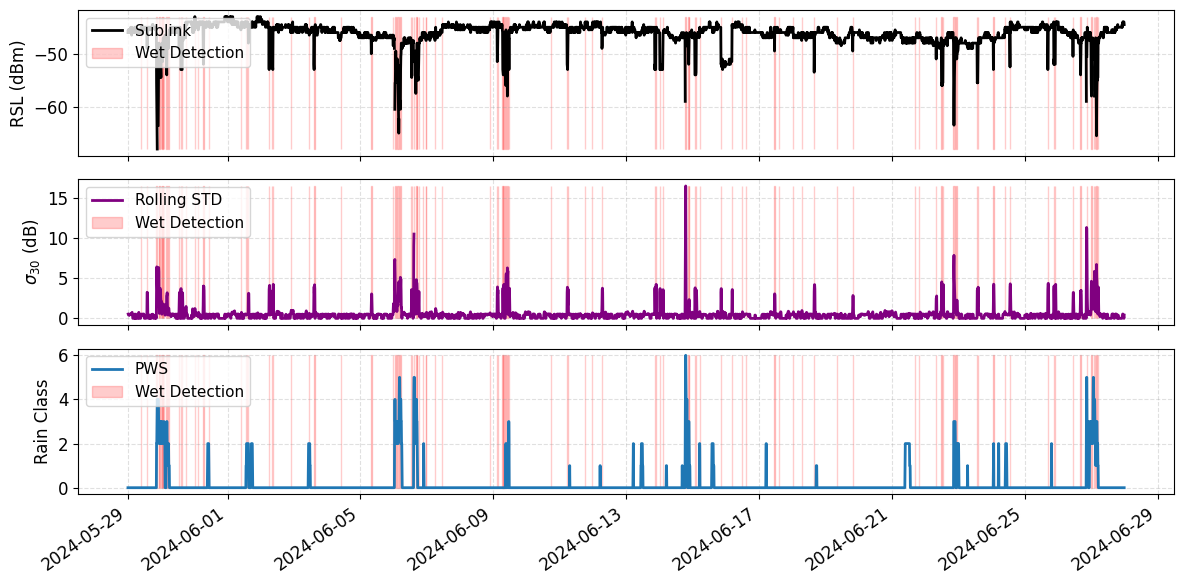

In [ ]:
# @title run:detection results
plot_params = {
    'figsize': (12, 6),
    'rsl_col': 'pred_rsl',
    'att_col': 'pred_rsl_std',
    'rain_col' : 'rain_class_id',
    #
    'detect_col': 'pred_detection_combined',

    'rsl_label': "Sublink",

    'y_label_top': "RSL (dBm)",
    'y_label_middle': r"$\sigma_{30} \text{ (dB)}$",
    'att_label': r"Rolling STD",
    # 'y_label_middle': r"$\sigma_{30} (dB)$",
    'y_label_down': r"$rain class$",

    'rain_label': "PWS",
    # 'x_label': "Time",
     'highlight_detection_subplots': 'all',
    'legend_loc': "upper left",
    'time_format': 'day',
    'tick_labelsize': 12,
    'xrotation': 35,
    'grid_linewidth': 10.5,
    'rsl_ylim': (None, -69),
    'att_ylim': (0, 20),
    'highlight_padding': 0.2,
    # 'highlight_edgecolor': 'red',
    'highlight_linewidth': 20.0,
    'ylabel_fontsize_top': 12,
    'ylabel_fontsize_bottom': 12,
        'ylabel_fontsize_middle': 12,
            'top_ylim': None,         # autoscale => (None, None)
        # 'bottom_ylim': (0, 5),   # default to [0,30]
   'att_color': 'purple',
    'rain_color': 'tab:blue',
  'detection_color': "red",

    }
# Suppose your df has columns ['my_rsl', 'my_att', 'my_detect'] and a DatetimeIndex.
plot_rsl_att_detection(df_resampled, plot_params=plot_params)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_pred_vs_test_timeseries(df, plot_params=None, time_col="Datetime", normalize_rmse=False):
    """
    Plots two time series (prediction vs. reference) on a single figure.
    Computes EITHER RMSE or NRMSE (not both) and appends it to the
    prediction label in the legend.

    Formulas:
      RMSE  = sqrt(mean((y_pred - y_true)^2))
      NRMSE = RMSE / mean(y_true)   (if 'normalize_rmse' == True)

    Parameters
    ----------
    df : pd.DataFrame
        Must contain columns for the prediction and test data.
        Default column names: 'pred_estimation' and 'test_mean'.
        A DatetimeIndex or a column named 'Datetime' is expected.

    plot_params : dict, optional
        Various plotting parameters. See code for defaults.

    time_col : str, default "Datetime"
        Column name for timestamps if not using an existing DatetimeIndex.

    normalize_rmse : bool, default False
        If True, compute NRMSE = RMSE / mean(y_true),
        otherwise only compute RMSE.

    Returns
    -------
    None
        Displays the plot, prints the chosen metric to console.
    """

    # 1) Default params
    defaults = {
        'figsize': (10, 5),
        'grid': True,
        'grid_color': '#999999',
        'grid_linewidth': 1.0,
        'grid_alpha': 0.2,  # Lighter grid
        'tick_labelsize': 10,
        'xrotation': 45,
        'time_format': 'day',

        # Columns to plot
        'pred_col': 'pred_estimation',
        'test_col': 'test_mean',

        # Colors
        'pred_color': 'C2',
        'test_color': 'C3',

        # Labels
        'pred_label': 'Prediction',
        'test_label': 'Reference',
        'xlabel': '',
        'ylabel': 'Rain Rate (mm/h)',
        'legend_loc': 'best',

        'ylabel_fontsize': None,
        'ylim': None,

        # Optional line width
        'line_width': 2.0
    }

    if plot_params is None:
        plot_params = {}
    for k, v in defaults.items():
        plot_params.setdefault(k, v)

    # 2) Extract styling
    figsize        = plot_params['figsize']
    show_grid      = plot_params['grid']
    grid_color     = plot_params['grid_color']
    grid_lwidth    = plot_params['grid_linewidth']
    grid_alpha     = plot_params['grid_alpha']
    tick_labelsize = plot_params['tick_labelsize']
    xrotation      = plot_params['xrotation']
    time_format    = plot_params['time_format']

    pred_col       = plot_params['pred_col']
    test_col       = plot_params['test_col']
    pred_color     = plot_params['pred_color']
    test_color     = plot_params['test_color']

    pred_label     = plot_params['pred_label']
    test_label     = plot_params['test_label']
    xlabel         = plot_params['xlabel']
    ylabel         = plot_params['ylabel']
    legend_loc     = plot_params['legend_loc']

    ylabel_fontsize= plot_params['ylabel_fontsize']
    ylim           = plot_params['ylim']
    line_width     = plot_params['line_width']

    # 3) Create figure & axis
    fig, ax = plt.subplots(figsize=figsize)

    # 4) Ensure we have a DatetimeIndex if 'Datetime' is a column
    df = df.copy()
    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
        df.set_index(time_col, inplace=True)

    # 5) Drop rows with NaN in our needed columns
    needed_cols = [pred_col, test_col]
    df_plot = df[needed_cols].dropna(how='any')
    if df_plot.empty:
        print("[plot_pred_vs_test_timeseries] No valid data after dropping NaNs.")
        return

    # 6) Calculate RMSE or NRMSE
    y_pred = df_plot[pred_col].values
    y_true = df_plot[test_col].values
    rmse_val = np.sqrt(np.mean((y_pred - y_true)**2))

    if not normalize_rmse:
        # Use RMSE
        metric_label = f"(RMSE: {rmse_val:.4f})"
        print(f"RMSE: {rmse_val:.4f}")
    else:
        # Use NRMSE
        mean_y_true = np.mean(y_true)
        if mean_y_true == 0:
            print("[Warning] Mean of y_true is 0, cannot compute NRMSE. Fallback to RMSE only.")
            metric_label = f"(RMSE: {rmse_val:.4f})"
        else:
            nrmse_val = rmse_val / mean_y_true
            metric_label = f"(NRMSE: {nrmse_val:.4f})"
            print(f"NRMSE: {nrmse_val:.4f}")

    # 7) Plot lines
    ax.plot(df_plot.index, df_plot[pred_col],
            label=pred_label + " " + metric_label,
            color=pred_color, linewidth=line_width)
    ax.plot(df_plot.index, df_plot[test_col],
            label=test_label,
            color=test_color, linewidth=line_width)

    # 8) Labels & Y-limits
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, fontsize=ylabel_fontsize)
    if isinstance(ylim, tuple) and any(x is not None for x in ylim):
        ax.set_ylim(ylim)

    # 9) Grid (lighter)
    if show_grid:
        ax.grid(True, color=grid_color, alpha=grid_alpha, linewidth=grid_lwidth)

    # 10) Date/Time Ticks & Formatting
    if isinstance(df_plot.index, pd.DatetimeIndex):
        locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
        ax.xaxis.set_major_locator(locator)
        formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
        ax.xaxis.set_major_formatter(formatter)

    # 11) Tick label size & rotation
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=xrotation, ha="right")
    ax.tick_params(axis='both', labelsize=tick_labelsize)

    # 12) Legend
    ax.legend(loc=legend_loc, fontsize=12)

    plt.tight_layout()
    plt.show()


In [ ]:
meta_dict[50]

{'cml_id': 'nycmesh-5916-af60xr-713',
 'frequency': 69120,
 'length': 6.936505577059732,
 'site_0_lat': 40.658008,
 'site_0_lon': -74.004747,
 'site_1_lat': 40.696133,
 'site_1_lon': -73.939756,
 'rsl': -47.0,
 'polarization': 'Vertical'}

2024-05-05T00:00:00.000000000


<ipython-input-37-62b90ccf646a>:81: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  return df.resample(freq).agg(lambda col: thresholded_mean(col, frac_required=frac_required))


NRMSE: 1.4159


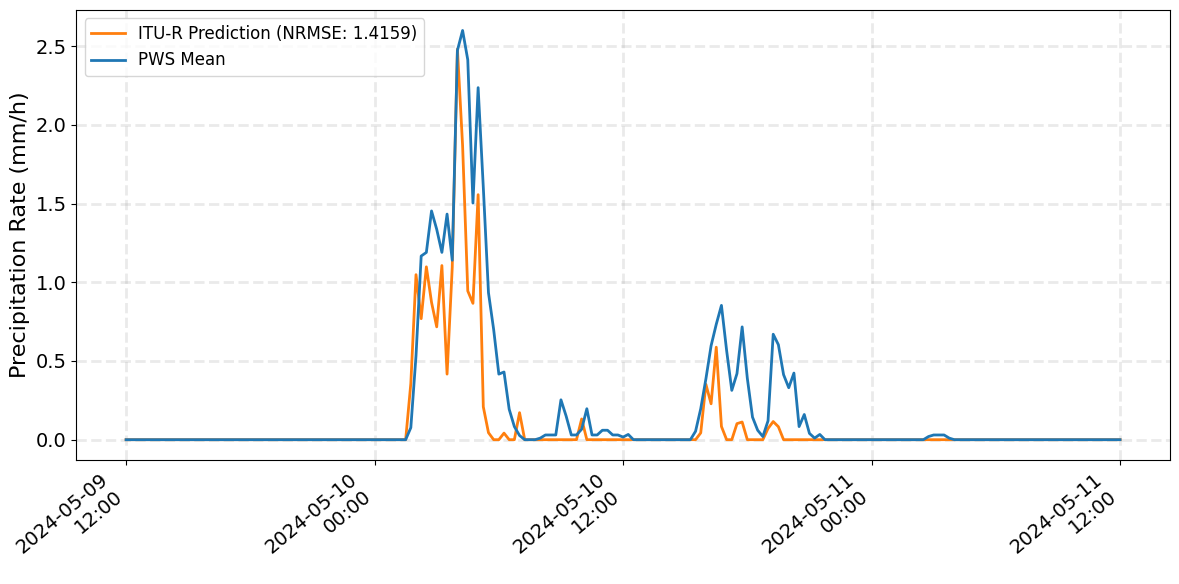

In [ ]:
# @title select estimation period
#  Select the second-to-last date from the list of rainy_days
day_date = rainy_days[-20]
print(day_date)  # Print it to confirm the chosen date
# Example usage of set_dates to define a window around day_date
delta = '5D'  # Defines how long the window is (3 days in this example)

# Use set_dates to compute the start (st) and end (end) of that window
st, end = set_dates(day_date, delta)

st, end =  '2024-05-09 12:00' , '2024-05-11 12:00'


# Choose which link ID we're focusing on
sublink_id = '50'
# sublink_id = '51'
# Filter the DataFrame for sublink_id to include only rows within [st, end]
df_rain_event = filter_dates(df_pred_test_dict[sublink_id], start_dt=st, end_dt=end)
df_rain_event = resample_with_threshold(
    df_rain_event,
    freq='15T',
    time_col='Datetime',
    frac_required=0.6
)
plot_pred_vs_test_timeseries(df_rain_event, plot_params=plot_params,
                             normalize_rmse=True)



<ipython-input-37-62b90ccf646a>:81: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  return df.resample(freq).agg(lambda col: thresholded_mean(col, frac_required=frac_required))


NRMSE: 2.0159


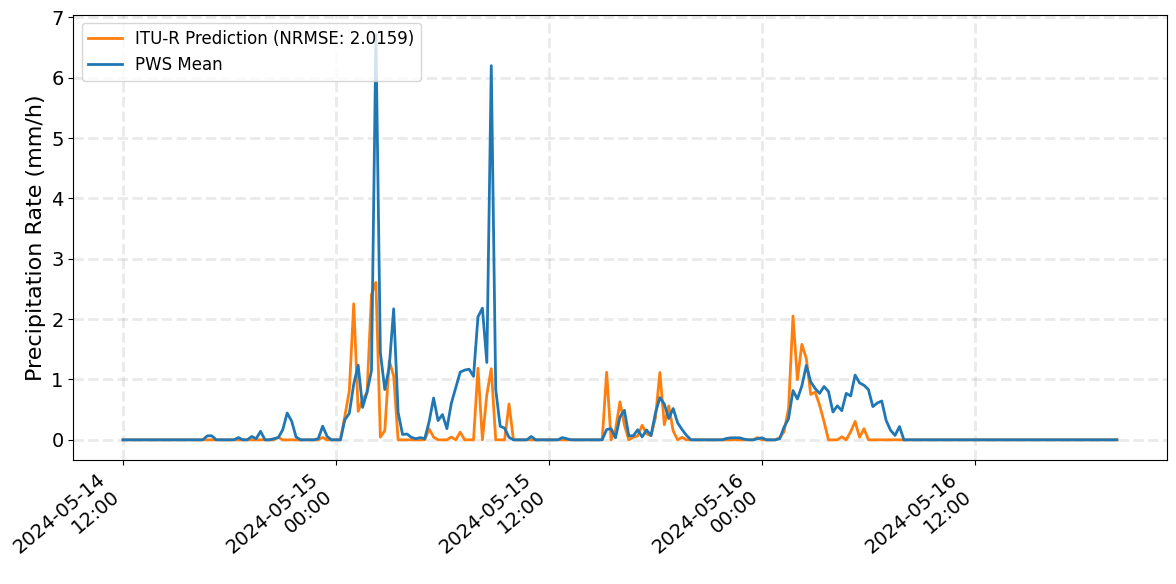

In [ ]:
st, end =  '2024-05-14 12:00' , '2024-05-16 20:00'


# Choose which link ID we're focusing on
sublink_id = '50'
# sublink_id = '51'
# Filter the DataFrame for sublink_id to include only rows within [st, end]
df_rain_event = filter_dates(df_pred_test_dict[sublink_id], start_dt=st, end_dt=end)
df_rain_event = resample_with_threshold(
    df_rain_event,
    freq='15T',
    time_col='Datetime',
    frac_required=0.6
)
plot_pred_vs_test_timeseries(df_rain_event, plot_params=plot_params, normalize_rmse=True)


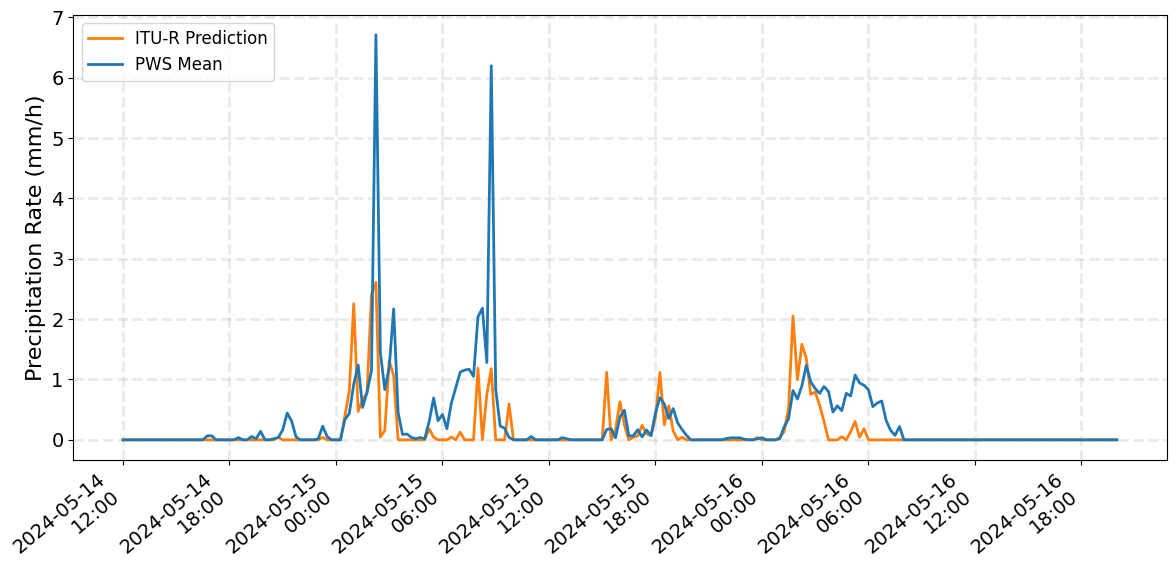

In [ ]:
# @title plot rain event

plot_params = {
    'figsize': (12, 6),
    'pred_col': 'pred_estimation',
    'test_col': 'test_mean',
    'pred_label': "ITU-R Prediction",
    'test_label': "PWS Mean",
    'pred_color': 'tab:orange',
    'test_color': 'tab:blue',
    'ylabel': "Precipitation Rate (mm/h)",
    'ylabel_fontsize': 16,
    'legend_loc': "upper left",
    'time_format': 'day',
    'tick_labelsize': 14,
    'xrotation': 40,
    'grid_linewidth': 2.0,
    'ylim': (None, None),
}

plot_pred_vs_test_timeseries(df_rain_event, plot_params=plot_params)

# plot_params = {
#     'figsize': (12, 5),
#     'pred_col': 'pred_estimation',
#     'test_col': 'test_median',
#     'pred_label': "ITU-R Prediction",
#     'test_label': "PWS Mean",
#     'pred_color': 'tab:orange',
#     'test_color': 'tab:blue',
#     'legend_fontsize': 12,  # bigger legend text
#     'ylabel_fontsize': 12,
#     # 'ylim': (0, 20),
#     'grid_linewidth': 2.0,
#     # etc.
# }

# plot_pred_vs_test_timeseries(df_rain_event, plot_params=plot_params)


In [ ]:
# @title create sub-map

# Configuration section to control map settings
config = {
    'add_links': True,  # Set to True to add links (lines) to the map
    'add_rgs': True,    # Set to True to add rain gauges (points) to the map
    'display_map': True, # Set to True to display the map
    'links_data':  pred_meta,  # Links meta data (alldata)
    'rgs_data'  : rgs_map_meta.copy(),    # Rain gauge data (PWS Meta)
    'base_color': 'hsv',  # 'hsv' string for default gradient or float hue between 0 and 1
    'color_line': 'frq'   # Color mode for lines (based on frequency or other metrics)
}



# Call the function using the configuration :
create_map_flag   =   0
display_map       =   0
save_map          =   0


if create_map_flag:
  mesh_map        = create_map_mesh( config['links_data'] ,  config['rgs_data'] , base_clr=0.95)
  # mesh_map        = create_map_mesh( config['links_data'] )
  display(mesh_map)
from google.colab import files
if save_map:
  # Save it
  mesh_map.save("nyc_map_event.html")

folium.TileLayer(
    tiles='http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Light_Gray_Base/MapServer/tile/{z}/{y}/{x}',
    attr='Esri &mdash; Esri, DeLorme, NAVTEQ',
    name='ArcGIS Light Gray',
    overlay=False,
    control=True
).add_to(mesh_map)


gray_scale = 0
# mesh_map
from google.colab import files
if gray_scale:
  if save_map:
    # Save it
    mesh_map.save("nyc_map_event.html")
    files.download("nyc_map_event.html")

In [ ]:
# @title day-date

# Select the second-to-last date from the list of rainy_days
day_date = '2023-11-01' #rainy_days[10]
# day_date = rainy_days[-10].

print(day_date)  # Print it to confirm the chosen date

# Example usage of set_dates to define a window around day_date
delta = '300D'  # Defines how long the window is (3 days in this example)

# Use set_dates to compute the start (st) and end (end) of that window
st, end = set_dates(day_date, delta)

# Choose which link ID we're focusing on
sublink_id = '50'

# Filter the DataFrame for sublink_id to include only rows within [st, end]
df_event = filter_dates(df_pred_test_dict[sublink_id], start_dt=st, end_dt=end)



df_resampled = resample_with_threshold(
    df_event,
    freq='15T',
    time_col='Datetime',
    frac_required=0.3
)


2023-11-01


<ipython-input-37-62b90ccf646a>:81: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  return df.resample(freq).agg(lambda col: thresholded_mean(col, frac_required=frac_required))


In [ ]:
# @title scatter: edit
# # Suppose df_merged has columns 'test_median' (X) and 'pred_estimation' (Y).
# # We'll plot them with specific axis ranges:

# params = {
#     'figsize': (7, 5),
#     'xlim': (0, 8),
#     'ylim': (0, 8),
#     's': 5,  # marker size for scatter
#     'color': 'blue'
# }


# plot_scatter(df_event, 'test_mean', 'pred_estimation', plot_params=params)

# # For density:
# dens_params = {
#     'figsize': (7, 5),
#     'xlim': (0, 8),
#     'ylim': (0, 8),
#     'gridsize': 40,
#     'cmap': 'plasma'
# }

# plot_density_scatter(df_event, 'test_mean', 'pred_estimation', plot_params=dens_params)


In [ ]:
# @title helpers : plot histograms


import matplotlib.pyplot as plt

def plot_sampling_times_histogram(statistics, plot_config, param=None, output_file=None, time_range=(0, 10000), factor=1, time_res = 'Seconds', sampling = 60):
    """
    Plot histograms for mean and median sampling times for all sublinks in a parameter or across all parameters,
    with an optional vertical line indicating a specific reference (e.g., 1-min resampling).

    Parameters:
        statistics (dict): A dictionary containing statistics for all sublinks.
                           Format:
                           {
                               'param1': {
                                   'sublink1': {'mean': ..., 'median': ...},
                                   ...
                               },
                               ...
                           }
        plot_config (dict): Configuration dictionary for plot styling.
        param (str): Specific parameter to extract statistics for (e.g., 'signal').
                     If None, combines statistics from all parameters.
        output_file (str): If provided, saves the plot to the given file path.
        time_range (tuple): A tuple specifying the range of sampling times to include in the plot (min, max).
                            Default is (0, 10000).
        factor (int): Conversion factor (default is 60) to convert minutes to seconds for plotting.
    """
    # Combine sublink stats if param is None
    sublink_stats = (
        [stats for param_stats in statistics.values() for stats in param_stats.values()]
        if param is None else statistics[param].values()
    )

    # Convert mean and median times from minutes to seconds using the factor
    mean_times = [
        stats['mean'] * factor for stats in sublink_stats
        if stats['mean'] is not None and time_range[0] <= stats['mean'] * factor <= time_range[1]
    ]
    median_times = [
        stats['median'] * factor for stats in sublink_stats
        if stats['median'] is not None and time_range[0] <= stats['median'] * factor <= time_range[1]
    ]

    # Plot histograms with styling from plot_config
    plt.figure(figsize=plot_config['figsize'])
    plt.hist(mean_times, bins=plot_config['bins'], alpha=0.7,
             label=plot_config['labels_dict']['mean'], color=plot_config['colors'][0], edgecolor='black')
    plt.hist(median_times, bins=plot_config['bins'], alpha=0.7,
             label=plot_config['labels_dict']['median'], color=plot_config['colors'][1], edgecolor='black')

    # Add vertical line at 1 minute (60 seconds)
    plt.axvline( sampling, color='black', linestyle='--', linewidth=1.5, label="Resample Time")

    plt.xlabel(f"Sampling Time ({time_res})", fontsize=plot_config['label_size'])
    plt.ylabel("Count", fontsize=plot_config['label_size'])
    plt.legend(loc=plot_config['legend_loc'], fontsize=plot_config['tick_size'])
    plt.xticks(fontsize=plot_config['tick_size'])
    plt.yticks(fontsize=plot_config['tick_size'])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file, dpi=300)
    else:
        plt.show()


def plot_data_histogram(
    stats_dict,
    plot_config,
    merged='all',
    mode='percentage',
    x_label=None,
    y_label="Count"
):
    """
    Plot a histogram of NaN statistics (percentage or count) for datasets in stats_dict.

    Parameters:
    - stats_dict (dict): Dictionary where keys are dataset labels and values are DataFrames with 'percentage_nans' or 'nans'.
    - plot_config (dict): Configuration dictionary for plot styling.
    - merged (str): 'all' to combine all datasets, 'separate' for separate histograms. Default is 'all'.
    - mode (str): 'percentage' for NaN percentages, 'count' for raw NaN counts. Default is 'percentage'.
    - x_label (str): Label for the x-axis. Default depends on mode.
    - y_label (str): Label for the y-axis. Default is 'Count'.
    """
    if merged not in ['all', 'separate']:
        raise ValueError("Invalid value for 'merged'. Choose 'all' or 'separate'.")

    if mode not in ['percentage', 'count']:
        raise ValueError("Invalid mode. Choose 'percentage' or 'count'.")

    # Determine the column and default x_label
    value_column = 'percentage_nans' if mode == 'percentage' else 'nans'
    x_label = x_label or ("Data Availability (%)" if mode == 'percentage' else "Missing Data Count")

    # Handle custom labels
    labels_dict = plot_config.get('labels_dict', None)
    legend_location = plot_config.get('legend_loc', 'best')  # Default to 'best' if not specified

    if merged == 'all':
        # Combine all datasets into one histogram
        all_values = []
        for label, stats_df in stats_dict.items():
            if value_column not in stats_df.columns:
                raise ValueError(f"'{value_column}' column not found in stats DataFrame for key '{label}'.")
            data_values = 100 - stats_df[value_column].dropna() if mode == 'percentage' else stats_df[value_column].dropna()
            all_values.extend(data_values.values)

        plt.figure(figsize=plot_config['figsize'])
        plt.hist(
            all_values,
            bins=plot_config['bins'],
            color=plot_config['colors'][0],
            edgecolor='black',
            alpha=0.7,
            density=plot_config['density'],
            label='All Data'
        )

        # Apply plot labels and styles
        plt.xlabel(x_label, fontsize=plot_config['label_size'])
        plt.ylabel(y_label, fontsize=plot_config['label_size'])
        plt.legend(loc=legend_location, fontsize=plot_config['tick_size'])
        plt.xticks(fontsize=plot_config['tick_size'])
        plt.yticks(fontsize=plot_config['tick_size'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    elif merged == 'separate':
        # Create separate histograms for each dataset (vertical split)
        num_datasets = len(stats_dict)
        fig, axes = plt.subplots(
            num_datasets,
            1,
            figsize=(plot_config['figsize'][0], plot_config['figsize'][1] * num_datasets),
            sharex=plot_config['shared_x_axis']
        )

        if num_datasets == 1:
            axes = [axes]  # Make axes iterable if there's only one plot

        for i, (ax, (label, stats_df), color) in enumerate(zip(axes, stats_dict.items(), plot_config['colors'])):
            if value_column not in stats_df.columns:
                raise ValueError(f"'{value_column}' column not found in stats DataFrame for key '{label}'.")
            data_values = 100 - stats_df[value_column].dropna() if mode == 'percentage' else stats_df[value_column].dropna()

            ax.hist(
                data_values,
                bins=plot_config['bins'],
                color=color,
                edgecolor='black',
                alpha=0.7,
                density=plot_config['density']
            )
            if labels_dict is not False:
                ax.legend([labels_dict.get(label, label) if labels_dict else label], fontsize=plot_config['tick_size'], loc=legend_location)

            # Add y-axis label
            ax.set_ylabel(y_label, fontsize=plot_config['label_size'])

            ax.tick_params(axis='both', labelsize=plot_config['tick_size'])
            ax.grid(axis='y', linestyle='--', alpha=0.7)

        # Add shared x-label only to the bottom subplot
        axes[-1].set_xlabel(x_label, fontsize=plot_config['label_size'])

        plt.tight_layout()
        plt.show()


def count_nans_per_df(dfs_dict, mode='percentage'):
    """
    Calculate the NaN statistics (percentage or count) in each column for each DataFrame in a dictionary.

    Parameters:
    - dfs_dict (dict): Dictionary of DataFrames with their labels as keys.
    - mode (str): 'percentage' for NaN percentages, 'count' for raw NaN counts. Default is 'percentage'.

    Returns:
    - dict: A dictionary where each key corresponds to a DataFrame label, and the value is a DataFrame
            with a single column ('percentage_nans' or 'nans') indicating the chosen metric per column.
    """
    if mode not in ['percentage', 'count']:
        raise ValueError("Invalid mode. Choose 'percentage' or 'count'.")

    stats_dict = {}

    for label, df in dfs_dict.items():
        if mode == 'count':
            # Calculate the number of NaNs for each column
            nans_per_col = df.isna().sum()
            stats_df = pd.DataFrame({'nans': nans_per_col})
        elif mode == 'percentage':
            # Calculate the percentage of NaNs for each column
            nans_percentage = df.isna().mean() * 100  # Convert fraction to percentage
            stats_df = pd.DataFrame({'percentage_nans': nans_percentage})

        # Save the stats DataFrame in the dictionary
        stats_dict[label] = stats_df

    return stats_dict


# @title

def plot_sampling_times_histogram(statistics, plot_config, param=None, output_file=None, time_range=(0, 10000), factor=1, time_res = 'Seconds', sampling = 60):
    """
    Plot histograms for mean and median sampling times for all sublinks in a parameter or across all parameters,
    with an optional vertical line indicating a specific reference (e.g., 1-min resampling).

    Parameters:
        statistics (dict): A dictionary containing statistics for all sublinks.
                           Format:
                           {
                               'param1': {
                                   'sublink1': {'mean': ..., 'median': ...},
                                   ...
                               },
                               ...
                           }
        plot_config (dict): Configuration dictionary for plot styling.
        param (str): Specific parameter to extract statistics for (e.g., 'signal').
                     If None, combines statistics from all parameters.
        output_file (str): If provided, saves the plot to the given file path.
        time_range (tuple): A tuple specifying the range of sampling times to include in the plot (min, max).
                            Default is (0, 10000).
        factor (int): Conversion factor (default is 60) to convert minutes to seconds for plotting.
    """
    # Combine sublink stats if param is None
    sublink_stats = (
        [stats for param_stats in statistics.values() for stats in param_stats.values()]
        if param is None else statistics[param].values()
    )

    # Convert mean and median times from minutes to seconds using the factor
    mean_times = [
        stats['mean'] * factor for stats in sublink_stats
        if stats['mean'] is not None and time_range[0] <= stats['mean'] * factor <= time_range[1]
    ]
    median_times = [
        stats['median'] * factor for stats in sublink_stats
        if stats['median'] is not None and time_range[0] <= stats['median'] * factor <= time_range[1]
    ]

    # Plot histograms with styling from plot_config
    plt.figure(figsize=plot_config['figsize'])
    plt.hist(mean_times, bins=plot_config['bins'], alpha=0.7,
             label=plot_config['labels_dict']['mean'], color=plot_config['colors'][0], edgecolor='black')
    plt.hist(median_times, bins=plot_config['bins'], alpha=0.7,
             label=plot_config['labels_dict']['median'], color=plot_config['colors'][1], edgecolor='black')

    # Add vertical line at 1 minute (60 seconds)
    plt.axvline( sampling, color='black', linestyle='--', linewidth=1.5, label="Resample Time")

    plt.xlabel(f"Sampling Time ({time_res})", fontsize=plot_config['label_size'])
    plt.ylabel("Count", fontsize=plot_config['label_size'])
    plt.legend(loc=plot_config['legend_loc'], fontsize=plot_config['tick_size'])
    plt.xticks(fontsize=plot_config['tick_size'])
    plt.yticks(fontsize=plot_config['tick_size'])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file, dpi=300)
    else:
        plt.show()


def plot_blue_colorbar(frequencies, orientation='vertical', tick_interval=20):
    """
    Plots a color bar transitioning from light blue to dark blue, with configurable tick intervals and orientation.

    Parameters:
    - frequencies (list or np.array): List of frequency values for the gradient.
    - orientation (str): 'vertical' (default) or 'horizontal'.
    - tick_interval (int): Interval between tick marks (e.g., 10, 20 GHz).

    Returns:
    - None (Displays the color bar using Matplotlib).
    """

    # Define a blue gradient from light blue to dark blue
    gradient_colors = ['#ADD8E6', '#5B9BD5', '#1E4B91', '#00274D']  # Light to Dark Blue

    # Create a custom colormap
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_gradient", gradient_colors)

    # Normalize frequency values for color mapping
    norm = plt.Normalize(vmin=min(frequencies), vmax=max(frequencies))

    # Set up the figure and axis based on orientation
    fig, ax = plt.subplots(figsize=(0.3, 6) if orientation == 'vertical' else (8, 0.5))

    # Generate the color bar
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                      cax=ax, orientation=orientation)

    # Define tick positions based on user-defined interval
    tick_positions = np.arange(min(frequencies), max(frequencies) + tick_interval, tick_interval)
    cb.set_ticks(tick_positions)
    cb.set_ticklabels([f"{int(tick)}" for tick in tick_positions])

    # Set labels
    cb.set_label("Frequency (GHz)", fontsize=16)
    cb.ax.tick_params(labelsize=14)

    # Display the plot
    plt.show()


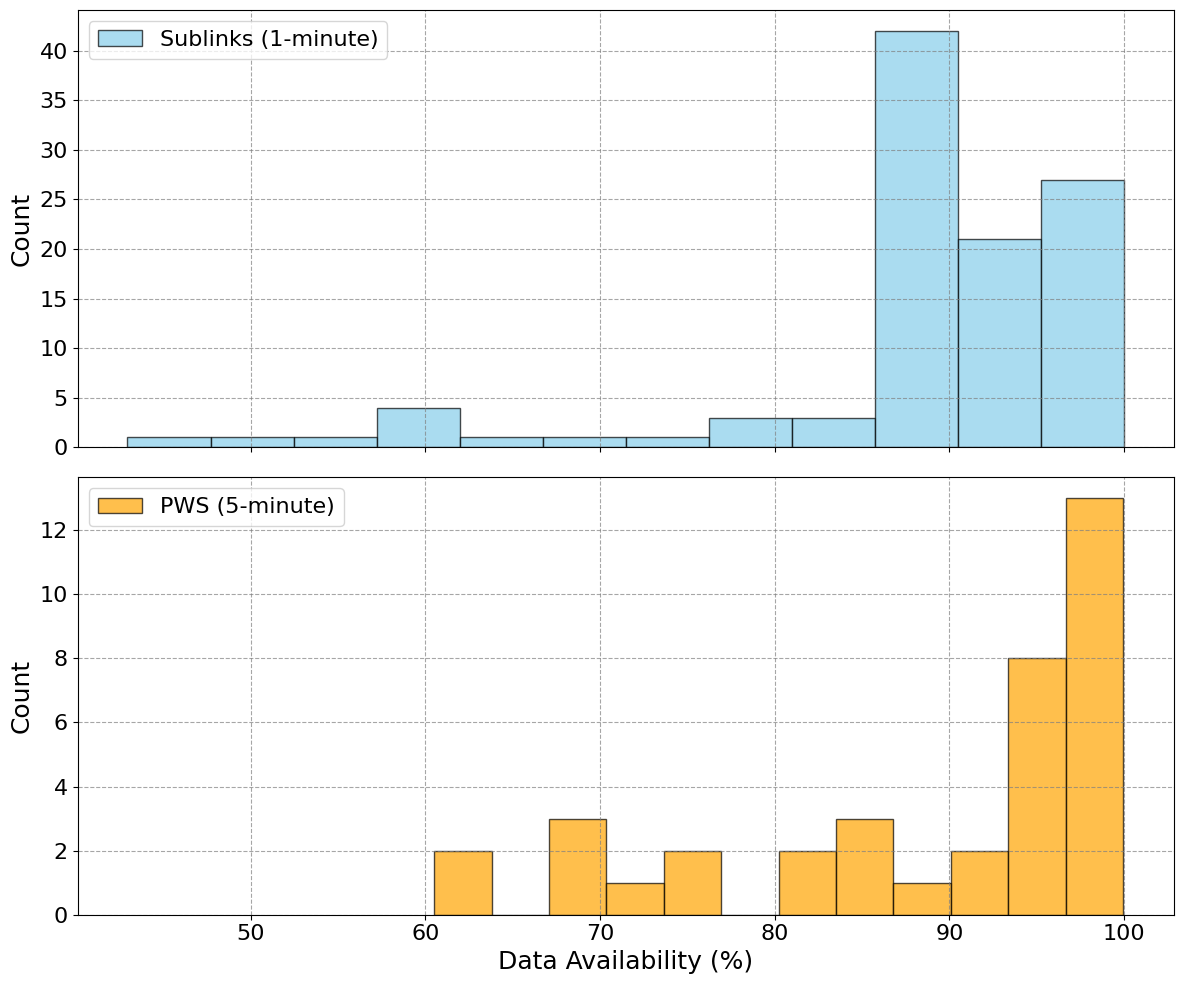

In [ ]:
# @title run: nans hist

plot_config = {
    'tick_size': 16,
    'label_size': 18,
    'title_size': 16,
    'figsize': (12, 5),
    'bins': 12,
    'density': False,
    'colors': ('skyblue', 'orange', 'green', 'purple', 'red'),  # Default tuple of colors
    'title': False,
    'shared_x_axis': True,  # Controls whether x-axis is shared in vertical split
    'labels_dict': {'pws': 'PWS (5-minute)', 'sublinks': 'Sublinks (1-minute)'},  # Custom labels for histograms
    'legend_loc': 'upper left'  # Controls legend location, default is 'upper left'
}


df_rawdata_dict = { 'sublinks': links_rawdata, 'pws': prec_dict['precip_wu']}


# Calculate NaN statistics (percentage)
stats_dict_percentage = count_nans_per_df(df_rawdata_dict, mode='percentage')

plot_hist = 1

if plot_hist:
  # Plot separate histograms with custom labels
  plot_data_histogram(stats_dict_percentage, plot_config, merged='separate', mode='percentage')

In [ ]:
# @title rsl mean.

import matplotlib.pyplot as plt
import numpy as np

def plot_median_mean_histogram(df, plot_config):
    """
    Plots histograms for the median and mean of each column in the given DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing numerical values.
    - plot_config (dict): Configuration dictionary for plot styling.

    Returns:
    - None (Displays the histogram using Matplotlib).
    """
    # Compute statistics (excluding the 'Datetime' column if present)
    numeric_df = df.select_dtypes(include=[np.number])
    medians = numeric_df.median()
    means = numeric_df.mean()

    # Define histogram bins
    bins = plot_config.get('bins', 30)

    # Create figure and axes for dual histograms
    fig, ax = plt.subplots(figsize=plot_config['figsize'])

    # Plot median histogram
    ax.hist(medians, bins=bins, alpha=0.7, color=plot_config['colors'][0], label='Median', edgecolor='black')

    # Plot mean histogram
    ax.hist(means, bins=bins, alpha=0.7, color=plot_config['colors'][1], label='Mean', edgecolor='black')

    # Apply labels and styles
    ax.set_xlabel(plot_config.get('x_label', 'Signal Strength (dBm)'), fontsize=plot_config['label_size'])
    ax.set_ylabel(plot_config.get('y_label', 'Count'), fontsize=plot_config['label_size'])
    ax.legend(fontsize=plot_config['tick_size'])
    ax.tick_params(axis='both', labelsize=plot_config['tick_size'])
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example Plot Configuration
plot_config = {
    'figsize': (8, 5),
    'bins': 30,
    'colors': ['#5B9BD5', '#ED7D31'],  # Blue for Median, Orange for Mean
    'label_size': 12,
    'tick_size': 10,
    'x_label': 'Signal Strength (dBm)',
    'y_label': 'Count'
}

# Load data into DataFrame (excluding Datetime column)
import pandas as pd

plot_hist = 0
if plot_hist:
  df = links_rawdata
  # df = pd.read_csv('/mnt/data/sample_data.csv')  # Replace with actual DataFrame
  df = df.drop(columns=['Datetime'], errors='ignore')  # Drop Datetime if exists


  # Plot the histogram for median and mean
  plot_median_mean_histogram(df, plot_config)


### Visualize Derived Rainfall Rate vs Ground Truth under Different Tempeature Intervals

### Create Rainfall Fields

In [ ]:
ds_cmls = xr.concat(cml_list, dim='cml_id')
ds_cmls.drop_sel(cml_id='sublink_9')

In [ ]:
[cml.wet_fraction.values for cml in cml_list]

In [ ]:
cmls_R_1h = ds_cmls.R.resample(time='1h', label='right').mean().to_dataset()
cmls_R_1h

In [ ]:
cmls_R_1h['lat_center'] = (cmls_R_1h.site_a_latitude + cmls_R_1h.site_b_latitude)/2
cmls_R_1h['lon_center'] = (cmls_R_1h.site_a_longitude + cmls_R_1h.site_b_longitude)/2

In [ ]:
idw_interpolator = pycml.spatial.interpolator.IdwKdtreeInterpolator(
    nnear=5,
    p=2,
    exclude_nan=True,
    max_distance=None,
)

#### Daily plots

In [ ]:
# snow_days

In [ ]:
# @title snow daily plots

# Now all DataFrames have Datetime as the index and are properly formatted.
day_date = snow_days[-2]
print(day_date)

# Example usage:
# day = '2024-01-16' '2024-01-16' #'2024-02-13' #'2024-01-16' #'2023-10-29' #'2023-11-26'
delta = '1D'  # Defines the period (can be expanded for different time deltas)
# day_date =
st, end = set_dates(day_date, delta)

print("Start:", st)
print("End:", end)

###########
day_row = df_noaa.loc[df_noaa["date"] == day_date].iloc[0]
day_stats = {}
day_stats['snow'] , day_stats['precip'] = round(day_row['mean_snow'] ,  1) , round( day_row['mean_precip'] , 1 )

###########
df_signal_day = df_days_dict['signal'][day_date]
# df_signal_day = filter_dates ( links_rawdata , st , end )

# Extract daily DataFrames
stats = ['mean' , 'median']
df_temp_day  = df_days_dict['temp'][day_date][stats]
df_rainy_day = df_days_dict['rain'][day_date][stats]

### set conditions
df_conditions_day  = df_days_dict['conditions'][day_date]
df_conditions_day  = preprocess_conditions( df_conditions_day )
df_conditions_clrs = process_conditions( df_conditions_day )
df_conditions_clrs = resample_df ( df_conditions_clrs , freq="5T")

# df_conditions_processed
# Standardize Datetime (set as index)
df_temp_day, df_rainy_day, df_conditions_day = standardize_datetime(
    [df_temp_day, df_rainy_day, df_conditions_day], set_as_index=True
)

# filter_raw_links(df_links, selected_links)

df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range = (None ,None) , freq_range= ( None , None) )

# selected_links = ['10', '44' , '7' , '38' , '50' , '58']

# selected_links = ['95' , '12'  , '29' , '54', '58' ,  '8']

# selected_links = ['58' ,  '8','95' ,   '30' ]

selected_links = [ '18', '30','95' ,   '60' ,'100' , '10' ] #'12' ,   ]
selected_links = ['65' ,'47', '41' , '8',  '18', '30','95'   , '11'] # ,'49' ] #'12' ,   ]

# selected_links = [ '57', '66', '30','95' ,   '60' ,'100' , '10' ] #'12' ,   ]
# selected_links = [ '8' , '58' ]

df_signal_plot = filter_raw_data( df_signal_plot , selected_links)

# sublinks_group = {
# midf_links = ['100' , '104' ]
# lowf_links = ['29' , '54' ]
# highf_links = ['7' , '58' ]
# all_links = midf_links + lowf_links + highf_links
# df_signal_plot = filter_raw_links(  links_rawdata) }

plot_config = {
    "right_ticks_inside": False,  # Moves temperature axis ticks inside the figure
    # "temperature": {"plt_range": (-6, 1), "color": "tab:orange", "hline": 0},
        # "temperature": {"hline": 0, "plt_range": (-1, None)},
    # "precip": {"plt_range": (-0.1, 1.1), "color": "tab:blue"},
     'legend_postion': 'lower left',
    # "signal": {"plt_range": (-89, -20), "color": "tab:red"}
# 'rolling_window' : 5  }
}

# plot_weather_signal_frq(df_rainy_day, df_temp_day, df_conditions_clrs , plot_config=plot_config , df_links = df_signal_plot,
#                     start_dt=st, end_dt=end, day_row=day_stats , meta_dict = meta_dict
#                     ,
#                     )
freq_bands = [
    (0, 20, plt.cm.Blues),   # 0-20 GHz => Blue scale
    (20, 26, plt.cm.Greens), # 20-26 GHz => Green scale
  (56, 66, plt.cm.Purples),
    (66, None,  plt.cm.Oranges) # Above 26 GHz => Red/brown scale
]


plot_weather_signal_frq_inverted(df_rainy_day, df_temp_day, df_conditions_clrs , plot_config=plot_config  , df_links = df_signal_plot,
                    start_dt=st, end_dt=end, meta_dict = meta_dict, freq_bands = freq_bands
                    ,
                    )



In [ ]:
# @title daily plots
# df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range= (2,None) , freq_range= ( 55e3 , 65e3) )
# df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range= (1,None) , freq_range= ( 57e3 , 64e3) )
df_signal_plot , df_meta_plot = filter_raw_meta(links_rawdata_set, links_metadata, length_range = (2 ,None) , freq_range= ( 0 , 20e3) )
# df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range = ( 2.5 , None )  ,freq_range= ( 0 , 20e3))
# df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range = (1 ,None) , freq_range= ( 10e3 , 50e3))

# Now all DataFrames have Datetime as the index and are properly formatted.
day_date = '2024-03-22 00:00' #snow_days[2]
print(day_date)


# Example usage:
day = '2024-02-13' #'2024-01-16' #'2023-10-29' #'2023-11-26'
delta   = '7D'  # Defines the period (can be expanded for different time deltas)
st, end = set_dates(day_date, delta)

print("Start:", st)
print("End:", end)

###########
# noa:
day_stats = {}
df_signal_day =  links_rawdata #df_days_dict['signal'][day_date]
# Extract daily DataFrames

stats = ['Datetime'] + ['KNYNEWYO1942' ,'KNYNEWYO1942', 'KNYNEWYO1622' ,'KNYNEWYO1931' , 'KNYNEWYO1288'  ]

df_rainy_day      = df_prec[ stats]  # df_days_dict['rain'][day_date][stats]


# Call the plot function
plot_config = {    "temperature": {"plt_range": (-7, 3), "color": "tab:orange", "hline": 0},
    "precip": {"plt_range": (-0.1, 2), "color": "tab:blue"},
    "signal": {"plt_range": (-79, -30), "color": "black"}
}

plot_config = {
    "right_ticks_inside": False,  # Moves temperature axis ticks inside the figure
        "temperature": {"hline": 0},
           "figsize": (1, 10),
    # "temperature": {"plt_range": (-6, 1), "color": "tab:orange", "hline": 0},
    # "precip": {"plt_range": (-0.5, 2), "color": "tab:blue"},
    # "signal": {"plt_range": (-89, -20), "color": "tab:red"}

}

day = '2024-01-01' #'2024-02-13' #'2024-01-16' #'2023-10-29' #'2023-11-26'
delta   = '7D'  # Defines the period (can be expanded for different time deltas)
st, end = set_dates(day_date, delta)

##############:
selected_links = [  '14','64' ,  '105' , '65' ]
# selected_links = [  '6'  , '20' ]
df_rainy_day      = filter_and_mean(df_prec, cols = stats)
df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range= (None , None) , freq_range= ( 57e3 , 63e3) )
df_signal_plot = filter_raw_data( df_signal_plot , selected_links)
df_signal_plot = filter_raw_data( links_rawdata , selected_links)

plot_rsl_precipitation( df_rainy_day, df_signal_plot , start_dt = st , end_dt =  end
                       , meta_dict = meta_dict
                        , roll = 15
                        )




# ##############
data = links_att_data['baseline']['min']
df_signal_plot = filter_raw_data( data , selected_links)
plot_rsl_precipitation( df_rainy_day, df_signal_plot , start_dt = st , end_dt =  end , meta_dict = meta_dict)


# ##############
# data = links_att_data['att']['max']
# df_signal_plot = filter_raw_data( data , selected_links)
# plot_rsl_precipitation( df_rainy_day, df_signal_plot , start_dt = st , end_dt =  end , meta_dict = meta_dict)


In [ ]:
# @title plot_rainy_days
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_weather_signal_frq(
    df_display_rain,
    df_display_temp,
    df_conditions_processed=None,
    df_links=None,
    ws_col=None,
    agg_func=None,
    time_format='day',
    start_dt=None,
    end_dt=None,
    time_col='Datetime',
    plot_config=None,
    day_row=None,
    meta_dict=None
):
    """
    Plots weather data (rain, temperature) plus signal strength,
    grouped by frequency range. Subplot titles are omitted,
    but legends are retained for both weather and sublinks.
    Frequencies are taken from 'meta_dict' for labeling sublinks.
    """

    # ===== 1) Default Plot Config =====
    default_plot_config = {
        "temperature": {"plt_range": None, "color": "tab:orange", "hline": None},
        "precip":      {"plt_range": None, "color": "tab:blue",   "hline": None},
        "signal":      {"plt_range": None, "color": "tab:red",    "linestyle": "-"},
        "label_map":   {"mean": "Mean", "median": "Median", "std": "Std Dev"},
        "legend_position": "center left",
        "fontsize": 12,
        "ticksize": 14,
        "ylabelsize": 14,
        "rolling_window": 3
    }

    # Merge user plot_config without overwriting defaults
    if plot_config is None:
        plot_config = default_plot_config
    else:
        for key, default_values in default_plot_config.items():
            if key not in plot_config:
                plot_config[key] = default_values
            else:
                for sub_key, default_value in default_values.items():
                    plot_config[key].setdefault(sub_key, default_value)

    fontsize = plot_config["fontsize"]
    ticksize = plot_config["ticksize"]
    ylabelsize = plot_config["ylabelsize"]

    # ===== 2) Data Preprocessing =====
    def preprocess_df(df, interpolate=False):
        if df is not None:
            df = filter_dates(df, start_dt, end_dt, time_col)  # <--- your filter_dates function
            if time_col in df.columns:
                df = df.set_index(time_col)
            if df.index.name != time_col:
                df.index.name = time_col
            df = df.loc[:, df.columns != time_col]
            if interpolate:
                df = df.interpolate(method='linear')
        return df

    df_display_rain = preprocess_df(df_display_rain)
    df_display_temp = preprocess_df(df_display_temp)
    df_links = preprocess_df(df_links)

    # ===== 3) Group Sublinks by Frequency Range =====
    if df_links is not None:
        high_freq_sublinks = []
        mid_freq_sublinks  = []
        low_freq_sublinks  = []

        for col in df_links.columns:
            col_int = int(col)
            frq_khz = meta_dict.get(col_int, {}).get('frequency', None)
            if frq_khz is None:
                continue
            freq_ghz = frq_khz / 1e3  # from kHz -> GHz

            if freq_ghz > 50:
                high_freq_sublinks.append(col)
            elif 10 < freq_ghz <= 50:
                mid_freq_sublinks.append(col)
            else:
                low_freq_sublinks.append(col)

        freq_groups = []
        if high_freq_sublinks:
            freq_groups.append(('High Freq (>50 GHz)', high_freq_sublinks, plt.cm.Blues))
        if mid_freq_sublinks:
            freq_groups.append(('Mid Freq (10-50 GHz)', mid_freq_sublinks, plt.cm.Greens))
        if low_freq_sublinks:
            freq_groups.append(('Low Freq (<=10 GHz)', low_freq_sublinks, plt.cm.Oranges))
    else:
        freq_groups = []

    # ===== 4) Figure Setup: Weather subplot + subplots for freq groups =====
    num_subplots = 1 + len(freq_groups) if df_links is not None else 1
    fig, ax_arr = plt.subplots(
        num_subplots, 1,
        figsize=(14, 5 + 3*num_subplots),
        sharex=True,
        gridspec_kw={'height_ratios': [2] + [2]*len(freq_groups), 'hspace': 0.05}
    )

    # Handle single vs multiple subplots
    if num_subplots == 1:
        ax_weather = ax_arr
        subplots_list = []
    else:
        ax_weather = ax_arr[0]
        subplots_list = ax_arr[1:]

    # Weather axes: precipitation + temperature
    ax_rain = ax_weather
    ax_temp = ax_weather.twinx()

    # ===== 5) Plot Rainfall & Temperature (Weather Legends Kept) =====
    rain_colors = plt.cm.Blues(np.linspace(0.5, 0.8, len(df_display_rain.columns)))
    temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(df_display_temp.columns)))
    line_styles = {"Mean": "-", "Median": "--"}

    for idx, col in enumerate(df_display_rain.columns):
        label = plot_config["label_map"].get(col, col)
        linestyle = line_styles.get(label, "-")
        ax_rain.plot(
            df_display_rain.index,
            df_display_rain[col],
            color=rain_colors[idx],
            linestyle=linestyle,
            label=label
        )

    for idx, col in enumerate(df_display_temp.columns):
        label = plot_config["label_map"].get(col, col)
        linestyle = line_styles.get(label, "-")
        ax_temp.plot(
            df_display_temp.index,
            df_display_temp[col],
            color=temp_colors[idx],
            linestyle=linestyle,
            label=label
        )

    ax_rain.set_ylabel("Precipitation Rate (mm/h)", fontsize=ylabelsize)
    ax_temp.set_ylabel("Temperature (°C)", fontsize=ylabelsize)
    ax_rain.grid(True, linestyle="--", alpha=0.6)

    # Optional Y-limits & horizontal lines
    if plot_config["precip"]["plt_range"] is not None:
        ax_rain.set_ylim(plot_config["precip"]["plt_range"])
    if plot_config["temperature"]["plt_range"] is not None:
        ax_temp.set_ylim(plot_config["temperature"]["plt_range"])
    if plot_config["temperature"]["hline"] is not None:
        ax_temp.axhline(y=plot_config["temperature"]["hline"],
                        color=plot_config["temperature"]["color"], linestyle="--", alpha=0.8)
    if plot_config["precip"]["hline"] is not None:
        ax_rain.axhline(y=plot_config["precip"]["hline"],
                        color=plot_config["precip"]["color"], linestyle="--", alpha=0.3)

    # Weather Legends
    ax_rain.legend(loc=plot_config['legend_position'], fontsize=fontsize, title="PWS Precip.")
    ax_temp.legend(loc="upper right", fontsize=fontsize, title="PWS Temp.")

    # ===== 6) Plot Each Frequency Group in Its Own Subplot (No Titles, BUT Legends) =====
    if freq_groups:
        for subplot_idx, (band_label, sublink_cols, cmap) in enumerate(freq_groups):
            ax_signal = subplots_list[subplot_idx]

            # Create a colormap segment for each sublink
            color_array = cmap(np.linspace(0.3, 0.8, len(sublink_cols)))

            lines_for_legend = []
        for i, col in enumerate(sublink_cols):
            # Convert the column name to int so we can look up frequency in meta_dict
            col_int = int(col)
            frq_khz = meta_dict[col_int]['frequency']
            freq_ghz = frq_khz / 1e3

            # IMPORTANT: selecting a single column ensures rolling_mean is 1D
            rolling_mean = df_links[col].rolling(
                window=plot_config["rolling_window"],
                min_periods=1
            ).mean()

            # Now plot returns exactly one line object, so ln, = ... works
            ln, = ax_signal.plot(
                df_links.index,
                rolling_mean,
                color=color_array[i],
                linestyle=plot_config["signal"]["linestyle"],
                label=f"{freq_ghz:.1f} GHz"
            )
            lines_for_legend.append(ln)

            ax_signal.set_ylabel("Received Signal Level (dBm)", fontsize=ylabelsize)
            ax_signal.tick_params(axis='y', labelsize=ticksize)
            ax_signal.grid(True, linestyle="--", alpha=0.6)

            # Build a legend for sublinks in this subplot
            ax_signal.legend(handles=lines_for_legend, loc=plot_config['legend_position'],
                             fontsize=fontsize)

    # ===== 7) Condition Shading =====
    if df_conditions_processed is not None:
        df_conditions_processed = df_conditions_processed.sort_index()
        df_conditions_processed["group"] = df_conditions_processed["color"].ne(
            df_conditions_processed["color"].shift()
        ).cumsum()
        all_axes_to_shade = [ax_weather] + list(subplots_list)
        for _, group in df_conditions_processed.groupby("group"):
            color = group["color"].iloc[0]
            if color:
                for ax_ in all_axes_to_shade:
                    ax_.axvspan(group.index[0], group.index[-1], color=color, alpha=0.1)

    # ===== 8) X-Axis Formatting =====
    # The final subplot (if any) handles the x-axis labeling
    if len(subplots_list) > 0:
        ax_final = subplots_list[-1]
    else:
        ax_final = ax_weather

    locator = mdates.AutoDateLocator()
    if time_format == 'day':
        formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
    else:
        formatter = mdates.DateFormatter('%H:%M')

    ax_final.xaxis.set_major_locator(locator)
    ax_final.xaxis.set_major_formatter(formatter)
    plt.setp(ax_final.xaxis.get_majorticklabels(), rotation=45)

    # Apply tick sizes uniformly
    ax_weather.tick_params(axis='x', labelsize=ticksize)
    ax_weather.tick_params(axis='y', labelsize=ticksize)
    ax_temp.tick_params(axis='y', labelsize=ticksize)
    if freq_groups:
        for ax_ in subplots_list:
            ax_.tick_params(axis='x', labelsize=ticksize)

    plt.tight_layout()
    plt.show()
# @title




def plot_rsl_precipitation(
    df_display_rain, df_links, start_dt=None, end_dt=None,
    time_col='Datetime', plot_config=None, meta_dict=None, roll=1
):
    """
    Plots RSL signal strength in a single merged subplot along with precipitation,
    ensuring a shared time axis and aligning time windows.
    """
    # Set default plot configurations if not provided
    default_plot_config = {
        "figsize": (14, 10),
        "ylabelsize": 14,
        "xlabelsize": 14,
        "legendsize": 12,
        "titlesize": 16,
        "linewidth": 2,
        "alpha": 0.3,
        "rolling_window": 5,
        "ticksize": 14
    }

    if plot_config is None:
        plot_config = default_plot_config
    else:
        for key, value in default_plot_config.items():
            plot_config.setdefault(key, value)

    # Align the time windows
    df_display_rain = filter_dates(df_display_rain, start_dt, end_dt, time_col)
    df_links = filter_dates(df_links, start_dt, end_dt, time_col)

    # Ensure shared datetime index
    common_index = df_display_rain.index.intersection(df_links.index)
    df_display_rain = df_display_rain.loc[common_index]
    df_links = df_links.loc[common_index]

    fig, axes = plt.subplots(2, 1, figsize=plot_config["figsize"], sharex=True)
    ax_signal, ax_rain = axes

    # **Plot RSL in a Single Subplot with Labels**
    signal_colors = plt.cm.viridis(np.linspace(0.3, 0.8, len(df_links.columns)))
    for idx, col in enumerate(df_links.columns):
        col_int = int(col)  # Convert column key to int
        frq = meta_dict.get(col_int, {}).get('frequency', None)
        label = f" {frq/1e3:.1f} GHz Sublink" if frq else col

        # Compute moving average and std deviation
        rolling_mean = df_links[col].rolling(window=plot_config["rolling_window"], min_periods=1).mean()
        rolling_std = df_links[col].rolling(window=plot_config["rolling_window"], min_periods=1).std()
        median_value = df_links[col].median()

        if roll:
            ax_signal.plot(df_links.index, rolling_mean, color=signal_colors[idx], linestyle="-",
                           label=label, linewidth=plot_config["linewidth"])
            ax_signal.fill_between(df_links.index, rolling_mean - rolling_std, rolling_mean + rolling_std,
                                   color=signal_colors[idx], alpha=plot_config["alpha"])
        else:
            ax_signal.plot(df_links.index, df_links[col], color=signal_colors[idx], linestyle="-",
                           label=label, linewidth=plot_config["linewidth"])
            ax_signal.fill_between(df_links.index, rolling_mean - rolling_std, rolling_mean + rolling_std,
                                   color=signal_colors[idx], alpha=plot_config["alpha"])

        ax_signal.axhline(median_value, color=signal_colors[idx], linestyle="--",
                          linewidth=plot_config["linewidth"] * 0.8, alpha=0.8)

    ax_signal.set_ylabel("Received Signal Level (dBm)", fontsize=plot_config["ylabelsize"])
    ax_signal.legend(fontsize=plot_config["legendsize"])
    ax_signal.grid(True, linestyle="--", alpha=0.6)
    ax_signal.tick_params(axis='both', labelsize=plot_config["ticksize"])

    # **Plot Precipitation as the Last Subplot**
    rain_colors = plt.cm.Blues(np.linspace(0.5, 0.8, len(df_display_rain.columns)))
    for idx, col in enumerate(df_display_rain.columns):
        rolling_rain = df_display_rain[col].rolling(window=plot_config["rolling_window"], min_periods=1).mean()

        if roll:
            ax_rain.plot(df_display_rain.index, rolling_rain, color=rain_colors[idx],
                         label=f"PWS", linewidth=plot_config["linewidth"])
        else:
            ax_rain.plot(df_display_rain.index, df_display_rain[col], color=rain_colors[idx],
                         label=col, linewidth=plot_config["linewidth"])

    ax_rain.set_ylabel("Precipitation Rate (mm/h)", fontsize=plot_config["ylabelsize"])
    ax_rain.legend(fontsize=plot_config["legendsize"])
    ax_rain.grid(True, linestyle="--", alpha=0.6)
    ax_rain.tick_params(axis='both', labelsize=plot_config["ticksize"])

    # **Format X-Axis**
    # ax_rain.set_xlabel("Datetime", fontsize=plot_config["xlabelsize"])
    ax_rain.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax_rain.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d \n %H:%M'))
    fig.autofmt_xdate(rotation=45)

    plt.show()


In [ ]:
# @title
# # @title
# def plot_weather_signal(
#     df_display_rain, df_display_temp, df_conditions_processed=None, df_links=None,
#     ws_col=None, agg_func=None, time_format='day', start_dt=None, end_dt=None,
#     time_col='Datetime', plot_config=None, day_row=None, meta_dict=None ,  meta_dict = None
# ):
#     """
#     Plots signal strength (if df_links is provided) along with weather parameters,
#     ensuring a shared time axis and condition-based shading.
#     """

#     # **Group Definition for Different Styles**
#     sublinks_group = {
#         'midf_links': ['100', '104'],
#         'lowf_links': ['29', '54'],
#         'highf_links': ['7', '58']
#     }
#     group_colors = {'midf_links': 'tab:blue', 'lowf_links': 'tab:green', 'highf_links': 'tab:red'}

#     # **Default Plot Configuration**
#     default_plot_config = {
#         "temperature": {"plt_range": None, "color": "tab:orange", "hline": None},
#         "precip": {"plt_range": None, "color": "tab:blue", "hline": None},
#         "signal": {"plt_range": None, "color": "tab:red", "linestyle": "-"},
#         "label_map": {"mean": "Mean", "median": "Median", "std": "Std Dev"},
#         "fontsize": 12,
#         "ticksize": 14,
#         "ylabelsize": 14
#     }

#     if plot_config is None:
#         plot_config = default_plot_config
#     else:
#         for key, default_values in default_plot_config.items():
#             plot_config.setdefault(key, default_values)

#     fontsize = plot_config["fontsize"]
#     ticksize = plot_config["ticksize"]
#     ylabelsize = plot_config["ylabelsize"]

#     # **Figure Setup: 2 Subplots (Weather & Signal)**
#     fig, ax_weather = plt.subplots(figsize=(14, 7))
#     ax_signal = None

#     if df_links is not None:
#         fig, (ax_signal, ax_weather) = plt.subplots(
#             2, 1, figsize=(14, 12), sharex=True,
#             gridspec_kw={'height_ratios': [2, 2], 'hspace': 0.05}  # Reduce hspace
#         )

#     ax_rain = ax_weather
#     ax_temp = ax_weather.twinx()

#     # **Plot Signal Strength (if provided)**
#     if df_links is not None:
#         for col in df_links.columns:
#             if col == time_col:
#               continue
#             group = next((g for g in sublinks_group if col in sublinks_group[g]), None)
#             color = group_colors.get(group, 'gray')  # Default color if not in a group

#             label = f"{col} ({meta_dict[int(col)]['frequency']/1e3:.1f} GHz)" if meta_dict else col
#             ax_signal.plot(df_links.index, df_links[col], color=color,
#                            linestyle=plot_config["signal"]["linestyle"], label=label)

#         ax_signal.set_ylabel("Signal Strength (dB)", fontsize=ylabelsize)
#         ax_signal.tick_params(axis='both', labelsize=ticksize)
#         ax_signal.grid(True, linestyle="--", alpha=0.6)

#     # **Plot Rainfall & Temperature**
#     rain_colors = plt.cm.Blues(np.linspace(0.5, 0.8, len(df_display_rain.columns)))
#     temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(df_display_temp.columns)))

#     for idx, col in enumerate(df_display_rain.columns):
#         label = plot_config["label_map"].get(col, col)
#         ax_rain.plot(df_display_rain.index, df_display_rain[col], color=rain_colors[idx], label=label)

#     for idx, col in enumerate(df_display_temp.columns):
#         label = plot_config["label_map"].get(col, col)
#         ax_temp.plot(df_display_temp.index, df_display_temp[col], color=temp_colors[idx], label=label)

#     # **Legend & Display**
#     ax_rain.legend(loc="upper left", fontsize=fontsize, title="PWS Precipitation")
#     ax_temp.legend(loc="upper right", fontsize=fontsize, title="PWS Temperature")
#     if df_links is not None:
#         ax_signal.legend(loc="upper left", fontsize=fontsize, title="Sublinks RSL")

#     plt.show()


# def plot_weather_signal(
#     df_display_rain, df_display_temp, df_conditions_processed=None, df_links=None,
#     ws_col=None, agg_func=None, time_format='day', start_dt=None, end_dt=None,
#     time_col='Datetime', plot_config=None, day_row=None, meta_dict=None
# ):
#     """
#     Plots signal strength (if df_links is provided) along with weather parameters,
#     ensuring a shared time axis and condition-based shading.
#     """

#     df_display_rain = filter_dates(df_display_rain, start_dt, end_dt, time_col)
#     df_display_temp = filter_dates(df_display_temp, start_dt, end_dt, time_col)
#     if df_links is not None:
#         df_links = filter_dates(df_links, start_dt, end_dt, time_col)

#     # **Group Definition for Different Styles**
#     sublinks_group = {
#         'midf_links': ['100', '104'],
#         'lowf_links': ['29', '54'],
#         'highf_links': ['7', '58']
#     }
#     group_colors = {'midf_links': 'tab:blue', 'lowf_links': 'tab:green', 'highf_links': 'tab:red'}

#     # **Default Plot Configuration**
#     default_plot_config = {
#         "temperature": {"plt_range": None, "color": "tab:orange", "hline": None},
#         "precip": {"plt_range": None, "color": "tab:blue", "hline": None},
#         "signal": {"plt_range": None, "color": "tab:red", "linestyle": "-"},
#         "label_map": {"mean": "Mean", "median": "Median", "std": "Std Dev"},
#         "fontsize": 12,
#         "ticksize": 14,
#         "ylabelsize": 14
#     }

#     if plot_config is None:
#         plot_config = default_plot_config
#     else:
#         for key, default_values in default_plot_config.items():
#             if key not in plot_config:
#                 plot_config[key] = default_values
#             else:
#                 for sub_key, default_value in default_values.items():
#                     plot_config[key].setdefault(sub_key, default_value)

#     fontsize = plot_config["fontsize"]
#     ticksize = plot_config["ticksize"]
#     ylabelsize = plot_config["ylabelsize"]

#     # **Figure Setup: 2 Subplots (Weather & Signal)**
#     fig, ax_weather = plt.subplots(figsize=(14, 7))
#     ax_signal = None

#     if df_links is not None:
#         fig, (ax_signal, ax_weather) = plt.subplots(
#             2, 1, figsize=(14, 12), sharex=True,
#             gridspec_kw={'height_ratios': [2, 2], 'hspace': 0.05}  # Reduce hspace
#         )

#     ax_rain = ax_weather
#     ax_temp = ax_weather.twinx()

#     # **Plot Signal Strength (if provided)**
#     if df_links is not None:
#         for col in df_links.columns:
#             if col == time_col:
#               continue
#             group = next((g for g in sublinks_group if col in sublinks_group[g]), None)
#             color = group_colors.get(group, 'gray')  # Default color if not in a group

#             label = f"{col} ({meta_dict[int(col)]['frequency']/1e3:.1f} GHz)" if meta_dict and int(col) in meta_dict else col
#             ax_signal.plot(df_links.index, df_links[col], color=color,
#                            linestyle=plot_config["signal"].get("linestyle", "-"), label=label)

#         ax_signal.set_ylabel("Signal Strength (dB)", fontsize=ylabelsize)
#         ax_signal.tick_params(axis='both', labelsize=ticksize)
#         ax_signal.grid(True, linestyle="--", alpha=0.6)

#     # **Plot Rainfall & Temperature**
#     rain_colors = plt.cm.Blues(np.linspace(0.5, 0.8, len(df_display_rain.columns)))
#     temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(df_display_temp.columns)))

#     for idx, col in enumerate(df_display_rain.columns):
#         label = plot_config["label_map"].get(col, col)
#         ax_rain.plot(df_display_rain.index, df_display_rain[col], color=rain_colors[idx], label=label)

#     for idx, col in enumerate(df_display_temp.columns):
#         label = plot_config["label_map"].get(col, col)
#         ax_temp.plot(df_display_temp.index, df_display_temp[col], color=temp_colors[idx], label=label)

#     # **Legend & Display**
#     ax_rain.legend(loc="upper left", fontsize=fontsize, title="PWS Precipitation")
#     ax_temp.legend(loc="upper right", fontsize=fontsize, title="PWS Temperature")
#     if df_links is not None:
#         ax_signal.legend(loc="upper left", fontsize=fontsize, title="Sublinks RSL")

#     plt.show()

In [ ]:
# @title daily plots: snow

# Now all DataFrames have Datetime as the index and are properly formatted.
day_date = snow_days[-2]
print(day_date)

# Example usage:
# day = '2024-01-16' #'2024-02-13' #'2024-01-16' #'2023-10-29' #'2023-11-26'
delta = '1D'  # Defines the period (can be expanded for different time deltas)
st, end = set_dates(day_date, delta)

print("Start:", st)
print("End:", end)

###########
day_row = df_noaa.loc[df_noaa["date"] == day_date].iloc[0]
day_stats = {}
day_stats['snow'] , day_stats['precip'] = round(day_row['mean_snow'],1) , round(day_row['mean_precip'],1)

###########
df_signal_day = df_days_dict['signal'][day_date]

# Extract daily DataFrames
stats = ['mean' , 'median']
df_temp_day = df_days_dict['temp'][day_date][stats]
df_rainy_day = df_days_dict['rain'][day_date][stats]

### set conditions
df_conditions_day = df_days_dict['conditions'][day_date]
df_conditions_day = preprocess_conditions(df_conditions_day)
df_conditions_clrs = process_conditions(df_conditions_day)
df_conditions_clrs = resample_df(df_conditions_clrs, freq="5T")

# df_conditions_processed
# Standardize Datetime (set as index)
df_temp_day, df_rainy_day, df_conditions_day = standardize_datetime(
    [df_temp_day, df_rainy_day, df_conditions_day], set_as_index=True
)


# Call the plot function
plot_config = {    "temperature": {"plt_range": (-7, 3), "color": "tab:orange", "hline": 0},
    "precip": {"plt_range": (-0.1, 3), "color": "tab:blue"},
    "signal": {"plt_range": (-79, -30), "color": "black"}
}

plot_config = {
    "right_ticks_inside": False,  # Moves temperature axis ticks inside the figure
    # "temperature": {"plt_range": (-7, 7), "color": "tab:orange", "hline": 0},
    # "precip": {"plt_range": (-0.5, 3.9), "color": "tab:blue"},
    "signal": {"plt_range": (-89, -20), "color": "tab:red"}

}

# filter_raw_links(df_links, selected_links)
df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range = (2.5 ,3) , freq_range= ( 10e3 , 50e3) )
df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range= (2,None) , freq_range= ( 55e3 , 65e3) )
df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range= (2,None) , freq_range= ( 65e3 , 100e3) )
df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range = (3 ,None) , freq_range= ( 0 , 20e3) )


# df_signal_plot , df_meta_plot = filter_raw_meta(df_signal_day, links_metadata, length_range = (None ,None) , freq_range= ( None , 20e3) )
selected_links = ['10', '44' , '7' , '38' , '50' , '58']
# sublinks_group = {
# midf_links = ['100' , '104' ]
lowf_links = ['29' , '54' ]
highf_links = ['7' , '58' ]
df_signal_plot = links_att_data['att']['median']
# }
# all_links = midf_links + lowf_links + highf_links
df_signal_plot = filter_df_cols(df_signal_plot , selected_links)
# df_signal_plot = filter_raw_links(  links_rawdata , all_links)

plot_weather_signal(df_rainy_day, df_temp_day, df_conditions_clrs , plot_config=plot_config , df_links = df_signal_plot,
                    start_dt=st, end_dt=end, day_row=day_stats , meta_dict = meta_dict)
#


In [ ]:
df_signal_plot

In [ ]:
# @title
# @ plot_weather
# # @title plot_weather

# def plot_weather_signal_groups(
#     df_display_rain, df_display_temp, df_conditions_processed=None, df_links=None,
#     ws_col=None, agg_func=None, time_format='day', start_dt=None, end_dt=None,
#     time_col='Datetime', plot_config=None , day_row = None ,
#     group_colors = {
#         "high": "#D62728",  # Deep Rust Red (69 GHz - High Frequency)
#         "mid": "#9467BD",   # Muted Purple (24 GHz - Mid Frequency)
#         "low": "#2CA02C"    # Rich Teal Green (5 GHz - Low Frequency)
#     }
#     ):
#     """
#     Plots signal strength (if df_links is provided) along with weather parameters,
#     ensuring a shared time axis and condition-based shading.
#     """

#     # **Default Plot Configuration**
#     default_plot_config = {
#         "temperature": {"plt_range": None, "color": "tab:orange", "hline": None},
#         "precip": {"plt_range": None, "color": "tab:blue", "hline": None},
#         "signal": {"plt_range": None, "color": "tab:red", "linestyle": "-"},
#         "label_map": {"mean": "Mean", "median": "Median", "std": "Std Dev"},
#         "fontsize": 12,
#         "ticksize": 14,
#         "ylabelsize": 14
#     }

#     # **Merge User-Defined plot_config Without Overwriting Defaults**
#     if plot_config is None:
#         plot_config = default_plot_config
#     else:
#         for key, default_values in default_plot_config.items():
#             if key not in plot_config:
#                 plot_config[key] = default_values
#             else:
#                 for sub_key, default_value in default_values.items():
#                     plot_config[key].setdefault(sub_key, default_value)

#     fontsize = plot_config["fontsize"]
#     ticksize = plot_config["ticksize"]
#     ylabelsize = plot_config["ylabelsize"]

#     # **Filter & Standardize Data Based on Date Range**
#     def preprocess_df(df):
#         if df is not None:
#             df = filter_dates(df, start_dt, end_dt, time_col)
#             if time_col in df.columns:
#                 df = df.set_index(time_col)  # Set as index if not already
#             if df.index.name != time_col:
#                 df.index.name = time_col  # Ensure index name consistency
#             df = df.loc[:, df.columns != time_col]  # Remove 'Datetime' if mistakenly present
#         return df

#     df_display_rain = preprocess_df(df_display_rain)
#     df_display_temp = preprocess_df(df_display_temp)
#     df_links = preprocess_df(df_links)


#     # **Figure Setup: 2 Subplots (Weather & Signal)**
#     if df_links is not None:
#         fig, (ax_signal, ax_weather) = plt.subplots(
#             2, 1, figsize=(14, 12), sharex=True,
#             gridspec_kw={'height_ratios': [2, 2], 'hspace': 0.05}  # Reduce hspace
#         )
#     else:
#         fig, ax_weather = plt.subplots(figsize=(14, 7))
#         ax_signal = None

#     ax_rain = ax_weather
#     ax_temp = ax_weather.twinx()

#     # **Plot Signal Strength (if provided)**
#     # if df_links is not None:
#     if df_links is not None:
#         high_freq_links = ['7', '58']   # 69GHz
#         mid_freq_links = ['100', '104']  # 24GHz
#         low_freq_links = ['29', '54']   # 5GHz

#         if group_colors:
#             linestyle = plot_config.get("signal", {}).get("linestyle", "-")  # ✅ Ensure a default linestyle

#             for col in df_links.columns:
#                 col_str = str(col)  # Ensure the column is a string for comparison
#                 if col_str in high_freq_links:
#                     color = group_colors.get("high", "gray")  # Default to gray if missing
#                 elif col_str in mid_freq_links:
#                     color = group_colors.get("mid", "gray")
#                 elif col_str in low_freq_links:
#                     color = group_colors.get("low", "gray")
#                 else:
#                     color = "gray"

#                 ax_signal.plot(df_links.index, df_links[col], color=color, linestyle=linestyle, label=col)

#             # ✅ Move this part OUTSIDE the loop
#             freq_legend_patches = [
#                 plt.Line2D([0], [0], color=group_colors.get("high", "gray"), lw=4, label="69 GHz (High)"),
#                 plt.Line2D([0], [0], color=group_colors.get("mid", "gray"), lw=4, label="24 GHz (Mid)"),
#                 plt.Line2D([0], [0], color=group_colors.get("low", "gray"), lw=4, label="5 GHz (Low)")
#             ]

#             ax_signal.legend(
#                 handles=freq_legend_patches,
#                 loc="upper right",
#                 title="Frequency Groups",
#                 fontsize=plot_config["fontsize"],
#                 frameon=True,
#             )

#                     # ax_signal.plot(df_links.index, df_links[col], color=color, linestyle=linestyle, label=col)
#     # **Plot Rainfall & Temperature**
#     rain_colors = plt.cm.Blues(np.linspace(0.5, 0.8, len(df_display_rain.columns)))
#     temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(df_display_temp.columns)))
#     # Define line styles for specific statistics
#     line_styles = {"Mean": "-", "Median": "--"}

#     for idx, col in enumerate(df_display_rain.columns):
#         label = plot_config["label_map"].get(col, col)
#         linestyle = line_styles.get(label, "-")  # Default to solid if not mean/median
#         ax_rain.plot(df_display_rain.index, df_display_rain[col], color=rain_colors[idx],
#                     linestyle=linestyle, label=label)

#     for idx, col in enumerate(df_display_temp.columns):
#         label = plot_config["label_map"].get(col, col)
#         linestyle = line_styles.get(label, "-")  # Default to solid if not mean/median
#         ax_temp.plot(df_display_temp.index, df_display_temp[col], color=temp_colors[idx],
#                     linestyle=linestyle, label=label)

#     # **Apply User-Defined Y-Limits**
#     if plot_config["precip"]["plt_range"] is not None:
#         ax_rain.set_ylim(plot_config["precip"]["plt_range"])
#     if plot_config["temperature"]["plt_range"] is not None:
#         ax_temp.set_ylim(plot_config["temperature"]["plt_range"])
#     if df_links is not None and plot_config["signal"]["plt_range"] is not None:
#         ax_signal.set_ylim(plot_config["signal"]["plt_range"])

#     # **Horizontal Lines (if defined)**
#     if plot_config["temperature"]["hline"] is not None:
#         ax_temp.axhline(y=plot_config["temperature"]["hline"], color=plot_config["temperature"]["color"], linestyle="--", alpha=0.3)
#     if plot_config["precip"]["hline"] is not None:
#         ax_rain.axhline(y=plot_config["precip"]["hline"], color=plot_config["precip"]["color"], linestyle="--", alpha=0.3)

#     # **Format X-Axis**
#     locator = mdates.AutoDateLocator()
#     formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M') if time_format == 'day' else mdates.DateFormatter('%H:%M')
#     ax_rain.xaxis.set_major_locator(locator)
#     ax_rain.xaxis.set_major_formatter(formatter)
#     fig.autofmt_xdate(rotation=45)

#     # **Apply Tick Sizes Uniformly**
#     ax_rain.tick_params(axis='x', labelsize=ticksize)
#     ax_rain.tick_params(axis='y', labelsize=ticksize)
#     ax_temp.tick_params(axis='y', labelsize=ticksize)
#     if df_links is not None:
#         ax_signal.tick_params(axis='y', labelsize=ticksize)

#     # **Set Labels**
#     ax_rain.set_ylabel("Precipitation Rate (mm/h)", fontsize=ylabelsize)
#     ax_temp.set_ylabel("Temperature (°C)", fontsize=ylabelsize)
#     ax_rain.set_xlabel("Datetime", fontsize=ylabelsize)  # Set X-axis label

#     # **Grid & Condition Shading (APPLIES TO BOTH PLOTS)**
#     ax_rain.grid(True, linestyle="--", alpha=0.6)
#     if df_conditions_processed is not None:
#         df_conditions_processed = df_conditions_processed.sort_index()  # Ensure order
#         df_conditions_processed["group"] = df_conditions_processed["color"].ne(df_conditions_processed["color"].shift()).cumsum()

#         # **Shade full periods where the condition is the same**
#         for _, group in df_conditions_processed.groupby("group"):
#             color = group["color"].iloc[0]
#             if color:
#                 ax_rain.axvspan(group.index[0], group.index[-1], color=color, alpha=0.1)
#                 if df_links is not None:
#                     ax_signal.axvspan(group.index[0], group.index[-1], color=color, alpha=0.1)

#     # **Legends**
#     ax_rain.legend(loc="upper left", fontsize=fontsize, title="PWS Precipitation")
#     ax_temp.legend(loc="upper right", fontsize=fontsize, title="PWS Temperature")

#     if df_links is not None:
#         ax_signal.legend(loc="upper left", fontsize=fontsize, title="Sublinks RSL")
#     # import matplotlib.patches as mpatches

#     # Example alpha value for transparency
#     import matplotlib.patches as mpatches

#     # Example alpha value for transparency
#     label_alpha = 0.3  # Adjust between 0 (fully transparent) and 1 (fully opaque)
#     if day_stats:
#       snow_day = day_stats['snow']
#       prec_day = day_stats['precip']
#       # Create legend patches with transparency
#       legend_patches = [
#           mpatches.Patch(color="tab:gray", alpha=label_alpha, label="Wintry Mix"),
#           mpatches.Patch(color="tab:blue", alpha=label_alpha, label="Wet"),
#           mpatches.Patch(color="deepskyblue", alpha=label_alpha, label="Snow"),
#       ]
#       legend_snow_precip = [
#       mpatches.Patch(color="tab:blue", alpha=0.3, label=f"Precipitation: {prec_day:.1f} (mm)"),
#       mpatches.Patch(color="deepskyblue", alpha=0.3, label=f"Snow: {snow_day:.1f} (mm)"),
#       ]
#       fig.legend(
#       handles=legend_snow_precip,
#       bbox_to_anchor=(0.9, 0.4
#                       ),  # Slightly lower position for snow/precip
#       title="Accumulated Measurements",
#       fontsize=fontsize,
#       frameon=True,
#   )

#       # **Use fig.legend() to avoid overriding axis legends**
#       fig.legend(
#           handles=legend_patches,
#           # loc="upper center",   # Automatically adjusts the best location
#           bbox_to_anchor  =   (  0.9, 0.88 ) ,
#           title="Airport Condition",
#           fontsize=fontsize,
#           frameon=True,  # Adds a box around the legend
#       )


#       plt.show()


In [ ]:
display(links_metadata)

In [ ]:
# @title
# # @title prevplot
# # @title
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# def plot_weather_parameters(
#     df_display_rain, df_display_temp, df_conditions=None, ws_col=None, agg_func=None,
#     fontsize=14, ticksize=14, time_format='day', legend_inside=True,
#     start_dt=None, end_dt=None, time_col='Datetime'
# ):
#     """
#     Plots rainfall and temperature over time, with condition-based shading.

#     Parameters:
#     - df_display_rain (pd.DataFrame): Rainfall dataset.
#     - df_display_temp (pd.DataFrame): Temperature dataset.
#     - df_conditions (pd.DataFrame, optional): Processed weather conditions dataset.
#     - ws_col (list, optional): Specific columns to plot. Default is all.
#     - agg_func (str or list, optional): Aggregation function(s) to apply.
#     - fontsize (int): Font size for labels.
#     - ticksize (int): Tick label size.
#     - time_format (str): 'day' for full timestamps, 'week' for weekly format.
#     - legend_inside (bool): If True, places legends inside the plot.
#     - start_dt (str/datetime, optional): Start date for filtering.
#     - end_dt (str/datetime, optional): End date for filtering.
#     - time_col (str, optional): Column containing time values.

#     Returns:
#     - None (Displays the plot).
#     """

#     # Define colors for each condition
#     condition_colors = {
#         "dry": None,
#         "rain": 'lightgray',
#         "mix": 'gray',
#         "snow": 'deepskyblue'
#     }

#     # Filter data by date
#     df_display_rain = filter_dates(df_display_rain, start_dt=start_dt, end_dt=end_dt)
#     df_display_temp = filter_dates(df_display_temp, start_dt=start_dt, end_dt=end_dt)
#     if df_conditions is not None:
#         df_conditions = filter_dates(df_conditions, start_dt=start_dt, end_dt=end_dt)

#     # Determine columns to plot
#     if ws_col is None:
#         ws_col_rain = df_display_rain.columns
#         ws_col_temp = df_display_temp.columns
#     else:
#         ws_col_rain = [col for col in ws_col if col in df_display_rain.columns]
#         ws_col_temp = [col for col in ws_col if col in df_display_temp.columns]

#     # Ensure agg_func is a list
#     if agg_func and not isinstance(agg_func, list):
#         agg_func = [agg_func]

#     # Set up figure and axis
#     fig, ax1 = plt.subplots(figsize=(14, 7))
#     ax2 = ax1.twinx()

#     # Define dynamic colors
#     rain_colors = plt.cm.Blues(np.linspace(0.3, 0.8, len(ws_col_rain)))
#     temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(ws_col_temp)))
#     linestyles = ['-', '--', '-.', ':']

#     # Plot rain data
#     for idx, col in enumerate(ws_col_rain):
#         rain_data = df_display_rain[col]
#         ax1.plot(rain_data.index, rain_data, color=rain_colors[idx % len(rain_colors)], linestyle=linestyles[idx % len(linestyles)], label=f'{col}')

#     # Plot temperature data
#     for idx, col in enumerate(ws_col_temp):
#         temp_data = df_display_temp[col]
#         ax2.plot(temp_data.index, temp_data, color=temp_colors[idx % len(temp_colors)], linestyle=linestyles[idx % len(linestyles)], label=f'{col}')

#     # Format x-axis
#     locator = mdates.AutoDateLocator()
#     formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M') if time_format == 'day' else mdates.DateFormatter('%H:%M')
#     ax1.xaxis.set_major_locator(locator)
#     ax1.xaxis.set_major_formatter(formatter)

#     fig.autofmt_xdate(rotation=45)
#     ax1.tick_params(axis='x', labelsize=ticksize)
#     ax1.tick_params(axis='y', labelsize=ticksize)
#     ax2.tick_params(axis='y', labelsize=ticksize)

#     # Set y-axis labels
#     ax1.set_ylabel("Rainfall Rates (mm/h)", fontsize=fontsize)
#     ax2.set_ylabel("Temperature (°C)", fontsize=fontsize)

#     # Add grid
#     ax1.grid(True, linestyle='--', alpha=0.6, zorder=0)

#     # **Shade background based on conditions**
#     if df_conditions is not None:
#         previous_condition = None
#         start_time = None
#         for i, row in df_conditions.iterrows():
#             condition = row["condition_category"]
#             if condition != previous_condition:
#                 if previous_condition is not None and start_time is not None:
#                     ax1.axvspan(start_time, row[time_col], color=condition_colors[previous_condition], alpha=0.3)
#                 start_time = row[time_col]
#                 previous_condition = condition

#         # Add last interval shading
#         if previous_condition is not None and start_time is not None:
#             ax1.axvspan(start_time, df_conditions[time_col].iloc[-1], color=condition_colors[previous_condition], alpha=0.3)

#     # Legends
#     rain_lines, rain_labels = ax1.get_legend_handles_labels()
#     temp_lines, temp_labels = ax2.get_legend_handles_labels()

#     if legend_inside:
#         ax1.legend(rain_lines, rain_labels, loc='upper left', fontsize=fontsize, title='Precipitation')
#         ax2.legend(temp_lines, temp_labels, loc='upper right', fontsize=fontsize, title='Temperature')

#     plt.show()

# import pandas as pd

# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd

# def plot_weather_parameters(
#     df_display_rain, df_display_temp, df_conditions=None, ws_col=None, agg_func=None,
#     fontsize=14, ticksize=14, time_format='day', legend_inside=True,
#     start_dt=None, end_dt=None, time_col='Datetime', plot_config=None,     # Define colors for weather conditions
#     condition_colors = {
#         "dry": None,
#         "rain": 'lightblue',
#         "mix": 'gray',
#         "snow": 'deepskyblue'
#     }
# ):
#     """
#     Plots rainfall and temperature over time, with condition-based shading, horizontal lines,
#     and standard deviation handling.

#     Parameters:
#     - df_display_rain (pd.DataFrame): Rainfall dataset.
#     - df_display_temp (pd.DataFrame): Temperature dataset.
#     - df_conditions (pd.DataFrame, optional): Processed weather conditions dataset.
#     - ws_col (list, optional): Specific columns to plot. Default is all.
#     - agg_func (str or list, optional): Aggregation function(s) to apply.
#     - fontsize (int): Font size for labels.
#     - ticksize (int): Tick label size.
#     - time_format (str): 'day' for full timestamps, 'week' for weekly format.
#     - legend_inside (bool): If True, places legends inside the plot.
#     - start_dt (str/datetime, optional): Start date for filtering.
#     - end_dt (str/datetime, optional): End date for filtering.
#     - time_col (str, optional): Column containing time values.
#     - plot_config (dict, optional): Dictionary specifying custom color/range settings.

#     Returns:
#     - None (Displays the plot).
#     """

#     # Merge user-provided plot_config with defaults
#     plot_config = plot_config
#     if not plot_config:
#         plot_config = {
#             "temperature": {"plt_range": None, "color": "red", "hline": None},  # hline default is None
#             "precip": {"plt_range": None, "color": "blue", "hline": None},
#             "label_map": {"mean": "Mean", "median": "Median"}  # Legend label mappings
#         }

#     for key, default_values in plot_config.items():
#         if key not in plot_config:
#             plot_config[key] = default_values
#         else:
#             plot_config[key] = {**default_values, **plot_config[key]}  # Merge settings



#     # Ensure Datetime is properly handled
#     df_display_rain, df_display_temp = standardize_datetime([df_display_rain, df_display_temp], time_col, set_as_index=True)
#     if df_conditions is not None:
#         df_conditions, = standardize_datetime([df_conditions], time_col, set_as_index=True)

#     # Determine columns to plot
#     if ws_col is None:
#         ws_col_rain = df_display_rain.columns
#         ws_col_temp = df_display_temp.columns
#     else:
#         ws_col_rain = [col for col in ws_col if col in df_display_rain.columns]
#         ws_col_temp = [col for col in ws_col if col in df_display_temp.columns]

#     # Ensure agg_func is a list and rename labels using plot_config["label_map"]
#     if agg_func:
#         if not isinstance(agg_func, list):
#             agg_func = [agg_func]
#         agg_func_labels = [plot_config["label_map"].get(func, func) for func in agg_func]  # Map 'mean' → 'Mean', etc.
#     else:
#         agg_func_labels = []

#     # Create figure & axes
#     fig, ax1 = plt.subplots(figsize=(14, 7))
#     ax2 = ax1.twinx()

#     # Define dynamic colors
#     rain_colors = plt.cm.Blues(np.linspace(0.3, 0.8, len(ws_col_rain)))
#     temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(ws_col_temp)))
#     linestyles = ['-', '--', '-.', ':']

#     # Plot rain data
#     for idx, col in enumerate(ws_col_rain):
#         rain_data = df_display_rain[col]
#         label = agg_func_labels[idx] if idx < len(agg_func_labels) else col
#         ax1.plot(rain_data.index, rain_data, color=rain_colors[idx % len(rain_colors)], linestyle=linestyles[idx % len(linestyles)], label=label)

#     # Plot temperature data
#     for idx, col in enumerate(ws_col_temp):
#         temp_data = df_display_temp[col]
#         label = agg_func_labels[idx] if idx < len(agg_func_labels) else col
#         ax2.plot(temp_data.index, temp_data, color=temp_colors[idx % len(temp_colors)], linestyle=linestyles[idx % len(linestyles)], label=label)

#     # Apply user-defined axis ranges
#     if plot_config["precip"]["plt_range"] is not None:
#         ax1.set_ylim(plot_config["precip"]["plt_range"])
#     if plot_config["temperature"]["plt_range"] is not None:
#         ax2.set_ylim(plot_config["temperature"]["plt_range"])

#     # Add horizontal lines only if specified in plot_config
#     hline_legend_precip, hline_legend_temp = [], []

#     if plot_config["temperature"]["hline"] is not None:
#         ax2.axhline(y=plot_config["temperature"]["hline"], color=plot_config["temperature"]["color"], linestyle="--", alpha=0.3)
#         hline_legend_temp.append(
#             plt.Line2D([0], [0], color=plot_config["temperature"]["color"], linestyle="--", alpha=0.3, label=f'{plot_config["temperature"]["hline"]}°C Line')
#         )

#     if plot_config["precip"]["hline"] is not None:
#         ax1.axhline(y=plot_config["precip"]["hline"], color=plot_config["precip"]["color"], linestyle="--", alpha=0.3)
#         hline_legend_precip.append(
#             plt.Line2D([0], [0], color=plot_config["precip"]["color"], linestyle="--", alpha=0.3, label=f'{plot_config["precip"]["hline"]} mm/h Line')
#         )

#     # Format x-axis
#     locator = mdates.AutoDateLocator()
#     formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M') if time_format == 'day' else mdates.DateFormatter('%H:%M')
#     ax1.xaxis.set_major_locator(locator)
#     ax1.xaxis.set_major_formatter(formatter)

#     fig.autofmt_xdate(rotation=45)
#     ax1.tick_params(axis='x', labelsize=ticksize)
#     ax1.tick_params(axis='y', labelsize=ticksize)
#     ax2.tick_params(axis='y', labelsize=ticksize)

#     # Set y-axis labels
#     ax1.set_ylabel("Rainfall Rates (mm/h)", fontsize=fontsize)
#     ax2.set_ylabel("Temperature (°C)", fontsize=fontsize)

#     # Add grid
#     ax1.grid(True, linestyle='--', alpha=0.6, zorder=0)

#     # **Shade background based on conditions**
#     if df_conditions is not None:
#         condition_intervals = df_conditions["condition_category"].ne(df_conditions["condition_category"].shift()).cumsum()
#         grouped = df_conditions.groupby(condition_intervals)

#         for _, group in grouped:
#             condition = group["condition_category"].iloc[0]
#             color = condition_colors.get(condition)

#             if color:
#                 ax1.axvspan(group.index[0], group.index[-1], color=color, alpha=0.1)

#     # Legends
#     rain_lines, rain_labels = ax1.get_legend_handles_labels()
#     temp_lines, temp_labels = ax2.get_legend_handles_labels()

#     if legend_inside:
#         ax1.legend(
#             rain_lines + hline_legend_precip,
#             rain_labels + [h.get_label() for h in hline_legend_precip],
#             loc='upper left', fontsize=fontsize, title='Precipitation'
#         )
#         ax2.legend(
#             temp_lines + hline_legend_temp,
#             temp_labels + [h.get_label() for h in hline_legend_temp],
#             loc='upper right', fontsize=fontsize, title='Temperature'
#         )

#     plt.show()

# def plot_selected_signals(
#     df, selected_links=None, plot_config=None, start_dt=None, end_dt=None,
#     time_col="Datetime", merged=True
# ):
#     """
#     Plots signal strength over time for selected links, with options for merged or separate plots.

#     Parameters:
#     - df (pd.DataFrame): The input DataFrame containing signal data.
#     - selected_links (list, optional): List of column names (links) to plot. Defaults to all numeric columns.
#     - plot_config (dict, optional): Dictionary containing plot styling options.
#     - start_dt (str or datetime, optional): Start datetime for filtering.
#     - end_dt (str or datetime, optional): End datetime for filtering.
#     - time_col (str, optional): The name of the time column. Default is "Datetime".
#     - merged (bool, optional): If True, plots all links in one figure; otherwise, separate subplots.

#     Returns:
#     - None (Displays the plot).
#     """
#     # Filter data by time range
#     df_filtered = filter_dates(df, start_dt=start_dt, end_dt=end_dt, time_col=time_col)

#     # Convert Datetime column to pandas datetime format if not already
#     if time_col in df_filtered.columns:
#         df_filtered[time_col] = pd.to_datetime(df_filtered[time_col])
#         df_filtered.set_index(time_col, inplace=True)

#     # If no specific links are selected, plot all numeric columns
#     if selected_links is None:
#         selected_links = df_filtered.select_dtypes(include=['number']).columns.tolist()

#     # Extract plot config values with defaults
#     plot_config = plot_config or {}
#     figsize = plot_config.get('figsize', (12, 5))
#     tick_size = plot_config.get('tick_size', 14)
#     label_size = plot_config.get('label_size', 16)
#     title_size = plot_config.get('title_size', 18)
#     title = plot_config.get('title', "Signal Strength Over Time")
#     legend_loc = plot_config.get('legend_loc', 'upper right')

#     # Handling color scheme
#     colors = plot_config.get('colors', None)

#     # If colors are not provided, generate them dynamically
#     if colors is None:
#         colors = plt.cm.viridis_r(np.linspace(0.2, 0.8, len(selected_links)))
#     else:
#         colors = colors if len(colors) >= len(selected_links) else plt.cm.viridis_r(np.linspace(0.2, 0.8, len(selected_links)))

#     # Setup x-axis formatting
#     fig, ax = plt.subplots(figsize=figsize) if merged else plt.subplots(len(selected_links), 1, figsize=(figsize[0], figsize[1] * len(selected_links)), sharex=True)

#     if not merged:
#         if len(selected_links) == 1:
#             ax = [ax]  # Ensure ax is iterable

#     # Define linestyles
#     linestyles = ['-', '--', ':', '-.']

#     if merged:
#         # Single merged plot
#         for link, color, linestyle in zip(selected_links, colors, linestyles):
#             if link in df_filtered.columns:
#                 ax.plot(df_filtered.index, df_filtered[link], label=f"Link {link}", color=color, linestyle=linestyle, alpha=0.8)
#         ax.set_xlabel("Time", fontsize=label_size)
#         ax.set_ylabel("Signal Strength (dBm)", fontsize=label_size)
#         ax.legend(fontsize=tick_size, loc=legend_loc)
#         ax.grid(True, linestyle="--", alpha=0.6)
#         ax.tick_params(axis='both', labelsize=tick_size)
#     else:
#         # Separate subplots
#         for i, (link, color, linestyle) in enumerate(zip(selected_links, colors, linestyles)):
#             if link in df_filtered.columns:
#                 ax[i].plot(df_filtered.index, df_filtered[link], label=f"Sublink {link}", color=color, linestyle=linestyle, alpha=0.8)
#                 ax[i].set_ylabel("Signal Strength (dBm)", fontsize=label_size)
#                 ax[i].tick_params(axis='both', labelsize=tick_size)
#                 ax[i].legend(fontsize=tick_size, loc=legend_loc)
#                 ax[i].grid(True, linestyle="--", alpha=0.6)

#         ax[-1].set_xlabel("Time", fontsize=label_size)  # Set x-label on the last subplot

#     # Format x-axis
#     locator = mdates.AutoDateLocator()
#     formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
#     ax.xaxis.set_major_locator(locator)
#     ax.xaxis.set_major_formatter(formatter)

#     fig.autofmt_xdate(rotation=30)
#     plt.tight_layout()
#     plt.show()

In [ ]:
# @title
# # @title


# def compute_exceedance_and_plot(data_dict, stats=['mean'], resample_intervals=[5, 15], log_x=False, log_y=True,
#                                 swap_axes=False, plot_params=None, split_by_season=False, data_type="attenuation"):
#     """
#     Computes and plots the empirical exceedance probability (CDF) for multiple datasets.

#     Parameters:
#     - data_dict (dict): Dictionary of dataframes containing data (attenuation or rain rate).
#                         Keys should be dataset names, values should be pandas DataFrames (indexed by timestamp).
#     - stats (list): Determines the approach for computing the CDF.
#                     - ['mean']: Computes the exceedance for the mean over time.
#                     - ['mean', 'all']: Computes both the mean exceedance and the full distribution quantiles.
#     - resample_intervals (list): List of resampling intervals in minutes (e.g., [5, 15]).
#     - log_x (bool): Whether to use log scale for the X-axis.
#     - log_y (bool): Whether to use log scale for the Y-axis (exceedance probability).
#     - swap_axes (bool): Whether to swap the X and Y axes.
#     - plot_params (dict): Dictionary containing plot format settings (e.g., font sizes, labels, figure size, legend labels).
#     - split_by_season (bool): If True, the function splits the data into winter (Nov–Feb) and spring (Mar–Jun).
#     - data_type (str): "attenuation" for attenuation data (dB) or "rain" for rain rate (mm/h).

#     Returns:
#     - dict: Dictionary containing exceedance probability data.
#     """

#     # Default plot parameters
#     default_plot_params = {
#         "figsize": (8, 6),
#         "xlabel": "Δ Attenuation (dB)" if data_type == "attenuation" else "Rain Rate (mm/h)",
#         "ylabel": "Probability Exceedance",
#         "font_size": 12,
#         "legend_font_size": 10,
#         "grid": True,
#         "colors": ['black', 'dimgray', 'gray', 'darkgray', 'silver'] if data_type == "attenuation" else ['b', 'g', 'r', 'c', 'm', 'y', 'k'],
#         "linestyles": ['-', '--', '-.', ':'],
#         "legend_labels": None
#     }

#     # Merge user-defined plot parameters with defaults
#     if plot_params:
#         default_plot_params.update(plot_params)

#     cdf_results = {}
#     plt.figure(figsize=default_plot_params["figsize"])

#     color_index = 0
#     linestyle_index = 0
#     legend_index = 0

#     for dataset_name, df in data_dict.items():
#         for stat in stats:
#             for interval in resample_intervals:
#                 # Ensure the datetime index exists for resampling
#                 if not isinstance(df.index, pd.DatetimeIndex):
#                     raise ValueError(f"DataFrame {dataset_name} does not have a DatetimeIndex.")

#                 # Resample the data
#                 if stat == 'mean':
#                     df_resampled = df.mean(axis=1).to_frame(name='mean').resample(f'{interval}T').mean()
#                 else:
#                     df_resampled = df.resample(f'{interval}T').mean()

#                 # If separating by season, create two separate datasets
#                 if split_by_season:
#                     df_winter = df_resampled.loc['2023-11-01':'2024-02-29']
#                     df_spring = df_resampled.loc['2024-03-01':'2024-06-30']
#                     seasons = {'Winter (Nov–Feb)': df_winter, 'Spring (Mar–Jun)': df_spring}
#                 else:
#                     seasons = {'All Data': df_resampled}

#                 for season_name, df_season in seasons.items():
#                     # Compute empirical CDF
#                     sorted_values = np.sort(df_season.dropna().values.flatten())
#                     exceedance_prob = 1 - np.arange(1, len(sorted_values) + 1) / len(sorted_values)

#                     # Store results
#                     cdf_results[(dataset_name, stat, interval, season_name)] = (sorted_values, exceedance_prob)

#                     # Assign color and line style
#                     color = default_plot_params["colors"][color_index % len(default_plot_params["colors"])]
#                     linestyle = default_plot_params["linestyles"][linestyle_index % len(default_plot_params["linestyles"])]
#                     color_index += 1
#                     linestyle_index += 1

#                     # Use custom legend text if provided, otherwise generate dynamically
#                     if default_plot_params["legend_labels"] and legend_index < len(default_plot_params["legend_labels"]):
#                         label = default_plot_params["legend_labels"][legend_index]
#                     else:
#                         label = f'{dataset_name} - {stat} ({interval}-min, {season_name})'

#                     legend_index += 1

#                     # Plot with optional axis swapping
#                     if swap_axes:
#                         plt.plot(exceedance_prob, sorted_values, label=label, color=color, linestyle=linestyle)
#                     else:
#                         plt.plot(sorted_values, exceedance_prob, label=label, color=color, linestyle=linestyle)

#     # Set axis labels
#     if swap_axes:
#         plt.xlabel(default_plot_params["ylabel"], fontsize=default_plot_params["font_size"])
#         plt.ylabel(default_plot_params["xlabel"], fontsize=default_plot_params["font_size"])
#     else:
#         plt.xlabel(default_plot_params["xlabel"], fontsize=default_plot_params["font_size"])
#         plt.ylabel(default_plot_params["ylabel"], fontsize=default_plot_params["font_size"])

#     # Set log scales if needed
#     if log_x and not swap_axes:
#         plt.xscale('log')
#     if log_y and swap_axes:
#         plt.xscale('log')
#     if log_y and not swap_axes:
#         plt.yscale('log')
#     if log_x and swap_axes:
#         plt.yscale('log')

#     # Adjust tick size and grid
#     plt.xticks(fontsize=default_plot_params["font_size"])
#     plt.yticks(fontsize=default_plot_params["font_size"])
#     plt.legend(fontsize=default_plot_params["legend_font_size"])
#     if default_plot_params["grid"]:
#         plt.grid(True, which="both", linestyle="--")

#     plt.show()

#     return cdf_results




In [ ]:

day_date = snow_days[2]
print(day_date)
# Example usage:
# day = '2024-01-16' #'2024-02-13' #'2024-01-16' #'2023-10-29' #'2023-11-26'
delta = '2D'  # Defines the period (can be expanded for different time deltas)
st, end = set_dates(day_date, delta)

print("Start:", st)
print("End:", end)
#
df_signal_day = df_days_dict['signal'][day_date]

# Extract daily DataFrames
stats = ['mean' , 'median']
df_temp_day = df_days_dict['temp'][day_date][stats]
df_rainy_day = df_days_dict['rain'][day_date][stats]
df_conditions_day = df_days_dict['conditions'][day_date]
df_conditions_day = preprocess_conditions(df_conditions_day)

# Standardize Datetime (set as index)
df_temp_day, df_rainy_day, df_conditions_day = standardize_datetime(
    [df_temp_day, df_rainy_day, df_conditions_day], set_as_index=True
)

# Now all DataFrames have Datetime as the index and are properly formatted.

# Call the plot function
plot_config = {
    "temperature": {"plt_range": (-7, 3), "color": "tab:orange", "hline": 0},
    "precip": {"plt_range": (-0.5, 4), "color": "blue", "hline": None},
    "label_map": {"mean": "Mean", "median": "Median", "std": "Std Dev"}
}


plot_weather_parameters(df_rainy_day, df_temp_day, df_conditions_day, plot_config=plot_config)

# plot_weather_parameters (df_prec_dict['precip_wu'][stats] , df_temp_dict['temperature_wu'][stats] , start_dt=st, end_dt=end  )
# plot_weather_parameters (df_prec_dict['precip_wu'][stats] , df_temp_dict['temperature_wu'][stats] ,df_conditions_day , start_dt=st, end_dt=end  )

2024-01-16T00:00:00.000000000
Start: 2024-01-16 00:00:00
End: 2024-01-17 23:59:59.999999


KeyError: numpy.datetime64('2024-01-16T00:00:00.000000000')

In [ ]:
plot_config = {
    'tick_size': 14,
    'label_size': 14,
    'title_size': 16,
    'figsize': (10, 6),
    'colors': None,  # Merged color mode (All blue)
    'title': "Wireless Link Signal Strength Over Time",
    'legend_loc': 'upper left'
}t

df_signal_plot , df_meta_plot = filter_raw_meta(links_rawdata, links_metadata, length_range= (2,2.5) , freq_range= ( 65000,None) )
df_meta_plot
# boxes_10 = [[str(i) for i in range(start, min(start + 10, 106))] for start in range(1, 106, 10)]
indexes  = [  '7' , '25' , '50' , '58' , '57', '16' ]
plot_selected_signals(df_signal_plot ,None  , plot_config, start_dt = st, end_dt=end)
plot_selected_signals(df_signal_plot ,indexes   , plot_config, start_dt = st, end_dt=end)


SyntaxError: invalid syntax (<ipython-input-142-aa227cc17996>, line 9)

In [ ]:
df_conditions_day

In [ ]:
# Extract daily DataFrames
df_temp_day = df_days_dict['temp'][day_date][stats]
df_rainy_day = df_days_dict['rain'][day_date][stats]
df_conditions_day = df_days_dict['conditions'][day_date]

# Standardize Datetime (set as index)
df_temp_day, df_rainy_day, df_conditions_day = standardize_datetime(
    [df_temp_day, df_rainy_day, df_conditions_day], set_as_index=True
)

# Now all DataFrames have Datetime as the index and are properly formatted.
# df_conditions_day

KeyError: numpy.datetime64('2024-01-16T00:00:00.000000000')

In [ ]:
# filter_dates(df_signal_plot , start_dt = start_date, end_dt=end_date)
df_signal_plot

In [ ]:
st

In [ ]:
plot_config = {
    'tick_size': 14,
    'label_size': 14,
    'title_size': 16,
    'figsize': (10, 6),
    'colors': None,  # Merged color mode (All blue)
    'title': "Wireless Link Signal Strength Over Time",
    'legend_loc': 'upper left'
}

start_date='2024-03-22',
end_date='2024-03-24',

df_signal_plot , df_meta_plot = filter_raw_meta(links_rawdata, links_metadata, length_range= (2,2.5) , freq_range= ( 65000,None) )
# boxes_10 = [[str(i) for i in range(start, min(start + 10, 106))] for start in range(1, 106, 10)]
indexes  = [  '7' , '25' , '50' , '58' , '57', '16' ]
plot_selected_signals(df_signal_plot ,None  , plot_config, start_dt = start_date, end_dt=end_date)
# df_signal_plot

NameError: name 'plot_selected_signals' is not defined

In [ ]:
# @title
# # @title prev weather
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd
# # @title
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd


# def plot_weather_parameters(
#     df_display_rain, df_display_temp, df_conditions=None, ws_col=None, agg_func=None,
#     fontsize=14, ticksize=14, time_format='day', legend_inside=True,
#     start_dt=None, end_dt=None, time_col='Datetime'
# ):
#     """
#     Plots rainfall and temperature over time, with condition-based shading.

#     Parameters:
#     - df_display_rain (pd.DataFrame): Rainfall dataset.
#     - df_display_temp (pd.DataFrame): Temperature dataset.
#     - df_conditions (pd.DataFrame, optional): Processed weather conditions dataset.
#     - ws_col (list, optional): Specific columns to plot. Default is all.
#     - agg_func (str or list, optional): Aggregation function(s) to apply.
#     - fontsize (int): Font size for labels.
#     - ticksize (int): Tick label size.
#     - time_format (str): 'day' for full timestamps, 'week' for weekly format.
#     - legend_inside (bool): If True, places legends inside the plot.
#     - start_dt (str/datetime, optional): Start date for filtering.
#     - end_dt (str/datetime, optional): End date for filtering.
#     - time_col (str, optional): Column containing time values.

#     Returns:
#     - None (Displays the plot).
#     """

#     # Define colors for each condition
#     condition_colors = {
#         "dry": None,
#         "rain": 'lightgray',
#         "mix": 'gray',
#         "snow": 'deepskyblue'
#     }

#     # Filter data by date
#     df_display_rain = filter_dates(df_display_rain, start_dt=start_dt, end_dt=end_dt)
#     df_display_temp = filter_dates(df_display_temp, start_dt=start_dt, end_dt=end_dt)
#     if df_conditions is not None:
#         df_conditions = filter_dates(df_conditions, start_dt=start_dt, end_dt=end_dt)

#     # Determine columns to plot
#     if ws_col is None:
#         ws_col_rain = df_display_rain.columns
#         ws_col_temp = df_display_temp.columns
#     else:
#         ws_col_rain = [col for col in ws_col if col in df_display_rain.columns]
#         ws_col_temp = [col for col in ws_col if col in df_display_temp.columns]

#     # Ensure agg_func is a list
#     if agg_func and not isinstance(agg_func, list):
#         agg_func = [agg_func]

#     # Set up figure and axis
#     fig, ax1 = plt.subplots(figsize=(14, 7))
#     ax2 = ax1.twinx()

#     # Define dynamic colors
#     rain_colors = plt.cm.Blues(np.linspace(0.3, 0.8, len(ws_col_rain)))
#     temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(ws_col_temp)))
#     linestyles = ['-', '--', '-.', ':']

#     # Plot rain data
#     for idx, col in enumerate(ws_col_rain):
#         rain_data = df_display_rain[col]
#         ax1.plot(rain_data.index, rain_data, color=rain_colors[idx % len(rain_colors)], linestyle=linestyles[idx % len(linestyles)], label=f'{col}')

#     # Plot temperature data
#     for idx, col in enumerate(ws_col_temp):
#         temp_data = df_display_temp[col]
#         ax2.plot(temp_data.index, temp_data, color=temp_colors[idx % len(temp_colors)], linestyle=linestyles[idx % len(linestyles)], label=f'{col}')

#     # Format x-axis
#     locator = mdates.AutoDateLocator()
#     formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M') if time_format == 'day' else mdates.DateFormatter('%H:%M')
#     ax1.xaxis.set_major_locator(locator)
#     ax1.xaxis.set_major_formatter(formatter)

#     fig.autofmt_xdate(rotation=45)
#     ax1.tick_params(axis='x', labelsize=ticksize)
#     ax1.tick_params(axis='y', labelsize=ticksize)
#     ax2.tick_params(axis='y', labelsize=ticksize)

#     # Set y-axis labels
#     ax1.set_ylabel("Rainfall Rates (mm/h)", fontsize=fontsize)
#     ax2.set_ylabel("Temperature (°C)", fontsize=fontsize)

#     # Add grid
#     ax1.grid(True, linestyle='--', alpha=0.6, zorder=0)

#     # **Shade background based on conditions**
#     if df_conditions is not None:
#         previous_condition = None
#         start_time = None
#         for i, row in df_conditions.iterrows():
#             condition = row["condition_category"]
#             if condition != previous_condition:
#                 if previous_condition is not None and start_time is not None:
#                     ax1.axvspan(start_time, row[time_col], color=condition_colors[previous_condition], alpha=0.3)
#                 start_time = row[time_col]
#                 previous_condition = condition

#         # Add last interval shading
#         if previous_condition is not None and start_time is not None:
#             ax1.axvspan(start_time, df_conditions[time_col].iloc[-1], color=condition_colors[previous_condition], alpha=0.3)

#     # Legends
#     rain_lines, rain_labels = ax1.get_legend_handles_labels()
#     temp_lines, temp_labels = ax2.get_legend_handles_labels()

#     if legend_inside:
#         ax1.legend(rain_lines, rain_labels, loc='upper left', fontsize=fontsize, title='Precipitation')
#         ax2.legend(temp_lines, temp_labels, loc='upper right', fontsize=fontsize, title='Temperature')

#     plt.show()

# def plot_weather_parameters(
#     df_display_rain, df_display_temp, df_conditions=None, ws_col=None, agg_func=None,
#     fontsize=14, ticksize=14, time_format='day', legend_inside=True,
#     start_dt=None, end_dt=None, time_col='Datetime', plot_config={}
# ):
#     """
#     Plots rainfall and temperature over time, with condition-based shading and an additional
#     bar beneath the plot to indicate weather states.

#     Parameters:
#     - df_display_rain (pd.DataFrame): Rainfall dataset.
#     - df_display_temp (pd.DataFrame): Temperature dataset.
#     - df_conditions (pd.DataFrame, optional): Processed weather conditions dataset.
#     - ws_col (list, optional): Specific columns to plot. Default is all.
#     - agg_func (str or list, optional): Aggregation function(s) to apply.
#     - fontsize (int): Font size for labels.
#     - ticksize (int): Tick label size.
#     - time_format (str): 'day' for full timestamps, 'week' for weekly format.
#     - legend_inside (bool): If True, places legends inside the plot.
#     - start_dt (str/datetime, optional): Start date for filtering.
#     - end_dt (str/datetime, optional): End date for filtering.
#     - time_col (str, optional): Column containing time values.
#     - plot_config (dict, optional): Dictionary specifying custom color/range settings.

#     Returns:
#     - None (Displays the plot).
#     """

#     # Define default colors & settings
#     default_plot_config = {
#         "temperature": {"plt_range": None, "color": "red"},
#         "precip": {"plt_range": None, "color": "blue"},
#     }

#     # Merge user-provided plot_config with defaults
#     for key in default_plot_config:
#         if key not in plot_config:
#             plot_config[key] = default_plot_config[key]
#         else:
#             plot_config[key] = {**default_plot_config[key], **plot_config[key]}  # Merge settings

#     # Define colors for weather conditions
#     condition_colors = {
#         "dry": None,
#         "rain": 'lightgray',
#         "mix": 'gray',
#         "snow": 'deepskyblue'
#     }

#     # Filter & standardize data
#     df_display_rain, df_display_temp = standardize_datetime([df_display_rain, df_display_temp], time_col, set_as_index=True)
#     if df_conditions is not None:
#         df_conditions, = standardize_datetime([df_conditions], time_col, set_as_index=True)

#     # Determine columns to plot
#     if ws_col is None:
#         ws_col_rain = df_display_rain.columns
#         ws_col_temp = df_display_temp.columns
#     else:
#         ws_col_rain = [col for col in ws_col if col in df_display_rain.columns]
#         ws_col_temp = [col for col in ws_col if col in df_display_temp.columns]

#     # Ensure agg_func is a list
#     if agg_func and not isinstance(agg_func, list):
#         agg_func = [agg_func]

#     # Create figure & axes
#     fig, ax1 = plt.subplots(figsize=(14, 7), gridspec_kw={'height_ratios': [5, 1]})
#     ax2 = ax1.twinx()

#     # Add subplot for condition bar
#     ax_condition = fig.add_axes([0.1, 0.08, 0.8, 0.15])  # Positioned beneath the main plot
#     ax_condition.set_xlim(ax1.get_xlim())
#     ax_condition.set_yticks([])
#     ax_condition.set_xticks([])

#     # Define dynamic colors
#     rain_colors = plt.cm.Blues(np.linspace(0.3, 0.8, len(ws_col_rain)))
#     temp_colors = plt.cm.Reds(np.linspace(0.3, 0.8, len(ws_col_temp)))
#     linestyles = ['-', '--', '-.', ':']

#     # Plot rain data
#     for idx, col in enumerate(ws_col_rain):
#         rain_data = df_display_rain[col]
#         ax1.plot(rain_data.index, rain_data, color=rain_colors[idx % len(rain_colors)], linestyle=linestyles[idx % len(linestyles)], label=f'{col}')

#     # Plot temperature data
#     for idx, col in enumerate(ws_col_temp):
#         temp_data = df_display_temp[col]
#         ax2.plot(temp_data.index, temp_data, color=temp_colors[idx % len(temp_colors)], linestyle=linestyles[idx % len(linestyles)], label=f'{col}')

#     # Apply user-defined axis ranges
#     if plot_config["precip"]["plt_range"] is not None:
#         ax1.set_ylim(plot_config["precip"]["plt_range"])
#     if plot_config["temperature"]["plt_range"] is not None:
#         ax2.set_ylim(plot_config["temperature"]["plt_range"])

#     # Format x-axis
#     locator = mdates.AutoDateLocator()
#     formatter = mdates.DateFormatter('%Y-%m-%d\n%H:%M') if time_format == 'day' else mdates.DateFormatter('%H:%M')
#     ax1.xaxis.set_major_locator(locator)
#     ax1.xaxis.set_major_formatter(formatter)

#     fig.autofmt_xdate(rotation=45)
#     ax1.tick_params(axis='x', labelsize=ticksize)
#     ax1.tick_params(axis='y', labelsize=ticksize)
#     ax2.tick_params(axis='y', labelsize=ticksize)

#     # Set y-axis labels
#     ax1.set_ylabel("Rainfall Rates (mm/h)", fontsize=fontsize)
#     ax2.set_ylabel("Temperature (°C)", fontsize=fontsize)

#     # Add grid
#     ax1.grid(True, linestyle='--', alpha=0.6, zorder=0)

#     # **Shade background based on conditions**
#     if df_conditions is not None:
#         condition_intervals = df_conditions["condition_category"].ne(df_conditions["condition_category"].shift()).cumsum()
#         grouped = df_conditions.groupby(condition_intervals)

#         for _, group in grouped:
#             condition = group["condition_category"].iloc[0]
#             color = condition_colors.get(condition)

#             if color:
#                 ax1.axvspan(group.index[0], group.index[-1], color=color, alpha=0.15)

#     # **Draw condition bar below the plot**
#     if df_conditions is not None:
#         unique_conditions = df_conditions["condition_category"].unique()
#         for condition in unique_conditions:
#             mask = df_conditions["condition_category"] == condition
#             ax_condition.bar(df_conditions.index[mask], height=1, width=1, color=condition_colors.get(condition, 'white'), alpha=0.2)

#     # Legends
#     rain_lines, rain_labels = ax1.get_legend_handles_labels()
#     temp_lines, temp_labels = ax2.get_legend_handles_labels()

#     if legend_inside:
#         ax1.legend(rain_lines, rain_labels, loc='upper left', fontsize=fontsize, title='Precipitation')
#         ax2.legend(temp_lines, temp_labels, loc='upper right', fontsize=fontsize, title='Temperature')

#     plt.show()


In [ ]:
# df_signal_plot.columns['38']

In [ ]:
plot_config = {
    'tick_size': 16,
    'label_size': 18,
    'title_size': 16,
    'figsize': (12, 5),
    'colors': None,  # Merged color mode (All blue)
    'title': "Wireless Link Signal Strength Over Time",
    'legend_loc': 'upper left'
}

start_dt = st, end_dt=end

plot_selected_signals(links_rawdata ,['55','57'] , plot_config, start_dt = st, end_dt=end)


TypeError: cannot unpack non-iterable Timestamp object

In [ ]:
plot_config = {
    'tick_size': 16,
    'label_size': 18,
    'title_size': 16,
    'figsize': (12, 5),
    'colors': None,  # Merged color mode (All blue)
    'title': "Wireless Link Signal Strength Over Time",
    'legend_loc': 'upper left'
}




df_sig_plot = links_rawdata     # Choose links to plot.

selected_links = ["1", "3", "7", "20"]   # Choose links to plot.

plot_config['colors'] = ('skyblue', 'orange', 'green', 'purple', 'red')  # Custom colors.

plot_selected_signals(links_rawdata , selected_links, plot_config, start_dt = "2024-06-30 00:00:00", end_dt="2024-06-30 23:59:00")

plot_config['colors'] = ('skyblue', 'orange', 'green', 'purple', 'red')  # Custom colors.



NameError: name 'plot_selected_signals' is not defined

In [ ]:
# @title run: plt hist

plot_config = {
    'tick_size': 16,
    'label_size': 16,
    'title_size': 16,
    'figsize': (12, 6),
    'bins': 15,
    'colors': ( 'lightblue' , 'tab:blue'  ),  # Colors for different categories
    'legend_loc': 'upper right',
    'labels_dict': {'mean': 'Mean', 'median': 'Median'},
    'shared_x_axis': True
}
sensor = 'sublinks'
input_dict =  {sensor: samples_dict[sensor] }
# Plot combined histogram
# plot_mean_median_histogram(input_dicts, plot_config, merged='all')


sensor = 'pws'
input_dict =  {sensor: samples_dict[sensor] }
# Plot combined histogram
# plot_mean_median_histogram(input_dicts, plot_config, merged='all')
plot_hist = 0
if plot_hist:
# Only plot median times
# Only plot median times
  plot_sampling_times_histogram(input_dict ,plot_config, sampling=60 ,time_res = 'Seconds' , factor = 60)
  plot_sampling_times_histogram(input_dict ,plot_config, sampling=5. ,time_res = 'Minutes')


###### 105 105


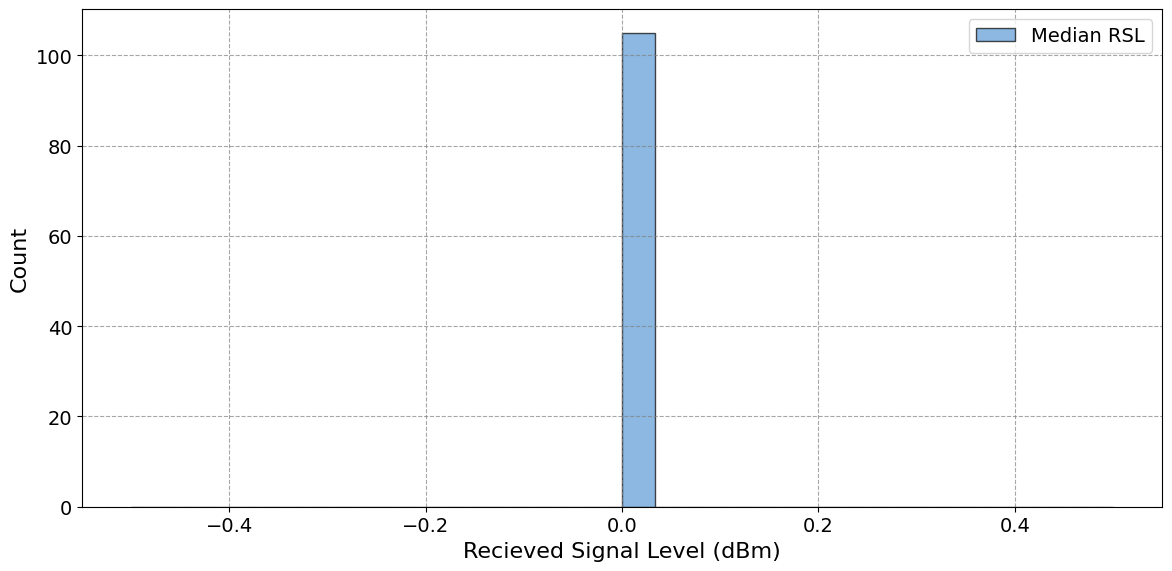

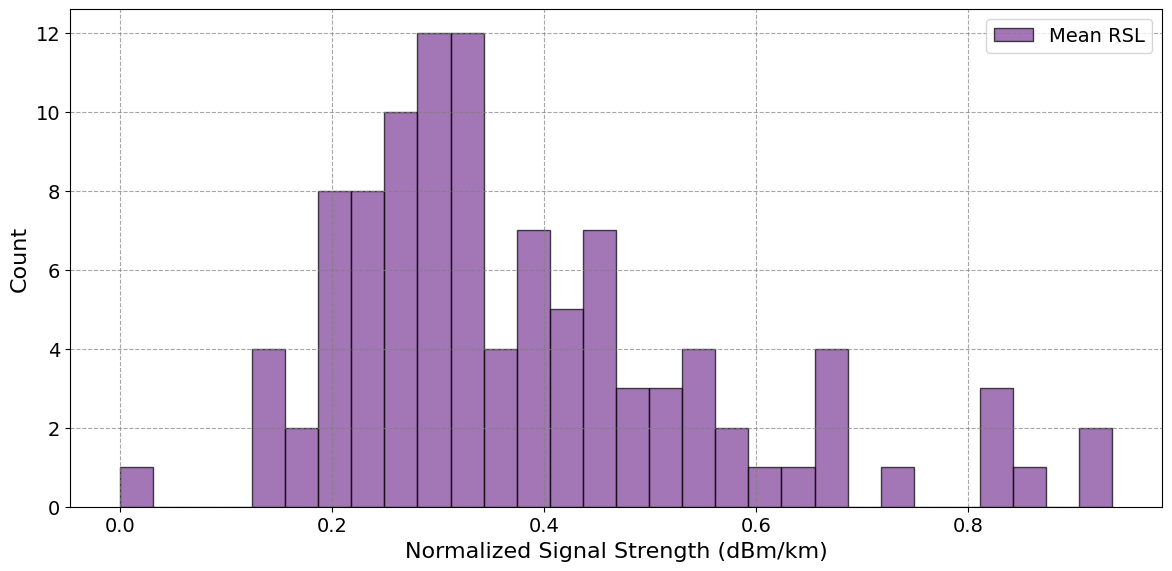

In [ ]:
# @title plot rsl hist


# Example Plot Configuration
plot_config = {
    'figsize': (12, 6),
    'bins': 30,
    'colors': ['#5B9BD5', '#7D3C98', '#ED7D31'],  # Blue for Mean RSL, Orange for Median RSL, Purple for Path-Norm. RSL
    'label_size': 16,
    'tick_size': 14,
    'x_label': 'Recieved Signal Level (dBm)',
    'y_label': 'Count'
}


# **Example Usage**
df_raw_filtered, df_meta_filtered = filter_raw_meta(
   links_rawdata,
    links_metadata,
    length_range=(0.03, 10),   # Keep lengths >= 0.03 km
    freq_range=(1000, 100000)    # Keep frequencies z
)

df = links_att_data['att']['median']  #links_rawdata # df_raw_filtered # Replace with actual dataset
df_signals = df.drop(columns=['Datetime'], errors='ignore')  # Drop Datetime if exists
df_metadata = links_metadata #df_meta_filtered


plot_hist =1

if plot_hist:
  # Run the function with 'mean' and 'mean norm'
  print('######' , len(df_signals.columns) , len(df_metadata))

  plot_signal_statistics(df_signals, links_metadata, plot_config, stats=['median'], merged=False)
  # Run the function with 'mean' and 'mean norm'
  plot_config['x_label'] = 'Normalized Signal Strength (dBm/km)'
  plot_config['colors'] = ['#7D3C98']
  plot_signal_statistics(df_signals, df_metadata, plot_config, stats=['mean'], merged=False)


# df_raw_filtered, df_meta_filtered = filter_raw_meta(
#     df_raw=links_rawdata,
#     df_meta=links_metadata,
#     length_range=(0.03, 10),   # Keep lengths >= 0.03 km
#     freq_range=(1, 40000)    # Keep frequencies z
# )

# df = df_raw_filtered # Replace with actual dataset
# df_signals = df.drop(columns=['Datetime'], errors='ignore')  # Drop Datetime if exists
# df_metadata = df_meta_filtered
# plot_signal_statistics(df_signals, df_metadata, plot_config, stats=['mean norm'], merged=False)


In [ ]:
plt.rcParams.update({'font.size': 10})

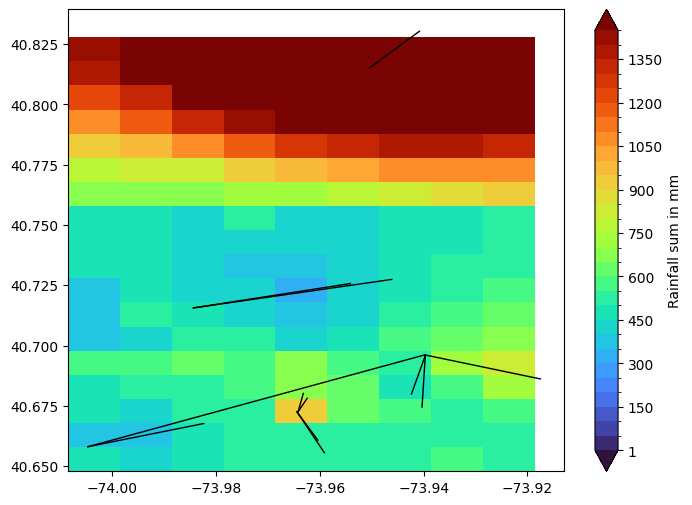

In [ ]:
def plot_cml_lines(ds_cmls, ax):
    ax.plot(
        [ds_cmls.site_a_longitude, ds_cmls.site_b_longitude],
        [ds_cmls.site_a_latitude, ds_cmls.site_b_latitude],
        'k',
        linewidth=1,
    )

R_grid = idw_interpolator(
    x=cmls_R_1h.lon_center,
    y=cmls_R_1h.lat_center,
    z=cmls_R_1h.R.isel(channel_id=0).where(ds_cmls.wet_fraction < 0.4).sum(dim='time'),
    resolution=0.01,
)

bounds = np.arange(0, 1500, 50)
bounds[0] = 1
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')

fig, ax = plt.subplots(figsize=(8, 6))

# change the color bar range
pc = plt.pcolormesh(
    idw_interpolator.xgrid,
    idw_interpolator.ygrid,
    R_grid,
    shading='nearest',
    cmap='turbo',
    norm=norm,
)
plot_cml_lines(cmls_R_1h, ax=ax)
colorbar = fig.colorbar(pc, label='Rainfall sum in mm');

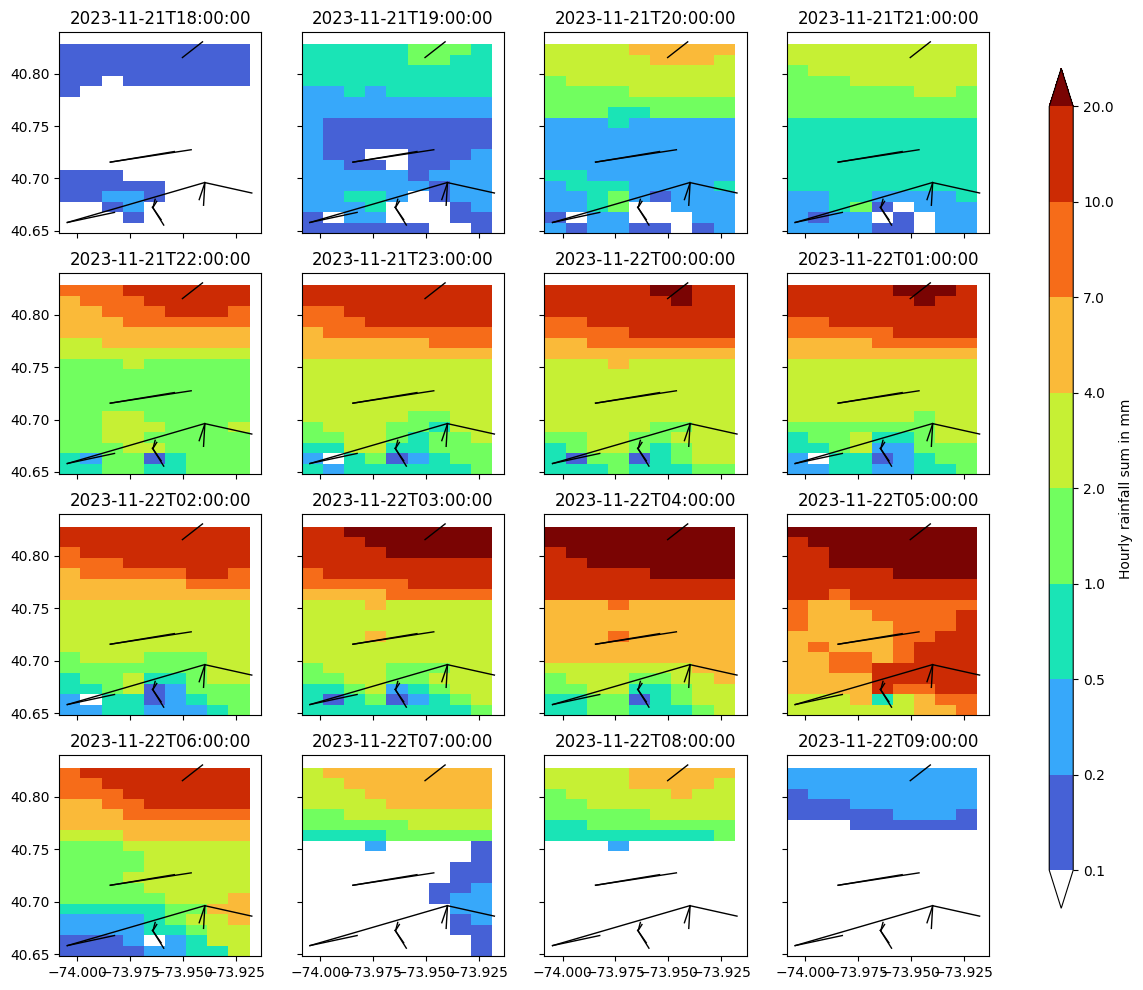

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12, 12))

bounds = [0.1, 0.2, 0.5, 1, 2, 4, 7, 10, 20]
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')
cmap = plt.get_cmap('turbo').copy()
cmap.set_under('w')

rain_interval = (pd.to_datetime('2023-11-21'), pd.to_datetime('2023-11-23'))

for i, axi in enumerate(ax.flat):
    R_grid = idw_interpolator(
        x=cmls_R_1h.lon_center,
        y=cmls_R_1h.lat_center,
        z=cmls_R_1h.R.isel(channel_id=0).isel(time=i + 502).where(ds_cmls.wet_fraction < 0.4),
        resolution=0.01,
    )
    pc = axi.pcolormesh(
        idw_interpolator.xgrid,
        idw_interpolator.ygrid,
        R_grid,
        shading='nearest',
        cmap=cmap,
        norm=norm,
    )
    axi.set_title(str(cmls_R_1h.time.values[i + 502])[:19])

    plot_cml_lines(cmls_R_1h, ax=axi)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cb = fig.colorbar(pc, cax=cbar_ax, label='Hourly rainfall sum in mm', );